<!---
Latex Macros
-->
$$
\newcommand{\bar}{\,|\,}
\newcommand{\Xs}{\mathcal{X}}
\newcommand{\Ys}{\mathcal{Y}}
\newcommand{\y}{\mathbf{y}}
\newcommand{\weights}{\mathbf{w}}
\newcommand{\balpha}{\boldsymbol{\alpha}}
\newcommand{\bbeta}{\boldsymbol{\beta}}
\newcommand{\aligns}{\mathbf{a}}
\newcommand{\align}{a}
\newcommand{\source}{\mathbf{s}}
\newcommand{\target}{\mathbf{t}}
\newcommand{\ssource}{s}
\newcommand{\starget}{t}
\newcommand{\repr}{\mathbf{f}}
\newcommand{\repry}{\mathbf{g}}
\newcommand{\x}{\mathbf{x}}
\newcommand{\prob}{p}
\newcommand{\vocab}{V}
\newcommand{\params}{\boldsymbol{\theta}}
\newcommand{\param}{\theta}
\DeclareMathOperator{\perplexity}{PP}
\DeclareMathOperator{\argmax}{argmax}
\DeclareMathOperator{\argmin}{argmin}
\newcommand{\train}{\mathcal{D}}
\newcommand{\counts}[2]{\#_{#1}(#2) }
\newcommand{\length}[1]{\text{length}(#1) }
\newcommand{\indi}{\mathbb{I}}
$$





# Assignment 3




## Introduction

In the last assignment, you will apply deep learning methods to solve a particular story understanding problem. Automatic understanding of stories is an important task in natural language understanding [[1]](http://anthology.aclweb.org/D/D13/D13-1020.pdf). Specifically, you will develop a model that given a sequence of sentences learns to sort these sentence in order to yield a coherent story [[2]](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/06/short-commonsense-stories.pdf). This sounds (and to an extent is) trivial for humans, however it is quite a difficult task for machines as it involves commonsense knowledge and temporal understanding.

## Goal

You are given a dataset of 45502 instances, each consisting of 5 sentences. Your system needs to ouput a sequence of numbers which represent the predicted order of these sentences. For example, given a story:

    He went to the store.
    He found a lamp he liked.
    He bought the lamp.
    Jan decided to get a new lamp.
    Jan's lamp broke.

your system needs to provide an answer in the following form:

    2	3	4	1	0

where the numbers correspond to the zero-based index of each sentence in the correctly ordered story. So "`2`" for "`He went to the store.`" means that this sentence should come 3rd in the correctly ordered target story. In this particular example, this order of indices corresponds to the following target story:

    Jan's lamp broke.
    Jan decided to get a new lamp.
    He went to the store.
    He found a lamp he liked.
    He bought the lamp.

## Resources

To develop your model(s), we provide a training and a development datasets. The test dataset will be held out, and we will use it to evaluate your models. The test set is coming from the same task distribution, and you don't need to expect drastic changes in it.

You will use [TensorFlow](https://www.tensorflow.org/) to build a deep learning model for the task. We provide a very crude system which solves the task with a low accuracy, and a set of additional functions you will have to use to save and load the model you create so that we can run it.

As we have to run the notebooks of each submission, and as deep learning models take long time to train, your notebook **NEEDS** to conform to the following requirements:
* You **NEED** to run your parameter optimisation offline, and provide your final model saved by using the provided function
* The maximum size of a zip file you can upload to moodle is 160MB. We will **NOT** allow submissions larger than that.
* We do not have time to train your models from scratch! You **NEED** to provide the full code you used for the training of your model, but by all means you **CANNOT** call the training method in the notebook you will send to us.
* We will run these notebooks automatically. If your notebook runs the training procedure, in addition to loading the model, and we need to edit your code to stop the training, you will be penalised with **-20 points**.
* If you do not provide a pretrained model, and rely on training your model on our machines, you will get **0 points**.
* Your submissions will be tested on the stat-nlp-book Docker image to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get **0 points**.

Running time and memory issues:
* We have tested a possible solution on a mid-2014 MacBook Pro, and a few epochs of the model run in less than 3min. Thus it is possible to train a model on the data in reasonable time. However, be aware that you will need to run these models many times over, for a larger number of epochs (more elaborate models, trained on much larger datasets can train for weeks! However, this shouldn't be the case here.). If you find training times too long for your development cycle you can reduce the training set size. Once you have found a good solution you can increase the size again. Caveat: model parameters tuned on a smaller dataset may not be optimal for a larger training set.
* In addition to this, as your submission is capped by size, feel free to experiment with different model sizes, numeric values of different precisions, filtering the vocabulary size, downscaling some vectors, etc.

## Hints

A non-exhaustive list of things you might want to give a try:
- better tokenization
- experiment with pre-trained word representations such as [word2vec](https://code.google.com/archive/p/word2vec/), or [GloVe](http://nlp.stanford.edu/projects/glove/). Be aware that these representations might take a lot of parameters in your model. Be sure you use only the words you expect in the training/dev set and account for OOV words. When saving the model parameters, pre-rained word embeddings can simply be used in the word embedding matrix of your model. As said, make sure that this word embedding matrix does not contain all of word2vec or GloVe. Your submission is limited, and we will not allow uploading nor using the whole representations set (up to 3GB!)
- reduced sizes of word representations
- bucketing and batching (our implementation is deliberately not a good one!)
  - make sure to draw random batches from the data! (we do not provide this in our code!)
- better models:
  - stacked RNNs (see tf.contrib.rnn.MultiRNNCell)
  - bi-directional RNNs
  - attention
  - word-by-word attention
  - conditional encoding
  - get model inspirations from papers on [nlp.stanford.edu/projects/snli/](nlp.stanford.edu/projects/snli/)
  - sequence-to-sequence encoder-decode architecture for producing the right ordering
- better training procedure:
  - different training algorithms
  - dropout on the input and output embeddings (see tf.nn.dropout)
  - L2 regularization (see tf.nn.l2_loss)
  - gradient clipping (see tf.clip_by_value or tf.clip_by_norm)
- model selection:
  - early stopping
- hyper-parameter optimization (e.g. random search or grid search (expensive!))
    - initial learning rate
    - dropout probability
    - input and output size
    - L2 regularization
    - gradient clipping value
    - batch size
    - ...
- post-processing
  - for incorporating consistency constraints

## Setup Instructions
It is important that this file is placed in the **correct directory**. It will not run otherwise. The correct directory is

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/
    
where `DIRECTORY_OF_YOUR_BOOK` is a placeholder for the directory you downloaded the book to, and in `X` in `group_X` contains the number of your group.

After you placed it there, **rename the notebook file** to `group_X.ipynb`.

The notebook is pre-set to save models in

    DIRECTORY_OF_YOUR_BOOK/assignments/2017/assignment3/problem/group_X/model/

Be sure not to tinker with that directory - we expect your submission to contain a `model` subdirectory with a single saved model! 
The saving procedure might overwrite the latest save, or not. Make sure you understand what it does, and upload only a single model! (for more details check tf.train.Saver)

## General Instructions
This notebook will be used by you to provide your solution, and by us to both assess your solution and enter your marks. It contains three types of sections:

1. **Setup** Sections: these sections set up code and resources for assessment. **Do not edit, move nor copy these cells**.
2. **Assessment** Sections: these sections are used for both evaluating the output of your code, and for markers to enter their marks. **Do not edit, move, nor copy these cells**.
3. **Task** Sections: these sections require your solutions. They may contain stub code, and you are expected to edit this code. For free text answers simply edit the markdown field.  

**If you edit, move or copy any of the setup, assessments and mark cells, you will be penalised with -20 points**.

Note that you are free to **create additional notebook cells** within a task section. 

Please **do not share** this assignment nor the dataset publicly, by uploading it online, emailing it to friends etc.

## Submission Instructions

To submit your solution:

* Make sure that your solution is fully contained in this notebook. Make sure you do not use any additional files other than your saved model.
* Make sure that your solution runs linearly from start to end (no execution hops). We will run your notebook in that order.
* **Before you submit, make sure your submission is tested on the stat-nlp-book Docker setup to ensure that it does not have any dependencies outside of those that we provide. If your submission fails to adhere to this requirement, you will get 0 points**.
* **If running your notebook produces a trivially fixable error that we spot, we will correct it and penalise you with -20 points. Otherwise you will get 0 points for that solution.**
* **Rename this notebook to your `group_X`** (where `X` is the number of your group), and adhere to the directory structure requirements, if you have not already done so. ** Failure to do so will result in -1 point.**
* Download the notebook in Jupyter via *File -> Download as -> Notebook (.ipynb)*.
* Your submission should be a zip file containing the `group_X` directory, containing `group_X.ipynb` notebook, and the `model` directory with the saved model
* Upload that file to the Moodle submission site.

## <font color='green'>Setup 1</font>: Load Libraries
This cell loads libraries important for evaluation and assessment of your model. **Do not change, move or copy it.**

In [1]:
%%capture
%load_ext autoreload
%autoreload 2
%matplotlib inline
#! SETUP 1 - DO NOT CHANGE, MOVE NOR COPY
import sys, os
_snlp_book_dir = "../../../../../"
sys.path.append(_snlp_book_dir)
# docker image contains tensorflow 0.10.0rc0. We will support execution of only that version!
import statnlpbook.nn as nn

import tensorflow as tf
import numpy as np

## <font color='green'>Setup 2</font>: Load Training Data

This cell loads the training data. **Do not edit the next cell, nor copy/duplicate it**. Instead refer to the variables in your own code, and slice and dice them as you see fit (but do not change their values). 
For example, no one stops you from introducing, in the corresponding task section, `my_train` and `my_dev` variables that split the data into different folds.   

In [2]:
#! SETUP 2 - DO NOT CHANGE, MOVE NOR COPY
data_path = _snlp_book_dir + "data/nn/"
data_train = nn.load_corpus(data_path + "train.tsv")
data_dev = nn.load_corpus(data_path + "dev.tsv")
assert(len(data_train) == 45502)

### Data Structures

Notice that the data is loaded from tab-separated files. The files are easy to read, and we provide the loading functions that load it into a simple data structure. Feel free to check details of the loading.

The data structure at hand is an array of dictionaries, each containing a `story` and the `order` entry. `story` is a list of strings, and `order` is a list of integer indices:

In [3]:
data_train[0]

{'order': [3, 2, 1, 0, 4],
 'story': ['His parents understood and decided to make a change.',
  'The doctors told his parents it was unhealthy.',
  'Dan was overweight as well.',
  "Dan's parents were overweight.",
  'They got themselves and Dan on a diet.']}

## <font color='blue'>Task 1</font>: Model implementation

Your primary task in this assignment is to implement a model that produces the right order of the sentences in the dataset.

### Preprocessing pipeline

First, we construct a preprocessing pipeline, in our case `pipeline` function which takes care of:
- out-of-vocabulary words
- building a vocabulary (on the train set), and applying the same unaltered vocabulary on other sets (dev and test)
- making sure that the length of input is the same for the train and dev/test sets (for fixed-sized models)

You are free (and encouraged!) to do your own input processing function. Should you experiment with recurrent neural networks, you will find that you will need to do so.

You need to make sure that the `pipeline` function returns the necessary data for your computational graph feed - the required inputs in this case, as we will call this function to process your dev and test data. If you do not make sure that the same pipeline applied to the train set is applied to other datasets, your model may not work with that data!

You can take a look at the result of the `pipeline` with the `show_data_instance` function to make sure that your data loaded correctly:

In [4]:
#IMPORTS
import pickle
from sklearn.decomposition import PCA
import statnlpbook.util as util
from collections import defaultdict

In [5]:
#Global Variables
PAD_TOKEN = '<PAD>'
OOV_TOKEN = '<OOV>'

In [6]:
###############        Utilities API         #################
#  Any generic utility functions should go here
##############################################################

In [7]:
# enables tensorboard to visualize the graph later
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = bytes("<stripped %d bytes>"%size, 'utf-8')
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [8]:
def pickleSave(dictionary, output_name):
    pickle_out = open("{}.pickle".format(output_name),"wb")
    pickle.dump(dictionary, pickle_out)
    pickle_out.close()

In [9]:
def pickleLoad(file_name):
    return pickle.load( open( file_name, "rb" ) )

In [10]:
def readAndDumpCSV(txtfile,output_name,save=True):
    ''''
    Read a txt file in csv format (tested with glove) and save a python dictionary of the embeddings using pickle
    Also return said dictionary
    '''
    mydict = {}
    with open(txtfile,'r') as f:
        for line in f:
            mydict[line.split(' ')[0]] = np.array([float(n) for n in line.split(' ')[1:]])
        if(save):
                pickle_out = open("{}.pickle".format(output_name),"wb")
                pickle.dump(mydict, pickle_out)
                pickle_out.close()
        else:
            return mydict            

In [11]:
def displayDict(dictionary, num_vals):
    '''
    Display the first num_vals entries of a dictionary
    '''
    count = 0
    for key,val in dictionary.items():
        if(count>num_vals):
            return
        print("key : {} , val : \n {} and the datatypes are: \n key -> {} and val -> {}\n".format(key,val,type(key) ,type(val)))
        count+=1

In [12]:
#Early stopper class:
# Logic:
#  After each epoch of training, compare the dev accuracy with the max dev accuracy  achieved
#  If it is bigger, replace it, save the model, reset the decreasing accuracy count and continue
#  If it is smaller, 
#    Check whether the patience count is equal to teh number of consecutive decreasing accuracies
#       if yes:  Trigger early stopping (Flag to break off the training loop)
#       if no : add 1 to the count of consecutive decreasing accuracies and continue
#  After training, the model saved needs to be reloaded, as this will be the last model where the accuracy increased

class EarlyStopper(object):
    '''
    Early stopper class: after each epoch of training assess whether the accuracy on the dev-set is smaller
    than the accuracy on the dev set on the previous epoch.
    If this is not the case for a patience number of epochs, stop the training and keep the model of the last
    epoch where the accuracy increased
    '''
    def __init__(self, patience, verbose):
        '''
        patience : after how many epochs of decreasing dev accuracy do we stop
        '''
        self.patience = patience
        self.decreasing_epochs = 0
        self.last_increasing_accuracy = 0.0
        self.verbose = verbose
        
    def checkEarlyStopping(self,dev_accuracy, session):
        
        if(dev_accuracy > self.last_increasing_accuracy):
            if(self.verbose):
                print("Accuracy Increasing in the dev set, saving the model!")
            nn.save_model(session)
            self.last_increasing_accuracy = dev_accuracy 
            self.decreasing_epochs = 0
            return False
        else:
            self.decreasing_epochs+=1
            if(self.decreasing_epochs >= self.patience):
                print("Early stopping activated : {} consecutive epochs where accuracy is decresing!".format(self.decreasing_epochs))
                print("Model saved yields a dev set accuracy of : {}".format(self.last_increasing_accuracy))
                return True
            else:
                if(self.verbose):
                    print("Accuracy decreasing on the Dev set, taking note and continuing!")
                return False

In [13]:
def findWord(token,vocab):
    for key,item in vocab.items():
        if (token == item):
            return key
    raise ValueError("Word in phrase not in the vocab")

In [14]:
###############        Utilities API  END       #################
##############################################################

In [15]:
###############        ERROR ANALYSIS API       ###############
##############################################################

In [16]:
def create_confusion_matrix(data, predictions):
    confusion = defaultdict(int)
    for y_true, y_guess in zip(data, predictions):
        for order_true , order_guess in zip(y_true,y_guess):
            confusion[(order_true, order_guess)] += 1
    return confusion

In [17]:
def create_confusion_matrix_for_sentence(data,predictions,sentence):
    confusion = defaultdict(int)
    for y_true, y_guess in zip(data, predictions):
        confusion[(y_true[sentence], y_guess[sentence])] += 1
    return confusion

In [18]:
def getErrors(data, true_orders, predicted_orders):
    errorsList = []
    list_index = 0
    for order_true, order_guess in zip(true_orders, predicted_orders):
        if (not np.all(order_true == order_guess)):
            story = data[list_index]['story']
            true_paragraph = [None]*5
            count =0
            for i in order_true:
                true_paragraph[i]=story[count]
                count +=1
            
            predicted_paragraph =[None]*5
            count =0
            for i in order_guess:
                predicted_paragraph[i]=story[count]
                count+=1
                
            error = {"index": list_index,
                     "true_order": order_true,
                     'predicted_order':order_guess,
                    'true_paragraph':true_paragraph,
                    'predicted_paragraph':predicted_paragraph}
            errorsList.append(error)
        list_index+=1
    return errorsList

In [19]:
def displayErrors(errorsList, numToDisp):
    for error in errorsList[:numToDisp]:
        print("---------------------------------------------------------------------------")
        print("### The correct order is : ###")

        for phrase in error["true_paragraph"]:
            print(phrase)
        
        print("\n ### The predicted order was : ###")
        for phrase in error["predicted_paragraph"]:
            print(phrase)
        print("---------------------------------------------------------------------------- \n")
            

In [20]:
def getPADandOOVHistogramsOnErrors(errors,stories):
    stats = {}
    stats['PAD_hist'] = defaultdict(float)
    stats['OOV_hist'] = defaultdict(float)
    for error in errors:
        phrase_index = 0 
        for true_pos,pred_pos in zip(error['true_order'],error['predicted_order']):
            if(true_pos != pred_pos):
                story_index = error['index']
                phrase = stories[story_index][phrase_index]
                pad_nb = np.count_nonzero(phrase==0)
                oov_nb = np.count_nonzero(phrase==1)
                stats['PAD_hist'][pad_nb]+=1.0
                stats['OOV_hist'][oov_nb]+=1.0
            phrase_index+=1
        
    return stats
    

In [21]:
def plot_histogram(stats,interest,sorting_param=0):
    
    values =[]
    labels = []
    
    histItems =[]
    for key,value in stats[interest].items():
        histItems.append((key,value))
    
    histItems = sorted(histItems, key=lambda x: x[sorting_param])
   
    for key,value in histItems:
        labels.append(key)
        values.append(value)
        
    util.plot_bar_graph(values, labels)
    

In [22]:
def getFullPadandOOVHistorgrams(stories):
    stats = {}
    stats['PAD_hist'] = defaultdict(float)
    stats['OOV_hist'] = defaultdict(float)
    for story in stories:
        for phrase in story:
            pad_nb = np.count_nonzero(phrase==0)
            oov_nb = np.count_nonzero(phrase==1)
            stats['PAD_hist'][pad_nb]+=1.0
            stats['OOV_hist'][oov_nb]+=1.0

        
    return stats

In [23]:
def getErrorWordFrequency(errors,stories,vocab):
    word_frequency = defaultdict(float)
    for error in errors:
        phrase_index = 0 
        for true_pos,pred_pos in zip(error['true_order'],error['predicted_order']):
            if(true_pos != pred_pos):
                story_index = error['index']
                phrase = stories[story_index][phrase_index]
                for word in phrase:
                    word_str = findWord(word,vocab)
                    word_frequency[word_str]+=1.0
        
    return word_frequency

In [24]:
def plot_word_histogram(word_freq,num_displayed,values_ignored):
    
    values =[]
    labels = []
    
    histItems =[]
    count = 0
    for key,value in word_freq.items():
        if(count>=num_displayed):
            break
        if(key not in values_ignored):
            histItems.append((key,value))
            count+=1
    
    histItems = sorted(histItems, key=lambda x: -x[1])
   
    for key,value in histItems:
        labels.append(key)
        values.append(value)
        
    util.plot_bar_graph(values, labels)

In [25]:
def getWordFrequency(stories,vocab):
    word_frequency = defaultdict(float)
    for story in stories:
        for phrase in story:
            for word in phrase:
                word_str = findWord(word,vocab)
                word_frequency[word_str]+=1.0
        
    return word_frequency

In [26]:
def freq_ratios(standard_freq,error_freq):
    freq_ratio = defaultdict(float)
    for word in error_freq.keys():
        freq_ratio[word] = error_freq[word]/standard_freq[word]
    return freq_ratio

In [27]:
############           ERROR ANALYSIS API END    ###############
###############################################################

In [28]:
##############           PREPOCESSING API         ######################
#  Here will go all the functions relating to preprocessing
###################################################################

In [29]:
# TODO create tokenizer so it handles the following:
# - (n't 's 'm 're 've 'll 'd) word endings to be separated (shouldn't -> (should, n't))
# - punctuation at the end of sentences (This is a sentence. -> (..., a, sentence, .))
#     - try to make sure if possible to filter out only sentence ending punctuation (U.S. etc. Mr. St.) should be kept
#     - also words like e.g. a.m. p.m.
# - separate numbers from others ($5 -> $, 5)
#
# OR find a library that is included in the docker image (nltk and spacy aren't...) that does that for us
#
# decide what to do with words not in GloVe (random embedding?)

# tokenisation
punctuation = '.,:;?!"'
endings_2 = ["'s", "'m", "'d"]
endings_3 = ["n't", "'re", "'ve", "'ll"]
valid_words = ['e.g.', 'a.m.', 'p.m.', 'U.S.', 'etc.', 'i.e.', 'Mr.', 'Mrs.', 'Ms.', 'St.']
currency = '$€£'

def tokenize_word(word):    
    if len(word) == 1:
        return [word]
    
    if word.isalpha():
        return [word]

    if word in valid_words:
        return [word]
    
    if word[0] in currency or word[0] in punctuation:
        tokens = tokenize_word(word[1:])
        sign = word[0]
        tokens.insert(0, sign)
        return tokens
    
    if word[-1] in punctuation:
        tokens = tokenize_word(word[:-1])
        tokens.append(word[-1])
        return tokens
    
    if len(word) > 2 and word[-2:] in endings_2:
        tokens = tokenize_word(word[:-2])
        tokens.append(word[-2:])
        return tokens
    
    if len(word) > 3 and word[-3:] in endings_3:
        tokens = tokenize_word(word[:-3])
        tokens.append(word[-3:])
        return tokens
    
    return [word]
        
def tokenize_sent(sent):
    sent = sent.split(' ')
    ret = [tokens for word in sent if len(word) > 0 for tokens in tokenize_word(word) ]
    return ret

In [30]:
# preprocessing pipeline, used to load the data intro a structure required by the model
def pipeline(data, vocab=None, max_sent_len_=None):
    is_ext_vocab = True
    if vocab is None:
        is_ext_vocab = False
        vocab = {'<PAD>': 0, '<OOV>': 1}
    
    if is_ext_vocab:
        if 'The' in vocab:
            capitalized = True
        else:
            capitalized = False
    else:
        capitalized = True

    max_sent_len = -1
    data_sentences = []
    data_orders = []
    for instance in data:
        sents = []
        for sentence in instance['story']:
            sent = []
            tokenized = tokenize_sent(sentence)
            for token in tokenized:
                # if we do not use capitalized letters, make the word lowercase
                if not capitalized:
                    token = token.lower()
                
                if not is_ext_vocab and token not in vocab:
                    vocab[token] = len(vocab)
                if token not in vocab:
                    token_id = vocab['<OOV>']
                    #print('NOT IN VOCAB: ' + token)
                else:
                    token_id = vocab[token]
                sent.append(token_id)
            if len(sent) > max_sent_len:
                max_sent_len = len(sent)
            sents.append(sent)
        data_sentences.append(sents)
        data_orders.append(instance['order'])

    if max_sent_len_ is not None:
        max_sent_len = max_sent_len_
    out_sentences = np.full([len(data_sentences), 5, max_sent_len], vocab['<PAD>'], dtype=np.int32)

    for i, elem in enumerate(data_sentences):
        for j, sent in enumerate(elem):
            out_sentences[i, j, 0:len(sent)] = sent

    out_orders = np.array(data_orders, dtype=np.int32)
    
    return out_sentences, out_orders, vocab

In [31]:
def findMeanEmbedding(embeddingDict):
    '''Get the mean embedding and the standard deviation (dimention-wise) from an input embedding dictionary'''
    vectorList = list(embeddingDict.values())
    return np.mean(vectorList,axis=0), np.std(vectorList,axis=0)

In [32]:
####      REMARK    ######
#By taking embeddings from glove that are not in the give vocab, aren't we effectively 
# increasing the length our vocab?????? Because a word not in the vocab that is in the test set will have an 
# embedding ...

# So we have two ways of doing this



#1 :
# Get the N Most popular words in GLOVE to define our VOCAB and embeddings
# Which means that the OOV words in the test set will be the words that are not in the N most popular words
# AND all the words that we give a vector for have meaning (are not random)!

#Then all we need to do is make a tokensation that makes sure to match what the GLOVE tokenisation is to avoid 
#missmatches .



# 2 :
# Using the training set to get a vocab
# finding the embeddings in glove for the words in our vocab
# FOR the words in our vocab THAT DONT have a glove embedding we give a RANDOM value

#Then we are using our vocab to figure out what the oovs are in the test set
#We then extract our embedding which is either the GLOVE value of the word or a RANDOM value
# and use that  for our LSTM



# 1 seems conceptually better to me, but i implemented both we can try, script 1 below  is method 1 and script 2
# is method 2


## THIS IS ILLUSTRATED IN THE TWO PREPROCESSING SCRIPTS BELOW

In [33]:
#Used in 2. in the remark above
def createWordEmbeddings(pre_learned_embeddings,total_size = -1):
    '''
    Using a pre-trained word embeddings dictionary, create our (reduced in size) dictionary of embeddings.
    Make sure that all the words in our vocab are embedded, and also use the embeddings of the most popular words,
    as long as the total_size of the dictionary is not exceeded.
    pre_learned_embeddings : Dictionnary of word embeddings, can come from glove or word2vec
    total_size : Length of our output embeddings dictionary
    Returns : A dictionary of word embeddings
    '''
    
    if(total_size >=len(pre_learned_embeddings)):
        #Undefined behaviour in the above case
        raise ValueError("Total size is too big")
    
    #Get the dimention of the embeddings
    dim = len(pre_learned_embeddings["the"])
    
    #Compute the mean vector and std vector for the glove embeddings
    mean_glove, std_glove = findMeanEmbedding(pre_learned_embeddings)

    #Initialise the embeddings dict
    embeddings = {}
    
    #Iterate over all the words in our vocabulary
    for word, word_index in vocab.items():
        #Stop if we reach our total desired size : 
        #Careful : Will this create bugs with non-embedded words? -> Maybe its better not to allow total_size<vocab_size
        if( total_size > 0 and len(embeddings) >= total_size):
            print("Warning: Total size reached before full vocab was embedded")
            break
            
            
        if(word == PAD_TOKEN):
            #Set the <PAD> token to 0
            embeddings[word_index] = np.zeros(dim)
        elif(word == OOV_TOKEN ):
            #Initialize the <OOV> token to 1. Update later (c.f. below)
            embeddings[word_index] = np.ones(dim)
        elif(word in pre_learned_embeddings):
            #If the word is in the glove dictionnary, use this embedding
            embeddings[word_index] = pre_learned_embeddings[word]
        else:
            #If not, set its embedding to a random vector with
            #mean the average glove embedding and std the std of the glove embeddings
            #TODO : think if there is a better way to assign vectors in our vocab that are not in Glove
            mean_with_white_noise = mean_glove + np.random.rand(dim)*std_glove
            embeddings[word_index] = mean_with_white_noise
            
            
    #Make some more embeddings than the words that are in our vocab:
    #Iterate over the glove Word embeddings
    if(total_size > 0):
        for word, pre_learned_embedding in pre_learned_embeddings.items():
            #If we exceed our total desired length, stop
            if(len(embeddings) >= total_size):
                break

            #Add embeddings that are not already there
            #For this to make sense we also need to increase our vocabulary.
            if(word not in embeddings):
                vocab[word] = len(vocab)
                embeddings[vocab[word]] = pre_learned_embedding 


    #Update the OOV embedding : The idea is to set it the average value of the unused Glove embeddings
    #To do so set the OOV value to the mean of all glove embeddings - mean of our embeddings 
    #ALERT : This mean is corrupted by the noise we are adding in the else clause above and by the embeddings
    # for the <PAD> and <OOV> tokens -> Not sure if we should care or not
    mean_embeddings , std_embeddings = findMeanEmbedding(embeddings)
    OOV_value = mean_glove - mean_embeddings
    embeddings[vocab[OOV_TOKEN]] = OOV_value
    
    return embeddings

In [34]:
#Used in 1 in the remark above
def createWordVocabAndEmbeddings(pre_learned_embeddings, total_size):  
    '''
    Use the total_size first embeddings from pre_learned_embeddings as our vocab and embeddings
    Assign the mean vector of unused embeddings to get the OOV token embedding
    Assign the origin to the PAD token embedding
    '''
    
    if(total_size >=len(pre_learned_embeddings)):
        #Undefined behaviour in the above case
        raise ValueError("Total size is too big")
    
    #Get the dimention of the embeddings
    dim = len(pre_learned_embeddings["the"])
    
    #Compute the mean vector and std vector for the glove embeddings
    mean_glove, std_glove = findMeanEmbedding(pre_learned_embeddings)

    #Initialise the embeddings and vocab dicts
    vocab = {PAD_TOKEN:0, OOV_TOKEN:1}
    embeddings = {0:np.zeros(dim) , 1:np.ones(dim)}
    
    #Create the vocab and embeddings by taking the total_size first tokens in glove
    for word, pre_learned_embedding in pre_learned_embeddings.items():
        if(len(embeddings)>=total_size):
            break
        vocab[word]=len(vocab)
        embeddings[vocab[word]] = pre_learned_embeddings[word]
    
    
    #Update the OOV embedding : The idea is to set it the average value of the unused Glove embeddings
    #To do so set the OOV value to the mean of all glove embeddings - mean of our embeddings 
    mean_embeddings , std_embeddings = findMeanEmbedding(embeddings)
    OOV_value = mean_glove - mean_embeddings
    embeddings[vocab[OOV_TOKEN]] = OOV_value
    
    
    return vocab, embeddings

In [35]:
def doPCA(embeddings, output_dim):
    '''
    Perform PCA on a dictionary of embeddings to return the reduced-dimentionality embeddings with output_dim dimention.
    '''
    #Get a numpy array from the embeddings to perform the PCA
    #Get the input dimentions
    in_dim = len(embeddings[0])
    num_embeddings = len(embeddings)
    #initialise the array:
    # get a dim*num_of_embeddings np array with all the embeddings
    emb = np.zeros((num_embeddings,in_dim))

    #Transfer the embeddings dictionary to the emb array
    for k,v in embeddings.items():
        emb[k,:] = v


    #Perfom PCA using scikit learn
    pca = PCA(n_components = output_dim)
    pca_embeddings = pca.fit_transform(emb)


    #Put the pca-reduced embeddings back into a dictionary
    pca_embeddings_dict = {}
    count = 0
    for embedding in pca_embeddings:
        pca_embeddings_dict[count] = embedding
        count+=1

    #Map the embedding for <PAD> back to 0.
    pca_embeddings_dict[0]=np.zeros(pca_embeddings_dict[1].shape)

    return pca_embeddings_dict


In [36]:
##############      PREPROCESSING API END    #####################
##################################################################

In [37]:
##############      DO PREPROCESSING           ####################
#  In this section put the scripts utilising the functions above to run the pre-processing
###################################################################

In [38]:
### ONLY NEED TO  (AND SHOULD) RUN ONCE: - already on github so not even ###
#Save the glove embeddings into a pickle format 

In [39]:
#readAndDumpCSV("./glove/glove.6B.50d.txt","glove6B50D")

In [40]:
#readAndDumpCSV("./glove/glove.6B.100d.txt","glove6B100D")

In [41]:
#readAndDumpCSV("./glove/glove.6B.200d.txt","glove6B200D")

In [42]:
#readAndDumpCSV("./glove/glove.6B.300d.txt","glove6B300D")

In [43]:
#readAndDumpCSV("./glove/glove.42B.300d.txt","glove42B300D")

In [44]:
#Computer runs out of memory with this one.....
#readAndDumpCSV("./glove/glove.840B.300d.txt" ,"glove840B300D")

In [45]:
### Script hyper parameters!! ###

#Flags
use_pca = False 

#parameters
output_dimention_from_pca = 50
embeddings_file_to_load = "glove6B200D.pickle"
vocab_size = 50000

In [46]:
'''########   Script 1 :   ##########
# Use Glove to define the vocab, and (later on, within the model) train with OOV tokens if need be

# LOAD the Pickle file of pre-trained embeddings : Choose favorite
pre_learned_embeddings = pickleLoad(embeddings_file_to_load)

#Create the vocab and embeddings of desired size
vocab, embeddings = createWordVocabAndEmbeddings(pre_learned_embeddings, vocab_size)

if(use_pca):
    embeddings = doPCA(embeddings,output_dimention_from_pca)


#Get the training data
train_stories, train_orders, _ = pipeline(data_train, vocab)

# get the length of the longest sentence
max_sent_len = train_stories.shape[2]

#Get validation data
dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

pickleSave(vocab, "VocabScript1")
pickleSave(embeddings, "EmbeddingScript1")

#################################
'''

'########   Script 1 :   ##########\n# Use Glove to define the vocab, and (later on, within the model) train with OOV tokens if need be\n\n# LOAD the Pickle file of pre-trained embeddings : Choose favorite\npre_learned_embeddings = pickleLoad(embeddings_file_to_load)\n\n#Create the vocab and embeddings of desired size\nvocab, embeddings = createWordVocabAndEmbeddings(pre_learned_embeddings, vocab_size)\n\nif(use_pca):\n    embeddings = doPCA(embeddings,output_dimention_from_pca)\n\n\n#Get the training data\ntrain_stories, train_orders, _ = pipeline(data_train, vocab)\n\n# get the length of the longest sentence\nmax_sent_len = train_stories.shape[2]\n\n#Get validation data\ndev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)\n\npickleSave(vocab, "VocabScript1")\npickleSave(embeddings, "EmbeddingScript1")\n\n#################################\n'

In [47]:

vocab={'<PAD>': 0, '<OOV>': 1, 'the': 2, ',': 3, '.': 4, 'of': 5, 'to': 6, 'and': 7, 'in': 8, 'a': 9, '"': 10, "'s": 11, 'for': 12, '-': 13, 'that': 14, 'on': 15, 'is': 16, 'was': 17, 'said': 18, 'with': 19, 'he': 20, 'as': 21, 'it': 22, 'by': 23, 'at': 24, '(': 25, ')': 26, 'from': 27, 'his': 28, "''": 29, '``': 30, 'an': 31, 'be': 32, 'has': 33, 'are': 34, 'have': 35, 'but': 36, 'were': 37, 'not': 38, 'this': 39, 'who': 40, 'they': 41, 'had': 42, 'i': 43, 'which': 44, 'will': 45, 'their': 46, ':': 47, 'or': 48, 'its': 49, 'one': 50, 'after': 51, 'new': 52, 'been': 53, 'also': 54, 'we': 55, 'would': 56, 'two': 57, 'more': 58, "'": 59, 'first': 60, 'about': 61, 'up': 62, 'when': 63, 'year': 64, 'there': 65, 'all': 66, '--': 67, 'out': 68, 'she': 69, 'other': 70, 'people': 71, "n't": 72, 'her': 73, 'percent': 74, 'than': 75, 'over': 76, 'into': 77, 'last': 78, 'some': 79, 'government': 80, 'time': 81, '$': 82, 'you': 83, 'years': 84, 'if': 85, 'no': 86, 'world': 87, 'can': 88, 'three': 89, 'do': 90, ';': 91, 'president': 92, 'only': 93, 'state': 94, 'million': 95, 'could': 96, 'us': 97, 'most': 98, '_': 99, 'against': 100, 'u.s.': 101, 'so': 102, 'them': 103, 'what': 104, 'him': 105, 'united': 106, 'during': 107, 'before': 108, 'may': 109, 'since': 110, 'many': 111, 'while': 112, 'where': 113, 'states': 114, 'because': 115, 'now': 116, 'city': 117, 'made': 118, 'like': 119, 'between': 120, 'did': 121, 'just': 122, 'national': 123, 'day': 124, 'country': 125, 'under': 126, 'such': 127, 'second': 128, 'then': 129, 'company': 130, 'group': 131, 'any': 132, 'through': 133, 'china': 134, 'four': 135, 'being': 136, 'down': 137, 'war': 138, 'back': 139, 'off': 140, 'south': 141, 'american': 142, 'minister': 143, 'police': 144, 'well': 145, 'including': 146, 'team': 147, 'international': 148, 'week': 149, 'officials': 150, 'still': 151, 'both': 152, 'even': 153, 'high': 154, 'part': 155, 'told': 156, 'those': 157, 'end': 158, 'former': 159, 'these': 160, 'make': 161, 'billion': 162, 'work': 163, 'our': 164, 'home': 165, 'school': 166, 'party': 167, 'house': 168, 'old': 169, 'later': 170, 'get': 171, 'another': 172, 'tuesday': 173, 'news': 174, 'long': 175, 'five': 176, 'called': 177, '1': 178, 'wednesday': 179, 'military': 180, 'way': 181, 'used': 182, 'much': 183, 'next': 184, 'monday': 185, 'thursday': 186, 'friday': 187, 'game': 188, 'here': 189, '?': 190, 'should': 191, 'take': 192, 'very': 193, 'my': 194, 'north': 195, 'security': 196, 'season': 197, 'york': 198, 'how': 199, 'public': 200, 'early': 201, 'according': 202, 'several': 203, 'court': 204, 'say': 205, 'around': 206, 'foreign': 207, '10': 208, 'until': 209, 'set': 210, 'political': 211, 'says': 212, 'market': 213, 'however': 214, 'family': 215, 'life': 216, 'same': 217, 'general': 218, '–': 219, 'left': 220, 'good': 221, 'top': 222, 'university': 223, 'going': 224, 'number': 225, 'major': 226, 'known': 227, 'points': 228, 'won': 229, 'six': 230, 'month': 231, 'dollars': 232, 'bank': 233, '2': 234, 'iraq': 235, 'use': 236, 'members': 237, 'each': 238, 'area': 239, 'found': 240, 'official': 241, 'sunday': 242, 'place': 243, 'go': 244, 'based': 245, 'among': 246, 'third': 247, 'times': 248, 'took': 249, 'right': 250, 'days': 251, 'local': 252, 'economic': 253, 'countries': 254, 'see': 255, 'best': 256, 'report': 257, 'killed': 258, 'held': 259, 'business': 260, 'west': 261, 'does': 262, 'own': 263, '%': 264, 'came': 265, 'law': 266, 'months': 267, 'women': 268, "'re": 269, 'power': 270, 'think': 271, 'service': 272, 'children': 273, 'bush': 274, 'show': 275, '/': 276, 'help': 277, 'chief': 278, 'saturday': 279, 'system': 280, 'john': 281, 'support': 282, 'series': 283, 'play': 284, 'office': 285, 'following': 286, 'me': 287, 'meeting': 288, 'expected': 289, 'late': 290, 'washington': 291, 'games': 292, 'european': 293, 'league': 294, 'reported': 295, 'final': 296, 'added': 297, 'without': 298, 'british': 299, 'white': 300, 'history': 301, 'man': 302, 'men': 303, 'became': 304, 'want': 305, 'march': 306, 'case': 307, 'few': 308, 'run': 309, 'money': 310, 'began': 311, 'open': 312, 'name': 313, 'trade': 314, 'center': 315, '3': 316, 'israel': 317, 'oil': 318, 'too': 319, 'al': 320, 'film': 321, 'win': 322, 'led': 323, 'east': 324, 'central': 325, '20': 326, 'air': 327, 'come': 328, 'chinese': 329, 'town': 330, 'leader': 331, 'army': 332, 'line': 333, 'never': 334, 'little': 335, 'played': 336, 'prime': 337, 'death': 338, 'companies': 339, 'least': 340, 'put': 341, 'forces': 342, 'past': 343, 'de': 344, 'half': 345, 'june': 346, 'saying': 347, 'know': 348, 'federal': 349, 'french': 350, 'peace': 351, 'earlier': 352, 'capital': 353, 'force': 354, 'great': 355, 'union': 356, 'near': 357, 'released': 358, 'small': 359, 'department': 360, 'every': 361, 'health': 362, 'japan': 363, 'head': 364, 'ago': 365, 'night': 366, 'big': 367, 'cup': 368, 'election': 369, 'region': 370, 'director': 371, 'talks': 372, 'program': 373, 'far': 374, 'today': 375, 'statement': 376, 'july': 377, 'although': 378, 'district': 379, 'again': 380, 'born': 381, 'development': 382, 'leaders': 383, 'council': 384, 'close': 385, 'record': 386, 'along': 387, 'county': 388, 'france': 389, 'went': 390, 'point': 391, 'must': 392, 'spokesman': 393, 'your': 394, 'member': 395, 'plan': 396, 'financial': 397, 'april': 398, 'recent': 399, 'campaign': 400, 'become': 401, 'troops': 402, 'whether': 403, 'lost': 404, 'music': 405, '15': 406, 'got': 407, 'israeli': 408, '30': 409, 'need': 410, '4': 411, 'lead': 412, 'already': 413, 'russia': 414, 'though': 415, 'might': 416, 'free': 417, 'hit': 418, 'rights': 419, '11': 420, 'information': 421, 'away': 422, '12': 423, '5': 424, 'others': 425, 'control': 426, 'within': 427, 'large': 428, 'economy': 429, 'press': 430, 'agency': 431, 'water': 432, 'died': 433, 'career': 434, 'making': 435, '...': 436, 'deal': 437, 'attack': 438, 'side': 439, 'seven': 440, 'better': 441, 'less': 442, 'september': 443, 'once': 444, 'clinton': 445, 'main': 446, 'due': 447, 'committee': 448, 'building': 449, 'conference': 450, 'club': 451, 'january': 452, 'decision': 453, 'stock': 454, 'america': 455, 'given': 456, 'give': 457, 'often': 458, 'announced': 459, 'television': 460, 'industry': 461, 'order': 462, 'young': 463, "'ve": 464, 'palestinian': 465, 'age': 466, 'start': 467, 'administration': 468, 'russian': 469, 'prices': 470, 'round': 471, 'december': 472, 'nations': 473, "'m": 474, 'human': 475, 'india': 476, 'defense': 477, 'asked': 478, 'total': 479, 'october': 480, 'players': 481, 'bill': 482, 'important': 483, 'southern': 484, 'move': 485, 'fire': 486, 'population': 487, 'rose': 488, 'november': 489, 'include': 490, 'further': 491, 'nuclear': 492, 'street': 493, 'taken': 494, 'media': 495, 'different': 496, 'issue': 497, 'received': 498, 'secretary': 499, 'return': 500, 'college': 501, 'working': 502, 'community': 503, 'eight': 504, 'groups': 505, 'despite': 506, 'level': 507, 'largest': 508, 'whose': 509, 'attacks': 510, 'germany': 511, 'august': 512, 'change': 513, 'church': 514, 'nation': 515, 'german': 516, 'station': 517, 'london': 518, 'weeks': 519, 'having': 520, '18': 521, 'research': 522, 'black': 523, 'services': 524, 'story': 525, '6': 526, 'europe': 527, 'sales': 528, 'policy': 529, 'visit': 530, 'northern': 531, 'lot': 532, 'across': 533, 'per': 534, 'current': 535, 'board': 536, 'football': 537, 'ministry': 538, 'workers': 539, 'vote': 540, 'book': 541, 'fell': 542, 'seen': 543, 'role': 544, 'students': 545, 'shares': 546, 'iran': 547, 'process': 548, 'agreement': 549, 'quarter': 550, 'full': 551, 'match': 552, 'started': 553, 'growth': 554, 'yet': 555, 'moved': 556, 'possible': 557, 'western': 558, 'special': 559, '100': 560, 'plans': 561, 'interest': 562, 'behind': 563, 'strong': 564, 'england': 565, 'named': 566, 'food': 567, 'period': 568, 'real': 569, 'authorities': 570, 'car': 571, 'term': 572, 'rate': 573, 'race': 574, 'nearly': 575, 'korea': 576, 'enough': 577, 'site': 578, 'opposition': 579, 'keep': 580, '25': 581, 'call': 582, 'future': 583, 'taking': 584, 'island': 585, '2008': 586, '2006': 587, 'road': 588, 'outside': 589, 'really': 590, 'century': 591, 'democratic': 592, 'almost': 593, 'single': 594, 'share': 595, 'leading': 596, 'trying': 597, 'find': 598, 'album': 599, 'senior': 600, 'minutes': 601, 'together': 602, 'congress': 603, 'index': 604, 'australia': 605, 'results': 606, 'hard': 607, 'hours': 608, 'land': 609, 'action': 610, 'higher': 611, 'field': 612, 'cut': 613, 'coach': 614, 'elections': 615, 'san': 616, 'issues': 617, 'executive': 618, 'february': 619, 'production': 620, 'areas': 621, 'river': 622, 'face': 623, 'using': 624, 'japanese': 625, 'province': 626, 'park': 627, 'price': 628, 'commission': 629, 'california': 630, 'father': 631, 'son': 632, 'education': 633, '7': 634, 'village': 635, 'energy': 636, 'shot': 637, 'short': 638, 'africa': 639, 'key': 640, 'red': 641, 'association': 642, 'average': 643, 'pay': 644, 'exchange': 645, 'eu': 646, 'something': 647, 'gave': 648, 'likely': 649, 'player': 650, 'george': 651, '2007': 652, 'victory': 653, '8': 654, 'low': 655, 'things': 656, '2010': 657, 'pakistan': 658, '14': 659, 'post': 660, 'social': 661, 'continue': 662, 'ever': 663, 'look': 664, 'chairman': 665, 'job': 666, '2000': 667, 'soldiers': 668, 'able': 669, 'parliament': 670, 'front': 671, 'himself': 672, 'problems': 673, 'private': 674, 'lower': 675, 'list': 676, 'built': 677, '13': 678, 'efforts': 679, 'dollar': 680, 'miles': 681, 'included': 682, 'radio': 683, 'live': 684, 'form': 685, 'david': 686, 'african': 687, 'increase': 688, 'reports': 689, 'sent': 690, 'fourth': 691, 'always': 692, 'king': 693, '50': 694, 'tax': 695, 'taiwan': 696, 'britain': 697, '16': 698, 'playing': 699, 'title': 700, 'middle': 701, 'meet': 702, 'global': 703, 'wife': 704, '2009': 705, 'position': 706, 'located': 707, 'clear': 708, 'ahead': 709, '2004': 710, '2005': 711, 'iraqi': 712, 'english': 713, 'result': 714, 'release': 715, 'violence': 716, 'goal': 717, 'project': 718, 'closed': 719, 'border': 720, 'body': 721, 'soon': 722, 'crisis': 723, 'division': 724, '&amp;': 725, 'served': 726, 'tour': 727, 'hospital': 728, 'kong': 729, 'test': 730, 'hong': 731, 'u.n.': 732, 'inc.': 733, 'technology': 734, 'believe': 735, 'organization': 736, 'published': 737, 'weapons': 738, 'agreed': 739, 'why': 740, 'nine': 741, 'summer': 742, 'wanted': 743, 'republican': 744, 'act': 745, 'recently': 746, 'texas': 747, 'course': 748, 'problem': 749, 'senate': 750, 'medical': 751, 'un': 752, 'done': 753, 'reached': 754, 'star': 755, 'continued': 756, 'investors': 757, 'living': 758, 'care': 759, 'signed': 760, '17': 761, 'art': 762, 'provide': 763, 'worked': 764, 'presidential': 765, 'gold': 766, 'obama': 767, 'morning': 768, 'dead': 769, 'opened': 770, "'ll": 771, 'event': 772, 'previous': 773, 'cost': 774, 'instead': 775, 'canada': 776, 'band': 777, 'teams': 778, 'daily': 779, '2001': 780, 'available': 781, 'drug': 782, 'coming': 783, '2003': 784, 'investment': 785, '’s': 786, 'michael': 787, 'civil': 788, 'woman': 789, 'training': 790, 'appeared': 791, '9': 792, 'involved': 793, 'indian': 794, 'similar': 795, 'situation': 796, '24': 797, 'los': 798, 'running': 799, 'fighting': 800, 'mark': 801, '40': 802, 'trial': 803, 'hold': 804, 'australian': 805, 'thought': 806, '!': 807, 'study': 808, 'fall': 809, 'mother': 810, 'met': 811, 'relations': 812, 'anti': 813, '2002': 814, 'song': 815, 'popular': 816, 'base': 817, 'tv': 818, 'ground': 819, 'markets': 820, 'ii': 821, 'newspaper': 822, 'staff': 823, 'saw': 824, 'hand': 825, 'hope': 826, 'operations': 827, 'pressure': 828, 'americans': 829, 'eastern': 830, 'st.': 831, 'legal': 832, 'asia': 833, 'budget': 834, 'returned': 835, 'considered': 836, 'love': 837, 'wrote': 838, 'stop': 839, 'fight': 840, 'currently': 841, 'charges': 842, 'try': 843, 'aid': 844, 'ended': 845, 'management': 846, 'brought': 847, 'cases': 848, 'decided': 849, 'failed': 850, 'network': 851, 'works': 852, 'gas': 853, 'turned': 854, 'fact': 855, 'vice': 856, 'ca': 857, 'mexico': 858, 'trading': 859, 'especially': 860, 'reporters': 861, 'afghanistan': 862, 'common': 863, 'looking': 864, 'space': 865, 'rates': 866, 'manager': 867, 'loss': 868, '2011': 869, 'justice': 870, 'thousands': 871, 'james': 872, 'rather': 873, 'fund': 874, 'thing': 875, 'republic': 876, 'opening': 877, 'accused': 878, 'winning': 879, 'scored': 880, 'championship': 881, 'example': 882, 'getting': 883, 'biggest': 884, 'performance': 885, 'sports': 886, '1998': 887, 'let': 888, 'allowed': 889, 'schools': 890, 'means': 891, 'turn': 892, 'leave': 893, 'no.': 894, 'robert': 895, 'personal': 896, 'stocks': 897, 'showed': 898, 'light': 899, 'arrested': 900, 'person': 901, 'either': 902, 'offer': 903, 'majority': 904, 'battle': 905, '19': 906, 'class': 907, 'evidence': 908, 'makes': 909, 'society': 910, 'products': 911, 'regional': 912, 'needed': 913, 'stage': 914, 'am': 915, 'doing': 916, 'families': 917, 'construction': 918, 'various': 919, '1996': 920, 'sold': 921, 'independent': 922, 'kind': 923, 'airport': 924, 'paul': 925, 'judge': 926, 'internet': 927, 'movement': 928, 'room': 929, 'followed': 930, 'original': 931, 'angeles': 932, 'italy': 933, '`': 934, 'data': 935, 'comes': 936, 'parties': 937, 'nothing': 938, 'sea': 939, 'bring': 940, '2012': 941, 'annual': 942, 'officer': 943, 'beijing': 944, 'present': 945, 'remain': 946, 'nato': 947, '1999': 948, '22': 949, 'remains': 950, 'allow': 951, 'florida': 952, 'computer': 953, '21': 954, 'contract': 955, 'coast': 956, 'created': 957, 'demand': 958, 'operation': 959, 'events': 960, 'islamic': 961, 'beat': 962, 'analysts': 963, 'interview': 964, 'helped': 965, 'child': 966, 'probably': 967, 'spent': 968, 'asian': 969, 'effort': 970, 'cooperation': 971, 'shows': 972, 'calls': 973, 'investigation': 974, 'lives': 975, 'video': 976, 'yen': 977, 'runs': 978, 'tried': 979, 'bad': 980, 'described': 981, '1994': 982, 'toward': 983, 'written': 984, 'throughout': 985, 'established': 986, 'mission': 987, 'associated': 988, 'buy': 989, 'growing': 990, 'green': 991, 'forward': 992, 'competition': 993, 'poor': 994, 'latest': 995, 'banks': 996, 'question': 997, '1997': 998, 'prison': 999, 'feel': 1000, 'attention': 1001, 'themselves': 1002, 'firm': 1003, 'injured': 1004, 'itself': 1005, 'governor': 1006, 'movie': 1007, 'range': 1008, 'cross': 1009, 'track': 1010, 'programs': 1011, '1995': 1012, 'forced': 1013, 'includes': 1014, 'difficult': 1015, 'produced': 1016, 'wall': 1017, 'rebels': 1018, 'income': 1019, 'corp.': 1020, 'chance': 1021, 'elected': 1022, '23': 1023, 'reach': 1024, 'adding': 1025, 'species': 1026, 'wants': 1027, 'finished': 1028, 'rise': 1029, 'killing': 1030, 'spain': 1031, 'joined': 1032, 'italian': 1033, 'language': 1034, 'rest': 1035, 'serious': 1036, 'paris': 1037, 'tournament': 1038, 'officers': 1039, 'inside': 1040, 'scheduled': 1041, 'immediately': 1042, 'increased': 1043, 'brown': 1044, 'remained': 1045, 'parts': 1046, 'success': 1047, 'changes': 1048, 'la': 1049, 'residents': 1050, 'meanwhile': 1051, 'net': 1052, 'sides': 1053, 'jobs': 1054, 'hall': 1055, 'believed': 1056, 'olympic': 1057, 'deputy': 1058, 'records': 1059, 'heart': 1060, 'champion': 1061, 'award': 1062, 'planned': 1063, 'version': 1064, 'grand': 1065, 'institute': 1066, 'step': 1067, 'democrats': 1068, 'rule': 1069, 'labor': 1070, 'above': 1071, 'summit': 1072, 'sometimes': 1073, 'addition': 1074, 'raised': 1075, 'william': 1076, 'needs': 1077, '26': 1078, 'talk': 1079, 'longer': 1080, 'terms': 1081, 'rules': 1082, 'ruling': 1083, 'joint': 1084, 'ball': 1085, 'beginning': 1086, 'sure': 1087, '28': 1088, 'stay': 1089, 'safety': 1090, 'worth': 1091, 'charge': 1092, 'korean': 1093, 'begin': 1094, 'arab': 1095, '27': 1096, 'friends': 1097, 'anything': 1098, 'atlanta': 1099, 'caused': 1100, 'sources': 1101, 'sign': 1102, 'issued': 1103, 'armed': 1104, 'cents': 1105, 'funds': 1106, 'claimed': 1107, 'heavy': 1108, 'noted': 1109, 'parents': 1110, 'spending': 1111, 'e': 1112, 'related': 1113, 'offered': 1114, 'particularly': 1115, 'aircraft': 1116, 'whole': 1117, '60': 1118, 'authority': 1119, 'risk': 1120, 'cannot': 1121, 'matter': 1122, 'science': 1123, 'access': 1124, 'boston': 1125, 'conditions': 1126, 'details': 1127, 'coalition': 1128, 'compared': 1129, 'lee': 1130, 'break': 1131, 'turkey': 1132, 'daughter': 1133, 'natural': 1134, 'museum': 1135, 'strike': 1136, 'style': 1137, 'paid': 1138, 'rock': 1139, 'costs': 1140, 'view': 1141, 'usually': 1142, 'spanish': 1143, 'royal': 1144, 'travel': 1145, 'takes': 1146, 'books': 1147, 'smith': 1148, 'chicago': 1149, 'systems': 1150, 'arrived': 1151, 'hundreds': 1152, "'d": 1153, 'hour': 1154, 'response': 1155, 'developed': 1156, 'jones': 1157, 'potential': 1158, 'cause': 1159, 'value': 1160, 'idea': 1161, 'thomas': 1162, '&': 1163, 'professional': 1164, 'domestic': 1165, 'credit': 1166, 'changed': 1167, 'gaza': 1168, 'married': 1169, 'co.': 1170, 'launched': 1171, 'web': 1172, 'p.m.': 1173, 'muslim': 1174, 'source': 1175, 'everything': 1176, 'weekend': 1177, 'camp': 1178, 'quickly': 1179, 'owned': 1180, 'finance': 1181, 'palestinians': 1182, 'eventually': 1183, 'measures': 1184, 'cities': 1185, 'afp': 1186, 'blue': 1187, 'richard': 1188, 'starting': 1189, 'ready': 1190, 'plant': 1191, 'build': 1192, 'designed': 1193, 'certain': 1194, 'voters': 1195, 'modern': 1196, 'fans': 1197, 'commercial': 1198, 'bid': 1199, 'provided': 1200, 'constitution': 1201, 'dropped': 1202, 'brother': 1203, 'canadian': 1204, 'drive': 1205, 'goals': 1206, 'negotiations': 1207, 'affairs': 1208, 'unit': 1209, 'questions': 1210, 'significant': 1211, 'create': 1212, 'bomb': 1213, 'warned': 1214, 'religious': 1215, 'minute': 1216, 'figures': 1217, 'victims': 1218, 'condition': 1219, 'activities': 1220, 'upon': 1221, 'leaving': 1222, 'experience': 1223, '=': 1224, 'attorney': 1225, 'standard': 1226, 'proposed': 1227, 'intelligence': 1228, 'giving': 1229, 'hotel': 1230, 'finally': 1231, 'magazine': 1232, 'whom': 1233, 'experts': 1234, 'moving': 1235, 'quoted': 1236, 'baghdad': 1237, 'carried': 1238, 'feet': 1239, 'candidate': 1240, 'fifth': 1241, 'highest': 1242, 'lake': 1243, 'employees': 1244, 'sell': 1245, 'pacific': 1246, '31': 1247, 'mostly': 1248, 'reason': 1249, 'flight': 1250, 'square': 1251, 'overall': 1252, '1993': 1253, 'design': 1254, 'passed': 1255, 'focus': 1256, 'bay': 1257, 'dlrs': 1258, 'date': 1259, 'letter': 1260, '1992': 1261, 'wide': 1262, 'effect': 1263, 'charged': 1264, '29': 1265, 'phone': 1266, 'figure': 1267, 'attempt': 1268, 'claims': 1269, 'below': 1270, 'profit': 1271, '200': 1272, 'industrial': 1273, 'zealand': 1274, 'estimated': 1275, 'traditional': 1276, 'size': 1277, 'practice': 1278, 'cars': 1279, 'double': 1280, '2013': 1281, 'pass': 1282, 'hands': 1283, 'professor': 1284, 'student': 1285, 'concerns': 1286, 'refused': 1287, 'sector': 1288, 'review': 1289, 'homes': 1290, 'disease': 1291, 'kept': 1292, 'terrorism': 1293, 'online': 1294, 'speech': 1295, 'peter': 1296, 'culture': 1297, 'reform': 1298, 'founded': 1299, 'ordered': 1300, 'successful': 1301, 'arms': 1302, 'charles': 1303, 'conflict': 1304, 'limited': 1305, 'material': 1306, 'trip': 1307, 'property': 1308, 'paper': 1309, 'threat': 1310, 'seeking': 1311, 'concern': 1312, 'confirmed': 1313, '1991': 1314, 'plane': 1315, 'route': 1316, 'completed': 1317, 'jewish': 1318, 'williams': 1319, 'someone': 1320, 'hill': 1321, 'comment': 1322, 'numbers': 1323, 'ireland': 1324, 'taliban': 1325, 'huge': 1326, 'johnson': 1327, 'mayor': 1328, 'husband': 1329, '—': 1330, 'mass': 1331, 'lines': 1332, 'premier': 1333, 'soviet': 1334, 'cover': 1335, 'couple': 1336, 'positive': 1337, 'complete': 1338, 'non': 1339, 'republicans': 1340, 'mail': 1341, 'crime': 1342, 'moscow': 1343, 'brazil': 1344, '0': 1345, 'dr.': 1346, 'kilometers': 1347, 'stand': 1348, 'formed': 1349, 'seems': 1350, 'felt': 1351, 'separate': 1352, 'amid': 1353, 'stadium': 1354, 'singapore': 1355, 'speaking': 1356, 'hopes': 1357, 'leadership': 1358, 'emergency': 1359, 'declined': 1360, 'treatment': 1361, 'cabinet': 1362, 'tell': 1363, 'straight': 1364, 'tokyo': 1365, 'winner': 1366, 'ban': 1367, 'session': 1368, 'serve': 1369, 'progress': 1370, 'wo': 1371, 'ship': 1372, 'projects': 1373, 'independence': 1374, 'appointed': 1375, 'words': 1376, 'recorded': 1377, 'terrorist': 1378, 'christian': 1379, 'politics': 1380, 'studies': 1381, 'sense': 1382, 'plays': 1383, 'militants': 1384, 'holding': 1385, '500': 1386, 'regular': 1387, 'required': 1388, 'lawyer': 1389, 'word': 1390, 'debt': 1391, 'guard': 1392, 'wounded': 1393, 'candidates': 1394, 'assembly': 1395, 'expressed': 1396, 'character': 1397, 'pro': 1398, 'fuel': 1399, 'martin': 1400, 'supreme': 1401, 'broke': 1402, 'ministers': 1403, 'everyone': 1404, 'actually': 1405, 'equipment': 1406, 'additional': 1407, 'sept.': 1408, 'denied': 1409, '“': 1410, 'friend': 1411, 'features': 1412, 'levels': 1413, 'approved': 1414, 'greater': 1415, 'port': 1416, 'ethnic': 1417, 'status': 1418, 'primary': 1419, 'amount': 1420, '”': 1421, 'ways': 1422, 'ran': 1423, 'debate': 1424, 'model': 1425, 'decades': 1426, 'places': 1427, 'individual': 1428, 'festival': 1429, 'previously': 1430, 'join': 1431, 'w.': 1432, 'insurance': 1433, 'goes': 1434, 'impact': 1435, 'urged': 1436, 'heard': 1437, 'placed': 1438, 'centre': 1439, 'illegal': 1440, 'fired': 1441, 'indonesia': 1442, 'damage': 1443, 'responsible': 1444, 'message': 1445, 'baseball': 1446, 'ties': 1447, 'true': 1448, 'originally': 1449, 'challenge': 1450, 'prevent': 1451, 'filed': 1452, 'captain': 1453, 'entire': 1454, 'supporters': 1455, 'blood': 1456, '1990': 1457, 'territory': 1458, 'housing': 1459, 'valley': 1460, 'product': 1461, 'conservative': 1462, 'van': 1463, 'earnings': 1464, 'proposal': 1465, 'protection': 1466, 'read': 1467, 'foundation': 1468, 'el': 1469, 'search': 1470, 'names': 1471, 'train': 1472, 'discuss': 1473, 'perhaps': 1474, 'journal': 1475, 'raise': 1476, 'murder': 1477, 'address': 1478, 'operating': 1479, 'olympics': 1480, 'deep': 1481, 'settlement': 1482, 'simply': 1483, 'nearby': 1484, 'relationship': 1485, 'cash': 1486, 'alone': 1487, 'hamas': 1488, 'laws': 1489, 'target': 1490, 'analyst': 1491, 'buildings': 1492, 'newspapers': 1493, 'lack': 1494, 'consumer': 1495, 'direct': 1496, 'twice': 1497, 'self': 1498, 'beach': 1499, 'zone': 1500, 'songs': 1501, 'scene': 1502, 'communist': 1503, 'afternoon': 1504, 'units': 1505, 'necessary': 1506, 'navy': 1507, 'quality': 1508, 'sound': 1509, 'protect': 1510, 'spring': 1511, 'missing': 1512, 'criminal': 1513, 'speed': 1514, 'confidence': 1515, 'selling': 1516, 'beyond': 1517, 'software': 1518, 'democracy': 1519, 'francisco': 1520, 'section': 1521, 'matches': 1522, 'basis': 1523, 'knew': 1524, 'suicide': 1525, 'resolution': 1526, 'calling': 1527, 'remaining': 1528, 'gone': 1529, 'powerful': 1530, 'losing': 1531, 'account': 1532, 'votes': 1533, 'georgia': 1534, 'god': 1535, 's': 1536, 'commander': 1537, 'euro': 1538, 'rising': 1539, 'catholic': 1540, 'opportunity': 1541, 'resources': 1542, 'writer': 1543, 'awards': 1544, 'expect': 1545, 'anyone': 1546, 'send': 1547, 'active': 1548, 'claim': 1549, 'suffered': 1550, 'alleged': 1551, 'alliance': 1552, 'host': 1553, 'declared': 1554, 'injury': 1555, 'type': 1556, 'planning': 1557, 'b': 1558, 'environment': 1559, 'sites': 1560, 'protest': 1561, 'drop': 1562, 'suggested': 1563, 'stories': 1564, 'sale': 1565, 'headquarters': 1566, 'rebel': 1567, 'avoid': 1568, 'improve': 1569, 'consider': 1570, 'stars': 1571, 'citizens': 1572, 'attended': 1573, 'currency': 1574, 'generally': 1575, 'appeal': 1576, 'older': 1577, 'vietnam': 1578, 'lived': 1579, 'seats': 1580, 'happened': 1581, 'thus': 1582, 'incident': 1583, 'ap': 1584, 'floor': 1585, 'largely': 1586, 'x': 1587, 'developing': 1588, 'approach': 1589, 'films': 1590, 'mike': 1591, 'historic': 1592, 'businesses': 1593, 'era': 1594, 'gained': 1595, 'bit': 1596, 'tough': 1597, 'traffic': 1598, 'inflation': 1599, 'egypt': 1600, 'telephone': 1601, 'moment': 1602, 'winter': 1603, 'suspected': 1604, 'drugs': 1605, 'debut': 1606, 'fast': 1607, 'boy': 1608, 'worst': 1609, 'km': 1610, 'railway': 1611, 'arrest': 1612, 'mountain': 1613, 'store': 1614, 'famous': 1615, 'tom': 1616, 'patients': 1617, '70': 1618, 'championships': 1619, 'reserve': 1620, 'carry': 1621, 'weather': 1622, 'thailand': 1623, 'greek': 1624, 'concerned': 1625, 'finish': 1626, 'command': 1627, 'critical': 1628, 'hot': 1629, 'lebanon': 1630, 'channel': 1631, 'census': 1632, 'houses': 1633, 'female': 1634, 'seat': 1635, 'vehicles': 1636, 'spread': 1637, 'aimed': 1638, 'freedom': 1639, 'medal': 1640, 'saddam': 1641, 'losses': 1642, 'bridge': 1643, 'representatives': 1644, 'saudi': 1645, 'co': 1646, '80': 1647, 'supply': 1648, 'cancer': 1649, 'turkish': 1650, 'writing': 1651, 'appear': 1652, 'revenue': 1653, 'decade': 1654, 'receive': 1655, 'score': 1656, 'fear': 1657, 'securities': 1658, 'ability': 1659, 'appears': 1660, 'crimes': 1661, 'retired': 1662, 'customers': 1663, 'sun': 1664, 'becoming': 1665, 'champions': 1666, 'gulf': 1667, 'gets': 1668, 'virginia': 1669, 'corporate': 1670, 'introduced': 1671, 'academy': 1672, 'particular': 1673, 'survey': 1674, 'easy': 1675, 'mainly': 1676, 'choice': 1677, 'mind': 1678, 'hearing': 1679, '35': 1680, 'add': 1681, 'reduce': 1682, 'directed': 1683, 'replaced': 1684, 'native': 1685, 'assistant': 1686, 'arts': 1687, 'seconds': 1688, 'crowd': 1689, 'complex': 1690, 'quite': 1691, 'poland': 1692, 'entered': 1693, 'dutch': 1694, 'responsibility': 1695, 'crew': 1696, 'fine': 1697, 'pounds': 1698, 'environmental': 1699, 'subject': 1700, 'organizations': 1701, 'jersey': 1702, 'kosovo': 1703, 'mean': 1704, 'serving': 1705, 'cultural': 1706, 'ten': 1707, 'seemed': 1708, 'draw': 1709, 'bus': 1710, 'yards': 1711, 'cuts': 1712, 'produce': 1713, 'ask': 1714, 'voice': 1715, 'degree': 1716, 'author': 1717, 'watch': 1718, 'lawyers': 1719, 'ice': 1720, 'legislation': 1721, 'collection': 1722, 'presence': 1723, 'shown': 1724, 'listed': 1725, 'critics': 1726, 'rejected': 1727, 'else': 1728, 'rich': 1729, 'offers': 1730, 'influence': 1731, 'ruled': 1732, 'governments': 1733, 'stations': 1734, 'soccer': 1735, 'shooting': 1736, 'arafat': 1737, 'streets': 1738, 'draft': 1739, 'evening': 1740, 'sex': 1741, 'grew': 1742, 'bodies': 1743, 'policies': 1744, 'afghan': 1745, 'editor': 1746, 'rival': 1747, 'nature': 1748, 'strategy': 1749, '1989': 1750, 'girl': 1751, 'jordan': 1752, 'happy': 1753, 'giant': 1754, 'save': 1755, 'jackson': 1756, 'wing': 1757, 'prosecutors': 1758, 'identified': 1759, 'larger': 1760, 'article': 1761, 'optional': 1762, 'sri': 1763, 'seek': 1764, 'bombing': 1765, 'managed': 1766, 're': 1767, 'sought': 1768, 'standing': 1769, 'doctors': 1770, 'measure': 1771, 'earned': 1772, 'gmt': 1773, 'rural': 1774, 'fellow': 1775, 'sanctions': 1776, 'bought': 1777, 'smaller': 1778, 'contributed': 1779, 'owner': 1780, 'secret': 1781, 'carrying': 1782, 'prince': 1783, 'treaty': 1784, 'launch': 1785, 'cast': 1786, 'a.m.': 1787, 'highly': 1788, 'civilians': 1789, 'basketball': 1790, 'performed': 1791, 'develop': 1792, 'fair': 1793, 'interior': 1794, 'henry': 1795, 'lawmakers': 1796, 'prepared': 1797, 'malaysia': 1798, 'wrong': 1799, 'tests': 1800, 'widely': 1801, 'serb': 1802, 'table': 1803, 'bureau': 1804, 'looked': 1805, 'spokeswoman': 1806, 'committed': 1807, 'rally': 1808, 'supported': 1809, 'ambassador': 1810, 'spoke': 1811, 'ensure': 1812, 'towards': 1813, 'note': 1814, 'kids': 1815, 'headed': 1816, 'documents': 1817, 'follow': 1818, 'bosnia': 1819, 'rice': 1820, 'super': 1821, '45': 1822, 'stopped': 1823, 'carolina': 1824, 'directly': 1825, 'initial': 1826, 'relief': 1827, 'yuan': 1828, 'continues': 1829, 'earth': 1830, 'gives': 1831, 'activity': 1832, 'polls': 1833, 'bc': 1834, 'louis': 1835, 'corruption': 1836, 'picture': 1837, 'storm': 1838, 'backed': 1839, 'irish': 1840, 'interests': 1841, 'refugees': 1842, 'defeat': 1843, 'sen.': 1844, 'islands': 1845, 'initially': 1846, 'spot': 1847, 'bond': 1848, 'embassy': 1849, 'agencies': 1850, 'swiss': 1851, 'request': 1852, 'standards': 1853, 'estate': 1854, 'trust': 1855, 'ceremony': 1856, '300': 1857, 'guy': 1858, 'fully': 1859, 'occurred': 1860, 'kingdom': 1861, 'shortly': 1862, 'iranian': 1863, 'bob': 1864, 'accept': 1865, 'c': 1866, 'diplomatic': 1867, 'cold': 1868, 'signs': 1869, 'facilities': 1870, 'struck': 1871, 'discovered': 1872, 'contact': 1873, 'regime': 1874, 'airlines': 1875, '1,000': 1876, 'youth': 1877, 'safe': 1878, 'penalty': 1879, 'transport': 1880, 'follows': 1881, 'marriage': 1882, 'maybe': 1883, 'appearance': 1884, 'highway': 1885, 'millions': 1886, 'gain': 1887, '90': 1888, 'poll': 1889, 'door': 1890, 'threatened': 1891, 'wins': 1892, 'silver': 1893, 'passengers': 1894, 'scott': 1895, 'rescue': 1896, 'lose': 1897, 'apparently': 1898, 'exports': 1899, 'showing': 1900, 'failure': 1901, 'increasing': 1902, 'talking': 1903, 'specific': 1904, 'fresh': 1905, 'card': 1906, 'sixth': 1907, 'understand': 1908, 'vehicle': 1909, 'panel': 1910, 'latin': 1911, 'refer': 1912, 'r': 1913, 'items': 1914, 'benefits': 1915, 'seem': 1916, 'partner': 1917, 'kill': 1918, 'communications': 1919, 'broadcast': 1920, 'faces': 1921, 'protests': 1922, 'caught': 1923, 'pretty': 1924, 'presented': 1925, 'setting': 1926, 'driver': 1927, 'steve': 1928, 'happen': 1929, 'capacity': 1930, 'fed': 1931, 'box': 1932, '65': 1933, 'stores': 1934, 'deaths': 1935, 'davis': 1936, 'sport': 1937, 'prize': 1938, 'boost': 1939, 'producer': 1940, 'comments': 1941, 'goods': 1942, 'ford': 1943, 'episode': 1944, 'decline': 1945, 'immediate': 1946, 'ending': 1947, 'girls': 1948, 'bonds': 1949, 'climate': 1950, 'orders': 1951, 'destroyed': 1952, 'awarded': 1953, 'provides': 1954, 'defeated': 1955, 'bosnian': 1956, 'brothers': 1957, 'roman': 1958, 'via': 1959, 'conducted': 1960, 'image': 1961, 'accident': 1962, 'criticism': 1963, 'mary': 1964, 'block': 1965, 'c.': 1966, 'heat': 1967, 'push': 1968, 'agent': 1969, 'd': 1970, 'joseph': 1971, 'actions': 1972, 'massive': 1973, 'structure': 1974, 'normal': 1975, 'terror': 1976, 'warning': 1977, 'worldwide': 1978, 'advanced': 1979, 'featured': 1980, 'advantage': 1981, 'convention': 1982, 'southeast': 1983, 'plants': 1984, 'respect': 1985, 'joe': 1986, 'positions': 1987, 'approval': 1988, 'heads': 1989, 'farm': 1990, 'pennsylvania': 1991, '1988': 1992, 'bowl': 1993, 'ohio': 1994, 'm': 1995, 'meetings': 1996, 'mr.': 1997, 'prior': 1998, 'reasons': 1999, 'houston': 2000, 'novel': 2001, 'cox': 2002, 'ones': 2003, 'assets': 2004, 'sister': 2005, 'extra': 2006, 'crash': 2007, 'voted': 2008, 'basic': 2009, 'slightly': 2010, 'recovery': 2011, 'assistance': 2012, 'steps': 2013, 'covered': 2014, 'jerusalem': 2015, 'studio': 2016, 'jim': 2017, 'controlled': 2018, 'kim': 2019, 'actor': 2020, 'gun': 2021, 'meters': 2022, 'intended': 2023, 'linked': 2024, 'allowing': 2025, 'offensive': 2026, 'spend': 2027, 'technical': 2028, 'euros': 2029, 'eds': 2030, 'numerous': 2031, 'loans': 2032, 'driving': 2033, 'certainly': 2034, 'institutions': 2035, 'consumers': 2036, 'syria': 2037, 'opposed': 2038, 'effective': 2039, 'sweden': 2040, 'argentina': 2041, 'holds': 2042, 'promised': 2043, 'hits': 2044, 'representative': 2045, 'location': 2046, 'entertainment': 2047, 'uk': 2048, 'feature': 2049, 'advance': 2050, 'slow': 2051, 'acting': 2052, 'individuals': 2053, 'audience': 2054, 'captured': 2055, 'uses': 2056, 'attend': 2057, 'clearly': 2058, 'faced': 2059, 'microsoft': 2060, 'mccain': 2061, 'queen': 2062, 'forest': 2063, 'races': 2064, 'tony': 2065, 'generation': 2066, 'pick': 2067, 'providing': 2068, 'journalists': 2069, 'dozen': 2070, 'bar': 2071, 'frank': 2072, 'overseas': 2073, 'volume': 2074, 'federation': 2075, 'dispute': 2076, 'personnel': 2077, 'combat': 2078, 'except': 2079, 'combined': 2080, 'missile': 2081, 'j.': 2082, 'golf': 2083, 'doctor': 2084, 'package': 2085, 'admitted': 2086, 'affected': 2087, 'extended': 2088, 'offices': 2089, 'hurt': 2090, 'announcement': 2091, 'eye': 2092, 'injuries': 2093, 'minor': 2094, 'background': 2095, 'nor': 2096, 'facing': 2097, 'deficit': 2098, 'stood': 2099, 'fort': 2100, 'decide': 2101, 'engine': 2102, 'artists': 2103, 'chris': 2104, 'agents': 2105, 'civilian': 2106, 'meant': 2107, 'fox': 2108, 'greece': 2109, 'mexican': 2110, 'represented': 2111, 'waiting': 2112, 'offering': 2113, 'organized': 2114, 'increasingly': 2115, 'cell': 2116, 'effects': 2117, 'helping': 2118, 'accepted': 2119, 'seasons': 2120, 'executives': 2121, 'fish': 2122, 'scale': 2123, 'boys': 2124, 'ali': 2125, 'solution': 2126, 'none': 2127, 'prisoners': 2128, 'approximately': 2129, 'banking': 2130, 'taxes': 2131, 'visited': 2132, 'artist': 2133, 'missed': 2134, 'unless': 2135, 'a.': 2136, 'convicted': 2137, 'philippines': 2138, 'agree': 2139, 'strip': 2140, 'parliamentary': 2141, 'tennis': 2142, 'voting': 2143, 'notes': 2144, 'attacked': 2145, 'adds': 2146, 'scoring': 2147, 'looks': 2148, 'simple': 2149, 'musical': 2150, 'foot': 2151, 'digital': 2152, 'gains': 2153, '1980s': 2154, 'characters': 2155, 'scientists': 2156, 'stone': 2157, 'miami': 2158, 'reduced': 2159, 'raising': 2160, 't': 2161, 'steel': 2162, 'benefit': 2163, 'cricket': 2164, 'powers': 2165, 'promote': 2166, 'variety': 2167, 'opinion': 2168, 'fears': 2169, 'answer': 2170, 'internal': 2171, 'task': 2172, 'massachusetts': 2173, 'liberal': 2174, 'guilty': 2175, 'strength': 2176, 'possibility': 2177, 'materials': 2178, 'determined': 2179, 'onto': 2180, 'christmas': 2181, 'jack': 2182, 'adopted': 2183, 'gore': 2184, 'physical': 2185, 'page': 2186, 'reading': 2187, 'allies': 2188, 'oct.': 2189, 'maintain': 2190, 'accounts': 2191, 'partners': 2192, 'direction': 2193, 'cuba': 2194, 'buying': 2195, 'trouble': 2196, 'mixed': 2197, 'allegations': 2198, 'xinhua': 2199, 'knows': 2200, 'speak': 2201, 'leaves': 2202, 'philadelphia': 2203, 'defence': 2204, 'arizona': 2205, 'divided': 2206, 'shanghai': 2207, 'innings': 2208, 'congressional': 2209, 'willing': 2210, 'dozens': 2211, 'edge': 2212, 'windows': 2213, 'firms': 2214, 'senator': 2215, 'miss': 2216, 'completely': 2217, 'pope': 2218, 'farmers': 2219, 'upper': 2220, 'plot': 2221, 'putting': 2222, 'sexual': 2223, 'regions': 2224, 'relatively': 2225, 'dec.': 2226, 'mid': 2227, 'singer': 2228, 'urban': 2229, 'owners': 2230, 'library': 2231, 'jr.': 2232, 'leg': 2233, 'baby': 2234, 'communities': 2235, 'northwest': 2236, 'finals': 2237, 'jan.': 2238, 'dark': 2239, 'netherlands': 2240, 'aids': 2241, 'vs.': 2242, 'crude': 2243, 'neither': 2244, 'profits': 2245, 'pulled': 2246, 'historical': 2247, '32': 2248, 'returning': 2249, 'theater': 2250, 'removed': 2251, 'commissioner': 2252, 'eyes': 2253, 'immigration': 2254, 'marketing': 2255, 'michigan': 2256, 'investigators': 2257, '1990s': 2258, 'reforms': 2259, 'plus': 2260, 'fought': 2261, 'kansas': 2262, 'dance': 2263, 'suspended': 2264, 'racing': 2265, 'loan': 2266, 'continuing': 2267, 'marine': 2268, 'heavily': 2269, 'transportation': 2270, 'junior': 2271, 'funding': 2272, 'hear': 2273, 'learned': 2274, 'permanent': 2275, 'grow': 2276, 'keeping': 2277, 'begins': 2278, '1986': 2279, 'thai': 2280, 'demands': 2281, 'code': 2282, 'believes': 2283, 'unable': 2284, 'surface': 2285, 'guys': 2286, 'legislative': 2287, 'supplies': 2288, 'serbs': 2289, 'split': 2290, 'jail': 2291, 'hollywood': 2292, 'chemical': 2293, 'dangerous': 2294, 'flights': 2295, 'poverty': 2296, 'agriculture': 2297, 'distance': 2298, 'kennedy': 2299, 'rain': 2300, 'prominent': 2301, 'finding': 2302, 'meaning': 2303, 'commerce': 2304, 'sets': 2305, 'weekly': 2306, 'bin': 2307, 'nigeria': 2308, 'row': 2309, 'fields': 2310, 'airline': 2311, 'visitors': 2312, 'switzerland': 2313, 'czech': 2314, 'stated': 2315, 'theory': 2316, 'hussein': 2317, 'shots': 2318, 'therefore': 2319, 'singles': 2320, 'closing': 2321, 'views': 2322, 'broken': 2323, 'enter': 2324, 'male': 2325, 'require': 2326, '400': 2327, 'coverage': 2328, 'squad': 2329, '1987': 2330, 'pakistani': 2331, 'suspects': 2332, 'falling': 2333, 'holiday': 2334, 'difference': 2335, 'master': 2336, 'focused': 2337, 'existing': 2338, 'criticized': 2339, 'improved': 2340, 'ships': 2341, 'flying': 2342, 'abu': 2343, 'minority': 2344, 'nov.': 2345, 'decisions': 2346, 'lies': 2347, 'expansion': 2348, 'fighters': 2349, 'rare': 2350, 'anniversary': 2351, 'medicine': 2352, 'stability': 2353, 'administrative': 2354, 'atlantic': 2355, 'hockey': 2356, 'blamed': 2357, 'blair': 2358, 'die': 2359, 'machine': 2360, 'ancient': 2361, 'insisted': 2362, 'fly': 2363, 'jose': 2364, 'politicians': 2365, 'grant': 2366, 'piece': 2367, 'creating': 2368, 'ranked': 2369, 'learn': 2370, 'detroit': 2371, 'lord': 2372, 'electric': 2373, 'mobile': 2374, 'younger': 2375, 'involving': 2376, 'check': 2377, 'links': 2378, 'boat': 2379, 'cable': 2380, 'alexander': 2381, 'marked': 2382, 'statistics': 2383, 'wild': 2384, 'starts': 2385, 'honor': 2386, 'walk': 2387, 'closer': 2388, 'determine': 2389, 'stake': 2390, 'bottom': 2391, 'leads': 2392, 'officially': 2393, 'classic': 2394, 'jean': 2395, 'bringing': 2396, 'disaster': 2397, 'usa': 2398, 'transfer': 2399, 'mine': 2400, 'argued': 2401, 'closely': 2402, 'neighborhood': 2403, 'delegation': 2404, 'reaching': 2405, 'v': 2406, 'strategic': 2407, 'scotland': 2408, 'easily': 2409, 'pace': 2410, 'treasury': 2411, 'golden': 2412, 'urgent': 2413, 'thinking': 2414, 'forms': 2415, 'zimbabwe': 2416, 'allows': 2417, 'jury': 2418, 'drew': 2419, 'colorado': 2420, 'fbi': 2421, 'seventh': 2422, 'explosion': 2423, 'sentence': 2424, 'fiscal': 2425, 'gay': 2426, 'witnesses': 2427, 'blast': 2428, 'metal': 2429, 'count': 2430, 'ukraine': 2431, 'animals': 2432, 'clean': 2433, 'write': 2434, 'contains': 2435, 'egyptian': 2436, 'expectations': 2437, 'seized': 2438, 'courts': 2439, '1984': 2440, 'qaida': 2441, 'scientific': 2442, 'ends': 2443, 'abuse': 2444, 'selected': 2445, 'attempts': 2446, 'handed': 2447, 'revealed': 2448, 'serbia': 2449, 'hoped': 2450, 'tech': 2451, 'branch': 2452, 'replace': 2453, 'miller': 2454, 'speaker': 2455, '1980': 2456, 'facility': 2457, 'visiting': 2458, 'percentage': 2459, 'tourism': 2460, 'movies': 2461, 'lanka': 2462, 'brief': 2463, 'becomes': 2464, 'clubs': 2465, 'chen': 2466, 'sydney': 2467, 'columbia': 2468, 'export': 2469, 'surgery': 2470, 'dialogue': 2471, 'consecutive': 2472, 'madrid': 2473, 'wait': 2474, 'analysis': 2475, 'tons': 2476, 'municipality': 2477, 'referred': 2478, 'tracks': 2479, 'moves': 2480, 'muslims': 2481, 'unemployment': 2482, 'soldier': 2483, 'engineering': 2484, 'provincial': 2485, 'towns': 2486, 'taylor': 2487, 'wind': 2488, 'color': 2489, 'alternative': 2490, 'knowledge': 2491, 'pictures': 2492, 'screen': 2493, 'edition': 2494, 'toll': 2495, 'retirement': 2496, '1985': 2497, 'theatre': 2498, 'clients': 2499, 'pilot': 2500, 'berlin': 2501, 'enforcement': 2502, 'commitment': 2503, 'purchase': 2504, 'newly': 2505, 'dow': 2506, 'electronic': 2507, 'howard': 2508, 'woods': 2509, 'suspect': 2510, 'tied': 2511, 'wales': 2512, 'avenue': 2513, 'abroad': 2514, 'teacher': 2515, 'limit': 2516, 'balance': 2517, 'seriously': 2518, 'opponents': 2519, 'feeling': 2520, 'detained': 2521, 'memorial': 2522, 'protesters': 2523, 'downtown': 2524, 'presidency': 2525, 'banned': 2526, 'revolution': 2527, 'toronto': 2528, 'distribution': 2529, 'violent': 2530, 'picked': 2531, 'brand': 2532, 'turning': 2533, 'reality': 2534, 'palace': 2535, 'supporting': 2536, 'fashion': 2537, 'suit': 2538, 'acts': 2539, 'ms.': 2540, 'roads': 2541, 'connection': 2542, 'broad': 2543, 'interested': 2544, 'considering': 2545, 'favor': 2546, 'mainland': 2547, 'severe': 2548, '150': 2549, 'sharon': 2550, 'acknowledged': 2551, 'm.': 2552, 'restaurant': 2553, 'empire': 2554, 'advertising': 2555, 'campus': 2556, 'weight': 2557, 'seattle': 2558, 'website': 2559, 'referring': 2560, 'remarks': 2561, 's.': 2562, 'ocean': 2563, 'teachers': 2564, 'negative': 2565, 'pop': 2566, 'doubt': 2567, 'granted': 2568, 'friendly': 2569, 'reportedly': 2570, 'pair': 2571, 'venture': 2572, 'drawn': 2573, 'myanmar': 2574, 'forum': 2575, 'testing': 2576, 'truck': 2577, '33': 2578, 'stands': 2579, 'cutting': 2580, 'sentenced': 2581, '1970s': 2582, 'shiite': 2583, 'quick': 2584, 'marks': 2585, 'veteran': 2586, 'duty': 2587, 'mile': 2588, 'everybody': 2589, 'daniel': 2590, 'users': 2591, 'possibly': 2592, 'villages': 2593, 'northeast': 2594, 'democrat': 2595, 'anonymity': 2596, 'posted': 2597, 'titles': 2598, 'immigrants': 2599, 'sort': 2600, 'studied': 2601, 'traded': 2602, 'writers': 2603, '1979': 2604, 'corner': 2605, 'importance': 2606, 'greatest': 2607, '10,000': 2608, 'birth': 2609, 'industries': 2610, 'overnight': 2611, 'temple': 2612, 'ex': 2613, 'auto': 2614, 'polish': 2615, 'reaction': 2616, 'perfect': 2617, 'sudan': 2618, 'establish': 2619, 'rome': 2620, 'asking': 2621, 'allegedly': 2622, 'core': 2623, 'elements': 2624, '36': 2625, 'lewis': 2626, 'falls': 2627, 'express': 2628, 'conduct': 2629, 'manufacturing': 2630, 'activists': 2631, 'constitutional': 2632, 'andrew': 2633, 'bird': 2634, 'unlike': 2635, 'researchers': 2636, 'forecast': 2637, 'electricity': 2638, 'garden': 2639, 'indicated': 2640, '1/2': 2641, 'austria': 2642, 'watching': 2643, 'snow': 2644, 'pushed': 2645, 'elsewhere': 2646, 'retail': 2647, '1983': 2648, 'arm': 2649, 'repeatedly': 2650, 'suffering': 2651, 'invasion': 2652, 'struggle': 2653, 'nfl': 2654, 'length': 2655, 'tree': 2656, 'flu': 2657, 'indonesian': 2658, '75': 2659, 'schedule': 2660, 'wilson': 2661, 'seeing': 2662, 'surprise': 2663, 'stephen': 2664, 'ben': 2665, 'sharp': 2666, 'resistance': 2667, 'targets': 2668, 'secure': 2669, 'tie': 2670, 'santa': 2671, 'photos': 2672, 'kenya': 2673, 'discussed': 2674, 'letters': 2675, 'scandal': 2676, 'creation': 2677, 'delay': 2678, 'holy': 2679, 'operated': 2680, 'sending': 2681, 'corporation': 2682, 'typically': 2683, 'founder': 2684, 'recording': 2685, 'whatever': 2686, '1982': 2687, 'wave': 2688, 'households': 2689, 'brazilian': 2690, 'dominated': 2691, 'weak': 2692, 'dallas': 2693, 'drama': 2694, '1st': 2695, 'animal': 2696, 'destruction': 2697, 'st': 2698, 'tourists': 2699, 'aug.': 2700, 'sir': 2701, 'models': 2702, 'edward': 2703, 'contracts': 2704, 'filled': 2705, 'li': 2706, 'jews': 2707, 'favorite': 2708, 'rugby': 2709, 'extremely': 2710, 'paying': 2711, 'hoping': 2712, 'memory': 2713, 'terrorists': 2714, 'treated': 2715, 'faith': 2716, 'remember': 2717, 'shut': 2718, 'humanitarian': 2719, 'hurricane': 2720, 'shared': 2721, 'ideas': 2722, 'registered': 2723, 'gen.': 2724, 'surrounding': 2725, 'formal': 2726, 'apart': 2727, 'factory': 2728, 'putin': 2729, 'assault': 2730, 'eighth': 2731, 'defending': 2732, 'damaged': 2733, 'fled': 2734, 'accord': 2735, 'prosecutor': 2736, 'fraud': 2737, 'southwest': 2738, 'maker': 2739, 'differences': 2740, 'cited': 2741, 'virus': 2742, 'learning': 2743, 'powell': 2744, 'entry': 2745, 'centers': 2746, 'truth': 2747, 'receiving': 2748, 'indeed': 2749, 'represents': 2750, '#': 2751, 'proved': 2752, 'otherwise': 2753, 'delivered': 2754, 'wood': 2755, 'mountains': 2756, 'pieces': 2757, 'output': 2758, 'pentagon': 2759, 'wearing': 2760, 'saint': 2761, 'wine': 2762, 'chances': 2763, '34': 2764, 'delivery': 2765, 'colombia': 2766, 'demanded': 2767, '2nd': 2768, '.....': 2769, 'content': 2770, 'diego': 2771, 'rep.': 2772, 'worse': 2773, 'yes': 2774, 'strongly': 2775, 'cells': 2776, 'feb.': 2777, 'scores': 2778, 'milan': 2779, 'planes': 2780, 'arabia': 2781, 'options': 2782, 'acquired': 2783, 'controversial': 2784, 'notable': 2785, 'imposed': 2786, 'militant': 2787, 'expand': 2788, 'mount': 2789, 'collapse': 2790, 'brian': 2791, 'passenger': 2792, 'lady': 2793, 'swedish': 2794, 'judges': 2795, 'minnesota': 2796, 'begun': 2797, 'exactly': 2798, 'compete': 2799, 'membership': 2800, 'electoral': 2801, 'purpose': 2802, 'multiple': 2803, 'computers': 2804, 'changing': 2805, 'agenda': 2806, 'satellite': 2807, 'resort': 2808, 'chosen': 2809, 'flag': 2810, 'nba': 2811, 'naval': 2812, 'passing': 2813, '44': 2814, 'trim': 2815, 'peaceful': 2816, 'academic': 2817, 'trees': 2818, 'networks': 2819, 'path': 2820, 'norway': 2821, 'defensive': 2822, 'telling': 2823, 'motor': 2824, '[': 2825, 'returns': 2826, 'politician': 2827, 'opportunities': 2828, 'prove': 2829, 'del': 2830, 'text': 2831, 'religion': 2832, 'primarily': 2833, 'opera': 2834, 'grade': 2835, 'serves': 2836, 'citing': 2837, 'tradition': 2838, 'supposed': 2839, 'patrick': 2840, 'beating': 2841, 'corps': 2842, 'comedy': 2843, 'understanding': 2844, 'yellow': 2845, 'kevin': 2846, 'settled': 2847, 'grown': 2848, 'glass': 2849, 'philippine': 2850, 'croatia': 2851, '------': 2852, 'strikes': 2853, 'expanded': 2854, 'chain': 2855, 'file': 2856, 'shop': 2857, 'agricultural': 2858, 'yesterday': 2859, 'link': 2860, 'dealers': 2861, 'invited': 2862, 'recognized': 2863, 'le': 2864, 'lebanese': 2865, 'districts': 2866, 'causing': 2867, 'frequently': 2868, 'horse': 2869, 'involvement': 2870, 'dismissed': 2871, 'expects': 2872, 'threats': 2873, 'bishop': 2874, 'display': 2875, 'achieve': 2876, 'types': 2877, 'represent': 2878, 'fleet': 2879, 'waters': 2880, 'manchester': 2881, 'buried': 2882, 'document': 2883, '6-3': 2884, 'partnership': 2885, 'illinois': 2886, 'guns': 2887, 'estimates': 2888, 'initiative': 2889, 'updates': 2890, 'bills': 2891, 'actress': 2892, 'category': 2893, 'crucial': 2894, 'driven': 2895, 'concluded': 2896, 'dream': 2897, 'values': 2898, 'giants': 2899, '1981': 2900, 'abbas': 2901, 'lay': 2902, 'pain': 2903, 'bilateral': 2904, 'relatives': 2905, 'yeltsin': 2906, 'fun': 2907, 'iron': 2908, 'gm': 2909, 'neighboring': 2910, 'ultimately': 2911, 'applied': 2912, 'netanyahu': 2913, 'sons': 2914, 'bell': 2915, 'programme': 2916, 'coup': 2917, 'nationwide': 2918, 'bangladesh': 2919, 'laden': 2920, 'turns': 2921, '6-4': 2922, 'expensive': 2923, 'legislature': 2924, 'breaking': 2925, 'hole': 2926, 'contained': 2927, 'dog': 2928, 'cards': 2929, 'enemy': 2930, 'appeals': 2931, 'ring': 2932, 'yugoslavia': 2933, 'kerry': 2934, 'pull': 2935, 'signing': 2936, 'tower': 2937, 'option': 2938, 'expert': 2939, 'herself': 2940, 'portion': 2941, 'deals': 2942, 'pre': 2943, 'competitive': 2944, 'spirit': 2945, 'laid': 2946, 'winners': 2947, 'gathered': 2948, 'bombings': 2949, 'stressed': 2950, 'unknown': 2951, 'contest': 2952, 'infrastructure': 2953, 'manhattan': 2954, 'phase': 2955, '1972': 2956, 'brain': 2957, 'ad': 2958, 'proposals': 2959, 'exercise': 2960, '38': 2961, 'behavior': 2962, 'labour': 2963, 'worried': 2964, 'antonio': 2965, 'maximum': 2966, 'principal': 2967, 'tehran': 2968, 'requires': 2969, 'escape': 2970, 'tells': 2971, 'aside': 2972, '1975': 2973, '1974': 2974, '20th': 2975, 'monetary': 2976, 'belgium': 2977, '1976': 2978, 'alive': 2979, 'reference': 2980, 'recession': 2981, 'publicly': 2982, 'flow': 2983, 'salt': 2984, 'flat': 2985, 'theme': 2986, 'khan': 2987, 'concept': 2988, 'statements': 2989, 'borders': 2990, '1960s': 2991, 'widespread': 2992, '37': 2993, 'township': 2994, 'unlikely': 2995, 'stronger': 2996, 'sitting': 2997, 'apartment': 2998, 'respectively': 2999, '48': 3000, 'employment': 3001, 'challenges': 3002, 'occupied': 3003, 'mm': 3004, 'predicted': 3005, 'identity': 3006, 'pledged': 3007, 'unique': 3008, 'label': 3009, 'choose': 3010, 'pointed': 3011, 'portugal': 3012, '1978': 3013, '1967': 3014, 'shopping': 3015, 'ray': 3016, 'israelis': 3017, 'athletes': 3018, 'hair': 3019, 'confident': 3020, 'rivals': 3021, 'dan': 3022, 'welfare': 3023, 'degrees': 3024, 'achieved': 3025, 'equal': 3026, 'benchmark': 3027, 'household': 3028, 'withdrawal': 3029, 'remove': 3030, 'walked': 3031, 'shape': 3032, 'concert': 3033, '2,000': 3034, 'appearances': 3035, 'rocket': 3036, 'lawsuit': 3037, 'circuit': 3038, 'survived': 3039, 'reporter': 3040, '19th': 3041, 'emerging': 3042, 'discussions': 3043, 'mentioned': 3044, 'bronze': 3045, 'ltd.': 3046, 'bear': 3047, 'mutual': 3048, 'factor': 3049, 'struggling': 3050, 'venezuela': 3051, 'wake': 3052, 'solid': 3053, 'danger': 3054, 'motion': 3055, 'increases': 3056, '100,000': 3057, 'hired': 3058, 'writes': 3059, 'ninth': 3060, 'milosevic': 3061, 'hills': 3062, 'platform': 3063, 'iii': 3064, 'images': 3065, 'resume': 3066, 'dole': 3067, 'transferred': 3068, 'alongside': 3069, '55': 3070, 'drivers': 3071, 'resulted': 3072, '’': 3073, 'matters': 3074, 'diplomats': 3075, 'e.': 3076, 'yankees': 3077, 'castle': 3078, 'references': 3079, 'median': 3080, 'hundred': 3081, 'ah': 3082, 'futures': 3083, 'nice': 3084, 'vast': 3085, 'bombs': 3086, 'municipal': 3087, 'abc': 3088, 'rail': 3089, 'rangers': 3090, 'coal': 3091, 'islam': 3092, 'hospitals': 3093, 'bbc': 3094, 'participate': 3095, 'camps': 3096, 'regulations': 3097, 'nbc': 3098, 'imports': 3099, 'pitch': 3100, 'chart': 3101, 'carlos': 3102, 'explained': 3103, 'representing': 3104, 'en': 3105, 'investments': 3106, 'aviation': 3107, 'jump': 3108, 'casualties': 3109, 'profile': 3110, 'sees': 3111, 'exhibition': 3112, 'trained': 3113, 'bigger': 3114, 'payments': 3115, 'subsequently': 3116, 'peak': 3117, 'clashes': 3118, 'earthquake': 3119, 'ill': 3120, 'photo': 3121, 'crown': 3122, 'tensions': 3123, 'victim': 3124, 'morgan': 3125, 'thanks': 3126, 'producing': 3127, 'journalist': 3128, 'wang': 3129, 'maintained': 3130, 'wars': 3131, 'fit': 3132, 'temporary': 3133, 'deadly': 3134, 'perform': 3135, 'helicopter': 3136, 'formerly': 3137, 'watched': 3138, 'function': 3139, 'vision': 3140, '42': 3141, 'resigned': 3142, 'hitting': 3143, 'skills': 3144, 'welcome': 3145, 'mohammed': 3146, 'classes': 3147, 'tim': 3148, 'reputation': 3149, 'limits': 3150, 'producers': 3151, 'kuwait': 3152, 'recalled': 3153, 'fame': 3154, 'obtained': 3155, 'guards': 3156, 'emerged': 3157, 'mrs.': 3158, 'establishment': 3159, 'causes': 3160, 'unions': 3161, 'referendum': 3162, 'catch': 3163, 'sit': 3164, 'stayed': 3165, 'fishing': 3166, 'inches': 3167, '1.5': 3168, 'latter': 3169, 'purchased': 3170, 'fewer': 3171, '1945': 3172, 'performances': 3173, 'nomination': 3174, 'impossible': 3175, 'teaching': 3176, 'liberation': 3177, 'merger': 3178, '1968': 3179, 'tight': 3180, 'tobacco': 3181, 'carter': 3182, 'attempted': 3183, 'traders': 3184, 'abandoned': 3185, 'missiles': 3186, 'medium': 3187, 'drove': 3188, 'controversy': 3189, 'allen': 3190, 'operate': 3191, 'lowest': 3192, 'sugar': 3193, 'resolve': 3194, 'grounds': 3195, 'affect': 3196, '64': 3197, 'chamber': 3198, 'aware': 3199, 'directors': 3200, 'hezbollah': 3201, 'orange': 3202, '1970': 3203, 'oh': 3204, 'ongoing': 3205, 'juan': 3206, 'disney': 3207, 'agreements': 3208, 'responded': 3209, 'roughly': 3210, 'envoy': 3211, 'biography': 3212, 'adviser': 3213, 'ahmed': 3214, 'economist': 3215, 'palm': 3216, 'harry': 3217, 'pool': 3218, 'unusual': 3219, 'elizabeth': 3220, 'worker': 3221, 'ranking': 3222, 'inspired': 3223, 'patient': 3224, 'sat': 3225, 'mining': 3226, 'rating': 3227, 'contemporary': 3228, '1973': 3229, 'defend': 3230, 'boeing': 3231, 'moderate': 3232, 'deadline': 3233, 'tank': 3234, 'instance': 3235, 'jets': 3236, 'column': 3237, 'visits': 3238, 'reporting': 3239, 'dedicated': 3240, 'recovered': 3241, 'advice': 3242, 'method': 3243, 'joining': 3244, 'arrival': 3245, 'connected': 3246, 'dean': 3247, 'striker': 3248, 'anderson': 3249, 'signal': 3250, 'practices': 3251, 'application': 3252, 'shift': 3253, 'restrictions': 3254, 'testimony': 3255, 'jeff': 3256, 'touch': 3257, 'males': 3258, 'christopher': 3259, 'shareholders': 3260, 'promoted': 3261, 'pushing': 3262, 'myself': 3263, 'covers': 3264, 'organisation': 3265, 'athens': 3266, 'sam': 3267, 'alan': 3268, 'fan': 3269, 'b.': 3270, 'kashmir': 3271, 'papers': 3272, 'failing': 3273, 'device': 3274, 'clark': 3275, 'featuring': 3276, 'recognition': 3277, 'maria': 3278, '1977': 3279, '+': 3280, 'preparing': 3281, 'broadcasting': 3282, 'jazz': 3283, 'trillion': 3284, 'birds': 3285, 'fallen': 3286, 'threw': 3287, 'cbs': 3288, 'trend': 3289, 'gross': 3290, 'dry': 3291, 'literature': 3292, 'nobody': 3293, 'apple': 3294, 'tiny': 3295, 'assigned': 3296, 'discussion': 3297, 'colleagues': 3298, 'provinces': 3299, 'prepare': 3300, 'counter': 3301, 'romania': 3302, 'roll': 3303, 'gordon': 3304, 'iowa': 3305, 'sox': 3306, 'healthy': 3307, 'cia': 3308, 'monthly': 3309, 'experienced': 3310, 'gap': 3311, 'applications': 3312, 'minimum': 3313, 'warner': 3314, 'contrast': 3315, 'adult': 3316, 'blow': 3317, 'don': 3318, 'ticket': 3319, 'trains': 3320, 'rooms': 3321, 'unity': 3322, 'eric': 3323, 'consists': 3324, 'taught': 3325, 'entering': 3326, '6-2': 3327, 'cleveland': 3328, 'reserves': 3329, 'stable': 3330, 'promise': 3331, 'dinner': 3332, 'duke': 3333, 'harvard': 3334, 'raid': 3335, 'tries': 3336, 'stepped': 3337, 'regarding': 3338, 'easier': 3339, 'soft': 3340, 'heading': 3341, 'governing': 3342, 'virtually': 3343, 'ride': 3344, 'risks': 3345, 'controls': 3346, 'pm': 3347, 'meets': 3348, 'bankruptcy': 3349, 'delayed': 3350, 'performing': 3351, 'resignation': 3352, 'scottish': 3353, 'yield': 3354, 'serbian': 3355, 'roles': 3356, 'factors': 3357, 'engaged': 3358, 'gates': 3359, 'discovery': 3360, 'equity': 3361, 'respond': 3362, 'kick': 3363, 'gov.': 3364, 'parish': 3365, 'secondary': 3366, 'passes': 3367, 'beautiful': 3368, 'occupation': 3369, 'chavez': 3370, 'targeted': 3371, 'simon': 3372, 'happens': 3373, 'guide': 3374, 'participants': 3375, 'institution': 3376, 'throw': 3377, 'barack': 3378, 'moon': 3379, 'demanding': 3380, '5,000': 3381, 'finds': 3382, 'sharply': 3383, 'repeated': 3384, 'contributions': 3385, 'denmark': 3386, 'questioned': 3387, 'iraqis': 3388, 'cook': 3389, 'capture': 3390, 'syrian': 3391, 'extensive': 3392, 'lift': 3393, 'explain': 3394, 'dramatic': 3395, 'amendment': 3396, '1969': 3397, 'cuban': 3398, 'insurgents': 3399, 'combination': 3400, 'h.': 3401, 'angry': 3402, 'barrel': 3403, 'appropriate': 3404, '39': 3405, 'seed': 3406, 'educational': 3407, 'formula': 3408, 'd.': 3409, 'observers': 3410, 'managing': 3411, 'g': 3412, 'walls': 3413, 'radical': 3414, '1971': 3415, 'obviously': 3416, 'denver': 3417, 'vowed': 3418, 'composed': 3419, 'females': 3420, 'suggest': 3421, 'p': 3422, 'qualifying': 3423, 'guest': 3424, 'jet': 3425, 'coffee': 3426, 'austin': 3427, 'manufacturers': 3428, 'cease': 3429, 'capable': 3430, 'bases': 3431, 'speculation': 3432, 'deliver': 3433, 'managers': 3434, 'wear': 3435, 'publication': 3436, 'socialist': 3437, 'handle': 3438, 'dealing': 3439, 'las': 3440, 'tourist': 3441, 'annan': 3442, 'owns': 3443, 'briefly': 3444, 'landing': 3445, 'formally': 3446, 'gary': 3447, '41': 3448, 'fixed': 3449, 'oldest': 3450, 'priority': 3451, 'jumped': 3452, 'cool': 3453, 'racial': 3454, 'window': 3455, 'aboard': 3456, 'heritage': 3457, 'apparent': 3458, 'knee': 3459, 'd.c.': 3460, 'extend': 3461, 'rounds': 3462, 'devices': 3463, 'entirely': 3464, 'investigating': 3465, 'map': 3466, 'backing': 3467, 'deployed': 3468, 'wish': 3469, 'scenes': 3470, 'r.': 3471, 'estimate': 3472, 'complained': 3473, 'effectively': 3474, 'patrol': 3475, 'tamil': 3476, 'suggests': 3477, 'register': 3478, '3,000': 3479, 'familiar': 3480, 'abortion': 3481, 'properties': 3482, 'interim': 3483, 'graduate': 3484, 'carrier': 3485, 'regularly': 3486, 'reduction': 3487, 'custody': 3488, 'gathering': 3489, 'format': 3490, 'aged': 3491, 'praised': 3492, 'promotion': 3493, 'chose': 3494, 'talent': 3495, 'tested': 3496, 'graduated': 3497, 'stuff': 3498, 'taipei': 3499, 'circumstances': 3500, 'witness': 3501, 'chile': 3502, '43': 3503, 'rapid': 3504, 'arena': 3505, 'desire': 3506, 'sky': 3507, 'hosted': 3508, 'cyprus': 3509, 'seoul': 3510, 'aim': 3511, 'fighter': 3512, 'prompted': 3513, 'ryan': 3514, 'remote': 3515, 'aggressive': 3516, 'apply': 3517, 'trail': 3518, 'q': 3519, 'usual': 3520, 'solo': 3521, 'normally': 3522, 'gop': 3523, 'unchanged': 3524, 'false': 3525, 'y': 3526, 'tropical': 3527, 'walking': 3528, 'masters': 3529, 'creek': 3530, 'methods': 3531, 'formation': 3532, 'compensation': 3533, 'anthony': 3534, 'crossing': 3535, 'camera': 3536, 'outstanding': 3537, 'resulting': 3538, 'cd': 3539, 'tennessee': 3540, 'cap': 3541, 'contain': 3542, 'sensitive': 3543, 'significantly': 3544, 'concrete': 3545, 'sponsored': 3546, 'neighbors': 3547, 'partly': 3548, 'warm': 3549, 'def': 3550, 'stewart': 3551, 'articles': 3552, 'oklahoma': 3553, 'fees': 3554, 'surprised': 3555, 'collected': 3556, 'delegates': 3557, 'quake': 3558, 'participation': 3559, 'coastal': 3560, 'identify': 3561, 'nelson': 3562, 'sharing': 3563, 'versions': 3564, 'monitoring': 3565, 'encourage': 3566, 'specifically': 3567, 'tiger': 3568, 'accounting': 3569, 'improving': 3570, 'abdullah': 3571, 'actual': 3572, 'defender': 3573, 'communication': 3574, 'nominated': 3575, 'adults': 3576, '600': 3577, 'pittsburgh': 3578, 'caribbean': 3579, 'portuguese': 3580, 'emperor': 3581, 'orleans': 3582, 'halt': 3583, 'peninsula': 3584, 'streak': 3585, 'globe': 3586, 'diplomat': 3587, 'ease': 3588, 'languages': 3589, 'worry': 3590, 'maryland': 3591, 'barrels': 3592, 'upset': 3593, 'strengthen': 3594, 'playoff': 3595, 'norwegian': 3596, 'preliminary': 3597, 'successfully': 3598, 'trucks': 3599, 'improvement': 3600, 'universal': 3601, 'origin': 3602, 'deeply': 3603, 'behalf': 3604, 'intense': 3605, 'exist': 3606, 'pound': 3607, 'besides': 3608, 'talked': 3609, 'phoenix': 3610, 'sunni': 3611, 'accompanied': 3612, 'mental': 3613, 'tribunal': 3614, 'qaeda': 3615, 'restore': 3616, 'probe': 3617, 'declaration': 3618, '47': 3619, 'participated': 3620, 'albums': 3621, 'troubled': 3622, 'delta': 3623, 'settle': 3624, 'eat': 3625, 'compromise': 3626, 'inning': 3627, 'hiv': 3628, 'outcome': 3629, 'enterprises': 3630, '1964': 3631, '10th': 3632, 'waste': 3633, 'complaints': 3634, 'stanley': 3635, 'mix': 3636, 'blocked': 3637, 'blame': 3638, 'ballot': 3639, 'copies': 3640, 'alert': 3641, 'tickets': 3642, 'cargo': 3643, '46': 3644, 'indiana': 3645, 'hero': 3646, 'inspectors': 3647, 'arsenal': 3648, 'distributed': 3649, 'publishing': 3650, 'survivors': 3651, 'aides': 3652, 'barcelona': 3653, 'gunmen': 3654, 'advisory': 3655, 'claiming': 3656, 'revenues': 3657, 'imf': 3658, 'athletic': 3659, 'ally': 3660, 'commonly': 3661, 'mortgage': 3662, 'succeeded': 3663, 'savings': 3664, 'helps': 3665, 'detention': 3666, 'faster': 3667, '250': 3668, 'substantial': 3669, 'l.': 3670, 'transition': 3671, 'pan': 3672, 'broader': 3673, 'liverpool': 3674, 'victoria': 3675, 'economics': 3676, 'popularity': 3677, 'quarterback': 3678, 'veterans': 3679, 'singh': 3680, 'requirements': 3681, 'baltimore': 3682, 'underground': 3683, 'typical': 3684, 'employee': 3685, 'winds': 3686, 'economists': 3687, 'traveling': 3688, 'drawing': 3689, 'gang': 3690, 'reviews': 3691, '1960': 3692, 'unclear': 3693, 'selection': 3694, 'scheme': 3695, 'churches': 3696, 'ceo': 3697, 'f.': 3698, 'absence': 3699, 'residence': 3700, 'resident': 3701, 'tens': 3702, 'simpson': 3703, 'reception': 3704, 'opponent': 3705, 'arrive': 3706, 'militia': 3707, 'congo': 3708, 'pilots': 3709, 'flood': 3710, 'suddenly': 3711, 'enjoy': 3712, 'flew': 3713, 'painting': 3714, 'genus': 3715, 'sweet': 3716, 'entitled': 3717, 'condemned': 3718, 'railroad': 3719, 'finishing': 3720, 'electronics': 3721, 'essential': 3722, 'regarded': 3723, 'notably': 3724, 'handling': 3725, 'roger': 3726, '52': 3727, 'defined': 3728, 'attending': 3729, 'pages': 3730, 'ratings': 3731, 'harris': 3732, 'desert': 3733, 'crashed': 3734, 'coaches': 3735, 'proper': 3736, 'welcomed': 3737, 'developments': 3738, 'departure': 3739, 'thompson': 3740, 'restaurants': 3741, 'composite': 3742, 'hosts': 3743, 'quiet': 3744, 'interviews': 3745, 'equivalent': 3746, 'jason': 3747, 'machines': 3748, 'fat': 3749, 'universities': 3750, 'beaten': 3751, 'cape': 3752, 'external': 3753, 'locations': 3754, 'editorial': 3755, 'plastic': 3756, 'kelly': 3757, 'kurdish': 3758, 'narrow': 3759, 'string': 3760, 'nepal': 3761, 'inter': 3762, 'robinson': 3763, 'designated': 3764, 'andy': 3765, '1965': 3766, 'bound': 3767, 'prosecution': 3768, 'boss': 3769, 'moore': 3770, 'covering': 3771, 'revolutionary': 3772, 'occur': 3773, 'gasoline': 3774, 'margin': 3775, 'extension': 3776, 'tampa': 3777, 'judicial': 3778, 'lieutenant': 3779, 'telecommunications': 3780, 'somewhat': 3781, '¥': 3782, 'editors': 3783, 'comprehensive': 3784, 'offense': 3785, 'tigers': 3786, '800': 3787, 'makers': 3788, 'supports': 3789, 'constructed': 3790, 'kabul': 3791, 'humans': 3792, 'alex': 3793, 'parent': 3794, 'opposite': 3795, 'existence': 3796, '1966': 3797, 'magic': 3798, 'funeral': 3799, 'chechnya': 3800, 'steady': 3801, 'couples': 3802, 'sciences': 3803, 'landed': 3804, 'lifted': 3805, 'missouri': 3806, 'connecticut': 3807, 'meat': 3808, 'recognize': 3809, 'encouraged': 3810, 'opens': 3811, 'firing': 3812, 'midfielder': 3813, 'charter': 3814, 'ranks': 3815, 'n': 3816, 'annually': 3817, 'competing': 3818, 'finland': 3819, 'refugee': 3820, 'indians': 3821, 'musharraf': 3822, 'subsequent': 3823, 'guitar': 3824, 'fill': 3825, 'employed': 3826, 'skin': 3827, 'actors': 3828, 'bed': 3829, 'extreme': 3830, 'withdraw': 3831, 'documentary': 3832, 'p.': 3833, 'please': 3834, 'rapidly': 3835, '49': 3836, '1-0': 3837, 'haiti': 3838, 'larry': 3839, 'collapsed': 3840, 'teen': 3841, '51': 3842, 'calm': 3843, 'tanks': 3844, 'louisiana': 3845, 'financing': 3846, 'chair': 3847, 'density': 3848, 'principle': 3849, 'chancellor': 3850, 'earn': 3851, 'gray': 3852, 'license': 3853, 'noting': 3854, 'outbreak': 3855, 'informed': 3856, 'episodes': 3857, 'chelsea': 3858, 'promoting': 3859, 'architecture': 3860, 'reducing': 3861, 'chip': 3862, 'inquiry': 3863, 'mention': 3864, 'jakarta': 3865, 'killings': 3866, 'hungary': 3867, 'feels': 3868, 'duties': 3869, 'threatening': 3870, '2.5': 3871, 'trials': 3872, 'fate': 3873, 'packed': 3874, 'arthur': 3875, 'programming': 3876, 'ages': 3877, 'dogs': 3878, 'principles': 3879, 'soil': 3880, 'brussels': 3881, 'f': 3882, 'oregon': 3883, '1962': 3884, '120': 3885, 'ranging': 3886, 'recommended': 3887, 'protected': 3888, 'centuries': 3889, 'hotels': 3890, 'guerrillas': 3891, 'converted': 3892, 'associate': 3893, 'slowly': 3894, 'edwards': 3895, 'qualified': 3896, 'mistake': 3897, 'philip': 3898, 'presidents': 3899, 'doors': 3900, 'quit': 3901, 'customs': 3902, '___': 3903, 'commonwealth': 3904, 'politically': 3905, 'atmosphere': 3906, 'rockets': 3907, 'playoffs': 3908, 'donald': 3909, 'allied': 3910, 'metropolitan': 3911, 'containing': 3912, 'gallery': 3913, 'senators': 3914, 'mosque': 3915, 'badly': 3916, 'fee': 3917, 'kentucky': 3918, 'walker': 3919, 'shell': 3920, 'emotional': 3921, 'empty': 3922, 'pursue': 3923, 'semi': 3924, 'chapter': 3925, 'chirac': 3926, 'description': 3927, 'adam': 3928, 'hang': 3929, 'fax': 3930, 'nazi': 3931, 'journey': 3932, 'successor': 3933, 'vladimir': 3934, 'monitor': 3935, 'calif.': 3936, 'starring': 3937, 'definitely': 3938, 'smoke': 3939, 'delhi': 3940, 'engineer': 3941, 'seeded': 3942, 'citizen': 3943, 'foreigners': 3944, 'competed': 3945, 'homeland': 3946, 'somalia': 3947, 'anger': 3948, 'kings': 3949, 'renewed': 3950, 'shops': 3951, 'shoulder': 3952, 'toyota': 3953, 'correct': 3954, 'walter': 3955, 'fiction': 3956, 'rio': 3957, 'yugoslav': 3958, 'replacement': 3959, 'convinced': 3960, 'hamilton': 3961, 'absolutely': 3962, 'counties': 3963, 'technologies': 3964, 'swimming': 3965, 'ownership': 3966, 'bruce': 3967, 'danish': 3968, '1950s': 3969, 'founding': 3970, 'helicopters': 3971, 'tribal': 3972, 'dates': 3973, 'installed': 3974, 'surrounded': 3975, 'investigate': 3976, 'upcoming': 3977, 'messages': 3978, 'manner': 3979, 'enjoyed': 3980, '1963': 3981, 'settlements': 3982, 'survive': 3983, 'implementation': 3984, 'economies': 3985, 'viewers': 3986, 'hunt': 3987, 'hostage': 3988, 'temperature': 3989, 'territories': 3990, 'tend': 3991, 'compound': 3992, 'oscar': 3993, 'rush': 3994, 'jesus': 3995, 'albanian': 3996, 'notice': 3997, 'consequences': 3998, 'campaigns': 3999, 'brings': 4000, 'incidents': 4001, 'clothes': 4002, 'interesting': 4003, 'tomorrow': 4004, 'routes': 4005, 'boats': 4006, 'hostages': 4007, 'douglas': 4008, 'disputed': 4009, 'parks': 4010, 'austrian': 4011, 'dave': 4012, 'moral': 4013, 'circle': 4014, '18th': 4015, 'zero': 4016, 'extent': 4017, '1948': 4018, 'longtime': 4019, 'ordinary': 4020, 'argument': 4021, 'montreal': 4022, 'francs': 4023, 'rarely': 4024, 'standings': 4025, 'investigations': 4026, '20,000': 4027, 'triple': 4028, 'alcohol': 4029, 'guests': 4030, 'relative': 4031, 'stages': 4032, 'comfortable': 4033, 'medals': 4034, 'guarantee': 4035, 'weapon': 4036, 'malaysian': 4037, 'confirm': 4038, 'saved': 4039, 'belgrade': 4040, 'moments': 4041, '2-1': 4042, 'matt': 4043, 'burned': 4044, 'puerto': 4045, 'philosophy': 4046, '54': 4047, 'detailed': 4048, 'clash': 4049, 'cemetery': 4050, 'mississippi': 4051, 'appointment': 4052, 'asean': 4053, 'forcing': 4054, '3rd': 4055, 'holes': 4056, 'findings': 4057, 'uganda': 4058, 'rivers': 4059, 'roof': 4060, 'rank': 4061, 'vital': 4062, 'counterpart': 4063, 'frequent': 4064, 'infantry': 4065, 'jerry': 4066, 'atomic': 4067, 'persons': 4068, 'benjamin': 4069, 'peru': 4070, 'creative': 4071, 'announce': 4072, 'artillery': 4073, 'belgian': 4074, 'roots': 4075, 'acquisition': 4076, 'turnover': 4077, 'sounds': 4078, 'prospects': 4079, 'orchestra': 4080, 'bloc': 4081, 'promises': 4082, 'plenty': 4083, 'client': 4084, 'gene': 4085, 'suspension': 4086, 'struggled': 4087, '1944': 4088, 'utah': 4089, 'shoot': 4090, 'courses': 4091, 'planet': 4092, 'outlook': 4093, 'error': 4094, 'charity': 4095, 'vienna': 4096, 'requested': 4097, 'traveled': 4098, '95': 4099, 'rated': 4100, 'singing': 4101, 'uranium': 4102, 'operates': 4103, 'regiment': 4104, 'examples': 4105, 'lincoln': 4106, 'arrests': 4107, '2-0': 4108, '11th': 4109, 'sparked': 4110, 'campbell': 4111, 'trophy': 4112, 'reconstruction': 4113, 'abdul': 4114, 'cambodia': 4115, 'innocent': 4116, 'elite': 4117, 'freed': 4118, 'argue': 4119, 'reflect': 4120, 'thousand': 4121, 'murray': 4122, 'alabama': 4123, 'pact': 4124, 'shore': 4125, 'cycle': 4126, 'consumption': 4127, 'adams': 4128, 'consensus': 4129, 'fc': 4130, 'bright': 4131, 'gift': 4132, 'graham': 4133, 'payment': 4134, 'divisions': 4135, 'stress': 4136, 'purposes': 4137, 'carbon': 4138, 'feed': 4139, 'fruit': 4140, 'ross': 4141, 'broadway': 4142, 'explosives': 4143, 'sectors': 4144, 'tape': 4145, 'drinking': 4146, 'von': 4147, 'loved': 4148, 'stretch': 4149, 'aide': 4150, 'hampshire': 4151, 'ward': 4152, 'potentially': 4153, 'shock': 4154, 'lunch': 4155, 'engines': 4156, 'wisconsin': 4157, 'literary': 4158, 'crackdown': 4159, 'birthday': 4160, 'dick': 4161, 'affair': 4162, 'climbed': 4163, 'wealth': 4164, '50,000': 4165, 'jacques': 4166, 'cairo': 4167, 'mouth': 4168, 'nasa': 4169, 'holdings': 4170, 'negotiating': 4171, 'chiefs': 4172, 'spoken': 4173, 'viewed': 4174, 'ads': 4175, 'ontario': 4176, 'feared': 4177, 'salary': 4178, 'milk': 4179, 'beer': 4180, 'melbourne': 4181, 'dvd': 4182, 'prix': 4183, 'passage': 4184, 'petroleum': 4185, 'soul': 4186, 'expanding': 4187, 'laboratory': 4188, 'jan': 4189, 'customer': 4190, 'conservatives': 4191, 'constant': 4192, 'attitude': 4193, 'phil': 4194, 'assessment': 4195, '1947': 4196, 'sessions': 4197, 'defended': 4198, 'runner': 4199, 'thinks': 4200, 'peacekeeping': 4201, 'missions': 4202, 'barry': 4203, 'situated': 4204, '56': 4205, 'eve': 4206, 'ma': 4207, 'n.y.': 4208, 'metres': 4209, 'geneva': 4210, 'renamed': 4211, 'manage': 4212, 'mines': 4213, 'chase': 4214, 'geography': 4215, 'clothing': 4216, 'keeps': 4217, '85': 4218, 'lane': 4219, '53': 4220, 'orthodox': 4221, 'seeks': 4222, 'nasdaq': 4223, 'residential': 4224, 'realize': 4225, 'wage': 4226, 'wto': 4227, 'blocks': 4228, 'assassination': 4229, 'contribute': 4230, 'doubles': 4231, 'rookie': 4232, 'lots': 4233, 'entrance': 4234, 'kilometres': 4235, 'luis': 4236, 'contribution': 4237, 'barely': 4238, 'hu': 4239, 'height': 4240, 'morris': 4241, 'lands': 4242, '1961': 4243, 'princess': 4244, 'files': 4245, 'studios': 4246, 'conservation': 4247, 'traditionally': 4248, 'permission': 4249, 'designer': 4250, 'comic': 4251, 'emissions': 4252, 'prospect': 4253, 'posts': 4254, 'darfur': 4255, 'disappointed': 4256, 'counsel': 4257, 'liu': 4258, 'castro': 4259, 'momentum': 4260, 'busy': 4261, 'classical': 4262, 'procedures': 4263, 'victories': 4264, 'headlines': 4265, 'colonial': 4266, 'afford': 4267, '1949': 4268, 'legacy': 4269, 'franchise': 4270, '1959': 4271, 'illness': 4272, 'fifa': 4273, 'quarters': 4274, 'celebrated': 4275, 'wright': 4276, 'depression': 4277, 'techniques': 4278, 'foster': 4279, 'bands': 4280, 'capitol': 4281, 'invest': 4282, 'assist': 4283, 'beauty': 4284, '6-1': 4285, 'wonder': 4286, 'regulation': 4287, 'surge': 4288, 'proud': 4289, 'tackle': 4290, 'spiritual': 4291, 'dennis': 4292, '72': 4293, 'athletics': 4294, 'titled': 4295, 'sleep': 4296, 'proof': 4297, 'quotes': 4298, 'sustained': 4299, 'chicken': 4300, 'faculty': 4301, 'croatian': 4302, 'russell': 4303, 'mitchell': 4304, 'francis': 4305, 'colonel': 4306, 'exchanges': 4307, 'acres': 4308, 'recover': 4309, 'influential': 4310, 'amounts': 4311, 'hispanic': 4312, 'violations': 4313, 'blues': 4314, 'kid': 4315, 'priest': 4316, 'tools': 4317, 'executed': 4318, 'takeover': 4319, 'wedding': 4320, 'dna': 4321, 'treat': 4322, 'daughters': 4323, 'exploded': 4324, 'engineers': 4325, 'albert': 4326, 'tea': 4327, 'nhl': 4328, 'carl': 4329, 'escaped': 4330, 'vegas': 4331, 'vatican': 4332, 'gdp': 4333, 'peacekeepers': 4334, 'tension': 4335, 'submitted': 4336, 'pyongyang': 4337, 'ed': 4338, 'beef': 4339, 'tel': 4340, 'considerable': 4341, 'investor': 4342, 'functions': 4343, 'stem': 4344, '66': 4345, 'introduction': 4346, 'excellent': 4347, 'brigade': 4348, 'bangkok': 4349, 'pending': 4350, 'depending': 4351, 'ee': 4352, 'aims': 4353, 'anybody': 4354, 'restored': 4355, 'activist': 4356, 'fail': 4357, 'funded': 4358, 'categories': 4359, 'difficulties': 4360, 'exit': 4361, 'negotiate': 4362, 'google': 4363, 'verdict': 4364, 'conversation': 4365, 'plate': 4366, '1950': 4367, 'totally': 4368, 'evil': 4369, 'cent': 4370, 'canal': 4371, 'harder': 4372, 'diseases': 4373, 'succeed': 4374, 'eligible': 4375, 'taste': 4376, 'smoking': 4377, 'legs': 4378, 'somebody': 4379, 'maintenance': 4380, 'studying': 4381, 'symbol': 4382, 'attracted': 4383, 'counts': 4384, 'attached': 4385, 'flowers': 4386, 'tonight': 4387, 'lakers': 4388, 'par': 4389, 'bars': 4390, 'nigerian': 4391, 'biological': 4392, 'intention': 4393, 'riding': 4394, 'pension': 4395, 'movements': 4396, '58': 4397, 'luxury': 4398, 'educated': 4399, 'obvious': 4400, 'possession': 4401, 'puts': 4402, 'mandate': 4403, 'lists': 4404, 'stick': 4405, 'aspects': 4406, 'cleared': 4407, 'rear': 4408, 'wells': 4409, '1.2': 4410, 'accusations': 4411, 'temperatures': 4412, 'steven': 4413, 'attributed': 4414, 'overcome': 4415, 'summary': 4416, 'execution': 4417, 'aired': 4418, 'crossed': 4419, 'storage': 4420, 'volunteers': 4421, 'russians': 4422, 'shuttle': 4423, 'obtain': 4424, '1956': 4425, 'staged': 4426, 'ncaa': 4427, 'organizers': 4428, 'businessman': 4429, 'libya': 4430, 'hunting': 4431, 'brooklyn': 4432, 'framework': 4433, 'vessel': 4434, 'punishment': 4435, 'smart': 4436, 'worldsources': 4437, 'blacks': 4438, 'balls': 4439, 'baker': 4440, 'qualify': 4441, 'belief': 4442, 'solve': 4443, 'gradually': 4444, 'imperial': 4445, 'tall': 4446, 'tone': 4447, 'wildlife': 4448, 'fundamental': 4449, 'squadron': 4450, 'twenty': 4451, 'ron': 4452, 'lawrence': 4453, 'settlers': 4454, 'wayne': 4455, 'modest': 4456, 'v.': 4457, 'rwanda': 4458, 'jimmy': 4459, 'forget': 4460, 'thrown': 4461, 'longest': 4462, 'rodriguez': 4463, 'marines': 4464, 'sentiment': 4465, '700': 4466, 'roberts': 4467, 'describe': 4468, 'pattern': 4469, 'demonstrators': 4470, 'bomber': 4471, 'urging': 4472, 'burning': 4473, 'slipped': 4474, 'auction': 4475, 'thin': 4476, '12th': 4477, 'occasionally': 4478, 'nick': 4479, 'sick': 4480, 'separatist': 4481, 'graf': 4482, 'perry': 4483, 'goalkeeper': 4484, 'conclusion': 4485, 'nobel': 4486, 'indicate': 4487, '1958': 4488, 'buyers': 4489, 'stance': 4490, '1946': 4491, 'facts': 4492, 'attract': 4493, 'coaching': 4494, 'architect': 4495, '67': 4496, '57': 4497, 'employers': 4498, 'exposed': 4499, 'objects': 4500, 'complaint': 4501, '62': 4502, 'sec': 4503, 'sony': 4504, 'grave': 4505, 'bitter': 4506, 'eliminated': 4507, 'acted': 4508, 'insurgency': 4509, 'commentary': 4510, 'bears': 4511, 'describes': 4512, 'ousted': 4513, 'lights': 4514, 'gate': 4515, 'jiang': 4516, 'burns': 4517, 'tunnel': 4518, 'striking': 4519, 'bulgaria': 4520, 'sovereignty': 4521, 'oxford': 4522, 'elderly': 4523, 'copy': 4524, 'pipeline': 4525, 'critic': 4526, 'eating': 4527, 'destroy': 4528, 'inner': 4529, 'rick': 4530, 'publisher': 4531, 'bench': 4532, 'structures': 4533, 'chechen': 4534, 'ken': 4535, 'channels': 4536, 'ballots': 4537, 'sarajevo': 4538, 'rolling': 4539, 'wu': 4540, 'hillary': 4541, 'manila': 4542, 'twin': 4543, 'isolated': 4544, 'vietnamese': 4545, 'merely': 4546, 'operator': 4547, 'enormous': 4548, '1942': 4549, '‘': 4550, 'etc.': 4551, '£': 4552, 'wealthy': 4553, 'competitors': 4554, 'demonstrations': 4555, 'paintings': 4556, 'hidden': 4557, 'argentine': 4558, 'fastest': 4559, 'throwing': 4560, 'fairly': 4561, 'shipping': 4562, 'arriving': 4563, 'transit': 4564, 'roy': 4565, 'fires': 4566, '1957': 4567, 'appealed': 4568, 'cruise': 4569, 'ski': 4570, 'tibet': 4571, 'pollution': 4572, 'impressive': 4573, 'revised': 4574, 'breaks': 4575, 'kidnapped': 4576, 'buses': 4577, 'lasted': 4578, 'nevertheless': 4579, 'resign': 4580, 'surplus': 4581, 'poetry': 4582, 'friendship': 4583, 'observed': 4584, 'subsidiary': 4585, '68': 4586, 'infected': 4587, 'anne': 4588, 'anywhere': 4589, 'exile': 4590, 'terry': 4591, 'vulnerable': 4592, 'neck': 4593, 'hardly': 4594, 'harbor': 4595, 'slam': 4596, 'stroke': 4597, 'utility': 4598, 'kinds': 4599, '1941': 4600, 'object': 4601, 'intervention': 4602, 'realized': 4603, 'detail': 4604, 'drink': 4605, 'alaska': 4606, 'painted': 4607, 'polling': 4608, '17th': 4609, 'deployment': 4610, 'triggered': 4611, 'print': 4612, 'costa': 4613, '1940': 4614, 'battles': 4615, 'grass': 4616, 'unrest': 4617, 'torture': 4618, '4th': 4619, 'celebration': 4620, 'photographs': 4621, 'warren': 4622, 'lie': 4623, 'da': 4624, '30,000': 4625, 'swept': 4626, 'parking': 4627, 'chrysler': 4628, 'greg': 4629, '7-6': 4630, 'amateur': 4631, 'departments': 4632, 'dodgers': 4633, 'optimistic': 4634, 'suburb': 4635, 'attorneys': 4636, 'dress': 4637, 'prevention': 4638, 'implement': 4639, 'lt.': 4640, 'barbara': 4641, 'valuable': 4642, 'regard': 4643, 'conspiracy': 4644, 'midnight': 4645, 'unprecedented': 4646, 'cooperate': 4647, 'advocates': 4648, 'bloody': 4649, 'consultant': 4650, 'dawn': 4651, 'craig': 4652, 'asks': 4653, 'k': 4654, 'violation': 4655, 'scholars': 4656, 'essentially': 4657, 'assumed': 4658, 'afraid': 4659, 'motors': 4660, 'angels': 4661, 'sierra': 4662, '200,000': 4663, 'childhood': 4664, 'carries': 4665, 'lineup': 4666, 'refers': 4667, 'approve': 4668, 'tragedy': 4669, 'publications': 4670, 'processing': 4671, 'resumed': 4672, 'generated': 4673, 'pat': 4674, 'g.': 4675, 'personally': 4676, 'regulators': 4677, 'repair': 4678, 'complicated': 4679, 'pleaded': 4680, 'elect': 4681, 'fred': 4682, 'discrimination': 4683, 'bass': 4684, 'mohammad': 4685, 'opec': 4686, 'dam': 4687, 'celebrate': 4688, 'medicare': 4689, 'guinea': 4690, 'import': 4691, 'ukrainian': 4692, 'searching': 4693, 'garcia': 4694, 'rape': 4695, 'zhang': 4696, 'marshall': 4697, 'vessels': 4698, 'rebounds': 4699, 'wings': 4700, 'useful': 4701, 'staying': 4702, 'canceled': 4703, 'truly': 4704, 'authorized': 4705, 'touchdown': 4706, 'stolen': 4707, 'hip': 4708, 'boom': 4709, 'solar': 4710, 'pitcher': 4711, 'context': 4712, 'terminal': 4713, 'colin': 4714, 'attacking': 4715, 'extraordinary': 4716, 'munich': 4717, 'unfortunately': 4718, 'colony': 4719, '1943': 4720, 'corn': 4721, 'recall': 4722, 'cheney': 4723, 'musicians': 4724, 'commanders': 4725, 'reagan': 4726, '1955': 4727, 'addressed': 4728, 'detainees': 4729, 'uh': 4730, '1953': 4731, 'suggesting': 4732, 'sisters': 4733, 'impose': 4734, '1,500': 4735, 'cameras': 4736, 'depth': 4737, 'element': 4738, 'asset': 4739, 'worries': 4740, 'lying': 4741, 'superior': 4742, 'trips': 4743, '16th': 4744, 'definition': 4745, 'trafficking': 4746, 'suffer': 4747, 'branches': 4748, 'harm': 4749, 'conflicts': 4750, 'influenced': 4751, 'mounted': 4752, '1954': 4753, 'spots': 4754, 'procedure': 4755, 'legend': 4756, 'carefully': 4757, 'scientist': 4758, 'promising': 4759, 'yard': 4760, 'colleges': 4761, '63': 4762, '10-year': 4763, 'nationalist': 4764, 'exposure': 4765, 'amnesty': 4766, 'fernando': 4767, 'karzai': 4768, 'sarkozy': 4769, 'sa': 4770, 'bag': 4771, 'matthew': 4772, 'lending': 4773, 'jailed': 4774, 'fatah': 4775, 'phones': 4776, 'readers': 4777, 'subjects': 4778, 'expression': 4779, 'authors': 4780, 'imagine': 4781, 'pleased': 4782, 'raw': 4783, 'strait': 4784, 'disputes': 4785, '1952': 4786, 'billy': 4787, 'copyright': 4788, 'automatic': 4789, '1939': 4790, 'preparation': 4791, 'jay': 4792, 'arkansas': 4793, 'ian': 4794, 'commissioned': 4795, 'buffalo': 4796, 'testified': 4797, 'sporting': 4798, 'cathedral': 4799, 'saving': 4800, 'trapped': 4801, 'solutions': 4802, 'visible': 4803, 'cnn': 4804, 'resolved': 4805, 'cambridge': 4806, 'parade': 4807, 'genocide': 4808, 'instruments': 4809, 'elementary': 4810, 'piano': 4811, 'efficient': 4812, 'bobby': 4813, 'mets': 4814, 'equipped': 4815, 'protein': 4816, 'raids': 4817, 'landmark': 4818, 'sufficient': 4819, 'northeastern': 4820, 'poet': 4821, 'reconciliation': 4822, 'horses': 4823, 'mugabe': 4824, 'components': 4825, 'chips': 4826, 'cincinnati': 4827, 'mainstream': 4828, 'oppose': 4829, 'germans': 4830, 'northwestern': 4831, 'jonathan': 4832, 'associates': 4833, 'user': 4834, 'wimbledon': 4835, 'thirds': 4836, 'forests': 4837, 'wooden': 4838, 'separated': 4839, 'shed': 4840, 'rushed': 4841, 'consistent': 4842, 'happening': 4843, 'ira': 4844, 'footballer': 4845, 'approached': 4846, 'susan': 4847, 'cattle': 4848, 'telecom': 4849, 'knight': 4850, 'strict': 4851, 'battalion': 4852, '|': 4853, 'sections': 4854, 'releases': 4855, 'wire': 4856, 'knowing': 4857, 'boxing': 4858, 'practical': 4859, 'samuel': 4860, 'vancouver': 4861, 'dominant': 4862, 'di': 4863, 'ok': 4864, 'protecting': 4865, 'electrical': 4866, 'mubarak': 4867, 'colombian': 4868, 'uefa': 4869, 'o': 4870, 'wireless': 4871, 'du': 4872, 'inhabitants': 4873, 'carriers': 4874, 'demonstration': 4875, 'sarah': 4876, 'specialist': 4877, '59': 4878, 'wheel': 4879, 'mediterranean': 4880, 'dating': 4881, 'concerning': 4882, 'sight': 4883, 'penalties': 4884, 'handful': 4885, 'torn': 4886, 'update': 4887, 'ceasefire': 4888, 'yasser': 4889, '13th': 4890, 'eliminate': 4891, 'rises': 4892, 'routine': 4893, 'mall': 4894, 'restructuring': 4895, 'enterprise': 4896, 'surveillance': 4897, 'troop': 4898, 'conventional': 4899, 'killer': 4900, 'withdrew': 4901, 'arranged': 4902, 'landscape': 4903, 'expenses': 4904, 'devoted': 4905, 'christ': 4906, 'truce': 4907, 'kitchen': 4908, 'homer': 4909, 'relevant': 4910, 'encouraging': 4911, 'questioning': 4912, 'regulatory': 4913, 'massacre': 4914, 'likes': 4915, 'warming': 4916, 'tours': 4917, 'mistakes': 4918, 'jane': 4919, 'progressive': 4920, 'wrestling': 4921, 'clay': 4922, 'pledge': 4923, 'relationships': 4924, 'swing': 4925, 'pole': 4926, 'bat': 4927, 'pride': 4928, 'listen': 4929, 'billions': 4930, 'greatly': 4931, 'turner': 4932, 'classified': 4933, 'disappeared': 4934, 'conviction': 4935, 'provisions': 4936, 'tool': 4937, 'credited': 4938, 'challenged': 4939, 'participating': 4940, 'exception': 4941, 'oakland': 4942, 'personality': 4943, '69': 4944, 'pitched': 4945, 'continent': 4946, 'maintaining': 4947, 'reflected': 4948, '4,000': 4949, 'airports': 4950, '500,000': 4951, 'thick': 4952, 'appearing': 4953, 'stakes': 4954, 'fierce': 4955, 'shah': 4956, 'southeastern': 4957, 'lyrics': 4958, 'dressed': 4959, 'composer': 4960, 'involves': 4961, 'requests': 4962, 'yourself': 4963, 'autonomous': 4964, 'reverse': 4965, 'villa': 4966, 'norman': 4967, 'frame': 4968, '1.3': 4969, 'preferred': 4970, 'ethiopia': 4971, 'continental': 4972, 'insists': 4973, 'robin': 4974, 'mill': 4975, 'clock': 4976, 'charlie': 4977, 'bernard': 4978, 'waves': 4979, '61': 4980, 'occasion': 4981, 'venue': 4982, 'defendants': 4983, 'fm': 4984, 'policemen': 4985, 'integration': 4986, 'guidelines': 4987, 'arguments': 4988, 'erupted': 4989, 'rough': 4990, 'wickets': 4991, 'arguing': 4992, 'christians': 4993, 'marathon': 4994, 'victor': 4995, 'contacts': 4996, 'legitimate': 4997, 'factories': 4998, 'attempting': 4999, 'convoy': 5000, '15th': 5001, 'technique': 5002, 'inspection': 5003, 'situations': 5004, 'symptoms': 5005, 'risen': 5006, 'properly': 5007, 'ferry': 5008, 'folk': 5009, 'foods': 5010, 'derby': 5011, '1951': 5012, 'achievement': 5013, 'demonstrated': 5014, 'preserve': 5015, 'dropping': 5016, 'cooking': 5017, 'armstrong': 5018, 'semifinals': 5019, 'invitation': 5020, 'prevented': 5021, 'guess': 5022, 'hindu': 5023, 'switch': 5024, 'manufacturer': 5025, 'stuck': 5026, 'l': 5027, 'yang': 5028, 'der': 5029, 'spy': 5030, 'pierre': 5031, 'mood': 5032, 'prisoner': 5033, 'franklin': 5034, '21st': 5035, 'operational': 5036, 'experiences': 5037, 'necessarily': 5038, 'dynasty': 5039, 'focusing': 5040, 'maine': 5041, 'ourselves': 5042, 'karl': 5043, 'gotten': 5044, 'replacing': 5045, 'feelings': 5046, 'adopt': 5047, 'establishing': 5048, 'todd': 5049, 'et': 5050, 'grace': 5051, 'bombers': 5052, 'wore': 5053, 'proceedings': 5054, 'temporarily': 5055, 'fix': 5056, 'anna': 5057, 'indies': 5058, 'tactics': 5059, 'knocked': 5060, 'kills': 5061, 'provision': 5062, 'uniform': 5063, 'attractive': 5064, 'historian': 5065, 'judgment': 5066, 'lucky': 5067, 'closure': 5068, 'wider': 5069, 'consulting': 5070, 'sudanese': 5071, 'donors': 5072, 'interviewed': 5073, 'credits': 5074, 'prayer': 5075, 'quebec': 5076, 'des': 5077, 'hearings': 5078, 'belt': 5079, 'tribute': 5080, 'straits': 5081, 'produces': 5082, 'asylum': 5083, 'farms': 5084, 'metro': 5085, 'earl': 5086, '71': 5087, 'plunged': 5088, 'pirates': 5089, 'muhammad': 5090, 'designs': 5091, 'pga': 5092, '14th': 5093, 'liberty': 5094, 'dublin': 5095, 'wages': 5096, 'equally': 5097, 'operators': 5098, 'visual': 5099, 'shirt': 5100, 'tip': 5101, 'collins': 5102, 'ignored': 5103, 'checks': 5104, 'generate': 5105, 'factions': 5106, 'dubai': 5107, 'forming': 5108, 'lynch': 5109, 'legislators': 5110, 'transmission': 5111, 'audio': 5112, 'sudden': 5113, 'hawaii': 5114, 'cowboys': 5115, 'parker': 5116, 'cheap': 5117, 'flooding': 5118, 'ivory': 5119, 'mohamed': 5120, 'tribe': 5121, 'ultimate': 5122, 'mad': 5123, 'illegally': 5124, 'max': 5125, 'mechanism': 5126, 'shelter': 5127, 'stops': 5128, 'shoes': 5129, 'loose': 5130, 'guerrilla': 5131, 'eggs': 5132, 'occurs': 5133, 'loyal': 5134, 'sars': 5135, 'elaborate': 5136, 'mph': 5137, 'eager': 5138, 'portland': 5139, 'gonzalez': 5140, 'copper': 5141, 'w': 5142, 'ann': 5143, 'nervous': 5144, 'veto': 5145, 'uprising': 5146, 'currencies': 5147, 'implemented': 5148, 'earliest': 5149, 'repeat': 5150, 'bags': 5151, 'uncertainty': 5152, 'suburban': 5153, 'uncle': 5154, 'sole': 5155, 'enemies': 5156, 'billboard': 5157, 'signals': 5158, 'surrender': 5159, 'pack': 5160, 'exact': 5161, 'marc': 5162, 'cream': 5163, 'stones': 5164, 'boris': 5165, 'evans': 5166, 'sand': 5167, 'privately': 5168, 'secured': 5169, 'explosive': 5170, 'makeup': 5171, 'celebrity': 5172, 'fortune': 5173, 'incorporated': 5174, 'nights': 5175, 'chaos': 5176, 'siege': 5177, 'virgin': 5178, 'collective': 5179, 'frozen': 5180, 'versus': 5181, 'twelve': 5182, 'airways': 5183, 'crack': 5184, 'ioc': 5185, 'ronald': 5186, 'videos': 5187, 'strange': 5188, 'universe': 5189, 'diamond': 5190, 'arrangements': 5191, 'pc': 5192, 'hiding': 5193, 'retailers': 5194, 'donations': 5195, 'delays': 5196, 'gaining': 5197, 'gingrich': 5198, 'voiced': 5199, 'collect': 5200, 'ibm': 5201, 'pressed': 5202, 'followers': 5203, 'sheikh': 5204, 'basically': 5205, 'martinez': 5206, 'wonderful': 5207, 'kremlin': 5208, 'omar': 5209, 'qatar': 5210, 'mac': 5211, 'hunter': 5212, 'sentences': 5213, 'nominee': 5214, 'regardless': 5215, 'damages': 5216, 'listing': 5217, 'patriots': 5218, 'determination': 5219, 'rico': 5220, 'brands': 5221, 'stream': 5222, 'coordinator': 5223, 'smooth': 5224, 'cotton': 5225, 'colors': 5226, 'rocks': 5227, 'bone': 5228, 'deny': 5229, 'displaced': 5230, 'donated': 5231, 'script': 5232, 'enron': 5233, 'declining': 5234, '3.5': 5235, 'retain': 5236, 'autonomy': 5237, 'silence': 5238, 'understood': 5239, 'accusing': 5240, 'angel': 5241, 'derived': 5242, 'objective': 5243, 'reiterated': 5244, 'productions': 5245, 'separately': 5246, 'denies': 5247, 'visa': 5248, 'strain': 5249, 'chang': 5250, 'dying': 5251, 'turmoil': 5252, 'perspective': 5253, 'wheat': 5254, 'corporations': 5255, 'projected': 5256, 'bradley': 5257, 'clinical': 5258, 'criminals': 5259, 'restoration': 5260, 'tired': 5261, 'boycott': 5262, 'enhance': 5263, 'youngest': 5264, 'commit': 5265, 'belarus': 5266, 'arrangement': 5267, 'birmingham': 5268, 'inmates': 5269, 'violated': 5270, 'assists': 5271, 'graphics': 5272, 'hostile': 5273, 'orlando': 5274, 'involve': 5275, 'describing': 5276, 'closest': 5277, 'reveal': 5278, 'batting': 5279, 'reasonable': 5280, 'sad': 5281, ']': 5282, 'hate': 5283, 'permit': 5284, 'remarkable': 5285, 'shall': 5286, 'johnny': 5287, 'predecessor': 5288, 't.': 5289, 'taiwanese': 5290, 'virtual': 5291, 'mills': 5292, 'explanation': 5293, 'artistic': 5294, 'teach': 5295, 'adjacent': 5296, 'depends': 5297, 'challenging': 5298, 'assured': 5299, '1930s': 5300, 'replied': 5301, 'survival': 5302, 'warnings': 5303, '73': 5304, 'magazines': 5305, 'locked': 5306, 'milwaukee': 5307, 'samples': 5308, 'intellectual': 5309, 'georgian': 5310, 'paint': 5311, 'privacy': 5312, 'kicked': 5313, 'flags': 5314, 'respected': 5315, 'subsidies': 5316, 'advised': 5317, 'handled': 5318, 'desperate': 5319, 'morocco': 5320, 'answers': 5321, 'graphic': 5322, 'ethics': 5323, 'hungarian': 5324, 'expecting': 5325, 'efficiency': 5326, 'arabs': 5327, 'silent': 5328, 'evacuated': 5329, 'gardens': 5330, 'murphy': 5331, 'goldman': 5332, 'referee': 5333, 'considers': 5334, 'frankfurt': 5335, 'portfolio': 5336, 'vacation': 5337, 'requiring': 5338, 'everywhere': 5339, 'bail': 5340, 'transactions': 5341, 'lifetime': 5342, 'habitat': 5343, 'mideast': 5344, 'crops': 5345, 'advisers': 5346, 'macedonia': 5347, 'consideration': 5348, 'angola': 5349, 'tale': 5350, 'bonus': 5351, 'charlotte': 5352, 'mystery': 5353, 'comeback': 5354, 'breast': 5355, 'introduce': 5356, 'southwestern': 5357, '3-0': 5358, 'hk': 5359, 'volunteer': 5360, 'voter': 5361, 'drafted': 5362, 'warrant': 5363, 'nancy': 5364, 'nationals': 5365, 'recommendations': 5366, 'dancing': 5367, 'radar': 5368, 'accidents': 5369, 'retained': 5370, 'gender': 5371, 'doubled': 5372, 'conducting': 5373, 'springs': 5374, 'algeria': 5375, 'ridge': 5376, 'extremists': 5377, 'dies': 5378, 'indication': 5379, '1936': 5380, 'parallel': 5381, 'ratio': 5382, 'freeze': 5383, 'difficulty': 5384, 'trails': 5385, 'imported': 5386, 'osama': 5387, 'pete': 5388, 'blew': 5389, 'briefing': 5390, 'sheriff': 5391, 'gear': 5392, 'casino': 5393, 'travelers': 5394, 'fla.': 5395, 'strongest': 5396, 'engage': 5397, 'postponed': 5398, 'teammates': 5399, 'deutsche': 5400, 'enable': 5401, 'memories': 5402, '1938': 5403, 'yemen': 5404, 'e.g.': 5405, 'marie': 5406, 'plain': 5407, 'giuliani': 5408, 'disappointing': 5409, 'anyway': 5410, 'exclusive': 5411, 'charts': 5412, 'mahmoud': 5413, 'harsh': 5414, 'crop': 5415, 'attendance': 5416, '1918': 5417, 'severely': 5418, 'launching': 5419, 'awareness': 5420, 'disabled': 5421, 'lopez': 5422, 'infection': 5423, 'tanzania': 5424, 'riot': 5425, 'recordings': 5426, 'berlusconi': 5427, 'periods': 5428, 'reaches': 5429, 'rev.': 5430, 'forever': 5431, 'pesos': 5432, 'earning': 5433, 'rallied': 5434, 'disclosed': 5435, 'integrated': 5436, 'villagers': 5437, 'multi': 5438, 'rebound': 5439, 'intel': 5440, 'therapy': 5441, 'root': 5442, 'invested': 5443, 'completion': 5444, 'intent': 5445, 'margaret': 5446, 'grants': 5447, 'cohen': 5448, 'occasions': 5449, 'persuade': 5450, 'jon': 5451, 'cat': 5452, 'odds': 5453, 'lap': 5454, 'rumsfeld': 5455, 'favored': 5456, 'cocaine': 5457, 'satisfied': 5458, 'burden': 5459, 'connections': 5460, 'comparison': 5461, 'manuel': 5462, 'emphasis': 5463, 'filing': 5464, 'stanford': 5465, 'governors': 5466, 'timing': 5467, 'funny': 5468, 'reflects': 5469, 'chapel': 5470, 'palestine': 5471, 'distinguished': 5472, 'professionals': 5473, 'improvements': 5474, 'homeless': 5475, 'arabic': 5476, 'constituency': 5477, 'revenge': 5478, 'islamabad': 5479, 'announcing': 5480, 'hah': 5481, 'partial': 5482, 'rebellion': 5483, 'internationally': 5484, 'petersburg': 5485, 'reign': 5486, 'lakes': 5487, '76': 5488, 'exists': 5489, 'airbus': 5490, 'bible': 5491, 'hassan': 5492, 'pink': 5493, '5th': 5494, 'indictment': 5495, 'errors': 5496, '74': 5497, 'integrity': 5498, 'choices': 5499, 'deputies': 5500, 'expedition': 5501, 'reluctant': 5502, 'zones': 5503, '7-5': 5504, 'aftermath': 5505, 'cardinals': 5506, 'destination': 5507, 'displayed': 5508, 'assume': 5509, 'pregnant': 5510, 'lessons': 5511, 'terrible': 5512, 'boards': 5513, 'opener': 5514, 'sean': 5515, 'sprint': 5516, '1.6': 5517, 'component': 5518, 'examination': 5519, 'embargo': 5520, 'novels': 5521, 'sub': 5522, 'divorce': 5523, 'bryant': 5524, 'generations': 5525, 'holocaust': 5526, 'col.': 5527, 'teammate': 5528, 'peoples': 5529, 'seeds': 5530, 'guantanamo': 5531, 'somewhere': 5532, 'vocal': 5533, 'nevada': 5534, 'unveiled': 5535, 'similarly': 5536, 'lions': 5537, 'tommy': 5538, 'inspector': 5539, 'acquire': 5540, 'phillips': 5541, 'vaccine': 5542, 'bridges': 5543, 'i.e.': 5544, 'hughes': 5545, 'crowds': 5546, 'floods': 5547, 'pulling': 5548, 'neighbor': 5549, 'turnout': 5550, 'keith': 5551, 'clinic': 5552, 'thank': 5553, 'merged': 5554, 'fatal': 5555, 'sustainable': 5556, 'steam': 5557, 'luck': 5558, 'chemicals': 5559, 'powered': 5560, 'dreams': 5561, 'territorial': 5562, 'lawsuits': 5563, 'notion': 5564, 'rubber': 5565, 'lifting': 5566, 'passion': 5567, 'kidnapping': 5568, 'peres': 5569, 'anticipated': 5570, 'beirut': 5571, 'doubts': 5572, 'revival': 5573, 'liked': 5574, 'flows': 5575, 'footage': 5576, 'loaded': 5577, 'select': 5578, 'lab': 5579, 'crazy': 5580, 'bloomberg': 5581, 'romanian': 5582, 'stimulus': 5583, 'incumbent': 5584, 'outdoor': 5585, 'fda': 5586, 'slovakia': 5587, 'neighborhoods': 5588, 'discipline': 5589, 'olmert': 5590, 'substitute': 5591, 'musician': 5592, 'cousin': 5593, 'addressing': 5594, 'maintains': 5595, 'judiciary': 5596, 'restricted': 5597, 'diet': 5598, 'citizenship': 5599, 'powder': 5600, '77': 5601, '1.4': 5602, 'mandela': 5603, 'tenure': 5604, 'printed': 5605, 'careful': 5606, 'bp': 5607, 'committees': 5608, 'psychological': 5609, '1937': 5610, 'ecuador': 5611, 'composition': 5612, '~': 5613, 'indicates': 5614, 'hell': 5615, 'grain': 5616, 'kent': 5617, 'nicholas': 5618, 'genetic': 5619, 'desk': 5620, 'smuggling': 5621, 'counted': 5622, 'albanians': 5623, 'sing': 5624, 'rob': 5625, 'heights': 5626, 'hat': 5627, 'devastating': 5628, 'targeting': 5629, 'honda': 5630, 'ho': 5631, 'relay': 5632, 'monument': 5633, 'ted': 5634, 'ports': 5635, 'sweeping': 5636, 'raises': 5637, 'muscle': 5638, 'shocked': 5639, 'rogers': 5640, '130': 5641, 'discussing': 5642, 'belonging': 5643, 'pressing': 5644, 'ambitious': 5645, 'miners': 5646, 'humanity': 5647, 'diana': 5648, 'afterwards': 5649, 'drought': 5650, 'dayton': 5651, 'abuses': 5652, 'blind': 5653, 'boxes': 5654, 'iaea': 5655, 'tears': 5656, 'sells': 5657, 'rely': 5658, 'calendar': 5659, 'immigrant': 5660, 'nt': 5661, 'nicolas': 5662, '1-1': 5663, 'hanging': 5664, 'doping': 5665, 'wen': 5666, '1920': 5667, 'advocate': 5668, 'protocol': 5669, 'significance': 5670, 'actively': 5671, 'bet': 5672, 'newcastle': 5673, 'backs': 5674, 'competitions': 5675, 'endorsed': 5676, 'shadow': 5677, 'themes': 5678, 'jointly': 5679, 'concentration': 5680, 'exploration': 5681, '15,000': 5682, 'jihad': 5683, 'forecasts': 5684, 'hometown': 5685, 'counterparts': 5686, '78': 5687, 'nixon': 5688, 'indicted': 5689, '1930': 5690, 'slide': 5691, 'wounds': 5692, 'translated': 5693, 'ideal': 5694, 'finnish': 5695, 'suspicion': 5696, 'au': 5697, 'collaboration': 5698, 'accurate': 5699, 'surged': 5700, 'reid': 5701, 'crowded': 5702, 'sealed': 5703, '1.1': 5704, 'gather': 5705, 'indigenous': 5706, 'praise': 5707, 'measured': 5708, 'sequence': 5709, 'hide': 5710, 'consisted': 5711, 'edged': 5712, 'mode': 5713, 'remembered': 5714, 'vincent': 5715, 'confrontation': 5716, 'climb': 5717, 'convince': 5718, 'anymore': 5719, 'slowdown': 5720, 'preparations': 5721, 'albania': 5722, 'priests': 5723, 'surviving': 5724, 'initiatives': 5725, 'edt': 5726, 'counting': 5727, 'pearl': 5728, 'persian': 5729, 'shield': 5730, 'furniture': 5731, 'hung': 5732, 'dee': 5733, 'substance': 5734, 'volatile': 5735, '300,000': 5736, 'columnist': 5737, 'somali': 5738, 'arrives': 5739, 'uncertain': 5740, 'u.s.-led': 5741, 'expense': 5742, 'cooper': 5743, 'federer': 5744, 'firefighters': 5745, 'pure': 5746, '350': 5747, 'overs': 5748, 'battery': 5749, '96': 5750, 'acid': 5751, 'prefer': 5752, 'sang': 5753, 'pointing': 5754, 'organizing': 5755, 'legally': 5756, 'dealt': 5757, 'holidays': 5758, 'random': 5759, 'ranch': 5760, '110': 5761, 'boosted': 5762, 'stalled': 5763, 'barred': 5764, 'ibrahim': 5765, 'zoo': 5766, '3-1': 5767, 'breakthrough': 5768, 'dealer': 5769, 'farming': 5770, 'farmer': 5771, 'frontier': 5772, 'credibility': 5773, 'amazing': 5774, 'maritime': 5775, 'cardinal': 5776, 'tsunami': 5777, 'receiver': 5778, 'refusing': 5779, 'chest': 5780, 'tournaments': 5781, 'surprising': 5782, 'existed': 5783, 'plc': 5784, 'tear': 5785, 'archbishop': 5786, 'faction': 5787, 'extending': 5788, 'physics': 5789, 'lined': 5790, 'refusal': 5791, 'debts': 5792, 'explosions': 5793, 'mcdonald': 5794, '30-year': 5795, 'starter': 5796, 'cheese': 5797, 'gambling': 5798, 'suits': 5799, 'recovering': 5800, 'lawmaker': 5801, 'offshore': 5802, 'historically': 5803, 'tougher': 5804, 'hire': 5805, 'diverse': 5806, 'protestant': 5807, 'marking': 5808, 'explains': 5809, 'administrator': 5810, 'buddhist': 5811, 'audiences': 5812, 'permitted': 5813, 'tribes': 5814, 'admission': 5815, 'pitching': 5816, 'constantly': 5817, 'silva': 5818, 'rescued': 5819, 'arnold': 5820, 'lasting': 5821, 'laura': 5822, 'collections': 5823, 'stern': 5824, 'moreover': 5825, 'mounting': 5826, 'honors': 5827, 'barrier': 5828, 'urge': 5829, 'exhibit': 5830, 'boundaries': 5831, 'negotiated': 5832, 'neighbouring': 5833, 'urges': 5834, 'undated': 5835, 'mothers': 5836, 'athlete': 5837, 'minds': 5838, 'subway': 5839, 'eagle': 5840, 'removal': 5841, 'plea': 5842, 'frederick': 5843, 'eagles': 5844, 'curb': 5845, 'touched': 5846, 'romantic': 5847, 'belonged': 5848, 'fantasy': 5849, 'optimism': 5850, 'affiliated': 5851, 'confirmation': 5852, 'correspondent': 5853, 'merrill': 5854, 'civic': 5855, 'bullet': 5856, 'hunger': 5857, 'excited': 5858, 'cautious': 5859, 'hiring': 5860, 'hudson': 5861, 'voices': 5862, 'kenyan': 5863, 'representation': 5864, 'sample': 5865, 'overtime': 5866, 'evolution': 5867, 'zambia': 5868, 'reed': 5869, 'wound': 5870, 'modified': 5871, 'exercises': 5872, 'bearing': 5873, 'bread': 5874, 'wicket': 5875, 'seal': 5876, 'jordanian': 5877, 'neutral': 5878, 'rumors': 5879, 'interfax': 5880, 'riots': 5881, 'madison': 5882, 'afterward': 5883, 'statue': 5884, 'preventing': 5885, 'negotiators': 5886, 'skating': 5887, 'schroeder': 5888, 'portrayed': 5889, 'richardson': 5890, 'timor': 5891, 'concerts': 5892, 'balanced': 5893, 'rifle': 5894, 'resource': 5895, 'latino': 5896, 'reviewed': 5897, 'bull': 5898, 'dramatically': 5899, 'beneath': 5900, 'ahmad': 5901, 'yields': 5902, 'contested': 5903, 'requirement': 5904, 'reject': 5905, 'paulo': 5906, '1929': 5907, 'pepper': 5908, 'contacted': 5909, 'proven': 5910, 'eddie': 5911, 'ahmadinejad': 5912, 'bachelor': 5913, 'danny': 5914, 'sadr': 5915, 'defeating': 5916, 'diocese': 5917, 'rocky': 5918, 'literally': 5919, 'h': 5920, 'drives': 5921, 'commitments': 5922, 'fa': 5923, 'disarmament': 5924, '1935': 5925, 'rolled': 5926, 'emirates': 5927, 'murdered': 5928, 'indoor': 5929, 'demonstrate': 5930, 'dubbed': 5931, 'slight': 5932, 'weaker': 5933, 'declare': 5934, 'signature': 5935, 'europeans': 5936, 'ammunition': 5937, '1933': 5938, 'borough': 5939, 'starred': 5940, 'pursuit': 5941, 'sophisticated': 5942, 'weakness': 5943, 'nose': 5944, 'experiment': 5945, 'kenneth': 5946, 'craft': 5947, 'depend': 5948, 'bulls': 5949, 'dad': 5950, 'topics': 5951, 'consisting': 5952, 'bishops': 5953, 'retire': 5954, 'deemed': 5955, 'crews': 5956, '1917': 5957, 'barak': 5958, '40,000': 5959, 'valued': 5960, 'offset': 5961, 'saints': 5962, 'inspections': 5963, '1919': 5964, 'retreat': 5965, 'jennifer': 5966, 'hearts': 5967, 'answered': 5968, 'nonetheless': 5969, 'chad': 5970, 'iv': 5971, 'openly': 5972, 'dprk': 5973, 'nn': 5974, 'joy': 5975, 'initiated': 5976, 'brutal': 5977, 'disc': 5978, 'tremendous': 5979, 'registration': 5980, '99': 5981, 'breakfast': 5982, 'institutional': 5983, 'speakers': 5984, 'wallace': 5985, 'shortage': 5986, 'ag': 5987, '1/4': 5988, 'hailed': 5989, 'horror': 5990, 'triumph': 5991, 'dated': 5992, 'encounter': 5993, 'cinema': 5994, 'picking': 5995, 'cycling': 5996, 'mario': 5997, 'patent': 5998, 'azerbaijan': 5999, 'partially': 6000, 'investigated': 6001, 'unexpected': 6002, 'surname': 6003, 'spreading': 6004, 'sum': 6005, 'petition': 6006, 'achievements': 6007, 'contributing': 6008, 'suburbs': 6009, 'debris': 6010, '1.8': 6011, 'islamist': 6012, 'heating': 6013, 'elder': 6014, 'rebuild': 6015, 'haven': 6016, 'sanchez': 6017, 'bulk': 6018, 'ivan': 6019, 'secular': 6020, 'sits': 6021, 'lifestyle': 6022, 'unidentified': 6023, 'populations': 6024, 'slovenia': 6025, 'abandon': 6026, 'spin': 6027, 'forth': 6028, 'stationed': 6029, 'sweep': 6030, 'nikkei': 6031, 'eleven': 6032, 'roster': 6033, 'butler': 6034, 'portrait': 6035, 'frustrated': 6036, 'liquid': 6037, 'waited': 6038, 'towers': 6039, 'decides': 6040, 'noticed': 6041, 'adventure': 6042, 'refuge': 6043, 'cole': 6044, 'fence': 6045, 'ups': 6046, 'mixture': 6047, 'rent': 6048, 'opposing': 6049, 'junta': 6050, 'tibetan': 6051, '140': 6052, '6,000': 6053, 'speaks': 6054, 'ahl': 6055, 'concessions': 6056, 'fault': 6057, 'noise': 6058, '82': 6059, 'updated': 6060, 'murders': 6061, 'impressed': 6062, '1934': 6063, 'brick': 6064, 'enrichment': 6065, 'panama': 6066, 'journalism': 6067, 'premium': 6068, 'bowling': 6069, 'ucla': 6070, 'rains': 6071, 'deciding': 6072, 'examine': 6073, 'junction': 6074, 'touring': 6075, 'watson': 6076, 'mom': 6077, 'rays': 6078, 'leftist': 6079, 'publicity': 6080, 'shaped': 6081, 'shrine': 6082, 'honest': 6083, 'confusion': 6084, 'translation': 6085, 'stuart': 6086, 'purchases': 6087, 'gifts': 6088, 'nebraska': 6089, 'slump': 6090, 'submarine': 6091, 'consistently': 6092, 'flown': 6093, 'animated': 6094, 'patterns': 6095, 'perceived': 6096, 'aging': 6097, 'threaten': 6098, 'budgets': 6099, 'flee': 6100, 'holder': 6101, 'discount': 6102, 'medieval': 6103, '160': 6104, 'physician': 6105, 'scholar': 6106, 'monitors': 6107, 'stevens': 6108, 'smile': 6109, 'comics': 6110, 'sheet': 6111, 'pursuing': 6112, 'businessmen': 6113, 'processes': 6114, 'amsterdam': 6115, 'panic': 6116, 'awaiting': 6117, 'adapted': 6118, 'wounding': 6119, 'segment': 6120, 'il': 6121, 'sank': 6122, 'painter': 6123, 'experimental': 6124, 'cult': 6125, 'sponsor': 6126, '88': 6127, 'deposits': 6128, 'transaction': 6129, 'instrument': 6130, 'guaranteed': 6131, 'jamaica': 6132, 'distinct': 6133, 'solidarity': 6134, 'blasts': 6135, 'governmental': 6136, 'receives': 6137, 'salaries': 6138, 'whereas': 6139, 'nationally': 6140, 'televised': 6141, 'scattered': 6142, 'tonnes': 6143, 'obligations': 6144, 'agrees': 6145, 'strategies': 6146, 'dependent': 6147, 'listening': 6148, 'absolute': 6149, 'guarantees': 6150, 'postal': 6151, 'clarke': 6152, 'unfair': 6153, 'styles': 6154, 'ankle': 6155, 'leagues': 6156, 'grandfather': 6157, 'runners': 6158, 'presents': 6159, 'volumes': 6160, 'origins': 6161, 'damascus': 6162, 'pocket': 6163, 'shirts': 6164, 'heroes': 6165, 'crystal': 6166, 'demographics': 6167, 'celebrations': 6168, 'explore': 6169, 'hardware': 6170, 'michel': 6171, 'aviv': 6172, 'ghana': 6173, 'reactor': 6174, 'scope': 6175, 'somehow': 6176, 'welsh': 6177, 'stopping': 6178, 'motivated': 6179, 'placing': 6180, 'flash': 6181, 'proceed': 6182, 'accepting': 6183, 'na': 6184, '1900': 6185, 'merchant': 6186, '1932': 6187, 'fails': 6188, 'tense': 6189, 'deeper': 6190, 'prestigious': 6191, 'automobile': 6192, 'comfort': 6193, 'oliver': 6194, 'strengthening': 6195, 'ralph': 6196, 'topped': 6197, 'millennium': 6198, 'inaugural': 6199, 'jurors': 6200, 'hopefully': 6201, 'lloyd': 6202, 'slip': 6203, 'humor': 6204, 'jurisdiction': 6205, 'prompting': 6206, 'painful': 6207, 'quarterly': 6208, 'locally': 6209, 'prosperity': 6210, 'diplomacy': 6211, 'cypriot': 6212, 'dust': 6213, 'argues': 6214, 'istanbul': 6215, 'denounced': 6216, 'ounce': 6217, 'k.': 6218, 'koreans': 6219, 'atp': 6220, 'pedro': 6221, 'braves': 6222, 'capita': 6223, 'troubles': 6224, 'approaches': 6225, 'filmed': 6226, '4.5': 6227, 'lightning': 6228, '86': 6229, 'comply': 6230, 'folks': 6231, 'mars': 6232, 'publish': 6233, 'emerge': 6234, 'cheaper': 6235, 'overwhelming': 6236, 'insist': 6237, 'sponsors': 6238, 'cloud': 6239, 'extradition': 6240, 'researcher': 6241, 'supporter': 6242, '1928': 6243, 'chocolate': 6244, 'thaksin': 6245, 'nonprofit': 6246, 'ferguson': 6247, 'sacramento': 6248, 'dominican': 6249, 'posed': 6250, 'conversion': 6251, 'spectacular': 6252, 'kazakhstan': 6253, 'spell': 6254, 'quarterfinals': 6255, 'riders': 6256, 'flames': 6257, 'alfred': 6258, 'cameron': 6259, 'responding': 6260, 'jefferson': 6261, 'boundary': 6262, 'twins': 6263, '1.7': 6264, 'stating': 6265, 'downturn': 6266, 'bailout': 6267, 'submit': 6268, 'worn': 6269, 'herald': 6270, '84': 6271, 'ottawa': 6272, 'dirty': 6273, 'raymond': 6274, 'traditions': 6275, 'guidance': 6276, '1914': 6277, 'belongs': 6278, 'hague': 6279, 'honored': 6280, 'katrina': 6281, 'organic': 6282, 'keen': 6283, 'avoided': 6284, 'topic': 6285, 'harrison': 6286, 'interstate': 6287, 'warfare': 6288, 'phrase': 6289, 'belong': 6290, 'presentation': 6291, 'hub': 6292, 'lankan': 6293, 'burn': 6294, 'intensive': 6295, 'noon': 6296, 'andre': 6297, 'lock': 6298, 'manages': 6299, 'martial': 6300, 'aaron': 6301, 'reliable': 6302, 'richmond': 6303, 'legendary': 6304, 'draws': 6305, 'wolf': 6306, 'burst': 6307, 'sued': 6308, 'miguel': 6309, 'photographer': 6310, 'advances': 6311, 'cups': 6312, 'celtic': 6313, 'responsibilities': 6314, 'grows': 6315, 'discover': 6316, 'girlfriend': 6317, 'mart': 6318, 'conceded': 6319, 'halted': 6320, '98': 6321, '0.5': 6322, 'whenever': 6323, 'rallies': 6324, 'witnessed': 6325, 'babies': 6326, 'till': 6327, 'predict': 6328, 'clan': 6329, 'hopeful': 6330, 'taxpayers': 6331, 'acceptable': 6332, 'mechanical': 6333, 'sorry': 6334, 'wrapped': 6335, '83': 6336, 'stronghold': 6337, 'nursing': 6338, 'bankers': 6339, 'admit': 6340, 'surveyed': 6341, 'excessive': 6342, 'accomplished': 6343, 'brad': 6344, '180': 6345, 'fever': 6346, 'remainder': 6347, 'completing': 6348, 'venezuelan': 6349, 'eta': 6350, 'characteristics': 6351, 'lin': 6352, 'database': 6353, 'columbus': 6354, 'blocking': 6355, 'domain': 6356, 'spare': 6357, 'catholics': 6358, 'exciting': 6359, 'willingness': 6360, 'assisted': 6361, 'planted': 6362, 'endangered': 6363, 'incentives': 6364, 'watchdog': 6365, 'mp': 6366, 'chronicle': 6367, 'slowed': 6368, 'seng': 6369, 'controlling': 6370, 'campaigning': 6371, 'battling': 6372, 'diesel': 6373, '1924': 6374, 'engagement': 6375, 'mate': 6376, 'queensland': 6377, 'glenn': 6378, 'bullets': 6379, 'voivodeship': 6380, 'edited': 6381, 'mr': 6382, 'overhaul': 6383, 'predominantly': 6384, 'impression': 6385, 'load': 6386, '81': 6387, 'favorable': 6388, 'indianapolis': 6389, 'phenomenon': 6390, 'barriers': 6391, 'examined': 6392, 'bones': 6393, 'supervision': 6394, 'tyson': 6395, 'opinions': 6396, 'aspect': 6397, 'instructions': 6398, 'cope': 6399, 'frequency': 6400, 'neil': 6401, 'automatically': 6402, '25,000': 6403, 'expelled': 6404, 'quest': 6405, 'sacred': 6406, 'decisive': 6407, 'doug': 6408, 'linking': 6409, 'shifted': 6410, 'coordination': 6411, 'ariel': 6412, 'aziz': 6413, 'fake': 6414, 'symphony': 6415, 'pioneer': 6416, 'sue': 6417, 'physically': 6418, 'reflecting': 6419, 'diversity': 6420, 'magnitude': 6421, 'lobbying': 6422, 'runway': 6423, 'chemistry': 6424, 'thirty': 6425, 'sized': 6426, 'cruz': 6427, 'marched': 6428, 'lobby': 6429, 'frustration': 6430, 'fisher': 6431, 'broker': 6432, 'consortium': 6433, 'pressures': 6434, 'chan': 6435, 'licensed': 6436, '79': 6437, 'scholarship': 6438, 'adequate': 6439, 'montenegro': 6440, 'standoff': 6441, 'circulation': 6442, 'wal': 6443, '1927': 6444, 'fictional': 6445, 'commune': 6446, 'hans': 6447, 'copenhagen': 6448, 'armored': 6449, 'refuse': 6450, 'technological': 6451, 'sullivan': 6452, 'adoption': 6453, '1931': 6454, 'identification': 6455, 'negotiator': 6456, 'decree': 6457, 'dr': 6458, 'syndrome': 6459, 'butter': 6460, 'sung': 6461, 'honorary': 6462, 'mirror': 6463, 'recalls': 6464, '1922': 6465, 'testify': 6466, 'ethiopian': 6467, 'criteria': 6468, 'inspiration': 6469, 'kuala': 6470, 'brooks': 6471, 'arroyo': 6472, '3-2': 6473, 'cow': 6474, 'roma': 6475, 'finger': 6476, 'seemingly': 6477, 'favour': 6478, 'ceiling': 6479, 'radiation': 6480, 'u': 6481, 'organ': 6482, 'connect': 6483, '7th': 6484, 'montana': 6485, 'hence': 6486, 'defenders': 6487, 'collecting': 6488, 'hull': 6489, 'troy': 6490, 'duncan': 6491, 'premiere': 6492, 'walks': 6493, 'soared': 6494, 'injuring': 6495, 'manufactured': 6496, 'communists': 6497, 'trainer': 6498, 'soundtrack': 6499, 'dictator': 6500, 'rankings': 6501, 'adjusted': 6502, 'weakened': 6503, 'foul': 6504, 'dual': 6505, 'flower': 6506, 'stockholm': 6507, 'characterized': 6508, 'observer': 6509, 'ballet': 6510, 'firmly': 6511, 'mathematics': 6512, 'lifts': 6513, 'interpretation': 6514, 'oak': 6515, '1912': 6516, 'slowing': 6517, 'creates': 6518, 'resolutions': 6519, 'machinery': 6520, 'roberto': 6521, 'brilliant': 6522, 'inch': 6523, 'leeds': 6524, 'naturally': 6525, 'syndicate': 6526, '87': 6527, 'thoughts': 6528, 'lisa': 6529, 'trends': 6530, 'cement': 6531, 'undermine': 6532, 'baptist': 6533, 'pays': 6534, 'basin': 6535, 'warsaw': 6536, '6th': 6537, '900': 6538, 'paramilitary': 6539, 'indicating': 6540, 'theft': 6541, 'hitler': 6542, 'compiled': 6543, 'cave': 6544, 'lithuania': 6545, 'toys': 6546, 'focuses': 6547, 'bennett': 6548, 'letting': 6549, 'developers': 6550, 'ac': 6551, 'supplied': 6552, 'additionally': 6553, 'prague': 6554, 'lesser': 6555, 'odd': 6556, 'uss': 6557, 'descent': 6558, 'lesson': 6559, 'switched': 6560, 'cleric': 6561, 'occasional': 6562, 'advancing': 6563, 'kyi': 6564, 'roadside': 6565, 'kofi': 6566, 'bulgarian': 6567, 'guided': 6568, 'bidding': 6569, 'distant': 6570, 'roh': 6571, 'les': 6572, 'mini': 6573, 'excess': 6574, 'cubic': 6575, 'nashville': 6576, 'mere': 6577, 'pit': 6578, 'fleeing': 6579, 'levy': 6580, 'grey': 6581, 'blake': 6582, 'trio': 6583, 'combine': 6584, 'confused': 6585, 'hosting': 6586, 'epidemic': 6587, 'divide': 6588, 'sergei': 6589, 'autumn': 6590, 'minorities': 6591, 'shareholder': 6592, 'mumbai': 6593, 'defendant': 6594, 'egg': 6595, 'speeches': 6596, 'reward': 6597, 'swift': 6598, 'shake': 6599, 'duo': 6600, 'certified': 6601, 'yahoo': 6602, 'yale': 6603, 'purchasing': 6604, 'assess': 6605, 'organised': 6606, 'contrary': 6607, 'greenspan': 6608, 'liberia': 6609, 'experiments': 6610, 'gmina': 6611, 'travels': 6612, 'wet': 6613, 'honour': 6614, 'hike': 6615, 'suspend': 6616, 'albright': 6617, 'genre': 6618, 'drilling': 6619, 'wise': 6620, 'hebron': 6621, 'strategist': 6622, 'reserved': 6623, 'exclusively': 6624, 'maliki': 6625, 'trigger': 6626, 'steep': 6627, '1923': 6628, 'sacrifice': 6629, 'coat': 6630, '1921': 6631, 'bayern': 6632, 'lyon': 6633, 'dakota': 6634, 'pose': 6635, 'detective': 6636, 'spotted': 6637, 'marry': 6638, 'vocals': 6639, 'disorder': 6640, 'providers': 6641, 'innovation': 6642, '1925': 6643, 'rid': 6644, 'eventual': 6645, '2014': 6646, 'outer': 6647, 'removing': 6648, 'tag': 6649, 'merkel': 6650, 'widow': 6651, 'unsuccessful': 6652, 'rabin': 6653, 'releasing': 6654, 'pharmaceutical': 6655, 'separation': 6656, 'guitarist': 6657, 'revive': 6658, 'lion': 6659, 'pet': 6660, 'utilities': 6661, 'screening': 6662, 'rushing': 6663, 'loud': 6664, 'capabilities': 6665, 'rebuilding': 6666, 'voluntary': 6667, 'n.': 6668, 'costly': 6669, 'sends': 6670, 'guardian': 6671, '2.2': 6672, 'brokerage': 6673, 'nascar': 6674, 'highlights': 6675, 'renowned': 6676, 'poem': 6677, 'bottle': 6678, 'baron': 6679, 'quietly': 6680, 'leonard': 6681, 'schwarzenegger': 6682, 'acceptance': 6683, 'lumpur': 6684, 'simultaneously': 6685, 'identical': 6686, 'priorities': 6687, 'depot': 6688, 'hospitalized': 6689, 'contractors': 6690, 'bolivia': 6691, 'fights': 6692, 'accounted': 6693, 'queens': 6694, 'heavyweight': 6695, 'wishes': 6696, 'ld': 6697, 'rouge': 6698, 'devil': 6699, 'bold': 6700, 'toy': 6701, 'bahrain': 6702, 'hop': 6703, 'headline': 6704, 'emphasized': 6705, 'greenhouse': 6706, 'artificial': 6707, 'underway': 6708, 'tracking': 6709, 'cancelled': 6710, 'lama': 6711, 'lone': 6712, 'justin': 6713, 'disappointment': 6714, 'montgomery': 6715, 'governance': 6716, 'mild': 6717, 'hectares': 6718, 'explaining': 6719, 'fragile': 6720, 'suu': 6721, 'pronounced': 6722, 'courage': 6723, '93': 6724, 'tasks': 6725, 'monica': 6726, 'oxygen': 6727, 'relation': 6728, '1910': 6729, 'steadily': 6730, 'preserved': 6731, 'mortar': 6732, 'structural': 6733, 'warriors': 6734, 'cooperative': 6735, 'finances': 6736, 'array': 6737, 'profitable': 6738, 'oslo': 6739, 'imprisoned': 6740, 'soaring': 6741, 'roosevelt': 6742, 'loves': 6743, 'respective': 6744, 'regret': 6745, 'deck': 6746, 'succession': 6747, 'monastery': 6748, 'attackers': 6749, 'decrease': 6750, 'freshman': 6751, 'plaza': 6752, 'oversight': 6753, 'throne': 6754, 'sworn': 6755, 'hamid': 6756, 'challenger': 6757, 'youths': 6758, 'intends': 6759, 'oriented': 6760, 'partisan': 6761, 'unacceptable': 6762, 'shells': 6763, '125': 6764, 'linda': 6765, 'rwandan': 6766, 'rider': 6767, 'toured': 6768, 'suggestions': 6769, '8,000': 6770, 'fare': 6771, 'kurds': 6772, 'apec': 6773, 'caps': 6774, 'fitness': 6775, 'retiring': 6776, 'refuses': 6777, '1926': 6778, 'rifles': 6779, 'scenario': 6780, 'item': 6781, 'tail': 6782, 'chambers': 6783, 'withdrawn': 6784, 'hugo': 6785, 'vermont': 6786, 'borrowing': 6787, 'admiral': 6788, 'suspicious': 6789, 'robust': 6790, 'conversations': 6791, 'scrutiny': 6792, 'storms': 6793, 'basque': 6794, 'impoverished': 6795, 'nurse': 6796, 'investing': 6797, 'romney': 6798, 'coached': 6799, 'mud': 6800, 'organisations': 6801, 'leone': 6802, 'photography': 6803, 'han': 6804, 'unbeaten': 6805, 'marijuana': 6806, 'threatens': 6807, 'jeffrey': 6808, 'chuck': 6809, 'courtroom': 6810, 'noble': 6811, 'provider': 6812, 'compliance': 6813, 'saves': 6814, 'damaging': 6815, 'underlying': 6816, 'transformed': 6817, 'pen': 6818, 'prayers': 6819, 'estonia': 6820, 'rings': 6821, 'capability': 6822, 'extremist': 6823, 'tribune': 6824, 'statistical': 6825, 'violating': 6826, 'banner': 6827, 'corrupt': 6828, 'ny': 6829, 'layer': 6830, 'poorly': 6831, 'spill': 6832, 'rafael': 6833, 'horn': 6834, 'teeth': 6835, 'financed': 6836, 'amongst': 6837, 'kg': 6838, 'upgrade': 6839, 'rehabilitation': 6840, 'debuted': 6841, '0.2': 6842, 'uruguay': 6843, 'secrets': 6844, 'warns': 6845, 'sleeping': 6846, 'fined': 6847, 'knicks': 6848, 'declines': 6849, 'peaked': 6850, 'backup': 6851, 'pot': 6852, 'organize': 6853, 'climbing': 6854, 'bristol': 6855, 'accommodate': 6856, 'packages': 6857, 'policeman': 6858, 'jobless': 6859, 'meal': 6860, 'heaven': 6861, 'continuous': 6862, 'jumping': 6863, 'destroying': 6864, 'nominations': 6865, 'subscribers': 6866, 'approaching': 6867, '1915': 6868, 'nyt': 6869, 'maps': 6870, 'edinburgh': 6871, 'blown': 6872, 'trader': 6873, 'historians': 6874, 'beats': 6875, 'ni': 6876, 'koizumi': 6877, 'surveys': 6878, 'dynamic': 6879, 'psychology': 6880, 'gregory': 6881, 'notorious': 6882, 'rod': 6883, 'lengthy': 6884, '92': 6885, 'concentrate': 6886, 'centered': 6887, 'diving': 6888, 'lowered': 6889, 'hamburg': 6890, '0.1': 6891, 'informal': 6892, 'j': 6893, 'sauce': 6894, 'accessible': 6895, 'burma': 6896, 'valencia': 6897, 'l.a.': 6898, 'luxembourg': 6899, 'concentrated': 6900, 'venues': 6901, 'bruins': 6902, 'thereafter': 6903, 'proliferation': 6904, 'mercury': 6905, 'evacuation': 6906, 'ceremonies': 6907, '1916': 6908, 'bolton': 6909, 'sen': 6910, 'toxic': 6911, 'button': 6912, '89': 6913, 'recruited': 6914, 'perez': 6915, 'slower': 6916, 'ought': 6917, 'instrumental': 6918, 'mtv': 6919, 'talented': 6920, 'gallon': 6921, 'collision': 6922, 'trick': 6923, 'alberto': 6924, 'mansion': 6925, 'advocacy': 6926, 'devastated': 6927, 'vegetables': 6928, 'congressman': 6929, 'premiership': 6930, 'instant': 6931, 'nets': 6932, 'define': 6933, '__': 6934, 'i.': 6935, 'qualifier': 6936, 'holland': 6937, 'ankara': 6938, 'illustrated': 6939, '....': 6940, '250,000': 6941, 'tee': 6942, 'proceeds': 6943, 'tariffs': 6944, 'permits': 6945, 'catherine': 6946, 'municipalities': 6947, 'plagued': 6948, 'pickup': 6949, 'sovereign': 6950, 'advisor': 6951, 'feeding': 6952, 'interference': 6953, 'olive': 6954, 'specialists': 6955, 'highlighted': 6956, 'fueled': 6957, 'pump': 6958, 'freestyle': 6959, 'reader': 6960, 'strictly': 6961, 'orbit': 6962, 'acknowledge': 6963, 'lucrative': 6964, 'cafe': 6965, 'employer': 6966, 'worlds': 6967, 'bhutto': 6968, 'que': 6969, 'karadzic': 6970, 'checked': 6971, 'harvest': 6972, 'circles': 6973, 'disclose': 6974, 'expertise': 6975, 'broadcasts': 6976, 'directions': 6977, 'gauge': 6978, 'outskirts': 6979, 'bali': 6980, 'tune': 6981, 'stored': 6982, 'robertson': 6983, 'suggestion': 6984, 'harper': 6985, 'priced': 6986, 'charging': 6987, '2.4': 6988, 'mandatory': 6989, 'juice': 6990, 'leon': 6991, 'gunfire': 6992, 'pursued': 6993, 'manual': 6994, 'abdel': 6995, 'coca': 6996, 'commons': 6997, 'donor': 6998, 'nowhere': 6999, 'seize': 7000, 'museums': 7001, 'specialized': 7002, 'outlets': 7003, 'publishers': 7004, 'delivering': 7005, 'semifinal': 7006, 'rabbi': 7007, 'leather': 7008, 'reds': 7009, 'hybrid': 7010, '1920s': 7011, 'shorter': 7012, 'intensity': 7013, 'sao': 7014, 'randy': 7015, 'perfectly': 7016, 'drops': 7017, 'cigarette': 7018, 'mason': 7019, 'taxi': 7020, 'warn': 7021, 'greens': 7022, 'editions': 7023, 'admits': 7024, 'whilst': 7025, 'safely': 7026, 'va.': 7027, 'performers': 7028, 'chi': 7029, 'casting': 7030, 'halftime': 7031, 'berkeley': 7032, 'easing': 7033, '0.3': 7034, 'cry': 7035, 'throws': 7036, '9th': 7037, 'whites': 7038, 'convert': 7039, 'vary': 7040, 'salvador': 7041, 'atop': 7042, 'slalom': 7043, 'matched': 7044, 'valid': 7045, 'connecting': 7046, 'touchdowns': 7047, 'ingredients': 7048, 'architectural': 7049, 'displays': 7050, 'grades': 7051, 'guatemala': 7052, 'associations': 7053, 'burundi': 7054, 'tap': 7055, 'pierce': 7056, 'shipments': 7057, 'abbey': 7058, 'glory': 7059, 'poems': 7060, 'commodity': 7061, 'macao': 7062, 'colored': 7063, 'perception': 7064, 'forgotten': 7065, 'enthusiasm': 7066, 'span': 7067, 'delaware': 7068, 'accordance': 7069, 'aristide': 7070, 'designers': 7071, 'marcus': 7072, 'worship': 7073, 'juventus': 7074, 'sidelines': 7075, 'propaganda': 7076, 'inevitable': 7077, 'prisons': 7078, 'grabbed': 7079, 'printing': 7080, 'militias': 7081, 'tips': 7082, 'eased': 7083, 'averaged': 7084, 'lehman': 7085, 'michelle': 7086, 'benedict': 7087, 'baht': 7088, 'stepping': 7089, 'suitable': 7090, 'surprisingly': 7091, 'achieving': 7092, 'vs': 7093, 'bedroom': 7094, '1,200': 7095, 'detected': 7096, 'underwent': 7097, 'rhetoric': 7098, 'poultry': 7099, 'greeted': 7100, 'alice': 7101, 'interactive': 7102, 'automaker': 7103, 'anonymous': 7104, 'generals': 7105, 'cambodian': 7106, 'wanting': 7107, 'bryan': 7108, 'beliefs': 7109, 'textile': 7110, 'forbes': 7111, 'fiji': 7112, 'successive': 7113, 'expressing': 7114, 'aggression': 7115, 'glasgow': 7116, 'bolster': 7117, 'owen': 7118, 'maj.': 7119, 'anchor': 7120, 'highways': 7121, 'evolved': 7122, 'kilograms': 7123, 'conferences': 7124, '97': 7125, 'karen': 7126, 'casey': 7127, 'birdie': 7128, 'developer': 7129, 'railways': 7130, 'ministerial': 7131, 'boosting': 7132, 'aires': 7133, 'croat': 7134, 'populated': 7135, 'midday': 7136, 'recommendation': 7137, 'lung': 7138, 'santos': 7139, 'apartments': 7140, '1911': 7141, 'cdy': 7142, 'binding': 7143, 'teenage': 7144, 'meter': 7145, 'sailing': 7146, 'choosing': 7147, '2,500': 7148, 'commented': 7149, 'logo': 7150, 'ignore': 7151, 'bailey': 7152, 'wisdom': 7153, 'buenos': 7154, 'residing': 7155, 'ruler': 7156, 'flooded': 7157, 'assembled': 7158, "o'brien": 7159, 'inn': 7160, 'tissue': 7161, 'opposes': 7162, 'theaters': 7163, 'chess': 7164, 'palmer': 7165, 'symbolic': 7166, '6-0': 7167, 'shortages': 7168, 'filling': 7169, 'declaring': 7170, 'provisional': 7171, 'theories': 7172, 'narrowly': 7173, 'spectrum': 7174, 'accuses': 7175, 'ham': 7176, 'adaptation': 7177, 'libyan': 7178, 'stamp': 7179, 'tales': 7180, 'unified': 7181, 'lighting': 7182, 'harold': 7183, 'locals': 7184, 'protested': 7185, 'chilean': 7186, '1913': 7187, 'teenager': 7188, 'ottoman': 7189, 'recruiting': 7190, 'breakaway': 7191, 'nairobi': 7192, 'dame': 7193, 'breeding': 7194, 'skiing': 7195, 'jorge': 7196, 'searched': 7197, 'romance': 7198, 'gangs': 7199, '2.3': 7200, 'picks': 7201, 'u.k.': 7202, 'battered': 7203, 'sexually': 7204, 'alarm': 7205, 'reynolds': 7206, 'buchanan': 7207, 'evident': 7208, 'struggles': 7209, 'commodities': 7210, 'knife': 7211, 'dining': 7212, 'latvia': 7213, 'spa': 7214, 'motorcycle': 7215, 'helen': 7216, 'classification': 7217, 'plo': 7218, 'karachi': 7219, 'breach': 7220, 'imprisonment': 7221, 'cultures': 7222, 'tables': 7223, 'independently': 7224, 'eurozone': 7225, 'santiago': 7226, 'passport': 7227, 'outgoing': 7228, 'invaded': 7229, '1000': 7230, 'disclosure': 7231, 'penn': 7232, 'genuine': 7233, 'recipe': 7234, 'loses': 7235, 'stunning': 7236, 'yu': 7237, 'freely': 7238, 'affecting': 7239, 'housed': 7240, 'considerably': 7241, 'shenzhen': 7242, 'acute': 7243, 'administered': 7244, 'licenses': 7245, '1908': 7246, 'thomson': 7247, 'ensuring': 7248, 'graves': 7249, 'hart': 7250, 'robbery': 7251, 'fishermen': 7252, 'colleague': 7253, 'chronic': 7254, 'excluding': 7255, 'clearing': 7256, 'highlight': 7257, 'measuring': 7258, 'strengthened': 7259, 'sculpture': 7260, 'harvey': 7261, 'dish': 7262, 'criticised': 7263, 'enforce': 7264, 'nerve': 7265, 'apology': 7266, 'ep': 7267, 'serial': 7268, 'sultan': 7269, 'fines': 7270, 'starr': 7271, 'erected': 7272, 'mysterious': 7273, 'gibson': 7274, 'dominate': 7275, 'filming': 7276, '8th': 7277, 'chairs': 7278, 'shook': 7279, 'mentally': 7280, '60,000': 7281, 'drag': 7282, 'cubs': 7283, 'christianity': 7284, 'rhythm': 7285, 'realistic': 7286, 'raiders': 7287, 'ramallah': 7288, 'sectarian': 7289, 'contingent': 7290, 'attraction': 7291, 'transformation': 7292, 'migration': 7293, 'huang': 7294, 'sailors': 7295, 'tang': 7296, 'abraham': 7297, 'gen': 7298, 'hurricanes': 7299, 'luke': 7300, 'laugh': 7301, 'drums': 7302, 'sheffield': 7303, 'burton': 7304, 'hitter': 7305, 'insisting': 7306, 'shaw': 7307, 'compact': 7308, 'dalai': 7309, 'stripped': 7310, 'chef': 7311, '94': 7312, 'spotlight': 7313, 'zaire': 7314, 'ladies': 7315, 'grams': 7316, 'departed': 7317, '91': 7318, 'facilitate': 7319, 'soap': 7320, 'mercedes': 7321, 'agassi': 7322, 'oval': 7323, 'sometime': 7324, 'checking': 7325, 'meals': 7326, 'timetable': 7327, 'treating': 7328, 'jacob': 7329, '150,000': 7330, 'bunch': 7331, 'cleaning': 7332, 'bow': 7333, 'evaluation': 7334, 'angela': 7335, 'dirt': 7336, 'ventures': 7337, 'franco': 7338, 'observation': 7339, 'relating': 7340, 'jesse': 7341, 'pine': 7342, 'myers': 7343, 'graduating': 7344, '20-year': 7345, '7,000': 7346, 'drinks': 7347, 'contracted': 7348, 'harassment': 7349, '1940s': 7350, 'graduation': 7351, 'airplane': 7352, 'joke': 7353, 'guangdong': 7354, 'kandahar': 7355, 'jamie': 7356, 'freight': 7357, 'enhanced': 7358, 'crushed': 7359, 'ramos': 7360, 'sampras': 7361, 'surely': 7362, 'labels': 7363, 'cartoon': 7364, 'cpc': 7365, 'mature': 7366, 'solely': 7367, 'se': 7368, '3/4': 7369, 'lease': 7370, 'devils': 7371, 'tube': 7372, 'heroin': 7373, 'rubin': 7374, 'retaliation': 7375, 'genes': 7376, 'sheep': 7377, 'sounded': 7378, 'slammed': 7379, 'justices': 7380, 'usage': 7381, 'appreciate': 7382, 'javier': 7383, 'tender': 7384, 'altitude': 7385, 'celebrating': 7386, 'abducted': 7387, 'telegram': 7388, 'volleyball': 7389, 'installation': 7390, 'strained': 7391, 'equality': 7392, 'assad': 7393, 'glad': 7394, 'caution': 7395, 'dragon': 7396, 'surrendered': 7397, 'memphis': 7398, 'straw': 7399, 'nickname': 7400, 'bacteria': 7401, 'grandmother': 7402, 'ruins': 7403, 'sailed': 7404, 'candidacy': 7405, 'skill': 7406, 'festivals': 7407, 'imminent': 7408, 'joan': 7409, 'cavalry': 7410, 'monopoly': 7411, 'spaces': 7412, 'salmon': 7413, 'diagnosed': 7414, 'contention': 7415, "o'neal": 7416, 'burial': 7417, 'venus': 7418, 'celtics': 7419, 'productivity': 7420, 'platforms': 7421, 'programmes': 7422, 'shouted': 7423, 'ferrari': 7424, 'holders': 7425, 'shipped': 7426, 'pastor': 7427, 'ruth': 7428, 'dragged': 7429, 'debates': 7430, 'uzbekistan': 7431, 'nova': 7432, 'ghost': 7433, 'enters': 7434, 'naming': 7435, 'intend': 7436, 'complain': 7437, 'kah': 7438, 'rebuilt': 7439, 'brokers': 7440, 'custom': 7441, 'bids': 7442, 'canyon': 7443, 'regain': 7444, 'enclave': 7445, 'embrace': 7446, 'archives': 7447, 'incredible': 7448, 'filipino': 7449, 'tragic': 7450, 'moslem': 7451, 'medvedev': 7452, 'societies': 7453, 'trademark': 7454, 'immune': 7455, 'wheels': 7456, 'martha': 7457, 'automakers': 7458, 'precise': 7459, 'implementing': 7460, 'java': 7461, 'math': 7462, 'retailer': 7463, '2.6': 7464, 'stomach': 7465, 'gilbert': 7466, 'plates': 7467, 'physicians': 7468, 'inherited': 7469, 'decorated': 7470, 'pence': 7471, 'slot': 7472, 'rica': 7473, 'anxiety': 7474, 'implications': 7475, 'rolls': 7476, 'inventory': 7477, 'namely': 7478, 'shakespeare': 7479, 'bargain': 7480, 'grip': 7481, 'meantime': 7482, 'routinely': 7483, 'downhill': 7484, 'mitsubishi': 7485, 'distinction': 7486, 'schumacher': 7487, 'intentions': 7488, 'ordering': 7489, 'reveals': 7490, 'inventories': 7491, 'poised': 7492, 'tide': 7493, 'knock': 7494, 'lacked': 7495, 'bottles': 7496, 'exporters': 7497, 'isolation': 7498, 'totaled': 7499, 'anwar': 7500, 'skeptical': 7501, 'impeachment': 7502, 'leaf': 7503, 'nee': 7504, 'altogether': 7505, 'automotive': 7506, 'weighed': 7507, 'spurs': 7508, 'pairs': 7509, 'substantially': 7510, 'objections': 7511, 'viktor': 7512, 'shattered': 7513, 'flexibility': 7514, 'sandy': 7515, 'celebrities': 7516, 'slaves': 7517, 'migrants': 7518, 'slave': 7519, 'prescription': 7520, 'monster': 7521, 'antitrust': 7522, 'appreciation': 7523, 'floors': 7524, 'keys': 7525, 'loyalty': 7526, 'suppliers': 7527, 'entity': 7528, 'monks': 7529, 'jungle': 7530, 'keeper': 7531, 'wholesale': 7532, 'commanded': 7533, 'cellular': 7534, 'henderson': 7535, 'careers': 7536, 'prohibited': 7537, 'gesture': 7538, 'originated': 7539, 'sharif': 7540, 'demolished': 7541, 'grid': 7542, 'stunned': 7543, 'innovative': 7544, 'resist': 7545, 'dale': 7546, 'obstacles': 7547, 'recommend': 7548, 'everyday': 7549, 'merit': 7550, 'wartime': 7551, 'ailing': 7552, 'racism': 7553, 'spencer': 7554, 'generating': 7555, 'accords': 7556, 'beside': 7557, 'immunity': 7558, 'ambitions': 7559, 'ellis': 7560, 'wade': 7561, 'lieberman': 7562, 'preservation': 7563, 'mess': 7564, 'sacked': 7565, 'algerian': 7566, 'chains': 7567, 'fearing': 7568, 'trades': 7569, 'africans': 7570, 'precious': 7571, 'scorer': 7572, 'mouse': 7573, 'extends': 7574, 'coordinated': 7575, 'arctic': 7576, 'proclaimed': 7577, 'scandals': 7578, 'lodge': 7579, 'rejects': 7580, 'aceh': 7581, 'exchanged': 7582, 'margins': 7583, 'angle': 7584, 'aerospace': 7585, 'aiming': 7586, 'hebrew': 7587, 'consent': 7588, 'brent': 7589, 'ace': 7590, "o'neill": 7591, 'householder': 7592, 'holmes': 7593, 'usc': 7594, 'transmitted': 7595, 'inauguration': 7596, 'epic': 7597, 'nurses': 7598, 'reviewing': 7599, 'bmw': 7600, 'aol': 7601, 'cola': 7602, 'exceed': 7603, 'divorced': 7604, 'proportion': 7605, 'fifteen': 7606, 'grenade': 7607, 'cautioned': 7608, '5.5': 7609, 'serie': 7610, 'amendments': 7611, 'kmt': 7612, 'garage': 7613, 'travelling': 7614, '2.7': 7615, 'kabila': 7616, 'congregation': 7617, 'lucas': 7618, 'kate': 7619, 'dell': 7620, '1906': 7621, 'dj': 7622, 'floating': 7623, 'slobodan': 7624, 'quartet': 7625, '1.9': 7626, 'superintendent': 7627, 'surgeon': 7628, 'armenian': 7629, 'appealing': 7630, 'alternate': 7631, 'conclude': 7632, 'mob': 7633, 'strokes': 7634, 'tan': 7635, 'biology': 7636, 'pork': 7637, 'ear': 7638, 'objectives': 7639, '0-0': 7640, 'nadal': 7641, 'nazis': 7642, 'blog': 7643, 'pale': 7644, 'pipe': 7645, 'purple': 7646, 'majors': 7647, 'cancel': 7648, 'hugh': 7649, 'permanently': 7650, 'poorest': 7651, 'emotions': 7652, 'logic': 7653, 'tomb': 7654, 'claude': 7655, 'potter': 7656, 'writethru': 7657, 'curtis': 7658, 'commanding': 7659, 'influences': 7660, 'alberta': 7661, 'amounted': 7662, '1905': 7663, 'angered': 7664, 'compilation': 7665, 'lenders': 7666, 'stir': 7667, 'iceland': 7668, 'justify': 7669, 'commercials': 7670, 'bt': 7671, 'basement': 7672, 'rupiah': 7673, 'losers': 7674, 'animation': 7675, 'credible': 7676, 'wellington': 7677, 'fiber': 7678, 'furthermore': 7679, 'reactions': 7680, 'separatists': 7681, 'amy': 7682, 'outrage': 7683, 'unusually': 7684, '450': 7685, 'sinn': 7686, 'tapes': 7687, 'competitor': 7688, 'courthouse': 7689, 'hungry': 7690, 'deliberately': 7691, 'albany': 7692, 'graduates': 7693, 'rescuers': 7694, 'failures': 7695, 'renaissance': 7696, 'pradesh': 7697, 'bike': 7698, 'joins': 7699, 'nissan': 7700, 'espn': 7701, 'pledges': 7702, 'grandson': 7703, 'victorian': 7704, 'clouds': 7705, 'bout': 7706, 'pilgrims': 7707, 'instruction': 7708, 'spectators': 7709, 'cigarettes': 7710, 'coins': 7711, 'haitian': 7712, 'multinational': 7713, 'survivor': 7714, 'ringgit': 7715, 'carroll': 7716, 'screens': 7717, 'broncos': 7718, '2.1': 7719, 'reversed': 7720, 'ministries': 7721, 'walt': 7722, 'hood': 7723, 'rejection': 7724, 'baltic': 7725, '400,000': 7726, 'tass': 7727, 'obligation': 7728, 'midwest': 7729, 'issuing': 7730, 'flowing': 7731, 'gabriel': 7732, 'scared': 7733, 'clerk': 7734, 'enrolled': 7735, 'generous': 7736, 'shy': 7737, 'drum': 7738, 'heated': 7739, 'hedge': 7740, '0.4': 7741, 'cabin': 7742, 'josh': 7743, 'lottery': 7744, 'posting': 7745, 'quoting': 7746, 'plains': 7747, 'bath': 7748, '12,000': 7749, 'mahathir': 7750, 'resumption': 7751, 'niger': 7752, 'manning': 7753, 'companion': 7754, 'hammer': 7755, 'mineral': 7756, 'americas': 7757, 'columns': 7758, 'australians': 7759, 'gospel': 7760, 'elimination': 7761, 'cats': 7762, 'encountered': 7763, 'repairs': 7764, 'deserve': 7765, 'sachs': 7766, 'nicole': 7767, 'visitor': 7768, 'invented': 7769, 'julia': 7770, 'risky': 7771, 'dome': 7772, 'herbert': 7773, 'zhu': 7774, 'endorsement': 7775, 'duck': 7776, 'ehud': 7777, 'adventures': 7778, 'lethal': 7779, 'putt': 7780, 'contend': 7781, 'jeremy': 7782, 'oversee': 7783, 'recreation': 7784, 'livestock': 7785, 'barnes': 7786, 'panels': 7787, 'fernandez': 7788, 'hernandez': 7789, 'elevation': 7790, 'anthrax': 7791, '1907': 7792, 'intensified': 7793, 'singers': 7794, 'elevated': 7795, 'pleasure': 7796, 'cameroon': 7797, 'fifty': 7798, 'dairy': 7799, 'acquisitions': 7800, 'coxnet': 7801, 'baseman': 7802, 'imposing': 7803, 'addresses': 7804, 'deposit': 7805, 'intact': 7806, 'introducing': 7807, 'honduras': 7808, 'blockade': 7809, 'fingers': 7810, 'portions': 7811, 'slain': 7812, 'unnamed': 7813, 'countryside': 7814, 'uniforms': 7815, 'shifting': 7816, 'calculated': 7817, 'comprises': 7818, 'workshop': 7819, 'dpp': 7820, 'trailing': 7821, 'mikhail': 7822, 'precisely': 7823, 'revolt': 7824, 'sympathy': 7825, 'accuse': 7826, 'davies': 7827, 'accompanying': 7828, 'infections': 7829, 'recognised': 7830, 'marco': 7831, 'rotation': 7832, 'wives': 7833, 'fidel': 7834, 'cm': 7835, 'servants': 7836, 'anaheim': 7837, 'diabetes': 7838, 'transitional': 7839, 'trace': 7840, 'hewitt': 7841, 'decreased': 7842, 'setback': 7843, 'timothy': 7844, 'steal': 7845, 'absent': 7846, 'hutu': 7847, 'oral': 7848, '225': 7849, 'colombo': 7850, 'punch': 7851, 'johannesburg': 7852, 'healthcare': 7853, 'photograph': 7854, 'consultations': 7855, 'sino': 7856, 'undergo': 7857, 'kiss': 7858, 'idaho': 7859, 'terrain': 7860, 'punished': 7861, 'rubble': 7862, 'safer': 7863, '201': 7864, 'codes': 7865, 'auckland': 7866, 'khartoum': 7867, 'slated': 7868, 'princeton': 7869, 'laurent': 7870, 'reservoir': 7871, 'belfast': 7872, 'crawford': 7873, 'fantastic': 7874, 'coordinate': 7875, 'reductions': 7876, 'buyer': 7877, 'treatments': 7878, 'alike': 7879, 'matching': 7880, 'flexible': 7881, 'thereby': 7882, 'minneapolis': 7883, 'joel': 7884, 'icon': 7885, 'itar': 7886, 'dignity': 7887, 'naked': 7888, 'stays': 7889, 'norfolk': 7890, 'trinidad': 7891, 'brady': 7892, 'n.j.': 7893, 'khmer': 7894, 'reads': 7895, 'unhappy': 7896, 'yorkshire': 7897, 'minimal': 7898, 'lance': 7899, 'timber': 7900, '1909': 7901, '101': 7902, 'writings': 7903, 'dispatched': 7904, 'rahman': 7905, 'carol': 7906, 'enjoying': 7907, 'rap': 7908, 'wines': 7909, 'suharto': 7910, 'intersection': 7911, 'fulfill': 7912, 'patrols': 7913, 'intervene': 7914, 'hook': 7915, 'rivalry': 7916, 'mourning': 7917, 'walsh': 7918, 'install': 7919, 'possibilities': 7920, 'grandchildren': 7921, 'hardline': 7922, 'disasters': 7923, 'rbi': 7924, 'exceeded': 7925, 'wrongdoing': 7926, 'nathan': 7927, 'tenth': 7928, 'gerald': 7929, 'mozambique': 7930, 'deer': 7931, 'julie': 7932, 'cake': 7933, 'plunge': 7934, 'assignment': 7935, 'pitches': 7936, 'protective': 7937, 'kenny': 7938, 'stranded': 7939, 'jong': 7940, 'enacted': 7941, 'sinking': 7942, 'extensively': 7943, 'hey': 7944, 'blaze': 7945, 'legislator': 7946, 'cartel': 7947, 'distinctive': 7948, 'lisbon': 7949, 'insurers': 7950, 'andrews': 7951, 'janet': 7952, 'engaging': 7953, 'mariners': 7954, 'beaches': 7955, 'apartheid': 7956, 'tolerance': 7957, 'destinations': 7958, '\\': 7959, 'teens': 7960, 'hardest': 7961, 'ash': 7962, 'header': 7963, 'secretly': 7964, 'comparable': 7965, 'dissolved': 7966, 'aggressively': 7967, '50th': 7968, 'laying': 7969, 'contractor': 7970, 'unemployed': 7971, 'certificate': 7972, 'endemic': 7973, '1904': 7974, 'teenagers': 7975, 'moody': 7976, 'coxnews.com': 7977, 'hopkins': 7978, 'leak': 7979, 'punish': 7980, 'tires': 7981, 'financially': 7982, 'derek': 7983, 'sooner': 7984, 'basket': 7985, 'highs': 7986, 'nephew': 7987, 'mps': 7988, 'grab': 7989, 'deficits': 7990, 'architects': 7991, 'bipartisan': 7992, 'unofficial': 7993, 'rental': 7994, 'unanimously': 7995, 'nearest': 7996, 'enabled': 7997, 'corresponding': 7998, 'confront': 7999, 'reservations': 8000, 'recasts': 8001, 'favors': 8002, 'premiered': 8003, 'chorus': 8004, 'memo': 8005, 'audit': 8006, 'pregnancy': 8007, 'spirits': 8008, 'minus': 8009, 'altered': 8010, 'booming': 8011, 'persistent': 8012, 'uae': 8013, 'creditors': 8014, 'laser': 8015, 'postseason': 8016, 'gunman': 8017, '7.5': 8018, 'contents': 8019, 'dangers': 8020, 'securing': 8021, 'affiliate': 8022, 'stormed': 8023, 'ugandan': 8024, 'scout': 8025, 'productive': 8026, 'swap': 8027, 'faithful': 8028, 'boulevard': 8029, 'armenia': 8030, 'reopened': 8031, 'avoiding': 8032, 'fischer': 8033, '2.8': 8034, 'wei': 8035, 'aggregate': 8036, 'revived': 8037, 'landslide': 8038, 'rand': 8039, 'dc': 8040, 'narrative': 8041, 'advantages': 8042, 'documented': 8043, 'eldest': 8044, 'persuaded': 8045, 'directing': 8046, 'sanders': 8047, 'raced': 8048, 'indicators': 8049, 'supplier': 8050, 'paraguay': 8051, '1901': 8052, 'choir': 8053, 'statute': 8054, 'metals': 8055, 'grenades': 8056, 'hariri': 8057, 'christie': 8058, 'showdown': 8059, 'variations': 8060, 'clashed': 8061, 'input': 8062, 'insurgent': 8063, 'ashes': 8064, 'patience': 8065, 'epa': 8066, 'leo': 8067, 'ultra': 8068, 'responses': 8069, 'banning': 8070, 'server': 8071, '2-2': 8072, '4-1': 8073, 'bah': 8074, 'capped': 8075, 'oversees': 8076, '170': 8077, 'ai': 8078, 'liability': 8079, 'raided': 8080, 'classroom': 8081, 'drummer': 8082, 'venice': 8083, 'recipient': 8084, 'lu': 8085, 'outright': 8086, 'conventions': 8087, 'spark': 8088, 'armies': 8089, 'atrocities': 8090, 'bats': 8091, 'sellers': 8092, 'florence': 8093, 'boxer': 8094, 'abused': 8095, 'ugly': 8096, 'poles': 8097, 'poured': 8098, 'reacted': 8099, 'designation': 8100, 'bowler': 8101, 'curriculum': 8102, 'tunisia': 8103, 'abilities': 8104, 'practiced': 8105, 'profession': 8106, 'sterling': 8107, 'default': 8108, 'dioxide': 8109, 'fein': 8110, 'viewing': 8111, 'nominees': 8112, 'newton': 8113, 'shootings': 8114, 'mbeki': 8115, 'breakdown': 8116, 'heightened': 8117, 'rhode': 8118, 'cure': 8119, 'disk': 8120, 'easter': 8121, 'sheets': 8122, 'rupees': 8123, 'broadcaster': 8124, 'visas': 8125, 'jewelry': 8126, 'woes': 8127, 'afghans': 8128, 'differently': 8129, 'undergoing': 8130, 'arch': 8131, 'wary': 8132, 'delicate': 8133, 'downs': 8134, 'midway': 8135, 'employs': 8136, 'monitored': 8137, 'stealing': 8138, 'slim': 8139, 'outlined': 8140, 'ecb': 8141, 'lacks': 8142, 'heir': 8143, 'refinery': 8144, 'statesman': 8145, 'breathing': 8146, 'descendants': 8147, 'travelled': 8148, 'rulers': 8149, 'eliminating': 8150, 'seniors': 8151, 'darkness': 8152, 'presenting': 8153, 'birdies': 8154, '1903': 8155, 'figured': 8156, 'relieved': 8157, 'winston': 8158, 'seminar': 8159, 'peso': 8160, 'mah': 8161, 'ronaldo': 8162, 'sin': 8163, 'technically': 8164, 'economically': 8165, 'ram': 8166, 'miracle': 8167, 'supervisor': 8168, 'spends': 8169, 'kohl': 8170, 'deploy': 8171, 'geographic': 8172, 'exporting': 8173, 'menu': 8174, 'brisbane': 8175, 'linebacker': 8176, 'slavery': 8177, 'pants': 8178, 'manufacture': 8179, 'tally': 8180, 'delegate': 8181, 'snapped': 8182, 'semiconductor': 8183, 'haul': 8184, 'loop': 8185, 'havana': 8186, 'lacking': 8187, 'ceased': 8188, 'tier': 8189, 'symbols': 8190, 'mogadishu': 8191, 'scare': 8192, '3.2': 8193, 'maurice': 8194, 'liberals': 8195, 'clause': 8196, 'investigator': 8197, 'ltd': 8198, 'qualification': 8199, 'excuse': 8200, 'forty': 8201, 'aerial': 8202, 'react': 8203, 'jam': 8204, 'ranges': 8205, 'minded': 8206, 'conclusions': 8207, 'echoed': 8208, 'willie': 8209, 'lit': 8210, 'catching': 8211, 'balkans': 8212, 'overturned': 8213, 'flour': 8214, 'relaxed': 8215, 'tumbled': 8216, 'alpine': 8217, 'transform': 8218, 'spur': 8219, 'doctrine': 8220, 'toss': 8221, 'ltte': 8222, 'warehouse': 8223, 'denying': 8224, 'sharks': 8225, 'moth': 8226, 'gaming': 8227, 'pa': 8228, 'settling': 8229, 'solved': 8230, '0.6': 8231, 'dolphins': 8232, 'communicate': 8233, 'astronauts': 8234, 'soup': 8235, 'patriotic': 8236, 'lets': 8237, 'transparency': 8238, 'colour': 8239, 'texts': 8240, 'centres': 8241, 'critically': 8242, 'pupils': 8243, 'lah': 8244, 'anxious': 8245, 'senegal': 8246, 'renault': 8247, 'sentencing': 8248, 'slid': 8249, ',000': 8250, 'protesting': 8251, 'glen': 8252, 'pitchers': 8253, 'wta': 8254, 'believing': 8255, 'boyfriend': 8256, 'laps': 8257, 'staging': 8258, 'airstrikes': 8259, 'weekends': 8260, 'flavor': 8261, 'bombay': 8262, 'laundering': 8263, 'transported': 8264, 'decent': 8265, '6.5': 8266, 'infant': 8267, 'bombed': 8268, 'grove': 8269, 'lightly': 8270, 'overview': 8271, 'agreeing': 8272, 'applying': 8273, 'silicon': 8274, 'reno': 8275, 'batsman': 8276, 'presumably': 8277, 'locker': 8278, 'ore': 8279, 'reminded': 8280, 'sergeant': 8281, 'adelaide': 8282, '1902': 8283, 'instability': 8284, 'riley': 8285, 'compare': 8286, 'confederation': 8287, 'justified': 8288, 'shame': 8289, 'felix': 8290, 'varied': 8291, 'prefecture': 8292, 'monaco': 8293, 'intelligent': 8294, 'rounded': 8295, 'rodham': 8296, 'platinum': 8297, 'teaches': 8298, 'trinity': 8299, 'liberties': 8300, 'solomon': 8301, 'tends': 8302, 'tent': 8303, 'romanized': 8304, 'leaning': 8305, 'container': 8306, 'effectiveness': 8307, 'respiratory': 8308, 'relocated': 8309, 'garbage': 8310, 'caucus': 8311, 'pray': 8312, 'suite': 8313, 'webb': 8314, 'condoleezza': 8315, '105': 8316, 'unpopular': 8317, 'hp': 8318, 'alternatives': 8319, 'exhibitions': 8320, 'bronx': 8321, 'facebook': 8322, 'typhoon': 8323, 'upbeat': 8324, 'uncovered': 8325, 'thanksgiving': 8326, 'icc': 8327, 'examining': 8328, 'satellites': 8329, 'dissidents': 8330, 'specify': 8331, 'inland': 8332, 'overhead': 8333, 'tortured': 8334, 'shane': 8335, 'alien': 8336, 'stretched': 8337, 'closes': 8338, 'kyoto': 8339, 'launches': 8340, 'ensemble': 8341, 'peruvian': 8342, 'morales': 8343, 'batteries': 8344, 'ritual': 8345, '{': 8346, 'sheik': 8347, 'alter': 8348, 'helpful': 8349, 'confessed': 8350, 'crush': 8351, 'statewide': 8352, 'carlo': 8353, 'halfway': 8354, 'breath': 8355, 'detect': 8356, 'download': 8357, 'andrea': 8358, 'ha': 8359, 'skipper': 8360, 'sanctuary': 8361, 'assuming': 8362, 'magnetic': 8363, 'interrupted': 8364, 'yah': 8365, 'youtube': 8366, 'paramount': 8367, 'ripped': 8368, 'solana': 8369, 'creator': 8370, 'summoned': 8371, 'bore': 8372, 'enjoys': 8373, 'snap': 8374, 'warplanes': 8375, 'ethical': 8376, 'fluid': 8377, 'mortgages': 8378, 'aluminum': 8379, 'limiting': 8380, 'medalist': 8381, 'idol': 8382, 'affordable': 8383, 'viable': 8384, 'interpreted': 8385, 'marseille': 8386, 'julian': 8387, 'expired': 8388, 'pricing': 8389, 'violate': 8390, 'asserted': 8391, 'punk': 8392, 'yankee': 8393, 'specialty': 8394, 'checkpoint': 8395, 'embraced': 8396, 'rocked': 8397, 'stole': 8398, 'likud': 8399, 'foundations': 8400, 'offerings': 8401, 'jacket': 8402, 'gases': 8403, 'pkk': 8404, 'galaxy': 8405, 'tanker': 8406, 'notre': 8407, 'harmony': 8408, 'upheld': 8409, 'alumni': 8410, 'reactors': 8411, 'lover': 8412, 'mountainous': 8413, 'mafia': 8414, 'traces': 8415, 'stark': 8416, 'conscious': 8417, 'drill': 8418, 'seasonal': 8419, 'richards': 8420, 'beans': 8421, 'gloria': 8422, 'bogey': 8423, 'governed': 8424, 'butterfly': 8425, 'swine': 8426, 'raul': 8427, 'pin': 8428, 'amazon': 8429, 'lazio': 8430, 'inadequate': 8431, 'dressing': 8432, 'mi': 8433, 'adrian': 8434, 'bicycle': 8435, 'tactical': 8436, 'bloodshed': 8437, 'lords': 8438, 'handing': 8439, 'litigation': 8440, 'sequel': 8441, 'singled': 8442, 'skilled': 8443, 'founders': 8444, 'computing': 8445, 'peacefully': 8446, 'concepts': 8447, 'awaited': 8448, 'restoring': 8449, 'shootout': 8450, 'beckham': 8451, 'affects': 8452, 'harbour': 8453, 'palin': 8454, 'tin': 8455, 'depicted': 8456, '4-6': 8457, 'archaeological': 8458, 'amp': 8459, 'dishes': 8460, 'stiff': 8461, 'recruit': 8462, 'unilateral': 8463, 'finale': 8464, 'citigroup': 8465, 'comprising': 8466, 'thirteen': 8467, 'dried': 8468, 'midst': 8469, 'honours': 8470, 'smallest': 8471, 'grammy': 8472, 'dividend': 8473, 'breed': 8474, 'hun': 8475, 'payroll': 8476, 'conductor': 8477, 'lynn': 8478, 'crashes': 8479, 'excluded': 8480, 'libraries': 8481, 'ss': 8482, 'shelters': 8483, 'flies': 8484, 'bee': 8485, 'calories': 8486, 'confined': 8487, 'racist': 8488, 'farc': 8489, 'segments': 8490, 'favourite': 8491, 'elvis': 8492, 'brett': 8493, 'emotion': 8494, 'kiev': 8495, 'hilton': 8496, 'lima': 8497, 'dismissal': 8498, 'barracks': 8499, 'ryder': 8500, 'exceptional': 8501, 'allan': 8502, 'recipients': 8503, 'wagner': 8504, 'incentive': 8505, 'firearms': 8506, 'trans': 8507, 'runoff': 8508, 'plaintiffs': 8509, 'liver': 8510, 'confronted': 8511, 'corridor': 8512, 'davenport': 8513, 'cluster': 8514, 'layoffs': 8515, 'sustain': 8516, "o'connor": 8517, 'zagreb': 8518, 'tracy': 8519, 'boarding': 8520, 'meyer': 8521, 'fixing': 8522, 'carved': 8523, 'podium': 8524, 'battled': 8525, 'chasing': 8526, 'cliff': 8527, 'supermarket': 8528, 'juvenile': 8529, 'overwhelmingly': 8530, 'intermediate': 8531, 'delighted': 8532, 'navigation': 8533, 'malcolm': 8534, 'medicaid': 8535, 'accountability': 8536, 'searches': 8537, 'privatization': 8538, 'compelling': 8539, 'diameter': 8540, 'sorts': 8541, 'corners': 8542, 'entities': 8543, 'crosses': 8544, 'identifying': 8545, 'deported': 8546, 'resisted': 8547, 'alpha': 8548, 'cyclone': 8549, 'zurich': 8550, 'coleman': 8551, 'spacecraft': 8552, 'grocery': 8553, 'confederate': 8554, 'vi': 8555, 'airborne': 8556, 'volcano': 8557, 'klein': 8558, 'marriages': 8559, 'twist': 8560, 'owed': 8561, 'trash': 8562, 'peer': 8563, 'labeled': 8564, 'dig': 8565, 'dancers': 8566, 'schemes': 8567, 'lately': 8568, 'lou': 8569, 'roddick': 8570, 'richest': 8571, 'upgraded': 8572, 'horizon': 8573, 'benefited': 8574, 'prizes': 8575, 'contender': 8576, 'beverly': 8577, 'varieties': 8578, 'euro1': 8579, 'merchants': 8580, 'ellen': 8581, 'laos': 8582, 'capt.': 8583, 'beds': 8584, 'tying': 8585, 'relegated': 8586, 'proposition': 8587, '1898': 8588, 'observe': 8589, 'determining': 8590, 'banker': 8591, 'basra': 8592, 'satisfaction': 8593, 'capitals': 8594, 'italians': 8595, 'moo': 8596, 'availability': 8597, 'donation': 8598, 'shoe': 8599, 'appoint': 8600, 'seas': 8601, 'worthy': 8602, 'theatrical': 8603, 'bans': 8604, 'su': 8605, 'ducks': 8606, 'convincing': 8607, 'hawks': 8608, 'dear': 8609, 'prone': 8610, 'unfortunate': 8611, 'telegraph': 8612, 'instructed': 8613, 'peterson': 8614, 'winger': 8615, 'dhaka': 8616, 'disarm': 8617, 'oath': 8618, 'josé': 8619, 'complaining': 8620, 'ab': 8621, 'sticking': 8622, 'fallujah': 8623, 'sah': 8624, 'allocated': 8625, 'metric': 8626, 'innocence': 8627, 'igor': 8628, 'explorer': 8629, 'recipes': 8630, 'candy': 8631, 'adjust': 8632, 'commissions': 8633, 'dissident': 8634, 'islanders': 8635, 'attribution': 8636, 'negotiation': 8637, 'heels': 8638, 'excellence': 8639, 'torch': 8640, 'mir': 8641, 'fruits': 8642, 'fcc': 8643, 'shoulders': 8644, 'quote': 8645, 'moroccan': 8646, 'fitted': 8647, 'consolidated': 8648, 'ransom': 8649, 'summers': 8650, 'distribute': 8651, 'organs': 8652, 'silk': 8653, 'restraint': 8654, 'amman': 8655, 'profound': 8656, 'eugene': 8657, 'kuwaiti': 8658, 'consciousness': 8659, 'mercantile': 8660, 'sword': 8661, '3.3': 8662, 'divine': 8663, 'homers': 8664, 'respondents': 8665, 'guarded': 8666, 'acquitted': 8667, 'marketplace': 8668, 'turks': 8669, 'prolonged': 8670, 'fathers': 8671, 'seminary': 8672, 'unnecessary': 8673, 'smashed': 8674, 'opted': 8675, 'bare': 8676, 'shifts': 8677, 'philippe': 8678, 'clinics': 8679, 'consequence': 8680, 'ana': 8681, 'serena': 8682, 'flagship': 8683, 'undertaken': 8684, 'croats': 8685, 'renew': 8686, 'portsmouth': 8687, 'plotting': 8688, 'hemisphere': 8689, 'mongolia': 8690, 'laboratories': 8691, 'piracy': 8692, 'chaired': 8693, 'est': 8694, 'understands': 8695, 'balkan': 8696, 'reply': 8697, 'medicines': 8698, 'exiled': 8699, 'embassies': 8700, 'iranians': 8701, 'rachel': 8702, 'betting': 8703, 'guild': 8704, 'exploring': 8705, 'disastrous': 8706, 'dumped': 8707, 'bias': 8708, 'rainfall': 8709, 'overthrow': 8710, 'accelerate': 8711, 'dictatorship': 8712, 'revealing': 8713, 'equation': 8714, 'gandhi': 8715, 'speeds': 8716, 'wilderness': 8717, 'greene': 8718, 'disposal': 8719, 'trailer': 8720, 'bonuses': 8721, 'newman': 8722, '1896': 8723, 'swim': 8724, 'incoming': 8725, '15-year': 8726, 'biden': 8727, 'arlington': 8728, 'yemeni': 8729, 'charitable': 8730, 'ramirez': 8731, 'subcommittee': 8732, 'chat': 8733, 'shoppers': 8734, 'socialists': 8735, 'ismail': 8736, 'jokes': 8737, 'floyd': 8738, 'propose': 8739, 'yeah': 8740, 'constructive': 8741, 'circus': 8742, 'con': 8743, 'doha': 8744, 'weighted': 8745, 'n.c.': 8746, 'arbitration': 8747, 'speedway': 8748, 'dancer': 8749, 'marion': 8750, 'announces': 8751, 'sail': 8752, 'mccarthy': 8753, 'committing': 8754, 'crises': 8755, 'clergy': 8756, 'porter': 8757, 'lewinsky': 8758, 'supposedly': 8759, 'trustees': 8760, 'peers': 8761, 'spite': 8762, 'electorate': 8763, 'turf': 8764, 'marcos': 8765, 'kirk': 8766, 'manor': 8767, 'bruno': 8768, 'ambassadors': 8769, 'everton': 8770, 'burke': 8771, 'tottenham': 8772, 'consolidation': 8773, 'licensing': 8774, 'sichuan': 8775, 'interaction': 8776, 'investigative': 8777, 'penny': 8778, 'calgary': 8779, 'colonies': 8780, 'condemn': 8781, 'steering': 8782, 'smiling': 8783, 'crying': 8784, 'ricardo': 8785, 'trap': 8786, 'ricky': 8787, 'undergraduate': 8788, 'memorable': 8789, 'meaningful': 8790, 'spike': 8791, 'assure': 8792, 'partnerships': 8793, 'vertical': 8794, 'communism': 8795, 'q.': 8796, 'es': 8797, 'grozny': 8798, 'administrators': 8799, 'satisfy': 8800, 'relegation': 8801, 'pataki': 8802, 'tops': 8803, 'blasted': 8804, 'shelling': 8805, 'dominance': 8806, 'sake': 8807, 'kidney': 8808, 'disrupt': 8809, 'bubble': 8810, 'attracting': 8811, 'shiites': 8812, 'ton': 8813, 'well-known': 8814, 'tire': 8815, 'complications': 8816, 'chartered': 8817, 'reunion': 8818, 'deng': 8819, 'escort': 8820, 'attractions': 8821, 'hbo': 8822, 'briefed': 8823, 'drawings': 8824, 'battlefield': 8825, 'ge': 8826, 'upward': 8827, 'relied': 8828, '25-year': 8829, 'cannon': 8830, 'pleasant': 8831, 'vows': 8832, 'edmonton': 8833, 'vacant': 8834, 'morrison': 8835, 'compounds': 8836, 'attitudes': 8837, 'nightmare': 8838, 'parked': 8839, 'missionary': 8840, '4-0': 8841, 'coke': 8842, 'invite': 8843, 'loving': 8844, 'farther': 8845, 'facto': 8846, 'newport': 8847, 'boots': 8848, 'merchandise': 8849, 'kurt': 8850, 'koh': 8851, 'purely': 8852, 'deliveries': 8853, 'seller': 8854, 'characteristic': 8855, 'skies': 8856, 'francois': 8857, 'prophet': 8858, 'enlisted': 8859, 'transparent': 8860, 'canadians': 8861, 'ears': 8862, 'den': 8863, 'drunk': 8864, 'tents': 8865, 'unanimous': 8866, 'transfers': 8867, 'lawn': 8868, 'weighing': 8869, 'killers': 8870, 'bargaining': 8871, 'magistrate': 8872, 'theology': 8873, '1890': 8874, 'stricken': 8875, 'performer': 8876, 'contests': 8877, 'reopen': 8878, 'newest': 8879, 'cholesterol': 8880, 'reigning': 8881, 'monarchy': 8882, 'non-families': 8883, 'applies': 8884, 'starters': 8885, 'famed': 8886, 'waving': 8887, '3.6': 8888, 'edges': 8889, 'insufficient': 8890, 'reminder': 8891, 'observatory': 8892, 'mask': 8893, 'inability': 8894, 'overseeing': 8895, 'practically': 8896, 'desperately': 8897, 'gym': 8898, 'moss': 8899, 'lesbian': 8900, 'washed': 8901, 'leslie': 8902, 'ferdinand': 8903, 'desired': 8904, 'filmmaker': 8905, 'confidential': 8906, 'ki': 8907, 'axis': 8908, 'jackie': 8909, 'grateful': 8910, 'hamlet': 8911, 'evaluate': 8912, 'patch': 8913, 'ambush': 8914, 'elliott': 8915, 'voyage': 8916, 'consulate': 8917, 'bashir': 8918, 'insight': 8919, 'wreckage': 8920, 'colorful': 8921, 'nicknamed': 8922, 'hander': 8923, 'reinforced': 8924, 'coupled': 8925, 'medication': 8926, '49ers': 8927, 'turnaround': 8928, 'advertisements': 8929, 'toppled': 8930, 'remembers': 8931, 'beloved': 8932, 'deserves': 8933, 'ba': 8934, 'exported': 8935, 'cal': 8936, '0.7': 8937, 'hatred': 8938, 'ideology': 8939, 'resorts': 8940, 'afc': 8941, 'ravaged': 8942, 'bent': 8943, 'falcons': 8944, 'sprawling': 8945, 'interrogation': 8946, 'contaminated': 8947, 'yearly': 8948, 'lunar': 8949, 'ft': 8950, 'hinted': 8951, '3.8': 8952, '3-6': 8953, 'contenders': 8954, 'habits': 8955, 'garrison': 8956, 'weigh': 8957, 'rotating': 8958, 'and/or': 8959, 'tyler': 8960, 'episcopal': 8961, 'executions': 8962, '25th': 8963, 'mechanics': 8964, 'stamps': 8965, 'patricia': 8966, 'thriller': 8967, 'shallow': 8968, 'limitations': 8969, 'ivanov': 8970, 'pullout': 8971, 'unite': 8972, 'louise': 8973, 'roland': 8974, 'grim': 8975, 'acclaimed': 8976, 'reflection': 8977, 'nah': 8978, 'murdoch': 8979, 'hayes': 8980, 'stupid': 8981, 'goalie': 8982, 'offenders': 8983, 'bethlehem': 8984, 'ga.': 8985, 'brigades': 8986, '1899': 8987, 'chapters': 8988, 'inform': 8989, 'absorbed': 8990, 'ree': 8991, 'assurances': 8992, 'scrap': 8993, 'irs': 8994, 'berth': 8995, 'slaughter': 8996, 'freezing': 8997, 'professors': 8998, 'novelist': 8999, 'buck': 9000, 'panthers': 9001, 'log': 9002, 'unhcr': 9003, 'griffin': 9004, 'blackburn': 9005, 'locomotives': 9006, 'garlic': 9007, 'sunshine': 9008, 'wrap': 9009, 'datafile': 9010, 'accuracy': 9011, 'kicking': 9012, 'posters': 9013, 'rage': 9014, 'treasure': 9015, 'functioning': 9016, 'halls': 9017, 'hosni': 9018, 'manuscript': 9019, 'aung': 9020, 'booth': 9021, 'betty': 9022, 'correction': 9023, 'granting': 9024, 'gravity': 9025, 'lens': 9026, 'obtaining': 9027, 'z': 9028, 'mee': 9029, 'leap': 9030, 'geological': 9031, 'excitement': 9032, 'forbidden': 9033, 'workforce': 9034, 'frenchman': 9035, 'wash': 9036, 'chopped': 9037, 'felipe': 9038, 'lovers': 9039, 'consultation': 9040, 'n’t': 9041, 'renovation': 9042, 'diagnosis': 9043, '115': 9044, 'hurdles': 9045, 'fossil': 9046, 'screenplay': 9047, 'teaspoon': 9048, 'biblical': 9049, 'wished': 9050, 'zhou': 9051, 'edgar': 9052, 'sticks': 9053, 'unexpectedly': 9054, 'logistics': 9055, 'khatami': 9056, 'generic': 9057, 'nicaragua': 9058, 'successes': 9059, 'oven': 9060, 'behaviour': 9061, 'slumped': 9062, 'hanoi': 9063, 'healing': 9064, 'mighty': 9065, 'catcher': 9066, 'madonna': 9067, 'pct': 9068, 'certification': 9069, 'testament': 9070, 'workplace': 9071, 'goodwill': 9072, 'instances': 9073, 'durham': 9074, 'notified': 9075, 'monarch': 9076, 'abolished': 9077, 'enrollment': 9078, 'tomatoes': 9079, '1895': 9080, 'inclusion': 9081, 'networking': 9082, 'favorites': 9083, 'installations': 9084, 'sergio': 9085, 'turin': 9086, 'throat': 9087, 'reunification': 9088, 'academics': 9089, '2.0': 9090, 'forthcoming': 9091, 'guilt': 9092, 'accidentally': 9093, 'beings': 9094, 'thoroughly': 9095, 'oracle': 9096, 'booked': 9097, 'employ': 9098, 'digit': 9099, 'particles': 9100, 'blend': 9101, 'embarrassing': 9102, 'councils': 9103, 'catches': 9104, 'fitzgerald': 9105, 'pond': 9106, 'acquiring': 9107, 'spelling': 9108, 'cooked': 9109, 'regulate': 9110, 'pockets': 9111, 'curve': 9112, 'rockies': 9113, 'sebastian': 9114, 'deadlock': 9115, 'umbrella': 9116, 'treasurer': 9117, 'fortunes': 9118, 'apologized': 9119, 'forge': 9120, 'layout': 9121, 'ibn': 9122, 'stint': 9123, 'valentine': 9124, 'arrange': 9125, 'varying': 9126, '3.1': 9127, 'darren': 9128, 'kay': 9129, 'lure': 9130, 'liquidity': 9131, 'punjab': 9132, 'finishes': 9133, 'propelled': 9134, 'gibbs': 9135, 'christine': 9136, '0.8': 9137, 'furious': 9138, 'depressed': 9139, 'fisheries': 9140, 'obstacle': 9141, 'unaware': 9142, 'variable': 9143, 'planting': 9144, 'respects': 9145, 'vegetable': 9146, 'dipped': 9147, 'marching': 9148, 'brave': 9149, 'chung': 9150, 'motive': 9151, 'tendency': 9152, 'incomes': 9153, 'bernanke': 9154, 'bounced': 9155, 'sixteen': 9156, 'instructor': 9157, 'parole': 9158, 'aided': 9159, 'paradise': 9160, 'sluggish': 9161, 'entrepreneurs': 9162, 'scouts': 9163, 'borrowed': 9164, 'xi': 9165, 'prodi': 9166, 'defeats': 9167, 'reliance': 9168, 'enthusiastic': 9169, 'downward': 9170, 'stuttgart': 9171, 'cooperating': 9172, '3.4': 9173, 'warrior': 9174, 'indications': 9175, 'shaking': 9176, 'promotional': 9177, 'newark': 9178, 'barney': 9179, 'homeowners': 9180, 'overwhelmed': 9181, 'judged': 9182, 'substances': 9183, 'mechanisms': 9184, 'casualty': 9185, 'probation': 9186, 'freeman': 9187, 'nationalists': 9188, 'drc': 9189, 'tongue': 9190, 'bits': 9191, 'resolving': 9192, 'defenses': 9193, 'likewise': 9194, 'sgt.': 9195, 'merge': 9196, 'consequently': 9197, 'regained': 9198, 'beam': 9199, 'raf': 9200, 'dodge': 9201, 'bang': 9202, 'imagination': 9203, 'stabilize': 9204, '19-year': 9205, 'temples': 9206, 'lighter': 9207, '750': 9208, 'methodist': 9209, 'yacht': 9210, 'perth': 9211, 'inappropriate': 9212, 'dock': 9213, 'fabric': 9214, 'ignoring': 9215, 'ambulance': 9216, 'wondering': 9217, 'mass.': 9218, 'institutes': 9219, 'ratified': 9220, 'collar': 9221, '9/11': 9222, 'confiscated': 9223, '1/8': 9224, 'nutrition': 9225, 'branded': 9226, 'screaming': 9227, 'oust': 9228, '220': 9229, 'enhancing': 9230, 'outspoken': 9231, 'rah': 9232, 'shouting': 9233, 'blank': 9234, 'charities': 9235, 'reconnaissance': 9236, 'grande': 9237, 'ulster': 9238, 'renewal': 9239, 'dismiss': 9240, 'fireworks': 9241, 'injection': 9242, 'sink': 9243, 'clues': 9244, 'consist': 9245, 'wong': 9246, 'sponsorship': 9247, 'pie': 9248, 'robot': 9249, 'brush': 9250, 'pour': 9251, 'cherry': 9252, 'mediation': 9253, 'papua': 9254, 'airing': 9255, 'averaging': 9256, 'brink': 9257, 'leaked': 9258, 'forged': 9259, 'assassinated': 9260, 'jacksonville': 9261, 'congolese': 9262, 'counseling': 9263, 'mosul': 9264, '1897': 9265, 'hydrogen': 9266, 'prepares': 9267, 'layers': 9268, 'pervez': 9269, 'rams': 9270, 'guangzhou': 9271, 'deserved': 9272, 'bend': 9273, 'artifacts': 9274, 'cdp': 9275, 'fujimori': 9276, 'fiat': 9277, 'disbanded': 9278, 'batted': 9279, 'constitute': 9280, '103': 9281, 'comedian': 9282, 'applicants': 9283, 'expires': 9284, 'cooling': 9285, 'lectures': 9286, '80,000': 9287, 'signaled': 9288, 'whale': 9289, 'weakening': 9290, 'subjected': 9291, 'showcase': 9292, 'weaken': 9293, 'curfew': 9294, 'carpet': 9295, 'disrupted': 9296, 'proteins': 9297, 'leicester': 9298, 'pensions': 9299, 'capturing': 9300, 'occurring': 9301, 'broadly': 9302, 'anc': 9303, 'trent': 9304, 'assumption': 9305, 'astros': 9306, 'tablespoons': 9307, 'campaigned': 9308, 'berry': 9309, 'gao': 9310, 'anglican': 9311, 'faa': 9312, 'lemon': 9313, 'brokered': 9314, 'exhibits': 9315, 'rode': 9316, 'bite': 9317, 'vacuum': 9318, 'wears': 9319, 'jenkins': 9320, 'masses': 9321, 'mentor': 9322, 'variation': 9323, 'wyoming': 9324, 'elephant': 9325, 'unspecified': 9326, 'sunny': 9327, 'accession': 9328, 'subtle': 9329, 'marvel': 9330, '18-year': 9331, 'fraction': 9332, 'vintage': 9333, 'smell': 9334, 'cds': 9335, 'portraits': 9336, 'blowing': 9337, 'grammar': 9338, 'ming': 9339, 'kumar': 9340, 'samsung': 9341, 'roc': 9342, 'tightening': 9343, 'marble': 9344, 'clemens': 9345, 'classics': 9346, 'erdogan': 9347, 'integral': 9348, 'evacuate': 9349, 'monte': 9350, 'kidnappers': 9351, 'vendors': 9352, 'disambiguation': 9353, 'plateau': 9354, 'monk': 9355, 'busch': 9356, 'kyrgyzstan': 9357, 'compensate': 9358, 'motivation': 9359, 'ashley': 9360, 'mathematical': 9361, 'ideological': 9362, 'restrict': 9363, 'outfit': 9364, 'volkswagen': 9365, 'recruits': 9366, 'solving': 9367, 'patterson': 9368, 'fold': 9369, 'creatures': 9370, 'wiped': 9371, 'essence': 9372, 'rides': 9373, 'prompt': 9374, 'poison': 9375, 'johnston': 9376, 'lott': 9377, 'consumed': 9378, 'carey': 9379, 'orientation': 9380, 'eritrea': 9381, 'fashioned': 9382, 'renewable': 9383, 'premature': 9384, 'cardiff': 9385, 'disorders': 9386, 'grief': 9387, 'headquartered': 9388, 'unification': 9389, 'pizza': 9390, 'kicks': 9391, 'civilization': 9392, 'voluntarily': 9393, 'disturbing': 9394, '70,000': 9395, 'proving': 9396, 'torres': 9397, 'likelihood': 9398, 'disappearance': 9399, 'estrada': 9400, 'pianist': 9401, 'jintao': 9402, 'bankrupt': 9403, 'lecture': 9404, 'brass': 9405, 'expectation': 9406, 'bribes': 9407, '600,000': 9408, 'conceived': 9409, 'molecular': 9410, 'xinjiang': 9411, 'fidelity': 9412, 'casual': 9413, 'practicing': 9414, 'sizes': 9415, 'ashcroft': 9416, 'drain': 9417, 'convictions': 9418, 'newer': 9419, 'jin': 9420, 'wherever': 9421, 'fares': 9422, 'slash': 9423, 'mercy': 9424, 'fourteen': 9425, 'prospective': 9426, 's.e.': 9427, 'construct': 9428, 'bells': 9429, 'avalanche': 9430, 'backdrop': 9431, 'luther': 9432, 'herein': 9433, 'jessica': 9434, 'finest': 9435, 'functional': 9436, '2.9': 9437, 'scoreboard': 9438, 'contentious': 9439, 'siblings': 9440, 'gods': 9441, 'beatles': 9442, 'dos': 9443, 'gamble': 9444, 'accelerated': 9445, 'tipped': 9446, 'bengal': 9447, 'tainted': 9448, 'commentator': 9449, 'mickey': 9450, 'becker': 9451, 'kyle': 9452, 'carnival': 9453, 'namibia': 9454, '12-year': 9455, 'reservation': 9456, 'duration': 9457, 'franz': 9458, 'preference': 9459, 'shields': 9460, 'pistol': 9461, 'elegant': 9462, 'brotherhood': 9463, 'tucker': 9464, 'exhausted': 9465, 'triangle': 9466, 'ubs': 9467, 'vajpayee': 9468, 'abe': 9469, '240': 9470, 'environmentalists': 9471, '2015': 9472, 'militiamen': 9473, 'memorandum': 9474, 'cage': 9475, '360': 9476, 'provoked': 9477, 'exhibited': 9478, 'potatoes': 9479, 'deadliest': 9480, 'kobe': 9481, 'projections': 9482, 'regards': 9483, '1885': 9484, 'malta': 9485, 'slogan': 9486, 'sheer': 9487, 'fortress': 9488, 'specified': 9489, 'indicator': 9490, 'commissioners': 9491, 'bypass': 9492, 'defining': 9493, 'kit': 9494, 'beneficial': 9495, 'caroline': 9496, 'marsh': 9497, 'bordeaux': 9498, 'anthem': 9499, 'fleming': 9500, 'appointments': 9501, 'dot': 9502, 'caucasus': 9503, '102': 9504, 'sodium': 9505, 'strauss': 9506, 'kahn': 9507, 'malaria': 9508, 'salem': 9509, 'pablo': 9510, 'credentials': 9511, 'skull': 9512, 'observations': 9513, 'colts': 9514, 'pvs': 9515, 'debated': 9516, 'bathroom': 9517, 'extinct': 9518, 'snake': 9519, '1865': 9520, 'knights': 9521, 'bizarre': 9522, 'dana': 9523, 'neighbours': 9524, 'slogans': 9525, 'seekers': 9526, '1892': 9527, 'rampant': 9528, 'suffers': 9529, 'syracuse': 9530, 'rented': 9531, 'outlawed': 9532, 'blessing': 9533, 'boucher': 9534, 'arose': 9535, 'matrix': 9536, 'billionaire': 9537, 'emily': 9538, 'inaugurated': 9539, '1894': 9540, 'primaries': 9541, 'hunters': 9542, 'diary': 9543, 'fuels': 9544, 'doctorate': 9545, 'rim': 9546, 'guides': 9547, 'hingis': 9548, 'feat': 9549, 'recount': 9550, 'habit': 9551, 'buddy': 9552, 'arc': 9553, 'containers': 9554, 'elena': 9555, 'estates': 9556, 'privilege': 9557, 'macedonian': 9558, 'unincorporated': 9559, 'ramadan': 9560, 'essay': 9561, 'forestry': 9562, 'curious': 9563, '1889': 9564, 'optical': 9565, '1-2': 9566, 'strings': 9567, '1893': 9568, 'forensic': 9569, 'qualities': 9570, 'coin': 9571, 'republics': 9572, 'oman': 9573, 'orioles': 9574, 'yushchenko': 9575, 'streams': 9576, 'traffickers': 9577, 'alexandria': 9578, 'lindsay': 9579, 'connects': 9580, 'canon': 9581, 'umpire': 9582, 'full-time': 9583, 'norton': 9584, 'cheng': 9585, 'threshold': 9586, 'sidelined': 9587, 'tuition': 9588, 'objected': 9589, 'ballistic': 9590, 'portable': 9591, '1861': 9592, 'entries': 9593, 'bundesliga': 9594, 'banners': 9595, 'flame': 9596, 'indefinitely': 9597, 'prototype': 9598, 'criticizing': 9599, 'boo': 9600, 'whoever': 9601, 'patron': 9602, 'denial': 9603, 'buzz': 9604, 'evangelical': 9605, 'dealings': 9606, 'sr.': 9607, '17-year': 9608, 'hostilities': 9609, 'kph': 9610, 'pigs': 9611, 'pig': 9612, 'naples': 9613, 'batch': 9614, '20003': 9615, 'stems': 9616, 'exam': 9617, 'dug': 9618, '1870': 9619, 'speculated': 9620, 'fdch': 9621, 'ouster': 9622, 'tsvangirai': 9623, 'salad': 9624, 'pile': 9625, '202-547-4512': 9626, '202-546-4194': 9627, 'withdrawing': 9628, 'collector': 9629, 'okinawa': 9630, 'enzyme': 9631, 'interface': 9632, 'mclaren': 9633, 'rivera': 9634, 'differ': 9635, 'cart': 9636, 'songwriter': 9637, 'surfaced': 9638, 'fletcher': 9639, 'touching': 9640, 'otto': 9641, 'spying': 9642, 'click': 9643, 'adopting': 9644, '2020': 9645, 'raped': 9646, '1864': 9647, 'lahore': 9648, 'outs': 9649, 'farewell': 9650, 'blunt': 9651, 'jacobs': 9652, 'aunt': 9653, 'detonated': 9654, 'hoffman': 9655, 'malawi': 9656, 'catalog': 9657, 'archdiocese': 9658, 'fugitive': 9659, 'pelosi': 9660, 'condemnation': 9661, 'crunch': 9662, 'experiencing': 9663, 'thorough': 9664, 'md.': 9665, 'tracked': 9666, 'supportive': 9667, 'sherman': 9668, 'fog': 9669, 'ernest': 9670, 'combining': 9671, 'exceptions': 9672, 'gp': 9673, 'f.c.': 9674, 'psychiatric': 9675, 'laughing': 9676, 'madagascar': 9677, 'backers': 9678, 'locomotive': 9679, 'washn': 9680, 'instantly': 9681, 'workshops': 9682, 'lowering': 9683, 'glacier': 9684, 'sympathetic': 9685, 'intercepted': 9686, 'dylan': 9687, 'ins': 9688, 'myth': 9689, 'applause': 9690, 'nationality': 9691, 'hartford': 9692, 'boutros': 9693, 'exempt': 9694, 'philosophical': 9695, 'inducted': 9696, 'louisville': 9697, 'insects': 9698, 'personalities': 9699, '1862': 9700, 'mickelson': 9701, 'mails': 9702, 'denis': 9703, 'retreated': 9704, 'flawed': 9705, 'systematic': 9706, 'donna': 9707, 'diane': 9708, 'termed': 9709, 'precedent': 9710, 'hui': 9711, 'beck': 9712, 'predicting': 9713, 'isaac': 9714, 'circular': 9715, 'helsinki': 9716, 'detection': 9717, 'glasses': 9718, 'thanked': 9719, 'fur': 9720, 'albeit': 9721, 'osaka': 9722, 'switching': 9723, 'rosa': 9724, 'costume': 9725, 'relying': 9726, '3.7': 9727, 'rejecting': 9728, 'prey': 9729, 'carnegie': 9730, 'disciplinary': 9731, 'numbered': 9732, 'warrants': 9733, 'cancellation': 9734, 'kurdistan': 9735, 'poses': 9736, 'phillies': 9737, 'poisoning': 9738, 'relies': 9739, 'positioned': 9740, 'gainers': 9741, 'borrow': 9742, 'exotic': 9743, 'editing': 9744, 'enabling': 9745, 'legitimacy': 9746, 'safeguard': 9747, 'reformed': 9748, 'janeiro': 9749, 'tighten': 9750, 'accomplish': 9751, 'unconstitutional': 9752, 'nash': 9753, 'postwar': 9754, 'flesh': 9755, 'spaniard': 9756, 'expulsion': 9757, 'clinched': 9758, 'placement': 9759, 'convenience': 9760, 'suspicions': 9761, 'offenses': 9762, 'globalization': 9763, 'unsuccessfully': 9764, 'airfield': 9765, 'toughest': 9766, 'maple': 9767, 'budapest': 9768, 'misconduct': 9769, 'verge': 9770, 'urgency': 9771, 'tightly': 9772, 'seizure': 9773, 'tung': 9774, 'jackets': 9775, 'hms': 9776, 'advocated': 9777, 'sect': 9778, 'dump': 9779, 'nintendo': 9780, 'trek': 9781, 'genius': 9782, 'bounce': 9783, 'memoir': 9784, '4.2': 9785, 'endorse': 9786, 'rendered': 9787, 'interfere': 9788, 'andreas': 9789, 'wrist': 9790, 'journals': 9791, 'proves': 9792, 'welcomes': 9793, 'linear': 9794, 'hyundai': 9795, 'remind': 9796, 'toledo': 9797, 'cracked': 9798, 'sophomore': 9799, 'plantation': 9800, 'narcotics': 9801, 'photographers': 9802, 'outnumbered': 9803, 'slopes': 9804, '1863': 9805, 'elbow': 9806, 'diamonds': 9807, 'royals': 9808, 'conjunction': 9809, 'listened': 9810, 'traced': 9811, 'escalating': 9812, 'happiness': 9813, 'honey': 9814, 'precision': 9815, 'quantities': 9816, 'gateway': 9817, 'afl': 9818, 'shipment': 9819, 'predictions': 9820, 'volcanic': 9821, 'essex': 9822, 'equities': 9823, 'mergers': 9824, 'specially': 9825, 'cartoons': 9826, 'nielsen': 9827, 'newt': 9828, 'cruel': 9829, 'lingering': 9830, 'lows': 9831, 'endless': 9832, 'collegiate': 9833, 'implicated': 9834, 'promptly': 9835, 'prosperous': 9836, 'hampered': 9837, 'descended': 9838, 'herman': 9839, 'verbal': 9840, 'readiness': 9841, 'terminus': 9842, 'steelers': 9843, 'imam': 9844, 'deportation': 9845, 'carpenter': 9846, 'influenza': 9847, 'jeans': 9848, 'religions': 9849, 'servant': 9850, 'id': 9851, 'youngsters': 9852, 'occupy': 9853, 'populous': 9854, 'canberra': 9855, 'revision': 9856, 'align': 9857, 'proximity': 9858, 'nest': 9859, 'malone': 9860, 'nichols': 9861, '1891': 9862, 'shark': 9863, 'bleeding': 9864, 'lo': 9865, 'dissent': 9866, 'accountable': 9867, 'eduardo': 9868, 'questionable': 9869, 'quantum': 9870, 'canton': 9871, 'talents': 9872, 'nordic': 9873, 'roller': 9874, 'trailed': 9875, 'dose': 9876, 'chiang': 9877, 'multimedia': 9878, 'ink': 9879, 'disappear': 9880, 'zimbabwean': 9881, 'suited': 9882, 'bribery': 9883, 'passports': 9884, 'transplant': 9885, 'gonzales': 9886, 'torre': 9887, 'klaus': 9888, 'puck': 9889, 'commands': 9890, 'accepts': 9891, 'mound': 9892, 'dense': 9893, 'jerome': 9894, 'shaken': 9895, 'verse': 9896, 'milestone': 9897, 'foley': 9898, 'recreational': 9899, 'eyed': 9900, 'fellowship': 9901, 'reinforce': 9902, 'embattled': 9903, 'fraser': 9904, 'amir': 9905, 'packers': 9906, 'porto': 9907, 'tunnels': 9908, '22-year': 9909, 'andersen': 9910, 'govern': 9911, '6-7': 9912, 'buys': 9913, 'carr': 9914, 'georgetown': 9915, 'bros.': 9916, 'dumping': 9917, 'charm': 9918, 'ph.d.': 9919, 'pbs': 9920, 'plight': 9921, 'expo': 9922, 'explicit': 9923, 'presided': 9924, 'plug': 9925, 'bradford': 9926, '4-2': 9927, 'recognizes': 9928, 'activated': 9929, 'seated': 9930, 'para': 9931, 'competitiveness': 9932, 'deliberate': 9933, 'hampton': 9934, 'whip': 9935, 'confirms': 9936, 'demise': 9937, 'catastrophe': 9938, '3d': 9939, 'gerhard': 9940, 'riyadh': 9941, 'wondered': 9942, 'schmidt': 9943, 'stimulate': 9944, 'peaks': 9945, 'nuts': 9946, '135': 9947, 'regulated': 9948, 'identities': 9949, 'shin': 9950, 'hatch': 9951, 'rudolph': 9952, 'contends': 9953, '1888': 9954, 'overlooking': 9955, 'hurting': 9956, 'uncomfortable': 9957, 'awful': 9958, '-0': 9959, 'radioactive': 9960, 'churchill': 9961, 'irregularities': 9962, 'proceeded': 9963, 'hsbc': 9964, 'formidable': 9965, 'jo': 9966, 'mae': 9967, 'entrepreneur': 9968, 'npc': 9969, 'jung': 9970, 'so-called': 9971, 'moratorium': 9972, 'handles': 9973, 'stabbed': 9974, 'gradual': 9975, 'mali': 9976, '24-year': 9977, '1860': 9978, 'lend': 9979, 'totaling': 9980, 'logical': 9981, 'signatures': 9982, 'marred': 9983, 'mixing': 9984, 'embarked': 9985, 'readily': 9986, 'bourse': 9987, 'websites': 9988, 'rao': 9989, 'tackles': 9990, 'encounters': 9991, 'slashed': 9992, '23-year': 9993, 'communique': 9994, 'hawk': 9995, 'necessity': 9996, 'petty': 9997, 'stretching': 9998, 'taxpayer': 9999, 'resistant': 10000, 'quinn': 10001, 'persecution': 10002, 'owing': 10003, 'boot': 10004, 'chevrolet': 10005, 'mao': 10006, 'stressing': 10007, 'gothic': 10008, 'milton': 10009, 'drowned': 10010, 'complexity': 10011, 'disability': 10012, 'autobiography': 10013, 'zemin': 10014, 'hasan': 10015, 'entertaining': 10016, 'adjustment': 10017, 'slaying': 10018, '21-year': 10019, 'pilgrimage': 10020, 'quantity': 10021, 'quota': 10022, 'stan': 10023, 'bulletin': 10024, 'clippers': 10025, 'consultants': 10026, 'conflicting': 10027, 'premises': 10028, 'disagree': 10029, 'masks': 10030, 'restart': 10031, 'rican': 10032, 'wreck': 10033, 'trunk': 10034, 'knockout': 10035, 'cornell': 10036, 'enforced': 10037, 'surging': 10038, 'dong': 10039, 'moses': 10040, 'rochester': 10041, 'trusted': 10042, 'collectors': 10043, 'distinguish': 10044, 'mvp': 10045, 'lpga': 10046, 'sayyaf': 10047, 'southampton': 10048, 'armor': 10049, 'airspace': 10050, 'destiny': 10051, 'thrust': 10052, 'patriot': 10053, 'detectives': 10054, 'dive': 10055, '1880': 10056, 'anticipation': 10057, 'balloon': 10058, 'baking': 10059, 'feast': 10060, 'rift': 10061, 'cork': 10062, 'shawn': 10063, 'waved': 10064, 'trauma': 10065, 'specializes': 10066, 'spray': 10067, 'unrelated': 10068, 'remnants': 10069, 'yi': 10070, 'johns': 10071, 'dixon': 10072, 'legion': 10073, 'strapped': 10074, 'emmy': 10075, 'lockheed': 10076, 'prosecuted': 10077, 'continuously': 10078, 'gul': 10079, 'vague': 10080, 'beta': 10081, 'richter': 10082, 'ji': 10083, 'tore': 10084, 'clearance': 10085, 'tended': 10086, 'mice': 10087, 'parma': 10088, 'andrei': 10089, 'contestants': 10090, 'bucks': 10091, '…': 10092, 'checkpoints': 10093, 'prostitution': 10094, 'scotia': 10095, 'fits': 10096, '0.9': 10097, 'geographical': 10098, 'roundup': 10099, 'verify': 10100, 'adverse': 10101, 'pinch': 10102, 'heath': 10103, '1887': 10104, 'pandemic': 10105, 'looting': 10106, 'sandra': 10107, 'fallout': 10108, 'lobbyists': 10109, 'com': 10110, 'pad': 10111, 'coordinating': 10112, 'bacon': 10113, 'slope': 10114, 'intimate': 10115, 'refrain': 10116, 'emergence': 10117, 'continuation': 10118, 'abstract': 10119, '104': 10120, '270': 10121, '190': 10122, 'theodore': 10123, 'harmful': 10124, 'atletico': 10125, 'squeeze': 10126, 'shrinking': 10127, 'theological': 10128, 'intimidation': 10129, 'rebounded': 10130, 'lean': 10131, 'surgical': 10132, 'augusta': 10133, 'dimension': 10134, 'passionate': 10135, 'foes': 10136, 'endured': 10137, 'frustrating': 10138, 'elders': 10139, 'synagogue': 10140, 'marshal': 10141, 'grounded': 10142, 'blessed': 10143, 'accompany': 10144, 'sunset': 10145, 'springfield': 10146, 'glance': 10147, 'jake': 10148, 'thermal': 10149, 'lagos': 10150, 'alonso': 10151, 'gallons': 10152, 'westminster': 10153, 'kuh': 10154, 'dresses': 10155, 'henri': 10156, 'claire': 10157, 'artwork': 10158, 'affirmative': 10159, 'polar': 10160, 'hijacked': 10161, 'uribe': 10162, 'obasanjo': 10163, 'enduring': 10164, 'woo': 10165, '1886': 10166, 'mortality': 10167, '24-hour': 10168, 'unicef': 10169, 'teresa': 10170, 'monuments': 10171, 'locate': 10172, 'finalist': 10173, 'rooted': 10174, '35,000': 10175, 'reaffirmed': 10176, 'sided': 10177, 'stretches': 10178, 'convened': 10179, 'cheered': 10180, 'ruined': 10181, 'handover': 10182, 'approves': 10183, 'tutsi': 10184, 'consult': 10185, 'bust': 10186, 'unlimited': 10187, 'explicitly': 10188, 'premiums': 10189, 'aston': 10190, 'escorted': 10191, 'organizer': 10192, 'leisure': 10193, 'tornado': 10194, 'consolidate': 10195, '175': 10196, 'constituencies': 10197, 'mcveigh': 10198, 'knees': 10199, 'rhodes': 10200, 'undisclosed': 10201, 'crater': 10202, 'marlins': 10203, '108': 10204, 'shui': 10205, 'essays': 10206, 'bride': 10207, 'madeleine': 10208, 'tentative': 10209, 'pumping': 10210, 'tariff': 10211, 'hussain': 10212, 'dynamics': 10213, 'scary': 10214, 'wolves': 10215, 'plots': 10216, 'sparking': 10217, 'crane': 10218, 'champagne': 10219, 'rainbow': 10220, 'chanted': 10221, 'conscience': 10222, 'billed': 10223, 'lanes': 10224, 'suns': 10225, 'strains': 10226, '30th': 10227, 'mavericks': 10228, 'probability': 10229, 'sensitivity': 10230, 'chin': 10231, 'horrible': 10232, 'arabian': 10233, 'adapt': 10234, 'millionaire': 10235, 'antarctic': 10236, 'boasts': 10237, '1500': 10238, 'espionage': 10239, 'lamb': 10240, 'concession': 10241, 'fielder': 10242, 'giovanni': 10243, 'us$': 10244, 'suzuki': 10245, 'swiftly': 10246, 'jockey': 10247, 'disagreement': 10248, 'dire': 10249, 'dip': 10250, 'ambition': 10251, 'legends': 10252, 'correctly': 10253, 'chickens': 10254, 'conglomerate': 10255, 'rapper': 10256, 'sore': 10257, 'backward': 10258, 'acoustic': 10259, 'alleging': 10260, 'aboriginal': 10261, 'harlem': 10262, 'scrapped': 10263, 'shores': 10264, 'providence': 10265, 'flip': 10266, 'beth': 10267, 'keyboard': 10268, 'weird': 10269, 'bremen': 10270, 'variant': 10271, 'prominence': 10272, 'carson': 10273, 'grill': 10274, 'salvage': 10275, 'marketed': 10276, 'macau': 10277, 'mahmud': 10278, 'brunei': 10279, 'monroe': 10280, 'tajikistan': 10281, 'whitman': 10282, 'freddie': 10283, 'secretariat': 10284, 'hay': 10285, 'coral': 10286, 'positively': 10287, 'mar': 10288, 'finalists': 10289, 'settings': 10290, 'superstar': 10291, '4.3': 10292, 'minerals': 10293, 'supplement': 10294, 'sofia': 10295, 'outline': 10296, 'chased': 10297, 'processed': 10298, 'conn.': 10299, 'galleries': 10300, 'osce': 10301, 'polled': 10302, 'shimon': 10303, 'airplanes': 10304, 'appreciated': 10305, 'fundamentalist': 10306, 'bunker': 10307, 'exploit': 10308, 'looming': 10309, 'tabloid': 10310, 'dmitry': 10311, 'answering': 10312, 'influx': 10313, 'apollo': 10314, 'composers': 10315, 'smoothly': 10316, 'treason': 10317, 'specter': 10318, 'paths': 10319, 'campuses': 10320, 'britons': 10321, 'reyes': 10322, 'dictionary': 10323, 'shepherd': 10324, 'hashimoto': 10325, 'prop': 10326, 'liquor': 10327, 'apologize': 10328, 'moh': 10329, '1884': 10330, '3/8': 10331, 'pinochet': 10332, 'advertisers': 10333, 'irrigation': 10334, 'liaison': 10335, 'hint': 10336, 'fea': 10337, 'conditioning': 10338, 'recurring': 10339, 'inhabited': 10340, '16-year': 10341, 'theoretical': 10342, 'develops': 10343, 'exterior': 10344, 'fusion': 10345, 'varies': 10346, 'saga': 10347, 'organisers': 10348, 'performs': 10349, 'whales': 10350, 'costumes': 10351, 'infectious': 10352, 'preceded': 10353, 'yielded': 10354, 'psychologist': 10355, 'eaten': 10356, 'frankly': 10357, '230': 10358, 'submarines': 10359, 'concludes': 10360, 'chester': 10361, 'twitter': 10362, 'casinos': 10363, 'shutdown': 10364, 'filmmakers': 10365, 'shannon': 10366, 'fundraising': 10367, 'mann': 10368, 'ossetia': 10369, 'ceremonial': 10370, 'herzegovina': 10371, 'judging': 10372, 'min': 10373, 'countless': 10374, 'insider': 10375, 'midfield': 10376, 'caracas': 10377, 'emphasize': 10378, 'pools': 10379, 'helm': 10380, 'ensuing': 10381, 'shaky': 10382, 'dimensions': 10383, 'sliding': 10384, 'commuter': 10385, 'maiden': 10386, '1881': 10387, 'hikes': 10388, 'preseason': 10389, 'proposes': 10390, 'bowled': 10391, 'superb': 10392, '800,000': 10393, 'freedoms': 10394, 'bosses': 10395, 'worrying': 10396, 'lucy': 10397, 'comparing': 10398, 'malik': 10399, 'mahdi': 10400, 'blaming': 10401, 'sitcom': 10402, 'preston': 10403, 'escalation': 10404, 'defiance': 10405, 'mosques': 10406, 'sar': 10407, 'deteriorating': 10408, 'skip': 10409, 'magical': 10410, 'bombardment': 10411, 'processor': 10412, 'commenting': 10413, 'abduction': 10414, 'gbagbo': 10415, 'sabah': 10416, 'scenic': 10417, 'mladic': 10418, 'cop': 10419, 'plutonium': 10420, 'frost': 10421, 'contributor': 10422, 'patriarch': 10423, 'llc': 10424, 'cdc': 10425, 'vocalist': 10426, 'potato': 10427, 'owens': 10428, 'rooney': 10429, 'archipelago': 10430, 'isle': 10431, '8.5': 10432, 'indirect': 10433, 'polo': 10434, 'addiction': 10435, 'amended': 10436, 'ridiculous': 10437, 'earthquakes': 10438, 'fu': 10439, 'bordering': 10440, 'kingston': 10441, 'morale': 10442, 'webber': 10443, 'timely': 10444, 'gomez': 10445, 'ecological': 10446, 'mexicans': 10447, 'enriched': 10448, 'nightclub': 10449, 'presumed': 10450, 'pub': 10451, 'tapped': 10452, 'tactic': 10453, 'archive': 10454, 'destined': 10455, 'forwards': 10456, 'encourages': 10457, 'pa.': 10458, 'canterbury': 10459, 'loser': 10460, 'captive': 10461, '1,300': 10462, 'auburn': 10463, 'donate': 10464, 'ordained': 10465, 'mel': 10466, 'rovers': 10467, 'disagreed': 10468, 'wesley': 10469, 'trump': 10470, 'motorola': 10471, 'prints': 10472, 'minors': 10473, 'emma': 10474, 'underwater': 10475, 'makeshift': 10476, '.5': 10477, 'outlet': 10478, 'accommodation': 10479, 'pardon': 10480, 'caretaker': 10481, 'infamous': 10482, 'quotas': 10483, 'brandon': 10484, 'promotes': 10485, 'edmund': 10486, 'supplying': 10487, 'worsening': 10488, 'shocking': 10489, 'unwilling': 10490, 'u.': 10491, 'vicente': 10492, 'obscure': 10493, 'probable': 10494, 'savage': 10495, 'destroyer': 10496, 'taxation': 10497, 'hijackers': 10498, 'ancestors': 10499, 'playstation': 10500, 'wholly': 10501, 'poster': 10502, 'muscles': 10503, 'collaborated': 10504, 'fried': 10505, 'definitive': 10506, 'zhao': 10507, 'joyce': 10508, '4.6': 10509, 'broadcasters': 10510, 'mediator': 10511, 'vikings': 10512, 'kilometer': 10513, 'subprime': 10514, 'packard': 10515, '4.8': 10516, 'pipes': 10517, 'diminished': 10518, 'impasse': 10519, 'insistence': 10520, 'xu': 10521, 'toe': 10522, 'secrecy': 10523, 'downgraded': 10524, 'holbrooke': 10525, 'ate': 10526, 'brunswick': 10527, 'shelves': 10528, '3,500': 10529, 'gong': 10530, 'update1': 10531, 'fra': 10532, 'homicide': 10533, 'salvation': 10534, '1882': 10535, 'exploitation': 10536, 'napoleon': 10537, 'tightened': 10538, 'whitney': 10539, 'harare': 10540, 'browns': 10541, 'erik': 10542, 'mobutu': 10543, 'slice': 10544, 'allegation': 10545, 'remark': 10546, 'slovak': 10547, 'elbaradei': 10548, 'roth': 10549, 'td': 10550, 'echo': 10551, 'patents': 10552, 'srebrenica': 10553, 'gaps': 10554, 'industrialized': 10555, 'stuffed': 10556, 'jazeera': 10557, 'sunk': 10558, 'lining': 10559, 'bucharest': 10560, 'drafting': 10561, 'proposing': 10562, 'publishes': 10563, 'accordingly': 10564, 'revelations': 10565, 'pressured': 10566, 'nokia': 10567, 'undercover': 10568, 'lp': 10569, 'wheelchair': 10570, 'invention': 10571, 'multilateral': 10572, 'kemp': 10573, 'poets': 10574, 'ounces': 10575, 'ur': 10576, 'norm': 10577, 'incredibly': 10578, 'surfaces': 10579, 'listeners': 10580, 'deceased': 10581, 'baldwin': 10582, 'commentators': 10583, '26-year': 10584, 'levin': 10585, 'combines': 10586, 'diaz': 10587, 'phelps': 10588, 'vernon': 10589, 'reduces': 10590, 'mit': 10591, 'rein': 10592, 'sniper': 10593, 'paula': 10594, 'relax': 10595, 'watches': 10596, '9,000': 10597, 'prosecute': 10598, 'downed': 10599, 'bury': 10600, 'logging': 10601, 'charleston': 10602, 'clubhouse': 10603, 'sara': 10604, 'broadband': 10605, 'spurred': 10606, 'pavilion': 10607, 'indexes': 10608, 'underneath': 10609, 'backlash': 10610, 'gymnastics': 10611, 'golan': 10612, '4.4': 10613, 'classrooms': 10614, 'lengths': 10615, 'centimeters': 10616, 'crowned': 10617, 'peng': 10618, 'byzantine': 10619, 'corp': 10620, 'ridden': 10621, 'advise': 10622, 'lang': 10623, 'r&b': 10624, 'spinner': 10625, 'literacy': 10626, 'nike': 10627, 'occupying': 10628, 'marina': 10629, 'strikers': 10630, 'embarrassed': 10631, 'cubans': 10632, 'whereabouts': 10633, 'junk': 10634, 'inevitably': 10635, 'fitting': 10636, 'shorts': 10637, 'rebecca': 10638, 'rows': 10639, 'browser': 10640, 'cows': 10641, 'hicks': 10642, 'duma': 10643, 'contended': 10644, 'kee': 10645, '8:30': 10646, 'incomplete': 10647, 'insurer': 10648, '5/8': 10649, 'illnesses': 10650, 'ajax': 10651, '4-3': 10652, 'unesco': 10653, 'penguins': 10654, 'crushing': 10655, 'tolerate': 10656, 'rashid': 10657, 'prestige': 10658, 'reunited': 10659, 'warships': 10660, 'compatriot': 10661, 'videotape': 10662, 'depicting': 10663, 'repression': 10664, 'ranged': 10665, 'barring': 10666, 'demolition': 10667, 'exporter': 10668, 'shelf': 10669, 'lecturer': 10670, 'paved': 10671, 'destructive': 10672, 'possess': 10673, 'dental': 10674, 'recognizing': 10675, 'himalayan': 10676, 'lifelong': 10677, 'copa': 10678, 'faded': 10679, 'lonely': 10680, 'derivatives': 10681, 'distributing': 10682, 'condolences': 10683, '7/8': 10684, 'pivotal': 10685, 'rogue': 10686, 'brigadier': 10687, 'thumb': 10688, 'sacks': 10689, 'ayatollah': 10690, 'costing': 10691, 'chernomyrdin': 10692, 'dunn': 10693, 'sunderland': 10694, 'prairie': 10695, 'pills': 10696, 'opium': 10697, 'thunder': 10698, 'realm': 10699, 'reorganization': 10700, 'durable': 10701, 'logan': 10702, 'postpone': 10703, 'dispatch': 10704, 'greenpeace': 10705, 'recruitment': 10706, 'banana': 10707, 'topple': 10708, 'cannes': 10709, 'fe': 10710, 'najaf': 10711, 'exemption': 10712, 'pornography': 10713, 'violin': 10714, 'somerset': 10715, 'cunningham': 10716, 'woodward': 10717, 'gazprom': 10718, 'saleh': 10719, 'cloth': 10720, '1876': 10721, 'julius': 10722, 'alain': 10723, 'glimpse': 10724, 'te': 10725, 'controllers': 10726, 'windsor': 10727, 'cowboy': 10728, 'friedman': 10729, 'embarrassment': 10730, 'edwin': 10731, 'rita': 10732, 'digging': 10733, 'gentle': 10734, 'cone': 10735, 'aig': 10736, 'calderon': 10737, 'eighteen': 10738, 'annexed': 10739, 'repeating': 10740, 'mentions': 10741, 'admitting': 10742, 'playwright': 10743, 'tossed': 10744, 'migrant': 10745, 'leverage': 10746, 'sights': 10747, 'fragments': 10748, 'misleading': 10749, 'abruptly': 10750, 'cologne': 10751, 'hansen': 10752, 'cables': 10753, 'procession': 10754, 'chanting': 10755, 'commenced': 10756, 'surpassed': 10757, 'al.': 10758, 'skepticism': 10759, 'revelation': 10760, 'freeway': 10761, 'slate': 10762, 'engineered': 10763, 'conquest': 10764, 'kidnappings': 10765, 'nasty': 10766, 'goddess': 10767, 'fielding': 10768, 'dragons': 10769, 'connie': 10770, 'commemorate': 10771, 'accumulated': 10772, 'rockefeller': 10773, 'tributary': 10774, 'outbreaks': 10775, 'ftse': 10776, 'cheering': 10777, 'neo': 10778, 'vista': 10779, 'curator': 10780, 'flyers': 10781, 'lowe': 10782, 'distress': 10783, 'shrimp': 10784, 'astronaut': 10785, 'rat': 10786, '1871': 10787, 'renovated': 10788, 'gardner': 10789, 'certificates': 10790, 'labs': 10791, 'vicinity': 10792, 'lithuanian': 10793, 'pcs': 10794, 'supervised': 10795, 'deposed': 10796, '5.6': 10797, 'cheers': 10798, 'dedication': 10799, 'growers': 10800, 'cuisine': 10801, 'explored': 10802, 'hardy': 10803, 'improper': 10804, 'guru': 10805, "'em": 10806, 'bother': 10807, 'joked': 10808, 'gloves': 10809, 'overshadowed': 10810, 'emotionally': 10811, 'sufficiently': 10812, 'vault': 10813, 'stirring': 10814, '4.7': 10815, 'stranger': 10816, 'rewards': 10817, 'presbyterian': 10818, 'silly': 10819, '1883': 10820, 'laptop': 10821, 'damon': 10822, 'acknowledges': 10823, 'muster': 10824, 'spelled': 10825, '106': 10826, 'witch': 10827, 'defenseman': 10828, 'criticize': 10829, 'retains': 10830, 'packaging': 10831, 'gerard': 10832, 'compositions': 10833, 'angolan': 10834, 'judy': 10835, 'hyde': 10836, 'arguably': 10837, 'willis': 10838, 'profitability': 10839, 'yao': 10840, 'bullpen': 10841, 'appropriations': 10842, 'cites': 10843, 'needing': 10844, 'sedan': 10845, 'roses': 10846, 'doses': 10847, 'plymouth': 10848, 'builders': 10849, 'reinforcements': 10850, 'frances': 10851, 'cultivation': 10852, 'reuters': 10853, 'arise': 10854, 'grouping': 10855, 'lara': 10856, 'spokesperson': 10857, 'preserving': 10858, 'collided': 10859, 'screened': 10860, 'ditch': 10861, '3.9': 10862, 'hayden': 10863, 'bureaucracy': 10864, 'travis': 10865, 'discharge': 10866, 'avert': 10867, 'rewarded': 10868, 'minimize': 10869, 'olds': 10870, 'daly': 10871, 'clerics': 10872, 'lender': 10873, 'expire': 10874, 'sabotage': 10875, 'nablus': 10876, 'erosion': 10877, 'first-class': 10878, 'pri': 10879, 'ironically': 10880, 'berger': 10881, 'commercially': 10882, 'pirate': 10883, 'touches': 10884, 'blade': 10885, 'sour': 10886, 'dialect': 10887, 'byron': 10888, 'feud': 10889, 'discovers': 10890, 'taped': 10891, 'teamed': 10892, 'ebay': 10893, 'quarterfinal': 10894, 'extremism': 10895, 'fatalities': 10896, '550': 10897, 'petrol': 10898, 'pneumonia': 10899, 'customary': 10900, 'h1n1': 10901, 'immense': 10902, 'downing': 10903, 'illicit': 10904, 'clinch': 10905, 'discontinued': 10906, '1878': 10907, 'shortstop': 10908, 'pitt': 10909, 'sings': 10910, 'amr': 10911, 'acknowledging': 10912, 'toilet': 10913, 'simmons': 10914, 'knocking': 10915, 'scoreless': 10916, 'benson': 10917, 'proceeding': 10918, 'contamination': 10919, 'moldova': 10920, 'papal': 10921, 'expose': 10922, 'boyd': 10923, 'glove': 10924, 'missionaries': 10925, 'designing': 10926, 'unauthorized': 10927, 'goodbye': 10928, '14-year': 10929, 'zarqawi': 10930, 'sporadic': 10931, 'stefan': 10932, 'harrington': 10933, 'felony': 10934, 'h5n1': 10935, 'pumped': 10936, 'clement': 10937, 'twisted': 10938, 'merck': 10939, 'obliged': 10940, 'wasted': 10941, 'williamson': 10942, 'diverted': 10943, 'stemming': 10944, 'virtue': 10945, 'telescope': 10946, 'sally': 10947, 'desktop': 10948, 'spun': 10949, 'dax': 10950, 'clara': 10951, 'dash': 10952, 'anatolia': 10953, 'onion': 10954, 'bahamas': 10955, '1867': 10956, 'silvio': 10957, 'posing': 10958, 'trevor': 10959, 'watts': 10960, 'vince': 10961, 'birthplace': 10962, 'builds': 10963, "'70s": 10964, 'delegations': 10965, 'newsweek': 10966, 'rugged': 10967, 'abide': 10968, 'woody': 10969, 'famine': 10970, 'weaver': 10971, 'disruption': 10972, 'ih': 10973, 'hiking': 10974, '27-year': 10975, '112': 10976, 'farmland': 10977, 'joshua': 10978, 'reminiscent': 10979, 'quo': 10980, 'squads': 10981, 'henin': 10982, 'warring': 10983, 'ranger': 10984, 'accent': 10985, 'south-east': 10986, 'deportivo': 10987, 'vaccines': 10988, 'upside': 10989, 'creature': 10990, '5.2': 10991, 'indy': 10992, 'manned': 10993, 'condemns': 10994, 'reconsider': 10995, 'translate': 10996, 'rational': 10997, 'promotions': 10998, 'confession': 10999, 'preceding': 11000, 'wan': 11001, 'confirming': 11002, 'olivier': 11003, 'bayer': 11004, 'nile': 11005, 'spears': 11006, 'fancy': 11007, 'absorb': 11008, 'provocative': 11009, 'mo': 11010, 'deserted': 11011, 'butt': 11012, 'sunnis': 11013, 'bermuda': 11014, 'overly': 11015, 'daytime': 11016, 'overcame': 11017, 'transferring': 11018, 'padres': 11019, 'arrivals': 11020, 'spinning': 11021, 'circulated': 11022, 'neighbourhood': 11023, 'chaotic': 11024, 'hostility': 11025, 'archer': 11026, 'terrific': 11027, 'helmet': 11028, 'assisting': 11029, 'sums': 11030, 'protections': 11031, 'comprised': 11032, 'illustration': 11033, 'potent': 11034, 'brook': 11035, 'protestors': 11036, 'bug': 11037, 'controller': 11038, 'tycoon': 11039, 'brakes': 11040, 'burnt': 11041, 'yitzhak': 11042, 'o.': 11043, 'appetite': 11044, 'barber': 11045, 'aspirations': 11046, 'resemble': 11047, 'showers': 11048, 'caring': 11049, 'heal': 11050, 'recalling': 11051, 'cheer': 11052, 'predecessors': 11053, '1800': 11054, 'inmate': 11055, 'clips': 11056, 'dominique': 11057, 'els': 11058, 'tunes': 11059, 'reasonably': 11060, 'underscored': 11061, 'motives': 11062, 'donovan': 11063, 'volatility': 11064, 'extract': 11065, 'invisible': 11066, 'expenditure': 11067, 'environments': 11068, 'qualifiers': 11069, 'anytime': 11070, 'homemade': 11071, 'jumps': 11072, 'whistle': 11073, 'sparks': 11074, 'shrink': 11075, '1875': 11076, 'plague': 11077, 'borrowers': 11078, 'exodus': 11079, 'translator': 11080, 'discharged': 11081, 'redskins': 11082, 'undertake': 11083, 'realizing': 11084, 'hi': 11085, 'curtain': 11086, 'censorship': 11087, 'nepali': 11088, '1872': 11089, 'strife': 11090, 'relate': 11091, '1868': 11092, 'asteroid': 11093, 'boarded': 11094, 'hormone': 11095, 'rope': 11096, '5.4': 11097, 'davidson': 11098, 'convenient': 11099, 'defines': 11100, 'hazardous': 11101, 'adjustments': 11102, 'patrolling': 11103, 'greeks': 11104, 'undermined': 11105, '1,600': 11106, 'helms': 11107, 'documentation': 11108, 'bo': 11109, 'repeal': 11110, 'servicemen': 11111, 'pulls': 11112, 'oversaw': 11113, 'packing': 11114, 'irving': 11115, 'clever': 11116, 'contributors': 11117, 'buddhism': 11118, 'globally': 11119, 'aligned': 11120, 'powerhouse': 11121, "'60s": 11122, 'retaining': 11123, 'widening': 11124, 'clarify': 11125, 'kathleen': 11126, 'console': 11127, 'waged': 11128, 'lovely': 11129, '28-year': 11130, 'sculptures': 11131, 'schneider': 11132, 'anton': 11133, 'cockpit': 11134, 'tighter': 11135, 'rig': 11136, 'clip': 11137, 'cypriots': 11138, 'homosexual': 11139, 'mg': 11140, 'daniels': 11141, 'punitive': 11142, 'independents': 11143, 'cab': 11144, 'fortified': 11145, 'sussex': 11146, 'ramon': 11147, 'newsletter': 11148, 'martyrs': 11149, 'subsidiaries': 11150, '4.1': 11151, 'habitats': 11152, '13-year': 11153, 'fringe': 11154, 'triggering': 11155, 'mayors': 11156, 'celsius': 11157, 'fortunate': 11158, 'seating': 11159, 'resembles': 11160, '1879': 11161, 'lied': 11162, 'outraged': 11163, 'consulted': 11164, 'sixty': 11165, 'yangon': 11166, 'dwight': 11167, 'accomplishments': 11168, 'peasants': 11169, 'remake': 11170, 'tubes': 11171, 'non-profit': 11172, 'demographic': 11173, 'metre': 11174, 'blanket': 11175, 'delivers': 11176, 'francesco': 11177, 'nl': 11178, 'waco': 11179, 'unstable': 11180, 'garnered': 11181, 'receivers': 11182, 'homosexuality': 11183, 'spiral': 11184, 'laureate': 11185, 'sequences': 11186, 'fountain': 11187, 'granite': 11188, 'staples': 11189, 'kirkuk': 11190, 'toulouse': 11191, 'lula': 11192, 'convey': 11193, 'vinyl': 11194, 'breakup': 11195, 'buildup': 11196, 'skate': 11197, 'learns': 11198, 'genetically': 11199, 'roadmap': 11200, 'teachings': 11201, 'abundant': 11202, 'aliens': 11203, 'nowadays': 11204, 'laborers': 11205, 'conrad': 11206, 'reef': 11207, 'predators': 11208, 'slipping': 11209, 'stalin': 11210, '11,000': 11211, 'bangladeshi': 11212, 'treaties': 11213, 'ratification': 11214, 'pulp': 11215, 'tumor': 11216, 'dances': 11217, 'vicious': 11218, 'rbis': 11219, 'presiding': 11220, 'undefeated': 11221, 'intentionally': 11222, 'defunct': 11223, 'morton': 11224, 'advancement': 11225, 'cleanup': 11226, 'accusation': 11227, 'spared': 11228, 'charlton': 11229, 'blows': 11230, 'scratch': 11231, 'fleischer': 11232, 'prediction': 11233, 'authentic': 11234, '1,400': 11235, 'pier': 11236, 'chee': 11237, 'dorothy': 11238, 'webster': 11239, 'listings': 11240, 'bean': 11241, '3.0': 11242, '107': 11243, 'leased': 11244, 'mgm': 11245, '1874': 11246, 'buffer': 11247, 'chapman': 11248, 'envoys': 11249, 'mci': 11250, 'inviting': 11251, 'divers': 11252, 'obesity': 11253, '210': 11254, 'predicts': 11255, 'assaults': 11256, 'gifted': 11257, 'clarence': 11258, 'rodney': 11259, 'fulham': 11260, 'inquiries': 11261, 'borne': 11262, 'appliances': 11263, 'wilkinson': 11264, 'elephants': 11265, 'remarkably': 11266, 'authoritarian': 11267, 'collectively': 11268, 'sailor': 11269, 'loyalists': 11270, 'liga': 11271, '5.3': 11272, 'preparatory': 11273, 'sur': 11274, 'pause': 11275, 'fronts': 11276, 'altar': 11277, 'outfielder': 11278, 'blueprint': 11279, 'coffin': 11280, 'cried': 11281, 'deborah': 11282, 'vigorously': 11283, 'beard': 11284, 'bian': 11285, 'selective': 11286, 'riverside': 11287, 'module': 11288, 'akbar': 11289, 'imaging': 11290, 'pits': 11291, 'darwin': 11292, 'assailants': 11293, 'gil': 11294, 'pageant': 11295, 'o.j.': 11296, 'attacker': 11297, 'philosopher': 11298, 'repay': 11299, 'mitch': 11300, 'maturity': 11301, '24th': 11302, 'educate': 11303, 'receipts': 11304, 'delaying': 11305, 'macdonald': 11306, 'primitive': 11307, 'drastic': 11308, 'exceeding': 11309, 'tricks': 11310, 'noh': 11311, 'cricketer': 11312, 'lien': 11313, 'ortiz': 11314, 'barn': 11315, 'clad': 11316, 'abortions': 11317, 'marty': 11318, 'ethanol': 11319, "'80s": 11320, 'garner': 11321, 'prolific': 11322, '1848': 11323, 'ernie': 11324, 'byrd': 11325, 'gays': 11326, 'annie': 11327, 'ruiz': 11328, 'consuming': 11329, 'salomon': 11330, 'visibility': 11331, 'hewlett': 11332, 'armoured': 11333, '1873': 11334, 'cottage': 11335, 'folded': 11336, 'captivity': 11337, 'alley': 11338, '650': 11339, 'speeding': 11340, 'swan': 11341, 'pavel': 11342, 'netted': 11343, 'amanda': 11344, 'rioting': 11345, 'g8': 11346, 'timed': 11347, 'ruin': 11348, 'prefers': 11349, 'plummeted': 11350, 'daschle': 11351, 'mcclellan': 11352, '1.0': 11353, 'departing': 11354, 'portray': 11355, 'regulator': 11356, 'saskatchewan': 11357, 'inspire': 11358, 'shortened': 11359, 'poker': 11360, 'hank': 11361, 'graft': 11362, 'johan': 11363, 'sensation': 11364, 'advertisement': 11365, 'sweat': 11366, '1866': 11367, 'fatigue': 11368, 'nam': 11369, 'chandler': 11370, 'joey': 11371, 'greenwich': 11372, 'assurance': 11373, 'spate': 11374, 'outsiders': 11375, 'caves': 11376, 'deaf': 11377, 'mailed': 11378, 'phases': 11379, 'void': 11380, 'condemning': 11381, 'mandated': 11382, 'wagon': 11383, 'flora': 11384, 'acclaim': 11385, 'zuma': 11386, 'atmospheric': 11387, 'chairwoman': 11388, 'laughed': 11389, 'lionel': 11390, 'execute': 11391, 'ahn': 11392, 'deter': 11393, 'strips': 11394, 'shapes': 11395, 'seldom': 11396, 'fairy': 11397, 'nacional': 11398, 'magnificent': 11399, 'proponents': 11400, 'creativity': 11401, 'graph': 11402, 'lauren': 11403, 'constitutes': 11404, 'kinshasa': 11405, 'hispanics': 11406, 'niche': 11407, 'demonstrates': 11408, 'shower': 11409, 'monkey': 11410, 'besieged': 11411, 'kindergarten': 11412, 'exxon': 11413, 'vigorous': 11414, 'lightweight': 11415, 'titans': 11416, 'fundamentals': 11417, 'repaired': 11418, 'lutheran': 11419, 'gently': 11420, 'meteorological': 11421, 'separating': 11422, 'cholera': 11423, 'scholarships': 11424, 'dividing': 11425, 'participant': 11426, 'mega': 11427, '22nd': 11428, 'bud': 11429, 'cracks': 11430, 'goh': 11431, 'julio': 11432, 'attributes': 11433, 'foremost': 11434, 'jamal': 11435, 'steroids': 11436, "'90s": 11437, 'pill': 11438, 'inflicted': 11439, 'hats': 11440, '111': 11441, 'technicians': 11442, 'fuller': 11443, 'prevail': 11444, 'enables': 11445, 'privileges': 11446, '1850': 11447, '5-0': 11448, 'halifax': 11449, 'torpedo': 11450, 'dismantle': 11451, 'islamists': 11452, '700,000': 11453, 'colours': 11454, '109': 11455, 'wilhelm': 11456, 'possessed': 11457, 'busiest': 11458, 'capitalism': 11459, 'welcoming': 11460, 'xvi': 11461, 'lim': 11462, 'catastrophic': 11463, 'lancashire': 11464, 'anita': 11465, 'configuration': 11466, 'contempt': 11467, 'schedules': 11468, 'austerity': 11469, 'spies': 11470, 'liners': 11471, 'ecology': 11472, 'importantly': 11473, 'residency': 11474, 'paulson': 11475, 'alliances': 11476, 'moist': 11477, 'disagreements': 11478, 'kerala': 11479, 'steer': 11480, 'liner': 11481, 'judaism': 11482, 'matthews': 11483, 'expressions': 11484, 'prohibit': 11485, 'admissions': 11486, 'thieves': 11487, 'diploma': 11488, 'truman': 11489, 'thesis': 11490, '1877': 11491, 'mock': 11492, 'auditorium': 11493, '5.7': 11494, 'franc': 11495, 'vector': 11496, 'blockbuster': 11497, 'blames': 11498, 'snail': 11499, 'awkward': 11500, 'domination': 11501, 'hamstring': 11502, 'incorporate': 11503, 'staffers': 11504, 'mammals': 11505, '145': 11506, 'dependence': 11507, 'ernst': 11508, 'sutton': 11509, 'mesa': 11510, 'larvae': 11511, 'curry': 11512, 'wigan': 11513, 'dawson': 11514, 'brewers': 11515, 'bogota': 11516, 'devised': 11517, 'considerations': 11518, 'barrage': 11519, 'readings': 11520, 'wolfgang': 11521, 'yan': 11522, 'wendy': 11523, 'spree': 11524, 'endowment': 11525, 'golds': 11526, 'smuggled': 11527, 'troubling': 11528, 'builder': 11529, 'tenants': 11530, 'timeline': 11531, 'recognise': 11532, 'são': 11533, 'fork': 11534, 'alzheimer': 11535, 'haas': 11536, 'wonders': 11537, 'airliner': 11538, 'mecca': 11539, 'present-day': 11540, 'spider': 11541, 'imagined': 11542, 'embedded': 11543, 'viruses': 11544, 'payne': 11545, 'accurately': 11546, 'pouring': 11547, 'declares': 11548, 'sears': 11549, 'clr': 11550, 'buyout': 11551, 'cracking': 11552, 'luggage': 11553, 'pains': 11554, 'mid-1990s': 11555, 'concluding': 11556, 'isaf': 11557, 'integrate': 11558, 'advisors': 11559, 'sounding': 11560, 'nickel': 11561, 'relentless': 11562, 'admired': 11563, 'reluctance': 11564, 'masked': 11565, 'mistaken': 11566, 'recommends': 11567, 'maxwell': 11568, 'hurts': 11569, 'realizes': 11570, 'kai': 11571, 'kaohsiung': 11572, 'automobiles': 11573, 'pave': 11574, 'upscale': 11575, 'calculations': 11576, 'tianjin': 11577, 'similarities': 11578, 'wah': 11579, 'amin': 11580, 'tuberculosis': 11581, 'stephanie': 11582, '1869': 11583, 'ing': 11584, 'commandos': 11585, 'fortunately': 11586, 'yuri': 11587, 'saakashvili': 11588, 'inception': 11589, 'caliber': 11590, 'tomas': 11591, 'deepening': 11592, 'individually': 11593, 'xavier': 11594, 'sting': 11595, 'rudd': 11596, 'socially': 11597, '½': 11598, 'peters': 11599, 'neglected': 11600, 'deteriorated': 11601, 'north-west': 11602, 'pets': 11603, 'shortfall': 11604, 'tackling': 11605, 'lent': 11606, '13,000': 11607, 'sr': 11608, 'manitoba': 11609, 'seals': 11610, 'unbelievable': 11611, 'disturbed': 11612, 'refined': 11613, 'beverage': 11614, 'heavier': 11615, 'dividends': 11616, 'prohibition': 11617, 'pristina': 11618, 'modernization': 11619, 'parcells': 11620, 'interception': 11621, 'infants': 11622, 'unleashed': 11623, 'mccartney': 11624, 'sanitation': 11625, 'interactions': 11626, 'paralyzed': 11627, 'vegetation': 11628, 'discounts': 11629, 'filter': 11630, 'doomed': 11631, 'compatible': 11632, 'bassist': 11633, 'badminton': 11634, 'handsome': 11635, 'anime': 11636, 'geoff': 11637, 'sphere': 11638, 'enlargement': 11639, 'disabilities': 11640, 'botswana': 11641, 'theorem': 11642, 'cookies': 11643, 'perkins': 11644, 'coastline': 11645, 'cylinder': 11646, 'grapes': 11647, 'lukashenko': 11648, 'sampling': 11649, 'lancaster': 11650, 'eva': 11651, 'authorization': 11652, 'pumps': 11653, 'homered': 11654, 'mack': 11655, 'measurement': 11656, 'beast': 11657, 'speedy': 11658, 'formats': 11659, 'automated': 11660, 'rats': 11661, 'winding': 11662, 'shadows': 11663, 'intervened': 11664, 'shooter': 11665, 'oblast': 11666, 'rupert': 11667, 'assessed': 11668, 'eng': 11669, 'surrey': 11670, 'katherine': 11671, 'succeeding': 11672, 'ipo': 11673, 'worsened': 11674, 'pyramid': 11675, 'biotechnology': 11676, 'patrons': 11677, 'distributor': 11678, '1,100': 11679, 'reeves': 11680, 'smugglers': 11681, 'mueller': 11682, 'topix': 11683, 'presently': 11684, 'shade': 11685, 'reversal': 11686, 'highlands': 11687, 'corrections': 11688, 'estonian': 11689, 'touted': 11690, 'famously': 11691, 'bloom': 11692, 'siemens': 11693, 'mythology': 11694, 'iphone': 11695, 'agers': 11696, 'barrett': 11697, 'koreas': 11698, 'anglo': 11699, 'centrist': 11700, 'daytona': 11701, 'middlesbrough': 11702, 'lively': 11703, 'statues': 11704, 'frames': 11705, 'sidney': 11706, 'cord': 11707, 'stripes': 11708, 'moussa': 11709, 'announcements': 11710, 'megawati': 11711, 'hierarchy': 11712, 'topping': 11713, 'rainy': 11714, 'souls': 11715, 'discourage': 11716, 'maternal': 11717, 'bavaria': 11718, 'resuming': 11719, 'molecules': 11720, 'goodman': 11721, 'south-west': 11722, 'fin': 11723, 'shoots': 11724, 'verizon': 11725, 'tah': 11726, 'woodland': 11727, 'edison': 11728, 'sexuality': 11729, 'width': 11730, 'inclined': 11731, 'vaughan': 11732, 'servers': 11733, 'cocoa': 11734, 'long-term': 11735, 'washing': 11736, 'hottest': 11737, 'acre': 11738, 'gerry': 11739, 'jupiter': 11740, 'sack': 11741, 'dismantled': 11742, 'hollow': 11743, 'resting': 11744, 'speculative': 11745, 'bowls': 11746, 'wipe': 11747, 'hindi': 11748, 'countered': 11749, 'abbott': 11750, 'distances': 11751, 'gubernatorial': 11752, 'revered': 11753, 'eruption': 11754, 'oecd': 11755, 'samoa': 11756, '2-3': 11757, 'earnhardt': 11758, 'everett': 11759, 'marxist': 11760, 'bologna': 11761, 'weber': 11762, 'volvo': 11763, '2000s': 11764, 'yorker': 11765, 'shutout': 11766, 'dortmund': 11767, 'uncommon': 11768, 'disqualified': 11769, 'bernstein': 11770, 'surgeons': 11771, '5.1': 11772, 'una': 11773, '5.8': 11774, 'chun': 11775, 'zambian': 11776, 'fargo': 11777, 'comprise': 11778, 'assertion': 11779, 'analyze': 11780, 'possessions': 11781, 'hefty': 11782, 'restive': 11783, 'batman': 11784, 'loosely': 11785, 'togo': 11786, 'champ': 11787, 'criticisms': 11788, 'umpires': 11789, 'north-east': 11790, 'phd': 11791, 'exclude': 11792, 'procurement': 11793, 'interpreter': 11794, 'wildly': 11795, 'impacts': 11796, 'perot': 11797, 'exaggerated': 11798, 'planners': 11799, 'swimmer': 11800, 'correspondence': 11801, 'totals': 11802, '260': 11803, 'nottingham': 11804, 'gunned': 11805, 'wrestler': 11806, 'scales': 11807, 'applauded': 11808, 'rallying': 11809, 'speculate': 11810, 'accredited': 11811, 'exams': 11812, 'regrets': 11813, '4.9': 11814, 'clout': 11815, 'variants': 11816, 'perpetrators': 11817, 'abkhazia': 11818, 'unconscious': 11819, 'pakistanis': 11820, 'saeed': 11821, 'cane': 11822, 'apparel': 11823, 'eternal': 11824, 'deprived': 11825, '23rd': 11826, 'analyzed': 11827, 'fiercely': 11828, 'parishes': 11829, 'carlton': 11830, 'limestone': 11831, 'complement': 11832, 'friedrich': 11833, 'directive': 11834, 'undergone': 11835, 'bucs': 11836, 'shine': 11837, 'paso': 11838, 'planets': 11839, 'ying': 11840, 'strangers': 11841, 'populist': 11842, 'scouting': 11843, 'corrected': 11844, 'looted': 11845, 'lumber': 11846, 'meltdown': 11847, 'continuity': 11848, 'replaces': 11849, 'balancing': 11850, 'manuscripts': 11851, 'unita': 11852, 'constituted': 11853, 'surprises': 11854, 'feminist': 11855, 'arson': 11856, 'ample': 11857, 'thrilled': 11858, 'authored': 11859, 'crescent': 11860, 'retirees': 11861, 'synthetic': 11862, 'fulfilled': 11863, 'sanctioned': 11864, 'guarding': 11865, 'burmese': 11866, 'belle': 11867, 'deterioration': 11868, 'johann': 11869, 'vampire': 11870, 'bolt': 11871, '155': 11872, 'sexy': 11873, 'motto': 11874, '113': 11875, 'maoist': 11876, 'projection': 11877, 'framed': 11878, 'pearson': 11879, 'marino': 11880, 'robbie': 11881, 'bonn': 11882, 'contracting': 11883, 'defiant': 11884, 'smokers': 11885, 'specializing': 11886, 'grandparents': 11887, 'turnovers': 11888, 'surf': 11889, 'horizontal': 11890, '280': 11891, 'generators': 11892, 'offseason': 11893, 'kraft': 11894, 'dominating': 11895, 'affluent': 11896, 'hail': 11897, 'slick': 11898, 'fiery': 11899, 'sumatra': 11900, 'outpost': 11901, '5-4': 11902, 'constraints': 11903, 'doubling': 11904, 'outrageous': 11905, 'specifics': 11906, 'examiner': 11907, 'lighthouse': 11908, 'undersecretary': 11909, 'promoter': 11910, 'fledgling': 11911, 'demonstrating': 11912, 'salesman': 11913, 'accessories': 11914, 'veterinary': 11915, 'courtesy': 11916, 'jails': 11917, 'algiers': 11918, 'bitterly': 11919, 'corrects': 11920, 'cornerback': 11921, 'minh': 11922, '114': 11923, 'brig.': 11924, 'relieve': 11925, 'humble': 11926, 'hawaiian': 11927, 'whaling': 11928, 'schwartz': 11929, 'crashing': 11930, 'induced': 11931, 'nerves': 11932, 'crisp': 11933, 'premise': 11934, 'scorers': 11935, 'motorists': 11936, 'supermarkets': 11937, 'weary': 11938, 'scan': 11939, 'lobbyist': 11940, 'owes': 11941, 'nasser': 11942, 'newcomers': 11943, 'waging': 11944, 'organizational': 11945, 'doyle': 11946, 'specimens': 11947, 'arresting': 11948, 'float': 11949, 'interceptions': 11950, 'reformist': 11951, 'lennon': 11952, '29-year': 11953, 'backgrounds': 11954, 'cite': 11955, 'smiled': 11956, 'gonna': 11957, 'marilyn': 11958, 'jays': 11959, 'khaled': 11960, 'prevailing': 11961, 'refineries': 11962, 'guiding': 11963, 'replay': 11964, 'sevilla': 11965, 'suffolk': 11966, 'feedback': 11967, 'scaled': 11968, 'textiles': 11969, 'abandoning': 11970, 'requesting': 11971, 'bets': 11972, 'aberdeen': 11973, 'snyder': 11974, 'palermo': 11975, 'poorer': 11976, 'implied': 11977, 'dissolution': 11978, 'worcester': 11979, 'angrily': 11980, 'purse': 11981, 'hypothesis': 11982, 'sideline': 11983, 'underlined': 11984, 'nationalism': 11985, 'pretax': 11986, 'stadiums': 11987, 'bowlers': 11988, 'depicts': 11989, 'accidental': 11990, 'arbitrary': 11991, 'lounge': 11992, 'intensify': 11993, 'hurdle': 11994, 'emmanuel': 11995, 'brighton': 11996, 'descriptions': 11997, 'conquered': 11998, 'loading': 11999, 'barclays': 12000, 'halloween': 12001, 'inspect': 12002, 'ghali': 12003, 'cisco': 12004, 'counterterrorism': 12005, 'neglect': 12006, 'lambert': 12007, 'highland': 12008, 'opt': 12009, 'oriental': 12010, 'compulsory': 12011, 'kuchma': 12012, 'sliced': 12013, 'fixtures': 12014, 'undoubtedly': 12015, 'exclusion': 12016, 'strikeouts': 12017, 'kyodo': 12018, 'medina': 12019, 'injunction': 12020, 'friction': 12021, 'yukos': 12022, 'tripoli': 12023, 'manga': 12024, 'operatives': 12025, 'raging': 12026, 'rove': 12027, 'judith': 12028, 'phillip': 12029, 'smithsonian': 12030, 'banco': 12031, 'outreach': 12032, 'flurry': 12033, 'apiece': 12034, 'portrayal': 12035, 'socialism': 12036, 'alexandra': 12037, 'vanguard': 12038, 'roche': 12039, 'alps': 12040, 'lorenzo': 12041, 'kaczynski': 12042, 'fury': 12043, 'bihac': 12044, 'stoke': 12045, 'perennial': 12046, 'nz': 12047, 'kronor': 12048, 'clijsters': 12049, 'robbed': 12050, 'converting': 12051, 'tbilisi': 12052, 'fairness': 12053, 'melody': 12054, '128': 12055, 'strengths': 12056, 'tastes': 12057, '1857': 12058, 'incorporates': 12059, 'fundamentally': 12060, 'cocktail': 12061, 'notebook': 12062, 'publicized': 12063, 'rulings': 12064, 'prescribed': 12065, 'await': 12066, 'misery': 12067, 'indirectly': 12068, 'unarmed': 12069, 'foil': 12070, 'extinction': 12071, 'geoffrey': 12072, 'allison': 12073, 'ideals': 12074, 'suppose': 12075, 'expenditures': 12076, 'intellectuals': 12077, 'vaughn': 12078, 'brewery': 12079, 'reckless': 12080, 'gramm': 12081, 'gill': 12082, 'micro': 12083, 'stalemate': 12084, 'dhabi': 12085, 'pipelines': 12086, 'sincere': 12087, 'landmarks': 12088, 'flaws': 12089, 'photographed': 12090, 'wizards': 12091, 'softball': 12092, 'undermining': 12093, 'escalated': 12094, 'assessments': 12095, 'murdering': 12096, 'whitewater': 12097, 'pioneering': 12098, 'philharmonic': 12099, 'cousins': 12100, 'implies': 12101, 'vii': 12102, 'lashed': 12103, 'liberian': 12104, 'mustafa': 12105, 'chargers': 12106, 'dilemma': 12107, 'medications': 12108, 'progressed': 12109, 'pharmaceuticals': 12110, 'nail': 12111, 'lips': 12112, 'allocation': 12113, 'gastropod': 12114, 'brewer': 12115, 'jenin': 12116, 'khalid': 12117, 'nippon': 12118, 'benz': 12119, 'radicals': 12120, 'ensured': 12121, 'earnest': 12122, 'libby': 12123, 'os': 12124, 'homage': 12125, 'praising': 12126, 'unpaid': 12127, 'thriving': 12128, 'rudy': 12129, 'interchange': 12130, 'coordinates': 12131, 'discovering': 12132, 'ga': 12133, 'discs': 12134, 'ariz.': 12135, 'belts': 12136, '12.5': 12137, 'prudential': 12138, 'winnipeg': 12139, 'pal': 12140, 'brewing': 12141, 'seizing': 12142, 'observing': 12143, 'quarantine': 12144, 'marvin': 12145, 'ribbon': 12146, 'prevailed': 12147, 'professionally': 12148, 'delight': 12149, 'eclipse': 12150, 'jiabao': 12151, 'subtropical': 12152, '---': 12153, 'hearst': 12154, 'emission': 12155, 'emigrated': 12156, 'sketch': 12157, 'sands': 12158, 'holed': 12159, 'waziristan': 12160, 'omaha': 12161, 'hints': 12162, 'sensors': 12163, 'ms': 12164, 'irresponsible': 12165, 'baton': 12166, 'mint': 12167, 'ours': 12168, 'twentieth': 12169, 'measurements': 12170, 'fool': 12171, 'hogan': 12172, 'volley': 12173, 'operative': 12174, 'lotus': 12175, 'portal': 12176, 'romano': 12177, 'autopsy': 12178, 'seaside': 12179, 'aces': 12180, 'strasbourg': 12181, 'itunes': 12182, 'lodged': 12183, 'reassure': 12184, 'buddha': 12185, 'reliability': 12186, 'spitzer': 12187, 'euro2': 12188, 'eh': 12189, 'allegiance': 12190, 'eligibility': 12191, 'velocity': 12192, 'cedar': 12193, 'heroic': 12194, 'cops': 12195, 'fixture': 12196, 'gujarat': 12197, 'bodyguards': 12198, 'inscription': 12199, 'valve': 12200, 'contraction': 12201, 'hale': 12202, 'reproductive': 12203, 'elevator': 12204, 'burger': 12205, 'enlarged': 12206, 'justification': 12207, 'indie': 12208, 'pistons': 12209, 'calvin': 12210, 'seafood': 12211, 'nadu': 12212, 'vanished': 12213, 'seles': 12214, 'sicily': 12215, 'khamenei': 12216, 'ion': 12217, 'comparisons': 12218, 'boring': 12219, 'iconic': 12220, 'thornton': 12221, 'daylight': 12222, '18,000': 12223, 'dusty': 12224, 'ce': 12225, '60th': 12226, 'dragging': 12227, 'prevents': 12228, 'j.p.': 12229, 'funk': 12230, '1859': 12231, 'med': 12232, 'beit': 12233, 'kuomintang': 12234, 'chu': 12235, 'lindsey': 12236, 'amtrak': 12237, 'doll': 12238, 'jennings': 12239, 'jeep': 12240, 'prostate': 12241, 'preview': 12242, '7:30': 12243, 'attracts': 12244, 'email': 12245, 'yorkers': 12246, 'lexington': 12247, 'modeling': 12248, 'batters': 12249, 'dare': 12250, 'levine': 12251, 'jammu': 12252, 'transporting': 12253, 'barton': 12254, 'raja': 12255, 'olson': 12256, 'reich': 12257, 'nguyen': 12258, '>': 12259, 'fraudulent': 12260, 'plunging': 12261, 'frog': 12262, 'oaks': 12263, 'narrowed': 12264, 'resumes': 12265, 'licence': 12266, 'tri': 12267, 'cao': 12268, 'logistical': 12269, 'puzzle': 12270, 'novak': 12271, 'jenny': 12272, 'certainty': 12273, 'rover': 12274, 'townships': 12275, 'slept': 12276, 'forehand': 12277, 'tallest': 12278, 'prostitutes': 12279, '120,000': 12280, 'sculptor': 12281, 'thigh': 12282, 'stack': 12283, 'rigorous': 12284, 'wires': 12285, 'seventeen': 12286, 'locks': 12287, 'shaft': 12288, 'disperse': 12289, 'massacres': 12290, 'reliever': 12291, 'organisms': 12292, 'fowler': 12293, 'impending': 12294, 'defends': 12295, 'fist': 12296, 'midland': 12297, 'andres': 12298, '165': 12299, 'elusive': 12300, 'aznar': 12301, 'gibraltar': 12302, 'martina': 12303, 'expressway': 12304, 'horns': 12305, 'trilogy': 12306, 'herb': 12307, '14,000': 12308, 'widened': 12309, 'charismatic': 12310, 'severed': 12311, 'confusing': 12312, 'abuja': 12313, 'supervisors': 12314, 'continually': 12315, 'hd': 12316, 'goldberg': 12317, 'fascinating': 12318, 'baggage': 12319, 'stairs': 12320, 'affiliation': 12321, 'fatally': 12322, 'foe': 12323, 'signaling': 12324, 'brains': 12325, 'sway': 12326, 'pharmacy': 12327, 'cleaner': 12328, 'katie': 12329, 'brake': 12330, 'resides': 12331, 'evenly': 12332, 'enforcing': 12333, 'coincided': 12334, 'tomato': 12335, 'victorious': 12336, 'grasp': 12337, 'rafah': 12338, 'jumper': 12339, 'wool': 12340, 'atlantis': 12341, 'staple': 12342, 'savvy': 12343, 'consistency': 12344, '1-3': 12345, 'communal': 12346, 'weiss': 12347, '40-year': 12348, 'spawned': 12349, 'darling': 12350, '1.25': 12351, 'lavish': 12352, 'leaks': 12353, 'accustomed': 12354, 'netscape': 12355, 'ambushed': 12356, 'pledging': 12357, 'resentment': 12358, 'sami': 12359, 'owe': 12360, 'fertilizer': 12361, 'vol': 12362, 'concede': 12363, 'irwin': 12364, 'vitamin': 12365, 'assert': 12366, 'cesar': 12367, 'expresses': 12368, 'briton': 12369, 'camping': 12370, 'hammered': 12371, 'georges': 12372, 'kibaki': 12373, 'cultivated': 12374, 'averages': 12375, 'née': 12376, 'assignments': 12377, 'domingo': 12378, 'hee': 12379, 'jill': 12380, 'fahrenheit': 12381, 'adb': 12382, 'dismal': 12383, '€': 12384, 'rasmussen': 12385, 'pulitzer': 12386, 'inserted': 12387, 'subsidy': 12388, 'charming': 12389, 'daimlerchrysler': 12390, 'empress': 12391, 'anticipate': 12392, 'combatants': 12393, 'marker': 12394, 'shirley': 12395, 'zhejiang': 12396, 'settler': 12397, 'sorenstam': 12398, 'emerges': 12399, 'devon': 12400, 'boca': 12401, 'routed': 12402, 'splitting': 12403, 'counters': 12404, 'citation': 12405, 'linux': 12406, 'dodd': 12407, 'jamaican': 12408, 'malls': 12409, 'ancestry': 12410, 'subdued': 12411, 'pg': 12412, 'sharapova': 12413, 'overturn': 12414, 'absurd': 12415, 'cognitive': 12416, '5-1': 12417, 'ordeal': 12418, 'cycles': 12419, 'bundesbank': 12420, 'convoys': 12421, 'portfolios': 12422, 'atlas': 12423, 'courtyard': 12424, 'adequately': 12425, 'verification': 12426, 'rabbit': 12427, 'scrambling': 12428, 'kidnap': 12429, 'genome': 12430, 'passive': 12431, 'bugs': 12432, 'sewage': 12433, 'syndicated': 12434, 'reinstated': 12435, 'santo': 12436, 'browne': 12437, 'ventura': 12438, 'incorrect': 12439, 'unpredictable': 12440, 'ravens': 12441, 'medley': 12442, 'happily': 12443, 'compaq': 12444, '}': 12445, 'undecided': 12446, 'drainage': 12447, 'deregulation': 12448, 'cho': 12449, 'preventive': 12450, 'exploited': 12451, 'scarce': 12452, 'antarctica': 12453, 'alerted': 12454, 'petraeus': 12455, 'crippled': 12456, 'chooses': 12457, 'drake': 12458, 'welch': 12459, 'drained': 12460, 'refining': 12461, 'mich.': 12462, 'seasonally': 12463, 'mccurry': 12464, 'boycotted': 12465, 'fractured': 12466, '32-year': 12467, 'gutierrez': 12468, 'dispersed': 12469, 'compares': 12470, 'unfairly': 12471, 'psychiatrist': 12472, 'jew': 12473, 'fujian': 12474, 'vera': 12475, 'slap': 12476, 'turkmenistan': 12477, 'extras': 12478, 'shaun': 12479, 'cheating': 12480, '118': 12481, 'fearful': 12482, 'sundays': 12483, 'warlords': 12484, 'nod': 12485, 'mobility': 12486, 'dismantling': 12487, 'randolph': 12488, '1,800': 12489, 'crossings': 12490, 'mortars': 12491, '6.3': 12492, 'battalions': 12493, 'mourners': 12494, 'assistants': 12495, 'newcomer': 12496, 'frightened': 12497, 'haunted': 12498, 'adolf': 12499, 'finalized': 12500, 'celebrates': 12501, 'installing': 12502, 'breathe': 12503, 'lavrov': 12504, 'bothered': 12505, 'auxiliary': 12506, 'salim': 12507, 'staunch': 12508, 'warlord': 12509, 'telekom': 12510, 'zia': 12511, 'pleas': 12512, 'guillermo': 12513, 'overlooked': 12514, 'belmont': 12515, 'viewer': 12516, '122': 12517, 'mediators': 12518, 'warheads': 12519, 'bnp': 12520, 'hanson': 12521, 'recycling': 12522, 'arrow': 12523, 'spilled': 12524, 'alleges': 12525, 'orchestrated': 12526, 'iaaf': 12527, 'fours': 12528, 'rossi': 12529, 'apparatus': 12530, 'christina': 12531, 'por': 12532, 'allawi': 12533, 'manipulation': 12534, 'displaying': 12535, 'compassion': 12536, 'compelled': 12537, 'alma': 12538, 'prohibits': 12539, 'bye': 12540, 'cares': 12541, 'analog': 12542, 'icrc': 12543, 'leonardo': 12544, '6.2': 12545, 'vowing': 12546, 'piazza': 12547, 'hawkins': 12548, 'lip': 12549, 'employing': 12550, 're-elected': 12551, 'jonas': 12552, 'debating': 12553, 'batter': 12554, 'cruiser': 12555, "'n'": 12556, 'tuna': 12557, 'rene': 12558, 'convene': 12559, 'terminals': 12560, 'shandong': 12561, 'rapids': 12562, 'pottery': 12563, 'hancock': 12564, 'marginal': 12565, 'und': 12566, 'explode': 12567, 'bleak': 12568, 'leigh': 12569, 'quell': 12570, 'dial': 12571, 'djokovic': 12572, 'mirrors': 12573, '100m': 12574, 'interval': 12575, 'interact': 12576, 'alarmed': 12577, '27th': 12578, 'bushel': 12579, 'envisioned': 12580, 'qualifications': 12581, 'maneuver': 12582, 'clayton': 12583, 'someday': 12584, 'phnom': 12585, 'oilers': 12586, 'nonsense': 12587, 'mid-1980s': 12588, 'swat': 12589, 'holly': 12590, 'sociology': 12591, 'weld': 12592, '26th': 12593, 'inconsistent': 12594, '100th': 12595, 'obsessed': 12596, 'rom': 12597, 'vale': 12598, 'algorithm': 12599, 'er': 12600, 'gala': 12601, 'crusade': 12602, 'walton': 12603, '9.5': 12604, 'screenwriter': 12605, 'sinai': 12606, 'consultative': 12607, 'quicker': 12608, 'remedy': 12609, 'titanic': 12610, 'saturn': 12611, 'discoveries': 12612, 'sandwich': 12613, 'jp': 12614, 'corpses': 12615, 'crest': 12616, 'beetle': 12617, 'ineffective': 12618, 'pasta': 12619, 'va': 12620, 'bred': 12621, 'garment': 12622, "o'donnell": 12623, 'reggie': 12624, 'curse': 12625, 'drastically': 12626, 'kostunica': 12627, 'vibrant': 12628, 'uzbek': 12629, 'ernesto': 12630, 'runaway': 12631, '40th': 12632, 'pratt': 12633, 'griffith': 12634, 'simultaneous': 12635, 'encouragement': 12636, 'tucson': 12637, 'disciplines': 12638, '117': 12639, 'merits': 12640, 'weighs': 12641, 'bertrand': 12642, 'wenger': 12643, 'miner': 12644, 'praying': 12645, 'rutgers': 12646, 'yoo': 12647, 'nuggets': 12648, 'trustee': 12649, 'onwards': 12650, 'debra': 12651, 'ruby': 12652, 'trimmed': 12653, 'lowell': 12654, '1854': 12655, 'counselor': 12656, '1855': 12657, 'golfer': 12658, 'blitz': 12659, 'forecasting': 12660, 'wired': 12661, 'concealed': 12662, 'mcgwire': 12663, 'facial': 12664, 'bedford': 12665, 'waterfront': 12666, 'mas': 12667, 'calcutta': 12668, 'romans': 12669, 'kathy': 12670, 'substantive': 12671, 'predictable': 12672, 'cornwall': 12673, 'tenor': 12674, 'stockpiles': 12675, '320': 12676, 'flavors': 12677, 'gatherings': 12678, 'grape': 12679, 'modeled': 12680, 'consul': 12681, 'industrials': 12682, 'swinging': 12683, 'ingredient': 12684, 'competent': 12685, 'narrator': 12686, 'protects': 12687, 'koo': 12688, 'relics': 12689, 'worldcom': 12690, 'peshawar': 12691, 'moreno': 12692, 'recess': 12693, 'plaque': 12694, 'koch': 12695, 'porsche': 12696, 'museveni': 12697, 'disciplined': 12698, 'perimeter': 12699, 'seminars': 12700, 'all-star': 12701, 'pulse': 12702, 'mapping': 12703, 'unavailable': 12704, 'emerson': 12705, 'canvas': 12706, 'cloning': 12707, 'anchored': 12708, 'valleys': 12709, 'captives': 12710, 'reelection': 12711, 'despair': 12712, 'structured': 12713, '1851': 12714, 'spreads': 12715, 'soda': 12716, 'crow': 12717, '16,000': 12718, '6.4': 12719, 'kamal': 12720, 'fullback': 12721, 'defied': 12722, 'constituents': 12723, 'honoring': 12724, 'salon': 12725, 'aqsa': 12726, 'eli': 12727, 'tricky': 12728, 'outcry': 12729, 'mccormack': 12730, 'suisse': 12731, 'shutting': 12732, 'buttons': 12733, 'sc': 12734, 'spirited': 12735, 'outing': 12736, 'blankets': 12737, 'injected': 12738, 'marches': 12739, 'stearns': 12740, 'kane': 12741, 'heather': 12742, 'upgrading': 12743, 'hitters': 12744, '3-pointer': 12745, 'vivid': 12746, 'superman': 12747, 'roofs': 12748, 'unilaterally': 12749, 'karim': 12750, 'colo.': 12751, 'modifications': 12752, 'moussaoui': 12753, 'guitars': 12754, '17,000': 12755, 'rout': 12756, 'faso': 12757, 'carmen': 12758, '116': 12759, 'nader': 12760, 'dams': 12761, 'genoa': 12762, 'wfp': 12763, 'variables': 12764, 'aka': 12765, 'statehood': 12766, 'hooked': 12767, 'kickoff': 12768, 'asleep': 12769, 'tanzanian': 12770, 'spouse': 12771, 'prominently': 12772, 'cuomo': 12773, 'laughter': 12774, 'spice': 12775, 'evasion': 12776, 'shaping': 12777, 'leveled': 12778, 'texans': 12779, 'digest': 12780, 'imagery': 12781, 'cans': 12782, 'johansson': 12783, 'krishna': 12784, 'deliberations': 12785, 'verified': 12786, 'sentiments': 12787, 'provoke': 12788, 'winters': 12789, 'coats': 12790, 'outcomes': 12791, '5.9': 12792, 'hazard': 12793, 'intriguing': 12794, 'a-half': 12795, 'schumer': 12796, 'rigid': 12797, 'sidewalk': 12798, 'qian': 12799, 'shi': 12800, '75,000': 12801, 'centerpiece': 12802, 'dolls': 12803, 'mastermind': 12804, 'earns': 12805, 'hyun': 12806, 'sahara': 12807, 'capsule': 12808, 'antibiotics': 12809, 'survives': 12810, 'maya': 12811, 'pioneers': 12812, 'xbox': 12813, 'nicholson': 12814, 'stunt': 12815, 'tiananmen': 12816, 'aggravated': 12817, '6.7': 12818, 'mozart': 12819, 'kathmandu': 12820, 'beneficiaries': 12821, 'fannie': 12822, 'plead': 12823, 'zapatero': 12824, 'mcgrath': 12825, 'alcoholic': 12826, '----': 12827, 'melissa': 12828, '127': 12829, 'memoirs': 12830, 'yangtze': 12831, 'irvine': 12832, 'realities': 12833, 'urine': 12834, 'fiorentina': 12835, 'mayo': 12836, '2-6': 12837, 'ldp': 12838, 'commando': 12839, 'parameters': 12840, 'fertile': 12841, '1856': 12842, 'bach': 12843, 'das': 12844, 'shipyard': 12845, 'gameplay': 12846, 'hal': 12847, 'carriage': 12848, '11-year': 12849, 'voltage': 12850, 'hanover': 12851, 'kodak': 12852, '6.6': 12853, '20s': 12854, 'mutually': 12855, 'mls': 12856, 'rex': 12857, 'stein': 12858, 'viral': 12859, 'liable': 12860, 'rituals': 12861, 'detainee': 12862, 'srinagar': 12863, 'verses': 12864, 'hindus': 12865, 'spinal': 12866, 'jeopardy': 12867, 'ratify': 12868, 'punt': 12869, 'hanged': 12870, '1858': 12871, 'practitioners': 12872, 'murderer': 12873, 'terminated': 12874, 'shea': 12875, 'trainers': 12876, 'protagonist': 12877, 'closet': 12878, 'cooler': 12879, 'recorder': 12880, 'retrieve': 12881, 'fry': 12882, 'pushes': 12883, 'affection': 12884, 'fraternity': 12885, 'barbados': 12886, 'stumbled': 12887, 'particle': 12888, 'vow': 12889, 'aiding': 12890, 'undertaking': 12891, 'approving': 12892, '3-year': 12893, 'ballpark': 12894, 'xxx': 12895, 'uphold': 12896, 'irony': 12897, 'symposium': 12898, 'volunteered': 12899, 'pupil': 12900, 'assaulted': 12901, 'alto': 12902, 'paolo': 12903, 'contributes': 12904, 'pacers': 12905, 'nabil': 12906, 'onions': 12907, 'depart': 12908, '35-year': 12909, 'paired': 12910, 'baroque': 12911, 'reminds': 12912, 'abusive': 12913, 'morality': 12914, 'swings': 12915, 'garrett': 12916, 'duel': 12917, 'activism': 12918, 'doom': 12919, 'flores': 12920, 'tasked': 12921, 'constituent': 12922, 'blix': 12923, 'cared': 12924, 'elias': 12925, 'affiliates': 12926, 'weaknesses': 12927, 'proxy': 12928, 'ashore': 12929, 'kidd': 12930, 'berkshire': 12931, 'incursion': 12932, 'recounts': 12933, 'stained': 12934, 'rowing': 12935, 'laughs': 12936, 'stringent': 12937, '146': 12938, 'aden': 12939, 'satisfactory': 12940, 'norms': 12941, 'stall': 12942, 'devotion': 12943, 'lasts': 12944, 'subscription': 12945, 'indoors': 12946, 'coincide': 12947, 'irregular': 12948, 'colon': 12949, 'basel': 12950, 'replacements': 12951, 'devastation': 12952, 'referees': 12953, 'daring': 12954, 'yong': 12955, 'seahawks': 12956, 'prevalent': 12957, 'monsters': 12958, 'acceleration': 12959, 'feeds': 12960, 'burkina': 12961, 'cleaned': 12962, 'oz': 12963, 'discontent': 12964, 'czechoslovakia': 12965, 'concentrating': 12966, 'insult': 12967, 'ponting': 12968, 'scots': 12969, 'eriksson': 12970, 'ladder': 12971, 'disco': 12972, 'keane': 12973, 'stirred': 12974, 'cyber': 12975, 'confronting': 12976, 'thatcher': 12977, 'passages': 12978, 'scheduling': 12979, 'kaiser': 12980, 'moderately': 12981, 'pak': 12982, 'watershed': 12983, 'violates': 12984, 'yonhap': 12985, 'butcher': 12986, 'dough': 12987, 'pepsi': 12988, 'explanations': 12989, 'goran': 12990, 'regimes': 12991, '1600': 12992, 'saturated': 12993, 'satisfying': 12994, 'defuse': 12995, 'stevenson': 12996, 'festivities': 12997, 'phantom': 12998, 'baylor': 12999, 'advising': 13000, 'pna': 13001, 'baath': 13002, 'shining': 13003, 'educators': 13004, 'owning': 13005, 'guerrero': 13006, 'miniature': 13007, '6.8': 13008, 'egyptians': 13009, 'rested': 13010, 'genres': 13011, 'remarked': 13012, 'caucuses': 13013, 'demo': 13014, 'digits': 13015, 'stade': 13016, 'unlawful': 13017, 'extradited': 13018, 'stresses': 13019, 'barroso': 13020, 'excerpts': 13021, 'bates': 13022, 'distributors': 13023, 'fossils': 13024, 'combinations': 13025, 'envelope': 13026, 'wit': 13027, 'circuits': 13028, 'pounded': 13029, 'eisenhower': 13030, 'prejudice': 13031, 'innovations': 13032, 'penh': 13033, 'bangalore': 13034, 'freshwater': 13035, 'hurled': 13036, 'kerr': 13037, 'inspected': 13038, 'caspian': 13039, 'turbulent': 13040, 'holyfield': 13041, 'workout': 13042, 'beacon': 13043, 'groin': 13044, 'newswires': 13045, 'scrambled': 13046, 'escaping': 13047, 'deepen': 13048, 'yunnan': 13049, 'amend': 13050, 'discography': 13051, 'gymnasium': 13052, 'nfc': 13053, 'treasures': 13054, 'hiroshima': 13055, 'parental': 13056, 'smash': 13057, 'lime': 13058, 'halting': 13059, 'warmer': 13060, 'mayer': 13061, 'amusement': 13062, 'miserable': 13063, 'registry': 13064, '124': 13065, 'alvaro': 13066, 'filipinos': 13067, 'coveted': 13068, 'ambulances': 13069, 'generator': 13070, 'invade': 13071, 'nec': 13072, 'badge': 13073, 'hated': 13074, 'daunting': 13075, 'thames': 13076, 'hello': 13077, 'crippling': 13078, 'outdoors': 13079, 'rumours': 13080, 'tina': 13081, 'vocational': 13082, 'airs': 13083, 'lungs': 13084, 'rampage': 13085, '185': 13086, 'candles': 13087, 'couch': 13088, 'spaniards': 13089, '1840': 13090, 'locality': 13091, 'drunken': 13092, 'deeds': 13093, 'thorpe': 13094, 'chevron': 13095, 'parsons': 13096, 'alarming': 13097, 'mcdonnell': 13098, 'derives': 13099, 'knox': 13100, 'hannah': 13101, 'randall': 13102, 'pfizer': 13103, 'syed': 13104, '(800)': 13105, 'bauer': 13106, 'havoc': 13107, 'detailing': 13108, 'itv': 13109, 'comfortably': 13110, 'mai': 13111, 'epicenter': 13112, 'daddy': 13113, 'lobbied': 13114, 'michele': 13115, '6.1': 13116, '5-2': 13117, 'md': 13118, 'yoga': 13119, 'floated': 13120, 'uneasy': 13121, 'chronicles': 13122, 'newfoundland': 13123, 'saudis': 13124, 'evolutionary': 13125, 'playboy': 13126, 'landslides': 13127, 'mascot': 13128, '121': 13129, 'gadhafi': 13130, 'internationals': 13131, 'mcconnell': 13132, 'latitude': 13133, 'drills': 13134, 'fertility': 13135, 'apples': 13136, 'tablespoon': 13137, 'entourage': 13138, 'hurling': 13139, 'urgently': 13140, 'withstand': 13141, 'flowering': 13142, 'policymakers': 13143, 'desirable': 13144, 'liang': 13145, 'yevgeny': 13146, '28th': 13147, 'nigel': 13148, 'withheld': 13149, 'accelerating': 13150, 'boil': 13151, 'quarterbacks': 13152, 'dissolve': 13153, 'cpi': 13154, 'designate': 13155, 'soo': 13156, 'brutality': 13157, 'offspring': 13158, 'latvian': 13159, '7.2': 13160, 'scenarios': 13161, 'wizard': 13162, 'prose': 13163, 'ultimatum': 13164, 'coventry': 13165, 'zheng': 13166, 'evaluated': 13167, 'ronnie': 13168, '1830': 13169, 'notices': 13170, 'zelaya': 13171, 'sammy': 13172, 'examinations': 13173, 'oo': 13174, 'static': 13175, 'belly': 13176, 'attendants': 13177, 'restriction': 13178, 'keller': 13179, 'zip': 13180, 'isolate': 13181, 'soviets': 13182, 'piled': 13183, 'oscars': 13184, 'microphone': 13185, 'duh': 13186, 'stature': 13187, 'synthesis': 13188, 'expel': 13189, 'noel': 13190, 'b.c.': 13191, 'dramas': 13192, 'moderates': 13193, 'qin': 13194, '1812': 13195, 'skeleton': 13196, 'daimler': 13197, 'nina': 13198, 'treats': 13199, 'flank': 13200, '401': 13201, 'grains': 13202, 'bjp': 13203, 'advent': 13204, 'alvarez': 13205, 'motorcycles': 13206, 'brendan': 13207, 'weaponry': 13208, 'natives': 13209, 'heartland': 13210, 'tract': 13211, 'inventor': 13212, 'cod': 13213, 'dar': 13214, 'operas': 13215, 'clandestine': 13216, 'periodically': 13217, 'strawberry': 13218, 'matchup': 13219, 'breeders': 13220, 'presenter': 13221, 'choi': 13222, 'sweeney': 13223, 'mantle': 13224, 'improperly': 13225, 'knives': 13226, 'occupies': 13227, 'positioning': 13228, 'assessing': 13229, 'dudley': 13230, 'assumes': 13231, 'pasadena': 13232, 'polio': 13233, 'viii': 13234, 'mick': 13235, 'warne': 13236, 'forecasters': 13237, 'dah': 13238, 'ejected': 13239, 'tate': 13240, 'pol': 13241, 'josef': 13242, 'kgb': 13243, 'footing': 13244, 'backyard': 13245, 'anthology': 13246, 'swimmers': 13247, 'tobago': 13248, 'chill': 13249, 'courier': 13250, 'abusing': 13251, 'milligrams': 13252, 'ordinance': 13253, 'precautions': 13254, 'sizable': 13255, 'leverkusen': 13256, 'bilbao': 13257, 'husbands': 13258, 'catalogue': 13259, 'squeezed': 13260, 'inheritance': 13261, 'maneuvers': 13262, 'ginger': 13263, 'frenzy': 13264, 'ty': 13265, 'mohamad': 13266, 'milf': 13267, 'mates': 13268, 'helmand': 13269, 'baked': 13270, 'deploying': 13271, 'pretoria': 13272, 'dull': 13273, 'clyde': 13274, 'scholarly': 13275, 'emeritus': 13276, 'finn': 13277, 'vain': 13278, 'jaw': 13279, 'electron': 13280, 'suing': 13281, 'cautiously': 13282, 'straightforward': 13283, 'flynn': 13284, 'fi': 13285, 'slashing': 13286, 'dec': 13287, 'teddy': 13288, 'repatriation': 13289, 'idle': 13290, 'raleigh': 13291, 'hitchcock': 13292, 'accountant': 13293, 'boulder': 13294, 'centennial': 13295, 'irrelevant': 13296, 'ego': 13297, 'mayoral': 13298, 'princes': 13299, 'ivy': 13300, 'antique': 13301, 'adhere': 13302, 'parody': 13303, 'defects': 13304, 'storyline': 13305, 'accreditation': 13306, 'diamondbacks': 13307, 'selecting': 13308, 'cc': 13309, 'dinosaur': 13310, 'presley': 13311, 'norris': 13312, 'colt': 13313, 'nuns': 13314, 'styled': 13315, 'ludwig': 13316, 'ger': 13317, 'administrations': 13318, 'glorious': 13319, 'relocation': 13320, '1852': 13321, 'cardiac': 13322, 'ul': 13323, 'tidal': 13324, 'balloting': 13325, 'buoyed': 13326, 'antoine': 13327, 'tooth': 13328, 'sketches': 13329, 'rotterdam': 13330, 'traveler': 13331, 'fences': 13332, 'clarity': 13333, 'bolstered': 13334, 'stephens': 13335, 'blades': 13336, 'instituted': 13337, 'prussia': 13338, 'reproduction': 13339, 'clue': 13340, 'forgive': 13341, 'leaking': 13342, 'slapped': 13343, 'coma': 13344, 'ewing': 13345, 'geology': 13346, 'protracted': 13347, 'compromised': 13348, 'foam': 13349, 'rey': 13350, 'maher': 13351, 'norwich': 13352, 'obsession': 13353, 'angles': 13354, 'waugh': 13355, 'kelley': 13356, 'santander': 13357, 'irna': 13358, 'bart': 13359, '119': 13360, 'mediate': 13361, 'peel': 13362, '5-7': 13363, 'mormon': 13364, 'lai': 13365, 'safin': 13366, 'trout': 13367, 'inexpensive': 13368, 'hype': 13369, 'holt': 13370, 'dubious': 13371, 'gossip': 13372, '31-year': 13373, 'jiangsu': 13374, 'vastly': 13375, 'fulfilling': 13376, 'betrayed': 13377, 'ping': 13378, 'bamboo': 13379, 'jeter': 13380, 'siberia': 13381, 'efficiently': 13382, 'salinas': 13383, 'congestion': 13384, 'yassin': 13385, 'porch': 13386, 's.c.': 13387, 'si': 13388, 'policing': 13389, 'arcade': 13390, 'robots': 13391, 'radius': 13392, '123': 13393, 'misses': 13394, 'flock': 13395, 'graeme': 13396, 'submission': 13397, 'aquatic': 13398, 'bergen': 13399, 'authenticity': 13400, 'zedillo': 13401, 'heinz': 13402, 'chunk': 13403, 'nude': 13404, 'slots': 13405, 'arising': 13406, 'theirs': 13407, 'embryos': 13408, 'doubted': 13409, 'honestly': 13410, 'giles': 13411, 'downer': 13412, 'danced': 13413, 'exercised': 13414, 'dent': 13415, 'crosby': 13416, 'hurry': 13417, 'clusters': 13418, 'procedural': 13419, 'bake': 13420, 'beleaguered': 13421, 'corpus': 13422, 'u.s': 13423, 'cindy': 13424, 'dogged': 13425, 'catalyst': 13426, 'profiles': 13427, 'longstanding': 13428, 'rn': 13429, 'secession': 13430, 'deposited': 13431, 'cruises': 13432, 'sked': 13433, 'fading': 13434, 'ribs': 13435, 'faults': 13436, '1853': 13437, 'mentality': 13438, 'shapiro': 13439, 'miranda': 13440, 'grabs': 13441, 'fabio': 13442, 'gabon': 13443, 'plantations': 13444, '1847': 13445, 'reasoning': 13446, 'jaffna': 13447, 'protestants': 13448, 'bricks': 13449, 'gephardt': 13450, 'rigged': 13451, 'downstream': 13452, 'madoff': 13453, 'manslaughter': 13454, 'wetlands': 13455, 'ahb': 13456, 'villain': 13457, 'reviving': 13458, 'maid': 13459, 'steele': 13460, 'bravo': 13461, 'ramp': 13462, 'ito': 13463, 'occurrence': 13464, 'differential': 13465, 'scripts': 13466, 'environmentally': 13467, 'insiders': 13468, 'unfinished': 13469, 'baxter': 13470, 'caesar': 13471, 'wielding': 13472, 'phrases': 13473, 'royalty': 13474, 'remix': 13475, 'madness': 13476, '330': 13477, 'aa': 13478, 'unsafe': 13479, 'swamp': 13480, 'preacher': 13481, 'wheeler': 13482, 'iverson': 13483, 'cache': 13484, 'internally': 13485, 'forefront': 13486, 'negligence': 13487, 'pena': 13488, 'openness': 13489, 'cigar': 13490, 'heats': 13491, 'moi': 13492, 'transforming': 13493, 'feng': 13494, 'plasma': 13495, 'ip': 13496, 'solitary': 13497, 'rite': 13498, 'advises': 13499, '1849': 13500, 'preferences': 13501, 'spielberg': 13502, 'paterson': 13503, 'ned': 13504, 'xfdws': 13505, 'assemble': 13506, 'bhp': 13507, 'monkeys': 13508, 'boomers': 13509, 'angelo': 13510, 'setbacks': 13511, 'corey': 13512, 'emi': 13513, 'vulnerability': 13514, 'tb': 13515, 'ussr': 13516, 'grafs': 13517, 'highlighting': 13518, 'tutsis': 13519, 'advocating': 13520, 'pedestrian': 13521, 'icons': 13522, 'facade': 13523, 'rematch': 13524, 'helmut': 13525, 'soybeans': 13526, 'guinness': 13527, 'federally': 13528, 'doubtful': 13529, 'nolan': 13530, 'ericsson': 13531, 'puppet': 13532, 'endure': 13533, 'anders': 13534, 'scandinavian': 13535, 'tapping': 13536, 'barker': 13537, 'covert': 13538, 'decorative': 13539, 'ari': 13540, 'huckabee': 13541, 'invading': 13542, 'din': 13543, 'authorize': 13544, 'gentleman': 13545, 'linguistic': 13546, 'dove': 13547, 'chretien': 13548, 'histories': 13549, 'attained': 13550, 'differs': 13551, 'tangible': 13552, 'translates': 13553, 'primakov': 13554, 'usda': 13555, 'energetic': 13556, 'franks': 13557, 'nyse': 13558, 'sosa': 13559, 'rector': 13560, 'nationalities': 13561, 'pragmatic': 13562, 'births': 13563, 'continents': 13564, 'conspiring': 13565, 'bce': 13566, 'correspondents': 13567, 'freshly': 13568, '132': 13569, 'printer': 13570, 'deepest': 13571, 'reshuffle': 13572, 'baronet': 13573, 'announcer': 13574, 'comrades': 13575, 'bernie': 13576, 'translations': 13577, 'texture': 13578, 'possessing': 13579, 'eminent': 13580, 'tai': 13581, 'hears': 13582, 'luiz': 13583, 'f1': 13584, 'vineyard': 13585, 'discouraged': 13586, 'spells': 13587, '29th': 13588, 'reopening': 13589, 'hastings': 13590, 'technician': 13591, 'flared': 13592, 'laurence': 13593, 'competes': 13594, 'alleviate': 13595, 'unwanted': 13596, 'paperwork': 13597, 'putnam': 13598, 'spectacle': 13599, 'zee': 13600, 'inclusive': 13601, 'katz': 13602, 'baseline': 13603, 'awesome': 13604, 'mold': 13605, 'catering': 13606, 'asthma': 13607, 'auctions': 13608, 'skiers': 13609, 'werner': 13610, 'decliners': 13611, 'reeling': 13612, 'eleanor': 13613, 'alfonso': 13614, 'illusion': 13615, 'safeguards': 13616, 'herd': 13617, 'endurance': 13618, 'genesis': 13619, 'khalifa': 13620, 'tong': 13621, 'surround': 13622, 'zardari': 13623, 'meditation': 13624, 'gloucester': 13625, 'normandy': 13626, 'mindanao': 13627, 'muh': 13628, 'pascal': 13629, 'nicklaus': 13630, 'viking': 13631, 'alejandro': 13632, 'shen': 13633, 'eads': 13634, 'derail': 13635, 'advertised': 13636, 'faisal': 13637, 'definite': 13638, 'trafford': 13639, 'residences': 13640, 'vanilla': 13641, 'greenback': 13642, 'combating': 13643, 'unsure': 13644, 'physicist': 13645, 'renegade': 13646, 'affirmed': 13647, 'traits': 13648, 'jericho': 13649, 'oprah': 13650, 'slices': 13651, 'gratitude': 13652, 'schooling': 13653, 'enact': 13654, 'problematic': 13655, 'ita': 13656, 'bulldogs': 13657, 'setup': 13658, 'howe': 13659, 'plastics': 13660, '126': 13661, 'foreman': 13662, 'guyana': 13663, 'beers': 13664, 'basilica': 13665, 'dvds': 13666, 'partition': 13667, 'marriott': 13668, 'mauresmo': 13669, 'abundance': 13670, 'cornerstone': 13671, 'hospitality': 13672, 'snakes': 13673, 'capitalist': 13674, 'refrigerator': 13675, 'drift': 13676, 'bounded': 13677, 'benitez': 13678, 'wembley': 13679, 'shrugged': 13680, 'melting': 13681, 'blazers': 13682, 'clocked': 13683, 'brushed': 13684, 'swung': 13685, 'pillars': 13686, 'generates': 13687, 'unionist': 13688, 'rack': 13689, 'buffett': 13690, 'ferrero': 13691, 'limbs': 13692, 'caldwell': 13693, 'hiatus': 13694, 'granddaughter': 13695, 'handicap': 13696, 'toni': 13697, 'tar': 13698, '*': 13699, '4.0': 13700, 'staffed': 13701, 'convertible': 13702, 'inherent': 13703, 'installment': 13704, 'billing': 13705, 'freelance': 13706, 'manpower': 13707, 'concentrations': 13708, 'santana': 13709, 'scream': 13710, 'punishing': 13711, 'picnic': 13712, 'ripe': 13713, 'warship': 13714, 'tones': 13715, 'ballad': 13716, 'parkinson': 13717, 'restructure': 13718, 'varsity': 13719, 'haq': 13720, 'romero': 13721, 'recounted': 13722, 'tenet': 13723, '9:30': 13724, 'bolivian': 13725, 'liz': 13726, 'yusuf': 13727, 'batsmen': 13728, 'liberalization': 13729, 'duval': 13730, 'hid': 13731, 'nearing': 13732, 'staggering': 13733, 'chefs': 13734, 'consume': 13735, 'conveyed': 13736, 'depleted': 13737, 'villepin': 13738, 'illustrations': 13739, 'sunlight': 13740, 'mongolian': 13741, 'soprano': 13742, 'basil': 13743, 'telephones': 13744, 'reacting': 13745, 'mistakenly': 13746, 'noah': 13747, 'rang': 13748, 'chechens': 13749, 'goat': 13750, 'bodyguard': 13751, 'apache': 13752, 'behave': 13753, 'believers': 13754, 'steals': 13755, 'eco': 13756, 'smiles': 13757, 'incurred': 13758, 'interpretations': 13759, 'aaa': 13760, 'regent': 13761, 'fueling': 13762, 'obstruction': 13763, 'sponsoring': 13764, 'vacancy': 13765, '1846': 13766, 'winless': 13767, '404-526-5456': 13768, 'inspiring': 13769, 'handball': 13770, 'gregg': 13771, 'backhand': 13772, 'robbins': 13773, 'youthful': 13774, 'exceptionally': 13775, 'semester': 13776, 'tamils': 13777, 'resurgence': 13778, 'orderly': 13779, 'assumptions': 13780, 'letterman': 13781, 'geometry': 13782, 'malay': 13783, 'affidavit': 13784, 'junichiro': 13785, 'raiser': 13786, 'rests': 13787, 'captors': 13788, 'crossroads': 13789, 'packs': 13790, 'periodic': 13791, 'hangs': 13792, 'tow': 13793, 'visions': 13794, 'divisive': 13795, 'della': 13796, 'eroded': 13797, 'attendant': 13798, 'kumaratunga': 13799, 'andhra': 13800, '10.5': 13801, 'islander': 13802, 'aesthetic': 13803, 'downside': 13804, 'persona': 13805, 'isabel': 13806, 'bureaucratic': 13807, 'conception': 13808, 'challengers': 13809, 'pillar': 13810, 'juniors': 13811, 'schuster': 13812, '1845': 13813, 'emphasizing': 13814, 'strive': 13815, 'fah': 13816, 'avian': 13817, 'cookie': 13818, 'painters': 13819, 'spanning': 13820, 'livingston': 13821, 'injustice': 13822, 'meadows': 13823, 'heirs': 13824, 'neal': 13825, '7.6': 13826, 'crafts': 13827, 'brennan': 13828, 'doo': 13829, 'slaughtered': 13830, 'lured': 13831, 'tuned': 13832, 'exposition': 13833, 'ortega': 13834, 'enclosed': 13835, 'troupe': 13836, 'collateral': 13837, 'photographic': 13838, 'encyclopedia': 13839, 'darker': 13840, 'cove': 13841, 'hermann': 13842, 'turtle': 13843, 'comparative': 13844, 'raft': 13845, 'processors': 13846, 'simpler': 13847, 'higgins': 13848, 'four-year': 13849, 'sacrifices': 13850, 'artery': 13851, 'onset': 13852, 'chiefly': 13853, 'revoked': 13854, 'depths': 13855, 'eden': 13856, 'devote': 13857, 'earmarked': 13858, 'lebed': 13859, 'suppression': 13860, 'akin': 13861, 'nineteenth': 13862, 'documentaries': 13863, 'manny': 13864, 'moisture': 13865, 'nagano': 13866, 'infinite': 13867, 'sadness': 13868, 'evolving': 13869, 'escapes': 13870, 'duchess': 13871, 'harmed': 13872, 'saad': 13873, 'surroundings': 13874, 'antenna': 13875, 'reversing': 13876, 'laundry': 13877, 'reluctantly': 13878, 'sm': 13879, 'lily': 13880, 'utmost': 13881, 'coliseum': 13882, 'joaquin': 13883, 'tendulkar': 13884, '0-1': 13885, 'relates': 13886, 'natalie': 13887, 'seymour': 13888, 'burnett': 13889, 'caller': 13890, 'slug': 13891, 'coconut': 13892, 'franchises': 13893, 'wishing': 13894, 'by-election': 13895, 'forums': 13896, 'mutiny': 13897, 'geared': 13898, 'imperative': 13899, 'outlaw': 13900, 'villarreal': 13901, 'dreamed': 13902, 'restricting': 13903, 'chongqing': 13904, 'greeting': 13905, 'sophie': 13906, 'astronomy': 13907, 'unresolved': 13908, 'italics': 13909, 'emergencies': 13910, 'realization': 13911, 'bounds': 13912, 'introduces': 13913, 'currents': 13914, 'gaelic': 13915, 'concerted': 13916, 'reilly': 13917, 'auschwitz': 13918, 'royalties': 13919, 'marcel': 13920, 'regiments': 13921, 'transmitter': 13922, 'crafted': 13923, 'fencing': 13924, 'outdated': 13925, 'squash': 13926, 'classmates': 13927, 'peasant': 13928, 'hyderabad': 13929, 'dillon': 13930, 'helena': 13931, 'modes': 13932, 'adjoining': 13933, 'coined': 13934, 'alessandro': 13935, 'loads': 13936, 'genetics': 13937, 'thwart': 13938, 'allege': 13939, 'hamad': 13940, 'anbar': 13941, 'specifications': 13942, 'surfing': 13943, 'didier': 13944, 'peanut': 13945, 'patrolled': 13946, 'peaking': 13947, 'seth': 13948, 'infringement': 13949, 'starbucks': 13950, 'chassis': 13951, 'greenberg': 13952, 'anatomy': 13953, 'takeoff': 13954, 'lax': 13955, 'op': 13956, 'commuters': 13957, 'rhine': 13958, 'dwindling': 13959, 'mercer': 13960, 'intake': 13961, 'mobil': 13962, 'discretion': 13963, 'savannah': 13964, 'directory': 13965, 'equals': 13966, 'philips': 13967, 'spouses': 13968, 'richer': 13969, 'obsolete': 13970, 'dimensional': 13971, 'jah': 13972, 'wildcats': 13973, 'behavioral': 13974, 'nitrogen': 13975, 'strongholds': 13976, 'gravel': 13977, 'rattled': 13978, 'divides': 13979, 'alignment': 13980, 'abbreviated': 13981, 'suppress': 13982, 'shinawatra': 13983, 'cecil': 13984, 'snatched': 13985, 'mo.': 13986, 'directorate': 13987, 'insecurity': 13988, 'coaster': 13989, 'archaeologists': 13990, 'humiliating': 13991, '33-year': 13992, 'monsoon': 13993, 'parachute': 13994, '850': 13995, 'waist': 13996, 'disguised': 13997, 'walters': 13998, 'levi': 13999, 'conservatory': 14000, 'wedge': 14001, 'duchy': 14002, 'mon': 14003, 'short-lived': 14004, 'doctoral': 14005, 'bordered': 14006, 'messenger': 14007, 'playground': 14008, 'sneak': 14009, '7.3': 14010, 'faulty': 14011, 'rods': 14012, 'belongings': 14013, 'schalke': 14014, 'two-year': 14015, 'succeeds': 14016, 'suv': 14017, 'leasing': 14018, 'uphill': 14019, 'concord': 14020, 'punched': 14021, 'byrne': 14022, 'additions': 14023, 'importing': 14024, 'appropriately': 14025, 'probes': 14026, 'terrace': 14027, 'supplements': 14028, 'conducts': 14029, 'radovan': 14030, 'gut': 14031, 'pleading': 14032, 'ignited': 14033, 'beginnings': 14034, 'cute': 14035, 'chili': 14036, 'info': 14037, 'hardship': 14038, 'useless': 14039, 'ng': 14040, 'watchers': 14041, 'ole': 14042, 'equations': 14043, 'whipped': 14044, 'hugely': 14045, 'fascist': 14046, 'maharashtra': 14047, 'medics': 14048, 'haired': 14049, 'exposing': 14050, 'brooke': 14051, 'tasmania': 14052, 'giuseppe': 14053, 'inflationary': 14054, 'mdc': 14055, 'landscapes': 14056, 'steroid': 14057, '1,700': 14058, 'dignitaries': 14059, 'banquet': 14060, 'biotech': 14061, 'stabilization': 14062, 'formations': 14063, 'whereby': 14064, 'stellar': 14065, 'synopsis': 14066, 'rigging': 14067, 'nino': 14068, 'sharma': 14069, 'stricter': 14070, 'velvet': 14071, 'initiate': 14072, 'improvised': 14073, '3-point': 14074, 'blanc': 14075, 'viacom': 14076, 'starvation': 14077, 'feathers': 14078, '000': 14079, 'alphabet': 14080, 'ahern': 14081, 'zinc': 14082, 'pt': 14083, 'supervisory': 14084, 'archaeology': 14085, 'reconcile': 14086, 'sabha': 14087, 'skirt': 14088, '12-month': 14089, 'resisting': 14090, 'nanjing': 14091, 'etymology': 14092, 'gestures': 14093, 'vying': 14094, 'interpret': 14095, 'aisle': 14096, 'ill.': 14097, 'ramsey': 14098, 'detain': 14099, 'stereo': 14100, 'communion': 14101, 'fade': 14102, 'mollusk': 14103, 'shan': 14104, 'ovation': 14105, 'fastball': 14106, 'calf': 14107, 'cherokee': 14108, 'frightening': 14109, 'everest': 14110, 'luh': 14111, 'slams': 14112, 'pontiff': 14113, 'nepalese': 14114, 'calculate': 14115, 'companions': 14116, 'ipod': 14117, 'doc': 14118, 'terrestrial': 14119, 'lacrosse': 14120, 'graffiti': 14121, 'culinary': 14122, 'forgiveness': 14123, 'persist': 14124, 'offs': 14125, 'skier': 14126, 'crowley': 14127, 'parkway': 14128, 'paving': 14129, 'honolulu': 14130, 'kaplan': 14131, 'addis': 14132, 'hut': 14133, 'emanuel': 14134, 'backbone': 14135, 'lush': 14136, 'exhaust': 14137, 'dundee': 14138, 'capriati': 14139, 'extortion': 14140, 'validity': 14141, 'collaborative': 14142, 'jewel': 14143, 'offence': 14144, 'disadvantage': 14145, 'lufthansa': 14146, 'sinatra': 14147, 'neighbour': 14148, 'themed': 14149, 'gustav': 14150, 'discounted': 14151, 'overdue': 14152, 'gunshot': 14153, 'bashar': 14154, 'unveil': 14155, 'feinstein': 14156, 'berg': 14157, 'knesset': 14158, 'hector': 14159, 'thwarted': 14160, 'swede': 14161, 'lilly': 14162, 'evan': 14163, 'romeo': 14164, 'curling': 14165, 'needle': 14166, 'contestant': 14167, 'coincidence': 14168, 'alexei': 14169, 'negro': 14170, 'yudhoyono': 14171, 'scramble': 14172, 'como': 14173, '202': 14174, 'submerged': 14175, 'convict': 14176, 'elisabeth': 14177, 'hornets': 14178, 'horrific': 14179, 'macintosh': 14180, 'appellate': 14181, 'munitions': 14182, 'jensen': 14183, 'haifa': 14184, 'calcium': 14185, 'trojans': 14186, 'susceptible': 14187, 'secretaries': 14188, 'wrecked': 14189, 'outsider': 14190, '7.8': 14191, 'hazards': 14192, 'improves': 14193, 'reforming': 14194, 'grabbing': 14195, 'streaming': 14196, 'calculation': 14197, 'undertook': 14198, 'nuremberg': 14199, 'diversified': 14200, 'papandreou': 14201, 'wards': 14202, 'po': 14203, 'snails': 14204, 'divert': 14205, 'lester': 14206, 'kris': 14207, 'ya': 14208, 'amber': 14209, 'confessions': 14210, 'patches': 14211, 'fielded': 14212, 'whatsoever': 14213, 'notch': 14214, 'inflated': 14215, 'jaime': 14216, 'guam': 14217, 'racer': 14218, 'tempo': 14219, 'ghraib': 14220, 'doe': 14221, 'humanities': 14222, 'golfers': 14223, 'biased': 14224, 'extracted': 14225, 'wolfowitz': 14226, 'opel': 14227, 'nautical': 14228, 'stray': 14229, 'bumper': 14230, 'hijacking': 14231, 'proudly': 14232, 'sadc': 14233, 'alias': 14234, '90,000': 14235, 'illustrate': 14236, 'nutritional': 14237, 'bonnie': 14238, 'sensible': 14239, '133': 14240, 'textbooks': 14241, 'elaine': 14242, 'evaluating': 14243, 'greet': 14244, 'watergate': 14245, 'corpse': 14246, 'suez': 14247, 'railroads': 14248, 'nightly': 14249, 'acc': 14250, 'erekat': 14251, 'geithner': 14252, 'kramer': 14253, 'controversies': 14254, 'sperm': 14255, 'pike': 14256, 'nursery': 14257, 'incidence': 14258, 'clifford': 14259, 'rumor': 14260, 'mankind': 14261, 'gillespie': 14262, 'tripled': 14263, 'vieira': 14264, 'jeanne': 14265, 'demon': 14266, 'nassau': 14267, 'nikolai': 14268, 'niece': 14269, 'soar': 14270, 'drone': 14271, 'sinclair': 14272, 'redevelopment': 14273, 'allah': 14274, 'raged': 14275, 'mullah': 14276, 'discarded': 14277, 'fritz': 14278, 'mechanic': 14279, 'mauritania': 14280, 'inferior': 14281, 'nominal': 14282, '7.1': 14283, 'conditional': 14284, 'subsidized': 14285, '5-3': 14286, 'bullish': 14287, 'orphans': 14288, 'saxony': 14289, 'soaked': 14290, 'migrated': 14291, 'captains': 14292, '137': 14293, 'sanford': 14294, 'smoked': 14295, 'usd': 14296, 'heaviest': 14297, 'weir': 14298, 'isbn': 14299, '4,500': 14300, '200m': 14301, 'honorable': 14302, 'kang': 14303, 'chemotherapy': 14304, '350,000': 14305, 'stamford': 14306, 'utterly': 14307, 'revise': 14308, 'monumental': 14309, 'reside': 14310, 'deferred': 14311, 'determines': 14312, 'indefinite': 14313, 'unmanned': 14314, 'wakefield': 14315, 'freshmen': 14316, 'lava': 14317, 'gallagher': 14318, 'cyclist': 14319, 'benin': 14320, 'bono': 14321, 'expands': 14322, '7.4': 14323, 'mourinho': 14324, 'incorporating': 14325, 'bandits': 14326, 'motions': 14327, 'yielding': 14328, 'paz': 14329, 'overcoming': 14330, 'sonics': 14331, 'capitalize': 14332, 'upgrades': 14333, 'patel': 14334, 'phased': 14335, 'benazir': 14336, 'boone': 14337, 'capitalization': 14338, 'analyzing': 14339, 'albion': 14340, 'motel': 14341, 'insulting': 14342, 'educator': 14343, 'freeing': 14344, 'seismic': 14345, 'enthusiasts': 14346, '144': 14347, 'finite': 14348, 'clearer': 14349, 'parcel': 14350, 'preferential': 14351, 'sonic': 14352, 'defying': 14353, 'u.s.-backed': 14354, '7.7': 14355, 'descendant': 14356, 'magnet': 14357, 'shotgun': 14358, 'densely': 14359, 'th': 14360, 'discusses': 14361, 'proportional': 14362, 'jia': 14363, 'prayed': 14364, 'astronomical': 14365, 'derivative': 14366, 'odyssey': 14367, '1837': 14368, 'atom': 14369, 'zionist': 14370, 'falcon': 14371, 'larsen': 14372, 'squadrons': 14373, 'fairfax': 14374, 'merging': 14375, 'replica': 14376, 'lawless': 14377, 'icy': 14378, 'fond': 14379, 'percy': 14380, 'carolyn': 14381, 'sage': 14382, 'putts': 14383, 'decay': 14384, 'bidders': 14385, 'vacated': 14386, 'u.s.-based': 14387, 'soy': 14388, 'barbecue': 14389, 'henman': 14390, 'admiration': 14391, 'amenities': 14392, 'foreclosure': 14393, 'chennai': 14394, 'severity': 14395, 'subspecies': 14396, 'hourly': 14397, 'tankers': 14398, 'wow': 14399, 'oceans': 14400, 'sorrow': 14401, 'westwood': 14402, 'blatter': 14403, 'thief': 14404, 'developmental': 14405, '1200': 14406, 'gcc': 14407, 'proprietary': 14408, 'servings': 14409, 'devaluation': 14410, 'thread': 14411, 'watkins': 14412, 'thierry': 14413, 'hakim': 14414, 'convent': 14415, 'talabani': 14416, 'wolfe': 14417, 'gavin': 14418, 'slips': 14419, 'lucia': 14420, 'needy': 14421, 'mammoth': 14422, 'muddy': 14423, 'courtney': 14424, 'reclaim': 14425, 'dupont': 14426, 'circulating': 14427, 'lackluster': 14428, 'naive': 14429, 'pessimistic': 14430, 'onslaught': 14431, 'kits': 14432, 'falun': 14433, 'defect': 14434, 'doh': 14435, 'boyle': 14436, 'brisk': 14437, 'neville': 14438, 'rai': 14439, 'stemmed': 14440, 'erie': 14441, 'arranging': 14442, 'lid': 14443, 'precursor': 14444, 'nur': 14445, 'beverages': 14446, 'accumulate': 14447, 'decoration': 14448, 'curiosity': 14449, 'presentations': 14450, 'bracket': 14451, 'preaching': 14452, 'pastoral': 14453, 'bribe': 14454, 'gorge': 14455, 'icelandic': 14456, 'selections': 14457, 'magnus': 14458, 'towering': 14459, 'jemaah': 14460, 'emblem': 14461, 'abolition': 14462, 'wee': 14463, 'mentioning': 14464, 'frequencies': 14465, 'vick': 14466, 'utilized': 14467, 'richie': 14468, 'enrique': 14469, 'ftc': 14470, 'eradicate': 14471, 'auditors': 14472, 'patty': 14473, 'amassed': 14474, 'qantas': 14475, '2-year': 14476, 'nomura': 14477, '147': 14478, 'rios': 14479, '34-year': 14480, 'picasso': 14481, 'resemblance': 14482, 'sumitomo': 14483, 'rudolf': 14484, 'suspending': 14485, 'lafayette': 14486, 'plaintiff': 14487, 'cosmetics': 14488, 'sk': 14489, 'rehearsal': 14490, 'g20': 14491, 'expos': 14492, 'heinrich': 14493, 'roadblocks': 14494, 'turbulence': 14495, 'possesses': 14496, 'humiliation': 14497, 'dai': 14498, 'detachment': 14499, 'dynamo': 14500, 'burlington': 14501, 'ringing': 14502, 'weddings': 14503, 'pamela': 14504, 'constellation': 14505, '31st': 14506, 'steinbrenner': 14507, 'uc': 14508, 'aus': 14509, '1c': 14510, 'portraying': 14511, 'pioneered': 14512, 'pg-13': 14513, 'exceeds': 14514, 'pollock': 14515, 'statutory': 14516, 'borussia': 14517, 'czechs': 14518, 'outlines': 14519, 'rip': 14520, 'switches': 14521, 'seriousness': 14522, 'sanction': 14523, 'thunderstorms': 14524, 'flotilla': 14525, 'tractor': 14526, 'goaltender': 14527, 'platoon': 14528, 'booking': 14529, 'aquarium': 14530, 'cries': 14531, 'phenomena': 14532, 'tenn.': 14533, 'kendall': 14534, 'coyotes': 14535, 'sol': 14536, 'inaccurate': 14537, 'rebounding': 14538, 'auspices': 14539, 'perceptions': 14540, 'nails': 14541, 'textbook': 14542, 'naacp': 14543, '08': 14544, 'culminated': 14545, 'responds': 14546, 'broaden': 14547, 'navarro': 14548, 'membrane': 14549, 'establishments': 14550, 'relocate': 14551, 'duet': 14552, 'schwab': 14553, 'saunders': 14554, 'einstein': 14555, '136': 14556, 'cadillac': 14557, 'outset': 14558, 'repertoire': 14559, 'boasted': 14560, 'honesty': 14561, 'assam': 14562, 'cleansing': 14563, 'bremer': 14564, 'forging': 14565, 'humane': 14566, 'piper': 14567, 'uneven': 14568, 'lamar': 14569, 'ancestral': 14570, '0.25': 14571, 'neat': 14572, 'tudjman': 14573, 'juppe': 14574, 'redemption': 14575, 'grilled': 14576, 'simulation': 14577, 'acronym': 14578, 'focal': 14579, 'crist': 14580, 'goldstein': 14581, 'beaver': 14582, 'sutherland': 14583, 'derailed': 14584, 'pounding': 14585, 'winfrey': 14586, 'extensions': 14587, 'herbs': 14588, 'myspace': 14589, 'squares': 14590, 'favre': 14591, 'dialects': 14592, 'atoms': 14593, 'mt.': 14594, 'bollywood': 14595, 'montgomerie': 14596, 'vendor': 14597, 'gorbachev': 14598, 'olga': 14599, 'receptor': 14600, 'castillo': 14601, 'probing': 14602, 'flush': 14603, 'eccentric': 14604, 'tiles': 14605, '1836': 14606, 'nucleus': 14607, 'avid': 14608, '3000': 14609, 'sustainability': 14610, 'durban': 14611, 'adjusting': 14612, 'ave.': 14613, 'identifies': 14614, 'separates': 14615, 'dominates': 14616, 'hutchison': 14617, 'decorations': 14618, 'shrank': 14619, 'dismissing': 14620, 'poetic': 14621, 'yelled': 14622, 'dice': 14623, 'definitions': 14624, 'headache': 14625, '129': 14626, 'proportions': 14627, 'realism': 14628, 'basics': 14629, 'abolish': 14630, 'sci': 14631, 'fabulous': 14632, 'spokesmen': 14633, 'camden': 14634, 'brace': 14635, 'ling': 14636, 'henan': 14637, 'convergence': 14638, 'echoing': 14639, 'tumble': 14640, 'vinegar': 14641, 'ajc.com': 14642, 'yates': 14643, 'invites': 14644, 'canadiens': 14645, 'feb': 14646, 'gah': 14647, 'african-american': 14648, 'nobility': 14649, 'suites': 14650, 'thabo': 14651, 'gps': 14652, 'vargas': 14653, 'mallorca': 14654, 'singular': 14655, 'blogs': 14656, '09': 14657, 'marin': 14658, '138': 14659, 'ka': 14660, 'secretive': 14661, 'liters': 14662, '45,000': 14663, 'cynthia': 14664, 'im': 14665, 'chao': 14666, 'asbestos': 14667, 'howell': 14668, 'loyalist': 14669, 'tonga': 14670, 'traction': 14671, 'keating': 14672, 'scam': 14673, 'app': 14674, '1841': 14675, 'notification': 14676, 'crusaders': 14677, 'suppressed': 14678, 'uncertainties': 14679, 'indonesians': 14680, 'transcript': 14681, 'demons': 14682, 'guo': 14683, 'hooker': 14684, 'revisions': 14685, 'sonny': 14686, 'breached': 14687, 'pros': 14688, 'perished': 14689, '1844': 14690, 'attach': 14691, 'wax': 14692, 'captures': 14693, 'salute': 14694, 'haider': 14695, 'citrus': 14696, 'worsen': 14697, 'illegitimate': 14698, 'claudio': 14699, 'buckingham': 14700, 'genera': 14701, 'traumatic': 14702, 'comcast': 14703, 'peppers': 14704, 'botanical': 14705, 'karbala': 14706, 'europa': 14707, 'coroner': 14708, 'violently': 14709, 'ethnicity': 14710, 'humphrey': 14711, 'draped': 14712, '6.9': 14713, 'slovenian': 14714, '275': 14715, 'sunrise': 14716, 'hoover': 14717, 'councillor': 14718, 'psv': 14719, 'embracing': 14720, 'directs': 14721, 'jammed': 14722, 'haitians': 14723, 'insect': 14724, 'awarding': 14725, 'anti-': 14726, 'ngos': 14727, 'bruised': 14728, 'dinosaurs': 14729, 'unanswered': 14730, 'collapsing': 14731, 'slum': 14732, 'standardized': 14733, 'tandem': 14734, 'tolerated': 14735, 'cynical': 14736, 'cameo': 14737, 'polished': 14738, 'ozone': 14739, 'abn': 14740, 'motorway': 14741, 'vein': 14742, 'confinement': 14743, 'chamberlain': 14744, 'breeze': 14745, 'aspiring': 14746, 'ababa': 14747, 'wwf': 14748, 'royce': 14749, 'overweight': 14750, 'ghosts': 14751, 'manifesto': 14752, 'reverend': 14753, 'barnett': 14754, 'blond': 14755, 'asians': 14756, 'sadly': 14757, 'logs': 14758, 'prized': 14759, 'boon': 14760, 'clint': 14761, 'polite': 14762, 'rusty': 14763, 'resigns': 14764, 'beckett': 14765, 'astonishing': 14766, 'quincy': 14767, 'accomplishment': 14768, 'kan': 14769, 'differing': 14770, 'favourites': 14771, 'chaplain': 14772, 'punches': 14773, 'decreasing': 14774, 'pullback': 14775, 'ballroom': 14776, 'spans': 14777, 'frogs': 14778, 'augustine': 14779, 'mccoy': 14780, 'sabres': 14781, 'helmets': 14782, 'euro3': 14783, 'heathrow': 14784, 'judgement': 14785, 'gum': 14786, 'fracture': 14787, 'rotten': 14788, 'fared': 14789, 'shipbuilding': 14790, '911': 14791, 'cumberland': 14792, 'resigning': 14793, 'hwang': 14794, 'vans': 14795, 'crust': 14796, 'anthropology': 14797, 'thrive': 14798, 'statutes': 14799, 'nan': 14800, 'climax': 14801, 'macy': 14802, 'briefs': 14803, 'exert': 14804, 'ashton': 14805, 'adm.': 14806, 'comet': 14807, 'denouncing': 14808, 'folklore': 14809, 'unconditional': 14810, 'rendering': 14811, 'impetus': 14812, 'cafes': 14813, 'withdrawals': 14814, 'italia': 14815, 'chilling': 14816, 'bounty': 14817, 'eleventh': 14818, 'aso': 14819, 'apprentice': 14820, 'liberated': 14821, 'extradite': 14822, 'teng': 14823, 'middlesex': 14824, 'str': 14825, 'prudent': 14826, 'swelling': 14827, 'twilight': 14828, 'permitting': 14829, 'upright': 14830, 'stump': 14831, 'ager': 14832, 'trailers': 14833, 'val': 14834, 'trusts': 14835, 'localities': 14836, 'databases': 14837, 'leahy': 14838, 'dominion': 14839, 'lsu': 14840, 'mobilized': 14841, 'sbc': 14842, 'salman': 14843, 'brazilians': 14844, 'obey': 14845, 'noisy': 14846, 'contingency': 14847, 'modify': 14848, 'skirts': 14849, 'parentheses': 14850, 'charted': 14851, 'piles': 14852, 'wanderers': 14853, 'vacations': 14854, 'lamented': 14855, 'wilmington': 14856, '3-3': 14857, 'consultancy': 14858, 'spearheaded': 14859, 'hastily': 14860, 'rahim': 14861, 'flanked': 14862, 'conway': 14863, 'leaflets': 14864, 'melted': 14865, 'pinned': 14866, 'miniseries': 14867, 'modification': 14868, 'openings': 14869, 'retrieved': 14870, '1832': 14871, 'purported': 14872, 'islamiyah': 14873, 'renovations': 14874, 'leafs': 14875, 'twenty20': 14876, 'menace': 14877, 'upstairs': 14878, 'marx': 14879, 'rocker': 14880, 'munster': 14881, 'wrapping': 14882, 'provocation': 14883, 'payton': 14884, 'esp': 14885, 'manipulated': 14886, 'temper': 14887, 'gunners': 14888, 'warehouses': 14889, 'bilingual': 14890, 'ching': 14891, 'filings': 14892, 'deposition': 14893, 'poisoned': 14894, 'vetoed': 14895, 'oppression': 14896, '5-year': 14897, '50-year': 14898, 'dover': 14899, 'gazette': 14900, 'clutch': 14901, 'boiling': 14902, 'cavaliers': 14903, '04': 14904, 'tibetans': 14905, 'shortcomings': 14906, 'deflected': 14907, 'feminine': 14908, 'terribly': 14909, 'maize': 14910, 'eliot': 14911, 'mismanagement': 14912, 'registering': 14913, 'humorous': 14914, 'sermon': 14915, 'exiles': 14916, 'cooks': 14917, 'insane': 14918, 'banda': 14919, 'mistress': 14920, 'courageous': 14921, '1839': 14922, 'ec': 14923, 'zaragoza': 14924, 'mujahedeen': 14925, 'bark': 14926, 'jubilee': 14927, 'constructing': 14928, 'greed': 14929, 'humidity': 14930, 'jun': 14931, 'privileged': 14932, 'stoppage': 14933, 'bartlett': 14934, 'mysteries': 14935, 'regulating': 14936, 'constantine': 14937, 'hercules': 14938, 'uttar': 14939, 'catalan': 14940, 'mandarin': 14941, 'ruthless': 14942, 'acids': 14943, '8.3': 14944, 'nominate': 14945, 'battleground': 14946, '1100': 14947, 'emir': 14948, 'socks': 14949, 'mat': 14950, 'ancestor': 14951, 'cheek': 14952, 'mckay': 14953, 'mend': 14954, 'uproar': 14955, 'turtles': 14956, 'gould': 14957, 'porn': 14958, 'asserting': 14959, 'cbc': 14960, 'awakening': 14961, 'hoop': 14962, 'restrictive': 14963, 'rash': 14964, 'cooke': 14965, 'patriotism': 14966, 'lauded': 14967, 'holden': 14968, 'balcony': 14969, 'mustard': 14970, 'valerie': 14971, 'lateral': 14972, 'concerto': 14973, 'underscore': 14974, 'dumb': 14975, 'vogue': 14976, 'foiled': 14977, 'dismay': 14978, 'govt': 14979, 'terrified': 14980, 'karnataka': 14981, 'displacement': 14982, 'nicely': 14983, 'rosenberg': 14984, 'loaned': 14985, 'nouri': 14986, 'upstream': 14987, 'slides': 14988, 'trichet': 14989, 'laurie': 14990, 'carnage': 14991, 'skipped': 14992, 'vivendi': 14993, 'sprinter': 14994, 'fouled': 14995, 'eelam': 14996, 'hsieh': 14997, 'mired': 14998, 'embryonic': 14999, 'countdown': 15000, 'gb': 15001, 'maradona': 15002, 'televisions': 15003, 'bored': 15004, 'fuji': 15005, 'interfering': 15006, 'deterrent': 15007, '1838': 15008, 'maggie': 15009, 'roe': 15010, 'cushion': 15011, 'lhasa': 15012, '.2': 15013, 'olympia': 15014, 'hammond': 15015, 'offences': 15016, 'precinct': 15017, 'bowed': 15018, 'interpol': 15019, 'flint': 15020, 'elian': 15021, 'destroyers': 15022, 'smashing': 15023, 'strategists': 15024, 'masterpiece': 15025, 'outposts': 15026, 'blackout': 15027, 'razor': 15028, 'flats': 15029, 'edith': 15030, 'caste': 15031, 'rodman': 15032, 'postponement': 15033, 'liaoning': 15034, 'jeopardize': 15035, 'deflation': 15036, 'swollen': 15037, 'senses': 15038, 'cac': 15039, 'runner-up': 15040, 'all-time': 15041, 'cote': 15042, 'render': 15043, 'leonid': 15044, 'transmit': 15045, 'jaguar': 15046, 'soybean': 15047, 'subdivision': 15048, 'lam': 15049, 'clare': 15050, 'upstate': 15051, 'forcibly': 15052, 'cruelty': 15053, '3-d': 15054, 'ferrer': 15055, 'numbering': 15056, 'vanderbilt': 15057, 'sanskrit': 15058, 'expeditions': 15059, 'tucked': 15060, 'vehemently': 15061, '131': 15062, 'rowland': 15063, 'downfall': 15064, 'selig': 15065, 'vineyards': 15066, 'spontaneous': 15067, 'usher': 15068, 'osborne': 15069, 'copied': 15070, 'encompasses': 15071, '1835': 15072, 'cadets': 15073, 'bakery': 15074, 'tentatively': 15075, 'gale': 15076, 'mama': 15077, 'rents': 15078, 'agnes': 15079, 'metaphor': 15080, 'samantha': 15081, 'clive': 15082, 'ocalan': 15083, 'ye': 15084, 'addicts': 15085, 'hainan': 15086, 'slumping': 15087, 'abidjan': 15088, 'thrill': 15089, 'winchester': 15090, 'tissues': 15091, 'reza': 15092, 'fauna': 15093, 'constantinople': 15094, 'marcelo': 15095, 'tallahassee': 15096, 'drowning': 15097, 'distraction': 15098, 'compatriots': 15099, 'derrick': 15100, 'atkins': 15101, 'fugitives': 15102, '1842': 15103, 'daley': 15104, 'hillside': 15105, 'armenians': 15106, 'tiebreaker': 15107, 'sweeps': 15108, 'debbie': 15109, 'liabilities': 15110, 'tulsa': 15111, 'panda': 15112, 'moya': 15113, 'babe': 15114, 'ironic': 15115, 'impress': 15116, 'robbers': 15117, 'reap': 15118, 'illustrates': 15119, 'greenland': 15120, 'repetition': 15121, 'beethoven': 15122, 'forested': 15123, 'disruptions': 15124, 'bump': 15125, 'barometer': 15126, 'feasible': 15127, 'lodging': 15128, 'hauled': 15129, '168': 15130, 'consolation': 15131, 'creators': 15132, '4-year': 15133, 'kwan': 15134, 'buh': 15135, 'desperation': 15136, 'petitions': 15137, 'f-16': 15138, 'lille': 15139, 'occupants': 15140, 'flourished': 15141, 'entrenched': 15142, 'purdue': 15143, 'unharmed': 15144, 'alexandre': 15145, '148': 15146, 'notoc': 15147, 'sap': 15148, 'homework': 15149, '5.0': 15150, 'legality': 15151, 'endeavour': 15152, 'wb': 15153, 'sensational': 15154, 'honduran': 15155, 'anticipating': 15156, 'fia': 15157, 'dirk': 15158, 'hahn': 15159, 'toshiba': 15160, 'mans': 15161, 'bees': 15162, 'steak': 15163, 'attribute': 15164, 'bikes': 15165, 'unrealistic': 15166, 'russ': 15167, 'monrovia': 15168, 'mia': 15169, 'waived': 15170, 'spoon': 15171, 'analyses': 15172, 'arenas': 15173, 'landings': 15174, 'tram': 15175, 'semitic': 15176, 'flick': 15177, '8.2': 15178, 'hunted': 15179, 'nun': 15180, 'skaters': 15181, 'kyrgyz': 15182, 'microwave': 15183, 'moshe': 15184, 'crossover': 15185, 'ropes': 15186, 'slater': 15187, 'jospin': 15188, 'tempered': 15189, 'marquis': 15190, 'assassinate': 15191, 'cliffs': 15192, 'gentlemen': 15193, 'tumors': 15194, 'lire': 15195, 'cooperated': 15196, 'huntington': 15197, 'mazda': 15198, 'depended': 15199, 'ascent': 15200, 'clintons': 15201, 'pitted': 15202, 'vice-president': 15203, 'accessed': 15204, 'verde': 15205, 'woke': 15206, 'championed': 15207, 'tunisian': 15208, 'respectable': 15209, 'invoked': 15210, 'ames': 15211, 'systematically': 15212, 'financier': 15213, 'sprained': 15214, 'paperback': 15215, 'eurovision': 15216, 'noir': 15217, 'donaldson': 15218, 'rails': 15219, 'fahd': 15220, 'magistrates': 15221, 'leases': 15222, 'engulfed': 15223, 'jesuit': 15224, 'swedes': 15225, 'verb': 15226, 'schilling': 15227, 'orbital': 15228, 'goma': 15229, 'telegram.com': 15230, 'paralympics': 15231, 'algebra': 15232, 'inc': 15233, '1815': 15234, 'percussion': 15235, 'elton': 15236, 'mushrooms': 15237, 'wealthiest': 15238, 'crab': 15239, 'vigilant': 15240, 'conferred': 15241, 'inject': 15242, 'offended': 15243, 'hallmark': 15244, 'bottled': 15245, 'hails': 15246, "d'amato": 15247, 'adjourned': 15248, 'segregation': 15249, 'tajik': 15250, 'marrying': 15251, 'botched': 15252, 'seventy': 15253, 'spine': 15254, 'inciting': 15255, 'rogge': 15256, 'bhutan': 15257, 'brawl': 15258, 'pistols': 15259, 'weightlifting': 15260, 'cruising': 15261, 'km/h': 15262, 'ligament': 15263, 'crumbling': 15264, 'objection': 15265, 'testifying': 15266, 'outfits': 15267, 'hydroelectric': 15268, 'fisherman': 15269, 'bureaucrats': 15270, 'catholicism': 15271, 'luc': 15272, 'motherland': 15273, 'johannes': 15274, 'specimen': 15275, 'distracted': 15276, 'pius': 15277, 'skater': 15278, 'wa': 15279, 'stacked': 15280, 'receptions': 15281, 'cancers': 15282, 'denounce': 15283, 'applicable': 15284, 'stumbling': 15285, 'canoe': 15286, '11.5': 15287, 'congratulated': 15288, 'renounce': 15289, '10-day': 15290, 'waiver': 15291, 'buckley': 15292, 'lays': 15293, 'twa': 15294, '30s': 15295, 'standpoint': 15296, 'dietary': 15297, 'tug': 15298, 'evolve': 15299, 'pla': 15300, 'unionists': 15301, 'cyclists': 15302, 'all-american': 15303, '152': 15304, 'satire': 15305, 'disguise': 15306, 'fresno': 15307, 'barkley': 15308, 'molly': 15309, 'explores': 15310, 'dangerously': 15311, 'heel': 15312, 'ignorance': 15313, 'ecclesiastical': 15314, 'precaution': 15315, 'ranariddh': 15316, 'genuinely': 15317, 'kla': 15318, 'coronation': 15319, 'tumbling': 15320, 'embroiled': 15321, 'attachment': 15322, 'slender': 15323, 'underwear': 15324, 'mercenaries': 15325, 'avery': 15326, 'vijay': 15327, 'benefiting': 15328, 'olsen': 15329, 'arrogant': 15330, 'osman': 15331, 'cadet': 15332, 'lyons': 15333, 'mosquito': 15334, 'betrayal': 15335, 'eastward': 15336, 'midlands': 15337, 'barr': 15338, 'mrs': 15339, 'coasts': 15340, 'cochran': 15341, 'patronage': 15342, 'charred': 15343, 'mare': 15344, 'supervise': 15345, 'elliot': 15346, '134': 15347, '182': 15348, 'beautifully': 15349, 'congregations': 15350, '.1': 15351, 'dictate': 15352, 'entertain': 15353, 'drifted': 15354, 'phi': 15355, 'risked': 15356, 'dresden': 15357, 'provoking': 15358, 'dartmouth': 15359, 'notoriously': 15360, 'solicitor': 15361, 'startling': 15362, 'loo': 15363, 'desmond': 15364, 'favoured': 15365, 'collaborating': 15366, 'audition': 15367, 'popped': 15368, 'aurora': 15369, 'nineteen': 15370, 'persuading': 15371, 'spectator': 15372, 'softer': 15373, 'gators': 15374, 'kafelnikov': 15375, 'persisted': 15376, 'thrilling': 15377, 'tailored': 15378, 'worshippers': 15379, 'edging': 15380, 'protocols': 15381, 'diminish': 15382, 'heck': 15383, 'grassroots': 15384, 'harassed': 15385, 'beams': 15386, 'stafford': 15387, 'computerized': 15388, 'disturbance': 15389, 'hygiene': 15390, 'dwarf': 15391, 'semi-final': 15392, 'fashionable': 15393, 'vengeance': 15394, 'padilla': 15395, 'branding': 15396, 'bites': 15397, 'resembling': 15398, 'telecommunication': 15399, '36-year': 15400, 'hoya': 15401, 'balloons': 15402, 'hunan': 15403, 'comedies': 15404, 'rebuffed': 15405, 'commodore': 15406, 'humid': 15407, 'carlisle': 15408, 'lawson': 15409, '42nd': 15410, 'luncheon': 15411, 'ambrose': 15412, 'prehistoric': 15413, '141': 15414, 'slew': 15415, 'hubert': 15416, 'misdemeanor': 15417, 'encoded': 15418, 'casts': 15419, 'weights': 15420, 'aluminium': 15421, 'invalid': 15422, 'annapolis': 15423, 'bind': 15424, 'deadlocked': 15425, 'seizures': 15426, 'complexes': 15427, 'melt': 15428, 'judo': 15429, '1843': 15430, 'bel': 15431, 'shades': 15432, 'outlining': 15433, 'www.star': 15434, 'cutbacks': 15435, 'packaged': 15436, 'torrential': 15437, 'gee': 15438, 'prep': 15439, 'cosmic': 15440, '340': 15441, 'poppy': 15442, 'bengals': 15443, 'mirage': 15444, 'incorrectly': 15445, 'burgeoning': 15446, 'boiled': 15447, 'ruben': 15448, 'mailing': 15449, 'quarry': 15450, 'suzanne': 15451, 'rpm': 15452, 'lineman': 15453, 'finely': 15454, 'goose': 15455, 'dissatisfaction': 15456, 'tinto': 15457, 'paced': 15458, 'strongman': 15459, 'rodgers': 15460, 'b.a.': 15461, 'saud': 15462, 'mauritius': 15463, 'bookstore': 15464, '2016': 15465, 'moths': 15466, 'principally': 15467, 'keyboards': 15468, 'breeds': 15469, 'frankie': 15470, 'accommodations': 15471, 'sensor': 15472, 'hepatitis': 15473, 'ix': 15474, 'costello': 15475, 'dudayev': 15476, 'forgot': 15477, 'delicious': 15478, 'benfica': 15479, 'emphasizes': 15480, 'wrongly': 15481, 'pretend': 15482, '156': 15483, 'tata': 15484, 'exercising': 15485, 'lineage': 15486, 'onstage': 15487, 'conducive': 15488, 'stride': 15489, 'regretted': 15490, 'rubles': 15491, 'rafsanjani': 15492, 'astronomers': 15493, 'cobb': 15494, 'intentional': 15495, 'canary': 15496, 'lat': 15497, 'twelfth': 15498, 'leipzig': 15499, 'denominations': 15500, 'khodorkovsky': 15501, 'curves': 15502, 'launchers': 15503, 'gretzky': 15504, 'erratic': 15505, 'weeklong': 15506, 'abramoff': 15507, 'rink': 15508, 'impaired': 15509, 'therapeutic': 15510, 'indictments': 15511, 'wrath': 15512, 'weston': 15513, 'cyberspace': 15514, 'dateline': 15515, 'staring': 15516, 'excuses': 15517, 'rus': 15518, 'colspan': 15519, '2c': 15520, 'domestically': 15521, 'looms': 15522, 'pretext': 15523, 'erased': 15524, 'nafta': 15525, 'echoes': 15526, 'lars': 15527, 'chunks': 15528, 'insights': 15529, 'uaw': 15530, 'judgments': 15531, 'denomination': 15532, 'loudly': 15533, 'grouped': 15534, 'occupational': 15535, 'penguin': 15536, 'parry': 15537, 'tnt': 15538, 'mitt': 15539, 'jimenez': 15540, 'democratically': 15541, 'overseen': 15542, 'actresses': 15543, 'radically': 15544, 'latinos': 15545, 'chiapas': 15546, 'organising': 15547, 'diagnostic': 15548, 'majesty': 15549, 'uci': 15550, 'benny': 15551, 'fulton': 15552, 'patten': 15553, 'administer': 15554, 'homosexuals': 15555, 'vocabulary': 15556, 'post-war': 15557, 'biologist': 15558, 'emile': 15559, 'parallels': 15560, 'circa': 15561, 'avenues': 15562, 'birdied': 15563, 'discourse': 15564, 'cosmetic': 15565, 'qing': 15566, 'antiquities': 15567, 'peggy': 15568, 'benign': 15569, 'randomly': 15570, 'memorabilia': 15571, 'therapist': 15572, 'toh': 15573, 'goats': 15574, '8.7': 15575, 'vw': 15576, 'eid': 15577, 'stats': 15578, 'adolescent': 15579, 'handy': 15580, 'precipitation': 15581, 'quran': 15582, 'enrich': 15583, 'planner': 15584, 'guatemalan': 15585, 'bavarian': 15586, '143': 15587, 'understandable': 15588, 'awaits': 15589, 'nonpartisan': 15590, 'radios': 15591, 'danube': 15592, 'cooled': 15593, 'harshly': 15594, 'estranged': 15595, '8.4': 15596, 'waits': 15597, 'bicycles': 15598, '38-year': 15599, 'assassinations': 15600, 'theo': 15601, "o'clock": 15602, 'vigil': 15603, 'perjury': 15604, 'mclean': 15605, 'kampala': 15606, 'clans': 15607, 'noticeable': 15608, 'chord': 15609, 'subpoena': 15610, '0-2': 15611, 'musicals': 15612, 'mater': 15613, 'coated': 15614, 'finley': 15615, 'prelude': 15616, 'germain': 15617, 'headaches': 15618, '7.9': 15619, 'defy': 15620, 'instructors': 15621, 'formula_1': 15622, 'stabbing': 15623, 'enraged': 15624, 'bowden': 15625, 'gig': 15626, 'fray': 15627, 'denise': 15628, 'flanders': 15629, 'schultz': 15630, 'unearthed': 15631, 'swallow': 15632, 'barricades': 15633, 'corridors': 15634, 'metropolis': 15635, 'cam': 15636, 'reputed': 15637, 'schoolchildren': 15638, 'shocks': 15639, 'hip-hop': 15640, 'airstrike': 15641, 'quitting': 15642, 'telex': 15643, 'prohibitive': 15644, 'wrestlers': 15645, 'reviewer': 15646, 'climbers': 15647, 'luca': 15648, 'prussian': 15649, 'tags': 15650, 'lauderdale': 15651, 'bogeys': 15652, 'climbs': 15653, 'intervals': 15654, 'bald': 15655, 'fitch': 15656, 'weakest': 15657, 'mariano': 15658, 'maldives': 15659, 'legislatures': 15660, 'zidane': 15661, 'warmth': 15662, 'fluctuations': 15663, 'defected': 15664, 'melvin': 15665, '10:30': 15666, 'uniformed': 15667, 'mackenzie': 15668, 'bpd': 15669, 'fuselage': 15670, 'frigate': 15671, '290': 15672, 'denominated': 15673, 'manipulate': 15674, 'hobby': 15675, 'convicts': 15676, 'djindjic': 15677, 'footsteps': 15678, 'hubbard': 15679, 'frederic': 15680, 'canned': 15681, 'kitty': 15682, 'wording': 15683, 'critique': 15684, 'sandstone': 15685, 'aquino': 15686, 'mw': 15687, 'yuh': 15688, 'inequality': 15689, 'vaccination': 15690, 'sustaining': 15691, 'supernatural': 15692, 'seasoned': 15693, '750,000': 15694, 'fumble': 15695, 'udinese': 15696, 'surpass': 15697, 'softened': 15698, 'tearing': 15699, 'erase': 15700, 'telecoms': 15701, 'indices': 15702, 'alfredo': 15703, 'rca': 15704, 'dessert': 15705, 'presses': 15706, 'blanco': 15707, 'glamour': 15708, 'gown': 15709, 'exploding': 15710, 'successors': 15711, 'mcbride': 15712, 'kung': 15713, 'molecule': 15714, 'wandering': 15715, 'regina': 15716, 'daewoo': 15717, 'djibouti': 15718, 'muted': 15719, 'mendoza': 15720, '1700': 15721, 'bio': 15722, 'portrays': 15723, 'laurel': 15724, 'defamation': 15725, 'griffey': 15726, 'lucent': 15727, 'sebastien': 15728, '37-year': 15729, 'harriet': 15730, 'fedex': 15731, 'originating': 15732, 'martyr': 15733, 'patented': 15734, 'flattened': 15735, 'rosemary': 15736, 're-election': 15737, 'mba': 15738, 'mandates': 15739, 'madras': 15740, 'underdog': 15741, 'modem': 15742, 'baja': 15743, 'keynote': 15744, 'deepened': 15745, 'trumpet': 15746, 'full-length': 15747, 'hsu': 15748, 'turbine': 15749, 'versatile': 15750, 'claus': 15751, 'stockton': 15752, 'augustus': 15753, 'mullen': 15754, 'destabilize': 15755, 'palaces': 15756, 'oau': 15757, 'groundbreaking': 15758, 'principals': 15759, 'georg': 15760, 'sikh': 15761, 'hutus': 15762, 'heed': 15763, 'crimson': 15764, 'all-ireland': 15765, 'cn': 15766, 'asif': 15767, 'popularly': 15768, '139': 15769, '8.8': 15770, 'casa': 15771, 'kazakh': 15772, 'ku': 15773, 'predator': 15774, 'gerrard': 15775, 'attain': 15776, 'sept': 15777, 'luka': 15778, 'falsely': 15779, 'zen': 15780, 'widen': 15781, 'ailments': 15782, 'bert': 15783, 'mitterrand': 15784, 'olivia': 15785, 'yelling': 15786, 'endanger': 15787, 'amphibious': 15788, 'authorizing': 15789, '70s': 15790, 'collects': 15791, 'academia': 15792, 'eaton': 15793, 'auditor': 15794, 'shelby': 15795, 'takers': 15796, 'theatres': 15797, 'handgun': 15798, 'intercontinental': 15799, 'occupancy': 15800, 'redesigned': 15801, 'restrained': 15802, 'collingwood': 15803, 'invaders': 15804, 'insured': 15805, 'mahn': 15806, 'intimidated': 15807, 'maoists': 15808, 'tame': 15809, 'nsw': 15810, 'fenway': 15811, 'realised': 15812, 'firefighter': 15813, 'mln': 15814, 'abrupt': 15815, 'comptroller': 15816, 'buick': 15817, 'sas': 15818, 'publicist': 15819, 'abnormal': 15820, 'fibers': 15821, 'extraction': 15822, 'marian': 15823, 'temptation': 15824, 'budgetary': 15825, 'ecosystem': 15826, 'peculiar': 15827, 'shalom': 15828, 'groove': 15829, 'markers': 15830, 'carla': 15831, 'sprayed': 15832, 'simplified': 15833, 'curbing': 15834, 'heroine': 15835, 'cabrera': 15836, '80s': 15837, 'travellers': 15838, 'heisman': 15839, 'confrontations': 15840, 'kroner': 15841, 'ipswich': 15842, 'shelley': 15843, 'farrell': 15844, 'deception': 15845, 'oasis': 15846, 'degradation': 15847, 'flare': 15848, 'bse': 15849, 'stereotypes': 15850, 'simplicity': 15851, 'montoya': 15852, 'kingdoms': 15853, 'sinhalese': 15854, 'cb': 15855, 'co-founder': 15856, 'conceal': 15857, 'ubiquitous': 15858, 'muscular': 15859, 'hebei': 15860, 'compounded': 15861, 'diversion': 15862, 'desires': 15863, 'bouts': 15864, 'townsend': 15865, 'belichick': 15866, 'nostalgia': 15867, 'toes': 15868, 'shevardnadze': 15869, 'likened': 15870, 'ferreira': 15871, 'ital': 15872, 'myriad': 15873, 'prof.': 15874, 'raptors': 15875, 'carbohydrates': 15876, 'fundamentalists': 15877, 'brittany': 15878, 'bihar': 15879, 'gardening': 15880, 'medallist': 15881, 'lamp': 15882, 'uruguayan': 15883, 'assassin': 15884, 'mlb': 15885, 'depiction': 15886, 'precincts': 15887, 'bon': 15888, 'tombs': 15889, 'shout': 15890, 'kan.': 15891, 'gem': 15892, '35th': 15893, 'toilets': 15894, 'rhythms': 15895, 'swearing': 15896, 'syrup': 15897, 'raping': 15898, 'electronically': 15899, 'orient': 15900, 'groundwork': 15901, '1814': 15902, 'subordinate': 15903, 'skinner': 15904, 'pew': 15905, 'ferries': 15906, 'ellison': 15907, 'culminating': 15908, 'endeavor': 15909, 'smuggle': 15910, 'exploiting': 15911, 'tsang': 15912, 'shrapnel': 15913, 'saab': 15914, 'hutchinson': 15915, 'mena': 15916, 'beheaded': 15917, 'completes': 15918, 'okay': 15919, 'camel': 15920, 'gov': 15921, 'ams': 15922, 'dutchman': 15923, 'multimillion': 15924, 'inscribed': 15925, 'albuquerque': 15926, 'steered': 15927, 'maverick': 15928, 'eagerly': 15929, 'j.d.': 15930, 'modules': 15931, 'gustavo': 15932, 'luna': 15933, 'depict': 15934, 'bowen': 15935, 'gloomy': 15936, 'traps': 15937, 'cube': 15938, 'fukuda': 15939, 'lb': 15940, 'consular': 15941, 'arthritis': 15942, 'unused': 15943, 'leno': 15944, 'middleweight': 15945, '187': 15946, 'avenge': 15947, 'weekday': 15948, 'nonstop': 15949, 'trophies': 15950, 'kahr': 15951, 'ark': 15952, 'ledger': 15953, 'feasibility': 15954, 'isles': 15955, 'antwerp': 15956, 'tackled': 15957, 'tiffany': 15958, 'booths': 15959, 'seinfeld': 15960, 'baku': 15961, 'ambiguous': 15962, 'monasteries': 15963, 'flourish': 15964, 'grievances': 15965, 'cio': 15966, 'roar': 15967, 'landfall': 15968, 'newborn': 15969, 'chic': 15970, 'scenery': 15971, 'disarming': 15972, 'meaningless': 15973, 'detached': 15974, 'lamps': 15975, 'willy': 15976, 'progression': 15977, 'sp': 15978, 'pads': 15979, 'amos': 15980, 'armour': 15981, 'closures': 15982, 'stalls': 15983, 'ngo': 15984, 'disregard': 15985, 'equatorial': 15986, 'sens.': 15987, 'sonia': 15988, 'escalate': 15989, 'fr': 15990, 'fao': 15991, 'frazier': 15992, 'contradictory': 15993, 'fluent': 15994, 'bidder': 15995, 'dae': 15996, 'bhd': 15997, 'ta': 15998, 'irene': 15999, 'screamed': 16000, 'soften': 16001, 'fairway': 16002, 'posthumously': 16003, 'polluted': 16004, 'carrie': 16005, 'stabilizing': 16006, 'excavations': 16007, 'homestead': 16008, 'amro': 16009, 'ala.': 16010, 'resonance': 16011, 'blonde': 16012, 'gallup': 16013, 'evergreen': 16014, 'weed': 16015, 'libel': 16016, 'interviewing': 16017, 'exits': 16018, 'canals': 16019, 'informant': 16020, 'vanity': 16021, '8.6': 16022, 'conversions': 16023, 'surpassing': 16024, 'cumulative': 16025, 'proclamation': 16026, 'cppcc': 16027, 'interred': 16028, 'exchanging': 16029, 'frantic': 16030, 'petrochemical': 16031, 'cutter': 16032, 'praises': 16033, 'iss': 16034, 'attends': 16035, 'vouchers': 16036, 'cardboard': 16037, 'yo': 16038, 'moose': 16039, 'filters': 16040, '142': 16041, 'musa': 16042, 'moran': 16043, 'striving': 16044, 'chairmen': 16045, 'bcs': 16046, '(212)': 16047, 'bookstores': 16048, 'westerners': 16049, 'unmarried': 16050, 'oxide': 16051, 'sundance': 16052, 'superiors': 16053, 'turbines': 16054, 'behaviors': 16055, 'antiques': 16056, 'reformers': 16057, 'wbc': 16058, 'nytimes.com': 16059, 'damn': 16060, 'underworld': 16061, 'asserts': 16062, 'fend': 16063, 'cereal': 16064, 'invitations': 16065, '1-6': 16066, 'frist': 16067, 'tirana': 16068, 'siding': 16069, 'repercussions': 16070, 'yokohama': 16071, 'riches': 16072, '32nd': 16073, 'condoms': 16074, 'warwick': 16075, 'incarnation': 16076, 'hastert': 16077, 'armistice': 16078, 'tikrit': 16079, 'dim': 16080, 'midtown': 16081, 'undocumented': 16082, 'intensely': 16083, 'counterfeit': 16084, 'forrest': 16085, 'glow': 16086, 'prosecutions': 16087, 'appointing': 16088, 'ceramic': 16089, 'moslems': 16090, 'underscores': 16091, 'livelihood': 16092, 'sinister': 16093, 'commemoration': 16094, 'toast': 16095, 'jurisdictions': 16096, 'line-up': 16097, 'bowie': 16098, 'pressuring': 16099, 'audi': 16100, 'lagging': 16101, 'sotheby': 16102, 'bravery': 16103, '34th': 16104, '215': 16105, 'rosen': 16106, 'shiny': 16107, 'chairmanship': 16108, 'navigate': 16109, 'distressed': 16110, 'informing': 16111, 'messaging': 16112, 'intimidate': 16113, 'semi-finals': 16114, 'rectangular': 16115, 'rutherford': 16116, 'commemorating': 16117, 'saharan': 16118, 'bowman': 16119, 'wracked': 16120, 'emirate': 16121, 'solemn': 16122, 'disturbances': 16123, 'award-winning': 16124, 'debacle': 16125, '1834': 16126, 'assertions': 16127, 'seville': 16128, 'conform': 16129, 'massage': 16130, 'shepard': 16131, 'wasting': 16132, 'antigua': 16133, 'propulsion': 16134, 'camouflage': 16135, 'vee': 16136, 'natal': 16137, 'nawaz': 16138, 'amazed': 16139, 'tsai': 16140, 'faltering': 16141, 'sega': 16142, 'invitational': 16143, 'brighter': 16144, 'sheila': 16145, 'subs': 16146, 'fills': 16147, 'biting': 16148, 'approximate': 16149, 'rs': 16150, 'stormy': 16151, 'uninsured': 16152, 'inexperienced': 16153, 'recycled': 16154, 'livni': 16155, 'sheridan': 16156, 'siberian': 16157, 'nominating': 16158, 'rendition': 16159, 'noteworthy': 16160, 'biodiversity': 16161, 'healthier': 16162, 'profoundly': 16163, 'compression': 16164, 'simone': 16165, 'tertiary': 16166, '6-year': 16167, 'recognizable': 16168, 'racially': 16169, 'amazon.com': 16170, 'horwitz': 16171, 'assemblies': 16172, 'dugout': 16173, 'adaptations': 16174, 'remedies': 16175, 'granada': 16176, '370': 16177, '9.6': 16178, 'deed': 16179, '149': 16180, 'shelled': 16181, 'hoo': 16182, 'singaporean': 16183, 'managerial': 16184, 'roared': 16185, 'kenyans': 16186, 'undercut': 16187, 'bucket': 16188, '.3': 16189, 'magnate': 16190, 'prostitute': 16191, 'upwards': 16192, '.4': 16193, 'paddy': 16194, 'y2k': 16195, 'ordnance': 16196, 'termination': 16197, 'lagoon': 16198, 'admire': 16199, 'alicia': 16200, 'distrust': 16201, 'snack': 16202, 'deleted': 16203, 'peugeot': 16204, 'specials': 16205, 'bellsouth': 16206, 'lao': 16207, '22,000': 16208, 'generale': 16209, 'pp': 16210, 'sloan': 16211, 'berman': 16212, 'contending': 16213, 'ntv': 16214, 'prohibiting': 16215, 'pity': 16216, 'rumored': 16217, 'havel': 16218, 'ike': 16219, 'hongkong': 16220, 'footed': 16221, 'connolly': 16222, 'booster': 16223, 'disgruntled': 16224, 'markedly': 16225, 'flemish': 16226, '6-5': 16227, 'dalton': 16228, 'decommissioned': 16229, 'stubborn': 16230, 'perspectives': 16231, 'arrows': 16232, 'lusaka': 16233, 'collaborators': 16234, 'pots': 16235, 'congressmen': 16236, 'dakar': 16237, 'backwards': 16238, 'oils': 16239, '3-pointers': 16240, 'sylvia': 16241, 'westward': 16242, 'favoring': 16243, 'diarrhea': 16244, 'winery': 16245, 'imbalance': 16246, 'cos.': 16247, 'unfamiliar': 16248, 'entirety': 16249, 'ay': 16250, 'reorganized': 16251, 'intern': 16252, 'absentee': 16253, 'alison': 16254, 'hormones': 16255, 'hesitate': 16256, 'mccall': 16257, 'izetbegovic': 16258, 'titan': 16259, 'ganguly': 16260, 'glover': 16261, 'universally': 16262, 'horsepower': 16263, 'jaguars': 16264, 'pauline': 16265, 'excavation': 16266, 'spoiled': 16267, 'lenses': 16268, 'detectors': 16269, 'christophe': 16270, 'bouncing': 16271, 'glamorous': 16272, '-----': 16273, 'halliburton': 16274, 'hydraulic': 16275, 'ot': 16276, 'gareth': 16277, 'orphanage': 16278, 'equestrian': 16279, 'deadlines': 16280, 'freak': 16281, '60s': 16282, 'upheaval': 16283, 'disappearing': 16284, 'saturdays': 16285, 'strewn': 16286, 'pee': 16287, 'hug': 16288, 'tara': 16289, 'dye': 16290, 'froze': 16291, 'damien': 16292, '8.1': 16293, 'angus': 16294, 'penetrate': 16295, 'nate': 16296, 'lra': 16297, 'eastwood': 16298, 'kicker': 16299, 'modernize': 16300, 'handicapped': 16301, 'pins': 16302, 'rationale': 16303, 'landowners': 16304, 'remembering': 16305, 'posture': 16306, 'reese': 16307, 'wraps': 16308, 'neutrality': 16309, 'deity': 16310, '3-4': 16311, 'same-sex': 16312, 'daiwa': 16313, 'tuning': 16314, 'wicked': 16315, 'evenings': 16316, 'unconventional': 16317, 'nkorea': 16318, 'strand': 16319, 'refueling': 16320, '1820': 16321, 'yanukovych': 16322, 'ayala': 16323, 'specification': 16324, 'extraordinarily': 16325, 'messier': 16326, 'abbot': 16327, 'chilly': 16328, 'comparatively': 16329, 'bentley': 16330, 'niagara': 16331, 'reservoirs': 16332, 'dagestan': 16333, 'esteem': 16334, 'outsourcing': 16335, 'exploits': 16336, 'staten': 16337, 'arises': 16338, 'ponds': 16339, 'infrared': 16340, 'vodafone': 16341, 'fema': 16342, 'regency': 16343, 'recommending': 16344, 'researching': 16345, 'wrangling': 16346, 'pronunciation': 16347, 'popping': 16348, 'lyric': 16349, 'councillors': 16350, 'dolphin': 16351, 'bluff': 16352, 'part-time': 16353, 'responsive': 16354, 'mhz': 16355, 'claudia': 16356, 'turnpike': 16357, 'svetlana': 16358, 'hardcore': 16359, 'dementieva': 16360, 'noor': 16361, 'cookbook': 16362, 'airwaves': 16363, 'distorted': 16364, 'calmly': 16365, 'retrospective': 16366, '130,000': 16367, 'cathay': 16368, 'redeployment': 16369, 'ignacio': 16370, 'incursions': 16371, 'promoters': 16372, 'exeter': 16373, 'endit': 16374, 'misunderstanding': 16375, 'complied': 16376, 'meredith': 16377, 'lag': 16378, 'elaborating': 16379, 'waning': 16380, 'executing': 16381, 'cessation': 16382, 'stanton': 16383, 'penal': 16384, 'reprisals': 16385, 'eur': 16386, 'inscriptions': 16387, 'sacrificed': 16388, 'mogul': 16389, 'domains': 16390, 'cheung': 16391, 'gail': 16392, 'spam': 16393, 'tenant': 16394, 'northampton': 16395, 'raphael': 16396, '1831': 16397, 'shanxi': 16398, 'preferring': 16399, 'shiva': 16400, '07': 16401, 'aspen': 16402, 'taxis': 16403, 'yours': 16404, 'salazar': 16405, 'negatively': 16406, 'huskies': 16407, 'mileage': 16408, 'lesotho': 16409, 'tribesmen': 16410, 'ecowas': 16411, 'interrogated': 16412, '.500': 16413, 'retaliate': 16414, 'clerical': 16415, 'mobilize': 16416, 'kaufman': 16417, 'airlift': 16418, 'sins': 16419, 'salaam': 16420, 'inadvertently': 16421, 'dormitory': 16422, 'harding': 16423, 'docks': 16424, 'belarusian': 16425, 'goodwin': 16426, 'sq': 16427, 'espanyol': 16428, 'abrams': 16429, '.6': 16430, 'gorgeous': 16431, 'lyndon': 16432, '1833': 16433, 'concussion': 16434, 'strategically': 16435, 'foolish': 16436, 'myths': 16437, 'consolidating': 16438, 'tablets': 16439, 'converts': 16440, 'disks': 16441, 'omitted': 16442, 'vfl': 16443, "o'leary": 16444, 'kl': 16445, 'pines': 16446, 'garland': 16447, 'commemorative': 16448, 'mosley': 16449, '2,200': 16450, 'intifada': 16451, 'petra': 16452, 'marchers': 16453, 'wii': 16454, 'festive': 16455, 'thoughtful': 16456, 'privy': 16457, 'vanessa': 16458, 'bastion': 16459, 'rehab': 16460, 'msnbc': 16461, 'slavic': 16462, 'conquer': 16463, 'horton': 16464, 'cue': 16465, 'leopold': 16466, 'pseudonym': 16467, '195': 16468, 'mcmahon': 16469, 'ansa': 16470, 'frontline': 16471, 'riddled': 16472, 'substituted': 16473, 'splits': 16474, 'werder': 16475, 'wahid': 16476, 'retreating': 16477, 'anchorage': 16478, 'insults': 16479, '282-942': 16480, 'irvin': 16481, 'consecrated': 16482, 'resembled': 16483, 'privatisation': 16484, 'gilchrist': 16485, 'pr': 16486, 'timorese': 16487, 'mansfield': 16488, 'confluence': 16489, '1400': 16490, 'cancun': 16491, 'drank': 16492, 'raj': 16493, 'exacerbated': 16494, 'resurrection': 16495, 'semitism': 16496, 'virtues': 16497, 'gritty': 16498, 'adobe': 16499, 'ko': 16500, 'redmond': 16501, 'tadic': 16502, 'criticizes': 16503, 'evidently': 16504, 'rebate': 16505, 'limbo': 16506, 'kirby': 16507, 'summits': 16508, '6.0': 16509, 'lashkar': 16510, 'brunt': 16511, 'rna': 16512, 'shedding': 16513, 'stumps': 16514, 'pesticides': 16515, 'pathway': 16516, 'chengdu': 16517, 'scalia': 16518, 'yves': 16519, 'divisional': 16520, 'cafeteria': 16521, 'zyuganov': 16522, 'atal': 16523, 'diaries': 16524, 'lg': 16525, 'democracies': 16526, 'disneyland': 16527, 'morally': 16528, 'disrupting': 16529, 'worm': 16530, 'wichita': 16531, 'unreasonable': 16532, 'lazy': 16533, 'breasts': 16534, '15-nation': 16535, 'communicating': 16536, 'gt': 16537, 'casablanca': 16538, 'macarthur': 16539, 'barge': 16540, 'overlap': 16541, 'rue': 16542, 'prasad': 16543, 'repeats': 16544, 'cemeteries': 16545, 'vic': 16546, 'afloat': 16547, 'eighty': 16548, 'liam': 16549, '76ers': 16550, 'pairing': 16551, "d'ivoire": 16552, 'barbed': 16553, 'shee': 16554, 'bissau': 16555, 'cardiovascular': 16556, 'tonne': 16557, '154': 16558, 'rioters': 16559, 'lame': 16560, 'decidedly': 16561, 'chipped': 16562, 'ghetto': 16563, 'repertory': 16564, 'notify': 16565, 'roast': 16566, 'cater': 16567, 'curved': 16568, 'supervising': 16569, 'northrop': 16570, 'salzburg': 16571, 'methodology': 16572, 'allowance': 16573, 'jankovic': 16574, 'labeling': 16575, 'wills': 16576, 'kin': 16577, 'cascade': 16578, 'baskets': 16579, 'endorsing': 16580, 'hy': 16581, 'nudity': 16582, 'shih': 16583, 'torque': 16584, 'alitalia': 16585, 'conceding': 16586, 'rowe': 16587, 'alec': 16588, 'dexter': 16589, 'offender': 16590, 'eradication': 16591, 'prosecuting': 16592, 'mast': 16593, 'haley': 16594, 'censure': 16595, '33rd': 16596, 'gorges': 16597, 'representations': 16598, 'walkout': 16599, 'midterm': 16600, 'delphi': 16601, 'zanzibar': 16602, 'qatari': 16603, 'bledsoe': 16604, 'passions': 16605, 'costas': 16606, 'embezzlement': 16607, 'manners': 16608, 'salam': 16609, 'madame': 16610, 'amounting': 16611, 'fascinated': 16612, 'scant': 16613, 'veil': 16614, 'fishery': 16615, 'jade': 16616, 'mathematician': 16617, 'downloaded': 16618, 'wingspan': 16619, 'mellon': 16620, 'bullying': 16621, 'françois': 16622, 'folding': 16623, 'visibly': 16624, 'graders': 16625, 'muralitharan': 16626, 'eclectic': 16627, 'novelty': 16628, 'tribunals': 16629, 'xiaoping': 16630, 'kmart': 16631, 'apostolic': 16632, 'large-scale': 16633, 'worms': 16634, 'complementary': 16635, 'jerk': 16636, 'ne': 16637, 'stampede': 16638, 'token': 16639, 'screw': 16640, 'lesbians': 16641, 'ra': 16642, 'induction': 16643, 'rok': 16644, 'repairing': 16645, 'maxim': 16646, 'iris': 16647, 'ensures': 16648, 'abacha': 16649, 'paisley': 16650, 'outlying': 16651, 'gangster': 16652, 'cannons': 16653, 'malnutrition': 16654, '1880s': 16655, 'monde': 16656, 'partnered': 16657, 'wagons': 16658, 'darryl': 16659, 'flamboyant': 16660, 'jr': 16661, 'fellows': 16662, 'dinners': 16663, 'shuh': 16664, 'runways': 16665, 'tavern': 16666, 'stella': 16667, 'marginally': 16668, 'grazing': 16669, 'modestly': 16670, 'bengali': 16671, 'standby': 16672, 'bundle': 16673, '9.4': 16674, 'utilize': 16675, 'visually': 16676, 'routing': 16677, 'annex': 16678, 'flute': 16679, 'sickness': 16680, 'anarchy': 16681, 'fruitful': 16682, 'insert': 16683, 'vest': 16684, 'palo': 16685, 'societe': 16686, 'allmusic': 16687, 'shaquille': 16688, 'saeb': 16689, 'cassette': 16690, 'instinct': 16691, 'ashamed': 16692, 'rude': 16693, 'competence': 16694, 'speculators': 16695, 'terminate': 16696, 'mcdowell': 16697, 'unveiling': 16698, 'denny': 16699, 'billboards': 16700, 'logged': 16701, 'outfield': 16702, 'tasting': 16703, 'conciliatory': 16704, 'dunk': 16705, 'robberies': 16706, 'needles': 16707, 'triangular': 16708, 'ethnically': 16709, 'mc': 16710, 'sv': 16711, 'flashing': 16712, 'alvin': 16713, 'psychiatry': 16714, 'parity': 16715, 'coffers': 16716, 'slayings': 16717, 'clemency': 16718, 'alexis': 16719, 'dashed': 16720, 'kimberly': 16721, 'jar': 16722, 'jams': 16723, 'garments': 16724, 'clone': 16725, 'toby': 16726, 'recep': 16727, 'nyc': 16728, 'figuring': 16729, 'col': 16730, 'firmer': 16731, 'infield': 16732, 'subfamily': 16733, 'mushroom': 16734, 'brenda': 16735, 'hers': 16736, 'hovering': 16737, 'stylish': 16738, 'gram': 16739, 'lbw': 16740, 'dictated': 16741, 'tempted': 16742, 'intercept': 16743, 'warden': 16744, 'revamped': 16745, 'corporal': 16746, 'ostensibly': 16747, 'correa': 16748, 'wachovia': 16749, 'sparkling': 16750, 'shimbun': 16751, 'perfection': 16752, 'hereditary': 16753, 'thoroughbred': 16754, 'prevalence': 16755, 'salisbury': 16756, 'walled': 16757, 'springsteen': 16758, 'similarity': 16759, 'wp': 16760, 'capello': 16761, 'harvested': 16762, 'psychologists': 16763, 'sandwiches': 16764, 'unpleasant': 16765, 'adriatic': 16766, 'pas': 16767, 'boast': 16768, 'analytical': 16769, 'duplicate': 16770, 'theoretically': 16771, 'gripped': 16772, 'relevance': 16773, 'laced': 16774, 'bacterial': 16775, 'reggae': 16776, 'rancho': 16777, 'jarrett': 16778, 'imprint': 16779, 'sharm': 16780, 'miracles': 16781, 'pac': 16782, 'entrusted': 16783, 'bananas': 16784, 'impulse': 16785, 'unmarked': 16786, 'bracing': 16787, 'alternatively': 16788, 'bitterness': 16789, 'eats': 16790, 'congratulations': 16791, 'pam': 16792, '8.9': 16793, 'stockpile': 16794, 'saxon': 16795, 'clarkson': 16796, 'expeditionary': 16797, 'soured': 16798, 'cruised': 16799, 'citadel': 16800, 'orchestral': 16801, 'compass': 16802, 'km2': 16803, 'abhisit': 16804, 'pervasive': 16805, 'paragraph': 16806, 'flashes': 16807, 'splash': 16808, 'sophia': 16809, 'scrapping': 16810, 'withholding': 16811, 'coping': 16812, 'dion': 16813, 'sheldon': 16814, 'excavated': 16815, 'singer-songwriter': 16816, 'saddened': 16817, 'trench': 16818, 'maximize': 16819, 'tornadoes': 16820, '65,000': 16821, 'gems': 16822, 'mediocre': 16823, 'eisner': 16824, 'inflammatory': 16825, 'kessler': 16826, 'braun': 16827, 'tile': 16828, 'bursts': 16829, 'pops': 16830, 'belize': 16831, 'resided': 16832, 'tian': 16833, 'massa': 16834, '205': 16835, 'wed': 16836, 'waterloo': 16837, 'stefano': 16838, 'westchester': 16839, 'insulin': 16840, 'staffing': 16841, 'oleg': 16842, 'edit': 16843, 'rodeo': 16844, 'muller': 16845, 'showtime': 16846, 'pf': 16847, 'tayyip': 16848, 'federico': 16849, 'torah': 16850, 'nut': 16851, 'luigi': 16852, 'juror': 16853, 'suleiman': 16854, 'infighting': 16855, 'lineups': 16856, '140,000': 16857, 'awake': 16858, 'rockwell': 16859, 'bustling': 16860, 'slows': 16861, 'steinberg': 16862, 'algae': 16863, '9.3': 16864, 'electors': 16865, 'tarnished': 16866, 'hackett': 16867, 'discomfort': 16868, 'swear': 16869, 'achilles': 16870, 'hamburger': 16871, 'greenwood': 16872, 'nonfiction': 16873, 'lemieux': 16874, 'sven': 16875, 'invasive': 16876, '380': 16877, 'namesake': 16878, 'trapping': 16879, 'umar': 16880, 'reconstructed': 16881, 'paribas': 16882, 'imply': 16883, 'misuse': 16884, 'vodka': 16885, 'adler': 16886, 'luxurious': 16887, 'fascination': 16888, 'sabbath': 16889, '1825': 16890, 'numerical': 16891, 'ominous': 16892, 'fingerprints': 16893, 'priesthood': 16894, 'doris': 16895, 'guangxi': 16896, 'kashmiri': 16897, 'dynamite': 16898, '1.75': 16899, 'sid': 16900, 'sober': 16901, 'morse': 16902, 'refund': 16903, 'incapable': 16904, 'roasted': 16905, 'methane': 16906, 'hasina': 16907, 'erin': 16908, 'rabbis': 16909, '191': 16910, 'ct': 16911, 'tilt': 16912, 'cerebral': 16913, 'brutally': 16914, 'forceful': 16915, 'countess': 16916, 'vicar': 16917, 'midfielders': 16918, 'cannabis': 16919, 'sham': 16920, 'rodrigo': 16921, 'nasrallah': 16922, 'picturesque': 16923, 'kuznetsova': 16924, 'drilled': 16925, 'ut': 16926, 'correctional': 16927, 'diversify': 16928, 'langer': 16929, 'simmering': 16930, 'supremacy': 16931, 'reformation': 16932, 'chow': 16933, 'woodstock': 16934, 'imaginary': 16935, '9.2': 16936, 'quiz': 16937, 'newhouse': 16938, 'streamline': 16939, 'holloway': 16940, 'kigali': 16941, 'pagan': 16942, 'monty': 16943, 'dreaming': 16944, 'n.h.': 16945, 'southernmost': 16946, 'flintoff': 16947, 'haaretz': 16948, 'begging': 16949, 'poe': 16950, 'equilibrium': 16951, 'hayward': 16952, 'lan': 16953, 'ivanisevic': 16954, 'monterey': 16955, 'repayment': 16956, 'jeb': 16957, 'ineligible': 16958, 'maze': 16959, '10:00': 16960, 'lowland': 16961, '5:30': 16962, 'tymoshenko': 16963, 'gayle': 16964, 'preparedness': 16965, 'authorised': 16966, 'initials': 16967, 'fundraiser': 16968, 'vega': 16969, 'blackberry': 16970, 'accountants': 16971, 'garry': 16972, 'beg': 16973, 'anew': 16974, 'asahi': 16975, 'villiers': 16976, 'swords': 16977, 'somber': 16978, 'troopers': 16979, 'compassionate': 16980, 'polytechnic': 16981, 'impunity': 16982, 'fuzzy': 16983, 'cobra': 16984, '153': 16985, 'fabrics': 16986, 'crowe': 16987, 'rafter': 16988, 'trousers': 16989, 'mats': 16990, 'moines': 16991, 'differed': 16992, 'covenant': 16993, 'littered': 16994, 'remembrance': 16995, 'detector': 16996, 'shaanxi': 16997, 'tattoo': 16998, 'guaranteeing': 16999, 'parades': 17000, 'g7': 17001, 'negroponte': 17002, 'roaring': 17003, 'endorsements': 17004, 'paste': 17005, '2,400': 17006, 'grupo': 17007, 'wallabies': 17008, 'trimble': 17009, 'formulated': 17010, 'complicate': 17011, 'strides': 17012, 'binary': 17013, 'sulfur': 17014, 'wilder': 17015, 'printers': 17016, 'sticky': 17017, 'immigrated': 17018, 'bulbs': 17019, 'flipped': 17020, 'reprinted': 17021, 'favourable': 17022, 'satan': 17023, 'homecoming': 17024, 'sharia': 17025, 'cakes': 17026, 'aegean': 17027, 'kouchner': 17028, 'reefs': 17029, 'motorcade': 17030, 'harmless': 17031, 'dwelling': 17032, 'julien': 17033, 'satirical': 17034, 'unforced': 17035, 'balked': 17036, 'sampdoria': 17037, 'bibliography': 17038, 'ding': 17039, 'plenary': 17040, 'soils': 17041, 'quentin': 17042, 'villains': 17043, 'scarlet': 17044, 'departures': 17045, 'qi': 17046, 'deduction': 17047, 'berisha': 17048, 'tyre': 17049, 'betis': 17050, 'czar': 17051, 'harley': 17052, 'aeronautics': 17053, 'anatoly': 17054, 'avon': 17055, 'wooded': 17056, 'tse': 17057, 'flair': 17058, 'intricate': 17059, 'brock': 17060, 'maría': 17061, 'retaliatory': 17062, 'symbolism': 17063, 'backstage': 17064, 'dinars': 17065, 'retention': 17066, 'exemptions': 17067, '1821': 17068, 'kirchner': 17069, 'blackwater': 17070, 'spat': 17071, 'superiority': 17072, 'pornographic': 17073, 'mediated': 17074, 'qinghai': 17075, 'mutations': 17076, 'barre': 17077, 'dues': 17078, 'venerable': 17079, 'ardent': 17080, 'deficiency': 17081, 'duffy': 17082, 'stave': 17083, 'davydenko': 17084, '162': 17085, 'nld': 17086, 'cameraman': 17087, 'urdu': 17088, 'viability': 17089, 'sindh': 17090, '.8': 17091, 'dominic': 17092, 'boosts': 17093, 'minsk': 17094, 'chernobyl': 17095, '47-42-80-44': 17096, 'jealous': 17097, 'happier': 17098, '.7': 17099, 'contemporaries': 17100, 'tvs': 17101, '5000': 17102, 'hua': 17103, 'jpmorgan': 17104, 'mortal': 17105, 'sped': 17106, 'clarified': 17107, 'bulldozers': 17108, 'integrating': 17109, 'hinder': 17110, 'conditioned': 17111, 'shortest': 17112, 'nc': 17113, '325': 17114, 'christchurch': 17115, 'marital': 17116, 'phenomenal': 17117, 'compensated': 17118, 'rabbani': 17119, 'denotes': 17120, 'unseeded': 17121, 'compromises': 17122, 'metallic': 17123, 'wharf': 17124, 'ablaze': 17125, 'simpsons': 17126, 'programmed': 17127, 'standout': 17128, 'andré': 17129, 'misled': 17130, 'crystals': 17131, 'asphalt': 17132, 'meh': 17133, 'jitters': 17134, 'riga': 17135, 'hardened': 17136, 'gigantic': 17137, '310': 17138, 'orchard': 17139, 'foreigner': 17140, 'entrances': 17141, 'snatch': 17142, 'nonproliferation': 17143, 'macro': 17144, 'taxonomy': 17145, 'panathinaikos': 17146, 'notoriety': 17147, 'towel': 17148, 'dormant': 17149, 'dreamworks': 17150, 'interbank': 17151, 'pontiac': 17152, 'quirky': 17153, 'ppp': 17154, 'rites': 17155, 'payrolls': 17156, 'scars': 17157, 'blackmail': 17158, 'magna': 17159, 'synod': 17160, 'librarian': 17161, 'sentinel': 17162, 'englishman': 17163, 'panther': 17164, 'procter': 17165, 'judd': 17166, 'mapped': 17167, 'ensued': 17168, 'ratko': 17169, 'jakob': 17170, 'lindh': 17171, 'balances': 17172, 'rewrite': 17173, 'coloured': 17174, 'faint': 17175, 'hwa': 17176, 'daisy': 17177, 'groom': 17178, 'hobart': 17179, '1810': 17180, 'autism': 17181, 'midwestern': 17182, 'standstill': 17183, '36th': 17184, 'calculating': 17185, 'infiltration': 17186, 'cali': 17187, 'smallpox': 17188, 'paralympic': 17189, 'reminding': 17190, 'la.': 17191, 'pedestrians': 17192, 'horrors': 17193, 'repatriated': 17194, 'aloud': 17195, 'parliamentarians': 17196, 'bunkers': 17197, 'borneo': 17198, 'depreciation': 17199, 'knots': 17200, 'ochoa': 17201, 'overcrowded': 17202, 'telephoned': 17203, 'ri': 17204, 'shire': 17205, 'purity': 17206, '40s': 17207, 'g-8': 17208, 'docked': 17209, 'sleeve': 17210, 'towed': 17211, 'aussie': 17212, 'scanning': 17213, 'intimidating': 17214, 'fairs': 17215, 'lyrical': 17216, 'menem': 17217, 'carmaker': 17218, 'navigator': 17219, 'dazzling': 17220, 'notation': 17221, 'tolerant': 17222, 'joachim': 17223, 'grind': 17224, 'countrymen': 17225, 'bully': 17226, 'three-year': 17227, 'fabricated': 17228, 'napoli': 17229, '06': 17230, 'regents': 17231, 'enroll': 17232, 'rejoin': 17233, 'pundits': 17234, '9.8': 17235, 'meadow': 17236, 'posada': 17237, 'abel': 17238, 'giro': 17239, 'thugs': 17240, 'multibillion': 17241, 'bullock': 17242, 'registers': 17243, 'descending': 17244, 'turk': 17245, 'captained': 17246, 'blizzard': 17247, 'cheshire': 17248, 'collapses': 17249, 'insulation': 17250, 'annoying': 17251, 'plotted': 17252, 'bubbles': 17253, 'punishable': 17254, 'bazaar': 17255, 'denktash': 17256, 'aikman': 17257, 'sheltered': 17258, 'eindhoven': 17259, 'mca': 17260, 'healy': 17261, '05': 17262, 'bless': 17263, 'garros': 17264, 'arrogance': 17265, '816-822-1444': 17266, 'explorers': 17267, 'glaciers': 17268, 'pavement': 17269, 'easiest': 17270, 'pennant': 17271, 'lukas': 17272, 'unfounded': 17273, 'tariq': 17274, 'sesame': 17275, 'grinding': 17276, 'mixes': 17277, 'activation': 17278, 'unrestricted': 17279, 'flowed': 17280, 'philanthropist': 17281, 'discriminatory': 17282, 'alito': 17283, 'atkinson': 17284, 'kia': 17285, 'clauses': 17286, 'delgado': 17287, 'prescriptions': 17288, 'lok': 17289, 'tito': 17290, '1824': 17291, 'danes': 17292, 'welterweight': 17293, 'xerox': 17294, 'engagements': 17295, 'staircase': 17296, 'shrines': 17297, 'stipulated': 17298, 'programmers': 17299, 'insure': 17300, '15-member': 17301, 'marrow': 17302, 'guzman': 17303, 'sealing': 17304, 'stakeholders': 17305, 'gamma': 17306, 'kissing': 17307, 'reassuring': 17308, 'robotic': 17309, '1.50': 17310, 'intensifying': 17311, 'knit': 17312, 'nih': 17313, 'juarez': 17314, 'mosaic': 17315, 'oceanic': 17316, 'melanie': 17317, 'waterway': 17318, 'tab': 17319, 'tudor': 17320, 'foothills': 17321, 'infuriated': 17322, 'congratulate': 17323, 'younis': 17324, 'severance': 17325, 'swaziland': 17326, 'electing': 17327, 'booker': 17328, 'biographer': 17329, 'khalil': 17330, 'forehead': 17331, 'veiled': 17332, '1828': 17333, 'shillings': 17334, 'verdicts': 17335, 'hybrids': 17336, 'creations': 17337, 'hardships': 17338, 'studded': 17339, 'mckenzie': 17340, 'wwe': 17341, 'transcripts': 17342, 'jumbo': 17343, 'equitable': 17344, 'lockerbie': 17345, 'snapping': 17346, "'50s": 17347, 'norodom': 17348, 'nalbandian': 17349, '50s': 17350, 'boutique': 17351, 'taller': 17352, 'lenin': 17353, 'sensing': 17354, 'lull': 17355, 'sant': 17356, 'skins': 17357, 'tijuana': 17358, 'murky': 17359, 'attaches': 17360, 'dissatisfied': 17361, 'olusegun': 17362, 'skeptics': 17363, 'serra': 17364, 'aftershocks': 17365, 'henrik': 17366, '7,500': 17367, 'giorgio': 17368, 'verona': 17369, 'thorn': 17370, 'astronomer': 17371, 'orbiting': 17372, 'replies': 17373, 'carving': 17374, 'erect': 17375, 'molina': 17376, '480': 17377, 'entertainer': 17378, 'faulted': 17379, 'bambang': 17380, 'rewarding': 17381, 'follow-up': 17382, 'derbyshire': 17383, 'campaigners': 17384, 'hesitant': 17385, 'hires': 17386, 'jalal': 17387, 'gypsy': 17388, 'declarations': 17389, 'clerks': 17390, 'profanity': 17391, 'councilman': 17392, 'disadvantaged': 17393, 'iso': 17394, 'justine': 17395, 'potomac': 17396, '47-42-18-81': 17397, 'longhorns': 17398, '1300': 17399, 'klm': 17400, 'adultery': 17401, 'terra': 17402, 'induce': 17403, 'expectancy': 17404, 'dived': 17405, 'heavyweights': 17406, 'kilometre': 17407, 'embark': 17408, 'bern': 17409, 'receptors': 17410, 'harpercollins': 17411, 'leroy': 17412, 'inactive': 17413, '375': 17414, 'psychic': 17415, 'fiesta': 17416, 'lockout': 17417, 'stocked': 17418, 'cardoso': 17419, 'anhui': 17420, 'susilo': 17421, 'contrasts': 17422, 'hanna': 17423, 'resettlement': 17424, 'gam': 17425, 'rammed': 17426, 'haze': 17427, 'patton': 17428, 'breaststroke': 17429, 'coherent': 17430, 'gloom': 17431, 'a380': 17432, 'disclosures': 17433, 'nicosia': 17434, 'enormously': 17435, 'epstein': 17436, 'chandra': 17437, 'nathaniel': 17438, 'hotly': 17439, '158': 17440, 'sampson': 17441, 'murderers': 17442, 'clifton': 17443, 'inflammation': 17444, 'warmly': 17445, 'crammed': 17446, '0.05': 17447, 'marshals': 17448, 'nicotine': 17449, 'clown': 17450, 'erode': 17451, 'confidentiality': 17452, 'gears': 17453, 'hackers': 17454, 'nymex': 17455, 'evade': 17456, 'garnett': 17457, 'jeou': 17458, 'ponte': 17459, 'inefficient': 17460, 'merry': 17461, 'hydro': 17462, 'northward': 17463, 'flung': 17464, '747': 17465, 'notions': 17466, 'advancers': 17467, 'npt': 17468, 'terminology': 17469, 'suarez': 17470, 'tributaries': 17471, 'downplayed': 17472, 'parliaments': 17473, 'panicked': 17474, 'corresponds': 17475, 'rangel': 17476, 'grizzlies': 17477, 'stagnant': 17478, 'oddly': 17479, 'brightly': 17480, 'pedal': 17481, 'favorably': 17482, '420': 17483, 'grueling': 17484, 'cr': 17485, 'counselors': 17486, 'bogus': 17487, 'interventions': 17488, 'stabilized': 17489, 'rhythmic': 17490, 'chick': 17491, 'maskhadov': 17492, 'dante': 17493, 'mornings': 17494, 'choreographer': 17495, 'bln': 17496, 'suspense': 17497, 'dickinson': 17498, 'militarily': 17499, 'robson': 17500, 'huddled': 17501, 'nutrients': 17502, 'shaath': 17503, 'ethic': 17504, 'ants': 17505, 'booed': 17506, 'adnan': 17507, 'ruble': 17508, 'chants': 17509, 'catalonia': 17510, 'buccaneers': 17511, 'cinemas': 17512, 'audrey': 17513, 'leadoff': 17514, 'janata': 17515, 'decreases': 17516, 'mozambican': 17517, 'dusk': 17518, 'burt': 17519, 'hemingway': 17520, '900,000': 17521, 'muse': 17522, 'ivorian': 17523, 'waterways': 17524, 'markings': 17525, 'botha': 17526, 'plural': 17527, 'tuzla': 17528, '@': 17529, 'cummings': 17530, 'canucks': 17531, 'cathy': 17532, 'shelton': 17533, 'electrons': 17534, 'leukemia': 17535, 'containment': 17536, 'deluxe': 17537, 'vine': 17538, 'tal': 17539, 'culturally': 17540, 'wyatt': 17541, 'akhtar': 17542, 'perceive': 17543, 'zah': 17544, 'libertarian': 17545, 'acquittal': 17546, 'isabella': 17547, 'amd': 17548, 'tendencies': 17549, 'dart': 17550, 'caravan': 17551, 'dentist': 17552, 'slack': 17553, 'malibu': 17554, '1829': 17555, '38th': 17556, 'locke': 17557, 'roach': 17558, 'abdomen': 17559, '--------': 17560, 'harvesting': 17561, 'swansea': 17562, 'rebellious': 17563, 'baba': 17564, 'retailing': 17565, 'andean': 17566, 'tory': 17567, 'vigilance': 17568, 'dislike': 17569, 'overrun': 17570, 'equalizer': 17571, 'campaigner': 17572, 'skopje': 17573, 'utilization': 17574, 'migratory': 17575, '166': 17576, 'bae': 17577, 'diyala': 17578, 'impacted': 17579, 'cheryl': 17580, 'majid': 17581, 'vinci': 17582, 'succumbed': 17583, 'teamsters': 17584, 'jacqueline': 17585, 'dixie': 17586, 'jules': 17587, 'disposable': 17588, 'shunned': 17589, 'pentium': 17590, 'disgrace': 17591, 'quaker': 17592, 'firestone': 17593, 'disarray': 17594, 'discredit': 17595, 'oceania': 17596, '6:30': 17597, '13.5': 17598, 'azerbaijani': 17599, 'guardians': 17600, 'stud': 17601, '9.7': 17602, 'mostar': 17603, 'awe': 17604, 'cinematic': 17605, '167': 17606, 'stirling': 17607, 'removes': 17608, 'journeys': 17609, 'mausoleum': 17610, 'youngster': 17611, 'protectionism': 17612, 'newsroom': 17613, 'compressed': 17614, 'horace': 17615, 'sentimental': 17616, 'restitution': 17617, 'tutor': 17618, 'wikipedia': 17619, 'altman': 17620, 'shoreline': 17621, 'arming': 17622, 'penned': 17623, 'torched': 17624, "o'reilly": 17625, 'barbie': 17626, '37,000': 17627, 'hubei': 17628, 'chaudhry': 17629, 'weydert': 17630, 'suvs': 17631, 'ninety': 17632, '18-month': 17633, 'establishes': 17634, 'sharpton': 17635, 'examines': 17636, 'realise': 17637, 'gomes': 17638, 'altering': 17639, 'beforehand': 17640, 'yin': 17641, 'blended': 17642, 'invariably': 17643, 'beatings': 17644, 'peril': 17645, 'sausage': 17646, 'reel': 17647, 'precarious': 17648, 'manmohan': 17649, 'insignia': 17650, 'treasuries': 17651, 'unreliable': 17652, 'morrow': 17653, 'prodigy': 17654, 'proton': 17655, 'energies': 17656, 'tu': 17657, 'rajasthan': 17658, '1890s': 17659, 'cranes': 17660, 'surreal': 17661, 'peach': 17662, 'ciudad': 17663, 'secondly': 17664, 'withhold': 17665, 'eritrean': 17666, 'optimal': 17667, 'napa': 17668, 'importers': 17669, 'adamant': 17670, 'lorraine': 17671, 'bernhard': 17672, 'matsushita': 17673, 'scarred': 17674, 'ramadi': 17675, 'drifting': 17676, 'collaborate': 17677, 'racket': 17678, 'prematurely': 17679, 'android': 17680, 'skyline': 17681, 'transplants': 17682, 'wash.': 17683, 'sioux': 17684, 'funerals': 17685, 'ang': 17686, 'sloppy': 17687, 'uniquely': 17688, 'cradle': 17689, 'curt': 17690, 'dade': 17691, 'devotees': 17692, 'californians': 17693, 'landis': 17694, 'tendon': 17695, 'gag': 17696, "o'connell": 17697, 'neon': 17698, 'destroys': 17699, 'gruesome': 17700, 'trenches': 17701, 'dotted': 17702, 'incumbents': 17703, 'appliance': 17704, 'quits': 17705, 'rookies': 17706, 'adversaries': 17707, 'federations': 17708, 'recapture': 17709, 'rivalries': 17710, 'darrell': 17711, 'backstroke': 17712, 'brookings': 17713, 'tni': 17714, '43rd': 17715, 'soyuz': 17716, 'systemic': 17717, 'countrywide': 17718, 'summed': 17719, 'glendale': 17720, 'revamp': 17721, 'proponent': 17722, 'paints': 17723, 'viscount': 17724, 'enclaves': 17725, 'chinatown': 17726, 'burgess': 17727, 'absorption': 17728, 'nikkei-225': 17729, 'neurons': 17730, 'sirens': 17731, 'restless': 17732, 'cheat': 17733, 'alternating': 17734, '0800': 17735, 'rub': 17736, 'boer': 17737, 'fledged': 17738, 'bliss': 17739, 'cedric': 17740, 'coruna': 17741, 'bestowed': 17742, 'skillet': 17743, '164': 17744, 'piero': 17745, 'cyril': 17746, 'arias': 17747, 'pilgrim': 17748, 'chemist': 17749, 'naomi': 17750, 'hoax': 17751, 'peanuts': 17752, 'deco': 17753, 'ida': 17754, 'fungi': 17755, 'outward': 17756, 'alienated': 17757, 'ind.': 17758, 'sco': 17759, 'hooper': 17760, 'poisonous': 17761, 'algorithms': 17762, 'mirza': 17763, 'attendees': 17764, 'cramped': 17765, 'arbor': 17766, 'aura': 17767, 'warmed': 17768, 'mori': 17769, 'champs': 17770, 'soto': 17771, 'squandered': 17772, 'mp3': 17773, 'normalization': 17774, 'cinnamon': 17775, 'nextel': 17776, 'sincerity': 17777, 'walesa': 17778, 'organise': 17779, 'formula_2': 17780, 'syrians': 17781, 'westinghouse': 17782, 'salsa': 17783, 'sociedad': 17784, 'holiest': 17785, 'napster': 17786, 'honoured': 17787, 'oates': 17788, 'lausanne': 17789, 'gus': 17790, 'firefight': 17791, 'abdominal': 17792, 'rebates': 17793, 'ceded': 17794, 'foreclosures': 17795, 'nickelodeon': 17796, 'dravid': 17797, 'sensex': 17798, 'rife': 17799, 'relinquish': 17800, 'havens': 17801, 'reliant': 17802, 'worthwhile': 17803, 'maier': 17804, 'leung': 17805, 'artificially': 17806, 'maneuvering': 17807, 'rejoined': 17808, 'tyrone': 17809, 'springboard': 17810, 'airplay': 17811, 'hanks': 17812, 'paralysis': 17813, 'hopefuls': 17814, 'nigerians': 17815, 'sprinkle': 17816, 'mayhem': 17817, 'db': 17818, 'chateau': 17819, 'emilio': 17820, 'coles': 17821, 'injections': 17822, 'sarasota': 17823, 'leach': 17824, 'geometric': 17825, 'mined': 17826, 'twists': 17827, 'autos': 17828, 'regulars': 17829, 'cody': 17830, 'empowered': 17831, '75th': 17832, 'lockhart': 17833, '159': 17834, 'scottsdale': 17835, 'weinstein': 17836, 'bearded': 17837, 'tumultuous': 17838, 'ch': 17839, 'hamper': 17840, 'taboo': 17841, 'downgrade': 17842, 'cured': 17843, 'bra': 17844, 'megan': 17845, 'versa': 17846, 'ufc': 17847, 'valves': 17848, 'oic': 17849, 'sidewalks': 17850, 'banja': 17851, 'stainless': 17852, '206': 17853, 'hubble': 17854, 'aria': 17855, 'crossbar': 17856, 'arteries': 17857, 'curtail': 17858, '151': 17859, '6:00': 17860, 'unconfirmed': 17861, 'harness': 17862, 'dwellings': 17863, 'descend': 17864, 'purge': 17865, 'oswald': 17866, 'cairns': 17867, 'leinster': 17868, 'thais': 17869, 'indispensable': 17870, 'tails': 17871, 'u2': 17872, 'co-founded': 17873, 'recorders': 17874, 'floral': 17875, 'correspond': 17876, 'unjust': 17877, 'swell': 17878, 'gillette': 17879, 'rosenthal': 17880, 'jens': 17881, 'optic': 17882, 'valuation': 17883, 'chevy': 17884, 'rust': 17885, 'breaches': 17886, 'colbert': 17887, 'joints': 17888, 'valentin': 17889, 'freighter': 17890, 'glowing': 17891, 'guilders': 17892, 'irl': 17893, 'blackpool': 17894, 'simulated': 17895, 'archie': 17896, 'odinga': 17897, 'downloads': 17898, 'mara': 17899, 'godfather': 17900, 'starved': 17901, 'scrum': 17902, 'subdivided': 17903, 'racers': 17904, 'rehnquist': 17905, 'zoellick': 17906, '440': 17907, 'mehdi': 17908, 'pac-10': 17909, 'lahoud': 17910, 'retribution': 17911, 'combustion': 17912, 'empowerment': 17913, 'mutation': 17914, 'cartels': 17915, 'knot': 17916, 'refurbished': 17917, 'capacities': 17918, 'relaxing': 17919, 'punching': 17920, 'lugar': 17921, 'packet': 17922, 'inspirational': 17923, 'unfolding': 17924, 'coupe': 17925, 'anchors': 17926, '9.1': 17927, 'absorbing': 17928, 'ca.': 17929, 'sorted': 17930, 'gilmore': 17931, 'hajj': 17932, 'erotic': 17933, 'landlord': 17934, 'knowingly': 17935, 'civilized': 17936, 'extant': 17937, 'conte': 17938, '2,300': 17939, 'uncover': 17940, 'expiration': 17941, 'journalistic': 17942, 'nodes': 17943, 'gilles': 17944, 'pumpkin': 17945, 'chant': 17946, 'pegged': 17947, 'guthrie': 17948, '8-year': 17949, 'adrift': 17950, 'commute': 17951, 'robes': 17952, 'tae': 17953, 'raikkonen': 17954, 'expatriates': 17955, 'a.d.': 17956, 'lobster': 17957, 'prowess': 17958, 'etienne': 17959, 'longitude': 17960, 'drying': 17961, '37th': 17962, 'reviewers': 17963, 'sims': 17964, 'clocks': 17965, '178': 17966, 'rib': 17967, 'lever': 17968, 'mcdermott': 17969, 'arid': 17970, 'longevity': 17971, 'sih': 17972, 'manufactures': 17973, 'pencil': 17974, 'fixes': 17975, 'kwasniewski': 17976, 'evelyn': 17977, '1818': 17978, 'hess': 17979, 'stephane': 17980, 'philanthropy': 17981, 'candle': 17982, 'iqbal': 17983, 're-released': 17984, 'esther': 17985, 'branson': 17986, 'perpetual': 17987, '174': 17988, 'lau': 17989, 'butterflies': 17990, 'blistering': 17991, 'summaries': 17992, 'twain': 17993, 'songwriting': 17994, 'spiegel': 17995, 'pubs': 17996, 'mcmillan': 17997, 'rosario': 17998, 'cartridge': 17999, 'tcu': 18000, 'honeymoon': 18001, 'freddy': 18002, 'elk': 18003, 'auctioned': 18004, 'footwear': 18005, 'gibbons': 18006, '160,000': 18007, 'samaranch': 18008, 'peripheral': 18009, 'viewpoint': 18010, 'meanings': 18011, 'improbable': 18012, 'megawatts': 18013, 'lech': 18014, '816-822-8448': 18015, 'bland': 18016, 'schiavo': 18017, 'messy': 18018, 'cutler': 18019, 'suicides': 18020, 'toro': 18021, 'beneficiary': 18022, 'baden': 18023, '7-year': 18024, 'bushes': 18025, 'instincts': 18026, 'willow': 18027, 'retransmitting': 18028, 'graveyard': 18029, 'mathieu': 18030, '192': 18031, 'feudal': 18032, 'addicted': 18033, 'lookout': 18034, 'scaling': 18035, '47-42-17-11': 18036, 'repressive': 18037, 'monterrey': 18038, 'galway': 18039, 'gourmet': 18040, 'hadley': 18041, 'mid-1970s': 18042, 'fk': 18043, 'renewing': 18044, 'compartment': 18045, 'exhaustion': 18046, 'loch': 18047, 'choral': 18048, '157': 18049, 'petersen': 18050, 'flaw': 18051, 'eyebrows': 18052, 'devout': 18053, 'videotaped': 18054, 'spd': 18055, 'birch': 18056, 'constable': 18057, 'gunbattle': 18058, 'reclusive': 18059, 'telecast': 18060, 'wikileaks': 18061, 'planetary': 18062, 'centred': 18063, 'ordinaries': 18064, 'nihon': 18065, 'forcefully': 18066, 'eddy': 18067, 'haunt': 18068, '1813': 18069, 'amusing': 18070, 'swam': 18071, 'rama': 18072, 'dem': 18073, 'jetliner': 18074, 'emil': 18075, 'pandas': 18076, 'contemplating': 18077, 'paused': 18078, 'abductions': 18079, 'gogh': 18080, 'wardrobe': 18081, 'filmmaking': 18082, 'teller': 18083, 'windy': 18084, 'notwithstanding': 18085, 'xiao': 18086, 'chalk': 18087, 'oas': 18088, 'siena': 18089, 'ml': 18090, '8:00': 18091, 'sleek': 18092, 'priory': 18093, 'decisively': 18094, 'storing': 18095, 'owl': 18096, 'blackhawks': 18097, 'reunite': 18098, 'wrought': 18099, 'shadowy': 18100, 'snowfall': 18101, 'statistically': 18102, 'thorny': 18103, 'zoran': 18104, 'nicaraguan': 18105, 'lcd': 18106, 'vowel': 18107, 'variously': 18108, '1826': 18109, 'plentiful': 18110, 'blasting': 18111, 'telugu': 18112, 'disproportionate': 18113, 'boise': 18114, 'outperform': 18115, 'peeled': 18116, 'imposes': 18117, 'cis': 18118, 'mcgraw': 18119, 'pinpoint': 18120, 'gadgets': 18121, 'transatlantic': 18122, 'gran': 18123, 'overland': 18124, 'liechtenstein': 18125, 'mcgee': 18126, 'myung': 18127, 'sawyer': 18128, 'morgue': 18129, 'lira': 18130, 'recovers': 18131, 'fri': 18132, 'splendid': 18133, 'stove': 18134, 'nantes': 18135, '235': 18136, '5:00': 18137, 'à': 18138, 'participates': 18139, 'stealth': 18140, 'stalinist': 18141, 'testosterone': 18142, 'override': 18143, 'marquez': 18144, 'paradox': 18145, 'orchestras': 18146, 'kw': 18147, 'respectful': 18148, 'penetration': 18149, 'pollster': 18150, 'ploy': 18151, 'atoll': 18152, 'protester': 18153, 'idf': 18154, 'surrounds': 18155, 'faulkner': 18156, 'vegetarian': 18157, 'carlson': 18158, 'qb': 18159, 'reins': 18160, 'annoyed': 18161, 'sigma': 18162, 'wildfires': 18163, 'mousavi': 18164, 'commended': 18165, 'mindful': 18166, 'reinforcing': 18167, 'melodies': 18168, 'resignations': 18169, 'striped': 18170, 'contrasted': 18171, 'butch': 18172, 'rounder': 18173, 'violinist': 18174, 'ecevit': 18175, 'koran': 18176, 'bickering': 18177, 'scot': 18178, 'massimo': 18179, 'stamped': 18180, 'deployments': 18181, 'ruh': 18182, 'organism': 18183, 'cherished': 18184, 'resilient': 18185, 'fetch': 18186, 'int': 18187, 'progressively': 18188, 'connor': 18189, 'impatient': 18190, 'compiling': 18191, 'synonymous': 18192, 'moro': 18193, 'macapagal': 18194, '161': 18195, 'preached': 18196, 'venetian': 18197, 'kite': 18198, 'slippery': 18199, 'frail': 18200, 'sistani': 18201, 'ignite': 18202, 'sermons': 18203, 'windfall': 18204, 'alarms': 18205, 'juh': 18206, 'boehner': 18207, 'ti': 18208, 'absentia': 18209, '2.25': 18210, 'informally': 18211, 'lexus': 18212, 'generosity': 18213, 'seeming': 18214, 'expatriate': 18215, 'greenville': 18216, 'transmissions': 18217, 'sagging': 18218, 'main-belt': 18219, 'witty': 18220, 'northridge': 18221, 'clinching': 18222, 'mackay': 18223, 'spatial': 18224, 'suh': 18225, 'commonplace': 18226, 'disciples': 18227, 'sergey': 18228, 'collaborator': 18229, 'reformer': 18230, 'kissinger': 18231, 'hilly': 18232, 'assembling': 18233, 'rounding': 18234, 'tailor': 18235, 'luo': 18236, 'samper': 18237, 'annette': 18238, 'finch': 18239, 'wnba': 18240, 'assaulting': 18241, 'mattel': 18242, 'locking': 18243, 'violet': 18244, 'emory': 18245, 'texaco': 18246, 'avoids': 18247, '1-800-444-0267': 18248, 'thinly': 18249, 'gaulle': 18250, 'tolls': 18251, 'surpluses': 18252, 'mccann': 18253, 'biologists': 18254, 'queries': 18255, 'eduard': 18256, 'haunting': 18257, '70th': 18258, 'camped': 18259, 'enlightenment': 18260, 'badawi': 18261, 'handbook': 18262, 'austrians': 18263, 'ousting': 18264, 'stationary': 18265, 'neatly': 18266, 'respecting': 18267, 'boiler': 18268, 'trendy': 18269, 'sahn': 18270, 'madden': 18271, 'fanned': 18272, 'diminishing': 18273, 'cullen': 18274, 'raytheon': 18275, 'sharpe': 18276, 'nord': 18277, 'qwest': 18278, 'nestor': 18279, 'ritter': 18280, 'palms': 18281, 'diaspora': 18282, 'safina': 18283, 'stigma': 18284, 'spanned': 18285, 'relaxation': 18286, 'trivia': 18287, 'huber': 18288, '450,000': 18289, 'upsets': 18290, 'shun': 18291, 'feuding': 18292, 'pearce': 18293, 'yoh': 18294, 'choreography': 18295, 'mckinney': 18296, 'nighttime': 18297, 'backlog': 18298, '90s': 18299, 'hai': 18300, 'sy': 18301, 'mri': 18302, 'coward': 18303, 'councilor': 18304, 'woven': 18305, 'fasting': 18306, 'papa': 18307, 'co2': 18308, 'crocker': 18309, 'haynes': 18310, 'orchid': 18311, 'pony': 18312, 'herbal': 18313, 'update2': 18314, 'bing': 18315, 'armey': 18316, 'ordination': 18317, 'clemson': 18318, 'excludes': 18319, 'skinny': 18320, 'bunny': 18321, 'fay': 18322, 'cain': 18323, 'waivers': 18324, 'saigon': 18325, 'nadia': 18326, 'storytelling': 18327, 'swelled': 18328, '180,000': 18329, 'dismisses': 18330, 'evacuees': 18331, 'clooney': 18332, 'inacio': 18333, 'reais': 18334, 'nov': 18335, 'narrowing': 18336, 'eliezer': 18337, 'attic': 18338, 'remorse': 18339, 'kirsten': 18340, 'utter': 18341, 'mclaughlin': 18342, 'hallway': 18343, 'derive': 18344, 'envy': 18345, 'hilltop': 18346, 'brigham': 18347, 'bagram': 18348, 'ethan': 18349, 'commits': 18350, 'complicity': 18351, 'embryo': 18352, 'sacking': 18353, 'riviera': 18354, '1801': 18355, 'vines': 18356, 'caterpillar': 18357, 'jewels': 18358, 'oyster': 18359, 'sighted': 18360, 'mural': 18361, 'untouched': 18362, 'overtake': 18363, 'marketers': 18364, 'reverted': 18365, 'huh': 18366, 'knowles': 18367, 'bait': 18368, '163': 18369, 'advertise': 18370, '212': 18371, 'wreath': 18372, 'vicario': 18373, 'bargains': 18374, 'rum': 18375, 'affinity': 18376, 'scans': 18377, 'middleton': 18378, 'valery': 18379, 'spices': 18380, 'skirmishes': 18381, 'reassured': 18382, 'vandalism': 18383, 'cellar': 18384, 'dukes': 18385, '1816': 18386, 'pts': 18387, 'sinks': 18388, 'antara': 18389, 'pollutants': 18390, 'leopard': 18391, 'fta': 18392, 'spit': 18393, 'horseback': 18394, 'carve': 18395, 'ky.': 18396, 'shady': 18397, 'duran': 18398, 'zairean': 18399, 'ware': 18400, 'mourn': 18401, 'itinerary': 18402, 'lleyton': 18403, '1900s': 18404, 'chong': 18405, 'accumulation': 18406, '80th': 18407, 'dots': 18408, 'lump': 18409, 'amino': 18410, 'racketeering': 18411, 'nv': 18412, 'fetus': 18413, 'routines': 18414, 'pietersen': 18415, 'brandenburg': 18416, 'cordial': 18417, 'fanfare': 18418, 'vie': 18419, 'dane': 18420, 'mazar': 18421, 'veronica': 18422, 'blagojevich': 18423, 'playmaker': 18424, 'liquidation': 18425, 'kissed': 18426, 'educating': 18427, 'barrichello': 18428, 'fis': 18429, 'certify': 18430, 'ivanovic': 18431, '207': 18432, '28,000': 18433, 'cellphone': 18434, 'faiths': 18435, 'inlet': 18436, 'gunships': 18437, 'greetings': 18438, 'dengue': 18439, 'flagged': 18440, 'kolkata': 18441, 'wiring': 18442, 'lehmann': 18443, 'browning': 18444, 'tangled': 18445, 'yamaha': 18446, 'fatty': 18447, 'nora': 18448, 'manhunt': 18449, 'bode': 18450, 'watford': 18451, 'researched': 18452, 'gloucestershire': 18453, 'toddler': 18454, 'galloway': 18455, 'forex': 18456, 'blocs': 18457, 'fest': 18458, 'getty': 18459, 'senegalese': 18460, 'crawl': 18461, 'spinoff': 18462, 'crouch': 18463, 'spiked': 18464, 'juliet': 18465, 'totalled': 18466, 'reassigned': 18467, 'beset': 18468, 'otis': 18469, 'accomplices': 18470, 'gotta': 18471, 'walnut': 18472, 'cristiano': 18473, 'danielle': 18474, 'euro4': 18475, 'amherst': 18476, 'progressing': 18477, 'compton': 18478, 'hindered': 18479, 'inconclusive': 18480, 'militancy': 18481, 'sevens': 18482, 'nicola': 18483, '1806': 18484, '209': 18485, 'whitaker': 18486, 'commandant': 18487, 'sharper': 18488, 'erickson': 18489, 'ratios': 18490, 'polk': 18491, 'safeguarding': 18492, 'confronts': 18493, 'partisans': 18494, 'tablet': 18495, 'tracts': 18496, 'limelight': 18497, 'houghton': 18498, 'barings': 18499, 'candid': 18500, 'springer': 18501, 'barren': 18502, 'waterfall': 18503, 'wolfsburg': 18504, 'layup': 18505, 'castles': 18506, 'abdallah': 18507, 'filibuster': 18508, 'unthinkable': 18509, 'rollins': 18510, 'waxman': 18511, 'sherry': 18512, 'irina': 18513, 'conan': 18514, 'hatoyama': 18515, '60-year': 18516, 'texan': 18517, 'cahill': 18518, 'nemesis': 18519, 'resilience': 18520, 'triumphant': 18521, 'lori': 18522, 'auxerre': 18523, 'cabins': 18524, 'callers': 18525, 'beshir': 18526, 'clarification': 18527, 'mouths': 18528, 'naturalization': 18529, 'gainesville': 18530, 'impartial': 18531, 'pretending': 18532, '45-year': 18533, 'ferocious': 18534, '14.5': 18535, 'rory': 18536, 'flashed': 18537, 'steiner': 18538, 'mercosur': 18539, 'ronaldinho': 18540, 'peas': 18541, 'arches': 18542, '1803': 18543, 'flavored': 18544, '0.10': 18545, 'karate': 18546, 'bystanders': 18547, 'disclosing': 18548, 'vip': 18549, 'sunglasses': 18550, '1827': 18551, 'jelena': 18552, 'formulation': 18553, 'axel': 18554, 'neurological': 18555, 'bourbon': 18556, '7-0': 18557, 'fortifications': 18558, 'worrisome': 18559, 'thumbs': 18560, 'suitcase': 18561, 'informs': 18562, 'superhero': 18563, 'restraining': 18564, 'marshes': 18565, 'dickson': 18566, 'liter': 18567, 'aroused': 18568, 'sato': 18569, 'burgundy': 18570, 'plaster': 18571, 'freud': 18572, 'meddling': 18573, 'dampen': 18574, 'smarter': 18575, 'remotely': 18576, 'contesting': 18577, 'mk': 18578, 'interrogations': 18579, 'infiltrated': 18580, 'forgery': 18581, 'charcoal': 18582, 'treacherous': 18583, 'ecstasy': 18584, 'under-21': 18585, 'regaining': 18586, 'deteriorate': 18587, 'rethink': 18588, '172': 18589, 'guadalajara': 18590, 'onboard': 18591, 'terrifying': 18592, 'pietro': 18593, 'storey': 18594, 'mosquitoes': 18595, 'ventured': 18596, '1776': 18597, 'lapd': 18598, 'unreleased': 18599, 'fina': 18600, 'handwritten': 18601, 'hamza': 18602, 'm.a.': 18603, '39-year': 18604, '9.9': 18605, 'articulate': 18606, 'nhk': 18607, 'appointees': 18608, 'kallis': 18609, 'boxers': 18610, 'steward': 18611, 'hayat': 18612, 'yun': 18613, 'siegel': 18614, '10.2': 18615, 'chuan': 18616, 'appalling': 18617, 'ventilation': 18618, 'demeanor': 18619, 'mofaz': 18620, "o'sullivan": 18621, 'impressions': 18622, 'labelled': 18623, 'shrunk': 18624, 'dispose': 18625, 'habibie': 18626, '21,000': 18627, 'suffrage': 18628, 'nestle': 18629, 'sparta': 18630, 'humiliated': 18631, 'hooks': 18632, 'headway': 18633, 'couture': 18634, 'paramilitaries': 18635, 'limousine': 18636, 'chesapeake': 18637, 'fungus': 18638, 'sleepy': 18639, 'cancellations': 18640, 'wally': 18641, 'mystical': 18642, 'pi': 18643, 'teaspoons': 18644, 'flocked': 18645, 'hoh': 18646, 'picket': 18647, 'spikes': 18648, 'armitage': 18649, 'indifference': 18650, '10.4': 18651, 'wes': 18652, 'loh': 18653, '400m': 18654, 'implants': 18655, 'apologies': 18656, 'roo': 18657, 'witnessing': 18658, 'mu': 18659, 'breton': 18660, 'saddle': 18661, 'xii': 18662, 'kensington': 18663, 'subscriber': 18664, 'larson': 18665, 'snacks': 18666, 'ju': 18667, 'heyday': 18668, 'thickness': 18669, 'zach': 18670, 'dunes': 18671, 'pediatric': 18672, 'choked': 18673, 'fliers': 18674, 'ceramics': 18675, 'prosper': 18676, 'weaving': 18677, '10.3': 18678, 'grossman': 18679, 'appalachian': 18680, 'grenada': 18681, 'beetles': 18682, 'correlation': 18683, 'node': 18684, 'coughlin': 18685, 'concedes': 18686, 'laguna': 18687, 'pettitte': 18688, 'g-7': 18689, 'rigs': 18690, 'conceptual': 18691, 'cloudy': 18692, 'ranchers': 18693, 'guessing': 18694, 'hog': 18695, 'mahr': 18696, 'rb': 18697, 'economical': 18698, 'firepower': 18699, 'chestnut': 18700, "'n": 18701, 'peacemaking': 18702, 'masri': 18703, 'wiping': 18704, 'galveston': 18705, 'fragment': 18706, 'rugbyu': 18707, 'laptops': 18708, 'cozy': 18709, 'regrettable': 18710, 'spraying': 18711, 'britney': 18712, 'rana': 18713, 'helpless': 18714, 'mesh': 18715, 'mcnamara': 18716, 'taichung': 18717, 'wallet': 18718, 'isa': 18719, 'hare': 18720, 'meg': 18721, 'dickens': 18722, 'hoc': 18723, 'marianne': 18724, 'ballack': 18725, 'rp': 18726, 'primera': 18727, 'stephenson': 18728, 'revolves': 18729, 'xie': 18730, 'greatness': 18731, 'lil': 18732, 'plum': 18733, 'evicted': 18734, 'panamanian': 18735, 'foray': 18736, 'dei': 18737, 'plausible': 18738, 'adherence': 18739, 'dime': 18740, 'duff': 18741, 'sellout': 18742, 'disgust': 18743, 'spokane': 18744, '39th': 18745, 'dalian': 18746, 'colonists': 18747, 'troublesome': 18748, 'grossed': 18749, '0000': 18750, 'hymn': 18751, 'slums': 18752, 'grin': 18753, 'gansu': 18754, 'lal': 18755, 'right-handed': 18756, 'lantern': 18757, 'spirituality': 18758, 'axe': 18759, 'libertadores': 18760, 'kosher': 18761, 'garza': 18762, 'hugged': 18763, 'literal': 18764, 'punishments': 18765, 'cy': 18766, 'pristine': 18767, 'nanny': 18768, 'bjorn': 18769, 'ky': 18770, 'swirling': 18771, 'tao': 18772, 'postgraduate': 18773, 'kilos': 18774, '1819': 18775, 'grieving': 18776, 'edible': 18777, 'monarchs': 18778, 'manipulating': 18779, 'kuerten': 18780, 'signalled': 18781, 'draining': 18782, 'gaston': 18783, 'defection': 18784, 'herrera': 18785, 'slang': 18786, 'symmetry': 18787, 'pleads': 18788, 'murderous': 18789, 'sonoma': 18790, 'fayed': 18791, 'starving': 18792, 'paternal': 18793, 'functionality': 18794, 'shakes': 18795, 'enzymes': 18796, 'dodger': 18797, 'baird': 18798, 'salah': 18799, 'geographically': 18800, 'rotary': 18801, 'ak': 18802, 'sleeves': 18803, 'temperate': 18804, '737': 18805, 'outburst': 18806, 'dolly': 18807, 'curbs': 18808, '225-issue': 18809, 'hmos': 18810, 'lt': 18811, 'trenton': 18812, 'peck': 18813, 'conversely': 18814, 'af': 18815, 'defective': 18816, '176': 18817, 'capsized': 18818, 'fernandes': 18819, 'az': 18820, 'saul': 18821, 'peg': 18822, 'activate': 18823, 'cordoned': 18824, 'pardoned': 18825, 'inundated': 18826, 'intending': 18827, 'larsson': 18828, 'hr': 18829, 'scientology': 18830, 'mainstay': 18831, 'twisting': 18832, 'michaels': 18833, 'disarmed': 18834, 'bogged': 18835, 'ornate': 18836, 'murayama': 18837, 'burbank': 18838, 'shearer': 18839, 'driveway': 18840, 'shanahan': 18841, 'sociologist': 18842, 'buddies': 18843, '1809': 18844, 'leaned': 18845, 'maureen': 18846, 'christi': 18847, 'knoxville': 18848, '24,000': 18849, 'illustrator': 18850, 'diver': 18851, 'sylvester': 18852, 'talbot': 18853, 'furnace': 18854, 'bakiyev': 18855, 'masculine': 18856, 'spector': 18857, 'cylinders': 18858, 'fairfield': 18859, 'clears': 18860, 'harming': 18861, 'propel': 18862, 'pows': 18863, 'editorials': 18864, 'cas': 18865, 'obese': 18866, 'atm': 18867, 'inherit': 18868, 'lois': 18869, 'archaeologist': 18870, 'facilitating': 18871, 'farce': 18872, 'unseen': 18873, 'centralized': 18874, 'bernardino': 18875, 'antiquity': 18876, 'aborted': 18877, 'experimenting': 18878, 'safari': 18879, 'entrants': 18880, 'daryl': 18881, 'intolerance': 18882, 'physiology': 18883, 'augusto': 18884, 'cosby': 18885, '1822': 18886, 'doherty': 18887, 'creditor': 18888, 'utrecht': 18889, 'nobles': 18890, 'unsettled': 18891, 'mobilization': 18892, 'totalling': 18893, 'marcia': 18894, 'tam': 18895, 'marwan': 18896, 'taft': 18897, 'debuts': 18898, 'traitor': 18899, 'biographical': 18900, 'overlapping': 18901, 'ritchie': 18902, 'condominium': 18903, 'cum': 18904, 'renting': 18905, 'contra': 18906, 'commencement': 18907, 'bolts': 18908, 'sow': 18909, 'chop': 18910, 'phony': 18911, 'accomplice': 18912, 'gaze': 18913, 'amidst': 18914, 'fries': 18915, 'meridian': 18916, 'entertained': 18917, '169': 18918, 'stare': 18919, 'miliband': 18920, 'detractors': 18921, 'luciano': 18922, '1817': 18923, '1789': 18924, 'encompassing': 18925, 'anastasia': 18926, 'futile': 18927, 'deductions': 18928, 'cartoonist': 18929, 'eileen': 18930, 'pastry': 18931, 'conspicuous': 18932, 'theresa': 18933, 'offending': 18934, 'linger': 18935, 'gearing': 18936, 'ginsburg': 18937, 'recaptured': 18938, 'self-titled': 18939, 'skilling': 18940, 'liar': 18941, 'hovered': 18942, 'chalabi': 18943, 'kadhafi': 18944, 'atta': 18945, 'soong': 18946, 'grappling': 18947, 'rugova': 18948, 'supplemental': 18949, '189': 18950, 'superpower': 18951, 'unfolded': 18952, 'copying': 18953, 'scoop': 18954, 'wilkins': 18955, 'imposition': 18956, 'enlist': 18957, 'citibank': 18958, 'preval': 18959, 'quito': 18960, 'ritz': 18961, 'noodles': 18962, 'shaved': 18963, 'heralded': 18964, 'barrow': 18965, '1823': 18966, 'expansive': 18967, 'sorting': 18968, 'chadian': 18969, 'bari': 18970, 'hides': 18971, 'obscene': 18972, 'somalis': 18973, 'feeder': 18974, '1-4': 18975, 'campo': 18976, 'scent': 18977, 'joanne': 18978, 'scripted': 18979, 'docking': 18980, 'intervening': 18981, 'disbelief': 18982, 'lyle': 18983, 'snipers': 18984, 'persecuted': 18985, 'reproduce': 18986, 'brethren': 18987, 'mcguire': 18988, 'mounts': 18989, 'tacoma': 18990, 'nascent': 18991, 'litter': 18992, 'emulate': 18993, 'surfers': 18994, 'ire': 18995, 'trickle': 18996, 'groves': 18997, 'lace': 18998, 'irrational': 18999, 'learnt': 19000, 'psychologically': 19001, 'indifferent': 19002, 'sails': 19003, 'quad': 19004, 'lange': 19005, 'cnbc': 19006, 'bbn': 19007, 'defences': 19008, 'bundled': 19009, 'believer': 19010, 'handcuffed': 19011, 'sihanouk': 19012, 'therapies': 19013, '430': 19014, 'markus': 19015, 'finalize': 19016, 'kellogg': 19017, 'larijani': 19018, 'malicious': 19019, '186': 19020, 'joking': 19021, 'tragedies': 19022, 'forwarded': 19023, 'enhancement': 19024, 'jaya': 19025, '45th': 19026, 'lapses': 19027, 'fang': 19028, 'interrogators': 19029, 'furnishings': 19030, 'visionary': 19031, 'bumps': 19032, 'crocodile': 19033, 'dwellers': 19034, 'datuk': 19035, 'capitalized': 19036, 'misguided': 19037, 'excel': 19038, 'guggenheim': 19039, '41-year': 19040, 'ihs': 19041, 'mora': 19042, 'fuelled': 19043, 'underestimated': 19044, '7-2': 19045, 'submitting': 19046, 'whiskey': 19047, 'cough': 19048, 'canopy': 19049, 'foliage': 19050, 'projecting': 19051, 'blatant': 19052, 'limb': 19053, 'gras': 19054, 'burdens': 19055, 'ceilings': 19056, '5.25': 19057, 'adorned': 19058, '1793': 19059, 'marta': 19060, 'startup': 19061, 'kms': 19062, 'billiton': 19063, 'bullion': 19064, 'truckers': 19065, 'anarchist': 19066, 'alam': 19067, 'tanaka': 19068, 'applicant': 19069, 'hiroshi': 19070, 'hokkaido': 19071, 'circumstance': 19072, 'outscored': 19073, 'davos': 19074, 'jared': 19075, 'carriages': 19076, 'ballads': 19077, '2100': 19078, 'asa': 19079, 'bam': 19080, 'bumped': 19081, 'narrower': 19082, 'excesses': 19083, 'ravalomanana': 19084, 'ant': 19085, 'jen': 19086, 'pest': 19087, 'len': 19088, 'messi': 19089, 'tanjug': 19090, 'sexes': 19091, 'sideways': 19092, 'disgraced': 19093, 'mona': 19094, 'surveying': 19095, '199': 19096, 'adulthood': 19097, 'cantor': 19098, 'lagged': 19099, 'corzine': 19100, 'uniting': 19101, 'transports': 19102, 'apprehended': 19103, 'busan': 19104, 'bruises': 19105, 'dipping': 19106, 'swallowed': 19107, 'unfit': 19108, 'bernardo': 19109, 'stokes': 19110, 'um': 19111, 'seaman': 19112, 'quantitative': 19113, 'lessen': 19114, 'medicinal': 19115, 'adopts': 19116, 'lifeline': 19117, 'charisma': 19118, '10.6': 19119, 'blazing': 19120, 'forbid': 19121, 'pollard': 19122, 'sewer': 19123, 'najib': 19124, 'ideally': 19125, 'bodily': 19126, 'disposed': 19127, 'watt': 19128, 'ebola': 19129, 'segregated': 19130, 'sheng': 19131, 'canceling': 19132, 'buffy': 19133, 'damp': 19134, 'hashemi': 19135, 'souvenir': 19136, 'firstly': 19137, 'keegan': 19138, 'olympian': 19139, 'peabody': 19140, 'nuevo': 19141, 'moe': 19142, 'kilogram': 19143, 'norse': 19144, 'differentiate': 19145, 'mutant': 19146, 'yomiuri': 19147, 'labrador': 19148, 'breadth': 19149, 'suicidal': 19150, 'lofty': 19151, 'ds': 19152, 'abandonment': 19153, 'zanu': 19154, 'automation': 19155, 'notched': 19156, 'germanic': 19157, 'scripture': 19158, 'valle': 19159, 'majestic': 19160, 'beads': 19161, 'nay': 19162, 'postage': 19163, 'mounds': 19164, 'bildt': 19165, 'torino': 19166, 'collaborations': 19167, 'alcoholism': 19168, 'olympiakos': 19169, 'unfavorable': 19170, 'mobs': 19171, 'repaid': 19172, '1798': 19173, 'u.s.a.': 19174, 'intermittent': 19175, 'lore': 19176, 'gina': 19177, '1805': 19178, '1808': 19179, 'disparity': 19180, 'contradiction': 19181, 'cheated': 19182, 'mehd': 19183, 'poignant': 19184, 'russo': 19185, '0.15': 19186, 'illuminated': 19187, 'assign': 19188, 'perched': 19189, '3g': 19190, 'implying': 19191, 'flop': 19192, 'maddux': 19193, 'roommate': 19194, 'conserve': 19195, '1.35': 19196, 'quetta': 19197, 'summons': 19198, 'repealed': 19199, 'mombasa': 19200, 'annexation': 19201, 'goo': 19202, 'classmate': 19203, 'vent': 19204, 'bi': 19205, 'meager': 19206, 'conservatism': 19207, 'pleasing': 19208, 'offshoot': 19209, 'kitchens': 19210, 'dempsey': 19211, 'abiding': 19212, 'cyrus': 19213, '23,000': 19214, 'revolving': 19215, '17.5': 19216, 'xiamen': 19217, 'selfish': 19218, 'biomedical': 19219, 'firearm': 19220, 'apt': 19221, 'surgeries': 19222, 'airliners': 19223, 'adolescents': 19224, 'redistribution': 19225, 'subdivisions': 19226, 'originates': 19227, 'programmer': 19228, 'che': 19229, 'celestial': 19230, 'miroslav': 19231, 'fallon': 19232, 'lgbt': 19233, 'rennes': 19234, 'kickbacks': 19235, 'mastered': 19236, 'vickers': 19237, 'flagging': 19238, 'rosie': 19239, 'saratoga': 19240, 'waking': 19241, 'horrified': 19242, 'villeneuve': 19243, 'bloodiest': 19244, 'germ': 19245, 'authoritative': 19246, 'hutton': 19247, 'limerick': 19248, 'feyenoord': 19249, 'elf': 19250, 'rees': 19251, 'voicing': 19252, '5,500': 19253, 'samurai': 19254, 'swath': 19255, 'sheehan': 19256, '203': 19257, 'decker': 19258, 'wis.': 19259, 'reprieve': 19260, 'hawkish': 19261, 'faldo': 19262, 'biennial': 19263, 'bowles': 19264, 'eponymous': 19265, 'hardliners': 19266, 'sprung': 19267, 'bathing': 19268, '460': 19269, 'upton': 19270, '245': 19271, 'det': 19272, 'burglary': 19273, 'pap': 19274, '4-4': 19275, 'nuri': 19276, 'thinner': 19277, 'widows': 19278, 'betancourt': 19279, 'north-eastern': 19280, 'retake': 19281, 'polanski': 19282, 'petit': 19283, 'long-time': 19284, 'reelected': 19285, '4:30': 19286, 'brightest': 19287, '7.0': 19288, 'forts': 19289, 'yeh': 19290, "o'malley": 19291, 'fore': 19292, 'implicit': 19293, 'herat': 19294, 'alerts': 19295, 'sumo': 19296, 'heap': 19297, 'lawful': 19298, 'valladolid': 19299, 'wept': 19300, 'proclaiming': 19301, 'fluids': 19302, 'diner': 19303, 'yogurt': 19304, 'minn.': 19305, 'witter': 19306, 'bloggers': 19307, 'sticker': 19308, 'samir': 19309, 'booklet': 19310, 'scheffer': 19311, 'symington': 19312, 'plavsic': 19313, 'rojas': 19314, 'romanians': 19315, 'chiluba': 19316, 'powerless': 19317, 'consort': 19318, 'saxophone': 19319, 'mei': 19320, 'cw': 19321, 'depressing': 19322, 'allocate': 19323, 'tango': 19324, 'simmer': 19325, 'entrepreneurial': 19326, 'fridays': 19327, 'professionalism': 19328, 'tractors': 19329, 'centrifuges': 19330, 'globe.com': 19331, 'ibf': 19332, 'scandinavia': 19333, 'nakamura': 19334, 'freetown': 19335, 'lapse': 19336, 'massacred': 19337, 'b-side': 19338, 'resorted': 19339, 'relentlessly': 19340, 'petr': 19341, 'cs': 19342, 'reclaimed': 19343, 'enactment': 19344, 'hangar': 19345, 'api': 19346, 'risking': 19347, 'ivo': 19348, 'seminal': 19349, 'sheen': 19350, 'engraved': 19351, '177': 19352, 'centenary': 19353, 'gennady': 19354, 'treatise': 19355, 'disappears': 19356, 'infusion': 19357, 'screams': 19358, 'pastrana': 19359, 'chronology': 19360, 'overdose': 19361, 'litvinenko': 19362, 'rescuing': 19363, 'overlook': 19364, 'layoff': 19365, 'loeb': 19366, 'roadblock': 19367, 'referenced': 19368, 'zulu': 19369, 'equalized': 19370, 'andes': 19371, 'fostering': 19372, 'acquaintance': 19373, 'practitioner': 19374, 'reissued': 19375, 'fouls': 19376, 'hodgson': 19377, 'greer': 19378, 'headlined': 19379, 'ingushetia': 19380, 'jasper': 19381, 'servicing': 19382, 'evidenced': 19383, 'amelia': 19384, 'pueblo': 19385, 'snowy': 19386, 'jude': 19387, 'fetched': 19388, 'dwayne': 19389, '1807': 19390, 'sweater': 19391, 'porcelain': 19392, 'choke': 19393, 'aclu': 19394, 'dianne': 19395, 'wwii': 19396, 'cabaret': 19397, 'governorate': 19398, 'weekdays': 19399, 'chatham': 19400, 'layouts': 19401, '44th': 19402, 'regulates': 19403, 'disapproval': 19404, 'handguns': 19405, 'mastercard': 19406, 'devise': 19407, 'commuted': 19408, 'swaps': 19409, 'oaxaca': 19410, 'carrots': 19411, 'immoral': 19412, 'motorsports': 19413, '1811': 19414, 'oct': 19415, 'intrigue': 19416, 'odi': 19417, 'dealership': 19418, 'trait': 19419, 'screenings': 19420, 'sixes': 19421, 'logos': 19422, 'weeping': 19423, 'diluted': 19424, 'sincerely': 19425, '0.50': 19426, 'pulpit': 19427, '183': 19428, 'immensely': 19429, 'tracing': 19430, 'deficiencies': 19431, 'precautionary': 19432, 'abed': 19433, 'unpublished': 19434, 'devi': 19435, 'facilitated': 19436, 'burrell': 19437, 'penalized': 19438, 'packets': 19439, 'criterion': 19440, 'extremes': 19441, 'jermaine': 19442, 'contractual': 19443, 'łódź': 19444, 'gyanendra': 19445, 'hideout': 19446, 'moderation': 19447, '1804': 19448, 'usb': 19449, 'disparate': 19450, 'jana': 19451, 'cha': 19452, 'apex': 19453, 'propeller': 19454, 'renounced': 19455, 'distract': 19456, 'adapting': 19457, 'autobiographical': 19458, 'juergen': 19459, '12.7': 19460, 'cory': 19461, '1790': 19462, 'afar': 19463, 'assassins': 19464, 'hacker': 19465, 'incorporation': 19466, 'complains': 19467, 'rapes': 19468, 'scarf': 19469, 'sibling': 19470, 'unsolved': 19471, 'anterior': 19472, 'warhead': 19473, 'plummer': 19474, 'retiree': 19475, 'bethesda': 19476, 'workouts': 19477, 'semis': 19478, 'afforded': 19479, 'mottaki': 19480, 'electromagnetic': 19481, 'rebuke': 19482, 'rightly': 19483, 'mistrust': 19484, 'mcchrystal': 19485, 'soros': 19486, 'ruud': 19487, 'embargoed': 19488, 'opting': 19489, 'anand': 19490, 'listener': 19491, 'undp': 19492, 'referendums': 19493, 'hymns': 19494, 'atalanta': 19495, 'viola': 19496, 'marquee': 19497, 'eyewitness': 19498, 'allowances': 19499, 'serge': 19500, 'utilizing': 19501, 'cruisers': 19502, 'cayman': 19503, 'steamed': 19504, 'settles': 19505, 'advisories': 19506, 'dependency': 19507, '26,000': 19508, 'jerseys': 19509, 'intrusion': 19510, 'spacewalk': 19511, 'gardener': 19512, 'bearer': 19513, 'combs': 19514, 'charley': 19515, 'persists': 19516, 'mekong': 19517, 'inventions': 19518, 'mitsui': 19519, 'norte': 19520, 'arturo': 19521, 'raven': 19522, 'parenting': 19523, 'bellamy': 19524, 'crusader': 19525, 'parsley': 19526, 'roaming': 19527, 'orphan': 19528, 'baseless': 19529, '1795': 19530, 'averted': 19531, 'minced': 19532, 'stimulating': 19533, 'fragmented': 19534, 'digitally': 19535, '41st': 19536, 'cary': 19537, 'flatly': 19538, 'pitino': 19539, 'assuring': 19540, 'rauf': 19541, 'willem': 19542, 'mantra': 19543, 'novice': 19544, 'sprewell': 19545, 'veins': 19546, 'emigration': 19547, 'sui': 19548, 'shameful': 19549, 'diva': 19550, 'fumes': 19551, 'consoles': 19552, 'beaumont': 19553, 'unnoticed': 19554, '10.8': 19555, 'handlers': 19556, 'hates': 19557, 'herring': 19558, 'kasparov': 19559, 'styling': 19560, 'housewife': 19561, 'hashim': 19562, 'kadima': 19563, 'taha': 19564, '1794': 19565, 'galaxies': 19566, 'upsurge': 19567, 'shalit': 19568, '55,000': 19569, 'spicy': 19570, 'gonzalo': 19571, '9a-4p': 19572, 'noun': 19573, 'backer': 19574, '1/3': 19575, 'payoff': 19576, 'halves': 19577, 'cecilia': 19578, 'refreshing': 19579, 'alas': 19580, 'simplest': 19581, 'distinctly': 19582, 'subjective': 19583, 'tunis': 19584, '10.7': 19585, 'beatrice': 19586, 'nm': 19587, 'piedmont': 19588, 'characterised': 19589, 'dnc': 19590, 'klan': 19591, 'pow': 19592, 'goodness': 19593, 'payload': 19594, 'donating': 19595, 'bending': 19596, 'incompetence': 19597, 'razed': 19598, 'composing': 19599, 'glue': 19600, 'bai': 19601, 'hume': 19602, 'interviewer': 19603, 'nra': 19604, 'transformers': 19605, 'hulk': 19606, 'oldham': 19607, 'defensively': 19608, 'melville': 19609, 'narrated': 19610, 'juries': 19611, '171': 19612, 'contagious': 19613, 'enjoyable': 19614, 'fran': 19615, 'turbo': 19616, 'louder': 19617, 'ecosystems': 19618, '7-3': 19619, 'signatories': 19620, 'playhouse': 19621, 'formulas': 19622, 'gunpoint': 19623, 'lifestyles': 19624, 'vomiting': 19625, 'lenny': 19626, 'incompatible': 19627, 'qureia': 19628, 'kcna': 19629, 'thrift': 19630, 'brasil': 19631, 'headmaster': 19632, 'indicative': 19633, 'yousuf': 19634, 'divinity': 19635, 'skyscraper': 19636, 'sparsely': 19637, 'overthrown': 19638, 'cordon': 19639, 'jurassic': 19640, 'diets': 19641, '55th': 19642, 'cello': 19643, 'confess': 19644, 'loyola': 19645, 'waitress': 19646, 'pasha': 19647, 'upsetting': 19648, 'martins': 19649, 'stain': 19650, 'rawalpindi': 19651, 'reflective': 19652, 'stripping': 19653, 'wuhan': 19654, 'saarc': 19655, 'nests': 19656, 'cromwell': 19657, 'bahr': 19658, 'drains': 19659, '7-4': 19660, 'nw': 19661, 'adel': 19662, 'maltese': 19663, 'pepsico': 19664, 'shelved': 19665, 'cristina': 19666, 'furor': 19667, 'admiralty': 19668, 'harmon': 19669, 'loophole': 19670, 'anguish': 19671, 'opus': 19672, 'dorset': 19673, 'irreversible': 19674, 'terrell': 19675, 'shouts': 19676, 'conspired': 19677, '196': 19678, 'harboring': 19679, 'ella': 19680, '184': 19681, 'ria': 19682, 'triumphs': 19683, 'tremor': 19684, 'bohemian': 19685, 'philosophers': 19686, 'civilizations': 19687, 'desks': 19688, 'bergman': 19689, 'weathered': 19690, 'blowout': 19691, 'minivan': 19692, 'rae': 19693, 'sulawesi': 19694, 'geopolitical': 19695, 'gangsters': 19696, '1870s': 19697, 'chromosome': 19698, 'foreseeable': 19699, 'contrasting': 19700, 'parishioners': 19701, 'usoc': 19702, 'pertaining': 19703, 'gutted': 19704, 'foothold': 19705, 'guise': 19706, 'ignores': 19707, 'detecting': 19708, 'pesticide': 19709, 'splinter': 19710, 'bedrooms': 19711, '.9': 19712, 'wicketkeeper': 19713, 'appoints': 19714, 'maastricht': 19715, 'outings': 19716, 'sigh': 19717, 'wandered': 19718, 'top-10': 19719, 'softly': 19720, '42-year': 19721, 'emerald': 19722, 'omega': 19723, 'recaps': 19724, 'grease': 19725, 'biographies': 19726, 'macroeconomic': 19727, 'makeover': 19728, 'kagame': 19729, 'bb': 19730, 'navajo': 19731, 'mythical': 19732, 'soho': 19733, 'penchant': 19734, 'ifor': 19735, 'assailant': 19736, 'bursting': 19737, 'concorde': 19738, 'zoning': 19739, 'surges': 19740, 'weeds': 19741, 'berries': 19742, 'bombarded': 19743, 'hardenne': 19744, 'michelin': 19745, 'deport': 19746, 'bragg': 19747, 'sync': 19748, 'nikolay': 19749, 'suspensions': 19750, 'keizai': 19751, '179': 19752, 'jarvis': 19753, 'federated': 19754, 'farmhouse': 19755, 'conservancy': 19756, 'bahadur': 19757, 'burnley': 19758, 'mittal': 19759, '2:30': 19760, 'dili': 19761, 'ushered': 19762, 'stab': 19763, 'squarely': 19764, 'breaker': 19765, 'prescott': 19766, 'chien': 19767, 'staffer': 19768, 'armando': 19769, 'battleship': 19770, 'xp': 19771, 'nuh': 19772, 'kospi': 19773, 'fated': 19774, 'clamp': 19775, 'dwindled': 19776, 'culprit': 19777, 'thankful': 19778, 'benches': 19779, 'eastman': 19780, 'begged': 19781, 'spiders': 19782, 'perfume': 19783, 'implication': 19784, 'carts': 19785, '65th': 19786, 'sturdy': 19787, 'profiling': 19788, 'warwickshire': 19789, 'allotted': 19790, '57th': 19791, 'hamdan': 19792, 'unopposed': 19793, 'newsday': 19794, 'sopranos': 19795, 'frequented': 19796, '<': 19797, 'fleets': 19798, 'guts': 19799, 'forrester': 19800, 'workings': 19801, 'issuance': 19802, 'schizophrenia': 19803, 'ryutaro': 19804, 'bur': 19805, 'agony': 19806, 'towels': 19807, 'sickened': 19808, 'huts': 19809, 'pirated': 19810, 'lowly': 19811, 'armament': 19812, 'loopholes': 19813, 'flourishing': 19814, 'bolstering': 19815, 'doubleday': 19816, 'redundant': 19817, 'ghazi': 19818, 'surrendering': 19819, 'roadway': 19820, 'pessimism': 19821, 'moms': 19822, 'petitioned': 19823, 'christensen': 19824, 'offensives': 19825, 'fabian': 19826, 'osasuna': 19827, 'bahá': 19828, 'appalled': 19829, 'luanda': 19830, 'menus': 19831, 'videotapes': 19832, 'flap': 19833, 'metz': 19834, 'sensibility': 19835, 'tagged': 19836, '51st': 19837, 'burying': 19838, 'tobin': 19839, 'endangering': 19840, '173': 19841, 'synagogues': 19842, 'wba': 19843, 'influencing': 19844, 'stardom': 19845, 'summon': 19846, 'ceos': 19847, 'ingrid': 19848, 'neural': 19849, 'countryman': 19850, 'groceries': 19851, 'biathlon': 19852, 'galicia': 19853, '15.5': 19854, 'andretti': 19855, 'observes': 19856, 'grumman': 19857, 'reciprocal': 19858, 'tampering': 19859, 'ante': 19860, '425': 19861, 'zimbabweans': 19862, 'communes': 19863, 'netting': 19864, '82nd': 19865, 'landlords': 19866, '9-year': 19867, 'stickers': 19868, 'professions': 19869, '1792': 19870, 'briefings': 19871, 'feingold': 19872, 'broth': 19873, 'tossing': 19874, 'pereira': 19875, 'culmination': 19876, 'eluded': 19877, 'principality': 19878, 'samarra': 19879, 'elway': 19880, 'pebble': 19881, 'odom': 19882, 'teh': 19883, 'hypothetical': 19884, 'sheltering': 19885, 'maternity': 19886, 'savoy': 19887, 'animosity': 19888, 'detentions': 19889, 'legions': 19890, 'plumbing': 19891, 'sotomayor': 19892, 'memorials': 19893, 'taps': 19894, 'audits': 19895, '90-minute': 19896, '6,500': 19897, 'sicilian': 19898, 'a.j.': 19899, 'stevie': 19900, 'creed': 19901, 'lennox': 19902, 'ada': 19903, 'breakout': 19904, 'warranted': 19905, 'wildfire': 19906, 'transmitting': 19907, 'malaysians': 19908, 'withdraws': 19909, 'spacious': 19910, 'muqtada': 19911, 'wilde': 19912, 'gucci': 19913, 'rescheduled': 19914, 'león': 19915, 'preach': 19916, 'concurrently': 19917, 'assortment': 19918, 'crumbled': 19919, 'domino': 19920, '2d': 19921, 'worded': 19922, 'specialised': 19923, 'valdez': 19924, '208': 19925, 'one-year': 19926, 'raucous': 19927, 'massed': 19928, 'famer': 19929, 'linguistics': 19930, '7:00': 19931, 'rsa': 19932, 'heidi': 19933, 'overthrew': 19934, '188': 19935, 'nazarbayev': 19936, 'yellowstone': 19937, 'tributes': 19938, 'galileo': 19939, 'retro': 19940, '787': 19941, 'yoon': 19942, 'craven': 19943, 'piers': 19944, 'lombardi': 19945, 'nicky': 19946, 'unaffected': 19947, 'frustrations': 19948, 'taj': 19949, 'deh': 19950, 'drafts': 19951, 'synchronized': 19952, 'nasal': 19953, 'amateurs': 19954, 'trucking': 19955, 'ukrainians': 19956, 'luckily': 19957, 'livingstone': 19958, 'eclipsed': 19959, 'purportedly': 19960, 'shrubs': 19961, 'brokerages': 19962, 'distraught': 19963, 'onetime': 19964, 'turkmen': 19965, 'quakes': 19966, 'cloned': 19967, 'administering': 19968, 'gambia': 19969, 'reflections': 19970, 'spilling': 19971, 'regis': 19972, 'inherently': 19973, 'counterattack': 19974, 'potassium': 19975, 'geo': 19976, '7-1': 19977, 'subpoenas': 19978, 'clinging': 19979, 'keepers': 19980, 'underwriting': 19981, 'scathing': 19982, 'pinto': 19983, 'vacancies': 19984, 'utc': 19985, 'hopper': 19986, 'sans': 19987, 'spider-man': 19988, 'strickland': 19989, 'farrakhan': 19990, 'kappa': 19991, 'buster': 19992, 'mystic': 19993, 'cultivate': 19994, 'tome': 19995, 'ghanaian': 19996, 'accolades': 19997, 'leningrad': 19998, 'ps': 19999, 'pens': 20000, 'pitting': 20001, 'baths': 20002, 'lends': 20003, 'crease': 20004, 'microsystems': 20005, 'dampened': 20006, 'flanker': 20007, 'sensory': 20008, 'pep': 20009, 'beefed': 20010, 'fuhrman': 20011, 'hauling': 20012, '49th': 20013, '2-4': 20014, 'obrador': 20015, 'cypress': 20016, 'titular': 20017, 'ruptured': 20018, 'redwood': 20019, 'overtures': 20020, 'python': 20021, 'fatality': 20022, '501': 20023, 'incompetent': 20024, 'envisions': 20025, 'versailles': 20026, 'goalkeepers': 20027, 'mole': 20028, 'preschool': 20029, 'estuary': 20030, 'intrigued': 20031, 'stipulates': 20032, 'wrestled': 20033, 'shu': 20034, 'stalling': 20035, 'receipt': 20036, 'trivial': 20037, 'lei': 20038, 'outages': 20039, 'perks': 20040, 'crowns': 20041, 'tyranny': 20042, 'coating': 20043, 'curtailed': 20044, 'petrova': 20045, 'hathaway': 20046, 'revoke': 20047, 'glossy': 20048, 'abd': 20049, 'selectors': 20050, 'radcliffe': 20051, 'mussa': 20052, 'dissertation': 20053, 'defectors': 20054, 'lund': 20055, 'sul': 20056, 'breakthroughs': 20057, 'subcontinent': 20058, 'habib': 20059, 'emancipation': 20060, 'codex': 20061, 'awami': 20062, 'metabolism': 20063, 'ren': 20064, 'hesse': 20065, 'bluegrass': 20066, 'stout': 20067, 'choreographed': 20068, 'montenegrin': 20069, 'streamed': 20070, 'pippen': 20071, 'loosen': 20072, 'safest': 20073, 'choking': 20074, 'miss.': 20075, 'dustin': 20076, 'leavitt': 20077, 'cassidy': 20078, '0.02': 20079, 'christoph': 20080, '9:00': 20081, 'archery': 20082, '90th': 20083, 'lahn': 20084, 'timberwolves': 20085, 'cagliari': 20086, 'annals': 20087, 'goldsmith': 20088, 'godfrey': 20089, 'mcenroe': 20090, 'staffs': 20091, 'hilary': 20092, 'motif': 20093, '950': 20094, 'maguire': 20095, 'gowns': 20096, 'investigates': 20097, '265': 20098, 'unscom': 20099, 'transcription': 20100, 'encryption': 20101, 'oder': 20102, 'unheard': 20103, 'insanity': 20104, 'feather': 20105, 'ailment': 20106, 'harp': 20107, 'forbids': 20108, 'kuo': 20109, 'alternately': 20110, 'tt': 20111, 'prolong': 20112, 'fitzpatrick': 20113, 'racetrack': 20114, 'rentals': 20115, 'skipping': 20116, 'seedings': 20117, 'nears': 20118, 'newscast': 20119, 'fractures': 20120, 'shattering': 20121, 'sirius': 20122, 'henson': 20123, 'hendrix': 20124, 'stinging': 20125, 'replays': 20126, '0600': 20127, 'unease': 20128, 'substitutes': 20129, '50-50': 20130, 'manifest': 20131, 'silently': 20132, 'graceful': 20133, 'worcestershire': 20134, '125,000': 20135, 'noticeably': 20136, 'fide': 20137, 'quadruple': 20138, 'onlookers': 20139, 'scar': 20140, 'explodes': 20141, 'wasps': 20142, 'restrain': 20143, 'popularized': 20144, 'spear': 20145, 'sampled': 20146, 'spills': 20147, 'kaka': 20148, 'patti': 20149, 'skis': 20150, 'par-5': 20151, 'protector': 20152, 'jiangxi': 20153, 'coffins': 20154, '0.01': 20155, 'bandwidth': 20156, 'grader': 20157, 'malayalam': 20158, 'co-wrote': 20159, '0.04': 20160, 'sim': 20161, 'jolie': 20162, 'pigeon': 20163, 'royalist': 20164, 'glee': 20165, 'orion': 20166, '181': 20167, 'taxable': 20168, 'alcatel': 20169, 'painfully': 20170, 'undisputed': 20171, 'nsa': 20172, 'hartley': 20173, 'hksar': 20174, 'khomeini': 20175, 'rations': 20176, 'ridiculed': 20177, 'decrees': 20178, 'chicks': 20179, 'anthropologist': 20180, 'vivian': 20181, 'toppling': 20182, 'migrate': 20183, 'reparations': 20184, 'spores': 20185, 'coincides': 20186, 'characterize': 20187, 'mating': 20188, 'zeng': 20189, 'psg': 20190, 'thaw': 20191, 'jing': 20192, 'spinach': 20193, 'wie': 20194, 'klinsmann': 20195, 'industrialist': 20196, 'afflicted': 20197, '16.5': 20198, 'herzog': 20199, 'popcorn': 20200, 'malaga': 20201, 'babylon': 20202, 'courting': 20203, 'pp.': 20204, 'carmel': 20205, 'hungarians': 20206, 'computational': 20207, 'mildly': 20208, 'simms': 20209, 'resurgent': 20210, 'warburg': 20211, 'feldman': 20212, 'puzzles': 20213, 'bruising': 20214, 'ambiguity': 20215, 'dp': 20216, 'quasi': 20217, '0.75': 20218, 'chairperson': 20219, 'buffet': 20220, 'springboks': 20221, 'paradigm': 20222, 'sightseeing': 20223, '43-year': 20224, 'extravagant': 20225, 'mordechai': 20226, 'mandelson': 20227, 'shooters': 20228, 'burnham': 20229, 'roque': 20230, 'appease': 20231, 'pashtun': 20232, 'factual': 20233, 'archeological': 20234, 'leapt': 20235, 'j.c.': 20236, 'rubens': 20237, 'fuh': 20238, 'vhs': 20239, 'estrogen': 20240, 'blanche': 20241, 'hafez': 20242, 'itt': 20243, 'infinity': 20244, 'updating': 20245, 'hurley': 20246, 'melodic': 20247, 'maori': 20248, '1802': 20249, 'accorded': 20250, 'lizard': 20251, 'ulrich': 20252, 'knopf': 20253, 'disillusioned': 20254, 'preserves': 20255, 'crete': 20256, 'displeasure': 20257, 'shredded': 20258, 'aground': 20259, '2.50': 20260, 'reimbursement': 20261, 'dared': 20262, 'drogba': 20263, 'currie': 20264, 'nabisco': 20265, 'café': 20266, 'clutching': 20267, 'vilnius': 20268, 'factional': 20269, 'tallinn': 20270, 'formula_3': 20271, 'corning': 20272, 'disruptive': 20273, 'hillsborough': 20274, 'distributes': 20275, 'interiors': 20276, 'liberate': 20277, 'inspecting': 20278, 'trooper': 20279, 'cabbage': 20280, '27,000': 20281, 'hypocrisy': 20282, 'endowed': 20283, 'sal': 20284, 'qualifies': 20285, 'commemorated': 20286, 'silverman': 20287, 'tatiana': 20288, 'coded': 20289, 'bak': 20290, 'peyton': 20291, 'techno': 20292, 'marlon': 20293, 'mccormick': 20294, 'aba': 20295, 'autocratic': 20296, 'skated': 20297, 'simitis': 20298, 'deepwater': 20299, 'mistreatment': 20300, 'imitation': 20301, 'taxed': 20302, 'vat': 20303, 'trajectory': 20304, 'martian': 20305, 'miramax': 20306, 'concacaf': 20307, 'enclosure': 20308, '11.2': 20309, 'jaws': 20310, 'nave': 20311, 'bharatiya': 20312, 'insurrection': 20313, 'skid': 20314, 'berths': 20315, 'midweek': 20316, 'softening': 20317, 'politburo': 20318, '1.15': 20319, 'pollsters': 20320, 'penultimate': 20321, 'wolff': 20322, 'eviction': 20323, 'academies': 20324, 'restarted': 20325, 'rebirth': 20326, 'musab': 20327, 'residue': 20328, 'stuffing': 20329, 'donkey': 20330, 'demilitarized': 20331, 'pomerania': 20332, 'masterminding': 20333, 'scattering': 20334, 'greedy': 20335, '3:30': 20336, 'memos': 20337, 'rusedski': 20338, 'accessory': 20339, 'underage': 20340, 'deforestation': 20341, 'egan': 20342, 'garcía': 20343, 'rolf': 20344, 'wander': 20345, 'puzzled': 20346, 'tutu': 20347, '1800s': 20348, 'sef': 20349, 'haute': 20350, 'cardenas': 20351, 'mehmet': 20352, '30-day': 20353, 'magician': 20354, 'miers': 20355, 'gusts': 20356, 'gripping': 20357, 'ehl': 20358, 'jayasuriya': 20359, 'alterations': 20360, 'vaguely': 20361, 'rothschild': 20362, 'demoted': 20363, 'smog': 20364, 'rocking': 20365, 'retaliated': 20366, 'abound': 20367, 'levied': 20368, 'corinthians': 20369, 'marvelous': 20370, 'fla': 20371, 'diagram': 20372, 'brilliantly': 20373, 'murals': 20374, 'heterosexual': 20375, 'zombie': 20376, 'categorically': 20377, '30-minute': 20378, 'pensacola': 20379, 'tallied': 20380, 'mauro': 20381, 'ballard': 20382, 'billings': 20383, 'chewing': 20384, 'citations': 20385, 'hurst': 20386, '24.95': 20387, 'sympathizers': 20388, 'theologian': 20389, 'bulb': 20390, 'mundane': 20391, 'communicated': 20392, 'flashpoint': 20393, 'perugia': 20394, 'storming': 20395, 'astra': 20396, '02': 20397, 'bahn': 20398, 'wholesalers': 20399, 'sf': 20400, 'inflows': 20401, 'vitality': 20402, 'dysfunctional': 20403, 'illusions': 20404, 'panetta': 20405, 'fraught': 20406, 'waiter': 20407, 'emptied': 20408, 'edits': 20409, 'redistricting': 20410, 'whipping': 20411, 'placards': 20412, 'zeal': 20413, 'ar': 20414, 'fictitious': 20415, 'knowledgeable': 20416, 'b.j.': 20417, 'manson': 20418, 'woodlands': 20419, 'rooting': 20420, 'subsided': 20421, 'coli': 20422, 'beatty': 20423, 'righteous': 20424, 'shia': 20425, 'furnished': 20426, 'mehsud': 20427, 'pinnacle': 20428, 'dismayed': 20429, '19th-century': 20430, 'cosmopolitan': 20431, 'vests': 20432, 'cues': 20433, 'commentaries': 20434, 'capt': 20435, 'annulled': 20436, 'vaclav': 20437, 'confuse': 20438, 'obligated': 20439, 'slightest': 20440, 'faculties': 20441, 'steffi': 20442, 'cottages': 20443, 'guh': 20444, 'rehman': 20445, 'ould': 20446, 'lublin': 20447, 'mitigate': 20448, '0.20': 20449, 'defer': 20450, 'oppenheimer': 20451, 'smear': 20452, 'budding': 20453, 'firsthand': 20454, 'zimmerman': 20455, 'erupt': 20456, 'benoit': 20457, 'mv': 20458, 'hines': 20459, 'regan': 20460, 'braced': 20461, 'mimic': 20462, 'newfound': 20463, 'enriching': 20464, 'hacking': 20465, 'dealerships': 20466, 'unveils': 20467, 'preakness': 20468, 'detrimental': 20469, 'elevators': 20470, 'spheres': 20471, 'apocalypse': 20472, 'reinstate': 20473, 'constitutionally': 20474, 'discouraging': 20475, 'dario': 20476, 'documenting': 20477, 'yongbyon': 20478, 'ciller': 20479, 'juveniles': 20480, 'philipp': 20481, '193': 20482, 'boroughs': 20483, 'triggers': 20484, 'euthanasia': 20485, 'kumble': 20486, 'goa': 20487, 'umass': 20488, 'napolitano': 20489, 'dioceses': 20490, 'simplify': 20491, 'floats': 20492, 'gundy': 20493, 'racked': 20494, 'villaraigosa': 20495, 'horta': 20496, 'offside': 20497, 'jaafari': 20498, '198': 20499, 'blur': 20500, 'persia': 20501, 'eminem': 20502, 'daniela': 20503, 'sehwag': 20504, 'distortion': 20505, '+1': 20506, 'alcoa': 20507, 'rave': 20508, 'playful': 20509, 'fodder': 20510, 'obituary': 20511, 'halved': 20512, 'vance': 20513, 'rushdie': 20514, 'norwood': 20515, 'ehn': 20516, 'cheerful': 20517, 'natasha': 20518, 'tanner': 20519, 'sunken': 20520, 'behest': 20521, 'brescia': 20522, 'combatant': 20523, '19,000': 20524, 'ravi': 20525, 'kindness': 20526, 'mainz': 20527, 'ullrich': 20528, '11.4': 20529, 'zoe': 20530, 'briggs': 20531, 'bu': 20532, 'fireplace': 20533, 'stroll': 20534, 'cub': 20535, 'vested': 20536, 'erwin': 20537, 'inserts': 20538, 'porous': 20539, 'amc': 20540, 'redesign': 20541, 'v8': 20542, 'yediot': 20543, 'motown': 20544, 'flier': 20545, 'khalilzad': 20546, 'aforementioned': 20547, 'odor': 20548, 'discrete': 20549, 'hotline': 20550, 'clogged': 20551, 'north-western': 20552, 'sofa': 20553, 'sonar': 20554, 'enthusiastically': 20555, 'capping': 20556, 'epo': 20557, 'nostalgic': 20558, 'lansing': 20559, 'kazan': 20560, 'carole': 20561, 'laredo': 20562, 'kadyrov': 20563, '1799': 20564, 'characterization': 20565, 'rowling': 20566, 'arduous': 20567, 'disengagement': 20568, 'bombardier': 20569, 'initiation': 20570, 'analogy': 20571, 'underscoring': 20572, 'tick': 20573, '52nd': 20574, 'hangzhou': 20575, 'symbolize': 20576, 'stockholders': 20577, 'inflict': 20578, 'benton': 20579, 'hurd': 20580, 'lectured': 20581, 'forgiven': 20582, 'tipping': 20583, 'solidly': 20584, '10.1': 20585, 'unfold': 20586, 'embodied': 20587, 'font': 20588, 'exempted': 20589, 'limitation': 20590, 'lds': 20591, 'cowen': 20592, 'herds': 20593, 'attire': 20594, 'diners': 20595, 'parlor': 20596, 'grips': 20597, 'cornelius': 20598, 'superficial': 20599, '1.05': 20600, 'repurchase': 20601, 'high-speed': 20602, 'draper': 20603, '1796': 20604, 'ozawa': 20605, 'dissenting': 20606, 'onward': 20607, 'heavenly': 20608, 'hoon': 20609, 'reruns': 20610, 'landfill': 20611, 'tay': 20612, 'dora': 20613, 'figaro': 20614, 'gin': 20615, 'envisaged': 20616, 'majorities': 20617, 'shack': 20618, 'breaching': 20619, 'intergovernmental': 20620, 'mead': 20621, 'deities': 20622, 'yearlong': 20623, 'fats': 20624, 'jeremiah': 20625, 'stepfather': 20626, '0.03': 20627, 'sherwood': 20628, 'yar': 20629, 'ponce': 20630, 'cska': 20631, 'adversely': 20632, 'lettuce': 20633, 'pursuits': 20634, 'premieres': 20635, 'miriam': 20636, 'persson': 20637, 'yousef': 20638, 'celta': 20639, 'sparse': 20640, 'sla': 20641, 'exerted': 20642, 'importer': 20643, '197': 20644, 'collier': 20645, 'unify': 20646, 'vojislav': 20647, 'getaway': 20648, 'volcanoes': 20649, 'joanna': 20650, 'jolt': 20651, 'ayman': 20652, 'terri': 20653, 'bratislava': 20654, 'xv': 20655, 'plata': 20656, 'rotate': 20657, 'impromptu': 20658, 'kristin': 20659, 'populace': 20660, 'reigned': 20661, 'scrub': 20662, 'wisely': 20663, 'scolari': 20664, 'sophistication': 20665, 'best-selling': 20666, 'fuss': 20667, 'best-known': 20668, '11:00': 20669, 'marat': 20670, 'taekwondo': 20671, 'guido': 20672, 'orchards': 20673, 'unintended': 20674, 'rainforest': 20675, 'farouk': 20676, 'rahul': 20677, 'harcourt': 20678, 'hitachi': 20679, 'imaginative': 20680, 'untrue': 20681, 'lieutenants': 20682, 'distanced': 20683, 'strangled': 20684, '11:30': 20685, 'mckinley': 20686, 'monastic': 20687, 'semiconductors': 20688, 'resurrected': 20689, 'lea': 20690, 'shear': 20691, 'lena': 20692, 'punctuated': 20693, 'housewives': 20694, 'jacobson': 20695, 'ore.': 20696, 'nailed': 20697, 'breathtaking': 20698, 'olives': 20699, 'herve': 20700, 'mirrored': 20701, 'mocked': 20702, '1860s': 20703, 'paycheck': 20704, 'cavity': 20705, 'phyllis': 20706, 'lamy': 20707, '53rd': 20708, 'deacon': 20709, 'footprint': 20710, 'injecting': 20711, 'salvaged': 20712, 'faxed': 20713, 'pleasures': 20714, 'frontman': 20715, 'swamped': 20716, 'homegrown': 20717, 'dewey': 20718, 'antics': 20719, 'blindness': 20720, 'eighteenth': 20721, 'hilarious': 20722, 'paranoid': 20723, 'mcpherson': 20724, 'goodyear': 20725, 'arlen': 20726, 'tobias': 20727, 'buoyant': 20728, 'looters': 20729, 'invasions': 20730, 'limbaugh': 20731, 'vapor': 20732, 'mattered': 20733, 'giambi': 20734, 'hostel': 20735, 'denials': 20736, 'tides': 20737, 'hesitation': 20738, 'downey': 20739, 'reservists': 20740, 'pathways': 20741, 'culled': 20742, 'ornamental': 20743, 'universidad': 20744, 'subaru': 20745, 'antony': 20746, 'fuse': 20747, 'futuristic': 20748, 'scourge': 20749, 'remixes': 20750, 'loops': 20751, 'warhol': 20752, 'crossfire': 20753, 'rongji': 20754, 'specialize': 20755, 'hasty': 20756, 'relayed': 20757, 'condit': 20758, 'levelled': 20759, 'ina': 20760, 'prefix': 20761, 'charting': 20762, 'raza': 20763, 'eyeing': 20764, 'maddon': 20765, 'unloaded': 20766, 'dolan': 20767, 'brahimi': 20768, 'admirers': 20769, 'seychelles': 20770, 'subscribe': 20771, 'indecent': 20772, '204': 20773, 'penang': 20774, 'complicating': 20775, 'vowels': 20776, 'mundo': 20777, '256': 20778, 'infancy': 20779, 'nativity': 20780, 'deprivation': 20781, 'sac': 20782, 'akram': 20783, 'unaccounted': 20784, 'entitlement': 20785, 'nagoya': 20786, 'deans': 20787, 'carrot': 20788, 'yiddish': 20789, 'ras': 20790, 'cricketers': 20791, 'avail': 20792, 'bash': 20793, 'groomed': 20794, '301': 20795, 'wharton': 20796, 'senatorial': 20797, 'props': 20798, 'jolted': 20799, 'rosy': 20800, 'trimming': 20801, 'mod': 20802, 'mustang': 20803, '100-meter': 20804, 'scholastic': 20805, 'anonymously': 20806, 'condo': 20807, 'adept': 20808, 'ions': 20809, 'flux': 20810, 'ehr': 20811, 'roam': 20812, 'goss': 20813, '732-390-4697': 20814, 'downsizing': 20815, 'invaluable': 20816, 'hubs': 20817, 'injures': 20818, 'hershey': 20819, 'tuh': 20820, 'predominant': 20821, 'compose': 20822, 'keel': 20823, '44-year': 20824, 'lamont': 20825, 'latham': 20826, 'avant': 20827, 'ale': 20828, 'confederacy': 20829, 'pickups': 20830, 'māori': 20831, 'behaved': 20832, 'cocktails': 20833, 'tf': 20834, '03': 20835, 'dl': 20836, 'psyche': 20837, 'rené': 20838, 'brew': 20839, 'nomadic': 20840, 'hairs': 20841, 'threads': 20842, 'equip': 20843, 'multitude': 20844, 'antibodies': 20845, 'dom': 20846, 'subset': 20847, 'passer': 20848, 'kantor': 20849, 'confederations': 20850, 'ripken': 20851, 'ea': 20852, 'hikers': 20853, 'fists': 20854, 'five-year': 20855, 'infiltrate': 20856, 'pamphlets': 20857, 'perino': 20858, 'play-off': 20859, 'glacial': 20860, 'nightclubs': 20861, 'generalized': 20862, 'benchmarks': 20863, 'telstra': 20864, 'billie': 20865, 'ansar': 20866, 'cooperatives': 20867, 'congresses': 20868, '11.6': 20869, 'yachts': 20870, 'kathryn': 20871, 'meyers': 20872, 'sewing': 20873, 'dossier': 20874, 'slamming': 20875, '46th': 20876, 'preoccupied': 20877, 'psychedelic': 20878, 'supplemented': 20879, 'lawlessness': 20880, 'lincolnshire': 20881, 'tufts': 20882, 'upholding': 20883, 'blackouts': 20884, 'lopsided': 20885, 'versace': 20886, 'inroads': 20887, 'detonate': 20888, 'banished': 20889, 'bays': 20890, 'lloyds': 20891, 'tasted': 20892, 'amelie': 20893, 'nowitzki': 20894, 'ribbons': 20895, 'loudspeakers': 20896, 'fortnight': 20897, 'creeping': 20898, 'temperament': 20899, 'oats': 20900, 'katharine': 20901, 'baptism': 20902, 'jfk': 20903, 'mossad': 20904, 'streamlined': 20905, 'oakley': 20906, 'finishers': 20907, 'adversary': 20908, 'depictions': 20909, 'noses': 20910, 'vasquez': 20911, 'fiasco': 20912, 'collisions': 20913, 'garciaparra': 20914, 'northernmost': 20915, 'lust': 20916, 'miscellaneous': 20917, 'monsanto': 20918, 'hose': 20919, 'spiraling': 20920, 'bogeyed': 20921, 'intermediary': 20922, '2030': 20923, 'reinforcement': 20924, 'melamine': 20925, 'euro5': 20926, 'secessionist': 20927, 'climber': 20928, 'experimentation': 20929, 'recurrence': 20930, 'pawn': 20931, 'bohemia': 20932, 'bertie': 20933, 'tarmac': 20934, 'progresses': 20935, 'alamos': 20936, 'staked': 20937, 'contador': 20938, 'nagasaki': 20939, 'unlucky': 20940, 'coincidentally': 20941, 'matsui': 20942, 'posthumous': 20943, '224': 20944, '36,000': 20945, 'precede': 20946, 'pathology': 20947, 'acknowledgment': 20948, 'dorm': 20949, 'cheapest': 20950, 'braking': 20951, 'a&m': 20952, 'misunderstood': 20953, 'indebted': 20954, 'pendleton': 20955, 'modernist': 20956, 'dino': 20957, 'adidas': 20958, 'subordinates': 20959, 'lampard': 20960, 'kinkel': 20961, 'cadres': 20962, 'chew': 20963, '2,600': 20964, 'smoky': 20965, 'violators': 20966, 'akron': 20967, 'commandments': 20968, 'assorted': 20969, 'reptiles': 20970, 'blessings': 20971, 'vitamins': 20972, 'zion': 20973, 'snapshot': 20974, 'verbs': 20975, 'everglades': 20976, 'sneakers': 20977, '32,000': 20978, 'exchequer': 20979, 'fascism': 20980, 'stony': 20981, 'owls': 20982, 'prada': 20983, '222': 20984, 'refrained': 20985, 'culprits': 20986, 'angular': 20987, 'fantasies': 20988, 'concurrent': 20989, 'badges': 20990, 'm.d.': 20991, 'chatting': 20992, 'predatory': 20993, 'pomeranian': 20994, 'decks': 20995, 'ahtisaari': 20996, 'formulate': 20997, 'inhabit': 20998, 'surveyor': 20999, 'handheld': 21000, 'strangely': 21001, 'dini': 21002, 'deceptive': 21003, 'casket': 21004, 'verdi': 21005, 'lighted': 21006, 'respite': 21007, 'harmonious': 21008, 'knocks': 21009, 'bathrooms': 21010, 'wilkes': 21011, 'geologist': 21012, 'philippoussis': 21013, 'riordan': 21014, 'unhealthy': 21015, 'glucose': 21016, 'strengthens': 21017, 'deflect': 21018, 'martyn': 21019, 'bloated': 21020, 'mcgovern': 21021, 'kannada': 21022, 'stewardship': 21023, 'gypsies': 21024, '211': 21025, 'pais': 21026, '194': 21027, 'dea': 21028, 'tremendously': 21029, 'jilin': 21030, 'raiding': 21031, 'mist': 21032, 'distinguishing': 21033, 'perpetrated': 21034, 'depots': 21035, 'filtering': 21036, 'scorsese': 21037, 'frontal': 21038, 'compel': 21039, 'overtaken': 21040, 'jungles': 21041, 'cornish': 21042, 'coups': 21043, 'adventurous': 21044, 'yeast': 21045, 'oranges': 21046, 'endeavors': 21047, 'barnard': 21048, 'redesignated': 21049, 'organizes': 21050, 'comets': 21051, 'stringer': 21052, 'piling': 21053, 'shuttered': 21054, 'kisses': 21055, 'multicultural': 21056, 'cabinets': 21057, 'orr': 21058, 'martyrdom': 21059, 'bookings': 21060, 'involuntary': 21061, 'tyco': 21062, 'valentino': 21063, 'mughal': 21064, 'editor-in-chief': 21065, 'mb': 21066, 'teaming': 21067, '365': 21068, 'insulted': 21069, 'password': 21070, 'kdp': 21071, 'gunshots': 21072, 'courted': 21073, 'shenyang': 21074, 'buddhists': 21075, 'confrontational': 21076, 'enshrined': 21077, 'staunchly': 21078, 'malpractice': 21079, 'rabbits': 21080, 'novartis': 21081, 'sachin': 21082, 'contradicted': 21083, 'johnnie': 21084, 'mcgill': 21085, 'instrumentation': 21086, 'parted': 21087, '2.75': 21088, 'relic': 21089, 'swore': 21090, 'mathis': 21091, 'dyer': 21092, 'cigars': 21093, 'gorilla': 21094, 'fanning': 21095, 'aristotle': 21096, 'khost': 21097, 'incarcerated': 21098, 'preferably': 21099, 'columbine': 21100, 'harbin': 21101, '11.3': 21102, 'salvatore': 21103, 'collated': 21104, 'eroding': 21105, 'stifle': 21106, 'diallo': 21107, 'conglomerates': 21108, 'terence': 21109, 'disdain': 21110, 'massey': 21111, 'stereotype': 21112, 'distinctions': 21113, 'stun': 21114, 'insignificant': 21115, 'renee': 21116, 'soloist': 21117, 'autograph': 21118, 'minibus': 21119, 'neumann': 21120, 'faltered': 21121, 'robotics': 21122, 'drummond': 21123, 'macquarie': 21124, 'flushing': 21125, 'exquisite': 21126, 'slugger': 21127, '1797': 21128, 'airmen': 21129, 'wanna': 21130, 'n.m.': 21131, 'grange': 21132, 'sediment': 21133, 'leaping': 21134, 'marietta': 21135, 'phoned': 21136, 'wye': 21137, 'cai': 21138, 'blackwell': 21139, 'flawless': 21140, '1850s': 21141, 'stared': 21142, 'gorazde': 21143, '54th': 21144, 'upbringing': 21145, 'exemplary': 21146, 'dialogues': 21147, 'dal': 21148, 'avengers': 21149, 'moynihan': 21150, 'superstars': 21151, '!!': 21152, 'translating': 21153, 'noises': 21154, 'blogger': 21155, 'bankruptcies': 21156, 'tat': 21157, 'alloy': 21158, 'gmbh': 21159, 'drones': 21160, 'rehearsals': 21161, 'stephan': 21162, 'siam': 21163, 'nypd': 21164, 'first-team': 21165, 'healed': 21166, 'nausea': 21167, 'bloodless': 21168, 'prophecy': 21169, 'rubbish': 21170, 'nightmares': 21171, 'yahya': 21172, 'coding': 21173, '228': 21174, 'lyonnais': 21175, 'calculus': 21176, 'bromwich': 21177, 'aliyev': 21178, 'gigs': 21179, 'sweetheart': 21180, 'prius': 21181, '0.08': 21182, 'pillow': 21183, 'boycotting': 21184, 'guillaume': 21185, 'underwood': 21186, 'boj': 21187, 'specifying': 21188, 'rightful': 21189, 'outpouring': 21190, 'burdened': 21191, 'inched': 21192, '110,000': 21193, '1775': 21194, 'showcased': 21195, 'peterborough': 21196, 'bowing': 21197, 'intercourse': 21198, 'nesting': 21199, 'peacock': 21200, 'implanted': 21201, 'hoisted': 21202, 'subversion': 21203, 'rained': 21204, 'hao': 21205, '8.0': 21206, 'antibiotic': 21207, '48th': 21208, 'ponder': 21209, 'temporal': 21210, 'shale': 21211, 'unleash': 21212, 'originate': 21213, 'preside': 21214, 'hopeless': 21215, 'medalists': 21216, 'brodeur': 21217, '255': 21218, 'franciscan': 21219, 'chimney': 21220, 'auditing': 21221, 'sixteenth': 21222, 'gwen': 21223, 'damian': 21224, '1791': 21225, 'exited': 21226, 'supplementary': 21227, 'intestinal': 21228, 'unix': 21229, 'jessie': 21230, 'veterinarian': 21231, 'nunn': 21232, 'paceman': 21233, '01': 21234, 'bella': 21235, 'aek': 21236, 'distributions': 21237, 'uconn': 21238, 'gathers': 21239, 'residual': 21240, 'luton': 21241, 'alba': 21242, 'disliked': 21243, 'comoros': 21244, 'qassam': 21245, 'thor': 21246, 'sanitary': 21247, 'williamsburg': 21248, 'halo': 21249, 'overboard': 21250, 'pamphlet': 21251, 'wrongful': 21252, 'issa': 21253, 'converged': 21254, 'cinderella': 21255, 'unsettling': 21256, 'manually': 21257, '18.5': 21258, 'whopping': 21259, 'unravel': 21260, 'piercing': 21261, 'thirteenth': 21262, 'unruly': 21263, 'grassland': 21264, 'scarcely': 21265, 'extinguished': 21266, 'demos': 21267, 'icahn': 21268, 'wiley': 21269, 'brackets': 21270, 'primetime': 21271, 'inputs': 21272, 'heiress': 21273, 'loom': 21274, 'restructured': 21275, 'rhymes': 21276, 'slowest': 21277, 'wolverhampton': 21278, 'poole': 21279, 'ridges': 21280, 'excelled': 21281, '218': 21282, 'turret': 21283, 'anil': 21284, 'launcher': 21285, 'melinda': 21286, 'thrashers': 21287, 'bora': 21288, 'poaching': 21289, 'hossein': 21290, 'paramedics': 21291, 'dur': 21292, 'carded': 21293, 'garfield': 21294, 'ticking': 21295, 'jirga': 21296, 'receptive': 21297, 'funnel': 21298, 'domenech': 21299, 'artworks': 21300, 'retires': 21301, 'compuserve': 21302, 'fokker': 21303, 'viagra': 21304, 'kinmen': 21305, 'inaction': 21306, 'barley': 21307, 'comedians': 21308, 'beige': 21309, 'dispel': 21310, '213': 21311, 'overture': 21312, 'y.': 21313, 'appraisal': 21314, 'eerie': 21315, '46-year': 21316, 'ecumenical': 21317, 'outback': 21318, 'stacy': 21319, 'ndp': 21320, 'motifs': 21321, 'rye': 21322, 'chrome': 21323, 'subtitles': 21324, 'derided': 21325, 'waterford': 21326, 'archaic': 21327, 'kok': 21328, 'abs': 21329, 'coulthard': 21330, 'hamm': 21331, 'evoke': 21332, 'robe': 21333, 'arsenic': 21334, 'alamo': 21335, 'pacifist': 21336, 'stung': 21337, 'fonda': 21338, 'reconstruct': 21339, 'slade': 21340, 'x-ray': 21341, 'complying': 21342, 'assemblyman': 21343, 'wada': 21344, 'ph': 21345, 'toughness': 21346, 'disposition': 21347, 'ntsb': 21348, 'dorsal': 21349, 'uighurs': 21350, 'spence': 21351, 'jittery': 21352, 'emperors': 21353, '214': 21354, 'suspends': 21355, 'timers': 21356, 'poh': 21357, 'scarborough': 21358, 'juve': 21359, 'repetitive': 21360, 'chords': 21361, 'hearted': 21362, 'euphoria': 21363, 'farah': 21364, 'decency': 21365, 'naira': 21366, 'whirlwind': 21367, 'colonization': 21368, '217': 21369, 'robb': 21370, 'scrimmage': 21371, 'zebari': 21372, 'magnum': 21373, 'fearless': 21374, 'stew': 21375, 'categorized': 21376, 'suriname': 21377, 'gel': 21378, '560': 21379, 'scanner': 21380, 'disciple': 21381, 'kidding': 21382, 'empirical': 21383, 'worthless': 21384, 'soeharto': 21385, 'krajicek': 21386, 'lieu': 21387, 'hacked': 21388, 'commerzbank': 21389, 'tyres': 21390, 'hyatt': 21391, 'nistelrooy': 21392, 'undersea': 21393, 'fsb': 21394, 'flashy': 21395, 'embraces': 21396, 'floodwaters': 21397, 'casually': 21398, 'cyclones': 21399, 'puk': 21400, 'manfred': 21401, 'hazel': 21402, 'syllable': 21403, 'barron': 21404, 'schwarz': 21405, 'conductors': 21406, 'monmouth': 21407, 'norma': 21408, 'luzon': 21409, 'obscurity': 21410, 'dreadful': 21411, 'ripping': 21412, '12.6': 21413, 'fluctuated': 21414, 'wrenching': 21415, 'immortal': 21416, 'xiang': 21417, 'heller': 21418, '52-week': 21419, 'touting': 21420, 'ridley': 21421, 'plank': 21422, 'provost': 21423, 'correcting': 21424, 'agrarian': 21425, 'bluntly': 21426, 'shaq': 21427, 'realtors': 21428, 'skyscrapers': 21429, 'mta': 21430, 'skorea': 21431, 'bonding': 21432, 'novosti': 21433, 'regimen': 21434, 'breyer': 21435, 'truths': 21436, '1:30': 21437, 'plc.': 21438, 'rainer': 21439, 'swamps': 21440, 'kozyrev': 21441, 'oliveira': 21442, 'kaye': 21443, 'leeson': 21444, 'subversive': 21445, 'staggered': 21446, 'willard': 21447, 'plame': 21448, 'georgians': 21449, 'paige': 21450, 'stoked': 21451, '11.7': 21452, 'ensign': 21453, 'replicate': 21454, 'schulz': 21455, 'cursed': 21456, 'quipped': 21457, 'freezer': 21458, 'rooftop': 21459, 'oppressed': 21460, 'barons': 21461, 'newscasts': 21462, 'pennington': 21463, 'chloride': 21464, 'converge': 21465, '470': 21466, 'cynicism': 21467, 'discredited': 21468, 'organist': 21469, 'blossom': 21470, 'clancy': 21471, 'mussolini': 21472, 'witches': 21473, 'goosen': 21474, 'berezovsky': 21475, 'embarrass': 21476, 'wi': 21477, 'south-western': 21478, 'chanel': 21479, 'waive': 21480, 'statistic': 21481, 'contradictions': 21482, 'motivate': 21483, 'escorting': 21484, 'saloon': 21485, 'bradshaw': 21486, 'rushes': 21487, 'observance': 21488, 'nonviolent': 21489, 'mont': 21490, '2,700': 21491, 'dieter': 21492, 'rafik': 21493, 'thrived': 21494, 'montesinos': 21495, 'corona': 21496, 'particulate': 21497, 'lynne': 21498, 'evaluations': 21499, 'cosmos': 21500, 'ferris': 21501, 'heilongjiang': 21502, '216': 21503, 'realignment': 21504, 'staffordshire': 21505, 'sasha': 21506, 'pasture': 21507, 'harald': 21508, 'qingdao': 21509, 'aggies': 21510, 'skirmish': 21511, 'clones': 21512, 'salvadoran': 21513, 'viva': 21514, 'puh': 21515, '4-5': 21516, 'robbing': 21517, 'reprisal': 21518, 'scooter': 21519, 'chilled': 21520, 'microscope': 21521, 'hips': 21522, 'storied': 21523, 'naturalized': 21524, 'hidalgo': 21525, 'revolver': 21526, 'scratched': 21527, 'edict': 21528, 'alinghi': 21529, 'paraguayan': 21530, 'pfp': 21531, 'efficacy': 21532, '2050': 21533, 'plummeting': 21534, 'tashkent': 21535, 'tempe': 21536, 'calhoun': 21537, 'evacuating': 21538, 'rfc': 21539, 'refinancing': 21540, 'avatar': 21541, 'maynard': 21542, 'colder': 21543, 'alumnus': 21544, 'substitution': 21545, 'mateo': 21546, 'irritated': 21547, 'downloading': 21548, 'venom': 21549, 'mancini': 21550, 'francesca': 21551, 'wendell': 21552, '12.4': 21553, 'fulfillment': 21554, 'janice': 21555, 'seniority': 21556, 'bows': 21557, 'vernacular': 21558, 'aragon': 21559, 'constrained': 21560, 'harman': 21561, 'friendships': 21562, 'château': 21563, 'crabs': 21564, 'conner': 21565, 'cede': 21566, 'shahid': 21567, 'kernel': 21568, 'grady': 21569, 'winged': 21570, 'conclusive': 21571, 'prototypes': 21572, 'undermines': 21573, 'guadalupe': 21574, 'betsy': 21575, 'hepburn': 21576, 'unseat': 21577, '47-year': 21578, 'contacting': 21579, 'dementia': 21580, 'tremors': 21581, "o'grady": 21582, 'ingram': 21583, 'xiv': 21584, 'blackstone': 21585, 'necessities': 21586, 'irresistible': 21587, '0-3': 21588, 'stints': 21589, 'usf': 21590, 'yukon': 21591, 'rarity': 21592, 'orphaned': 21593, 'tun': 21594, 'delightful': 21595, 'fife': 21596, 'remarried': 21597, '2018': 21598, 'emu': 21599, '56th': 21600, 'unscathed': 21601, 'necks': 21602, 'división': 21603, 'peek': 21604, 'revising': 21605, 'lydia': 21606, 'polluting': 21607, 'co-written': 21608, '3,200': 21609, 'cutoff': 21610, 'sequels': 21611, 'coronary': 21612, 'odessa': 21613, 'goofy': 21614, 'arithmetic': 21615, 'privatized': 21616, 'deprive': 21617, 'sufferers': 21618, 'montpellier': 21619, 'ceylon': 21620, 'scanners': 21621, 'sonata': 21622, 'rattle': 21623, 'idiot': 21624, 'outlaws': 21625, 'shuffle': 21626, 'wheeled': 21627, 'carmakers': 21628, '229': 21629, 'bjorkman': 21630, 'gough': 21631, 'mudslides': 21632, 'grassley': 21633, 'huddersfield': 21634, 'hercegovina': 21635, 'burr': 21636, 'saucepan': 21637, 'thinkers': 21638, 'adversity': 21639, 'mango': 21640, 'perch': 21641, 'wherein': 21642, 'regal': 21643, 'baritone': 21644, 'hospice': 21645, 'duly': 21646, 'abul': 21647, 'chittagong': 21648, 'tuck': 21649, 'appreciates': 21650, 'kraków': 21651, 'furyk': 21652, 'bender': 21653, 'operatic': 21654, 'tempting': 21655, 'stressful': 21656, 'shrub': 21657, 'cyclical': 21658, 'exploratory': 21659, 'wiltshire': 21660, 'protege': 21661, 'decried': 21662, 'rooftops': 21663, 'bolivars': 21664, 'defaults': 21665, 'olajuwon': 21666, 'ono': 21667, 'reaffirm': 21668, 'elegance': 21669, 'compile': 21670, 'retrial': 21671, 'sheds': 21672, 'chievo': 21673, 'constance': 21674, 'envision': 21675, 'scotch': 21676, 'addict': 21677, 'bourne': 21678, 'watered': 21679, 'harsher': 21680, '12.8': 21681, 'mckenna': 21682, 'repository': 21683, 'parisian': 21684, 'commence': 21685, 'watering': 21686, 'lev': 21687, 'dmitri': 21688, 'tahoe': 21689, 'vanuatu': 21690, 'evacuations': 21691, 'escorts': 21692, '47th': 21693, 'hertha': 21694, 'ignorant': 21695, 'moor': 21696, 'lng': 21697, '46.5': 21698, 'gymnast': 21699, 'comedic': 21700, 'erroneous': 21701, 'stacks': 21702, 'sightings': 21703, 'customized': 21704, 'boating': 21705, 'budge': 21706, 'plume': 21707, 'neared': 21708, 'clouded': 21709, 'fourteenth': 21710, 'clicking': 21711, 'arnaud': 21712, 'haji': 21713, 'mid-1960s': 21714, 'biz': 21715, 'eyewitnesses': 21716, 'walid': 21717, 'lakeside': 21718, 'follower': 21719, 'getafe': 21720, 'mammal': 21721, 'pudding': 21722, 'interruption': 21723, 'castile': 21724, 'louvre': 21725, 'necklace': 21726, 'crimean': 21727, 'peat': 21728, 'funky': 21729, 'coupons': 21730, 'unjustified': 21731, 'fringes': 21732, '3.25': 21733, 'impede': 21734, 'dude': 21735, 'ig': 21736, 'accelerator': 21737, 'tub': 21738, 'plucked': 21739, 'npr': 21740, 'gupta': 21741, 'wakes': 21742, 'uprooted': 21743, 'griffiths': 21744, 'marginalized': 21745, 'mulling': 21746, 'veracruz': 21747, 'jonny': 21748, 'thou': 21749, 'prc': 21750, 'glavine': 21751, 'scarves': 21752, 'ecstatic': 21753, 'gael': 21754, 'jackpot': 21755, 'freeh': 21756, 'gal': 21757, 'karabakh': 21758, 'dahl': 21759, 'perilous': 21760, 'ouattara': 21761, 'cheltenham': 21762, 'dung': 21763, 'yoweri': 21764, 'confer': 21765, 'eliminates': 21766, 'ryanair': 21767, 'waltz': 21768, 'allergy': 21769, 'ascension': 21770, 'beltran': 21771, '11.8': 21772, 'heidelberg': 21773, 'northumberland': 21774, 'seeding': 21775, 'raffarin': 21776, 'linden': 21777, 'pursues': 21778, 'cougars': 21779, 'real-time': 21780, 'rumble': 21781, 'iberia': 21782, 'wickremesinghe': 21783, 'chlorine': 21784, 'faye': 21785, 'blending': 21786, 'raceway': 21787, 'umm': 21788, 'heartfelt': 21789, 'implant': 21790, 'adriano': 21791, 'ambient': 21792, 'cheaply': 21793, 'microscopic': 21794, 'fbn': 21795, 'payout': 21796, 'savior': 21797, 'halle': 21798, 'leh': 21799, 'surrogate': 21800, 'creole': 21801, 'loft': 21802, 'argentinian': 21803, 'torricelli': 21804, 'johor': 21805, 'deen': 21806, 'wonderland': 21807, 'gilberto': 21808, 'tending': 21809, 'bartholomew': 21810, 'retarded': 21811, 'huffington': 21812, 'dorsey': 21813, 'uninhabited': 21814, 'liking': 21815, 'kagan': 21816, 'geese': 21817, 'horne': 21818, 'srpska': 21819, 'ramifications': 21820, 'south-eastern': 21821, 'detaining': 21822, 'acquainted': 21823, 'simulate': 21824, 'equaliser': 21825, 'yee': 21826, 'axle': 21827, 'cortex': 21828, 'hodges': 21829, 'optics': 21830, 'intersections': 21831, 'inclination': 21832, 'harrowing': 21833, 'occupations': 21834, 'tack': 21835, 'cheeks': 21836, 'overt': 21837, 'mays': 21838, 'baptized': 21839, 'aero': 21840, 'coors': 21841, 'fl': 21842, 'inquest': 21843, 'kerman': 21844, 'invoke': 21845, 'claw': 21846, 'altitudes': 21847, 'chertoff': 21848, 'entrepreneurship': 21849, 'entertainers': 21850, 'referral': 21851, 'experimented': 21852, 'persistence': 21853, 'slab': 21854, 'dedicate': 21855, 'anfield': 21856, 'mum': 21857, 'supper': 21858, 'sodomy': 21859, 'sanaa': 21860, 'rupee': 21861, 'karel': 21862, '59th': 21863, 'stripe': 21864, 'arisen': 21865, 'ou': 21866, '3-5': 21867, 'electrified': 21868, 'circled': 21869, 'kato': 21870, 'edmonds': 21871, 'juices': 21872, 'blacklist': 21873, 'pharmacies': 21874, 'taping': 21875, 'twickenham': 21876, 'khorasan': 21877, 'tramway': 21878, 'knighted': 21879, 'linemen': 21880, 'alluding': 21881, 'plywood': 21882, 'hud': 21883, 'rousing': 21884, 'pans': 21885, 'villas': 21886, 'imbalances': 21887, 'cna': 21888, 'bihari': 21889, 'samson': 21890, 'hunts': 21891, 'predicament': 21892, 'tailback': 21893, 'devoid': 21894, 'songwriters': 21895, 'angst': 21896, '10.9': 21897, 'rowan': 21898, 'aristocratic': 21899, 'livelihoods': 21900, 'ogden': 21901, 'catfish': 21902, 'timer': 21903, 'aguilar': 21904, 'dailies': 21905, 'hirsch': 21906, 'leftists': 21907, 'bedrock': 21908, 'aum': 21909, 'mwanawasa': 21910, 'melee': 21911, 'rescues': 21912, 'reunions': 21913, 'formula_4': 21914, 'ufj': 21915, 'longing': 21916, 'befriended': 21917, 'hardaway': 21918, 'agendas': 21919, 'meng': 21920, 'syndication': 21921, 'sdn': 21922, 'rhino': 21923, 'strung': 21924, 'krajina': 21925, 'unannounced': 21926, 'faux': 21927, 'brilliance': 21928, 'coppola': 21929, 'millar': 21930, 'nu': 21931, 'pastors': 21932, 'smells': 21933, 'archibald': 21934, 'masse': 21935, 'politely': 21936, 'stopover': 21937, 'excise': 21938, 'tigris': 21939, 'bearish': 21940, '2,800': 21941, 'biscuits': 21942, 'thessaloniki': 21943, 'interrupt': 21944, 'vigor': 21945, 'ornaments': 21946, 'iq': 21947, 'x.': 21948, 'colombians': 21949, 'sooners': 21950, 'borg': 21951, '»': 21952, 'north-south': 21953, 'scully': 21954, 'oxfam': 21955, 'reprocessing': 21956, 'harbhajan': 21957, 'yossi': 21958, 'hypertension': 21959, 'p.o.': 21960, 'irons': 21961, 'neptune': 21962, 'sushi': 21963, 'camara': 21964, 'barlow': 21965, 'lola': 21966, 'booby': 21967, 'hmo': 21968, 'tupac': 21969, 'allegheny': 21970, 'downright': 21971, 'latina': 21972, 'piniella': 21973, 'conde': 21974, 'heartbeat': 21975, 'jewellery': 21976, 'davey': 21977, 'erich': 21978, 'barefoot': 21979, 'nightfall': 21980, 'adjustable': 21981, 'keenan': 21982, 'underestimate': 21983, 'gravitational': 21984, 'hijacker': 21985, 'nominally': 21986, 'moniker': 21987, 'nas': 21988, 'dominguez': 21989, 'broadened': 21990, 'kivu': 21991, 'tattoos': 21992, 'guevara': 21993, 'fiancee': 21994, 'greats': 21995, 'basilan': 21996, 'hitch': 21997, 'spin-off': 21998, 'paratroopers': 21999, 'soliciting': 22000, 'elects': 22001, 'hectic': 22002, 'republika': 22003, 'dilapidated': 22004, 'clipped': 22005, 'compliment': 22006, 'gilad': 22007, 'placebo': 22008, 'wetland': 22009, 'har': 22010, 'penney': 22011, 'governs': 22012, 'filippo': 22013, 'forks': 22014, 'cloves': 22015, 'seminoles': 22016, 'tainan': 22017, 'contexts': 22018, 'penetrated': 22019, 'oppressive': 22020, 'fuentes': 22021, 'articulated': 22022, 'swann': 22023, 'bitten': 22024, 'loren': 22025, 'packer': 22026, 'doorstep': 22027, 'solace': 22028, 'discretionary': 22029, 'arrears': 22030, 'bertelsmann': 22031, 'sha': 22032, 'footballers': 22033, 'posh': 22034, 'resorting': 22035, 'jalalabad': 22036, 'chores': 22037, 'luftwaffe': 22038, 'grassy': 22039, 'accents': 22040, 'coarse': 22041, 'guizhou': 22042, 'megrahi': 22043, 'hailing': 22044, 'homeowner': 22045, 'triumphed': 22046, 'hamlets': 22047, 'deserts': 22048, 'heroism': 22049, 'hack': 22050, 'hinduism': 22051, 'mediating': 22052, 'elm': 22053, 'recoup': 22054, 'coupon': 22055, 'exhaustive': 22056, 'novi': 22057, 'beware': 22058, 'handler': 22059, 'kidman': 22060, 'mutilated': 22061, 'thani': 22062, 'groundwater': 22063, 'refunds': 22064, 'condom': 22065, 'kidneys': 22066, 'chaplin': 22067, 'menacing': 22068, 'palladium': 22069, 'bridgestone': 22070, 'spins': 22071, 'ravine': 22072, 'ntt': 22073, 'autographs': 22074, 'horizons': 22075, '390': 22076, 'remittances': 22077, 'leicestershire': 22078, 'fabrication': 22079, 'lunches': 22080, 'rhp': 22081, 'rjr': 22082, 'argentines': 22083, 'galatasaray': 22084, 'bellwether': 22085, 'barzani': 22086, 'swapping': 22087, 'rot': 22088, 'lukewarm': 22089, 'addictive': 22090, 'enrico': 22091, 'regroup': 22092, 'undervalued': 22093, 'fools': 22094, 'swissair': 22095, 'napoleonic': 22096, 'dwell': 22097, 'glut': 22098, 'brandy': 22099, '11.1': 22100, 'bolivar': 22101, 'intimacy': 22102, 'kunduz': 22103, 'natwest': 22104, 'overran': 22105, 'woodrow': 22106, 'franjo': 22107, 'astana': 22108, 'ninja': 22109, 'shave': 22110, 'gotti': 22111, '1783': 22112, 'closings': 22113, 'philanthropic': 22114, 'jae': 22115, 'mainline': 22116, 'legalized': 22117, 'stunts': 22118, 'adherents': 22119, 'sprang': 22120, 'stymied': 22121, 'pulmonary': 22122, 'sly': 22123, 'subsidize': 22124, 'vich': 22125, 'unwelcome': 22126, 'pacts': 22127, 'negligent': 22128, 'spruce': 22129, 'premiers': 22130, 'fumbled': 22131, 'cyrillic': 22132, 'bn': 22133, 'shankar': 22134, 'compromising': 22135, 'carpets': 22136, 'offend': 22137, 'atheist': 22138, '1780': 22139, 'dignified': 22140, 'dracula': 22141, 'implements': 22142, 'magdalena': 22143, 'liberalism': 22144, 'hogs': 22145, 'lufkin': 22146, 'zinni': 22147, 'downstairs': 22148, 'auditions': 22149, 'macmillan': 22150, 'charters': 22151, 'gridlock': 22152, 'palacio': 22153, 'prom': 22154, 'cartridges': 22155, 'meteorologist': 22156, 'cadbury': 22157, 'connector': 22158, '660': 22159, 'grilling': 22160, 'oysters': 22161, 'scroll': 22162, 'rendezvous': 22163, 'budgeted': 22164, 'contradict': 22165, 'gravely': 22166, 'dynasties': 22167, 'infested': 22168, 'frey': 22169, 'pals': 22170, 'jian': 22171, 'modern-day': 22172, 'hmong': 22173, 'sarawak': 22174, 'interpreting': 22175, 'p.j.': 22176, 'npa': 22177, 'meats': 22178, 'ami': 22179, 'garth': 22180, 'telescopes': 22181, 'minuscule': 22182, 'cinematography': 22183, 'persuasive': 22184, 'earners': 22185, 'kangaroo': 22186, 'tray': 22187, 'disband': 22188, 'shrouded': 22189, 'fins': 22190, '3m': 22191, 'donnelly': 22192, 'overcrowding': 22193, '242': 22194, 'tsar': 22195, 'bailed': 22196, 'stimulation': 22197, 'catania': 22198, 'vioxx': 22199, 'seaport': 22200, 'introductory': 22201, 'unavoidable': 22202, '19.95': 22203, 'xiii': 22204, 'boasting': 22205, 'marbury': 22206, 'outpaced': 22207, 'mazen': 22208, 'pictured': 22209, 'vh1': 22210, 'spoil': 22211, 'für': 22212, 'shrug': 22213, 'flares': 22214, 'trolley': 22215, 'bittersweet': 22216, 'liquids': 22217, 'fuad': 22218, 'hahm': 22219, 'eruptions': 22220, 'dummy': 22221, 'runners-up': 22222, 'sw': 22223, 'savimbi': 22224, '520': 22225, '58th': 22226, 'dungeons': 22227, 'mt': 22228, 'curtains': 22229, 'm3': 22230, 'hugging': 22231, 'siew': 22232, 'ibes': 22233, 'jayawardene': 22234, 'resounding': 22235, 'parenthood': 22236, 'nationale': 22237, 'defections': 22238, 'mongol': 22239, 'discord': 22240, 'foresee': 22241, 'humility': 22242, 'solvent': 22243, 'reax': 22244, 'taurus': 22245, 'psa': 22246, 'fiba': 22247, 'firings': 22248, 'swayed': 22249, 'combative': 22250, 'allianz': 22251, 'grossing': 22252, 'cheyenne': 22253, 'panorama': 22254, 'yamaichi': 22255, 'fiddle': 22256, 'mayfield': 22257, 'obstructing': 22258, 'pastures': 22259, 'clerides': 22260, 'medellin': 22261, 'bison': 22262, 'stumble': 22263, 'calamity': 22264, 'cremated': 22265, 'jelly': 22266, 'steamer': 22267, 'jagger': 22268, 'revue': 22269, 'relocating': 22270, 'hammering': 22271, 'freeport': 22272, 'maclean': 22273, 'alaskan': 22274, 'switzer': 22275, 'brash': 22276, 'counterfeiting': 22277, 'wynn': 22278, 'linen': 22279, 'comrade': 22280, 'entice': 22281, 'hinting': 22282, 'energized': 22283, 'bernama': 22284, 'elevations': 22285, 'saddled': 22286, 'vt.': 22287, 'ak-47': 22288, 'flyer': 22289, 'adjunct': 22290, 'stitches': 22291, '170,000': 22292, 'freezes': 22293, 'warmup': 22294, 'carver': 22295, 'ter': 22296, 'blazes': 22297, '2,100': 22298, 'schoolteacher': 22299, 'pune': 22300, 'signings': 22301, 'evoked': 22302, 'ageing': 22303, 'shoved': 22304, 'greensboro': 22305, 'relinquished': 22306, '0.12': 22307, 'farooq': 22308, 'tripp': 22309, 'ft.': 22310, 'decreed': 22311, 'aegis': 22312, 'fervor': 22313, 'indiscriminate': 22314, 'yeshiva': 22315, 'lucie': 22316, 'zeppelin': 22317, 'aviator': 22318, 'signalling': 22319, 'nonexistent': 22320, 'masovian': 22321, 'hossain': 22322, 'allay': 22323, 'augmented': 22324, 'dowd': 22325, 'darlington': 22326, 'framing': 22327, '540': 22328, 'usable': 22329, 'protectionist': 22330, 'ripple': 22331, 'conspirators': 22332, '12.3': 22333, 'obligatory': 22334, 'aidid': 22335, 'remnant': 22336, 'edgy': 22337, '22.5': 22338, 'intra': 22339, 'campos': 22340, 'filly': 22341, 'hannover': 22342, 'nodded': 22343, '285': 22344, 'algebraic': 22345, 'windshield': 22346, 'distractions': 22347, 'buzzer': 22348, '13.6': 22349, 'reebok': 22350, 'wastes': 22351, 'blends': 22352, 'reddy': 22353, 'bridget': 22354, 'eckhard': 22355, 'rasheed': 22356, 'chopper': 22357, 'modular': 22358, 'decor': 22359, 'ting': 22360, '52-year': 22361, 'kawasaki': 22362, 'counterproductive': 22363, 'sclerosis': 22364, 'olaf': 22365, 'overheating': 22366, 'reminders': 22367, 'upn': 22368, 'renovate': 22369, 'josephine': 22370, 'incarceration': 22371, 'whitehead': 22372, 'salle': 22373, 'forbidding': 22374, 'levees': 22375, 'mondays': 22376, 'societal': 22377, 'karimov': 22378, 'munoz': 22379, 'skeletons': 22380, 'skulls': 22381, 'acquaintances': 22382, 'embarking': 22383, 'goalless': 22384, 'estimating': 22385, 'compatibility': 22386, 'aleksander': 22387, 'firemen': 22388, 'vet': 22389, 'chih': 22390, 'nano': 22391, 'hinges': 22392, 'mulder': 22393, 'typing': 22394, 'unitary': 22395, 'featherweight': 22396, 'limp': 22397, 'molestation': 22398, 'unilever': 22399, 'shri': 22400, 'unexplained': 22401, 'stalking': 22402, 'cebu': 22403, 'cervical': 22404, 'tabloids': 22405, 'reeve': 22406, 'plugged': 22407, 'karaoke': 22408, 'parcels': 22409, 'otago': 22410, 'pointer': 22411, 'amer': 22412, 'hiddink': 22413, 'subscriptions': 22414, 'skee': 22415, 'spartan': 22416, 'javelin': 22417, 'pierced': 22418, 'drenched': 22419, 'lest': 22420, 'peretz': 22421, 'stocking': 22422, 'defused': 22423, 'darts': 22424, 'rappers': 22425, 'corvette': 22426, 'bureaus': 22427, 'obsessive': 22428, 'ethel': 22429, '12.2': 22430, 'connectivity': 22431, 'shrewsbury': 22432, 'quayle': 22433, 'broward': 22434, 'empower': 22435, 'ashraf': 22436, 'fewest': 22437, 'cablevision': 22438, 'sedans': 22439, 'zeitung': 22440, 'melancholy': 22441, 'hamed': 22442, 'approvals': 22443, 'uri': 22444, 'dunne': 22445, '3,600': 22446, 'bongo': 22447, 'vasco': 22448, 'radial': 22449, 'excursion': 22450, 'merchandising': 22451, 'leaped': 22452, 'discard': 22453, 'stagnation': 22454, 'morals': 22455, 'puppy': 22456, 'armani': 22457, 'underside': 22458, 'allure': 22459, 'analogous': 22460, 'hannibal': 22461, 'pod': 22462, 'epidemics': 22463, 'tearful': 22464, 'akashi': 22465, 'witchcraft': 22466, 'pang': 22467, 'diverting': 22468, 'inflow': 22469, 'sects': 22470, 'guessed': 22471, 'maturing': 22472, 'avoidance': 22473, 'abstained': 22474, 'ljubicic': 22475, 'disagrees': 22476, 'abstinence': 22477, 'cohesion': 22478, 'transnational': 22479, 'mal': 22480, 'pineapple': 22481, 'heineken': 22482, 'jubilant': 22483, 'passover': 22484, 'ljubljana': 22485, 'panhandle': 22486, 'captaincy': 22487, 'knockouts': 22488, 'zedong': 22489, 'suffix': 22490, 'illiterate': 22491, 's.a.': 22492, 'mania': 22493, 'nurture': 22494, '1,900': 22495, 'affiliations': 22496, 'pathetic': 22497, 'hijack': 22498, 'grandma': 22499, 'saxophonist': 22500, 'pregnancies': 22501, 'kiwi': 22502, 'whichever': 22503, '221': 22504, 'lenient': 22505, 'mari': 22506, 'iain': 22507, '101st': 22508, 'unload': 22509, 'swapped': 22510, 'cling': 22511, 'colossal': 22512, 'barbour': 22513, 'flamengo': 22514, 'toned': 22515, 'overpowered': 22516, 'diversification': 22517, 'bochum': 22518, 'grasses': 22519, '1788': 22520, 'reginald': 22521, 'x-men': 22522, 'imperfect': 22523, 'gonzález': 22524, 'breakers': 22525, 'sucked': 22526, 'backpack': 22527, 'carbohydrate': 22528, 'anheuser': 22529, 'golkar': 22530, '640': 22531, 'clergyman': 22532, 'narration': 22533, 'fairchild': 22534, 'bestseller': 22535, 'crewmen': 22536, 'handcuffs': 22537, 'zimmer': 22538, 'musically': 22539, 'larkin': 22540, 'elmer': 22541, 'ombudsman': 22542, 'universiade': 22543, 'weiner': 22544, 'earle': 22545, 'posterior': 22546, 'lear': 22547, 'camilla': 22548, 'writ': 22549, 'incremental': 22550, 'harassing': 22551, '7.99': 22552, 'aug': 22553, 'mcnair': 22554, 'scares': 22555, 'boomer': 22556, 'emboldened': 22557, 'destabilizing': 22558, 'encompass': 22559, 'prima': 22560, 'afb': 22561, 'brody': 22562, 'joao': 22563, 'attributable': 22564, 'valdes': 22565, 'burundian': 22566, 'aborigines': 22567, 'forerunner': 22568, 'maloney': 22569, 'debilitating': 22570, 'moldovan': 22571, 'reps.': 22572, 'rebelled': 22573, 'tenuous': 22574, 'nomo': 22575, 'himalayas': 22576, 'nagar': 22577, 'forte': 22578, 'buena': 22579, 'deserving': 22580, '3.75': 22581, 'welles': 22582, 'homicides': 22583, 'marek': 22584, 'totti': 22585, 'peerage': 22586, 'thurmond': 22587, 'mastery': 22588, 'trims': 22589, 'razak': 22590, 'undue': 22591, 'raisers': 22592, 'sleeper': 22593, 'paparazzi': 22594, 'plato': 22595, 'taxing': 22596, 'ipad': 22597, 'jokingly': 22598, 'dips': 22599, 'a1': 22600, 'hammers': 22601, 'denote': 22602, 'titanium': 22603, 'fujitsu': 22604, 'byline': 22605, 'accra': 22606, 'camille': 22607, 'foundry': 22608, 'nagging': 22609, 'polymer': 22610, '6-8': 22611, 'percentages': 22612, 'frontiers': 22613, 'envelopes': 22614, 'putter': 22615, 'derry': 22616, 'oversized': 22617, 'accuser': 22618, 'ensembles': 22619, 'baluchistan': 22620, 'query': 22621, 'unifying': 22622, 'physiological': 22623, 'aslan': 22624, 'jahn': 22625, 'martini': 22626, 'stylized': 22627, "o'meara": 22628, 'bourgeois': 22629, 'jain': 22630, 'tomlinson': 22631, 'etiquette': 22632, 'jealousy': 22633, 'saks': 22634, 'axes': 22635, 'reset': 22636, 'revitalize': 22637, 'misgivings': 22638, 'goddard': 22639, 'naturalist': 22640, 'disgusted': 22641, 'trams': 22642, 'wield': 22643, 'cmdr.': 22644, 'ralf': 22645, 'burner': 22646, 'contemplated': 22647, 'clemente': 22648, 'bodied': 22649, '62nd': 22650, 'bondholders': 22651, 'erbakan': 22652, 'relativity': 22653, 'brother-in-law': 22654, 'norwegians': 22655, 'kern': 22656, '48-year': 22657, 'negligible': 22658, 'paine': 22659, 'bosnians': 22660, 'pointedly': 22661, 'racecourse': 22662, 'dumps': 22663, 'yvonne': 22664, 'raton': 22665, 'elevate': 22666, 'prefect': 22667, 'inaccessible': 22668, 'locating': 22669, 'subsistence': 22670, 'wesleyan': 22671, 'shoaib': 22672, 'toxins': 22673, 'empathy': 22674, 'pti': 22675, 'nottinghamshire': 22676, 'queue': 22677, 'kenyon': 22678, 'bisexual': 22679, 'mummy': 22680, 'traverse': 22681, 'lousy': 22682, 'discriminate': 22683, 'kiefer': 22684, 'marries': 22685, 'lópez': 22686, '5-6': 22687, 'thirst': 22688, 'sai': 22689, '72nd': 22690, 'regeneration': 22691, 'rocco': 22692, 'revolutionaries': 22693, 'puppets': 22694, 'layered': 22695, 'corsica': 22696, 'simeon': 22697, 'yell': 22698, 'iceberg': 22699, 'humour': 22700, 'confidently': 22701, 'vaccinated': 22702, 'allergic': 22703, 'boxed': 22704, 'brazen': 22705, 'miraculous': 22706, 'kun': 22707, 'prognosis': 22708, 'shwe': 22709, 'sheppard': 22710, '12:30': 22711, 'ser': 22712, 'fukuoka': 22713, 'neh': 22714, 'number-one': 22715, 'emblazoned': 22716, 'grounder': 22717, 'proclaim': 22718, 'ja': 22719, 'squirrel': 22720, 'bain': 22721, 'steinmeier': 22722, 'qtr': 22723, 'gettysburg': 22724, 'democratization': 22725, 'decorating': 22726, 'relish': 22727, 'crooked': 22728, 'batons': 22729, 'portman': 22730, '1997-98': 22731, 'kara': 22732, 'airbase': 22733, 'informants': 22734, 'census-designated': 22735, 'bloodied': 22736, 'intrusive': 22737, 'html': 22738, 'pre-season': 22739, 'imran': 22740, 'clearwater': 22741, 'passers': 22742, 'brando': 22743, 'aspiration': 22744, 'thematic': 22745, 'evangelist': 22746, 'whistles': 22747, 'vazquez': 22748, 'directives': 22749, '1.45': 22750, 'waned': 22751, 'mansions': 22752, 'recounting': 22753, 'voodoo': 22754, 'hobbled': 22755, 'fragrance': 22756, 'mou': 22757, 'rhetorical': 22758, 'cinematographer': 22759, 'fostered': 22760, 'gilani': 22761, 'hampering': 22762, 'thrashing': 22763, 'submissions': 22764, 'drizzle': 22765, 'grit': 22766, 'placid': 22767, 'harbors': 22768, 'souter': 22769, 'reasoned': 22770, 'flea': 22771, '0.06': 22772, 'ascended': 22773, 'californian': 22774, '1950-53': 22775, 'gamblers': 22776, 'bulger': 22777, 'basal': 22778, 'protagonists': 22779, 'masterminded': 22780, 'pardons': 22781, 'scorched': 22782, 'yilmaz': 22783, 'pero': 22784, 'startled': 22785, 'vending': 22786, 'anz': 22787, 'parameter': 22788, 'puget': 22789, 'regatta': 22790, 'orbits': 22791, 'functioned': 22792, 'barca': 22793, 'amalgamated': 22794, 'stacey': 22795, 'broadening': 22796, 'thrashed': 22797, '226': 22798, 'croix': 22799, 'phosphate': 22800, 'diminutive': 22801, 'lasers': 22802, 'precedence': 22803, 'sabre': 22804, 'countering': 22805, 'cq': 22806, 'capsules': 22807, 'periodicals': 22808, 'jang': 22809, 'pixar': 22810, 'materialize': 22811, "eto'o": 22812, 'stratford': 22813, 'grisly': 22814, 'sporadically': 22815, 'fairbanks': 22816, 'decimated': 22817, 'zamora': 22818, 'gruden': 22819, 'symptom': 22820, 'petrobras': 22821, 'caledonia': 22822, 'soh': 22823, 'cowardly': 22824, 'fei': 22825, 'kisangani': 22826, 'discriminated': 22827, 'adoptive': 22828, 'foo': 22829, 'gusmao': 22830, '55-year': 22831, 'flanagan': 22832, 'euro7': 22833, 'botanist': 22834, 'mcgregor': 22835, 'migrating': 22836, 'doncaster': 22837, 'damned': 22838, 'leah': 22839, 'fanny': 22840, 'batista': 22841, 'familiarity': 22842, 'flagrant': 22843, "xi'an": 22844, 'carney': 22845, 'ilo': 22846, 'quickest': 22847, 'relaunch': 22848, 'malacca': 22849, 'richly': 22850, 'racks': 22851, 'alija': 22852, 'parasite': 22853, 'kilkenny': 22854, 'elijah': 22855, 'tusk': 22856, 'patiently': 22857, 'airlifted': 22858, '410': 22859, 'hotspur': 22860, 'dread': 22861, 'fountains': 22862, 'stretcher': 22863, 'overtook': 22864, 'transitions': 22865, 'curled': 22866, 'pont': 22867, 'taco': 22868, '«': 22869, 'dyke': 22870, 'frankel': 22871, 'mizuho': 22872, 'squeezing': 22873, 'garde': 22874, 'sabri': 22875, 'feminism': 22876, 'ordinarily': 22877, 'monoxide': 22878, 'dictates': 22879, 'strands': 22880, 'administers': 22881, 'financials': 22882, 'hotbed': 22883, 'hogg': 22884, 'glitch': 22885, 'gauges': 22886, 'arcelor': 22887, 'orthodoxy': 22888, 'rangoon': 22889, '212-556-4204': 22890, 'originals': 22891, 'governorship': 22892, 'hasek': 22893, 'telefonica': 22894, 'yasuo': 22895, 'loaf': 22896, 'ills': 22897, 'rehabilitate': 22898, 'skidded': 22899, 'panzer': 22900, 'commemorates': 22901, 'hysteria': 22902, 'nuisance': 22903, 'prologue': 22904, 'hectare': 22905, 'implicitly': 22906, 'legged': 22907, 'r.i.': 22908, 'skinned': 22909, 'gheit': 22910, 'east-central': 22911, 'filtered': 22912, 'melrose': 22913, 'flaming': 22914, 'craze': 22915, 'chihuahua': 22916, 'polarized': 22917, 'lowers': 22918, 'lithium': 22919, 'macho': 22920, 'contemplate': 22921, 'transforms': 22922, 'vertically': 22923, 'ignition': 22924, 'nad': 22925, 'blunder': 22926, 'encore': 22927, 'meer': 22928, 'reprise': 22929, 'congested': 22930, 'cemented': 22931, 'frigates': 22932, 'immaculate': 22933, 'messiah': 22934, 'duc': 22935, 'steadfast': 22936, 'duane': 22937, 'biking': 22938, 'cactus': 22939, 'churning': 22940, 'trunks': 22941, 'bumpy': 22942, 'delete': 22943, 'chai': 22944, 'shorten': 22945, "l'": 22946, 'ahr': 22947, 'commander-in-chief': 22948, 'ax': 22949, 'elites': 22950, '1.65': 22951, 'bellevue': 22952, 'eln': 22953, 'comforting': 22954, 'lattice': 22955, 'stifling': 22956, 'immersed': 22957, 'carp': 22958, 'nos.': 22959, 'patio': 22960, 'gracious': 22961, 'monstrous': 22962, '0.14': 22963, 'tantamount': 22964, 'mello': 22965, 'c-130': 22966, 'millionaires': 22967, 'vibe': 22968, 'accompanies': 22969, 'timeout': 22970, 'darkened': 22971, 'disqualification': 22972, 'duct': 22973, 'enjoyment': 22974, 'imperialism': 22975, 'atari': 22976, 'unprepared': 22977, 'sochi': 22978, 'asahara': 22979, 'dinamo': 22980, 'behr': 22981, 'dresdner': 22982, 'eternity': 22983, 'aspirin': 22984, 'callahan': 22985, 'emitted': 22986, 'pro-': 22987, 'lakeland': 22988, 'unwillingness': 22989, 'anglo-saxon': 22990, 'outpatient': 22991, 'tuscany': 22992, 'abubakar': 22993, 'tele': 22994, 'basayev': 22995, 'accessibility': 22996, 'malfunction': 22997, 'initiating': 22998, 'chronicled': 22999, 'apostles': 23000, 'incitement': 23001, 'physicists': 23002, 'monopolies': 23003, 'inhuman': 23004, 'bray': 23005, 'sweets': 23006, 'abby': 23007, 'solicit': 23008, '1777': 23009, 'translators': 23010, 'cac-40': 23011, '0.30': 23012, 'breweries': 23013, 'meningitis': 23014, 'offensively': 23015, 'privatize': 23016, 'cnooc': 23017, 'spaghetti': 23018, 'vampires': 23019, 'widowed': 23020, 'ramsay': 23021, 'scanned': 23022, 'mofa': 23023, 'rationing': 23024, 'finisher': 23025, 'steyn': 23026, 'evaporated': 23027, 'specialties': 23028, 'langley': 23029, 'landry': 23030, '61st': 23031, 'infielder': 23032, 'nathalie': 23033, 'diocesan': 23034, 'scraps': 23035, 'fx': 23036, 'mathews': 23037, 'hideouts': 23038, 'attrition': 23039, 'symphonic': 23040, 'liturgy': 23041, 'streetcar': 23042, 'fordham': 23043, 'pests': 23044, 'amends': 23045, 'capitalists': 23046, 'riggs': 23047, 'illustrious': 23048, 'trojan': 23049, 'robber': 23050, 'colliery': 23051, 'two-thirds': 23052, 'industrialization': 23053, 'bushels': 23054, 'manifestation': 23055, 'cpu': 23056, 'marlin': 23057, 'bandar': 23058, 'tenerife': 23059, 'syntax': 23060, 'juncture': 23061, '0.13': 23062, 'bret': 23063, 'frenzied': 23064, 'coyote': 23065, 'benito': 23066, 'gan': 23067, 'importation': 23068, 'gbr': 23069, '219': 23070, 'spartans': 23071, 'floppy': 23072, 'messina': 23073, 'template': 23074, 'bulletproof': 23075, 'abdur': 23076, 'reconciled': 23077, 'vu': 23078, 'antioch': 23079, 'seton': 23080, 'esa': 23081, 'gc': 23082, 'ultraviolet': 23083, 'unsolicited': 23084, 'mer': 23085, 'meteorology': 23086, 'invoking': 23087, 'scientifically': 23088, 'hospitalised': 23089, 'ik': 23090, '11.9': 23091, 'highlanders': 23092, 'confesses': 23093, 'marley': 23094, 'whisk': 23095, 'euro6': 23096, 'tasmanian': 23097, 'instructional': 23098, 'knack': 23099, 'quarrel': 23100, 'rajapakse': 23101, 'purchasers': 23102, 'cisneros': 23103, 'tulkarem': 23104, 'yung': 23105, 'silenced': 23106, 'southerners': 23107, 'paranoia': 23108, 'penetrating': 23109, 'constitutionality': 23110, 'jolo': 23111, 'expressive': 23112, 'toure': 23113, 'rustic': 23114, 'shevchenko': 23115, 'dominik': 23116, 'impassioned': 23117, 'liquefied': 23118, "o'keefe": 23119, 'lutz': 23120, 'tc': 23121, 'garnish': 23122, 'aloft': 23123, 'csx': 23124, 'inzamam': 23125, 'vishnu': 23126, 'nikki': 23127, 'urumqi': 23128, 'noo': 23129, 'toxicity': 23130, 'veered': 23131, 'forfeit': 23132, 'taro': 23133, 'unorthodox': 23134, 'ufo': 23135, 'sympathies': 23136, 'annualized': 23137, 'cadre': 23138, 'substrate': 23139, 'gillian': 23140, 'overriding': 23141, 'indo': 23142, 'freiburg': 23143, 'platt': 23144, 'tories': 23145, 'toms': 23146, 'nikola': 23147, 'sacrificing': 23148, 'afternoons': 23149, 'kurd': 23150, '63rd': 23151, 'robredo': 23152, 'forgo': 23153, 'watanabe': 23154, 'darby': 23155, 'dbs': 23156, 'rattling': 23157, 'chattanooga': 23158, 'calder': 23159, 'expelling': 23160, 'madhya': 23161, 'katsav': 23162, 'dub': 23163, 'becky': 23164, 'impairment': 23165, 'ridicule': 23166, 'citroen': 23167, 'pollen': 23168, 'glider': 23169, 'locates': 23170, 'dobson': 23171, 'wares': 23172, 'reinstatement': 23173, 'franck': 23174, 'lopes': 23175, 'darius': 23176, 'creamy': 23177, 'lawns': 23178, 'proficiency': 23179, 'debit': 23180, 'outage': 23181, 'atherton': 23182, 'landowner': 23183, 'abbreviation': 23184, 'unregulated': 23185, 'mercenary': 23186, 'realms': 23187, 'jaap': 23188, 'tulane': 23189, 'zairian': 23190, 'applaud': 23191, 'scarcity': 23192, 'virulent': 23193, 'recruiters': 23194, 'cutters': 23195, 'resolute': 23196, 'bild': 23197, 'adolescence': 23198, 'awakened': 23199, '315': 23200, 'babbitt': 23201, 'heem': 23202, 'mustered': 23203, 'modems': 23204, 'ellington': 23205, 'blaine': 23206, 'masood': 23207, 'sag': 23208, 'practised': 23209, 'caffeine': 23210, 'regimental': 23211, 'emptive': 23212, 'coalitions': 23213, 'pedigree': 23214, 'comune': 23215, 'rightist': 23216, 'botany': 23217, 'eel': 23218, 'unlicensed': 23219, 'cher': 23220, 'shas': 23221, 'wellesley': 23222, 'hairy': 23223, 'coates': 23224, 'realty': 23225, 'cretaceous': 23226, 'austen': 23227, 'intravenous': 23228, 'commissioning': 23229, 'vettori': 23230, 'mahmood': 23231, 'fremont': 23232, 'hays': 23233, 'adaptive': 23234, 'asx': 23235, 'multiparty': 23236, 'southward': 23237, 'dangling': 23238, 'kerkorian': 23239, 'bahraini': 23240, 'measles': 23241, 'peddling': 23242, 'jagr': 23243, '227': 23244, 'leaps': 23245, 'triathlon': 23246, 'proprietor': 23247, 'zoom': 23248, 'keystone': 23249, 'astounding': 23250, 'subpoenaed': 23251, 'firefighting': 23252, 'bonded': 23253, 'tsa': 23254, 'milutinovic': 23255, 'fijian': 23256, 'stp': 23257, 'decommissioning': 23258, 'hadi': 23259, 'linebackers': 23260, 'diffusion': 23261, 'environmentalist': 23262, 'sukarnoputri': 23263, 'petals': 23264, 'papadopoulos': 23265, 'souvenirs': 23266, 'viet': 23267, 'brasilia': 23268, 'sufi': 23269, 'centro': 23270, 'batches': 23271, 'hardcover': 23272, 'hue': 23273, 'alfa': 23274, 'binge': 23275, "o'hara": 23276, 'wonderfully': 23277, 'globes': 23278, 'admirable': 23279, 'childs': 23280, 'jars': 23281, 'coe': 23282, 'glaring': 23283, 'protectorate': 23284, 'dreaded': 23285, '3:00': 23286, 'seminole': 23287, 'honeywell': 23288, '295': 23289, 'scrutinized': 23290, 'immunization': 23291, 'pinot': 23292, 'preheat': 23293, 'seko': 23294, 'fetal': 23295, 'levee': 23296, '13.4': 23297, '530': 23298, 'boos': 23299, 'inconvenience': 23300, 'bypassed': 23301, 'magellan': 23302, '13.3': 23303, 'hodge': 23304, 'decider': 23305, 'departs': 23306, 'disobedience': 23307, 'leveraged': 23308, 'montevideo': 23309, 'woodbridge': 23310, 'gallo': 23311, 'discus': 23312, 'creep': 23313, 'elective': 23314, 'pyramids': 23315, 'magnolia': 23316, 'ipc': 23317, 'disturb': 23318, 'integer': 23319, 'industrialised': 23320, 'spitting': 23321, 'sever': 23322, 'helium': 23323, 'showcases': 23324, 'hen': 23325, 'stimulated': 23326, 'biofuels': 23327, 'bmg': 23328, 'unsustainable': 23329, 'gambari': 23330, 'rockers': 23331, 'dominica': 23332, 'awash': 23333, 'palma': 23334, 'connors': 23335, 'kiwis': 23336, 'huff': 23337, '0.18': 23338, 'ein': 23339, 'undo': 23340, 'kinetic': 23341, 'hydropower': 23342, 'voyages': 23343, 'depositors': 23344, 'gifford': 23345, 'drown': 23346, 'manageable': 23347, 'uttered': 23348, 'leighton': 23349, 'barbaric': 23350, 'postings': 23351, 'sugiyama': 23352, 'ackerman': 23353, 'caucasian': 23354, 'postponing': 23355, 'pele': 23356, '13.2': 23357, 'sharpest': 23358, 'tilted': 23359, 'inhalation': 23360, 'freer': 23361, 'zvonareva': 23362, 'eurotunnel': 23363, 'donahue': 23364, 'rowdy': 23365, 'composure': 23366, 'fredrik': 23367, 'h.w.': 23368, 'bosch': 23369, '0.11': 23370, 'straining': 23371, 'fy': 23372, '2200': 23373, 'interestingly': 23374, 'nhs': 23375, 'adv': 23376, 'pricey': 23377, 'helens': 23378, 'swans': 23379, 'canonical': 23380, 'east-west': 23381, 'nico': 23382, 'soak': 23383, '1787': 23384, 'cristian': 23385, 'nat': 23386, 'splashed': 23387, 'rug': 23388, 'klose': 23389, 'titus': 23390, 'superseded': 23391, 'christy': 23392, 'dehydration': 23393, 'disadvantages': 23394, 'silesian': 23395, 'piloted': 23396, 'torso': 23397, 'censor': 23398, 'reclamation': 23399, 'glittering': 23400, 'gentry': 23401, 'polynomial': 23402, 'neolithic': 23403, 'tallies': 23404, 'oft': 23405, 'schnyder': 23406, 'minas': 23407, 'sarin': 23408, 'psychiatrists': 23409, 'teatro': 23410, 'mischief': 23411, 'revert': 23412, 'greco': 23413, 'colleen': 23414, 'trounced': 23415, 'hinge': 23416, 'vitro': 23417, 'witt': 23418, 'novotna': 23419, 'fluorescent': 23420, 'unchecked': 23421, 'exhibiting': 23422, 'totalitarian': 23423, 'bushehr': 23424, 'unloading': 23425, 'causeway': 23426, 'nab': 23427, 'disconnected': 23428, 'colonialism': 23429, 'paraded': 23430, 'parochial': 23431, 'ebert': 23432, 'extracts': 23433, 'methamphetamine': 23434, 'umno': 23435, 'pointless': 23436, 'insecure': 23437, 'durbin': 23438, 'behaving': 23439, 'orchestrating': 23440, 'smoker': 23441, 'surcharge': 23442, '1-10': 23443, 'inferno': 23444, 'doomsday': 23445, 'gleaming': 23446, 'frees': 23447, '5-5': 23448, 'selena': 23449, 'appropriated': 23450, 'intellect': 23451, 'vail': 23452, 'okla.': 23453, 'openers': 23454, '435': 23455, 'expulsions': 23456, 'mcrae': 23457, 'spawn': 23458, 'akayev': 23459, 'lombard': 23460, 'hedges': 23461, 'sese': 23462, 'torpedoes': 23463, 'tolkien': 23464, 'childbirth': 23465, 'arraigned': 23466, 'sardinia': 23467, 'vacationing': 23468, 'cpp': 23469, 'anomaly': 23470, 'zhirinovsky': 23471, 'gideon': 23472, 'takahashi': 23473, 'pediatrics': 23474, 'soderling': 23475, 'verbally': 23476, 'venezuelans': 23477, 'searing': 23478, 'tuesdays': 23479, 'fruitless': 23480, 'jumpers': 23481, 'hawke': 23482, 'purification': 23483, 'retracted': 23484, 'phuket': 23485, 'microphones': 23486, 'lavender': 23487, 'amused': 23488, 'stamina': 23489, 'aesthetics': 23490, 'liturgical': 23491, 'deductible': 23492, 'milo': 23493, 'catalogs': 23494, 'indignation': 23495, 'marko': 23496, 'apostle': 23497, 'wagoner': 23498, 'cambodians': 23499, 'keenly': 23500, 'carlyle': 23501, 'discrepancy': 23502, 'publicize': 23503, 'mule': 23504, '0.07': 23505, 'disintegration': 23506, 'greyhound': 23507, 'ong': 23508, 'irritation': 23509, '2:00': 23510, 'spla': 23511, 'circling': 23512, 'kournikova': 23513, 'trawler': 23514, 'huntsville': 23515, 'presenters': 23516, 'undesirable': 23517, 'matthias': 23518, 'understandably': 23519, 'uhs': 23520, 'engages': 23521, '1.00': 23522, 'jockeys': 23523, 'willingly': 23524, 'juno': 23525, 'rodents': 23526, 'henley': 23527, 'eliza': 23528, 'bulgarians': 23529, 'bailouts': 23530, '0.09': 23531, 'habsburg': 23532, 'pieter': 23533, 'dialysis': 23534, '233': 23535, 'hantuchova': 23536, 'livery': 23537, 'shinzo': 23538, 'bypassing': 23539, 'mcqueen': 23540, 'usaid': 23541, 'cornyn': 23542, 'jie': 23543, 'isolating': 23544, 'nauru': 23545, 'mika': 23546, 'bovine': 23547, 'doorway': 23548, '54-year': 23549, '231': 23550, 'gable': 23551, 'samak': 23552, 'graded': 23553, 'ammonia': 23554, 'powdered': 23555, 'massively': 23556, 'zuh': 23557, 'frankenstein': 23558, 'sg': 23559, 'prewar': 23560, 'dearly': 23561, 'advani': 23562, 'lugo': 23563, 'e-sharif': 23564, 'mariner': 23565, 'grossly': 23566, 'tx': 23567, 'darkest': 23568, 'pickering': 23569, 'medically': 23570, 'tart': 23571, 'awhile': 23572, 'barges': 23573, 'apes': 23574, 'fig': 23575, 'retrospect': 23576, 'chou': 23577, 'angled': 23578, 'malays': 23579, 'mute': 23580, 'evo': 23581, 'jiri': 23582, 'recited': 23583, 'fleeting': 23584, 'enthusiast': 23585, 'loneliness': 23586, 'contraception': 23587, 'cages': 23588, 'therapists': 23589, '10-month': 23590, 'crawling': 23591, 'presumptive': 23592, 'fingerprint': 23593, 'wineries': 23594, 'mauricio': 23595, 'clarinet': 23596, 'grated': 23597, 'cdu': 23598, 'inhibitors': 23599, 'horst': 23600, 'bao': 23601, 'spartak': 23602, 'accommodating': 23603, '4.25': 23604, 'scuba': 23605, 'vincenzo': 23606, 'degraded': 23607, 'sensed': 23608, 'shaul': 23609, 'em': 23610, 'lacy': 23611, 'maestro': 23612, '404': 23613, 'fashions': 23614, 'gaa': 23615, 'chanderpaul': 23616, 'parasites': 23617, 'seventeenth': 23618, 'gertrude': 23619, 'excursions': 23620, 'sizeable': 23621, 'bikini': 23622, 'encoding': 23623, 'polly': 23624, 'incite': 23625, 'bouteflika': 23626, 'voucher': 23627, 'vulgar': 23628, 'sia': 23629, 'swami': 23630, 'colourful': 23631, 'unstoppable': 23632, 'equator': 23633, 'symonds': 23634, 'wealthier': 23635, 'zealanders': 23636, 'buff': 23637, 'diagonal': 23638, 'vigo': 23639, 'topography': 23640, 'stoned': 23641, 'professed': 23642, 'northamptonshire': 23643, 'taiex': 23644, 'ultrasound': 23645, 'inward': 23646, '0.35': 23647, '10-minute': 23648, 'anelka': 23649, 'pearls': 23650, 'marlboro': 23651, 'symbolizes': 23652, 'rehn': 23653, 'dharma': 23654, '223': 23655, 'roundabout': 23656, 'annika': 23657, 'gunn': 23658, 'pretrial': 23659, 'zayed': 23660, 'tad': 23661, 'mma': 23662, 'revolutions': 23663, 'newell': 23664, 'tacit': 23665, 'kunming': 23666, 'fastow': 23667, 'persuasion': 23668, '53-year': 23669, 'nurturing': 23670, 'thoroughfare': 23671, 'salty': 23672, 'samba': 23673, 'hurried': 23674, 'fervent': 23675, '0.16': 23676, 'kaiserslautern': 23677, 'thrash': 23678, 'ligue': 23679, 'collusion': 23680, 'braces': 23681, 'thanking': 23682, 'apprenticeship': 23683, "o'hare": 23684, '66th': 23685, 'formula_5': 23686, 'jordanians': 23687, 'clientele': 23688, 'browsers': 23689, 'takeovers': 23690, 'bridgeport': 23691, 'summarized': 23692, 'exiting': 23693, 'disparities': 23694, 'pigeons': 23695, 'cabernet': 23696, 'suck': 23697, 'thurman': 23698, 'redress': 23699, 'avalon': 23700, 'manifold': 23701, '15-minute': 23702, 'mahal': 23703, 'handwriting': 23704, 'demolish': 23705, 'intraday': 23706, 'peking': 23707, 'chronological': 23708, 'arraignment': 23709, 'nea': 23710, 'cripple': 23711, 'undergoes': 23712, 'sabine': 23713, 'travolta': 23714, 'lefty': 23715, 'pavarotti': 23716, 'internacional': 23717, 'premeditated': 23718, 'eurostat': 23719, 'suppressing': 23720, 'assures': 23721, 'wolverines': 23722, 'blurred': 23723, 'throttle': 23724, 'glaxo': 23725, 'cleaners': 23726, 'unifil': 23727, 'restraints': 23728, 'evangelicals': 23729, 'fender': 23730, 'duplication': 23731, 'fooled': 23732, 'showcasing': 23733, 'revisit': 23734, 'inactivated': 23735, 'guillen': 23736, 'jc': 23737, 'sidekick': 23738, 'zamboanga': 23739, 'irb': 23740, '650,000': 23741, 'isu': 23742, 'brochure': 23743, 'astor': 23744, 'invests': 23745, 'iea': 23746, 'invincible': 23747, 'kano': 23748, 'rapprochement': 23749, 'bryce': 23750, 'yala': 23751, 'dysfunction': 23752, 'dietrich': 23753, 'fdic': 23754, 'collide': 23755, 'sadat': 23756, 'cloak': 23757, 'a.k.a.': 23758, 'heinous': 23759, 'occidental': 23760, 'reigns': 23761, 'kirkland': 23762, 'pryor': 23763, 'multiplayer': 23764, 'meticulous': 23765, 'mocking': 23766, 'amazingly': 23767, 'manly': 23768, 'whisper': 23769, 'barghouti': 23770, 'reformists': 23771, '232': 23772, 'obscured': 23773, 'frivolous': 23774, 'unprotected': 23775, 'streisand': 23776, 'easton': 23777, 'tyne': 23778, 'meir': 23779, '241': 23780, 'skeletal': 23781, 'unfettered': 23782, 'hostess': 23783, 'escobar': 23784, 'neutron': 23785, 'unsigned': 23786, 'interdisciplinary': 23787, 'binds': 23788, 'navratilova': 23789, 'flex': 23790, 'preconditions': 23791, '8,500': 23792, 'hawthorne': 23793, '15-day': 23794, 'sauber': 23795, 'baggio': 23796, 'sher': 23797, 'benetton': 23798, 'lurking': 23799, 'j.j.': 23800, 'quotation': 23801, 'frantically': 23802, 'trough': 23803, 'khaleda': 23804, 'intolerable': 23805, 'listens': 23806, 'strawberries': 23807, 'paychecks': 23808, 'archival': 23809, 'excessively': 23810, 'glitches': 23811, 'attested': 23812, 'embroidered': 23813, 'nehru': 23814, 'mehta': 23815, 'dimaggio': 23816, 'obuchi': 23817, 'tread': 23818, 'browsing': 23819, 'refiners': 23820, 'reorganize': 23821, 'subways': 23822, 'cf': 23823, 'gilded': 23824, 'tabs': 23825, '305': 23826, 'personalized': 23827, 'nearer': 23828, 'sikhs': 23829, 'spawning': 23830, 'burials': 23831, 'brandt': 23832, 'khadr': 23833, 'denton': 23834, 'hussey': 23835, 'inked': 23836, 'mister': 23837, 'rudder': 23838, 'nervousness': 23839, '1.06': 23840, 'pantheon': 23841, 'swarmed': 23842, 'arsene': 23843, 'erica': 23844, 'mpg': 23845, 'malvo': 23846, 'cartilage': 23847, 'rotor': 23848, 'chandrika': 23849, 'bard': 23850, 'scioscia': 23851, 'adrenaline': 23852, 'sheraton': 23853, 'mohsen': 23854, 'dashing': 23855, 'donetsk': 23856, 'huston': 23857, 'angelina': 23858, 'beamed': 23859, 'hash': 23860, 'gardeners': 23861, 'ichiro': 23862, 'confidant': 23863, 'chiles': 23864, 'sangakkara': 23865, 'gianni': 23866, 'grosjean': 23867, 'astonished': 23868, 'acapulco': 23869, 'cumbersome': 23870, 'rd': 23871, 'nikko': 23872, 'erroneously': 23873, 'hekmatyar': 23874, 'reiterating': 23875, 'metabolic': 23876, 'terrence': 23877, 'inhumane': 23878, 'mcintyre': 23879, 'lohan': 23880, 'ama': 23881, 'hertfordshire': 23882, 'mysteriously': 23883, '49-year': 23884, 'scoffed': 23885, 'unprofor': 23886, 'tristan': 23887, 'schindler': 23888, '67th': 23889, 'mouthpiece': 23890, 'lifeboat': 23891, 'mindset': 23892, 'dutroux': 23893, 'pesetas': 23894, 'lehigh': 23895, 'droughts': 23896, 'dorchester': 23897, 'arusha': 23898, '70-year': 23899, 'scriptures': 23900, 'rodríguez': 23901, 'juicy': 23902, 'spurrier': 23903, 'workload': 23904, 'exhibitors': 23905, 'merlin': 23906, 'decatur': 23907, 'johnstone': 23908, 'hapless': 23909, 'hooking': 23910, 'snowboarding': 23911, 'liao': 23912, 'icty': 23913, 'beasts': 23914, 'palette': 23915, 'feisty': 23916, 'byu': 23917, 'pregame': 23918, 'snaps': 23919, 'tidy': 23920, 'mwai': 23921, 'proactive': 23922, 'janjaweed': 23923, 'boldly': 23924, 'sipping': 23925, 'eavesdropping': 23926, 'unsuitable': 23927, '234': 23928, 'unhurt': 23929, 'dulles': 23930, 'restricts': 23931, 'noriega': 23932, 'inspires': 23933, 'serrano': 23934, 'remixed': 23935, 'promulgated': 23936, 'rotated': 23937, 'op.': 23938, '2010-11': 23939, 'dunedin': 23940, 'mccullough': 23941, 'buckeyes': 23942, 'socio': 23943, 'roberta': 23944, 'whistler': 23945, 'luring': 23946, 'imad': 23947, 'resend': 23948, 'handshake': 23949, 'bladder': 23950, 'harlan': 23951, 'intersects': 23952, 'beaming': 23953, 'rajiv': 23954, 'penitentiary': 23955, 'hum': 23956, 'tex': 23957, 'fairways': 23958, '13.7': 23959, 'milford': 23960, 'coptic': 23961, 'dh': 23962, 'coil': 23963, 'mcnabb': 23964, 'aarp': 23965, 'forgetting': 23966, 'jeeps': 23967, 'bartender': 23968, 'disgusting': 23969, 'english-language': 23970, 'careless': 23971, 'bona': 23972, 'solicited': 23973, 'craters': 23974, 'southbound': 23975, 'alistair': 23976, 'hind': 23977, 'gnp': 23978, 'steadfastly': 23979, 'fifteenth': 23980, 'accumulating': 23981, 'co-operative': 23982, 'hendrick': 23983, 'fulfil': 23984, 'jenna': 23985, 'abolishing': 23986, 'corrective': 23987, 'bashing': 23988, 'provence': 23989, 'throats': 23990, 'supersonic': 23991, 'bowe': 23992, 'finns': 23993, 'ramps': 23994, 'materialized': 23995, 'empires': 23996, 'multiplied': 23997, 'ecuadorian': 23998, 'errant': 23999, 'hearty': 24000, 'coercion': 24001, 'long-distance': 24002, 'vascular': 24003, 'leaflet': 24004, 'belo': 24005, 'lament': 24006, 'baffert': 24007, 'mccarty': 24008, 'uighur': 24009, 'interfered': 24010, 'iberian': 24011, 'schubert': 24012, 'rhys': 24013, 'mansour': 24014, 'emphatic': 24015, 'rediscovered': 24016, 'namibian': 24017, 'interfaces': 24018, 'torturing': 24019, 'keyes': 24020, 'yue': 24021, 'understated': 24022, '2-5': 24023, 'crept': 24024, 'meehan': 24025, 'amending': 24026, 'andersson': 24027, 'vectors': 24028, 'robben': 24029, 'singleton': 24030, 'timeless': 24031, 'signatory': 24032, 'rss': 24033, 'psi': 24034, 'vin': 24035, 'patrice': 24036, 'dilute': 24037, 'wilcox': 24038, 'rifkind': 24039, 'cross-country': 24040, 'snooker': 24041, '64th': 24042, 'primates': 24043, 'boh': 24044, 'graphical': 24045, 'disappoint': 24046, 'burgers': 24047, 'kerosene': 24048, 'pnc': 24049, 'smoltz': 24050, 'wrigley': 24051, 'mishap': 24052, 'silvia': 24053, 'thursdays': 24054, 'unexploded': 24055, 'alligator': 24056, 'orbiter': 24057, 'poke': 24058, 'melodrama': 24059, 'tur': 24060, 'contraband': 24061, 'isabelle': 24062, 'gamers': 24063, 'skates': 24064, 'nk': 24065, 'eases': 24066, 'inventive': 24067, 'admittedly': 24068, '8-6': 24069, 'cropped': 24070, '14.4': 24071, 'motorized': 24072, 'stalwart': 24073, '1778': 24074, 'invent': 24075, 'hatched': 24076, 'uninterrupted': 24077, 'cessna': 24078, 'zeta': 24079, 'joschka': 24080, 'waterfalls': 24081, 'parliamentarian': 24082, 'refrigerate': 24083, 'balladur': 24084, 'virgil': 24085, 'grachev': 24086, 'chloe': 24087, 'gradient': 24088, '19.5': 24089, 'nap': 24090, 'digs': 24091, 'tseng': 24092, 'propagation': 24093, 'needless': 24094, 'surfer': 24095, 'socrates': 24096, 'extravaganza': 24097, 'cowan': 24098, 'rudi': 24099, 'girlfriends': 24100, 'ulysses': 24101, 'agitated': 24102, 'kuhn': 24103, 'primer': 24104, 'courtship': 24105, '33,000': 24106, 'clumsy': 24107, 'renato': 24108, '0.17': 24109, 'harvests': 24110, 'msn': 24111, 'interceptor': 24112, 'wheeling': 24113, 'putted': 24114, 'swarm': 24115, 'bundles': 24116, 'kobayashi': 24117, 'almond': 24118, 'conduit': 24119, 'jimmie': 24120, 'bingo': 24121, 'peninsular': 24122, 'kc': 24123, 'canseco': 24124, '4:00': 24125, 'swe': 24126, 'pluto': 24127, 'kline': 24128, 'holliday': 24129, 'kristen': 24130, 'inverse': 24131, 'bonanza': 24132, 'resent': 24133, 'registrar': 24134, 'quieter': 24135, 'conflicted': 24136, 'excerpt': 24137, 'dizzy': 24138, 'recast': 24139, 'defaulted': 24140, 'nurtured': 24141, 'upturn': 24142, 'secluded': 24143, 'joshi': 24144, 'thicker': 24145, 'fortis': 24146, 'slovene': 24147, 'jewell': 24148, 'brewster': 24149, 'whispered': 24150, 'aisles': 24151, 'raining': 24152, 'gimmick': 24153, 'airstrip': 24154, 'leeway': 24155, 'harmonic': 24156, 'relays': 24157, 'humboldt': 24158, 'vuitton': 24159, 'morley': 24160, '1784': 24161, 'ness': 24162, 'hoops': 24163, 'husseini': 24164, 'vinny': 24165, 'hooded': 24166, 'sprawl': 24167, 'spaceship': 24168, 'cpl.': 24169, 'cereals': 24170, 'bacterium': 24171, 'shielded': 24172, 'gunfight': 24173, 'ligaments': 24174, 'corrosion': 24175, 'judah': 24176, 'dispatching': 24177, 'clair': 24178, 'patchwork': 24179, 'convening': 24180, 'sublime': 24181, 'slabs': 24182, 'andrade': 24183, 'fbc': 24184, 'overlooks': 24185, 'manuals': 24186, 'grimes': 24187, 'bader': 24188, 'dool': 24189, 'definitively': 24190, 'landmines': 24191, 'cider': 24192, 'fractious': 24193, 'left-wing': 24194, 'antilles': 24195, 'co-authored': 24196, 'sh': 24197, 'nervously': 24198, 'strives': 24199, 'hatfield': 24200, 'claimants': 24201, 'dpj': 24202, 'pfg': 24203, 'thefts': 24204, 'unprofitable': 24205, 'thru': 24206, 'bangor': 24207, 'spectral': 24208, 'null': 24209, 'merritt': 24210, 'normalcy': 24211, 'yearning': 24212, 'jeddah': 24213, 'camby': 24214, 'asu': 24215, 'reproduced': 24216, 'gardiner': 24217, 'blackened': 24218, 'gunpowder': 24219, 'villanova': 24220, 'shuts': 24221, 'parrot': 24222, '3c': 24223, 'blumenthal': 24224, 'matured': 24225, 'kapoor': 24226, 'chubais': 24227, '335': 24228, 'reddish': 24229, 'epidemiology': 24230, 'rabat': 24231, 'parting': 24232, 'punjabi': 24233, 'fibre': 24234, 'diligence': 24235, 'faked': 24236, 'campers': 24237, 'fossett': 24238, 'complacency': 24239, 'approximation': 24240, 'almeida': 24241, 'mina': 24242, 'shaker': 24243, 'trademarks': 24244, 'yosemite': 24245, 'kindly': 24246, 'csi': 24247, 'ottomans': 24248, 'twenty-five': 24249, 'vogel': 24250, 'legalize': 24251, 'narratives': 24252, 'pagoda': 24253, 'intrinsic': 24254, 'questionnaire': 24255, 'consciously': 24256, 'amish': 24257, 'vicki': 24258, 'devine': 24259, 'plummet': 24260, 'bolted': 24261, 'donnie': 24262, 'disproportionately': 24263, 'lerner': 24264, '0500': 24265, 'jurgen': 24266, 'shek': 24267, 'prerequisite': 24268, 'aetna': 24269, 'appropriation': 24270, 'benedictine': 24271, 'lindros': 24272, 'streamlining': 24273, 'heady': 24274, 'soundtracks': 24275, 'maui': 24276, 'penis': 24277, 'alomar': 24278, 'burrows': 24279, 'senna': 24280, '580': 24281, 'lowry': 24282, 'arsenals': 24283, 'pars': 24284, 'hon.': 24285, 'gartner': 24286, 'antonin': 24287, 'assertive': 24288, 'whisked': 24289, ':30': 24290, 'terminally': 24291, 'zhuang': 24292, 'storylines': 24293, 'claremont': 24294, 'sled': 24295, 'fir': 24296, 'academically': 24297, 'crimea': 24298, 'footnote': 24299, 'plush': 24300, 'installments': 24301, 'topical': 24302, 'masterpieces': 24303, 'papacy': 24304, 'sl': 24305, 'cubes': 24306, 'northbound': 24307, 'elongated': 24308, 'masonry': 24309, 'tillman': 24310, 'squared': 24311, '1.08': 24312, '1840s': 24313, 'degrading': 24314, 'torrent': 24315, 'exceedingly': 24316, 'extermination': 24317, 'viceroy': 24318, 'preferable': 24319, 'antennas': 24320, 'bandit': 24321, 'karan': 24322, 'luge': 24323, 'overflow': 24324, 'nestled': 24325, 'baptiste': 24326, 'undetermined': 24327, 'sip': 24328, 'weizman': 24329, 'wr': 24330, 'sweaters': 24331, 'vividly': 24332, 'scuffle': 24333, 'spotting': 24334, 'discreet': 24335, 'celery': 24336, 'pear': 24337, 'embankment': 24338, 'bartoli': 24339, '680': 24340, 'tripartite': 24341, 'non-fiction': 24342, 'fertilizers': 24343, 'concealing': 24344, 'par-4': 24345, '13.8': 24346, 'peoria': 24347, 'continual': 24348, 'versatility': 24349, 'antagonist': 24350, 'smiley': 24351, 'usaf': 24352, 'seneca': 24353, '.50': 24354, 'rhyme': 24355, 'reputations': 24356, '14.3': 24357, 'disappearances': 24358, '252': 24359, 'mitigation': 24360, 'shropshire': 24361, 'idols': 24362, 'motivations': 24363, 'libretto': 24364, 'sorties': 24365, 'outplayed': 24366, 'enlightened': 24367, 'morphology': 24368, 'ely': 24369, 'siad': 24370, 'thyroid': 24371, 'palau': 24372, '0.40': 24373, 'coco': 24374, 'secretary-general': 24375, 'shaheen': 24376, 'gs': 24377, 'meles': 24378, 'conjecture': 24379, 'ict': 24380, 'convinces': 24381, 'karma': 24382, 'ringed': 24383, 'icing': 24384, 'keyboardist': 24385, 'overhauling': 24386, 'leaderboard': 24387, 'prescribe': 24388, 'undeveloped': 24389, 'frigid': 24390, 'aguilera': 24391, 'denoted': 24392, 'unconditionally': 24393, 'youssef': 24394, 'rafiq': 24395, 'notebooks': 24396, 'relievers': 24397, 'wrestle': 24398, '0700': 24399, 'priceless': 24400, 'refrigerators': 24401, 'djukanovic': 24402, 'henning': 24403, 'xm': 24404, 'mcc': 24405, 'divulge': 24406, 'glare': 24407, 'mattress': 24408, 'aguirre': 24409, 'dalglish': 24410, 'jolly': 24411, 'climates': 24412, 'deterred': 24413, 'preface': 24414, 'townspeople': 24415, 'hartman': 24416, 'vaudeville': 24417, 'volunteering': 24418, 'aqueduct': 24419, 'vaulted': 24420, 'lew': 24421, 'primate': 24422, '69th': 24423, '0.22': 24424, 'airfields': 24425, 'expletive': 24426, 'boyhood': 24427, 'marquette': 24428, 'cyanide': 24429, 'podcast': 24430, 'prompts': 24431, 'midsize': 24432, 'sidebar': 24433, '238': 24434, 'exhausting': 24435, 'mercado': 24436, 'transgender': 24437, 'lebron': 24438, 'endings': 24439, 'unleashing': 24440, 'midafternoon': 24441, 'lillian': 24442, 'blooms': 24443, '51-year': 24444, 'hobbs': 24445, 'enqvist': 24446, 'siren': 24447, 'overwhelm': 24448, 'pared': 24449, 'cancels': 24450, 'jl': 24451, 'gi': 24452, 'rubio': 24453, 'inhibit': 24454, 'instigated': 24455, 'penske': 24456, 'aubrey': 24457, 'marius': 24458, 'chops': 24459, 'niro': 24460, 'anecdotes': 24461, 'percival': 24462, 'shay': 24463, 'shines': 24464, 'jeffords': 24465, 'bearings': 24466, 'kfar': 24467, 'victimized': 24468, 'basescu': 24469, 'inuit': 24470, 'demarcation': 24471, 'bantam': 24472, 'bos': 24473, 'widest': 24474, 'unfolds': 24475, 'yanukovich': 24476, 'tedious': 24477, 'towing': 24478, 'robles': 24479, 'whisky': 24480, 'chatter': 24481, '9.0': 24482, 'incendiary': 24483, 'bishkek': 24484, 'firmed': 24485, 'licences': 24486, 'barnsley': 24487, 'jacobsen': 24488, 'natalia': 24489, 'localized': 24490, 'colchester': 24491, 'brokaw': 24492, 'folds': 24493, 'alderman': 24494, '14.6': 24495, 'previews': 24496, 'westpac': 24497, 'apologizes': 24498, 'abortive': 24499, 'galilee': 24500, 'outweigh': 24501, '16.7': 24502, 'huddle': 24503, 'constructions': 24504, 'apathy': 24505, 'decorate': 24506, 'sandals': 24507, 'bloomfield': 24508, 'redeem': 24509, 'role-playing': 24510, 'theorists': 24511, 'cpa': 24512, 'misplaced': 24513, 'tepid': 24514, 'wavelength': 24515, 'alta': 24516, 'fayyad': 24517, 'impeach': 24518, 'exposes': 24519, 'backfire': 24520, 'incidentally': 24521, 'thom': 24522, 'accompaniment': 24523, '1.02': 24524, 'unsold': 24525, '0.45': 24526, '、': 24527, 'overloaded': 24528, 'dia': 24529, 'plunges': 24530, 'joo': 24531, 'unlock': 24532, 'broadest': 24533, '38,000': 24534, 'slit': 24535, 'screws': 24536, 'unethical': 24537, 'tak': 24538, 'edmond': 24539, 'nylon': 24540, 'heavens': 24541, 'transmitters': 24542, 'unbroken': 24543, 'recourse': 24544, 'hiked': 24545, 'anti-aircraft': 24546, 'moderator': 24547, 'butts': 24548, 'eton': 24549, 'internship': 24550, 'folly': 24551, 'busted': 24552, 'vida': 24553, 'disappointments': 24554, 'condensed': 24555, 'toxin': 24556, 'retreats': 24557, 'handmade': 24558, '27.5': 24559, 'classify': 24560, 'motherwell': 24561, 'woodson': 24562, 'rupture': 24563, 'toasted': 24564, 'marquess': 24565, 'graphs': 24566, 'flaherty': 24567, 'skewed': 24568, 'cass': 24569, 'maariv': 24570, 'modernized': 24571, 'desserts': 24572, 'asiad': 24573, 'kalashnikov': 24574, 'vandals': 24575, 'furiously': 24576, 'inns': 24577, 'walden': 24578, 'cato': 24579, 'rocketed': 24580, 'mayweather': 24581, 'palpable': 24582, 'milestones': 24583, 'redford': 24584, 'ieee': 24585, 'quarantined': 24586, 'arne': 24587, 'kendrick': 24588, 'forsberg': 24589, 'roundtable': 24590, 'krakow': 24591, 'nunez': 24592, 'tna': 24593, 'lesions': 24594, 'fiona': 24595, 'hq': 24596, 'sprinkled': 24597, 'geelong': 24598, 'boc': 24599, 'chiba': 24600, 'epithet': 24601, 'bottling': 24602, 'fabled': 24603, 'infect': 24604, 'yamaguchi': 24605, 'toting': 24606, 'ave': 24607, 'école': 24608, 'labourers': 24609, 'arrondissement': 24610, 'compilations': 24611, 'quaint': 24612, '1781': 24613, 'shaving': 24614, 'partying': 24615, 'misfortune': 24616, 'landlocked': 24617, 'mardi': 24618, 'mccaffrey': 24619, 'sera': 24620, 'jesuits': 24621, 'lawton': 24622, 'hospitalization': 24623, 'outfitted': 24624, 'appendix': 24625, 'oxfordshire': 24626, 'seagram': 24627, 'evokes': 24628, 'peacetime': 24629, 'anxiously': 24630, 'qureshi': 24631, 'meteorologists': 24632, 'bayou': 24633, '15.4': 24634, 'cornered': 24635, '1782': 24636, 'riddle': 24637, 'upstart': 24638, 'encountering': 24639, 'binyamin': 24640, 'erstwhile': 24641, 'quan': 24642, 'baptists': 24643, 'zoos': 24644, 'assigning': 24645, 'banged': 24646, 'intertwined': 24647, 'baffled': 24648, 'fsu': 24649, 'claes': 24650, 'ign': 24651, 'jamestown': 24652, 'grading': 24653, 'morningstar': 24654, 'yerevan': 24655, 'gladstone': 24656, 'scala': 24657, 'nitrate': 24658, '20-minute': 24659, 'siniora': 24660, 'eloquent': 24661, 'scratching': 24662, '1660': 24663, 'handel': 24664, 'dunbar': 24665, 'dearborn': 24666, 'crank': 24667, 'ind': 24668, 'dine': 24669, 'rhodesia': 24670, 'caf': 24671, 'saute': 24672, 'identifiable': 24673, 'dissipated': 24674, 'pensioners': 24675, 'creepy': 24676, 'shrewd': 24677, 'coexistence': 24678, 'nowak': 24679, 'gsm': 24680, 'passionately': 24681, '620': 24682, 'hubbell': 24683, 'confiscation': 24684, '14.8': 24685, 'cautions': 24686, 'grounding': 24687, '77th': 24688, 'zapatista': 24689, 'nortel': 24690, 'apologised': 24691, '1998-99': 24692, 'joyner': 24693, 'neighbourhoods': 24694, 'mixer': 24695, 'choppy': 24696, 'poked': 24697, 'poznań': 24698, 'condominiums': 24699, '1.12': 24700, 'sauvignon': 24701, 'ezra': 24702, 'directv': 24703, 'tarantino': 24704, 'tabled': 24705, 'flashbacks': 24706, 'skyrocketing': 24707, 'calmed': 24708, 'nobleman': 24709, 'cantonese': 24710, 'sleeps': 24711, 'dialog': 24712, 'salads': 24713, 'g-20': 24714, 'indexed': 24715, 'snub': 24716, 'cones': 24717, 'basins': 24718, 'seine': 24719, 'requisite': 24720, 'intercollegiate': 24721, 'horrendous': 24722, 'elaborated': 24723, '246': 24724, 'aprilia': 24725, 'funcinpec': 24726, 'uniformly': 24727, 'maputo': 24728, 'gatt': 24729, 'geffen': 24730, 'triples': 24731, '3,300': 24732, 'mcdougal': 24733, 'eras': 24734, 'edna': 24735, 'channeled': 24736, 'nazareth': 24737, 'chained': 24738, 'gadget': 24739, 'heartbreaking': 24740, 'benevolent': 24741, 'gothenburg': 24742, 'arabiya': 24743, 'tout': 24744, 'reacts': 24745, 'boosters': 24746, 'camels': 24747, 'harshest': 24748, '0.19': 24749, 'zell': 24750, 'uno': 24751, 'bachelet': 24752, 'patterned': 24753, 'unto': 24754, 'bismarck': 24755, 'hotter': 24756, 'pharmacist': 24757, 'sadler': 24758, 'nirvana': 24759, 'disable': 24760, 'ethiopians': 24761, 'milder': 24762, 'serviced': 24763, 'fishes': 24764, 'spurned': 24765, 'thorne': 24766, 'bowers': 24767, 'reiterate': 24768, 'exuberant': 24769, 'precondition': 24770, 'soriano': 24771, 'leftover': 24772, 'parmalat': 24773, 'loot': 24774, 'kpmg': 24775, 'stately': 24776, 'grapple': 24777, 'erika': 24778, 'scrape': 24779, 'daniele': 24780, 'clampdown': 24781, 'proficient': 24782, 'vettel': 24783, 'literate': 24784, 'garzon': 24785, 'dahn': 24786, 'conformity': 24787, 'ismael': 24788, 'leyland': 24789, 'zawahri': 24790, 'gia': 24791, 'swanson': 24792, '220,000': 24793, 'ragged': 24794, 'pérez': 24795, 'maroon': 24796, 'unborn': 24797, 'panasonic': 24798, 'vp': 24799, 'gasp': 24800, 'donned': 24801, '777': 24802, 'michelangelo': 24803, 'kabbah': 24804, 'vidal': 24805, 'mohawk': 24806, 'pollack': 24807, 'underline': 24808, 'folder': 24809, 'kimi': 24810, 'coefficient': 24811, 'somerville': 24812, 'seabed': 24813, 'nationsbank': 24814, 'pcb': 24815, 'sterile': 24816, 'welding': 24817, 'squid': 24818, 'unbearable': 24819, 'citicorp': 24820, 'javed': 24821, 'bratton': 24822, 'lunchtime': 24823, 'reliably': 24824, 'emit': 24825, 'appointee': 24826, 'drawer': 24827, 'contreras': 24828, 'blum': 24829, 'spherical': 24830, 'basing': 24831, 'nkunda': 24832, 'millimeters': 24833, 'puebla': 24834, 'palazzo': 24835, 'cuff': 24836, 'sari': 24837, 'indulge': 24838, 'armory': 24839, 'yew': 24840, 'mendes': 24841, 'discrepancies': 24842, 'berdych': 24843, 'speculating': 24844, 'crypt': 24845, 'nomenclature': 24846, 'hoffmann': 24847, 'afro': 24848, 'preachers': 24849, 'fundamentalism': 24850, 'pontifical': 24851, 'tenths': 24852, 'dhoni': 24853, 'tha': 24854, 'enquiry': 24855, 'quigley': 24856, 'overruled': 24857, 'grayson': 24858, 'heist': 24859, 'lipstick': 24860, 'salmonella': 24861, 'postmaster': 24862, 'clapton': 24863, 'slotted': 24864, 'assailed': 24865, 'jawad': 24866, 'og': 24867, 'combo': 24868, 'montane': 24869, '1.07': 24870, 'dives': 24871, 'calipari': 24872, 'pharaoh': 24873, 'esteban': 24874, 'fremantle': 24875, 'tor': 24876, 'estimation': 24877, 'circumvent': 24878, 'achieves': 24879, 'pyrenees': 24880, 'alienating': 24881, 'bourque': 24882, 'amorim': 24883, 'latif': 24884, 'cfa': 24885, 'cylindrical': 24886, 'garang': 24887, 'fused': 24888, 'tsunamis': 24889, 'americana': 24890, 'blvd.': 24891, 'edo': 24892, 'satin': 24893, 'figo': 24894, 'cu': 24895, 'sayed': 24896, 'earmarks': 24897, 'fiance': 24898, 'insensitive': 24899, 'rainsy': 24900, 'winnie': 24901, 'sweating': 24902, 'sms': 24903, 'mortimer': 24904, 'cashman': 24905, '27-nation': 24906, 'abyss': 24907, 'cosmonauts': 24908, 'extracurricular': 24909, 'broccoli': 24910, 'bale': 24911, 'coupling': 24912, 'sparrow': 24913, 'mcauliffe': 24914, 'emphasised': 24915, 'glitter': 24916, '68th': 24917, 'nationalized': 24918, 'azhar': 24919, 'acer': 24920, 'rwandans': 24921, 'beau': 24922, 'plowed': 24923, 'buckets': 24924, 'gemini': 24925, '13.1': 24926, '0.23': 24927, 'villager': 24928, 'strayed': 24929, 'rundown': 24930, 'obstruct': 24931, 'bautista': 24932, 'hegemony': 24933, 'austere': 24934, 'rev': 24935, '1.04': 24936, 'scorn': 24937, 'kibbutz': 24938, 'rr': 24939, '299': 24940, 'schering': 24941, 'spearhead': 24942, 'jal': 24943, 'kaliningrad': 24944, 'bridging': 24945, 'alou': 24946, 'timberlake': 24947, 'postcards': 24948, 'zealander': 24949, 'comesa': 24950, 'loretta': 24951, 'manley': 24952, 'tracey': 24953, '71st': 24954, 'banging': 24955, 'demirel': 24956, 'doctrines': 24957, '85,000': 24958, 'curly': 24959, 'sherlock': 24960, 'rancher': 24961, 'jasmine': 24962, 'confines': 24963, 'enigmatic': 24964, 'reimburse': 24965, 'diced': 24966, '12.1': 24967, 'reshape': 24968, "o'neil": 24969, 'realistically': 24970, 'negatives': 24971, 'mourned': 24972, 'busting': 24973, 'kursk': 24974, 'moammar': 24975, 'firebrand': 24976, 'antelope': 24977, 'liftoff': 24978, 'ymca': 24979, 'gur': 24980, 'mussina': 24981, 'serpent': 24982, 'tongues': 24983, 'yulia': 24984, 'enhances': 24985, '4.75': 24986, 'karin': 24987, 'hynix': 24988, 'apps': 24989, 'serene': 24990, 'amal': 24991, 'agitation': 24992, 'censors': 24993, 'grad': 24994, 'barrister': 24995, 'bibby': 24996, 'failings': 24997, 'rubbing': 24998, 'orissa': 24999, 'catchy': 25000, 'shipyards': 25001, 'gaping': 25002, 'traumatized': 25003, 'thy': 25004, 'barking': 25005, 'tanya': 25006, 'wentworth': 25007, 'unwarranted': 25008, 'greenfield': 25009, 'plotters': 25010, 'nouns': 25011, 'overstated': 25012, 'vila': 25013, 'endlessly': 25014, 'encircled': 25015, 'sultanate': 25016, 'wim': 25017, 'karlsruhe': 25018, 'hasbro': 25019, 'outflow': 25020, 'pies': 25021, 'kruger': 25022, 'maids': 25023, 'maris': 25024, 'resurfaced': 25025, 'caters': 25026, 'tora': 25027, 'kingpin': 25028, 'refrigerated': 25029, 'cordoba': 25030, 'jpn': 25031, 'jogging': 25032, 'etched': 25033, 'motorbike': 25034, 'reh': 25035, 'accessing': 25036, '8-0': 25037, 'periodical': 25038, 'retroactive': 25039, 'yarn': 25040, 'directorial': 25041, 'a-year': 25042, 'undergraduates': 25043, 'showroom': 25044, 'v-6': 25045, 'macon': 25046, 'sportsman': 25047, 'dictators': 25048, 'av': 25049, 'slayer': 25050, 'playback': 25051, 'buffaloes': 25052, 'wig': 25053, 'muir': 25054, 'denim': 25055, 'khz': 25056, 'revisited': 25057, 'saatchi': 25058, 'undone': 25059, 'vindicated': 25060, 'thereof': 25061, 'jaber': 25062, 'senseless': 25063, 'sana': 25064, 'overturning': 25065, 'henrique': 25066, '65-year': 25067, 'bancorp': 25068, 'asparagus': 25069, 'searchers': 25070, 'sd': 25071, 'fogh': 25072, 'polarization': 25073, 'buffs': 25074, 'hustle': 25075, 'reared': 25076, 'inflamed': 25077, 'albrecht': 25078, 'selects': 25079, 'celebratory': 25080, 'aventis': 25081, 'mariana': 25082, 'impractical': 25083, 'squabbling': 25084, 'santoro': 25085, 'inducing': 25086, 'attache': 25087, 'youzhny': 25088, 'sediments': 25089, 'ludicrous': 25090, '79th': 25091, 'catalina': 25092, 'recreate': 25093, 'seamless': 25094, 'borrower': 25095, 'unofficially': 25096, '0.28': 25097, 'tbs': 25098, 'gaines': 25099, 'illustrating': 25100, 'lib': 25101, 'cctv': 25102, 'landscaping': 25103, 'jonah': 25104, 'bins': 25105, 'sniffing': 25106, 'farley': 25107, 'deplored': 25108, 'flashback': 25109, 'interfaith': 25110, 'tasty': 25111, '272': 25112, 'occupiers': 25113, 'mcintosh': 25114, '1.55': 25115, 'dropout': 25116, 'sues': 25117, 'monthlong': 25118, 'clashing': 25119, 'mahoney': 25120, 'scapegoat': 25121, 'lingered': 25122, 'batasuna': 25123, 'ahmadi': 25124, 'ghulam': 25125, 'steaming': 25126, 'citi': 25127, 'z.': 25128, 'streep': 25129, 'dagger': 25130, '236': 25131, 'quang': 25132, '50m': 25133, 'canine': 25134, 'injure': 25135, 'weakens': 25136, '253': 25137, 'stables': 25138, 'afridi': 25139, 'topology': 25140, 'hamdi': 25141, '254': 25142, 'sighting': 25143, '12.9': 25144, 'brit': 25145, 'wasteful': 25146, 'horseshoe': 25147, 'chico': 25148, 'konstantin': 25149, 'purcell': 25150, 'inquirer': 25151, '1830s': 25152, 'inverness': 25153, 'complexities': 25154, 'slapping': 25155, '248': 25156, 'configurations': 25157, 'chases': 25158, 'distinguishes': 25159, 'glamorgan': 25160, 'kanu': 25161, 'expansions': 25162, 'climatic': 25163, '90-day': 25164, 'reggina': 25165, 'sitcoms': 25166, 'voyager': 25167, 'burroughs': 25168, 'dyson': 25169, 'mahendra': 25170, 'jurist': 25171, 'brides': 25172, 'enacting': 25173, 'multiply': 25174, 'sinha': 25175, 'brushing': 25176, 'pious': 25177, 'snout': 25178, '1996-97': 25179, 'vonn': 25180, 'tran': 25181, 'fraternal': 25182, 'ning': 25183, 'mid-19th': 25184, 'shortfalls': 25185, 'homo': 25186, 'reprimanded': 25187, 'transylvania': 25188, 'transplanted': 25189, 'usgs': 25190, 'temblor': 25191, 'seam': 25192, 'farmed': 25193, 'lashes': 25194, 'separatism': 25195, 'transformations': 25196, 'immersion': 25197, '1785': 25198, 'renaming': 25199, 'terre': 25200, 'tripping': 25201, 'refinance': 25202, 'renegotiate': 25203, 'fathered': 25204, 'tinker': 25205, 'noticing': 25206, 'convincingly': 25207, 'mukherjee': 25208, 'ogilvy': 25209, 'hermitage': 25210, 'tzipi': 25211, 'chancel': 25212, 'milling': 25213, 'nrl': 25214, 'noctuidae': 25215, 'yasukuni': 25216, 'fung': 25217, 'qiao': 25218, '0.24': 25219, 'flyweight': 25220, 'rufus': 25221, 'wildcat': 25222, 'ain': 25223, 'lander': 25224, 'inflicting': 25225, 'simulations': 25226, 'rescinded': 25227, 'margarita': 25228, 'responsibly': 25229, 'coloring': 25230, 'walkers': 25231, 'shafts': 25232, 'haggard': 25233, 'deference': 25234, '’re': 25235, 'pelted': 25236, 'sumner': 25237, 'woodruff': 25238, 'marjorie': 25239, 'tamiflu': 25240, '1995-96': 25241, 'parchment': 25242, 'crackers': 25243, 'ibrahimovic': 25244, 'baer': 25245, 'matchups': 25246, '1.03': 25247, 'apocalyptic': 25248, '18.6': 25249, 'peaches': 25250, 'baroness': 25251, '249': 25252, 'corbett': 25253, 'destitute': 25254, 'pokémon': 25255, 'counterinsurgency': 25256, 'galbraith': 25257, 'gu': 25258, 'buyback': 25259, 'grudge': 25260, '1.13': 25261, 'acorn': 25262, 'redknapp': 25263, 'mcgrady': 25264, 'mistreated': 25265, 'teamwork': 25266, 'chronically': 25267, 'tripped': 25268, 'cavendish': 25269, '264': 25270, 'manic': 25271, 'abb': 25272, 'edberg': 25273, 'loomed': 25274, 'resented': 25275, 'levitt': 25276, 'elgin': 25277, 'mukasey': 25278, 'lobbies': 25279, 'mobilizing': 25280, 'walkway': 25281, 'marcello': 25282, 'hugs': 25283, 'deliberation': 25284, 'bagged': 25285, 'rep': 25286, 'right-wing': 25287, 'trujillo': 25288, 'chatted': 25289, 'rhone': 25290, 'playable': 25291, 'mash': 25292, 'univision': 25293, 'vaas': 25294, 'milky': 25295, 'rabbo': 25296, 'dope': 25297, '257': 25298, 'ocampo': 25299, 'nev.': 25300, '15.6': 25301, 'boardwalk': 25302, 'enlarge': 25303, 'muzzle': 25304, 'rahn': 25305, 'tevez': 25306, 'untreated': 25307, 'malaya': 25308, 'sandler': 25309, 'agha': 25310, '1770': 25311, 'censored': 25312, 'whalers': 25313, '2009-10': 25314, 'selangor': 25315, 'schooner': 25316, 'stewards': 25317, 'tau': 25318, 'canyons': 25319, 'ode': 25320, 'tinged': 25321, 'rainier': 25322, 'martinique': 25323, 'wrest': 25324, 'smyth': 25325, 'ticked': 25326, 'monuc': 25327, 'fiercest': 25328, 'sweetness': 25329, 'rodolfo': 25330, 'benefactor': 25331, 'benn': 25332, '0.27': 25333, 'weill': 25334, 'giggs': 25335, 'resettled': 25336, 'seri': 25337, 'jamil': 25338, 'jg': 25339, 'aristocracy': 25340, 'rac': 25341, 'molested': 25342, 'yamamoto': 25343, 'oblivious': 25344, 'saba': 25345, '00': 25346, 'ahmet': 25347, '14.7': 25348, 'harriman': 25349, 'iyad': 25350, 'boulders': 25351, 'remastered': 25352, 'barclay': 25353, 'jock': 25354, '1779': 25355, 'sti': 25356, 'omission': 25357, 'traitors': 25358, 'ruf': 25359, '1.20': 25360, 'plainclothes': 25361, 'scholes': 25362, 'lizards': 25363, 'compliant': 25364, 'arellano': 25365, 'creeks': 25366, 'mayan': 25367, 'sitter': 25368, 'swipe': 25369, '30-share': 25370, 'elastic': 25371, 'bujumbura': 25372, 'vantage': 25373, '0.21': 25374, 'drumming': 25375, 'underlining': 25376, 'bunt': 25377, 'haile': 25378, 'micron': 25379, 'piston': 25380, 'internment': 25381, 'prevails': 25382, 'cliche': 25383, 'shortening': 25384, 'hopping': 25385, 'camacho': 25386, 'condolence': 25387, 'maccabi': 25388, 'formality': 25389, 'del.': 25390, 'pudong': 25391, 'quarter-finals': 25392, 'aeronautical': 25393, 'circulate': 25394, 'alves': 25395, 'rahm': 25396, 'consonants': 25397, 'aleksandr': 25398, 'reckoning': 25399, 'akp': 25400, 'hummer': 25401, 'tammy': 25402, 'swindon': 25403, 'niyazov': 25404, 'centrally': 25405, 'deli': 25406, 'shriver': 25407, 'minivans': 25408, 'congregational': 25409, 'nueva': 25410, 'majlis': 25411, 'mythological': 25412, '1.14': 25413, 'cordero': 25414, 'advertiser': 25415, 'finalised': 25416, '1774': 25417, 'buckle': 25418, 'par-3': 25419, 'claws': 25420, 'ascend': 25421, 'godzilla': 25422, 'novgorod': 25423, 'samuels': 25424, 'crespo': 25425, '4000': 25426, 'bemba': 25427, 'vase': 25428, 'linkage': 25429, 'edouard': 25430, 'islets': 25431, 'weimar': 25432, 's.d.': 25433, 'soothing': 25434, 'andorra': 25435, 'shlomo': 25436, 'slavonia': 25437, 'bouquet': 25438, 'moqtada': 25439, 'trampled': 25440, 'endorses': 25441, 'timid': 25442, 'timeframe': 25443, 'repelled': 25444, 'tesco': 25445, 'wight': 25446, 'singaporeans': 25447, 'kwazulu': 25448, 'bernd': 25449, 'rw': 25450, 'hereford': 25451, 'erskine': 25452, 'relaunched': 25453, '2008-09': 25454, 'blender': 25455, 'religiously': 25456, 'readership': 25457, 'bot': 25458, 'socioeconomic': 25459, 'reuben': 25460, 'indict': 25461, 'kayak': 25462, 'mirren': 25463, 'ovitz': 25464, 'snag': 25465, 'safeway': 25466, 'simulator': 25467, 'erez': 25468, 'repatriate': 25469, 'romanesque': 25470, 'toothpaste': 25471, 'wednesdays': 25472, 'rv': 25473, 'attaining': 25474, 'consulates': 25475, 'lodges': 25476, 'beasley': 25477, '.0': 25478, 'marlborough': 25479, 'meteor': 25480, 'tipperary': 25481, 'hindsight': 25482, 'generously': 25483, '42,000': 25484, 'duluth': 25485, 'worshipped': 25486, 'overhauled': 25487, 'chardonnay': 25488, 'rewritten': 25489, 'hawking': 25490, 'overflowing': 25491, 'registrations': 25492, 'calming': 25493, 'aft': 25494, 'agile': 25495, 'heartbreak': 25496, 'ass': 25497, 'strikingly': 25498, 'harden': 25499, 'terminating': 25500, 'unnecessarily': 25501, 'apprehension': 25502, 'platter': 25503, 'canvassing': 25504, 'scissors': 25505, 'meier': 25506, 'auditioned': 25507, 'internationale': 25508, 'halts': 25509, 'sani': 25510, 'debuting': 25511, 'federalist': 25512, 'repulsed': 25513, 'ascending': 25514, 'reborn': 25515, 'modelling': 25516, 'inverted': 25517, 'tien': 25518, 'deby': 25519, 'honed': 25520, 'payback': 25521, 'oviedo': 25522, 'mcdonough': 25523, 'minted': 25524, 'foodstuffs': 25525, 'charms': 25526, 'long-running': 25527, 'opaque': 25528, 'entail': 25529, 'affirm': 25530, 'depriving': 25531, 'plainly': 25532, '261': 25533, '9-11': 25534, 'inventing': 25535, 'adoptions': 25536, 'alluded': 25537, 'sobering': 25538, 'hagen': 25539, 'ivica': 25540, 'braga': 25541, 'habeas': 25542, 'quotations': 25543, 'bleachers': 25544, 'sneaked': 25545, '1.16': 25546, 'handsets': 25547, 'alameda': 25548, 'blink': 25549, '14.2': 25550, 'napier': 25551, 'hyperion': 25552, 'peppered': 25553, '85th': 25554, 'plough': 25555, 'oxidation': 25556, 'guerra': 25557, 'msc': 25558, 'groupings': 25559, 'suggestive': 25560, 'ons': 25561, 'curators': 25562, 'yadav': 25563, 'loyalties': 25564, 'waller': 25565, 'vita': 25566, 'ó': 25567, 'gladys': 25568, 'jody': 25569, 'formula_6': 25570, 'uprisings': 25571, 'beaufort': 25572, 'fulbright': 25573, 'tds': 25574, 'laude': 25575, 'undrafted': 25576, 'baucus': 25577, 'arats': 25578, 'atf': 25579, 'thu': 25580, 'at&t': 25581, 'vibration': 25582, 'circumcision': 25583, 'analogue': 25584, '1/16': 25585, 'nantucket': 25586, 'calendars': 25587, 'bingham': 25588, 'stylistic': 25589, 'rotting': 25590, 'aqaba': 25591, 'α': 25592, 'motorsport': 25593, 'elie': 25594, '100-share': 25595, 'anticipates': 25596, 'grasslands': 25597, 'mesopotamia': 25598, 'usefulness': 25599, 'quorum': 25600, 'permissible': 25601, '1.10': 25602, 'falkland': 25603, 'crenshaw': 25604, 'kingsley': 25605, 'viaduct': 25606, 'hijackings': 25607, 'mangled': 25608, 'simulcast': 25609, '16.4': 25610, 'wayward': 25611, 'hooligans': 25612, '1.26': 25613, 'anecdotal': 25614, 'scripps': 25615, 'deterrence': 25616, "d'etat": 25617, 'outnumber': 25618, 'klerk': 25619, '9-7': 25620, 'sb': 25621, 'assyrian': 25622, 'hanley': 25623, 'adua': 25624, 'lecce': 25625, 'tchaikovsky': 25626, 'tr': 25627, 'chesterfield': 25628, 'fatima': 25629, 'shaikh': 25630, 'harrisburg': 25631, 'cultivating': 25632, 'brushes': 25633, 'handset': 25634, 'bog': 25635, '262': 25636, 'warp': 25637, 'wiesenthal': 25638, 'djs': 25639, 'wellness': 25640, 'spurring': 25641, 'sketchy': 25642, 'antidote': 25643, 'estes': 25644, 'holmgren': 25645, 'ecomog': 25646, 'acreage': 25647, 'disintegrated': 25648, 'disrespect': 25649, 'pastime': 25650, 'emphatically': 25651, 'legalization': 25652, 'spinners': 25653, '56-year': 25654, 'liberalisation': 25655, 'predictably': 25656, 'stat': 25657, 'conservationists': 25658, 'ripley': 25659, 'reinforces': 25660, 'gagne': 25661, 'kamel': 25662, 'moribund': 25663, 'industrialists': 25664, 'germs': 25665, 'gall': 25666, 'impulses': 25667, 'improvisation': 25668, 'ry': 25669, 'restarting': 25670, 'zack': 25671, 'fehr': 25672, '1.17': 25673, 'stabilise': 25674, 'gunner': 25675, 'ly': 25676, 'markey': 25677, 'puff': 25678, 'likeness': 25679, 'crafting': 25680, 'sixers': 25681, 'seung': 25682, '3.50': 25683, 'throng': 25684, 'tahiti': 25685, 'pau': 25686, 'on-air': 25687, 'ekeus': 25688, 'untold': 25689, 'instruct': 25690, 'leyte': 25691, 'verdasco': 25692, 'unocal': 25693, 'zinedine': 25694, 'zepa': 25695, 'anemia': 25696, 'landon': 25697, '_______': 25698, 'dev': 25699, 'francophone': 25700, 'skyrocketed': 25701, 'tenders': 25702, 'solitude': 25703, 'ayers': 25704, 'firestorm': 25705, 'sheryl': 25706, 'partisanship': 25707, 'je': 25708, 'blindfolded': 25709, 'juggling': 25710, 'bk': 25711, 'emery': 25712, 'sinopec': 25713, 'abiola': 25714, 'criticising': 25715, 'lazarus': 25716, 'descends': 25717, 'upswing': 25718, 'gorman': 25719, 'novo': 25720, 'scrolls': 25721, 'corretja': 25722, 'canisters': 25723, 'granville': 25724, 'islet': 25725, 'boutiques': 25726, 'cashed': 25727, 'marathi': 25728, 'connelly': 25729, 'brah': 25730, 'olympiad': 25731, 'authorizes': 25732, 'croft': 25733, 'short-term': 25734, 'tit': 25735, 'qorei': 25736, 'boogie': 25737, 'vanish': 25738, 'bahia': 25739, 'co-operation': 25740, 'insulated': 25741, '78th': 25742, 'lbs': 25743, 'dune': 25744, 'banknotes': 25745, 'arable': 25746, 'co-produced': 25747, 'kinder': 25748, 'perseverance': 25749, '0.26': 25750, 'movers': 25751, 'sderot': 25752, 'massoud': 25753, 'ek': 25754, 'imax': 25755, 'angie': 25756, 'alienation': 25757, '1-5': 25758, 'quintet': 25759, 'zahar': 25760, 'thee': 25761, 'steeped': 25762, 'princely': 25763, 'tireless': 25764, '2017': 25765, 'qur': 25766, 'kitts': 25767, 'abstain': 25768, 'helton': 25769, 'bipolar': 25770, 'nero': 25771, "d'affaires": 25772, 'dahlan': 25773, 'entails': 25774, 'grammys': 25775, 'salts': 25776, "'96": 25777, "d'or": 25778, 'stubbornly': 25779, 'perpendicular': 25780, 'katmandu': 25781, 'gnassingbe': 25782, 'seamen': 25783, 'cbi': 25784, 'infused': 25785, 'soothe': 25786, 'mentors': 25787, 'flak': 25788, 'sire': 25789, 'apologizing': 25790, 'snoop': 25791, 'paddle': 25792, 'dormitories': 25793, 'nasiriyah': 25794, 'lacey': 25795, 'teeming': 25796, 'rih': 25797, 'interacting': 25798, 'eiffel': 25799, 'spoof': 25800, 'uygur': 25801, '1772': 25802, 'warrington': 25803, 'katy': 25804, 'archrival': 25805, 'abstraction': 25806, 'sculpted': 25807, 'graz': 25808, 'scarlett': 25809, 'aspire': 25810, 'euro8': 25811, 'fluke': 25812, 'gland': 25813, 'gospels': 25814, 'resin': 25815, 'laureates': 25816, 'dreyfus': 25817, '24.5': 25818, 'unrelenting': 25819, 'beattie': 25820, 'caricature': 25821, 'feminists': 25822, 'cilantro': 25823, 'kerrey': 25824, 'foxes': 25825, 'aroma': 25826, 'disorderly': 25827, 'steaks': 25828, 'tyrant': 25829, 'cerro': 25830, 'goldwater': 25831, 'brothels': 25832, 'pim': 25833, 'siegfried': 25834, '2007-08': 25835, 'accordion': 25836, 'flipping': 25837, 'mira': 25838, 'keaton': 25839, 'zeus': 25840, 'bolshevik': 25841, 'cures': 25842, 'flyhalf': 25843, 'designations': 25844, 'gasquet': 25845, 'technologically': 25846, 'immature': 25847, 'ascertain': 25848, 'monet': 25849, 'qualcomm': 25850, 'frattini': 25851, 'lyricist': 25852, 'ricci': 25853, 'packwood': 25854, 'extracting': 25855, 'assimilation': 25856, 'bs': 25857, 'dubois': 25858, 'ke': 25859, 'kat': 25860, 'affleck': 25861, 'requiem': 25862, 'trainees': 25863, 'chopra': 25864, 'kazakstan': 25865, 'drinkers': 25866, 'mckinnon': 25867, 'glands': 25868, 'prospered': 25869, 'angering': 25870, 'transient': 25871, 'recital': 25872, 'hou': 25873, 'normalize': 25874, 'munro': 25875, 'rook': 25876, 'streaks': 25877, 'dungeon': 25878, '81st': 25879, 'psycho': 25880, 'draconian': 25881, 'río': 25882, 'overheard': 25883, 'acidic': 25884, 'lynx': 25885, 'concentrates': 25886, '1530': 25887, 'pv': 25888, 'rosters': 25889, '58-year': 25890, 'toddlers': 25891, 'motivational': 25892, 'aversion': 25893, 'synonym': 25894, 'snowstorm': 25895, 'brownback': 25896, 'signifies': 25897, 'silhouette': 25898, 'teixeira': 25899, 'viewership': 25900, 'commuting': 25901, 'horticultural': 25902, 'hornet': 25903, 'butte': 25904, 'unequal': 25905, 'footprints': 25906, 'womb': 25907, 'otter': 25908, '23.5': 25909, 'fianna': 25910, 'cheeses': 25911, 'descriptive': 25912, 'solidify': 25913, 'banjo': 25914, 'csc': 25915, 'chinook': 25916, 'zombies': 25917, 'sedition': 25918, 'buzzing': 25919, 'provocations': 25920, 'nouveau': 25921, 'sted': 25922, 'periphery': 25923, 'acosta': 25924, 'turkeys': 25925, 'demjanjuk': 25926, 'joyous': 25927, 'midsummer': 25928, 'audible': 25929, 'valuations': 25930, 'scooped': 25931, 'limped': 25932, 'reissue': 25933, 'poking': 25934, '62-year': 25935, 'brinkley': 25936, 'painstaking': 25937, 'wastewater': 25938, 'awfully': 25939, 'reactive': 25940, 'filthy': 25941, 'ual': 25942, 'diplomatically': 25943, 'brom': 25944, 'anarchists': 25945, 'incest': 25946, 'electrician': 25947, 'leniency': 25948, '274': 25949, 'brumbies': 25950, 'boisterous': 25951, 'shoddy': 25952, 'vets': 25953, 'hermes': 25954, 'rochelle': 25955, 'indycar': 25956, 'weldon': 25957, 'lac': 25958, 'penelope': 25959, 'fertilization': 25960, 'evils': 25961, 'hesitated': 25962, 'pegasus': 25963, 'wiggins': 25964, 'heeled': 25965, 'xxxx': 25966, 'tees': 25967, 'real-life': 25968, 'posse': 25969, 'rbs': 25970, 'dokic': 25971, 'fec': 25972, '0900': 25973, 'incensed': 25974, 'cords': 25975, 'washburn': 25976, 'spontaneously': 25977, 'moot': 25978, 'bloch': 25979, 'meticulously': 25980, 'barbarians': 25981, 'strap': 25982, 'spurt': 25983, 'bottoms': 25984, 'caviar': 25985, 'fdi': 25986, 'schiavone': 25987, 'uncompromising': 25988, 'riaa': 25989, 'alonzo': 25990, 'solis': 25991, 'divergent': 25992, 'recurrent': 25993, 'oneself': 25994, 'tricked': 25995, 'ao': 25996, 'irrespective': 25997, 'lite': 25998, 'reindeer': 25999, '239': 26000, 'clocking': 26001, 'bose': 26002, 'lobbed': 26003, 'tagliabue': 26004, 'xia': 26005, 'rubbed': 26006, 'resolutely': 26007, 'zest': 26008, 'douglass': 26009, 'canning': 26010, 'egregious': 26011, 'hwan': 26012, 'honourable': 26013, 'sakhalin': 26014, 'differentiation': 26015, 'begs': 26016, 'gillard': 26017, 'bhd.': 26018, 'gooden': 26019, 'expedite': 26020, 'consumes': 26021, '73rd': 26022, 'stains': 26023, 'tenacious': 26024, '400-meter': 26025, 'attaching': 26026, 'unimaginable': 26027, 'durability': 26028, 'toder': 26029, 'boilers': 26030, 'ives': 26031, 'pharmacists': 26032, 'nationalization': 26033, 'semantic': 26034, 'diagnose': 26035, 'specifies': 26036, 'wanda': 26037, 'giddy': 26038, 'ransacked': 26039, 'wrecking': 26040, 'lubbock': 26041, 'tiebreak': 26042, '1.85': 26043, 'dissuade': 26044, 'uptown': 26045, 'summertime': 26046, 'gearbox': 26047, 'narrows': 26048, "d'italia": 26049, 'ashland': 26050, 'foresees': 26051, 'rag': 26052, 'turkic': 26053, 'myrtle': 26054, 'gloss': 26055, '1.18': 26056, 'roamed': 26057, 'mountaineers': 26058, 'nikita': 26059, '1.27': 26060, 'shuttles': 26061, 'adventurer': 26062, 'boggs': 26063, '34,000': 26064, 'speedskating': 26065, 'macbeth': 26066, 'battleships': 26067, 'exonerated': 26068, 'wolfensohn': 26069, 'mohan': 26070, 'subtly': 26071, 'unbeatable': 26072, 'topeka': 26073, 'hashish': 26074, 'presumption': 26075, 'cfl': 26076, 'crows': 26077, '237': 26078, 'likable': 26079, 'casper': 26080, 'nudge': 26081, 'schoolhouse': 26082, 'babel': 26083, 'adjective': 26084, 'ovarian': 26085, 'palmeiras': 26086, 'ich': 26087, 'cora': 26088, 'shutouts': 26089, 'hordes': 26090, 'governor-general': 26091, 'rahk': 26092, 'í': 26093, 'dukakis': 26094, 'nj': 26095, 'sargent': 26096, '244': 26097, 'unforgettable': 26098, 'eps': 26099, 'conscientious': 26100, '74th': 26101, 'grenoble': 26102, 'ark.': 26103, 'uncontrolled': 26104, 'deluge': 26105, 'fondness': 26106, '7.50': 26107, 'azores': 26108, 'rayon': 26109, 'defies': 26110, 'scandalous': 26111, 'nicknames': 26112, '720': 26113, 'katyusha': 26114, 'barony': 26115, 'dicaprio': 26116, 'slugged': 26117, 'brownsville': 26118, 'petronas': 26119, 'cramer': 26120, 'chiu': 26121, 'galactic': 26122, 'cui': 26123, 'grover': 26124, '’m': 26125, 'jab': 26126, 'moritz': 26127, 'mandalay': 26128, 'laxman': 26129, 'epoch': 26130, 'drip': 26131, 'artisans': 26132, 'measurable': 26133, 'unmistakable': 26134, 'jamming': 26135, '1.30': 26136, 'brentwood': 26137, 'isaiah': 26138, 'pocketed': 26139, '0.34': 26140, 'wacky': 26141, 'alastair': 26142, 'mccabe': 26143, 'signify': 26144, 'dolores': 26145, 'molotov': 26146, 'akira': 26147, 'blount': 26148, 'geologists': 26149, 'artifact': 26150, 'chipping': 26151, 'coerced': 26152, 'wyeth': 26153, 'daylong': 26154, 'koehler': 26155, '76th': 26156, 'feats': 26157, 'jerzy': 26158, 'martín': 26159, 'om': 26160, 'belgians': 26161, 'stallone': 26162, 'js': 26163, 'dissolving': 26164, '243': 26165, 'raider': 26166, 'gte': 26167, 'assange': 26168, 'breakdowns': 26169, 'snubbed': 26170, 'continuum': 26171, 'generational': 26172, 'baum': 26173, 'reinsurance': 26174, 'kostelic': 26175, 'litany': 26176, 'landmine': 26177, 'diapers': 26178, 'sorely': 26179, 'feds': 26180, 'amor': 26181, 'plaques': 26182, 'childless': 26183, 'sane': 26184, 'schism': 26185, 'sanofi': 26186, 'focussed': 26187, 'weave': 26188, 'buyouts': 26189, '15.2': 26190, 'wielded': 26191, 'impatience': 26192, 'gazeta': 26193, 'dispatches': 26194, 'under-19': 26195, 'gunnar': 26196, 'fong': 26197, 'calvert': 26198, 'winnings': 26199, 'trainee': 26200, 'vieri': 26201, 'pedals': 26202, 'visitation': 26203, 'riff': 26204, 'sequencing': 26205, 'expressly': 26206, 'punta': 26207, 'm2': 26208, 'shreveport': 26209, 'surnames': 26210, 'two-story': 26211, 'anxieties': 26212, 'revamping': 26213, 'hatcher': 26214, 'mikael': 26215, 'steamboat': 26216, '13.9': 26217, 'itf': 26218, 'mcmanus': 26219, 'skillful': 26220, 'essentials': 26221, 'vols': 26222, 'admirer': 26223, 'bulldozer': 26224, 'symbolized': 26225, 'xx': 26226, 'decapitated': 26227, '1786': 26228, 'crook': 26229, 'puzzling': 26230, 'carrey': 26231, 'insolvency': 26232, 'battering': 26233, 'mcleod': 26234, 'yeo': 26235, 'belarussian': 26236, 'moderated': 26237, 'tequila': 26238, 'sludge': 26239, 'misused': 26240, 'sattar': 26241, 'flocks': 26242, '1.09': 26243, 'dissemination': 26244, 'gwynn': 26245, 'upfront': 26246, '247': 26247, 'treble': 26248, 'pei': 26249, 'terrorized': 26250, 'mufti': 26251, 'jeopardized': 26252, 'quds': 26253, 'purposely': 26254, 'awry': 26255, 'moseley': 26256, 'petrochina': 26257, 'robby': 26258, 'roasting': 26259, 'denounces': 26260, '0.32': 26261, 'superdelegates': 26262, 'alienate': 26263, 'lourdes': 26264, 'perils': 26265, 'scuttled': 26266, 'leveling': 26267, 'ape': 26268, 'haniyeh': 26269, 'msf': 26270, 'churchyard': 26271, 'asem': 26272, 'leaguers': 26273, 'bournemouth': 26274, 'landau': 26275, 'hardwood': 26276, 'pediatrician': 26277, 'cerberus': 26278, 'valiant': 26279, 'winslow': 26280, 'pujols': 26281, 'qichen': 26282, 'minimalist': 26283, 'toulon': 26284, '200-meter': 26285, 'lippi': 26286, 'ankles': 26287, 'chaney': 26288, 'altercation': 26289, '240,000': 26290, 'j.r.': 26291, 'shutter': 26292, 'fomenting': 26293, '570': 26294, 'symmetric': 26295, 'obe': 26296, 'lags': 26297, '21.5': 26298, 'cobalt': 26299, 'high-profile': 26300, 'panchayat': 26301, 'flakes': 26302, 'copyrighted': 26303, 'waldner': 26304, 'urbanization': 26305, 'u-boat': 26306, 'conquering': 26307, 'duquette': 26308, 'magnets': 26309, 'bonilla': 26310, 'geek': 26311, 'bagwell': 26312, 'madeira': 26313, 'clustered': 26314, 'typed': 26315, 'exxonmobil': 26316, 'florian': 26317, 'squatters': 26318, 'bonaparte': 26319, 'perfected': 26320, 'forearm': 26321, 'repel': 26322, 'gabrielle': 26323, 'pittman': 26324, 'officiating': 26325, 'pepe': 26326, 'nationalistic': 26327, 'forster': 26328, '1750': 26329, '1.24': 26330, 'ancelotti': 26331, 'schlesinger': 26332, 'khyber': 26333, 'thyme': 26334, 'leafy': 26335, 'raoul': 26336, 'dumas': 26337, 'strenuous': 26338, 'eed': 26339, 'digestive': 26340, 'prophets': 26341, '8-1': 26342, 'inventors': 26343, 'vc': 26344, 'payouts': 26345, '490': 26346, 'validation': 26347, 'refine': 26348, 'caldera': 26349, 'chea': 26350, 'evaded': 26351, 'shovel': 26352, 'spaced': 26353, '15.3': 26354, 'liberians': 26355, 'enchanted': 26356, 'comb': 26357, 'latex': 26358, 'epilepsy': 26359, 'domenici': 26360, 'euphrates': 26361, 'awoke': 26362, 'hari': 26363, 'presse': 26364, 'robinho': 26365, 'blossoms': 26366, 'wainwright': 26367, 'revere': 26368, 'brochures': 26369, 'patsy': 26370, 'nagin': 26371, 'ralston': 26372, 'blanchard': 26373, 'exemplified': 26374, 'stalks': 26375, 'orton': 26376, 'falk': 26377, 'blu': 26378, 'schmitt': 26379, 'millwall': 26380, 'carnahan': 26381, 'juncker': 26382, 'iucn': 26383, 'tundra': 26384, 'shang': 26385, 'conditioners': 26386, 'eureka': 26387, 'francona': 26388, 'erakat': 26389, 'thurston': 26390, 'modernism': 26391, 'stoning': 26392, 'golfing': 26393, 'abstentions': 26394, 'saber': 26395, 'missteps': 26396, 'matteo': 26397, 'wasim': 26398, 'keer': 26399, 'labored': 26400, 'theodor': 26401, 'symbolically': 26402, 'sanderson': 26403, 'hindering': 26404, 'mentoring': 26405, 'mcnulty': 26406, 'changchun': 26407, 'hopelessly': 26408, 'charette': 26409, 'stimulant': 26410, 'louisa': 26411, 'reflex': 26412, 'allergies': 26413, 'catchment': 26414, 'gymnasts': 26415, 'polynesia': 26416, 'drury': 26417, 'atlético': 26418, 'ethos': 26419, 'microprocessor': 26420, 'reaped': 26421, 'frei': 26422, 'llp': 26423, 'bedside': 26424, 'unc': 26425, 'hyper': 26426, 'pflp': 26427, 'devlin': 26428, 'hoyer': 26429, 'deviation': 26430, 'caen': 26431, 'thinker': 26432, 'corrupted': 26433, 'factored': 26434, 'coa': 26435, 'repressed': 26436, 'raines': 26437, 'cheerleader': 26438, 'carvings': 26439, 'glimpses': 26440, 'buyoya': 26441, '3com': 26442, 'arantxa': 26443, 'abdi': 26444, 'ata': 26445, 'soars': 26446, 'pbpost.com': 26447, 'beech': 26448, 'workplaces': 26449, 'decomposition': 26450, 'yearbook': 26451, 'pacquiao': 26452, 'uncanny': 26453, 'mystique': 26454, 'midseason': 26455, '278': 26456, 'aromatic': 26457, 'thunderstorm': 26458, 'enmity': 26459, 'ferrara': 26460, 'bg': 26461, '630': 26462, '1441': 26463, 'png': 26464, 'kuan': 26465, 'potro': 26466, 'consonant': 26467, 'lucio': 26468, 'conserved': 26469, 'silverstein': 26470, 'shrek': 26471, '288': 26472, 'complacent': 26473, 'laporte': 26474, '2/3': 26475, 'inept': 26476, 'louie': 26477, 'compulsive': 26478, 'intermittently': 26479, 'weil': 26480, 'optimization': 26481, 'saito': 26482, 'flops': 26483, 'craftsmen': 26484, 'cba': 26485, 'blu-ray': 26486, '1.23': 26487, 'grotesque': 26488, 'crewe': 26489, 'iwo': 26490, 'interpreters': 26491, 'curiously': 26492, 'receded': 26493, 'pembroke': 26494, 'malaise': 26495, 'homelessness': 26496, 'ramzi': 26497, 'bancroft': 26498, 'horowitz': 26499, 'rower': 26500, 'voh': 26501, '1.28': 26502, 'dishonest': 26503, 'jargon': 26504, '0.33': 26505, '12.95': 26506, 'mockery': 26507, 'gliding': 26508, 'arcane': 26509, 'ilan': 26510, 'monsignor': 26511, '269': 26512, 'hippie': 26513, 'two-time': 26514, 'diouf': 26515, 'bainimarama': 26516, 'uncles': 26517, 'fern': 26518, 'loosening': 26519, 'heater': 26520, 'sneaking': 26521, 'boycotts': 26522, 'kiel': 26523, 'beslan': 26524, 'accommodated': 26525, 'freedman': 26526, 'adhered': 26527, 'playwrights': 26528, 'waltham': 26529, 'richness': 26530, 'conroy': 26531, 'modifying': 26532, 'hellenic': 26533, 'goers': 26534, 'ops': 26535, 'copeland': 26536, 'sic': 26537, '31,000': 26538, '276': 26539, 'fades': 26540, 'basso': 26541, 'ava': 26542, 'unwittingly': 26543, 'stoxx': 26544, 'morphine': 26545, 'luster': 26546, 'odierno': 26547, 'subgroup': 26548, 'ambushes': 26549, 'ssr': 26550, 'cohn': 26551, 'var': 26552, 'cherish': 26553, '277': 26554, 'sparring': 26555, 'sponge': 26556, 'truss': 26557, 'ayad': 26558, 'indira': 26559, 'beavers': 26560, 'sandwiched': 26561, 'calorie': 26562, 'drags': 26563, 'trafalgar': 26564, 'rewriting': 26565, 'multinationals': 26566, 'softbank': 26567, 'sakic': 26568, 'restores': 26569, 'choirs': 26570, 'forgiving': 26571, 'prod': 26572, 'residues': 26573, '61-year': 26574, 'spewing': 26575, 'rudimentary': 26576, 'glued': 26577, 'midmorning': 26578, 'abigail': 26579, 'rembrandt': 26580, 'innate': 26581, 'sanity': 26582, 'turquoise': 26583, 'jurisprudence': 26584, 'wallets': 26585, 'deficient': 26586, 'evander': 26587, 'intruders': 26588, 'scud': 26589, 'payoffs': 26590, '271': 26591, 'mattresses': 26592, 'dwarfs': 26593, 'carmichael': 26594, 'phosphorus': 26595, 'secede': 26596, 'booms': 26597, 'feeble': 26598, '89th': 26599, 'labonte': 26600, 'loya': 26601, 'leary': 26602, 'ridder': 26603, 'utilizes': 26604, 'hasten': 26605, 'ballesteros': 26606, '1.34': 26607, 'hakeem': 26608, 'dwyer': 26609, 'luzhkov': 26610, '266': 26611, 'kilpatrick': 26612, 'embezzling': 26613, 'nasional': 26614, 'pathologist': 26615, 'partnering': 26616, 'murtha': 26617, 'pires': 26618, 'dismissals': 26619, 'dickey': 26620, 'othman': 26621, 'marxism': 26622, 'rpg': 26623, 'refuted': 26624, 'mcguinness': 26625, 'kasyanov': 26626, 'loew': 26627, 'steeplechase': 26628, 'leakage': 26629, 'occurrences': 26630, 'martínez': 26631, 'artistry': 26632, 'promenade': 26633, 'sauces': 26634, 'sutter': 26635, 'solos': 26636, 'obedience': 26637, '4.50': 26638, 'convenes': 26639, 'excite': 26640, 'ferried': 26641, 'neutralize': 26642, 'bracelet': 26643, '5.75': 26644, 'jenson': 26645, 'revitalization': 26646, 'impeccable': 26647, '57-year': 26648, 'baquba': 26649, 'cpr': 26650, 'cons': 26651, 'taker': 26652, 'jagged': 26653, 'outbursts': 26654, 'ecfa': 26655, 'rankin': 26656, 'utopia': 26657, 'swirl': 26658, 'vanishing': 26659, 'grooming': 26660, 'aruba': 26661, 'kos': 26662, 'sizzling': 26663, 'embodies': 26664, 'biochemistry': 26665, 'charmed': 26666, 'keynes': 26667, 'dy': 26668, 'bonner': 26669, 'offsetting': 26670, 'barrymore': 26671, 'marlene': 26672, 'buckinghamshire': 26673, 'seaboard': 26674, 'funneled': 26675, 'coria': 26676, 'dunham': 26677, 'delaney': 26678, 'moeller': 26679, 'abdelaziz': 26680, 'chests': 26681, '86th': 26682, 'almighty': 26683, 'forewings': 26684, 'quash': 26685, 'rua': 26686, 'withstood': 26687, 'anderlecht': 26688, 'wehrmacht': 26689, 'guideline': 26690, 'deportations': 26691, 'orthopedic': 26692, 'megabytes': 26693, 'peer-reviewed': 26694, '268': 26695, 'gonzaga': 26696, 'unequivocal': 26697, 'chivas': 26698, 'sochaux': 26699, 'reintroduced': 26700, 'upholds': 26701, 'viewpoints': 26702, 'malignant': 26703, 'dazed': 26704, 'gravy': 26705, 'radars': 26706, 'fernández': 26707, 'korda': 26708, 'replenish': 26709, 'clique': 26710, 'clegg': 26711, 'palmeiro': 26712, 'caches': 26713, 'vertices': 26714, 'toad': 26715, 'barricaded': 26716, 'hush': 26717, 'canons': 26718, 'disallowed': 26719, 'heighten': 26720, 'interspersed': 26721, 'tarzan': 26722, 'oly': 26723, 'maru': 26724, 'geometridae': 26725, 'deceived': 26726, 'sus': 26727, 'modelled': 26728, 'inflatable': 26729, 'impressionist': 26730, 'oldies': 26731, 'olympique': 26732, 'thanh': 26733, 'hagel': 26734, 'orrin': 26735, 'gannon': 26736, 'underdogs': 26737, 'baring': 26738, 'lasorda': 26739, 'lucknow': 26740, 'warranty': 26741, 'modernizing': 26742, '267': 26743, 'roughing': 26744, 'granger': 26745, 'moviegoers': 26746, 'precedents': 26747, 'pall': 26748, 'geothermal': 26749, 'torrance': 26750, 'hourlong': 26751, 'paradorn': 26752, 'intellectually': 26753, 'chromosomes': 26754, 'positives': 26755, 'mata': 26756, 'clung': 26757, 'czechoslovak': 26758, 'felons': 26759, 'kaunda': 26760, '0.55': 26761, 'slush': 26762, 'libre': 26763, 'financiers': 26764, 'tsonga': 26765, 'branched': 26766, 'televisa': 26767, 'gorillas': 26768, '80-year': 26769, 'est.': 26770, 'neuroscience': 26771, 'stances': 26772, 'mendez': 26773, '15.8': 26774, 'brothel': 26775, 'foote': 26776, 'meen': 26777, 'watchful': 26778, '0.29': 26779, 'silesia': 26780, 'tutoring': 26781, '279': 26782, 'nexus': 26783, 'westfield': 26784, 'misty': 26785, 'littleton': 26786, 'pulses': 26787, 'ney': 26788, 'audacious': 26789, 'seductive': 26790, 'outweighed': 26791, 'carly': 26792, '1.01': 26793, 'euronext': 26794, 'brittle': 26795, 'leiter': 26796, 'bassett': 26797, 'deutsch': 26798, 'unison': 26799, 'polluters': 26800, 'dani': 26801, 'triad': 26802, 'abnormalities': 26803, 'unchallenged': 26804, 'pendulum': 26805, 'kimberley': 26806, 'petrov': 26807, 'comprehend': 26808, 'pennies': 26809, 'tattered': 26810, 'ntini': 26811, 'broom': 26812, 'institut': 26813, 'pondering': 26814, '0.31': 26815, 'bleed': 26816, 'rifts': 26817, 'jailing': 26818, 'sn': 26819, 'jee': 26820, 'crockett': 26821, 'lad': 26822, 'silvers': 26823, 'shaughnessy': 26824, 'medic': 26825, 'matilda': 26826, 'wai': 26827, 'radek': 26828, 'formative': 26829, 'eos': 26830, 'waltrip': 26831, '6-6': 26832, 'michal': 26833, 'finer': 26834, 'intuitive': 26835, 'modena': 26836, 'validated': 26837, 'trappings': 26838, 'mcclaren': 26839, 'aggravating': 26840, '732-390-4480': 26841, 'tempest': 26842, '258': 26843, 'lucille': 26844, 'wiretapping': 26845, 'panoramic': 26846, 'domed': 26847, 'rapist': 26848, 'remodeled': 26849, 'navigating': 26850, 'overtaking': 26851, 'vaccinations': 26852, 'plumage': 26853, 'buds': 26854, 'duarte': 26855, 'hound': 26856, 'bulge': 26857, 'backfired': 26858, 'hallways': 26859, 'crumbs': 26860, 'zenith': 26861, 'propane': 26862, '273': 26863, 'strident': 26864, 'eurasian': 26865, '312': 26866, 'volga': 26867, 'wilbur': 26868, '1.19': 26869, 'vichy': 26870, 'mug': 26871, 'beheading': 26872, 'bourses': 26873, '259': 26874, 'kawaguchi': 26875, 'swallows': 26876, 'mondale': 26877, 'andover': 26878, 'palme': 26879, 'masonic': 26880, 'pitfalls': 26881, '1.38': 26882, 'hsien': 26883, 'boomed': 26884, 'dimitri': 26885, 'simplistic': 26886, 'zahn': 26887, 'reverence': 26888, 'hideki': 26889, 'coetzer': 26890, 'delicacy': 26891, 'leblanc': 26892, 'horry': 26893, 'remanded': 26894, 'north-central': 26895, 'vibrations': 26896, 'pea': 26897, '17.2': 26898, 'nuclei': 26899, 'novella': 26900, 'nocturnal': 26901, 'aztec': 26902, 'cbe': 26903, 'yogyakarta': 26904, 'stepmother': 26905, 'mormons': 26906, 'talmud': 26907, 'mono': 26908, 'imitate': 26909, 'waratahs': 26910, 'monologue': 26911, 'simons': 26912, 'volcker': 26913, 'ashe': 26914, 'nephews': 26915, 'blah': 26916, 'detour': 26917, 'horrifying': 26918, 'brightness': 26919, 'beilin': 26920, 'tamara': 26921, 'amplified': 26922, 'mermaid': 26923, 'wasp': 26924, 'trance': 26925, 'postcard': 26926, 'shopper': 26927, 'romp': 26928, '1650': 26929, '16.8': 26930, 'geraldine': 26931, 'bruton': 26932, 'bedouin': 26933, 'ol': 26934, 'motherhood': 26935, 'falsified': 26936, 'craftsman': 26937, 'selloff': 26938, 'medium-sized': 26939, 'joão': 26940, 'mih': 26941, 'jiji': 26942, 'tenets': 26943, 'avant-garde': 26944, 'kao': 26945, '7:05': 26946, 'moonlight': 26947, 'moguls': 26948, 'converse': 26949, 'hover': 26950, 'showered': 26951, 'unscrupulous': 26952, 'disapproved': 26953, 'alt': 26954, 'guinean': 26955, 'amrozi': 26956, 'soleil': 26957, 'sepp': 26958, 'showalter': 26959, '75-year': 26960, 'prabhakaran': 26961, '____': 26962, 'winfield': 26963, 'menendez': 26964, 'cracker': 26965, 'plugs': 26966, 'dpr': 26967, 'fragrant': 26968, '345': 26969, 'blinded': 26970, 'abusers': 26971, '63-year': 26972, 'sensibilities': 26973, 'penthouse': 26974, 'bachelors': 26975, 'lasalle': 26976, 'ballooning': 26977, 'valor': 26978, 'touchstone': 26979, 'recollection': 26980, 'algerians': 26981, 'glide': 26982, 'squirrels': 26983, 'pronouncements': 26984, 'holtz': 26985, 'segal': 26986, 'devalued': 26987, 'zhahn': 26988, 'profited': 26989, 'annum': 26990, 'arranger': 26991, 'astoria': 26992, 'xue': 26993, 'talbott': 26994, 'tarp': 26995, 'whig': 26996, '281': 26997, 'koirala': 26998, 'humbled': 26999, 'paranormal': 27000, 'menino': 27001, 'pumas': 27002, 'evading': 27003, 'newsstands': 27004, 'kimball': 27005, 'amalgamation': 27006, 'son-in-law': 27007, 'abizaid': 27008, 'nilsson': 27009, 'nosed': 27010, 'declassified': 27011, 'maximilian': 27012, 'soles': 27013, 'bosworth': 27014, 'offbeat': 27015, '2006-07': 27016, 'sabrina': 27017, 'lankans': 27018, 'electrification': 27019, 'resonate': 27020, 'zaheer': 27021, 'scraped': 27022, 'arcadia': 27023, 'issuers': 27024, 'carousel': 27025, 'rebranded': 27026, 'huron': 27027, 'livorno': 27028, 'additive': 27029, 'garnering': 27030, 'carte': 27031, '0.36': 27032, 'carthage': 27033, 'introductions': 27034, 'arad': 27035, 'deems': 27036, 'housekeeper': 27037, 'tormented': 27038, 'vents': 27039, 'latter-day': 27040, 'goggles': 27041, 'fabrice': 27042, 'fiberglass': 27043, 'favours': 27044, 'quashed': 27045, 'caddie': 27046, 'nabbed': 27047, 'spines': 27048, 'faust': 27049, 'csa': 27050, 'renal': 27051, 'stimuli': 27052, 'substandard': 27053, 'cp': 27054, '17.6': 27055, 'horizontally': 27056, 'consensual': 27057, 'strata': 27058, 'barrie': 27059, '10-0': 27060, 'basf': 27061, 'dsl': 27062, '20.5': 27063, '60-day': 27064, 'phan': 27065, 'faithfully': 27066, 'forfeited': 27067, 'unparalleled': 27068, 'audubon': 27069, 'chia': 27070, 'sylvain': 27071, 'footnotes': 27072, 'ebb': 27073, '286': 27074, 'genital': 27075, 'upped': 27076, 'gregorian': 27077, '311': 27078, 'pah': 27079, 'chopin': 27080, 'opportunistic': 27081, 'tendered': 27082, 'gama': 27083, 'yom': 27084, 'farrar': 27085, 'mavs': 27086, 'prickly': 27087, 'karol': 27088, 'ghazni': 27089, 'litre': 27090, 'meek': 27091, 'harass': 27092, 'lego': 27093, 'nair': 27094, 'shelly': 27095, 'inconvenient': 27096, 'fifths': 27097, 'rouse': 27098, 'smoldering': 27099, 'durant': 27100, 'portillo': 27101, 'formosa': 27102, 'brigitte': 27103, 'prank': 27104, 'dizzying': 27105, 'differentiated': 27106, 'momentous': 27107, 'kristina': 27108, 'frayed': 27109, 'balkenende': 27110, 'reckoned': 27111, 'ump': 27112, '0.38': 27113, 'sanctuaries': 27114, 'idealism': 27115, 'proctor': 27116, 'pronounce': 27117, 'remodeling': 27118, 'textures': 27119, 'ashby': 27120, 'tierney': 27121, 'reworked': 27122, 'microbes': 27123, 'formula_7': 27124, 'alleys': 27125, 'mifflin': 27126, 'norbert': 27127, 'piacenza': 27128, 'rambling': 27129, 'fateful': 27130, 'kiryat': 27131, 'theologians': 27132, 'flees': 27133, 'valujet': 27134, 'irishman': 27135, 'bertha': 27136, 'iglesias': 27137, 'mustache': 27138, 'kuwaitis': 27139, '1763': 27140, 'adamantly': 27141, 'grandeur': 27142, 'earrings': 27143, 'deft': 27144, 'conscription': 27145, 'whirlpool': 27146, 'consecration': 27147, 'renminbi': 27148, 'laborer': 27149, 'friendlies': 27150, 'testifies': 27151, '1.22': 27152, 'administratively': 27153, 'hitherto': 27154, 'stiffer': 27155, 'conchita': 27156, 'flanks': 27157, 'megawatt': 27158, 'decaying': 27159, 'bois': 27160, 'whispers': 27161, 'workable': 27162, 'beel': 27163, 'entangled': 27164, 'kowloon': 27165, 'devoting': 27166, 'obscenity': 27167, 'shopkeepers': 27168, 'downplay': 27169, 'groundless': 27170, 'amplifier': 27171, 'deion': 27172, 'berri': 27173, 'lifespan': 27174, 'reiner': 27175, 'stratton': 27176, 'lingerie': 27177, 'inserting': 27178, 'bathtub': 27179, 'fragmentation': 27180, 'vieques': 27181, 'britannia': 27182, '17.4': 27183, 'bulky': 27184, 'disrepair': 27185, 'potts': 27186, 'columnists': 27187, 'dubrovnik': 27188, 'ganga': 27189, 'armaments': 27190, 'headlights': 27191, 'linguist': 27192, 'gis': 27193, '670': 27194, '16.6': 27195, 'rui': 27196, "ol'": 27197, 'hollinger': 27198, 'mangrove': 27199, 'maulana': 27200, 'bilal': 27201, 'banc': 27202, 'roanoke': 27203, 'lede': 27204, 'pint': 27205, 'klux': 27206, 'briefcase': 27207, 'bey': 27208, 'scorching': 27209, 'armada': 27210, 'unhappiness': 27211, 'salaried': 27212, 'undemocratic': 27213, 'plebiscite': 27214, 'arbitrator': 27215, 'supersonics': 27216, 'kelvin': 27217, 'moratinos': 27218, 'institutionalized': 27219, 'loosened': 27220, 'nr': 27221, 'annuity': 27222, 'aleman': 27223, 'allende': 27224, 'kilmarnock': 27225, 'machetes': 27226, 'mahler': 27227, 'vladivostok': 27228, 'handouts': 27229, '0100': 27230, 'aerodynamic': 27231, 'clements': 27232, 'defector': 27233, 'brookline': 27234, 'corcoran': 27235, 'derogatory': 27236, 'aida': 27237, 'v-8': 27238, 'bukavu': 27239, 'bunia': 27240, '’ve': 27241, 'dun': 27242, 'fini': 27243, 'modano': 27244, 'giancarlo': 27245, 'guardsmen': 27246, 'grandstand': 27247, 'yukio': 27248, 'shaukat': 27249, 'complication': 27250, 'centering': 27251, 'jimi': 27252, 'plundered': 27253, 'fontana': 27254, 'play-offs': 27255, 'one-third': 27256, 'contiguous': 27257, 'manure': 27258, 'acquires': 27259, 'thrives': 27260, 'worshipers': 27261, 'fad': 27262, 'endesa': 27263, 'seifert': 27264, 'naughty': 27265, 'rostock': 27266, 'convex': 27267, 'sundown': 27268, 'isi': 27269, 'marge': 27270, 'pariah': 27271, 'konrad': 27272, '72-year': 27273, 'fabregas': 27274, 'thistle': 27275, 'harmison': 27276, 'canoeing': 27277, 'frescoes': 27278, 'sykes': 27279, 'breeder': 27280, 'raked': 27281, 'depp': 27282, 'hamlin': 27283, 'ecuadorean': 27284, 'apologise': 27285, 'undeclared': 27286, 'theorist': 27287, 'remedial': 27288, 'rosenfeld': 27289, 'wozniacki': 27290, 'mechanized': 27291, 'mejia': 27292, 'despicable': 27293, '385': 27294, 'granular': 27295, 'rmb': 27296, 'cicero': 27297, 'shellfish': 27298, '15.7': 27299, 'throwback': 27300, 'domesday': 27301, 'nwa': 27302, 'evict': 27303, 'acp': 27304, 'sprinters': 27305, 'appleby': 27306, 'asefi': 27307, 'unqualified': 27308, 'vigilante': 27309, 'bantamweight': 27310, 'babcock': 27311, 'coinciding': 27312, 'quilt': 27313, 'foxx': 27314, 'underdeveloped': 27315, 'shorthand': 27316, 'm1': 27317, 'nonsubscribers': 27318, 'nytsf': 27319, 'formulating': 27320, 'zürich': 27321, 'successively': 27322, 'tracker': 27323, 'coburn': 27324, 'sociological': 27325, 'xml': 27326, 'ticketing': 27327, 'joker': 27328, 'bakersfield': 27329, 'acrimonious': 27330, 'desolate': 27331, 'birthdays': 27332, 'bobcats': 27333, 'minimizing': 27334, 'reina': 27335, 'suitcases': 27336, 'bragging': 27337, 'forbade': 27338, 'lm': 27339, 'caption': 27340, 'elves': 27341, 'ratsiraka': 27342, 'eni': 27343, '475': 27344, 'frying': 27345, 'fireman': 27346, 'emc': 27347, 'steen': 27348, 'pinellas': 27349, 'beltway': 27350, 'sousa': 27351, 'uhf': 27352, 'mcneil': 27353, 'enslaved': 27354, 'unsatisfactory': 27355, '251': 27356, 'innsbruck': 27357, 'sapporo': 27358, 'conveniently': 27359, 'cbo': 27360, '287': 27361, 'klitschko': 27362, 'scuttle': 27363, 'molesting': 27364, 'keefe': 27365, 'spearheading': 27366, 'firth': 27367, 'stamping': 27368, 'carleton': 27369, 'pfeiffer': 27370, 'landrieu': 27371, 'retrieval': 27372, 'magnesium': 27373, '3,700': 27374, 'nonbinding': 27375, 'humanist': 27376, 'reimbursed': 27377, 'rerun': 27378, 'optimum': 27379, 'impeached': 27380, 'smit': 27381, 'smack': 27382, 'marques': 27383, 'untested': 27384, 'sucking': 27385, 'mayonnaise': 27386, 'ethernet': 27387, 'motorist': 27388, 'pacheco': 27389, 'vaults': 27390, 'persistently': 27391, 'inzaghi': 27392, 'frederik': 27393, 'zola': 27394, 'outperformed': 27395, 'baa': 27396, 'eintracht': 27397, 'immortality': 27398, 'intoxicated': 27399, 'sportswriter': 27400, 'wat': 27401, 'stallion': 27402, 'fanatic': 27403, '0.65': 27404, 'philosophies': 27405, 'plastered': 27406, 'distilled': 27407, 'prodded': 27408, 'brainchild': 27409, 'muhammed': 27410, 'garb': 27411, 'draskovic': 27412, 'classifications': 27413, 'fondly': 27414, 'relented': 27415, 'stool': 27416, 'usair': 27417, 'incense': 27418, 'gestapo': 27419, 'mkapa': 27420, 'stepanek': 27421, 'haniya': 27422, 'zachary': 27423, 'illiteracy': 27424, 'menezes': 27425, 'fatwa': 27426, 'salvo': 27427, 'bskyb': 27428, '45-minute': 27429, 'pedersen': 27430, 'brandeis': 27431, 'imus': 27432, 'palais': 27433, 'pacing': 27434, 'refurbishment': 27435, 'candlelight': 27436, 'figueroa': 27437, 'contradicts': 27438, 'kashmiris': 27439, 'sahhaf': 27440, 'portals': 27441, 'taoyuan': 27442, 'prd': 27443, 'kwon': 27444, 'poly': 27445, 'wallis': 27446, 'azad': 27447, 'pretended': 27448, 'kilo': 27449, 'synthesized': 27450, 'ursula': 27451, 'lucius': 27452, 'zito': 27453, 'stosur': 27454, 'unraveling': 27455, 'sturgeon': 27456, 'dislocated': 27457, 'gianfranco': 27458, 'windmill': 27459, 'confucius': 27460, '1-yard': 27461, 'atrocity': 27462, '14.9': 27463, 'agustin': 27464, 'ferrell': 27465, 'sonora': 27466, 'salford': 27467, 'panelists': 27468, 'brest': 27469, 'ranches': 27470, 'mahogany': 27471, 'blazer': 27472, 'liege': 27473, 'clermont': 27474, 'unionized': 27475, 'springbok': 27476, 'blooming': 27477, 'ib': 27478, 'recite': 27479, 'satanic': 27480, 'oncology': 27481, 'regrouped': 27482, 'soaking': 27483, '18.4': 27484, 'dinara': 27485, 'caa': 27486, 'ids': 27487, 'ricans': 27488, 'mandy': 27489, 'ferraro': 27490, 'mcgreevey': 27491, 'grenfell': 27492, 'haskell': 27493, 'j.k.': 27494, 'scranton': 27495, 'vertex': 27496, 'ratzinger': 27497, 'organiser': 27498, 'castroneves': 27499, 'camry': 27500, 'burly': 27501, 'closeness': 27502, 'hernan': 27503, 'revelers': 27504, 'sanyo': 27505, 'logistic': 27506, 'dented': 27507, 'arboretum': 27508, 'gump': 27509, 'authorship': 27510, 'haircut': 27511, 'roadways': 27512, 'quartz': 27513, 'kam': 27514, '16.3': 27515, 'dm': 27516, 'erasing': 27517, 'osteoporosis': 27518, 'bridal': 27519, 'fumbles': 27520, 'state-owned': 27521, 'vacate': 27522, 'hanssen': 27523, 'computation': 27524, 'realist': 27525, 'corriere': 27526, '16.2': 27527, 'axed': 27528, 'gator': 27529, 'distillery': 27530, 'shahzad': 27531, 'suitors': 27532, 'cellucci': 27533, 'behari': 27534, 'haddad': 27535, 'ovens': 27536, 'ala': 27537, 'bloomington': 27538, 'tombstone': 27539, 'doldrums': 27540, 'calais': 27541, 'bba': 27542, 'yunus': 27543, 'santorum': 27544, 'erupts': 27545, 'vitaly': 27546, 'ahmedabad': 27547, 'blacklisted': 27548, 'octopus': 27549, 'jardine': 27550, 'wields': 27551, 'drab': 27552, 'bothers': 27553, 'advantageous': 27554, 'kean': 27555, 'iced': 27556, 'atypical': 27557, 'cirque': 27558, 'happiest': 27559, 'bree': 27560, 'powerfully': 27561, 'ideologies': 27562, 'modernity': 27563, 'campground': 27564, 'templeton': 27565, 'exp': 27566, 'deducted': 27567, 'newborns': 27568, 'bakar': 27569, 'pathogens': 27570, 'cautionary': 27571, '1.40': 27572, 'gastrointestinal': 27573, 'diller': 27574, 'principled': 27575, 'canaveral': 27576, 'seh': 27577, 'e.on': 27578, '9-3': 27579, 'momentarily': 27580, 'bette': 27581, 'a.c.': 27582, 'prism': 27583, 'interned': 27584, 'ff': 27585, 'queues': 27586, 'racehorse': 27587, 'cowell': 27588, 'knoblauch': 27589, 'elector': 27590, 'isfahan': 27591, 'fourths': 27592, 'sickle': 27593, 'calves': 27594, 'waldorf': 27595, 'stoner': 27596, 'cmc': 27597, 'sbs': 27598, 'fawcett': 27599, 'undeniable': 27600, 'exel': 27601, 'congenital': 27602, 'checkered': 27603, 'rump': 27604, 'hoy': 27605, 'lillehammer': 27606, 'quay': 27607, 'shipwreck': 27608, 'biggs': 27609, 'clicks': 27610, 'probed': 27611, 'lipton': 27612, 'sheh': 27613, 'disabling': 27614, '14.1': 27615, 'shoemaker': 27616, 'adhering': 27617, 'royale': 27618, 'sweetened': 27619, 'amgen': 27620, 'pounced': 27621, 'originality': 27622, 'metallica': 27623, 'croydon': 27624, 'nana': 27625, 'soot': 27626, 'expanse': 27627, 'prudence': 27628, 'dyed': 27629, 'kemal': 27630, 'clearest': 27631, 'homa': 27632, 'fassel': 27633, 'mott': 27634, 'suzhou': 27635, 'compiler': 27636, 'affectionately': 27637, 'ambivalent': 27638, 'earner': 27639, 'allocations': 27640, 'moons': 27641, 'boredom': 27642, 'russa': 27643, 'jima': 27644, 'intruder': 27645, 'chah': 27646, '1.95': 27647, 'carrefour': 27648, 'bakr': 27649, 'pooh': 27650, 'ipl': 27651, 'subic': 27652, 'nyu': 27653, 'laird': 27654, 'dior': 27655, 'nath': 27656, 'compartments': 27657, 'babar': 27658, 'shekels': 27659, 'wink': 27660, 'petite': 27661, 'forensics': 27662, '26.5': 27663, 'redding': 27664, '395': 27665, 'prakash': 27666, 'middletown': 27667, '1.36': 27668, '1:00': 27669, 'galvanized': 27670, 'woolmer': 27671, 'ascribed': 27672, 'hon': 27673, 'calif': 27674, 'engraving': 27675, 'vendetta': 27676, 'rehabilitated': 27677, 'agonizing': 27678, 'rtl': 27679, 'ruining': 27680, 'lauder': 27681, 'enigma': 27682, 'elysee': 27683, 'tectonic': 27684, 'litres': 27685, 'reiterates': 27686, 'traveller': 27687, 'santer': 27688, 'rocca': 27689, 'frenetic': 27690, 'duisenberg': 27691, 'grinning': 27692, 'frontrunner': 27693, 'year-round': 27694, 'suffice': 27695, 'bethel': 27696, 'socket': 27697, 'sock': 27698, 'souza': 27699, 'hickey': 27700, 'hoffa': 27701, 'attn': 27702, 'sweltering': 27703, 'kanye': 27704, 'dostum': 27705, 'lavin': 27706, 'façade': 27707, 'reprimand': 27708, '1.33': 27709, 'prefectural': 27710, 'disaffected': 27711, 'distracting': 27712, 'conyers': 27713, 'gf': 27714, 'spectacularly': 27715, 'strolled': 27716, 'balconies': 27717, '230,000': 27718, '1994-95': 27719, 'unsecured': 27720, 'cabo': 27721, 'olympians': 27722, 'lokomotiv': 27723, 'shaded': 27724, 'sidon': 27725, 'moyer': 27726, 'medici': 27727, 'inexperience': 27728, 'eurostar': 27729, 'okada': 27730, 'parc': 27731, 'syllables': 27732, 'felled': 27733, 'pemex': 27734, 'unwise': 27735, 'mashed': 27736, 'chet': 27737, 'gabe': 27738, 'ferrying': 27739, 'ordinances': 27740, 'bok': 27741, 'anson': 27742, 'helene': 27743, 'amputated': 27744, 'wolverine': 27745, 'rusher': 27746, 'kharrazi': 27747, 'receding': 27748, 'mohd': 27749, 'bloodbath': 27750, 'barrio': 27751, 'kiriyenko': 27752, 'pointers': 27753, 'padded': 27754, 'diplomas': 27755, 'mislead': 27756, 'gottlieb': 27757, 'constructors': 27758, 'confiscate': 27759, 'weinberg': 27760, 'potentials': 27761, 'asturias': 27762, 'fowl': 27763, '1.29': 27764, 'labyrinth': 27765, 'propped': 27766, 'bouchard': 27767, 'scams': 27768, 'macleod': 27769, 'idris': 27770, 'bribing': 27771, 'west-central': 27772, 'mashaal': 27773, 'lukoil': 27774, 'punter': 27775, 'mommy': 27776, 'insolvent': 27777, 'tranquil': 27778, 'joblessness': 27779, 'misstated': 27780, 'joyful': 27781, 'tangle': 27782, 'intro': 27783, 'gladiator': 27784, 'amar': 27785, 'rugs': 27786, 'trier': 27787, 'trusting': 27788, 'bala': 27789, 'khin': 27790, 'coefficients': 27791, 'oblivion': 27792, 'roux': 27793, 'firecrackers': 27794, 'dragan': 27795, 'exuberance': 27796, 'neb.': 27797, 'garages': 27798, 'terraces': 27799, 'vulnerabilities': 27800, 'vindication': 27801, '1.37': 27802, 'crowding': 27803, 'reappeared': 27804, 'worldly': 27805, 'brazzaville': 27806, 'kfc': 27807, 'trey': 27808, 'nis': 27809, 'damning': 27810, '1.32': 27811, 'nods': 27812, 'hc': 27813, 'empoli': 27814, 'aperture': 27815, 'ifc': 27816, 'harms': 27817, 'correctness': 27818, 'infinitely': 27819, 'reincarnation': 27820, 'murad': 27821, 'fearsome': 27822, 'mfa': 27823, 'narathiwat': 27824, 'blacksmith': 27825, 'locales': 27826, 'carcasses': 27827, 'cashing': 27828, '.22': 27829, 'esoteric': 27830, 'inhibitor': 27831, 'cavalier': 27832, '0.42': 27833, 'branching': 27834, 'augment': 27835, 'queer': 27836, 'togolese': 27837, 'bronco': 27838, 'rebellions': 27839, 'crumble': 27840, 'pedestal': 27841, 'spire': 27842, 'ultranationalist': 27843, '9-0': 27844, 'informer': 27845, 'grille': 27846, 'exacerbate': 27847, 'rescind': 27848, 'leprosy': 27849, 'cooley': 27850, 'kiosks': 27851, 'flammable': 27852, 'blasphemy': 27853, 'balfour': 27854, 'arched': 27855, 'avi': 27856, 'goldstone': 27857, 'holistic': 27858, 'shielding': 27859, 'constraint': 27860, 'cohesive': 27861, 'elle': 27862, 'diagrams': 27863, 'pods': 27864, 'puma': 27865, 'cajun': 27866, 'enditalic': 27867, 'fruition': 27868, 'abductors': 27869, 'fomc': 27870, 'beginitalic': 27871, 'ilya': 27872, 'agility': 27873, 'baronetcy': 27874, 'apa': 27875, 'resurrect': 27876, 'muttiah': 27877, 'elbows': 27878, 'cleopatra': 27879, '17.8': 27880, 'memberships': 27881, 'exhumed': 27882, 'modesty': 27883, 'crucifixion': 27884, 'variance': 27885, 'mathew': 27886, 'vicenza': 27887, 'believable': 27888, 'fg': 27889, 'sánchez': 27890, 'coney': 27891, 'mongols': 27892, 'saban': 27893, 'claiborne': 27894, 'coughing': 27895, 'dogg': 27896, 'friars': 27897, 'allusion': 27898, 'detriment': 27899, 'smuggler': 27900, 'egos': 27901, 'mimi': 27902, 'annoyance': 27903, 'domenico': 27904, 'bettman': 27905, 'manifestations': 27906, 'overtly': 27907, 'marguerite': 27908, 'ua': 27909, 'hibernian': 27910, 'trespassing': 27911, 'kirch': 27912, 'seasoning': 27913, 'prado': 27914, 'lahm': 27915, 'blockades': 27916, 'clot': 27917, 'nomads': 27918, 'commemorations': 27919, '25.5': 27920, 'waikato': 27921, 'whiz': 27922, 'navies': 27923, 'anesthesia': 27924, 'kearney': 27925, 'grizzly': 27926, 'metacritic': 27927, 'sprints': 27928, 'slider': 27929, 'overtones': 27930, 'plunder': 27931, 'gully': 27932, 'martino': 27933, 'spoils': 27934, 'manifested': 27935, 'biomass': 27936, 'chowdhury': 27937, 'couric': 27938, 'caliph': 27939, 'clicked': 27940, 'weyded': 27941, 'scorpion': 27942, 'jalan': 27943, 'csun': 27944, 'molten': 27945, 'bum': 27946, 'bullied': 27947, 'u.s.-china': 27948, 'healey': 27949, '1w': 27950, '322': 27951, 'cassell': 27952, 'jamaat': 27953, 'insurmountable': 27954, 'mor': 27955, 'bevan': 27956, 'boyce': 27957, 'implementations': 27958, 'ringleader': 27959, 'mildred': 27960, 'anglers': 27961, 'sapa': 27962, 'seselj': 27963, 'avg': 27964, 'machinists': 27965, 'rivaldo': 27966, 'espresso': 27967, 'tourney': 27968, 'genealogy': 27969, 'wali': 27970, 'taka': 27971, '303': 27972, 'quintessential': 27973, 'inconsistencies': 27974, 'hargrove': 27975, '333': 27976, 'tort': 27977, 'harmonies': 27978, 'forsyth': 27979, 'alteration': 27980, 'deloitte': 27981, 'esquire': 27982, 'dodging': 27983, 'plumes': 27984, 'reinvent': 27985, 'meryl': 27986, '1,250': 27987, 'hsiung': 27988, 'conqueror': 27989, 'slander': 27990, 'wading': 27991, 'thumping': 27992, 'halfback': 27993, 'slicing': 27994, 'mahl': 27995, 'subdue': 27996, 'existential': 27997, '405': 27998, 'edf': 27999, '96.3': 28000, 'ginsberg': 28001, 'steeply': 28002, 'posturing': 28003, 'steamship': 28004, 'neill': 28005, 'tait': 28006, 'excused': 28007, 'humvee': 28008, 'trot': 28009, 'wilma': 28010, 'policyholders': 28011, 'baqouba': 28012, 'replication': 28013, 'dekalb': 28014, 'pointe': 28015, 'serum': 28016, 'travers': 28017, 'gmac': 28018, 'lofton': 28019, 'darn': 28020, 'defiantly': 28021, 'rags': 28022, 'tih': 28023, 'dearth': 28024, 'incriminating': 28025, 'chissano': 28026, '404-526-5887': 28027, 'paternity': 28028, 'shareholding': 28029, 'tci': 28030, 'rung': 28031, 'conveys': 28032, 'soares': 28033, 'ptt': 28034, 'instructing': 28035, 'palate': 28036, 'fdp': 28037, '282': 28038, '18.2': 28039, 'jbm': 28040, 'vahn': 28041, 'parodies': 28042, 'wane': 28043, 'shao': 28044, 'chocolates': 28045, 'compounding': 28046, 'concurred': 28047, 'brawn': 28048, 'mutilation': 28049, 'interconnected': 28050, '427': 28051, 'b.s.': 28052, 'zu': 28053, 'unitarian': 28054, 'sax': 28055, 'cancerous': 28056, 'arte': 28057, 'dripping': 28058, 'slovakian': 28059, 'sel': 28060, 'vfb': 28061, 'falter': 28062, 'hau': 28063, 'borderline': 28064, 'rebuttal': 28065, 'ruslan': 28066, 'jiaxuan': 28067, 'disbanding': 28068, 'gehrig': 28069, 'wilt': 28070, 'sos': 28071, 'ruse': 28072, 'fanatics': 28073, 'facets': 28074, 'scion': 28075, 'jamison': 28076, 'djp': 28077, 'chided': 28078, 'lvmh': 28079, 'dons': 28080, 'wbo': 28081, 'navarre': 28082, 'english-speaking': 28083, 'halve': 28084, 'medial': 28085, 'unlocked': 28086, 'unites': 28087, 'engel': 28088, 'candor': 28089, 'schaefer': 28090, 'gowda': 28091, 'cunning': 28092, 'pun': 28093, 'despised': 28094, 'colby': 28095, 'demonstrator': 28096, 'pentecostal': 28097, 'hydrocarbons': 28098, 'jeopardizing': 28099, 'aussies': 28100, 'foreseen': 28101, 'cheerleading': 28102, 'ipos': 28103, 'genentech': 28104, 'afterlife': 28105, 'amaru': 28106, 'zhong': 28107, '6.99': 28108, 'luz': 28109, 'grieve': 28110, 'terminator': 28111, 'meade': 28112, '2025': 28113, 'reassurance': 28114, 'encephalopathy': 28115, 'blooded': 28116, '0.37': 28117, 'inca': 28118, 'munir': 28119, '202-887-8334': 28120, 'armand': 28121, 'malt': 28122, 'arbitrarily': 28123, 'novell': 28124, 'computed': 28125, 'perpetrator': 28126, 'offline': 28127, 'plurality': 28128, 'quezon': 28129, 'carrillo': 28130, 'empowering': 28131, 'whimsical': 28132, 'incur': 28133, 'selectively': 28134, 'truthful': 28135, 'gladly': 28136, 'hendricks': 28137, 'steelmaker': 28138, 'syndicates': 28139, 'gma': 28140, '308': 28141, 'khrushchev': 28142, 'grail': 28143, 'rcd': 28144, 'carvalho': 28145, '1999-2000': 28146, 'disused': 28147, 'crocodiles': 28148, 'overshadow': 28149, '84th': 28150, 'flattering': 28151, 'yucatan': 28152, '83rd': 28153, 'misunderstandings': 28154, 'gotham': 28155, 'jetblue': 28156, 'gage': 28157, 'hallmarks': 28158, 'yachting': 28159, 'affirmation': 28160, 'underwriters': 28161, 'lowlands': 28162, 'levinson': 28163, 'rollers': 28164, 'exclaimed': 28165, 'gannett': 28166, 'unequivocally': 28167, '1.44': 28168, 'camdessus': 28169, 't.j.': 28170, 'sobbing': 28171, 'specialising': 28172, 'innocents': 28173, '1701': 28174, 'priscilla': 28175, 'delinquent': 28176, 'relieving': 28177, '14.95': 28178, 'smelled': 28179, 'kareem': 28180, 'cardiologist': 28181, 'membranes': 28182, 'malian': 28183, 'ingenious': 28184, 'conceivable': 28185, 'widower': 28186, 'funniest': 28187, '9-2': 28188, 'ghent': 28189, 'saniora': 28190, 'maegashira': 28191, 'adele': 28192, 'dredging': 28193, 'mccaw': 28194, 'havre': 28195, 'meteorite': 28196, 'rabies': 28197, 'celine': 28198, 'substituting': 28199, '3,400': 28200, 'pell': 28201, 'huey': 28202, 'cara': 28203, 'drawbacks': 28204, 'womack': 28205, 'scalp': 28206, '6.25': 28207, 'hardin': 28208, 'encompassed': 28209, 'bureaucrat': 28210, 'noaa': 28211, 'redman': 28212, 'grievance': 28213, 'clueless': 28214, 'nynex': 28215, 'precipitated': 28216, 'andrzej': 28217, 'caricatures': 28218, 'newsom': 28219, 'riskier': 28220, 'fortuyn': 28221, 'navigational': 28222, 'woolf': 28223, 'caine': 28224, 'maud': 28225, 'kubrick': 28226, 'mahinda': 28227, 'suk': 28228, 'plaid': 28229, 'saffron': 28230, 'armagh': 28231, 'neglecting': 28232, '283': 28233, 'neverland': 28234, 'spellings': 28235, 'libyans': 28236, 'wooing': 28237, 'müller': 28238, 'volt': 28239, 'atrium': 28240, 'wry': 28241, 'belligerent': 28242, 'wrists': 28243, 'pancreatic': 28244, 'mountaineering': 28245, 'copyrights': 28246, 'horned': 28247, 'maluku': 28248, 'verifying': 28249, 'vis': 28250, 'fsa': 28251, 'dutton': 28252, 'impediment': 28253, 'shepherds': 28254, 'swagger': 28255, 'bun': 28256, 'rightwing': 28257, 'lexicon': 28258, 'languishing': 28259, '5.50': 28260, 'nifty': 28261, 'reaffirms': 28262, 'genie': 28263, 'ansari': 28264, 'dentistry': 28265, 'sceptical': 28266, 'venables': 28267, 'spooked': 28268, 'equaled': 28269, 'heston': 28270, 'hyped': 28271, 'swoop': 28272, '73-year': 28273, 'haydn': 28274, 'gmc': 28275, 'stumbles': 28276, 'constabulary': 28277, 'paerson': 28278, 'zahir': 28279, 'adventist': 28280, '263': 28281, 'emblematic': 28282, 'trident': 28283, 'counterpoint': 28284, 'wallpaper': 28285, 'sloping': 28286, 'cong': 28287, 'mailer': 28288, 'researches': 28289, 'serenity': 28290, 'tweed': 28291, 'surnamed': 28292, 'mabel': 28293, 'krueger': 28294, 'combing': 28295, '88th': 28296, 'asteroids': 28297, 'roswell': 28298, 'professorship': 28299, 'infidelity': 28300, 'selma': 28301, 'amicable': 28302, 'parrish': 28303, 'shakeup': 28304, 'tankan': 28305, '87th': 28306, 'booty': 28307, 'phasing': 28308, 'giacomo': 28309, 'assigns': 28310, 'muscat': 28311, 'takashi': 28312, 'fwd': 28313, 'ammonium': 28314, 'zur': 28315, 'elated': 28316, 'lob': 28317, '355': 28318, 'feuds': 28319, 'iata': 28320, 'cellphones': 28321, 'clipper': 28322, 'bandwagon': 28323, 'bewildered': 28324, 'affirming': 28325, 'calculator': 28326, 'lashing': 28327, 'arden': 28328, 'crackdowns': 28329, 'embodiment': 28330, 'snowboard': 28331, '610': 28332, 'homogeneous': 28333, 'narcotic': 28334, 'cores': 28335, 'kerik': 28336, 'oratory': 28337, 'downloadable': 28338, 'bales': 28339, 'ambivalence': 28340, 'kemper': 28341, 'drier': 28342, 'pager': 28343, 'diabetic': 28344, 'ereli': 28345, 'shoving': 28346, 'oblique': 28347, 'lorry': 28348, 'nasd': 28349, 'flirting': 28350, 'gorton': 28351, 'liberating': 28352, 'non-swiss': 28353, 'sable': 28354, 'barns': 28355, 'holiness': 28356, 'stale': 28357, '1630': 28358, 'lancet': 28359, 'lviv': 28360, 'csu': 28361, 'hedging': 28362, 'peregrine': 28363, 'twinned': 28364, 'sudbury': 28365, 'ration': 28366, 'knitting': 28367, 'sexton': 28368, 'ganges': 28369, 'diffuse': 28370, 'chappell': 28371, 'rawlings': 28372, 'truncated': 28373, 'analytic': 28374, 'silvan': 28375, 'nagorno': 28376, 'typewriter': 28377, 'intermediaries': 28378, 'tomba': 28379, 'sharpened': 28380, 'betray': 28381, 'b-52': 28382, 'hangover': 28383, 'repo': 28384, 'cascades': 28385, 'heresy': 28386, 'fatigues': 28387, 'passeriformes': 28388, 'dowager': 28389, 'sava': 28390, 'gianluca': 28391, 'calabria': 28392, 'vyacheslav': 28393, 'tpc': 28394, 'tendinitis': 28395, 'iroquois': 28396, 'pathfinder': 28397, '302': 28398, 'hysterical': 28399, 'enrolling': 28400, 'soweto': 28401, 'classed': 28402, 'temptations': 28403, 'sinaloa': 28404, 'piraeus': 28405, 'feliciano': 28406, 'baidoa': 28407, 'hardcourt': 28408, 'deem': 28409, 'guernsey': 28410, 'booted': 28411, 'caruso': 28412, 'tabasco': 28413, 'charlene': 28414, 'jarring': 28415, 'synthesizer': 28416, 'clarifies': 28417, 'kota': 28418, 'schoolboy': 28419, 'configured': 28420, 'sahib': 28421, 'saline': 28422, 'visceral': 28423, 'popov': 28424, 'cochrane': 28425, 'concourse': 28426, 'faulk': 28427, 'valverde': 28428, 'krajisnik': 28429, 'córdoba': 28430, 'abm': 28431, 'clutter': 28432, 'rhinos': 28433, 'spi': 28434, 'in-house': 28435, 'exasperated': 28436, 'sugarcane': 28437, 'kalimantan': 28438, 'fabrizio': 28439, 'trustworthy': 28440, 'amassing': 28441, 'pique': 28442, 'targetted': 28443, 'johanna': 28444, 'dislodge': 28445, 'stephanopoulos': 28446, 'lex': 28447, 'overheated': 28448, 'rake': 28449, 'bianca': 28450, '0.39': 28451, 'conclave': 28452, 'brandishing': 28453, 'turnbull': 28454, 'powerhouses': 28455, 'morrissey': 28456, 'renown': 28457, 'lowery': 28458, 'riveting': 28459, 'promo': 28460, 'stoltenberg': 28461, 'eradicated': 28462, 'fret': 28463, 'prejudices': 28464, 'http://www.nyse.com': 28465, 'half-brother': 28466, 'crawley': 28467, 'e-mail': 28468, 'goethe': 28469, 'airy': 28470, 'poise': 28471, 'nuke': 28472, 'tinkering': 28473, 'orchids': 28474, 'lambasted': 28475, 'infecting': 28476, 'biker': 28477, 'awad': 28478, 'nazism': 28479, 'mastering': 28480, 'dictatorial': 28481, 'mushtaq': 28482, 'lick': 28483, 'stash': 28484, 'silajdzic': 28485, 'trumped': 28486, 'intercity': 28487, 'menopause': 28488, 'frosty': 28489, 'haunts': 28490, '47,000': 28491, 'enticing': 28492, '12,500': 28493, 'addison': 28494, 'aliev': 28495, 'remade': 28496, 'christened': 28497, 'avila': 28498, 'icbc': 28499, '1.42': 28500, 'kaine': 28501, 'antiquated': 28502, 'stationery': 28503, '(310)': 28504, 'austro-hungarian': 28505, 'irritating': 28506, 'disconnect': 28507, 'mackinnon': 28508, 'semifinalist': 28509, 'hemorrhage': 28510, 'encampment': 28511, 'pinning': 28512, 'incidental': 28513, 'rihanna': 28514, 'juba': 28515, 'http://www.nasdaq.com': 28516, 'wavering': 28517, 'ehrlich': 28518, 'unproven': 28519, 'stapleton': 28520, 'incessant': 28521, 'moroccans': 28522, 'downpour': 28523, 'seeker': 28524, 'pullman': 28525, 'rté': 28526, 'farina': 28527, 'alphabetical': 28528, '0.43': 28529, 'aqua': 28530, 'onshore': 28531, 'thunderous': 28532, 'newmarket': 28533, 'horticulture': 28534, 'leiden': 28535, 'bradbury': 28536, 'newsprint': 28537, 'mid-1950s': 28538, 'reals': 28539, 'bends': 28540, '767': 28541, 'uploaded': 28542, '1760': 28543, 'budweiser': 28544, 'mannered': 28545, 'virtuoso': 28546, 'cabs': 28547, '0.44': 28548, 'guineas': 28549, 'attentive': 28550, 'pisa': 28551, 'siro': 28552, 'cremation': 28553, 'jena': 28554, 'perverse': 28555, 'recollections': 28556, 'shopkeeper': 28557, 'cesare': 28558, 'foodstuff': 28559, 'mutombo': 28560, '2009-2010': 28561, 'left-handed': 28562, 'chats': 28563, 'recognises': 28564, 'handily': 28565, 'foundered': 28566, 'olazabal': 28567, 'spotty': 28568, 'swells': 28569, 'dogma': 28570, 'changeover': 28571, 'zahr': 28572, 'nevis': 28573, 'lash': 28574, 'projectile': 28575, 'kb': 28576, 'guadeloupe': 28577, 'davao': 28578, 'dulaimi': 28579, 'psychotherapy': 28580, 'rearing': 28581, 'londonderry': 28582, 'parreira': 28583, 'daoud': 28584, 'euro10': 28585, 'psychotic': 28586, 'coker': 28587, 'seamer': 28588, 'bigotry': 28589, 'ballantine': 28590, 'examiners': 28591, 'mcfadden': 28592, 'sprinted': 28593, 'redshirt': 28594, 'mackey': 28595, 'trezeguet': 28596, 'unbalanced': 28597, 'turrets': 28598, 'brill': 28599, 'scouring': 28600, 'wilton': 28601, 'castes': 28602, 'orson': 28603, 'converter': 28604, 'colloquially': 28605, 'federalism': 28606, '2011-12': 28607, 'gunning': 28608, 'nuys': 28609, 'boa': 28610, 'heaped': 28611, 'bonfire': 28612, '10-foot': 28613, 'anal': 28614, 'exaggeration': 28615, 'preliminaries': 28616, 'needham': 28617, 'pauses': 28618, 'glaxosmithkline': 28619, 'frasier': 28620, '17.3': 28621, 'withering': 28622, 'under-20': 28623, 'midpoint': 28624, 'transfusion': 28625, 'hatton': 28626, 'schiller': 28627, 'calligraphy': 28628, 'orphanages': 28629, 'primal': 28630, 'cusack': 28631, 'argent': 28632, 'gilman': 28633, 'structurally': 28634, 'gallantry': 28635, 'inflate': 28636, 'isotopes': 28637, 'condor': 28638, 'emmitt': 28639, 'unnatural': 28640, 'aoki': 28641, 'crawled': 28642, 'yanks': 28643, 'tahr': 28644, 'browned': 28645, 'grids': 28646, 'idc': 28647, "'40s": 28648, 'bhumibol': 28649, 'chauffeur': 28650, 'purses': 28651, 'fleetwood': 28652, 'scorecard': 28653, 'preclude': 28654, 'astute': 28655, 'nada': 28656, 'undetected': 28657, 'cortez': 28658, 'chairing': 28659, 'inexplicably': 28660, 'horde': 28661, 'reprised': 28662, 'laments': 28663, '1730': 28664, '510': 28665, 'janis': 28666, 'dentists': 28667, 'hickory': 28668, 'sourced': 28669, 'translucent': 28670, 'raspberry': 28671, 'millard': 28672, 'meiji': 28673, 'conrail': 28674, 'gershwin': 28675, 'frills': 28676, 'oilfield': 28677, 'tonic': 28678, 'daybreak': 28679, 'trove': 28680, 'maricopa': 28681, 'lozano': 28682, 'gyurcsany': 28683, 'fable': 28684, 'trumpeter': 28685, 'sdp': 28686, 'behemoth': 28687, 'seizes': 28688, 'uplifting': 28689, '48-hour': 28690, 'arrays': 28691, 'pba': 28692, 'analytics': 28693, 'krause': 28694, 'eagerness': 28695, '1.56': 28696, 'grammatical': 28697, 'scraping': 28698, 'osborn': 28699, 'bulletins': 28700, 'colo': 28701, 'mchale': 28702, 'lorient': 28703, 'matrices': 28704, 'pare': 28705, 'bea': 28706, 'solheim': 28707, 'a.g.': 28708, 'coolidge': 28709, 'azul': 28710, 'nutrient': 28711, 'starch': 28712, 'venturing': 28713, 'catalytic': 28714, 'suitor': 28715, '0.41': 28716, 'hindustan': 28717, '1640': 28718, 'chopping': 28719, 'lymphoma': 28720, 'falklands': 28721, 'liquidate': 28722, '3,800': 28723, 'goodies': 28724, 'dew': 28725, 'dependable': 28726, 'mcnally': 28727, 'lyme': 28728, 'discounting': 28729, 'peacekeeper': 28730, 'dina': 28731, 'polygamy': 28732, 'chafee': 28733, 'fbl': 28734, 'jacinto': 28735, 'redgrave': 28736, 'düsseldorf': 28737, 'semen': 28738, 'extinguish': 28739, 'congratulatory': 28740, 'salih': 28741, 'colgate': 28742, 'schreiber': 28743, 'bleach': 28744, 'liquidated': 28745, 'harmonica': 28746, 'non-governmental': 28747, 'narasimha': 28748, 'meta': 28749, 'showings': 28750, 'informative': 28751, 'thaci': 28752, '1.11': 28753, 'fellowships': 28754, 'glimmer': 28755, 'rajoelina': 28756, 'renovating': 28757, 'mysore': 28758, 'mccollum': 28759, 'yardage': 28760, '59-year': 28761, 'justifying': 28762, 'citywide': 28763, 'airtran': 28764, 'markovic': 28765, 'corral': 28766, 'polaroid': 28767, 'indochina': 28768, 'tempers': 28769, 'drawback': 28770, 'puree': 28771, 'formula_8': 28772, 'redeemed': 28773, '1.47': 28774, 'shum': 28775, 'learners': 28776, 'darcy': 28777, 'trieste': 28778, 'cheats': 28779, 'bas': 28780, 'nedved': 28781, 'eyesight': 28782, 'leans': 28783, 'velez': 28784, 'objectionable': 28785, '1.21': 28786, 'hendrik': 28787, '780': 28788, 'swooped': 28789, 'hertz': 28790, 'manu': 28791, 'cellist': 28792, 'fundraisers': 28793, 'clube': 28794, 'skied': 28795, 'unforeseen': 28796, 'flimsy': 28797, 'civility': 28798, 'dads': 28799, 'heeded': 28800, 'casillas': 28801, 'clamoring': 28802, 'classy': 28803, 'ballooned': 28804, 'zaki': 28805, 'redefine': 28806, 'stockpiling': 28807, 'taunted': 28808, 'schiff': 28809, 'rajoub': 28810, 'telkom': 28811, 'businesswoman': 28812, 'aftershock': 28813, 'feral': 28814, '6-foot': 28815, 'metrostars': 28816, 'pertinent': 28817, 'unser': 28818, 'boras': 28819, 'gambler': 28820, 'validate': 28821, 'nuances': 28822, '2.00': 28823, 'moods': 28824, 'loudest': 28825, 'pellets': 28826, 'stashed': 28827, 'deuba': 28828, 'depletion': 28829, 'burhanuddin': 28830, 'nordstrom': 28831, 'cranberry': 28832, 'indigo': 28833, '22.6': 28834, 'schweitzer': 28835, 'grisham': 28836, '37.5': 28837, 'dunlap': 28838, 'fukui': 28839, '15.1': 28840, 'testaverde': 28841, 'mur': 28842, '.45': 28843, 'dependents': 28844, '1773': 28845, 'whelan': 28846, 'intrepid': 28847, 'abdulmutallab': 28848, '625': 28849, 'toughen': 28850, 'complimentary': 28851, 'satisfies': 28852, 'cavernous': 28853, 'rodrigues': 28854, 'jos': 28855, 'varitek': 28856, 'benched': 28857, 'cec': 28858, 'stand-up': 28859, 'pepperdine': 28860, 'bulldog': 28861, 'middle-class': 28862, 'vj': 28863, 'haim': 28864, 'grooves': 28865, '15-month': 28866, 'culver': 28867, 'sixties': 28868, 'nongovernmental': 28869, 'dawa': 28870, 'eucalyptus': 28871, 'languished': 28872, 'khuzestan': 28873, 'andriy': 28874, 'manouchehr': 28875, 'shards': 28876, 'secularism': 28877, 'ingenuity': 28878, '64-year': 28879, 'pompey': 28880, 'gissin': 28881, 'maddox': 28882, 'thankfully': 28883, 'enlisting': 28884, 'crates': 28885, 'deutch': 28886, '10-member': 28887, 'approx': 28888, 'desegregation': 28889, 'practising': 28890, 'hilda': 28891, 'smacked': 28892, 'arap': 28893, 'omnibus': 28894, 'decimal': 28895, 'misdeeds': 28896, 'rafts': 28897, 'curfews': 28898, 'este': 28899, 'mellow': 28900, 'stockport': 28901, 'secondhand': 28902, 'ae': 28903, 'railing': 28904, 'axelrod': 28905, 'reciting': 28906, 'slant': 28907, 'francais': 28908, 'schuessel': 28909, 'rotunda': 28910, 'fortification': 28911, 'amoco': 28912, 'takeshi': 28913, 'murcia': 28914, 'wiser': 28915, 'rosso': 28916, 'twenty-four': 28917, '1992-95': 28918, 'anthologies': 28919, 'fayetteville': 28920, 'berenson': 28921, 'grasso': 28922, 'distorting': 28923, 'swirled': 28924, 'sq.': 28925, 'pattani': 28926, 'kerrigan': 28927, 'danforth': 28928, 'vertebrae': 28929, 'hemp': 28930, 'fontaine': 28931, 'indiscriminately': 28932, '289': 28933, 'casing': 28934, 'susie': 28935, 'talat': 28936, 'luminaries': 28937, 'intractable': 28938, 'turban': 28939, 'corolla': 28940, 'cull': 28941, 'romario': 28942, 'filmography': 28943, 'samoan': 28944, 'complemented': 28945, 'shays': 28946, 'antiwar': 28947, 'smoother': 28948, 'stylist': 28949, 'normalized': 28950, 'projectiles': 28951, 'reactivated': 28952, 'freeways': 28953, 'inquisition': 28954, 'zionism': 28955, 'cruzeiro': 28956, 'vah': 28957, 'ticks': 28958, 'colliding': 28959, '15.9': 28960, 'zebra': 28961, 'returnees': 28962, 'glickman': 28963, 'centavos': 28964, 'viper': 28965, 'leland': 28966, 'gated': 28967, 'acura': 28968, 'dodged': 28969, 'motley': 28970, 'proclaims': 28971, 'guerre': 28972, 'insular': 28973, 'dram': 28974, '175,000': 28975, 'hanoun': 28976, 'restated': 28977, 'compute': 28978, 'adolfo': 28979, 'unsuspecting': 28980, 'dimmed': 28981, 'moors': 28982, 'idealistic': 28983, 'symphonies': 28984, 'dissenters': 28985, '2005-06': 28986, 'muluzi': 28987, '8-3': 28988, 'gregor': 28989, 'husky': 28990, 'daphne': 28991, 'trudeau': 28992, 'thighs': 28993, 'comical': 28994, 'analyzes': 28995, 'rocha': 28996, 'imclone': 28997, 'fenerbahce': 28998, 'espinosa': 28999, 'inquire': 29000, 'h.r.': 29001, 'mancuso': 29002, 'equivalents': 29003, 'artur': 29004, 'kut': 29005, 'controversially': 29006, 'neoclassical': 29007, 'standardization': 29008, 'battlefields': 29009, '316': 29010, 'fireball': 29011, 'intelligencer': 29012, 'mun': 29013, 'driscoll': 29014, '30-second': 29015, 'starks': 29016, 'mannheim': 29017, 'ithaca': 29018, 'terse': 29019, '0.60': 29020, 'yanked': 29021, 'zalmay': 29022, 'ruggiero': 29023, 'hobbies': 29024, 'gretchen': 29025, 'pillows': 29026, 'trv': 29027, 'evocative': 29028, 'byproduct': 29029, 'replicas': 29030, 'aquatics': 29031, 'petro': 29032, 'confederates': 29033, 'molded': 29034, 'saadi': 29035, 'andya': 29036, 'bubbling': 29037, '0.48': 29038, 'tropics': 29039, 'terrier': 29040, 'cliches': 29041, '10-point': 29042, 'brewed': 29043, 'congresswoman': 29044, 'banked': 29045, 'arterial': 29046, 'pears': 29047, 'dumont': 29048, 'almonds': 29049, 'day-to-day': 29050, 'wailing': 29051, 'poachers': 29052, 'minster': 29053, 'leandro': 29054, 'breathed': 29055, '590': 29056, 'mop': 29057, 'uf': 29058, 'ifo': 29059, 'aryan': 29060, 'practise': 29061, 'steamy': 29062, 'gracie': 29063, 'alsace': 29064, 'screwed': 29065, 'burg': 29066, 'cartwright': 29067, 'pdvsa': 29068, 'uruzgan': 29069, 'groningen': 29070, 'nrc': 29071, 'uday': 29072, 'convection': 29073, 'np': 29074, 'quail': 29075, 'brahms': 29076, 'underlines': 29077, 'snowe': 29078, 'rebuked': 29079, 'ci': 29080, 'slugging': 29081, 'costner': 29082, 'vnd': 29083, 'anemic': 29084, 'fresco': 29085, 'wishers': 29086, 'luminous': 29087, 'rodent': 29088, 'kilda': 29089, 'circumstantial': 29090, 'adjutant': 29091, 'brow': 29092, 'reverses': 29093, '1768': 29094, 'ville': 29095, 'jess': 29096, 'abba': 29097, 'bluetooth': 29098, 'amt': 29099, 'matsuzaka': 29100, 'cummins': 29101, 'partizan': 29102, 'unep': 29103, 'scotty': 29104, 'zeez': 29105, 'wmd': 29106, 'roving': 29107, 'ituri': 29108, 'jamali': 29109, 'husbandry': 29110, 'oda': 29111, 'nuanced': 29112, 'xin': 29113, 'raich': 29114, 'isuzu': 29115, 'andrey': 29116, 'debtor': 29117, 'supermodel': 29118, '1.46': 29119, 'montserrat': 29120, 'conceive': 29121, 'xian': 29122, 'waiters': 29123, 'mcewen': 29124, 'fai': 29125, 'gazing': 29126, 'instill': 29127, 'ref': 29128, 'ayr': 29129, 'fabien': 29130, '1769': 29131, 'belted': 29132, 'lobo': 29133, 'belfour': 29134, 'panned': 29135, '550,000': 29136, 'depository': 29137, 'pursuant': 29138, 'councilors': 29139, '76-year': 29140, 'padraig': 29141, 'zoology': 29142, 'majored': 29143, 'maharaja': 29144, 'walcott': 29145, 'girardi': 29146, 'grimsby': 29147, 'pummeled': 29148, 'overload': 29149, 'goliath': 29150, '525': 29151, 'grandmaster': 29152, 'dashboard': 29153, 'captivated': 29154, 'blight': 29155, 'barbra': 29156, 'forays': 29157, 'masjid': 29158, 'talladega': 29159, 'baghdatis': 29160, 'sportswear': 29161, 'haste': 29162, 'dunlop': 29163, 'mariah': 29164, 'jai': 29165, 'allenby': 29166, 'ticker': 29167, 'scottie': 29168, 'blossomed': 29169, 'pate': 29170, 'oro': 29171, 'durango': 29172, 'roethlisberger': 29173, 'handyman': 29174, '284': 29175, 'bandung': 29176, 'hrw': 29177, 'eerily': 29178, 'tegucigalpa': 29179, 'ballast': 29180, 'yogi': 29181, 'distort': 29182, 'raion': 29183, 'wingers': 29184, 'trescothick': 29185, 'chariot': 29186, 'savers': 29187, 'valero': 29188, 'deftly': 29189, 'hierarchical': 29190, 'doubleheader': 29191, 'rendell': 29192, 'thrower': 29193, 'jabbar': 29194, 'faber': 29195, 'lucien': 29196, 'upkeep': 29197, 'robins': 29198, 'chieftain': 29199, 'livermore': 29200, 'montage': 29201, 'phoebe': 29202, 'balco': 29203, 'bekaa': 29204, 'ticketmaster': 29205, 'counteract': 29206, 'rapport': 29207, 'built-in': 29208, 'sawmill': 29209, 'bearers': 29210, 'embraer': 29211, 'zacarias': 29212, 'luxor': 29213, 'aldo': 29214, 'r.j.': 29215, 'arian': 29216, 'dooley': 29217, 'purged': 29218, 'fawzi': 29219, 'caramel': 29220, 'topless': 29221, 'hinds': 29222, 'kant': 29223, 'ic': 29224, 'droves': 29225, 'mis': 29226, 'tussle': 29227, 'overcast': 29228, 'counterintelligence': 29229, 'ism': 29230, 'schooled': 29231, 'goff': 29232, 'salons': 29233, 'peta': 29234, 'arranges': 29235, 'dougherty': 29236, 'aris': 29237, 'troika': 29238, 'tensor': 29239, 'deciduous': 29240, 'chapels': 29241, 'binoculars': 29242, 'zhuhai': 29243, 'thirsty': 29244, '307': 29245, 'o2': 29246, 'electro': 29247, 'mishandling': 29248, 'modi': 29249, 'whistling': 29250, 'rnc': 29251, 'archeologists': 29252, 'pao': 29253, 'comforts': 29254, 'nellie': 29255, 'trondheim': 29256, 'westphalia': 29257, 'uterus': 29258, '12-day': 29259, 'curbed': 29260, 'fluminense': 29261, 'unfriendly': 29262, 'unsealed': 29263, 'departmental': 29264, 'lanier': 29265, 'falsifying': 29266, 'fdr': 29267, 'splendor': 29268, 'tuscan': 29269, 'scatter': 29270, '328': 29271, 'chipper': 29272, 'crowning': 29273, 'alf': 29274, 'guiana': 29275, 'gdańsk': 29276, 'apr': 29277, 'emigrants': 29278, 'mqm': 29279, 'palatine': 29280, 'alex.': 29281, 'bustamante': 29282, 'hla': 29283, 'flamenco': 29284, 'caved': 29285, 'parasitic': 29286, 'headwaters': 29287, 'ns': 29288, 'rohan': 29289, 'ipr': 29290, 'defoe': 29291, 'acupuncture': 29292, 'k-1': 29293, 'snapshots': 29294, '415': 29295, 'substrates': 29296, 'multan': 29297, 'pitts': 29298, 'cryptic': 29299, 'multiplication': 29300, 'mathematicians': 29301, 'mandal': 29302, 'worthington': 29303, 'debtors': 29304, 'paltry': 29305, '1.43': 29306, 'elicited': 29307, 'chemically': 29308, 'frighten': 29309, 'cosmonaut': 29310, 'lombardy': 29311, 'infrastructures': 29312, 'tranquility': 29313, 'jetliners': 29314, 'nagy': 29315, 'intimately': 29316, 'vaunted': 29317, 'ctv': 29318, 'cf.': 29319, 'padua': 29320, 'coca-cola': 29321, 'limping': 29322, 'dungy': 29323, 'wafer': 29324, 'tragically': 29325, 'heron': 29326, 'hawthorn': 29327, 'partridge': 29328, 'alstom': 29329, 'decked': 29330, 'cronje': 29331, 'myskina': 29332, 'motassadeq': 29333, 'brcko': 29334, 'zodiac': 29335, 'facilitates': 29336, 'munch': 29337, 'legitimately': 29338, 'meadowlands': 29339, 'bothering': 29340, 'pickett': 29341, 'zawahiri': 29342, 'notifying': 29343, 'hinged': 29344, 'doves': 29345, 'peloton': 29346, 'silicone': 29347, 'spongiform': 29348, 'aggravate': 29349, 'aerodrome': 29350, 'brig': 29351, 'nugent': 29352, 'mooney': 29353, 'berber': 29354, 'deceive': 29355, 'nieminen': 29356, '17.7': 29357, 'finesse': 29358, 'ribery': 29359, 'multiplex': 29360, 'booksellers': 29361, 'blockaded': 29362, 'rethinking': 29363, 'kaesong': 29364, 'guardia': 29365, 'shiv': 29366, 'discriminating': 29367, 'cpn': 29368, 'indelible': 29369, 'stipe': 29370, 'winkler': 29371, 'averting': 29372, 'adi': 29373, 'gambit': 29374, 'humankind': 29375, 'detonation': 29376, 'sorcerer': 29377, 'bello': 29378, 'guitarists': 29379, 'transverse': 29380, 'hana': 29381, 'bloodletting': 29382, 'chevalier': 29383, 'centimetres': 29384, '??': 29385, 'succumb': 29386, 'energize': 29387, 'fluffy': 29388, 'silas': 29389, 'fenced': 29390, 'militaries': 29391, 'hester': 29392, 'haryana': 29393, 'indus': 29394, 'browse': 29395, 'sharpen': 29396, "o'toole": 29397, 'tlc': 29398, 'soulful': 29399, 'duhalde': 29400, "d'état": 29401, 'recessions': 29402, 'steeper': 29403, 'sandinista': 29404, 'melzer': 29405, 'mont.': 29406, 'adolph': 29407, "d'alema": 29408, 'conn': 29409, 'strolling': 29410, 'wadi': 29411, '4-7': 29412, 'wreaths': 29413, 'mathias': 29414, 'ivanko': 29415, 'sequential': 29416, '18.8': 29417, 'coax': 29418, 'choo': 29419, 'davison': 29420, 'equalised': 29421, 'pia': 29422, 'clockwise': 29423, 'soups': 29424, '0.47': 29425, 'hawker': 29426, 'prides': 29427, 'ptolemy': 29428, 'infertility': 29429, 'grandiose': 29430, 'punts': 29431, 'gainer': 29432, 'aleppo': 29433, 'verifiable': 29434, 'cappella': 29435, 'mutineers': 29436, 'denuclearization': 29437, 'kono': 29438, 'acutely': 29439, 'auerbach': 29440, 'macpherson': 29441, 'kettering': 29442, 'preoccupation': 29443, 'saluted': 29444, 'misinterpreted': 29445, 'solids': 29446, 'stitch': 29447, 'berkman': 29448, 'splintered': 29449, 'ifp': 29450, 'inhaled': 29451, '0.46': 29452, 'fullerton': 29453, 'camaraderie': 29454, 'saif': 29455, 'capitulation': 29456, 'bribed': 29457, 'ejection': 29458, 'ningxia': 29459, 'egeland': 29460, 'fahim': 29461, 'hakkinen': 29462, '2.45': 29463, 'cassettes': 29464, 'amarillo': 29465, 'bottomed': 29466, 'swallowing': 29467, 'incomprehensible': 29468, 'shacks': 29469, 'rainwater': 29470, 'gaga': 29471, 'rages': 29472, 'merle': 29473, 'kettle': 29474, 'koruna': 29475, 'nhtsa': 29476, 'unduly': 29477, 'biarritz': 29478, 'sondheim': 29479, 'transvaal': 29480, 'zoological': 29481, 'waterhouse': 29482, 'cordova': 29483, 'gerais': 29484, 'kyl': 29485, 'ros': 29486, 'matisse': 29487, 'singling': 29488, 'wiener': 29489, 'roosters': 29490, 'guerin': 29491, 'wiretaps': 29492, 'stricker': 29493, 'nicolae': 29494, 'skype': 29495, 'wrecks': 29496, 'karamanlis': 29497, 'perak': 29498, 'exposures': 29499, '0.52': 29500, 'mcdaniel': 29501, 'barshefsky': 29502, 'bequeathed': 29503, 'cronies': 29504, 'cisse': 29505, 'lastly': 29506, 'igniting': 29507, 'shatter': 29508, '3/16': 29509, 'infringed': 29510, 'macedonians': 29511, 'fretted': 29512, 'obstructed': 29513, 'unabomber': 29514, 'bronzes': 29515, 'hermit': 29516, '18.7': 29517, 'susquehanna': 29518, 'erecting': 29519, 'lindbergh': 29520, 'parramatta': 29521, 'nasir': 29522, 'nightline': 29523, 'cms': 29524, 'potsdam': 29525, 'eyadema': 29526, 'crutches': 29527, 'nimble': 29528, 'unrated': 29529, 'dorado': 29530, 'harkin': 29531, 'antoinette': 29532, 'akihito': 29533, 'irabu': 29534, 'caregivers': 29535, 'spiritually': 29536, 'formula_9': 29537, 'furthering': 29538, 'mobster': 29539, 'westbrook': 29540, 'conveying': 29541, 'stich': 29542, 'overvalued': 29543, 'derelict': 29544, 'arg': 29545, 'salamanca': 29546, 'khatib': 29547, 'billups': 29548, 'boils': 29549, 'tsu': 29550, 'stucco': 29551, 'payable': 29552, 'mutants': 29553, 'dickerson': 29554, 'trafficked': 29555, 'dafoe': 29556, 'rafters': 29557, 'lacroix': 29558, 'lesley': 29559, 'mixtape': 29560, 'kindle': 29561, 'kelso': 29562, 'transformer': 29563, 'narayan': 29564, 'well-being': 29565, 'conocophillips': 29566, 'falkirk': 29567, 'subterranean': 29568, 'pleasantly': 29569, 'update3': 29570, 'pdf': 29571, 'tattooed': 29572, 'pumpkins': 29573, 'cantons': 29574, 'bougainville': 29575, 'pdp': 29576, 'acropolis': 29577, 'landless': 29578, 'glaze': 29579, 'glazed': 29580, 'omen': 29581, 'stagecoach': 29582, 'gerber': 29583, 'shied': 29584, 'mulls': 29585, 'historia': 29586, 'ox': 29587, 'anglia': 29588, 'state-of-the-art': 29589, 'plethora': 29590, 'graphite': 29591, 'alternates': 29592, 'visuals': 29593, 'strode': 29594, 'astrology': 29595, 'carlin': 29596, 'ios': 29597, 'exerting': 29598, 'pe': 29599, 'headphones': 29600, '1.54': 29601, 'silverstone': 29602, 'nsc': 29603, 'constitutions': 29604, 'custer': 29605, 'stalk': 29606, 'sender': 29607, 'propositions': 29608, '304': 29609, 'pluralism': 29610, 'surayud': 29611, 'kur': 29612, '306': 29613, 'umbrellas': 29614, 'prodding': 29615, 'wildcard': 29616, 'lakshmi': 29617, 'sanath': 29618, 'globalisation': 29619, 'furman': 29620, 'credence': 29621, 'overblown': 29622, '323': 29623, '18th-century': 29624, 'geologic': 29625, 'latent': 29626, 'shabab': 29627, '1.60': 29628, 'khaki': 29629, 'kristian': 29630, 'hyman': 29631, 'gunboats': 29632, 'processions': 29633, 'abreu': 29634, 'lecturing': 29635, 'minnie': 29636, 'childress': 29637, 'directional': 29638, 'uncovering': 29639, 'sarwan': 29640, 'rockville': 29641, 'olympus': 29642, 'dopamine': 29643, 'vicky': 29644, 'black-and-white': 29645, 'henrietta': 29646, 'susanna': 29647, 'mull': 29648, 'neiman': 29649, 'dispersal': 29650, 'sanjay': 29651, 'dioxin': 29652, 'uv': 29653, 'eels': 29654, '66-year': 29655, 'wasteland': 29656, 'emmys': 29657, 'georgi': 29658, 'solidified': 29659, 'undivided': 29660, 'mani': 29661, 'isla': 29662, 'buffon': 29663, 'flavio': 29664, 'baez': 29665, 'shetland': 29666, 'liszt': 29667, 'willamette': 29668, 'broderick': 29669, 'unabated': 29670, 'longitudinal': 29671, 'elan': 29672, '16.1': 29673, 'reopens': 29674, 'clams': 29675, 'antrim': 29676, 'cline': 29677, '71-year': 29678, 'kar': 29679, 'bronson': 29680, 'heroics': 29681, '0-4': 29682, 'ghosn': 29683, 'asher': 29684, 'steepest': 29685, 'wreak': 29686, 'inkatha': 29687, 'appreciative': 29688, 'binh': 29689, 'prepaid': 29690, 'cherries': 29691, 'lome': 29692, 'renders': 29693, 'embroidery': 29694, 'alight': 29695, 'pascual': 29696, 'intangible': 29697, 'therein': 29698, 'extraterrestrial': 29699, 'emanating': 29700, 'fink': 29701, 'silt': 29702, 'mach': 29703, 'stravinsky': 29704, 'abercrombie': 29705, 'twenties': 29706, 'collage': 29707, 'expiry': 29708, 'chavalit': 29709, 'fates': 29710, 'morin': 29711, 'cano': 29712, 'combatting': 29713, '0.54': 29714, 'farr': 29715, 'deplorable': 29716, 'inefficiency': 29717, 'cbn': 29718, 'hazy': 29719, 'paralysed': 29720, 'loudspeaker': 29721, 'quantify': 29722, 'mailbox': 29723, 'maha': 29724, 'campeonato': 29725, 'shimizu': 29726, 'whitfield': 29727, 'shakur': 29728, 'consummate': 29729, 'horner': 29730, 'wexford': 29731, 'ferenc': 29732, 'busts': 29733, 'warped': 29734, 'steely': 29735, 'lipped': 29736, 'uzbeks': 29737, 'caleb': 29738, 'reintegration': 29739, 'nit': 29740, 'mobsters': 29741, 'lanky': 29742, 'willed': 29743, 'blanca': 29744, 'papon': 29745, 'peacemaker': 29746, 'bulging': 29747, 'receptionist': 29748, 'pivot': 29749, 'sewn': 29750, 'alleviation': 29751, 'scotsman': 29752, 'barros': 29753, 'acrobatic': 29754, 'outstretched': 29755, 'emails': 29756, 'consternation': 29757, 'frye': 29758, 'globo': 29759, 'exponent': 29760, 'juilliard': 29761, 'reaffirming': 29762, 'synergy': 29763, '8-2': 29764, 'shoh': 29765, 'ir': 29766, 'peering': 29767, 'messing': 29768, 'bungled': 29769, 'eyre': 29770, 'illumination': 29771, '2.15': 29772, 'rectify': 29773, 'affront': 29774, 'riffs': 29775, 'auguste': 29776, 'yasin': 29777, 'rotherham': 29778, 'dias': 29779, 'bukit': 29780, 'esta': 29781, '2.35': 29782, 'kinship': 29783, 'nast': 29784, 'puritan': 29785, 'jacks': 29786, 'berliner': 29787, 'bowyer': 29788, 'nanotechnology': 29789, 'roush': 29790, 'oskar': 29791, 'barricade': 29792, 'serials': 29793, 'ossetian': 29794, '0200': 29795, 'cucumber': 29796, 'ditches': 29797, 'polka': 29798, 'bumping': 29799, 'judas': 29800, 'qadir': 29801, 'imagining': 29802, "'98": 29803, 'woodwork': 29804, 'lapsed': 29805, 'clamped': 29806, 'stockings': 29807, 'renters': 29808, 'mccourt': 29809, 'ipcc': 29810, 'agnelli': 29811, '11-day': 29812, 'hollis': 29813, 'untenable': 29814, 'fisk': 29815, 'microprocessors': 29816, 'donegal': 29817, 'shove': 29818, 'drugstore': 29819, 'braved': 29820, 'objectivity': 29821, 'piping': 29822, 'veal': 29823, 'jd': 29824, 'nectar': 29825, 'amiga': 29826, 'davy': 29827, 'toc': 29828, 'mathematically': 29829, 'coulter': 29830, 'lambs': 29831, 'salas': 29832, 'sandoval': 29833, 'horsemen': 29834, 'decathlon': 29835, 'elliptical': 29836, 'dushanbe': 29837, 'sorensen': 29838, 'bystander': 29839, 'envisages': 29840, 'miscarriage': 29841, 'loggerheads': 29842, 'shutdowns': 29843, 'karros': 29844, 'interracial': 29845, 'borges': 29846, 'hypocritical': 29847, 'glazer': 29848, 'roundly': 29849, 'textual': 29850, 'remington': 29851, 'prospectus': 29852, 'almunia': 29853, 'anointed': 29854, 'flocking': 29855, 'argyle': 29856, 'newbury': 29857, 'paltrow': 29858, 'balad': 29859, 'betraying': 29860, 'thrills': 29861, '17.9': 29862, 'roost': 29863, 'micheletti': 29864, '313': 29865, 'alton': 29866, 'sponsorships': 29867, 'gush': 29868, 'veterinarians': 29869, 'roderick': 29870, 'iodine': 29871, 'anomalies': 29872, 'dáil': 29873, 'admirals': 29874, 'bovespa': 29875, 'westport': 29876, 'perplexed': 29877, 'criminally': 29878, 'juniper': 29879, 'falwell': 29880, 'heartened': 29881, 'uptick': 29882, 'faris': 29883, 'plaguing': 29884, 'dahr': 29885, 'mutate': 29886, 'antibody': 29887, 'swaths': 29888, 'leaner': 29889, 'effigy': 29890, 'fronted': 29891, 'salted': 29892, 'tirelessly': 29893, 'gazans': 29894, '1755': 29895, 'moat': 29896, 'cookbooks': 29897, 'espoused': 29898, 'isotope': 29899, 'on-screen': 29900, 'belated': 29901, 'tejada': 29902, 'conspicuously': 29903, '16.9': 29904, 'widens': 29905, 'iliescu': 29906, 'alarcon': 29907, 'joys': 29908, 'mussels': 29909, 'photographing': 29910, 'sorority': 29911, 'beggars': 29912, 'straps': 29913, 'norwalk': 29914, 'gleaned': 29915, 'pandora': 29916, 'valenzuela': 29917, 'peron': 29918, 'augsburg': 29919, 'asmara': 29920, 'cheerleaders': 29921, 'librarians': 29922, 'québec': 29923, 'gaz': 29924, 'tutelage': 29925, 'azeri': 29926, 'pixels': 29927, 'osbourne': 29928, 'waterboarding': 29929, 'adhesive': 29930, 'epiphany': 29931, 'cartier': 29932, 'crazed': 29933, 'mesic': 29934, 'unimpressed': 29935, 'woodside': 29936, 'kunar': 29937, 'saturation': 29938, 'dre': 29939, 'smu': 29940, 'ephraim': 29941, 'surgically': 29942, '321': 29943, 'mainframe': 29944, 'pigment': 29945, 'regionally': 29946, 'guadalcanal': 29947, 'curl': 29948, 'callaway': 29949, 'pong': 29950, 'baz': 29951, '0.56': 29952, 'deutschland': 29953, 'bangladeshis': 29954, 'artest': 29955, 'erasmus': 29956, '1.31': 29957, 'saracens': 29958, 'badr': 29959, 'fragility': 29960, 'procure': 29961, 'fenton': 29962, 'domes': 29963, 'fillon': 29964, 'pronged': 29965, '309': 29966, 'dod': 29967, 'overruns': 29968, 'firewood': 29969, '2.95': 29970, 'dike': 29971, 'thinning': 29972, 'rosales': 29973, 'cumbria': 29974, 'cashier': 29975, '1-732-390-4480': 29976, 'boar': 29977, 'raaf': 29978, '0400': 29979, 'stereotypical': 29980, 'nasr': 29981, 'prescribing': 29982, 'sanctioning': 29983, 'jacoby': 29984, 'als': 29985, '1.39': 29986, '7-8': 29987, 'aloof': 29988, 'hinckley': 29989, 'superheroes': 29990, 'replicated': 29991, 'rc': 29992, 'barangay': 29993, 'downwards': 29994, 'dueling': 29995, 'coen': 29996, 'gulfstream': 29997, 'howling': 29998, 'railed': 29999, 'bookmakers': 30000, 'monfils': 30001, 'mortally': 30002, 'tivo': 30003, 'derivation': 30004, 'biscayne': 30005, 'lenovo': 30006, 'bungalow': 30007, 'reviled': 30008, 'straus': 30009, 'illuminate': 30010, 'miraculously': 30011, 'grower': 30012, 'watchdogs': 30013, 'ard': 30014, '1.67': 30015, 'contaminants': 30016, 'long-standing': 30017, 'barrington': 30018, 'sensitivities': 30019, 'spied': 30020, 'dingell': 30021, 'redstone': 30022, 'resultant': 30023, 'epidemiologist': 30024, 'sohail': 30025, 'ignatius': 30026, 'tyrol': 30027, 'castor': 30028, 'sewers': 30029, 'stills': 30030, 'longoria': 30031, 'rickey': 30032, 'blogging': 30033, 'irbil': 30034, 'tatum': 30035, 'commandeered': 30036, 'loomis': 30037, 'invertebrates': 30038, '500-stock': 30039, 'sncf': 30040, 'politicized': 30041, 'mervyn': 30042, 'storefront': 30043, 'hundley': 30044, 'tenacity': 30045, 'taunton': 30046, 'enhancements': 30047, 'swimsuit': 30048, 'mil': 30049, 'jockeying': 30050, 'prozac': 30051, 'binghamton': 30052, 'cleverly': 30053, 'nayef': 30054, 'ebbers': 30055, 'erred': 30056, 'workman': 30057, 'impartiality': 30058, 'demolishing': 30059, 'temasek': 30060, 'malice': 30061, 'boniface': 30062, 'carolinas': 30063, 'fonseka': 30064, 'inference': 30065, 'shrinks': 30066, 'pathogen': 30067, 'danilo': 30068, 'kyung': 30069, 'osha': 30070, 'stranglehold': 30071, 'tebow': 30072, 'lyman': 30073, 'slocum': 30074, 'hobson': 30075, 'siddiqui': 30076, 'buoy': 30077, 'sulphur': 30078, 'unrwa': 30079, 'gallant': 30080, '19.2': 30081, 'rectory': 30082, 'rubinstein': 30083, '3.00': 30084, 'yokosuka': 30085, 'trulli': 30086, 'first-ever': 30087, 'harvick': 30088, 'theorized': 30089, 'spar': 30090, 'aachen': 30091, '880': 30092, 'paxton': 30093, 'ickes': 30094, 'ellsworth': 30095, 'dispense': 30096, 'wellcome': 30097, 'stah': 30098, 'petrochemicals': 30099, 'coinage': 30100, 'rak': 30101, 'brooding': 30102, 'plow': 30103, 'inline': 30104, 'bela': 30105, 'breezy': 30106, 'tortoise': 30107, 'bielefeld': 30108, 'parkland': 30109, '1758': 30110, 'gaddafi': 30111, 'peruvians': 30112, 'spacey': 30113, '20-foot': 30114, 'pixel': 30115, 'katarina': 30116, 'tambon': 30117, 'deduct': 30118, 'supplanted': 30119, 'bikers': 30120, 'socialite': 30121, 'steaua': 30122, 'justifies': 30123, 'shingles': 30124, 'chichester': 30125, 'boro': 30126, 'reptile': 30127, 'archdeacon': 30128, 'unwieldy': 30129, 'complies': 30130, 'bared': 30131, 'curran': 30132, 'cantona': 30133, 'limo': 30134, 'bangui': 30135, 'zucker': 30136, 'patil': 30137, 'cults': 30138, 'blower': 30139, 'frontpage': 30140, 'wheaton': 30141, 'southland': 30142, 'asheville': 30143, 'sanctity': 30144, 'pasteur': 30145, 'explorations': 30146, 'ts': 30147, 'contagion': 30148, 'additives': 30149, '19.4': 30150, 'whiting': 30151, 'taluk': 30152, 'inertia': 30153, 'divergence': 30154, 'calle': 30155, 'expiring': 30156, '1765': 30157, 'thayer': 30158, 'dassault': 30159, 'intersect': 30160, 'tarnish': 30161, 'gabriela': 30162, 'straddling': 30163, 'kenseth': 30164, 'schengen': 30165, 'sarcastic': 30166, 'athena': 30167, 'passwords': 30168, 'banque': 30169, 'hopped': 30170, 'vetting': 30171, 'razzaq': 30172, 'oncoming': 30173, 'ferns': 30174, 'pathan': 30175, 'kucinich': 30176, 'cambridgeshire': 30177, 'shortlisted': 30178, 'admiring': 30179, 'trafficker': 30180, 'goode': 30181, 'murkowski': 30182, 'moreau': 30183, 'staunchest': 30184, 'injustices': 30185, 'playgrounds': 30186, 'condone': 30187, 'azarenka': 30188, 'padre': 30189, '318': 30190, 'museo': 30191, 'villanueva': 30192, 'fuzhou': 30193, 'vejjajiva': 30194, 'mountainside': 30195, 'lockyer': 30196, 'att': 30197, 'barrios': 30198, 'dictionaries': 30199, 'aptly': 30200, 'sulu': 30201, 'atwood': 30202, 'crested': 30203, '9.95': 30204, '1.48': 30205, 'irreverent': 30206, 'ayodhya': 30207, 'cassandra': 30208, 'defensemen': 30209, 'ordonez': 30210, 'devising': 30211, '1.57': 30212, 'banded': 30213, 'delights': 30214, 'ood': 30215, 'kony': 30216, 'rousseau': 30217, 'distortions': 30218, 'throngs': 30219, 'diligent': 30220, 'janus': 30221, '29.95': 30222, 'aoun': 30223, 'frazer': 30224, 'gregorio': 30225, 'cartagena': 30226, 'rowley': 30227, 'lanterns': 30228, 'breda': 30229, 'jk': 30230, 'borden': 30231, 'nahr': 30232, 'hillsides': 30233, 'recuperating': 30234, 'third-party': 30235, 'fairer': 30236, '4,200': 30237, 'knapp': 30238, 'willey': 30239, 'grapefruit': 30240, 'stoking': 30241, 'elicit': 30242, 'gurney': 30243, '44,000': 30244, 'yam': 30245, '1745': 30246, 'shroud': 30247, 'stooges': 30248, 'euro9': 30249, 'dined': 30250, 'backpacks': 30251, 'sharjah': 30252, '16-nation': 30253, 'co-author': 30254, 'soundly': 30255, 'soluble': 30256, 'tres': 30257, 'bucking': 30258, 'agence': 30259, 'arif': 30260, 'nil': 30261, 'alston': 30262, 'coy': 30263, '29,000': 30264, 'milne': 30265, 'reaping': 30266, 'tesla': 30267, 'inconceivable': 30268, 'kennel': 30269, 'billionaires': 30270, 'integers': 30271, 'compensatory': 30272, 'yuen': 30273, 'squat': 30274, 'sensual': 30275, 'evita': 30276, 'nahn': 30277, 'humphreys': 30278, 'alla': 30279, 'stead': 30280, 'midi': 30281, 'mauritanian': 30282, 'occupant': 30283, 'wcw': 30284, '9-1': 30285, '296': 30286, 're-recorded': 30287, 'tuxedo': 30288, 'nou': 30289, 'hops': 30290, 'finder': 30291, 'mojave': 30292, '21.7': 30293, 'mitrovica': 30294, 'husted': 30295, 'mulally': 30296, 'unleaded': 30297, 'showrooms': 30298, 'crystalline': 30299, 'painstakingly': 30300, 'smelling': 30301, 'sali': 30302, 'astro': 30303, 'rekindled': 30304, 'machado': 30305, '12-hour': 30306, 'intermission': 30307, '0.70': 30308, 'haggling': 30309, 'fen': 30310, 'davide': 30311, 'multi-purpose': 30312, 'nme': 30313, 'uhn': 30314, 'akmal': 30315, 'k-12': 30316, 'intensifies': 30317, 'disenchanted': 30318, 'canoes': 30319, 'doused': 30320, 'shamrock': 30321, 'bootleg': 30322, 'confessing': 30323, 'anthems': 30324, 'fatherland': 30325, 'scrappy': 30326, 'yad': 30327, 'mccullum': 30328, '2300': 30329, 'trumpets': 30330, 'housekeeping': 30331, 'cink': 30332, 'bucked': 30333, 'cleland': 30334, 'yuvraj': 30335, 'dikes': 30336, 'catered': 30337, 'retirements': 30338, 'effected': 30339, 'fagan': 30340, 'vetoes': 30341, 'imaginable': 30342, 'dovish': 30343, 'whereupon': 30344, 'guan': 30345, 'philly': 30346, 'preposterous': 30347, 'painkillers': 30348, 'oldsmobile': 30349, 'lon': 30350, 'esteemed': 30351, 'bounces': 30352, 'distillate': 30353, 'sniping': 30354, 'lse': 30355, 'salinger': 30356, 'numb': 30357, 'stubbs': 30358, 'corresponded': 30359, 'pragmatism': 30360, 'scoured': 30361, 'extramarital': 30362, 'lyn': 30363, 'kip': 30364, 'harbinger': 30365, 'exponential': 30366, 'seams': 30367, 'attest': 30368, '18.3': 30369, 'understatement': 30370, '67-year': 30371, 'murat': 30372, 'braille': 30373, 'autistic': 30374, 'achievable': 30375, 'not-for-profit': 30376, 'morrell': 30377, 'ribeiro': 30378, 'nikon': 30379, 'stumped': 30380, 'kilinochchi': 30381, 'hecht': 30382, 'sasaki': 30383, 'saipan': 30384, 'baikonur': 30385, 'affectionate': 30386, 'toluca': 30387, 'fright': 30388, 'bundestag': 30389, 'haditha': 30390, 'brokering': 30391, 'patriarchate': 30392, 'mischievous': 30393, 'beale': 30394, 'tiring': 30395, 'hawley': 30396, 'nepotism': 30397, 'necessitated': 30398, '850,000': 30399, 'underwrite': 30400, 'rosary': 30401, 'colangelo': 30402, 'jug': 30403, 'headley': 30404, '1.58': 30405, 'kohn': 30406, 'airman': 30407, '0.51': 30408, 'foreword': 30409, 'entropy': 30410, 'quicken': 30411, 'br': 30412, 'dour': 30413, 'overseer': 30414, 'olivetti': 30415, '0.49': 30416, 'abandons': 30417, 'shabby': 30418, 'chidambaram': 30419, 'youngstown': 30420, 'fencer': 30421, 'bouake': 30422, 'moenchengladbach': 30423, 'transcribed': 30424, 'bedding': 30425, 'goalscorer': 30426, 'fermentation': 30427, 'cashmere': 30428, 'booze': 30429, 'kommersant': 30430, 'naji': 30431, 'cyclic': 30432, 'emitting': 30433, 'scaffolding': 30434, 'rochdale': 30435, 'joerg': 30436, 'p.s.': 30437, 'futsal': 30438, 'assent': 30439, 'magpies': 30440, 'darden': 30441, 'meth': 30442, 'almanac': 30443, 'winthrop': 30444, 'lingers': 30445, 'piety': 30446, 'high-level': 30447, 'ikeda': 30448, 'inseparable': 30449, 'frustrate': 30450, 'rosset': 30451, 'insertion': 30452, 'portage': 30453, 'jem': 30454, 'tuscaloosa': 30455, 'navigable': 30456, 'westin': 30457, 'dunfermline': 30458, 'audited': 30459, 'mpaa': 30460, 'exaggerating': 30461, 'persians': 30462, 'telephony': 30463, 'ric': 30464, 'encrypted': 30465, 'ait': 30466, 'noodle': 30467, 'bm': 30468, 'throes': 30469, 'nos': 30470, 'lsd': 30471, '19.6': 30472, 'wand': 30473, 'spasms': 30474, 'meritorious': 30475, 'antidepressants': 30476, 'zapata': 30477, 'hapoel': 30478, 'formalized': 30479, '319': 30480, 'a.b.': 30481, 'afield': 30482, 'flopped': 30483, 'bal': 30484, 'multiyear': 30485, 'culling': 30486, 'recognising': 30487, 'juggernaut': 30488, 'lobe': 30489, 'donates': 30490, 'afoul': 30491, 'palatable': 30492, 'resettle': 30493, 'relapse': 30494, 'riven': 30495, 'merval': 30496, 'quintana': 30497, 'roxbury': 30498, 'hassle': 30499, 'symbolizing': 30500, '840': 30501, 'ruff': 30502, 'fitzroy': 30503, 'sweepstakes': 30504, 'boe': 30505, 'opined': 30506, 'elemental': 30507, 'netball': 30508, 'ie': 30509, 'volleys': 30510, 'clapping': 30511, 'dresser': 30512, 'correlated': 30513, '0.62': 30514, 'rotational': 30515, 'watermelon': 30516, 'wheelchairs': 30517, 'provisionally': 30518, 'biennale': 30519, 'ruddock': 30520, 'suresh': 30521, 'rochus': 30522, 'eradicating': 30523, 'abdulaziz': 30524, 'speculations': 30525, 'auc': 30526, 'brendon': 30527, 'césar': 30528, 'deformed': 30529, 'resolves': 30530, 'confided': 30531, 'grimm': 30532, 'duplicated': 30533, 'mn': 30534, 'kirkpatrick': 30535, 'pre-war': 30536, 'rooster': 30537, 'stairway': 30538, 'chuckle': 30539, 'mink': 30540, 'unwavering': 30541, 'markham': 30542, 'mcgowan': 30543, 'hiv/aids': 30544, 'mcallister': 30545, 'yorke': 30546, 'journeyman': 30547, 'outlasted': 30548, 'mover': 30549, 'g.i.': 30550, 'tailed': 30551, 'shotguns': 30552, 'celia': 30553, 'boardroom': 30554, 'motivating': 30555, 'touchy': 30556, 'wrongs': 30557, 'beachfront': 30558, 'discern': 30559, 'placate': 30560, 'derailment': 30561, 'harrah': 30562, 'atonement': 30563, 'wilfred': 30564, 'recycle': 30565, 'domesticated': 30566, 'elisa': 30567, 'superbly': 30568, 'countermeasures': 30569, 'blunders': 30570, 'debutant': 30571, 'ichi': 30572, 'comprehension': 30573, 'stabilisation': 30574, 'roseanne': 30575, 'virender': 30576, 'superhuman': 30577, 'tycoons': 30578, 'saliva': 30579, 'yelena': 30580, 'vcr': 30581, 'parmesan': 30582, 'fished': 30583, 'beret': 30584, 'saskatoon': 30585, 'whitacre': 30586, 'canas': 30587, 'cougar': 30588, 'gables': 30589, 'paragraphs': 30590, 'molinari': 30591, 'beards': 30592, 'pandit': 30593, 'placements': 30594, 'nutmeg': 30595, 'recruiter': 30596, 'condos': 30597, 'joh': 30598, 'essen': 30599, 'fudge': 30600, 'qualms': 30601, 'awkwardly': 30602, 'payday': 30603, '5-under': 30604, 'statesmen': 30605, 'quarries': 30606, 'dispensing': 30607, 'carpenters': 30608, 'esposito': 30609, 'mollusks': 30610, 'chok': 30611, 'plugging': 30612, 'half-hour': 30613, 'gunbattles': 30614, 'capitalizing': 30615, 'glitzy': 30616, 'somaliland': 30617, 'mondesi': 30618, 'distinguishable': 30619, 'fetuses': 30620, 'bitch': 30621, 'knob': 30622, 'smes': 30623, 'linguists': 30624, '298': 30625, 'straddles': 30626, 'intestine': 30627, 'meciar': 30628, 'puppies': 30629, '760': 30630, 'catapulted': 30631, 'arco': 30632, 'holdout': 30633, 'yay': 30634, 'severn': 30635, 'imams': 30636, 'bubba': 30637, 'agro': 30638, 'greener': 30639, 'linz': 30640, 'pavilions': 30641, 'eb': 30642, 'tabulated': 30643, 'chastised': 30644, 'furlongs': 30645, 'yosef': 30646, 'refrigeration': 30647, 'dreary': 30648, 'quadrupled': 30649, 'roebuck': 30650, 'soggy': 30651, 'reused': 30652, '338': 30653, 'gallows': 30654, 'arbour': 30655, 'garrido': 30656, 'upland': 30657, 'starve': 30658, '200th': 30659, 'juliette': 30660, 'ciampi': 30661, 'qurei': 30662, '6.50': 30663, 'neurology': 30664, 'mishaps': 30665, 'treadmill': 30666, 'preventable': 30667, 'understandings': 30668, 'mallory': 30669, 'scrutinize': 30670, 'houllier': 30671, 'emigrate': 30672, 'osprey': 30673, 'gilmour': 30674, 'ringo': 30675, 'rumbled': 30676, 'weller': 30677, 'clinically': 30678, '1759': 30679, 'schroder': 30680, 'angkor': 30681, 'schofield': 30682, 'restroom': 30683, 'kerviel': 30684, 'warmest': 30685, 'someplace': 30686, 'badger': 30687, 'ballgame': 30688, 'drubbing': 30689, 'polymers': 30690, 'ebadi': 30691, '5/16': 30692, 'sankoh': 30693, 'amphibians': 30694, 'strom': 30695, 'moea': 30696, 'sketched': 30697, 'ballets': 30698, 'hilbert': 30699, 'epsom': 30700, 'combed': 30701, '1993-94': 30702, 'jehovah': 30703, 'gilliam': 30704, 'anthropologists': 30705, 'kali': 30706, 'topological': 30707, '10-1': 30708, 'persie': 30709, 'inconsistency': 30710, 'pressurized': 30711, 'fjord': 30712, 'symmetrical': 30713, 'sliver': 30714, 'shawnee': 30715, 'shaggy': 30716, 'wrexham': 30717, 'kbr': 30718, 'sahd': 30719, 'biochemical': 30720, 'discharges': 30721, 'aldrich': 30722, 'regev': 30723, 'skakel': 30724, 'koenig': 30725, 'radiant': 30726, 'aquitaine': 30727, 'breezes': 30728, 'bafta': 30729, 'inversion': 30730, 'exhilarating': 30731, 'infractions': 30732, 'covent': 30733, 'yahng': 30734, 'jenrette': 30735, 'jingle': 30736, 'acknowledgement': 30737, 'angelides': 30738, 'officiated': 30739, '1.53': 30740, '77-year': 30741, 'revolved': 30742, 'insomnia': 30743, 'coldest': 30744, 'instituto': 30745, 'hz': 30746, 'mla': 30747, 'nnnn': 30748, 'knin': 30749, 'portrayals': 30750, 'gleason': 30751, 'barnier': 30752, 'pancakes': 30753, '1330': 30754, 'khai': 30755, 'animator': 30756, 'sunflower': 30757, 'hur': 30758, 'fiorina': 30759, 'firewall': 30760, 'loc': 30761, 'horan': 30762, 'contrived': 30763, 'nel': 30764, 'grafton': 30765, 'chimpanzees': 30766, 'sakura': 30767, 'delegated': 30768, 'divest': 30769, 're-established': 30770, 'magma': 30771, 'transistor': 30772, 'nicholls': 30773, 'grumbling': 30774, 'back-to-back': 30775, 'hm': 30776, 'krupp': 30777, 'messengers': 30778, 'idyllic': 30779, 'shippers': 30780, 'oahu': 30781, 'efficiencies': 30782, 'dominicans': 30783, 'duisburg': 30784, 'covington': 30785, 'custodian': 30786, 'alvarado': 30787, '2008-2009': 30788, 'deflection': 30789, '1771': 30790, 'metaphors': 30791, '512': 30792, '21.6': 30793, 'abramovich': 30794, 'lacklustre': 30795, 'southend': 30796, 'ellie': 30797, 'deere': 30798, 'humvees': 30799, 'beh': 30800, 'resale': 30801, 'bei': 30802, 'jeong': 30803, 'cocky': 30804, 'arbil': 30805, 'wahn': 30806, 'chipmaker': 30807, 'futility': 30808, 'perpetuate': 30809, 'dismissive': 30810, 'earls': 30811, 'ranieri': 30812, 'f-16s': 30813, 'bathurst': 30814, 'sidestepped': 30815, '9-12': 30816, 'ahk': 30817, 'indexing': 30818, 'armageddon': 30819, 'outlandish': 30820, 'lambda': 30821, 'paes': 30822, 'tightens': 30823, 'lotto': 30824, 'binder': 30825, '1715': 30826, 'aga': 30827, '757': 30828, 'riccardo': 30829, 'nh': 30830, 'unproductive': 30831, 'co-host': 30832, 'inaugurate': 30833, '2500': 30834, 'pausing': 30835, 'veer': 30836, 'carbonate': 30837, 'contraceptive': 30838, 'reassess': 30839, 'arum': 30840, 'wiranto': 30841, 'bunting': 30842, 'aquaculture': 30843, 'burgos': 30844, 'renews': 30845, 'iftikhar': 30846, 'sommer': 30847, 'dandy': 30848, 'hardening': 30849, 'flushed': 30850, 'drugmaker': 30851, 'gemayel': 30852, 'wilshire': 30853, 'rosenbaum': 30854, 'anatomical': 30855, 'authentication': 30856, 'roiled': 30857, 'bianchi': 30858, 'coolly': 30859, '17.1': 30860, 'sena': 30861, 'calculates': 30862, 'a2': 30863, 'dobbs': 30864, 'blanketed': 30865, 'maldini': 30866, 'chand': 30867, 'moser': 30868, 'barbarian': 30869, 'artefacts': 30870, 'sandbags': 30871, 'disillusionment': 30872, 'interns': 30873, 'emilia': 30874, 'josiah': 30875, 'gamal': 30876, 'hargreaves': 30877, 'tubular': 30878, 'reuniting': 30879, 'holm': 30880, 'helpers': 30881, 'rabbinical': 30882, 'harbored': 30883, '28.5': 30884, 'echelon': 30885, 'hoses': 30886, 'twente': 30887, '0.53': 30888, 'tortilla': 30889, 'kabir': 30890, 'clots': 30891, 'sausages': 30892, 'broughton': 30893, 'minimized': 30894, 'furnaces': 30895, 'pseudo': 30896, 'karlsson': 30897, 'disregarded': 30898, 'aer': 30899, 'timo': 30900, 'sampaio': 30901, 'tahir': 30902, '770': 30903, 'stench': 30904, 'racking': 30905, 'polyester': 30906, 'unclaimed': 30907, 'bracken': 30908, 'kilowatt': 30909, 'schuettler': 30910, 'hypotheses': 30911, '331': 30912, 'clothed': 30913, 'decision-making': 30914, 'aut': 30915, 'popes': 30916, 'prefectures': 30917, 'semblance': 30918, 'mishra': 30919, '293': 30920, 'ani': 30921, 'environs': 30922, 'rockford': 30923, 'clarifying': 30924, 'tehsil': 30925, 'earthly': 30926, 'madsen': 30927, 'torpedoed': 30928, 'illan': 30929, 'buffeted': 30930, 'jodie': 30931, 'oxley': 30932, 'teetering': 30933, 'stirs': 30934, 'intuit': 30935, 'mingled': 30936, 'welt': 30937, 'tiller': 30938, 'sweeter': 30939, 'cardiology': 30940, 'stifled': 30941, 'nelly': 30942, 'rauscher': 30943, 'father-in-law': 30944, 'millennia': 30945, 'farid': 30946, 'maxi': 30947, 'amphitheater': 30948, 'largo': 30949, 'lockwood': 30950, 'dialing': 30951, 'teased': 30952, 'kiribati': 30953, 'nadir': 30954, 'mujahideen': 30955, 'benefitted': 30956, 'roper': 30957, 'plumber': 30958, 'smartphone': 30959, 'mutated': 30960, 'witherspoon': 30961, 'undaunted': 30962, 'pacemaker': 30963, 'shambles': 30964, 'sturm': 30965, 'kildare': 30966, 'bioterrorism': 30967, 'faxes': 30968, 'wobbly': 30969, 'eulogy': 30970, '1762': 30971, 'hamburgers': 30972, '1648': 30973, 'enforcer': 30974, 'slaughtering': 30975, 'long-range': 30976, 'concocted': 30977, '280,000': 30978, 'amplitude': 30979, 'concordia': 30980, 'liberalize': 30981, 'rong': 30982, 'strachan': 30983, 'competency': 30984, 'v6': 30985, 'jed': 30986, 'schoolgirl': 30987, 'zappa': 30988, 'waigel': 30989, 'degeneres': 30990, 'shipley': 30991, 'adjectives': 30992, '48,000': 30993, 'bravely': 30994, 'tubing': 30995, 'sported': 30996, 'ashok': 30997, '800m': 30998, 'utensils': 30999, 'placer': 31000, 'familial': 31001, 'man-made': 31002, '314': 31003, 'abducting': 31004, 'almeria': 31005, 'ballmer': 31006, 'figurehead': 31007, 'skelton': 31008, 'teasing': 31009, 'tolstoy': 31010, 'culminate': 31011, '100-year': 31012, 'sourav': 31013, 'solomons': 31014, '292': 31015, 'digested': 31016, 'uppsala': 31017, 'argus': 31018, 'qualitative': 31019, 'gaul': 31020, 'crooks': 31021, 'haig': 31022, 'headscarf': 31023, 'pennetta': 31024, 'presides': 31025, 'epicentre': 31026, 'frenchmen': 31027, '317': 31028, 'guidant': 31029, 'mckee': 31030, 'quagmire': 31031, 'hartmann': 31032, 'fukushima': 31033, 'sukarno': 31034, 'negotiable': 31035, 'excruciating': 31036, 'remy': 31037, 'willoughby': 31038, 'unfazed': 31039, 'perrin': 31040, 'sabena': 31041, 'swank': 31042, 'retorted': 31043, 'hove': 31044, 'evert': 31045, 'untapped': 31046, '2007-2008': 31047, 'grandmothers': 31048, 'hoechst': 31049, 'bentsen': 31050, '324': 31051, 'imitating': 31052, 'ziad': 31053, 'uncredited': 31054, '(888)': 31055, 'designating': 31056, 'cfo': 31057, 'dujail': 31058, 'testimonies': 31059, '20.3': 31060, 'diligently': 31061, 'wren': 31062, 'strikeout': 31063, 'fissile': 31064, 'penalize': 31065, 'fizzled': 31066, 'sucker': 31067, 'feinberg': 31068, 'charlemagne': 31069, 'afrikaans': 31070, 'lighten': 31071, 'roommates': 31072, 'mitochondrial': 31073, 'avalanches': 31074, 'octave': 31075, 'peeling': 31076, 'fars': 31077, 'http://www.nytimes.com': 31078, 'mortuary': 31079, 'boyer': 31080, 'walsall': 31081, 'fleury': 31082, 'legalizing': 31083, 'typhoons': 31084, 'impotence': 31085, 'ska': 31086, 'taunting': 31087, 'ronan': 31088, 'calif.-based': 31089, 'horribly': 31090, '291': 31091, 'leanings': 31092, 'businesspeople': 31093, 'dept.': 31094, 'entre': 31095, 'marathons': 31096, 'kamran': 31097, 'redirected': 31098, 'agra': 31099, 'jaipur': 31100, 'touts': 31101, '10-12': 31102, 'shakhtar': 31103, 'tiers': 31104, 'propensity': 31105, 'milner': 31106, 'irked': 31107, 'jozef': 31108, 'robitaille': 31109, 'newmont': 31110, 'under-17': 31111, 'dzhokhar': 31112, 'messed': 31113, 'rolando': 31114, '960': 31115, 'garuda': 31116, 'jalisco': 31117, 'snare': 31118, 'pastel': 31119, 'stanislav': 31120, 'diarra': 31121, 'volpe': 31122, 'cartoonists': 31123, 'leftovers': 31124, 'bogart': 31125, 'quotient': 31126, 'crusades': 31127, 'heaters': 31128, 'bis': 31129, 'marconi': 31130, 'tapestry': 31131, 'sorbonne': 31132, 'cramps': 31133, 'mitigating': 31134, 'indistinguishable': 31135, 'disposing': 31136, 'jedi': 31137, 'axa': 31138, 'realises': 31139, 'redefined': 31140, '2010-2011': 31141, 'ennis': 31142, 'citic': 31143, 'nightlife': 31144, '329': 31145, 'ashdown': 31146, 'inhibition': 31147, 'valuables': 31148, '7-9': 31149, 'wholesome': 31150, 'tinted': 31151, 'sander': 31152, 'matti': 31153, 'bedtime': 31154, 'curvature': 31155, 'romantically': 31156, 'stoiber': 31157, 'ketchup': 31158, 'shenandoah': 31159, 'kangaroos': 31160, 'harrow': 31161, 'eastbound': 31162, 'aidan': 31163, 'clade': 31164, 'moored': 31165, 'conley': 31166, 'yoko': 31167, 'pomp': 31168, 'grissom': 31169, 'pianos': 31170, 'victors': 31171, 'profiled': 31172, 'scania': 31173, 'bernadette': 31174, 'stiles': 31175, 'bruni': 31176, 'manama': 31177, 'paradoxically': 31178, 'coastguard': 31179, 'coffey': 31180, 'nai': 31181, 'talal': 31182, 'gasol': 31183, 'coordinators': 31184, 'docomo': 31185, 're-release': 31186, '¼': 31187, 'seduced': 31188, 'unbridled': 31189, 'mather': 31190, 'agricole': 31191, 'climactic': 31192, 'vito': 31193, 'fickle': 31194, '1.52': 31195, 'drawdown': 31196, 'noose': 31197, 'revolve': 31198, 'interchangeable': 31199, 'mcclatchy': 31200, 'questionnaires': 31201, 'vehicular': 31202, 'adair': 31203, 'assimilated': 31204, 'romances': 31205, 'incarnations': 31206, 'commercialization': 31207, 'refinement': 31208, 'usl': 31209, 'impeded': 31210, 'pairings': 31211, 'finalizing': 31212, 'tease': 31213, 'sanader': 31214, 'pizarro': 31215, 'gatwick': 31216, 'westbound': 31217, 'pml': 31218, 'blueprints': 31219, 'cate': 31220, 'figurative': 31221, 'kirilenko': 31222, 'idiosyncratic': 31223, 'hideo': 31224, 'kinase': 31225, 'bowel': 31226, 'triangles': 31227, 'encroachment': 31228, 'onerous': 31229, 'stu': 31230, 'announcers': 31231, '22.7': 31232, '1740': 31233, 'twenty-one': 31234, 'quakers': 31235, 'olli': 31236, 'gaudio': 31237, 'contraceptives': 31238, 'picard': 31239, 'jansen': 31240, 'taxa': 31241, 'reconstituted': 31242, 'fuchs': 31243, 'presume': 31244, 'nonprofits': 31245, 'cayenne': 31246, 'colonels': 31247, 'javanese': 31248, 'slavs': 31249, 'fayette': 31250, 'polynesian': 31251, 'idb': 31252, 'allocating': 31253, 'duets': 31254, '19.8': 31255, 'bakeries': 31256, 'adriana': 31257, 'dinar': 31258, '19.9': 31259, 'dix': 31260, 'bmi': 31261, 'transplantation': 31262, 'angling': 31263, 'beyonce': 31264, 'arf': 31265, 'nomar': 31266, '8264': 31267, '0.85': 31268, 'vulcan': 31269, 'highbury': 31270, 'motogp': 31271, 'framingham': 31272, 'bracelets': 31273, 'ziegler': 31274, 'thome': 31275, 'monticello': 31276, '20th-century': 31277, 'unaids': 31278, 'weymouth': 31279, 'intensively': 31280, '2004-05': 31281, 'hambali': 31282, 'spoiler': 31283, 'ekaterina': 31284, '19.3': 31285, 'blocker': 31286, 'bafana': 31287, 'reuse': 31288, 'seawater': 31289, 'fullest': 31290, 'lordship': 31291, '2.65': 31292, 'hoch': 31293, 'zenit': 31294, 'lurid': 31295, 'mace': 31296, 'mandating': 31297, '294': 31298, 'snuff': 31299, 'bunk': 31300, 'florent': 31301, 'cabot': 31302, 'bulawayo': 31303, 'counseled': 31304, '-1': 31305, '0.80': 31306, 'deceit': 31307, '0.57': 31308, 'molson': 31309, 'unearned': 31310, 'perpignan': 31311, 'spaceflight': 31312, 'dispensed': 31313, 'mag': 31314, 'contradicting': 31315, 'lana': 31316, 'rename': 31317, 'bolsheviks': 31318, 'fungal': 31319, 'downbeat': 31320, 'iihf': 31321, 'deafening': 31322, '1764': 31323, 'major-general': 31324, 'mobbed': 31325, 'construed': 31326, 'vacationers': 31327, 'liza': 31328, 'grandpa': 31329, 'levies': 31330, 'leisurely': 31331, 'clowns': 31332, 'jackman': 31333, 'semantics': 31334, 'his/her': 31335, '1.41': 31336, 'admires': 31337, 'nudged': 31338, 'paktia': 31339, 'paola': 31340, 'jesper': 31341, 'clover': 31342, 'elektra': 31343, 'protruding': 31344, 'wedges': 31345, '1.80': 31346, 'estoril': 31347, '740': 31348, '20.6': 31349, 'reputedly': 31350, 'vuh': 31351, 'parton': 31352, 'gags': 31353, 'boyz': 31354, 'henchmen': 31355, '1761': 31356, '326': 31357, 'escrow': 31358, '(727)': 31359, 'prequel': 31360, 'independiente': 31361, 'gushing': 31362, 'calmer': 31363, 'patriarchs': 31364, 'tomjanovich': 31365, 'coercive': 31366, 'haines': 31367, 'gere': 31368, 'sonja': 31369, '270,000': 31370, 'claudius': 31371, 'vortex': 31372, 'overpowering': 31373, 'cem': 31374, 'ince': 31375, 'fuelling': 31376, 'inflame': 31377, 'lucid': 31378, '68-year': 31379, 'titlist': 31380, 'pacino': 31381, 'formula_10': 31382, 'resists': 31383, 'kahl': 31384, 'fanciful': 31385, 'vinson': 31386, 'trekking': 31387, 'attributing': 31388, 'cauldron': 31389, 'managua': 31390, 'infosys': 31391, 'petroleos': 31392, 'regression': 31393, 'encased': 31394, 'bloodstream': 31395, 'darin': 31396, 'wolfson': 31397, 'barangays': 31398, '343': 31399, 'beak': 31400, 'auspicious': 31401, 'gascoigne': 31402, 'lessened': 31403, 'dimitris': 31404, 'ems': 31405, 'maxine': 31406, 'badgers': 31407, 'helper': 31408, 'caliphate': 31409, 'bridgewater': 31410, 'raisins': 31411, 'blaring': 31412, 'undertakings': 31413, 'vassal': 31414, 'ota': 31415, 'shuster': 31416, 'yellowish': 31417, 'commencing': 31418, 'marketer': 31419, 'erstad': 31420, 'c++': 31421, 'overpass': 31422, 'gilligan': 31423, 'adapter': 31424, 'uplift': 31425, 'mururoa': 31426, '0.64': 31427, 'bipartisanship': 31428, 'elia': 31429, 'netflix': 31430, 'keene': 31431, 'curated': 31432, 'vittorio': 31433, 'gatlin': 31434, 'm/s': 31435, 'sapphire': 31436, 'catwalk': 31437, 'newtown': 31438, 'stupidity': 31439, 'stockbroker': 31440, 'phonetic': 31441, 'sculptors': 31442, 'beginners': 31443, 'albans': 31444, 'abetting': 31445, '1.88': 31446, 'ivins': 31447, 'tino': 31448, 'unauthorised': 31449, 'aficionados': 31450, 'kippur': 31451, 'stalked': 31452, 'clergymen': 31453, 'aptitude': 31454, 'co-educational': 31455, 'plated': 31456, 'fending': 31457, 'rf': 31458, 'dryer': 31459, 'lads': 31460, 'commotion': 31461, 'hualien': 31462, 'parti': 31463, 'unsubstantiated': 31464, 'allotment': 31465, '1-year': 31466, 'joubert': 31467, 'ideologically': 31468, 'billowing': 31469, 'prerogative': 31470, 'filip': 31471, 'pictorial': 31472, 'earthy': 31473, 'incapacitated': 31474, 'gottfried': 31475, 'underpinned': 31476, 'supachai': 31477, 'lotte': 31478, 'onassis': 31479, 'sporty': 31480, 'inquired': 31481, 'exponentially': 31482, 'creme': 31483, 'safir': 31484, 'eaters': 31485, 'mnlf': 31486, 'insistent': 31487, 'wits': 31488, 'shamil': 31489, 'lymph': 31490, 'carew': 31491, '1.63': 31492, 'readied': 31493, 'e-taiba': 31494, 'cellars': 31495, '10-2': 31496, 'prodigious': 31497, '21.3': 31498, 'valenciennes': 31499, 'amnesia': 31500, 'sainsbury': 31501, 'ancic': 31502, 'washes': 31503, 'leander': 31504, 'peña': 31505, 'reserving': 31506, 'abode': 31507, 'nye': 31508, 'botanic': 31509, 'primed': 31510, 'kwang': 31511, 'uncharted': 31512, '202-887-8338': 31513, 'spacewalks': 31514, 'eggplant': 31515, 'kariya': 31516, 'hsinchu': 31517, 'pedophile': 31518, 'danzig': 31519, 'unregistered': 31520, 'externally': 31521, 'potency': 31522, 'condon': 31523, 'three-dimensional': 31524, 'lux': 31525, 'stoves': 31526, 'arnhem': 31527, 'stiller': 31528, 'masterful': 31529, 'curing': 31530, 'convoluted': 31531, 'demi': 31532, '1.78': 31533, 'defraud': 31534, 'carbide': 31535, 'fonts': 31536, 'alerting': 31537, 'hdtv': 31538, 'reactionary': 31539, 'burris': 31540, 'guardiola': 31541, 'a-4p': 31542, 'magnified': 31543, 'overarching': 31544, 'mahela': 31545, 'lf': 31546, 'kal': 31547, 'bop': 31548, 'ducked': 31549, 'lih': 31550, 'gui': 31551, 'ado': 31552, 'dispatcher': 31553, '6000': 31554, 'feces': 31555, 'incited': 31556, 'apron': 31557, 'shutters': 31558, "'30s": 31559, 'gracefully': 31560, 'facilitator': 31561, 'bellies': 31562, 'hrbaty': 31563, 'cheerfully': 31564, 'díaz': 31565, 'whistled': 31566, 'dillard': 31567, 'trajkovski': 31568, 'magee': 31569, '337': 31570, 'lazard': 31571, 'kasper': 31572, 'aggressiveness': 31573, 'galvin': 31574, 'irate': 31575, 'pronouns': 31576, 'ev': 31577, 'enforcers': 31578, '19.7': 31579, 'forage': 31580, 'fission': 31581, 'ayalon': 31582, '43,000': 31583, 'westerns': 31584, 'kow': 31585, 'handedly': 31586, 'sacrament': 31587, 'pax': 31588, 'keyword': 31589, 'politkovskaya': 31590, 'blatantly': 31591, 'arbiter': 31592, 'melanoma': 31593, 'scrawled': 31594, 'ghani': 31595, 'schmid': 31596, 'gailey': 31597, 'wedged': 31598, 'savor': 31599, 'transcontinental': 31600, 'aiken': 31601, 'mahatma': 31602, '1.76': 31603, 'alatas': 31604, 'metaphysical': 31605, 'brood': 31606, 'melts': 31607, 'profiting': 31608, 'neighborly': 31609, 'mules': 31610, 'meshaal': 31611, 'puccini': 31612, 'brees': 31613, 'erection': 31614, 'internazionale': 31615, 'monti': 31616, 'pioline': 31617, 'electrodes': 31618, 'bishopric': 31619, 'scribner': 31620, 'smackdown': 31621, 'sardar': 31622, 'atms': 31623, 'ballerina': 31624, 'torment': 31625, 'detergent': 31626, 'orwell': 31627, 'vocation': 31628, 'platini': 31629, 'westernmost': 31630, 'guildford': 31631, 'observant': 31632, 'manipulative': 31633, 'société': 31634, 'yap': 31635, 'breaux': 31636, 'joplin': 31637, 'fiscally': 31638, 'chalked': 31639, 'bonnet': 31640, 'massif': 31641, 'unlawfully': 31642, 'ht': 31643, '465': 31644, 'britt': 31645, 'retractable': 31646, '10.0': 31647, 'unscheduled': 31648, 'blip': 31649, 'bronfman': 31650, 'maldonado': 31651, 'south-central': 31652, 'diyarbakir': 31653, 'umberto': 31654, 'squire': 31655, 'baggy': 31656, 'aback': 31657, 'pritchard': 31658, 'stares': 31659, 'guterres': 31660, 'bicentennial': 31661, 'ostrich': 31662, 'bolder': 31663, 'radioactivity': 31664, 'merton': 31665, 'creutzfeldt': 31666, 'appleton': 31667, 'repubblica': 31668, 'henceforth': 31669, 'darkly': 31670, '1nb': 31671, 'reels': 31672, 'brute': 31673, 'exorbitant': 31674, 'brimming': 31675, 'sufferings': 31676, 'nutty': 31677, 'flavia': 31678, 'screeners': 31679, 'interplay': 31680, 'joaquim': 31681, 'yunis': 31682, '18.9': 31683, 'footwork': 31684, '8-4': 31685, 'abrasive': 31686, 'wiesel': 31687, 'bluffs': 31688, 'oom': 31689, 'superdome': 31690, '1766': 31691, 'sedimentary': 31692, 'churn': 31693, 'crichton': 31694, 'hickman': 31695, 'reeled': 31696, 'encephalitis': 31697, 'furlong': 31698, 'emmett': 31699, 'starkly': 31700, 'blacked': 31701, 'vocalists': 31702, 'unintentionally': 31703, 'recreated': 31704, 'bled': 31705, 'granny': 31706, 'trumpeted': 31707, 'edelman': 31708, 'mohr': 31709, 'brenner': 31710, 'impounded': 31711, 'pico': 31712, 'collars': 31713, 'macfarlane': 31714, 'infiltrating': 31715, 'mullin': 31716, 'unattended': 31717, 'prenatal': 31718, 'sown': 31719, 'forestall': 31720, 'll': 31721, 'screenplays': 31722, 'edgbaston': 31723, 'gamut': 31724, 'monique': 31725, '150th': 31726, 'deliberated': 31727, 'ipods': 31728, 'enveloped': 31729, 'townshend': 31730, 'mulholland': 31731, 'clawed': 31732, '1.99': 31733, 'hoggard': 31734, 'novelists': 31735, 'slung': 31736, 'subcontractors': 31737, 'removable': 31738, 'humberto': 31739, 'yehuda': 31740, 'mak': 31741, 'punctured': 31742, 'illuminating': 31743, 'posey': 31744, 'karr': 31745, 'artisan': 31746, 'forza': 31747, 'shuttling': 31748, 'fey': 31749, 'abort': 31750, 'snatching': 31751, 'maung': 31752, 'nzl': 31753, '11-5': 31754, 'maximus': 31755, 'contingents': 31756, 'gilt': 31757, 'confessional': 31758, 'faroe': 31759, 'breakfasts': 31760, 'riverfront': 31761, 'juneau': 31762, 'waldo': 31763, 'maimed': 31764, 'rotations': 31765, 'fillies': 31766, 'negev': 31767, 'churned': 31768, 'stackhouse': 31769, 'euro12': 31770, 'planters': 31771, 'dk': 31772, 'sniffer': 31773, 'eugenio': 31774, 'crosstown': 31775, 'kohr': 31776, 'seedlings': 31777, 'reclaiming': 31778, 'frankfurter': 31779, 'recreativo': 31780, 'cingular': 31781, 'superstition': 31782, 'stonewall': 31783, 'pashtuns': 31784, 'dowry': 31785, 'bruges': 31786, 'whiff': 31787, 'vasily': 31788, 'pajamas': 31789, '0.61': 31790, 'grudgingly': 31791, '22.4': 31792, '22.2': 31793, 'sift': 31794, 'zaher': 31795, 'minnows': 31796, 'elitist': 31797, 'spelt': 31798, 'treasured': 31799, 'sima': 31800, 'hoyt': 31801, 'areva': 31802, 'machete': 31803, 'nursultan': 31804, 'reputable': 31805, 'castilla': 31806, 'charlottesville': 31807, 'shovels': 31808, 'schaeffer': 31809, 'caustic': 31810, 'spooky': 31811, 'doolittle': 31812, 'shuffled': 31813, 'ferocity': 31814, 'ogata': 31815, 'niches': 31816, '1.49': 31817, 'misinformation': 31818, 'mini-series': 31819, '1.66': 31820, 'johndroe': 31821, 'baccalaureate': 31822, 'ozzie': 31823, 'bulent': 31824, 'lengthened': 31825, 'pd': 31826, '0.58': 31827, 'reappointed': 31828, 'tropicana': 31829, 'macabre': 31830, 'anabolic': 31831, 'fisichella': 31832, 'timetables': 31833, 'tenaga': 31834, 'bondarenko': 31835, 'sunil': 31836, 'tantalizing': 31837, 'modulation': 31838, 'hani': 31839, '297': 31840, 'antlers': 31841, 'mahesh': 31842, 'wavelengths': 31843, 'margot': 31844, 'hs': 31845, 'blunkett': 31846, 'balanchine': 31847, 'ponzi': 31848, '1.96': 31849, 'motels': 31850, '21.4': 31851, 'adamson': 31852, '25.4': 31853, 'snippets': 31854, 'garvey': 31855, 'reneged': 31856, 'ibanez': 31857, 'wrinkles': 31858, 'schumann': 31859, 'mustangs': 31860, 'aching': 31861, 'saltwater': 31862, 'planck': 31863, 'trembling': 31864, 'exaggerate': 31865, 'tortillas': 31866, 'dewitt': 31867, 'implored': 31868, 'mehr': 31869, 'unnerved': 31870, 'pavin': 31871, 'mudslide': 31872, 'intuition': 31873, 'taunts': 31874, 'carmona': 31875, 'tester': 31876, 'sprouts': 31877, 'republished': 31878, 'paw': 31879, 'bullies': 31880, 'locust': 31881, 'scheming': 31882, 'easternmost': 31883, 'extort': 31884, 'humming': 31885, 'ranching': 31886, 'xenophobia': 31887, 'bossi': 31888, 'certifying': 31889, 'playbook': 31890, 'linn': 31891, 'xiong': 31892, 'splm': 31893, '6-under': 31894, 'defusing': 31895, 'mechanically': 31896, 'temperance': 31897, '399': 31898, 'hoard': 31899, 'skorean': 31900, 'woefully': 31901, 'innocuous': 31902, 'vile': 31903, 'paratrooper': 31904, '20.8': 31905, 'godwin': 31906, 'working-class': 31907, 'lovable': 31908, 'marbles': 31909, 'hideous': 31910, 'undeterred': 31911, '1620': 31912, 'scolded': 31913, '1559': 31914, 'ikea': 31915, 'whispering': 31916, 'negara': 31917, 'interruptions': 31918, 'electrically': 31919, 'bytes': 31920, 'tofu': 31921, 'statoil': 31922, 'retract': 31923, 'lees': 31924, 'c.j.': 31925, 'critiques': 31926, 'wadsworth': 31927, 'nawab': 31928, 'mcnamee': 31929, 'ine': 31930, 'centimeter': 31931, 'ulcers': 31932, 'essayist': 31933, 'banter': 31934, 'connell': 31935, 'al-qaeda': 31936, 'mamadou': 31937, 'rizal': 31938, 'multiethnic': 31939, 'monza': 31940, '1a': 31941, 'bosque': 31942, 'abdullahi': 31943, 'biscuit': 31944, 'aristocrat': 31945, 'brahmin': 31946, 'teleconference': 31947, 'bulbophyllum': 31948, 'aberration': 31949, 'infringe': 31950, 'bruguera': 31951, 'mulligan': 31952, 'almaty': 31953, "o'driscoll": 31954, 'andrés': 31955, 'furnish': 31956, 'stitched': 31957, 'balochistan': 31958, 'biggio': 31959, 'parra': 31960, 'reg': 31961, 'kneeling': 31962, 'oblige': 31963, 'flashlight': 31964, 'subordinated': 31965, 'montrose': 31966, 'retief': 31967, 'evian': 31968, 'ahold': 31969, 'amplifiers': 31970, 'blinding': 31971, 'sulfate': 31972, 'evers': 31973, 'nell': 31974, 'baruch': 31975, 'surabaya': 31976, 'coakley': 31977, 'desecration': 31978, 'smiths': 31979, '10-man': 31980, 'sniff': 31981, 'beckenbauer': 31982, 'ahm': 31983, 'foggy': 31984, 'thermometer': 31985, 'setter': 31986, 'balk': 31987, 'faking': 31988, 'shara': 31989, 'subtitled': 31990, 'geophysics': 31991, 'forman': 31992, 'blighted': 31993, 'sprinting': 31994, 'flicked': 31995, 'azteca': 31996, 'scuffles': 31997, 'checkup': 31998, 'airfare': 31999, 'enquirer': 32000, '1689': 32001, 'juninho': 32002, '354': 32003, 'côte': 32004, 'compensating': 32005, 'laughlin': 32006, 'wheelbase': 32007, 'evoking': 32008, 'supremo': 32009, 'bre': 32010, 'shampoo': 32011, 'quaid': 32012, 'allstate': 32013, 'carrick': 32014, 'flooring': 32015, 'ressam': 32016, 'cruciate': 32017, 'occult': 32018, 'cit': 32019, 'stockpiled': 32020, 'catchers': 32021, 'mane': 32022, 'formula_11': 32023, 'transcend': 32024, 'spade': 32025, 'uma': 32026, 'slur': 32027, 'ahram': 32028, 'fab': 32029, 'nils': 32030, 'antagonists': 32031, 'farthest': 32032, '336': 32033, 'inoue': 32034, 'heaps': 32035, 'codenamed': 32036, 'disorganized': 32037, 'gentler': 32038, '2.05': 32039, 'junctions': 32040, 'franken': 32041, 'mythic': 32042, 'palsy': 32043, 'crumpled': 32044, 'untimely': 32045, '334': 32046, 'delicately': 32047, 'grandsons': 32048, 'underprivileged': 32049, 'hsi': 32050, 'fascists': 32051, 'degenerated': 32052, 'dwarfed': 32053, 'barnet': 32054, 'rosenborg': 32055, 'alcoholics': 32056, 'lieutenant-colonel': 32057, 'marti': 32058, 'skateboarding': 32059, 'one-off': 32060, 'fil': 32061, 'ecclestone': 32062, 'forma': 32063, 'zahra': 32064, '349': 32065, 'douri': 32066, 'consequent': 32067, 'mishandled': 32068, '22.8': 32069, 'acoustics': 32070, '20.7': 32071, 'hoarding': 32072, 'seduce': 32073, 'sparing': 32074, 'dosage': 32075, 'inexplicable': 32076, 'solemnly': 32077, '74-year': 32078, 'mahk': 32079, 'chancery': 32080, '7/16': 32081, 'testy': 32082, 'viennese': 32083, 'ud': 32084, 'sainz': 32085, 'prohibitions': 32086, 'hasidic': 32087, 'mirnyi': 32088, 'somchai': 32089, '1.59': 32090, 'jayhawks': 32091, 'obnoxious': 32092, 'qasim': 32093, 'tacked': 32094, 'drummers': 32095, 'lovell': 32096, 'monaghan': 32097, 'silverware': 32098, 'counsels': 32099, 'lemons': 32100, 'peoplesoft': 32101, 'lehtinen': 32102, 'archers': 32103, 'unraveled': 32104, 'nom': 32105, 'conical': 32106, 'tko': 32107, '0-6': 32108, 'mobley': 32109, 'mbe': 32110, 'trw': 32111, 'yury': 32112, 'timbers': 32113, 'essendon': 32114, 'centurion': 32115, 'laval': 32116, 'qiu': 32117, 'projector': 32118, 'balboa': 32119, 'dejan': 32120, 'armin': 32121, 'berets': 32122, 'jog': 32123, '4-under': 32124, 'utopian': 32125, 'bras': 32126, 'brno': 32127, 'mysticism': 32128, 'unheralded': 32129, 'sparingly': 32130, 'disqualify': 32131, 'winn': 32132, 'lafontaine': 32133, 'decca': 32134, 'nour': 32135, 'gratifying': 32136, '0.63': 32137, 'rinse': 32138, 'bastille': 32139, 'blanks': 32140, 'suffocated': 32141, 'delinquency': 32142, 'lettering': 32143, 'mms': 32144, 'margarine': 32145, 'hoddle': 32146, '6-9': 32147, 'tilting': 32148, 'vertigo': 32149, 'genealogical': 32150, '1.69': 32151, 'azure': 32152, 'therese': 32153, '1.68': 32154, 'bong': 32155, 'wawrinka': 32156, 'thence': 32157, 'elsa': 32158, 'unicom': 32159, 'chela': 32160, 'squibb': 32161, 'natanz': 32162, 'lute': 32163, 'rockingham': 32164, 'mountaineer': 32165, 'stoic': 32166, 'loire': 32167, '9a-10p': 32168, 'supervises': 32169, 'wedlock': 32170, '1.64': 32171, 'gambino': 32172, 'modalities': 32173, 'glanced': 32174, 'antonia': 32175, 'nullified': 32176, 'veritable': 32177, '.38': 32178, 'redeveloped': 32179, 'hampden': 32180, 'sumptuous': 32181, 'whack': 32182, 'soe': 32183, 'wallaby': 32184, 'depositary': 32185, 'matsu': 32186, 'downpours': 32187, 'borrows': 32188, 'retroactively': 32189, 'estado': 32190, 'moyes': 32191, 'polisario': 32192, 'sowing': 32193, 'ledge': 32194, 'lorena': 32195, 'floridians': 32196, '1767': 32197, 'onscreen': 32198, 'lavishly': 32199, 'interrupting': 32200, 'wellstone': 32201, 'specialization': 32202, 'majoring': 32203, 'drugged': 32204, '32.5': 32205, 'lolita': 32206, 'noonan': 32207, 'camilo': 32208, 'obliterated': 32209, 'gaye': 32210, 'storyteller': 32211, 'mobilised': 32212, '2003-04': 32213, 'fittings': 32214, 'hafiz': 32215, 'sassou': 32216, 'camelot': 32217, 'beatrix': 32218, 'sportsmen': 32219, 'tokugawa': 32220, 'interceptors': 32221, '0.66': 32222, '0.67': 32223, '15/16': 32224, 'verne': 32225, 'merseyside': 32226, 'erupting': 32227, 'lulu': 32228, 'f-22': 32229, 'bereaved': 32230, 'trickled': 32231, 'khalaf': 32232, 'binalshibh': 32233, 'accented': 32234, 'bombardments': 32235, '6.75': 32236, 'venerated': 32237, 'inequalities': 32238, 'medan': 32239, 'microbiology': 32240, 'gebrselassie': 32241, 'endearing': 32242, 'sexist': 32243, 'soloists': 32244, 'bennet': 32245, 'shoo': 32246, 'beagle': 32247, 'ornament': 32248, '24/7': 32249, 'cvs': 32250, 'shadowed': 32251, 'foraging': 32252, 'infirmary': 32253, 'dih': 32254, 'rani': 32255, 'tatyana': 32256, 'precursors': 32257, 'flagstaff': 32258, 'laotian': 32259, 'plump': 32260, 'supremacist': 32261, 'eurasia': 32262, 'figurines': 32263, 'estudiantes': 32264, 'signifying': 32265, 'teaser': 32266, 'puberty': 32267, 'drexel': 32268, 'kelsey': 32269, '2.99': 32270, 'modernisation': 32271, '2011-2012': 32272, 'verve': 32273, 'cornhuskers': 32274, 'high-ranking': 32275, 'cheque': 32276, 'gunnery': 32277, 'grandchild': 32278, 'omani': 32279, 'alegre': 32280, 'maurizio': 32281, 'plagiarism': 32282, 'thug': 32283, 'conquests': 32284, 'u.s.-brokered': 32285, '730': 32286, 'wreaked': 32287, 'craving': 32288, 'coltrane': 32289, 'jett': 32290, 'sugars': 32291, '6-10': 32292, 'statesman.com': 32293, 'weakly': 32294, '260,000': 32295, 'blockbusters': 32296, '455': 32297, 'uncontested': 32298, 'estadio': 32299, 'methyl': 32300, '2012-13': 32301, 'qasr': 32302, 'duch': 32303, 'bosco': 32304, 'duque': 32305, 'bombshell': 32306, 'shoring': 32307, 'shrugs': 32308, 'bastard': 32309, 'moby': 32310, 'preemptive': 32311, 'blazy': 32312, 'reversible': 32313, 'locus': 32314, 'cad': 32315, 'gillingham': 32316, 'pencils': 32317, 'non-league': 32318, 'bure': 32319, '20.4': 32320, 'psalms': 32321, 'grasping': 32322, 'specialises': 32323, 'sprain': 32324, 'eastenders': 32325, 'networked': 32326, 'imperialist': 32327, 'startups': 32328, 'willful': 32329, 'capers': 32330, 'humbling': 32331, 'thrillers': 32332, 'npd': 32333, 'minogue': 32334, 'cushing': 32335, 'rafting': 32336, 'twenty-two': 32337, 'spalding': 32338, 'gerardo': 32339, 'dyes': 32340, 'medford': 32341, 'ppg': 32342, 'burlesque': 32343, 'seclusion': 32344, 'selanne': 32345, 'axiom': 32346, 'favoritism': 32347, 'manger': 32348, 'primacy': 32349, 'shone': 32350, 'pq': 32351, 'sadistic': 32352, 'championing': 32353, 'reshaping': 32354, 'zapatistas': 32355, 'thi': 32356, 'adored': 32357, 'mailings': 32358, 'ahronot': 32359, 'wily': 32360, 'apprehend': 32361, 'capel': 32362, 'verhofstadt': 32363, 'quilts': 32364, 'mukhtar': 32365, 'diablo': 32366, 'ascot': 32367, 'octagonal': 32368, 'wretched': 32369, '0.72': 32370, 'zlatan': 32371, 'diseased': 32372, 'zealous': 32373, 'supercomputer': 32374, 'tanning': 32375, 'disrespectful': 32376, 'scratches': 32377, 'hackney': 32378, 'wrocław': 32379, 'mouthed': 32380, 'northwards': 32381, 'vandalized': 32382, 'ply': 32383, '^': 32384, 'malmö': 32385, '2006-2007': 32386, 'mingle': 32387, 'holman': 32388, 'planks': 32389, 'grocer': 32390, 'equipping': 32391, 'cantwell': 32392, 'knighthood': 32393, 'chanda': 32394, 'atv': 32395, '4x100m': 32396, 'parnell': 32397, 'evasive': 32398, 'scaring': 32399, 'ugandans': 32400, '2022': 32401, 'refute': 32402, '444': 32403, 'eastwards': 32404, 'co-star': 32405, 'zhaoxing': 32406, 'inkster': 32407, 'pretends': 32408, 'segunda': 32409, 'batistuta': 32410, 'clamor': 32411, 'a-day': 32412, 'cronin': 32413, 'magdalene': 32414, 'amadeus': 32415, 'poisons': 32416, 'glam': 32417, 'méxico': 32418, 'quinnipiac': 32419, 'leaguer': 32420, 'brittan': 32421, '1756': 32422, 'preventative': 32423, 'leash': 32424, 'freaks': 32425, 'niall': 32426, 'majoli': 32427, 'botafogo': 32428, 'revolutionized': 32429, 'cumin': 32430, 'cluttered': 32431, 'dali': 32432, 'earnestly': 32433, 'deliberating': 32434, 'indulgence': 32435, 'receivership': 32436, 'heng': 32437, 'franchitti': 32438, 'eberharter': 32439, 'martyred': 32440, '31.5': 32441, 'outbound': 32442, 'korn': 32443, 'oricon': 32444, 'kwah': 32445, 'hydrocarbon': 32446, 'fouling': 32447, 'retrieving': 32448, 'unelected': 32449, 'methodically': 32450, 'endowments': 32451, 'snapper': 32452, 'sabotaged': 32453, 'naga': 32454, 'westlake': 32455, 'carefree': 32456, 'avigdor': 32457, 'equivalence': 32458, 'felicity': 32459, 'maligned': 32460, 'logically': 32461, 'romani': 32462, 'causal': 32463, 'unwritten': 32464, 'duvall': 32465, 'cipher': 32466, 'pickens': 32467, 'hoods': 32468, 'spectre': 32469, 'disgraceful': 32470, 'smartest': 32471, 'leith': 32472, 'patrik': 32473, 'commendation': 32474, 'georgy': 32475, 'jolla': 32476, 'zane': 32477, 'overgrown': 32478, 'tailspin': 32479, 'briscoe': 32480, 'typhoid': 32481, 'embody': 32482, 'toxicology': 32483, 'annihilation': 32484, 'autopsies': 32485, 'felonies': 32486, 'costco': 32487, 'jurists': 32488, 'janitor': 32489, 'mistrial': 32490, 'tentacles': 32491, 'daisuke': 32492, 'paraphernalia': 32493, 'bethune': 32494, 'kenyatta': 32495, '1644': 32496, 'somme': 32497, 'repayments': 32498, 'stormers': 32499, 'nac': 32500, 'flaps': 32501, 'repsol': 32502, '+2': 32503, 'theta': 32504, 'demography': 32505, 'hastened': 32506, 'soaps': 32507, 'taxonomic': 32508, 'traversed': 32509, 'ashkenazi': 32510, 'bir': 32511, 'tatar': 32512, '23.3': 32513, 'bryson': 32514, 'locale': 32515, 'principe': 32516, 'lifeless': 32517, 'quickness': 32518, 'centrifuge': 32519, 'greets': 32520, 'hoshyar': 32521, 'retina': 32522, 'giulio': 32523, 'refit': 32524, 'sfor': 32525, '10-6': 32526, 'signage': 32527, 'ratchet': 32528, 'mammalian': 32529, 'biofuel': 32530, 'obtains': 32531, 'assuage': 32532, 'hearn': 32533, 'eac': 32534, 'greta': 32535, 'looser': 32536, 'geophysical': 32537, 'duped': 32538, 'slippers': 32539, '15-1': 32540, 'infringing': 32541, 'amen': 32542, 'fraudulently': 32543, 'velasco': 32544, 'stoops': 32545, 'decentralized': 32546, 'absorbs': 32547, 'sprague': 32548, 'beefing': 32549, 'mayfair': 32550, 'englewood': 32551, 'rapporteur': 32552, 'lilian': 32553, 'krone': 32554, 'rouen': 32555, 'loong': 32556, 'bobsled': 32557, 'klang': 32558, 'vedrine': 32559, 'conditioner': 32560, 'bathed': 32561, '25.6': 32562, 'surcharges': 32563, 'suva': 32564, 'divac': 32565, 'painewebber': 32566, 'rosneft': 32567, 'sited': 32568, 'dawkins': 32569, 'karlovic': 32570, 'maarten': 32571, 'askar': 32572, 'artd': 32573, 'deuce': 32574, 'tuvalu': 32575, 'grigory': 32576, 'vukovar': 32577, 'flutie': 32578, 'bibles': 32579, 'stowe': 32580, 'ls': 32581, 'smokey': 32582, 'wiesbaden': 32583, 'nikos': 32584, 'grosso': 32585, 'raila': 32586, 'sweaty': 32587, 'underfunded': 32588, 'cementing': 32589, 'ceding': 32590, 'acton': 32591, 'stripper': 32592, 'ihl': 32593, 'comte': 32594, 'enamel': 32595, 'helix': 32596, 'alloys': 32597, 'distancing': 32598, 'thwarting': 32599, 'nguesso': 32600, 'catastrophes': 32601, 'australasian': 32602, 'goodrich': 32603, 'hanbo': 32604, 'samaritan': 32605, 'chagrin': 32606, 'bundy': 32607, 'worsens': 32608, 'pathological': 32609, 'variability': 32610, 'aeroflot': 32611, 'affable': 32612, 'hoboken': 32613, '327': 32614, 'foyer': 32615, 'carrington': 32616, 'weah': 32617, 'fluctuating': 32618, 'displacing': 32619, 'kalamazoo': 32620, 'oram': 32621, '1.70': 32622, 'vedic': 32623, 'procured': 32624, 'forecaster': 32625, 'sculls': 32626, 'seaweed': 32627, 'malnourished': 32628, 'nyerere': 32629, 'ramesh': 32630, 're-opened': 32631, 'tutors': 32632, 'tribeca': 32633, 'lubbers': 32634, 'trincomalee': 32635, 'bint': 32636, 'headlining': 32637, '0.68': 32638, 'westphal': 32639, 'alfonse': 32640, 'filler': 32641, 'yonkers': 32642, 'angers': 32643, 'standalone': 32644, 'evaporate': 32645, 'melo': 32646, '29.5': 32647, 'irian': 32648, 'breezed': 32649, 'squalid': 32650, 'nietzsche': 32651, 'accomplishing': 32652, 'reassert': 32653, '1.62': 32654, 'sleepless': 32655, 'strobe': 32656, 'postpones': 32657, 'inge': 32658, 'anti-tank': 32659, 'geiger': 32660, 'devalue': 32661, 'nicol': 32662, 'mi5': 32663, 'dilshan': 32664, 'savanna': 32665, 'wheatley': 32666, 'interleague': 32667, 'levante': 32668, 'marsden': 32669, 'blouse': 32670, 'xl': 32671, 'sparkle': 32672, 'mic': 32673, 'caicos': 32674, 'canaan': 32675, 'rejuvenated': 32676, 'chauncey': 32677, 'hennessy': 32678, 'acidity': 32679, 'markov': 32680, 'cathedrals': 32681, 'fiennes': 32682, 'papyrus': 32683, 'innovator': 32684, 'cuckoo': 32685, '7.25': 32686, 'breather': 32687, 'wager': 32688, 'sud': 32689, 'chronicling': 32690, 'ghostly': 32691, 'physique': 32692, 'directories': 32693, 'mears': 32694, 'disbursed': 32695, 'checkout': 32696, 'tiered': 32697, '24.6': 32698, 'averse': 32699, 'elizabethan': 32700, 'hovers': 32701, 'leery': 32702, 'smartly': 32703, 'kevorkian': 32704, 'emissary': 32705, 'koji': 32706, 'edifice': 32707, 'disapprove': 32708, 'sportsmanship': 32709, 'avocado': 32710, 'orator': 32711, 'berwick': 32712, 'biodiesel': 32713, 'laver': 32714, 'facilitation': 32715, 'sailboat': 32716, 'airforce': 32717, 'susanne': 32718, 'outputs': 32719, 'neve': 32720, 'rutland': 32721, 'frontieres': 32722, 'celibacy': 32723, 'dhl': 32724, 'hurriedly': 32725, 'pinyin': 32726, 'cotta': 32727, 'stroud': 32728, 'gingerly': 32729, 'privatizing': 32730, 'dockyard': 32731, 'depositions': 32732, 'espy': 32733, 'postmodern': 32734, 'kewell': 32735, 'bernabeu': 32736, 'douste': 32737, 'slapstick': 32738, 'methodical': 32739, 'flavour': 32740, 'lynching': 32741, 'dereliction': 32742, 'bravado': 32743, 'legg': 32744, 'blowers': 32745, 'emptying': 32746, 'drexler': 32747, '1757': 32748, 'itc': 32749, 'normalizing': 32750, 'eastbourne': 32751, 'authorisation': 32752, 'purists': 32753, 'enfield': 32754, 'gol': 32755, 'seward': 32756, 'leila': 32757, 'syphilis': 32758, 'coexist': 32759, 'sergeants': 32760, '1.51': 32761, 'madeline': 32762, 'duhl': 32763, 'gori': 32764, 'bien': 32765, 'icj': 32766, 'dir': 32767, 'hca': 32768, 'zeroual': 32769, '332': 32770, 'whim': 32771, 'walnuts': 32772, 'implicating': 32773, 'moderating': 32774, 'bloomingdale': 32775, 'absurdity': 32776, 'nebula': 32777, 'gunboat': 32778, 'caro': 32779, 'conceivably': 32780, 'outlawing': 32781, 'outclassed': 32782, 'tietmeyer': 32783, 'topolanek': 32784, 'rhapsody': 32785, 'reinvigorate': 32786, '1642': 32787, 'butterfield': 32788, 'kiosk': 32789, 'llanelli': 32790, 'unambiguous': 32791, 'corbin': 32792, 'piped': 32793, 'devin': 32794, 'unfurled': 32795, 'u.s.-british': 32796, 'unreal': 32797, 'terminates': 32798, 'mau': 32799, 'brits': 32800, 'horatio': 32801, 'belatedly': 32802, 'taba': 32803, 'melon': 32804, 'caribou': 32805, 'barter': 32806, 'menzies': 32807, 'lewd': 32808, 'gujral': 32809, 'conclusively': 32810, 'perpetually': 32811, '860': 32812, 'bateman': 32813, 'concussions': 32814, '1.72': 32815, 'untouchable': 32816, 'leopards': 32817, 'gnu': 32818, 'gruber': 32819, 'migrations': 32820, '1720': 32821, 'mar.': 32822, 'nutshell': 32823, '11/16': 32824, 'vauxhall': 32825, 'venomous': 32826, 'resupply': 32827, 'transporter': 32828, 'sidi': 32829, 'grainy': 32830, 'barbs': 32831, 'martti': 32832, 'janowski': 32833, 'res': 32834, 'pondered': 32835, 'predetermined': 32836, 'demonic': 32837, 'anguished': 32838, '820': 32839, 'dmz': 32840, 'carmelo': 32841, 'simi': 32842, 'pawlenty': 32843, 'scorpions': 32844, 'vultures': 32845, 'eights': 32846, '18.1': 32847, 'rakhmonov': 32848, 'hanukkah': 32849, 'tareq': 32850, 'handers': 32851, 'bangguo': 32852, 'cgi': 32853, 'knoll': 32854, 'collectibles': 32855, 'saha': 32856, 'replete': 32857, 'fanatical': 32858, 'shameless': 32859, 'healer': 32860, 'lakewood': 32861, 'haris': 32862, 'kucera': 32863, 'gash': 32864, 'shackled': 32865, 'tomahawk': 32866, 'dunkirk': 32867, 'gauntlet': 32868, 'tomiichi': 32869, 'psalm': 32870, 'coils': 32871, 'slurs': 32872, 'fo': 32873, 'myles': 32874, 'cassini': 32875, '2.30': 32876, '342': 32877, 'salo': 32878, 'huelva': 32879, 'brinkema': 32880, '23.6': 32881, 'refocus': 32882, 'microelectronics': 32883, 'morten': 32884, 'disclaimer': 32885, 'wrested': 32886, 'undoing': 32887, 'cusp': 32888, '5-8': 32889, 'trombone': 32890, 'holdouts': 32891, 'hoist': 32892, 'fn': 32893, 'rumoured': 32894, 'frameworks': 32895, 'ppi': 32896, 'jindal': 32897, 'donohue': 32898, '9/16': 32899, 'treviso': 32900, '.01': 32901, 'unassuming': 32902, 'kurtz': 32903, 'self-defense': 32904, 'whitehall': 32905, 'duress': 32906, 'kimmel': 32907, 'ieng': 32908, 'handbags': 32909, 'bolger': 32910, 'cech': 32911, 'frankish': 32912, 'rivas': 32913, 'hone': 32914, 'bristled': 32915, '46,000': 32916, 'merlot': 32917, 'concise': 32918, 'pricewaterhousecoopers': 32919, 'precipitous': 32920, 'rollout': 32921, 'postgame': 32922, 'denzel': 32923, 'byers': 32924, 'prelate': 32925, 'grier': 32926, 'crate': 32927, 'u.n.-sponsored': 32928, 'szczecin': 32929, 'hardball': 32930, 'dodi': 32931, 'stahn': 32932, 'a320': 32933, 'breathless': 32934, 'athenian': 32935, 'movable': 32936, 'unskilled': 32937, 'wha': 32938, 'teed': 32939, 'chiron': 32940, 'isis': 32941, 'mercedes-benz': 32942, 'presidium': 32943, 'welded': 32944, 'shula': 32945, 'hilliard': 32946, 'haqqani': 32947, 'starboard': 32948, 'académie': 32949, 'bibi': 32950, 'demoralized': 32951, 'vojvodina': 32952, 'arctiidae': 32953, 'sezer': 32954, 'pacer': 32955, 'summing': 32956, 'jeffries': 32957, 'kanaan': 32958, 'nes': 32959, 'graced': 32960, 'medallion': 32961, 'lejeune': 32962, 'interrogate': 32963, 'complimented': 32964, 'giuliano': 32965, 'leed': 32966, 'conscripts': 32967, 'valls': 32968, '52,000': 32969, 'swartz': 32970, 'capote': 32971, 'unflattering': 32972, 'dill': 32973, 'summarily': 32974, 'swears': 32975, 'pdi': 32976, 'ducati': 32977, 'surat': 32978, 'pews': 32979, 'ramiro': 32980, 'evaporation': 32981, 'defrauding': 32982, 'yasushi': 32983, 'make-up': 32984, 'stiffness': 32985, 'intransigence': 32986, 'bergkamp': 32987, 'jeered': 32988, 'danone': 32989, 'soro': 32990, 'auditory': 32991, 'puffy': 32992, 'high-quality': 32993, 'champlain': 32994, 'ici': 32995, '.25': 32996, 'khieu': 32997, 'patchy': 32998, 'submachine': 32999, '15-foot': 33000, 'saa': 33001, 'urinary': 33002, 'patriarchal': 33003, 'chávez': 33004, 'seamlessly': 33005, 'enzo': 33006, '495': 33007, 'jaroslav': 33008, 'hallowed': 33009, 'creighton': 33010, 'hamill': 33011, 'replayed': 33012, 'whitewash': 33013, 'prolonging': 33014, 'impressively': 33015, 'displeased': 33016, 'caesars': 33017, 'ze': 33018, 'kuna': 33019, 'glaus': 33020, 'doughnuts': 33021, 'kfor': 33022, 'artemis': 33023, 'spectroscopy': 33024, '26.4': 33025, 'chalmers': 33026, 'unknowns': 33027, 'falmouth': 33028, 'pappas': 33029, 'mirroring': 33030, 'facades': 33031, 'romer': 33032, 'mig': 33033, 'defenceman': 33034, 'seibu': 33035, 'tapered': 33036, 'devotes': 33037, 'clearances': 33038, 'vuelta': 33039, 'depress': 33040, 'osgood': 33041, 'litmus': 33042, 'sufficiency': 33043, 'seventies': 33044, '23.4': 33045, 'priestly': 33046, 'stalwarts': 33047, 'degenerate': 33048, '-18': 33049, 'low-income': 33050, 'whining': 33051, 'acrimony': 33052, 'shopped': 33053, 'euclidean': 33054, 'compendium': 33055, 'gouging': 33056, 'showpiece': 33057, 'live-action': 33058, 'mojo': 33059, 'delle': 33060, 'incubation': 33061, 'multiracial': 33062, 'homemaker': 33063, 'optimize': 33064, 'deepens': 33065, 'chaplains': 33066, 'clam': 33067, 'rafa': 33068, 'inert': 33069, 'frans': 33070, '499': 33071, 'kravis': 33072, 'hustler': 33073, 'gibb': 33074, 'havilland': 33075, 'camino': 33076, 'rekindle': 33077, "o'shea": 33078, 'jinan': 33079, 'gremio': 33080, 'competitively': 33081, '2.85': 33082, 'materiel': 33083, 'hitless': 33084, 'jabs': 33085, 'layton': 33086, 'siphon': 33087, 'hezb': 33088, 'wrinkle': 33089, 'millet': 33090, 'shred': 33091, 'kauai': 33092, 'chemists': 33093, 'behold': 33094, 'subculture': 33095, 'matheson': 33096, 'euro11': 33097, 'allusions': 33098, 'adheres': 33099, 'rbc': 33100, 'babylonian': 33101, 'bistro': 33102, '68,000': 33103, 'lorne': 33104, 'uw': 33105, 'semiautomatic': 33106, 'macs': 33107, 'leaky': 33108, 'u-20': 33109, 'airasia': 33110, 'roms': 33111, 'qassim': 33112, 'vanquished': 33113, 'ural': 33114, 'laszlo': 33115, 'gillett': 33116, 'scoreline': 33117, 'clearinghouse': 33118, 'württemberg': 33119, 'abolitionist': 33120, 'alternated': 33121, 'lakhdar': 33122, 'genocidal': 33123, '1.98': 33124, '12:00': 33125, 'köppen': 33126, 'one-time': 33127, 'dizziness': 33128, 'selby': 33129, 'guerillas': 33130, 'yunlin': 33131, 'curricula': 33132, 'yisrael': 33133, 'tanjung': 33134, 'cognac': 33135, 'solicitation': 33136, 'virtuous': 33137, '930': 33138, '0.95': 33139, 'jameson': 33140, 'channeling': 33141, 'pitchfork': 33142, 'sifting': 33143, '575': 33144, 'pardo': 33145, 'matsumoto': 33146, 'trawlers': 33147, 'wylie': 33148, 'audiotape': 33149, 'niigata': 33150, '11-1': 33151, 'rantisi': 33152, 'stahl': 33153, 'paterno': 33154, 'galarraga': 33155, 'bcci': 33156, 'displace': 33157, 'cock': 33158, 'cavallo': 33159, 'cassie': 33160, 'kayaking': 33161, 'consignment': 33162, 'http': 33163, 'rau': 33164, 'kyushu': 33165, 'realising': 33166, '4,300': 33167, 'goodell': 33168, 'elysees': 33169, 'outshot': 33170, 'cze': 33171, 'clove': 33172, '78-year': 33173, 'russert': 33174, 'succumbing': 33175, '0.59': 33176, 'trays': 33177, 'wildest': 33178, 'natured': 33179, '190,000': 33180, 'française': 33181, 'bhopal': 33182, 'molds': 33183, 'proofs': 33184, 'fiduciary': 33185, '10-15': 33186, 'nagpur': 33187, 'pomona': 33188, 'richey': 33189, 'flake': 33190, 'romo': 33191, '1.89': 33192, 'mallon': 33193, 'rigorously': 33194, 'cortes': 33195, 'kroger': 33196, '22.3': 33197, 'biosphere': 33198, '386': 33199, 'mindless': 33200, 'mainichi': 33201, 'needlessly': 33202, 'gamer': 33203, 'shariah': 33204, 'communicable': 33205, 'turboprop': 33206, 'genitals': 33207, 'rehearsed': 33208, 'kozlowski': 33209, '12-nation': 33210, 'goya': 33211, 'polarizing': 33212, 'friar': 33213, 'caledonian': 33214, '1.74': 33215, 'hauser': 33216, 'minefield': 33217, 'desist': 33218, 'aux': 33219, 'giveaway': 33220, 'candies': 33221, 'coyne': 33222, 'sohn': 33223, 'rt': 33224, 'veh': 33225, 'unspoken': 33226, 'reciprocity': 33227, 'nakajima': 33228, 'sacirbey': 33229, 'gimme': 33230, 'talib': 33231, 'instigating': 33232, 'blockage': 33233, '0300': 33234, 'respectfully': 33235, 'aggressor': 33236, 'patna': 33237, 'severing': 33238, 'iger': 33239, 'nightingale': 33240, 'mirko': 33241, 'cleavage': 33242, 'lili': 33243, 'grunge': 33244, 'elmo': 33245, 'felon': 33246, 'drifts': 33247, 'stipend': 33248, 'sno': 33249, 'odai': 33250, 'ahd': 33251, 'plantings': 33252, 'groupe': 33253, 'flourishes': 33254, 'andaman': 33255, 'yuma': 33256, 'bestselling': 33257, 'motorbikes': 33258, 'clapped': 33259, 'hens': 33260, 'autographed': 33261, 'teas': 33262, 'hat-trick': 33263, 'traditionalists': 33264, 'goldwyn': 33265, 'conspirator': 33266, 'forfeiture': 33267, 'deane': 33268, 'nesbitt': 33269, 'instructs': 33270, 'unfulfilled': 33271, 'neurologist': 33272, 'pore': 33273, 'jaffe': 33274, 'vashem': 33275, 'araujo': 33276, 'gutsy': 33277, 'telenovela': 33278, 'sling': 33279, 'contours': 33280, 'humphries': 33281, 'jocelyn': 33282, 'farber': 33283, 'batticaloa': 33284, 'kih': 33285, 'silky': 33286, 'gleefully': 33287, 'eap': 33288, 'lackey': 33289, 'halim': 33290, 'mending': 33291, 'menon': 33292, 'tuneup': 33293, 'anos': 33294, 'zabul': 33295, 'subscribed': 33296, 'synergies': 33297, 'connectors': 33298, '352': 33299, 'revaluation': 33300, 'lina': 33301, 'charger': 33302, 'tapia': 33303, 'redouble': 33304, 'rollover': 33305, 'serviceman': 33306, 'lecturers': 33307, 'invariant': 33308, 'tonnage': 33309, 'bab': 33310, 'bolshoi': 33311, 'throwers': 33312, 'increments': 33313, 'wessex': 33314, 'dusan': 33315, 'gómez': 33316, 'buckner': 33317, '21.8': 33318, 'kasich': 33319, 'backfield': 33320, 'adulyadej': 33321, 'nacchio': 33322, 'cultured': 33323, 'skittish': 33324, 'ryu': 33325, 'heh': 33326, 'roofing': 33327, 'resonant': 33328, 'uta': 33329, 'interpretive': 33330, 'fluctuate': 33331, 're-signed': 33332, 'mitzna': 33333, 'uniqueness': 33334, 'corrugated': 33335, 'gangsta': 33336, 'cosmo': 33337, 'pretense': 33338, 'kennedys': 33339, 'constituting': 33340, 'transfusions': 33341, 'paksas': 33342, 'madam': 33343, 'perdue': 33344, '26.2': 33345, '1,000,000': 33346, 'responders': 33347, 'distressing': 33348, 'pocahontas': 33349, 'davids': 33350, 'anthropological': 33351, 'bernal': 33352, 'smeared': 33353, 'tulip': 33354, 'dab': 33355, 'chisholm': 33356, 'fourier': 33357, 'laker': 33358, 'demobilization': 33359, 'b-2': 33360, 'expedited': 33361, 'patasse': 33362, 'velasquez': 33363, 'pelvic': 33364, 'buford': 33365, 'pos': 33366, 'pantry': 33367, 'torrid': 33368, 'warrick': 33369, 'holstein': 33370, '26.7': 33371, 'antiviral': 33372, 'mcclure': 33373, 'manipur': 33374, 'synonyms': 33375, 'liège': 33376, 'dumplings': 33377, "'97": 33378, 'hsin': 33379, 'creatively': 33380, 'pimp': 33381, 'informational': 33382, 'paralyzing': 33383, 'iwc': 33384, 'chua': 33385, 'cancelling': 33386, 'devolved': 33387, 'dynastic': 33388, 'luisa': 33389, 'danville': 33390, 'lecavalier': 33391, 'notables': 33392, '26.3': 33393, 'polynomials': 33394, 'mountaintop': 33395, 'saro': 33396, 'summoning': 33397, 'wilfried': 33398, 'inbound': 33399, 'shaffer': 33400, '8-10': 33401, 'qom': 33402, 'muriel': 33403, '19.1': 33404, 'reclassified': 33405, 'discontinue': 33406, 'all-america': 33407, 'américa': 33408, 'serotonin': 33409, 'arjun': 33410, 'lawrie': 33411, 'galician': 33412, '24.4': 33413, 'morphological': 33414, 'chewed': 33415, 'gabor': 33416, 'faraway': 33417, 'shalikashvili': 33418, 'flo': 33419, 'objecting': 33420, 'discreetly': 33421, 'lair': 33422, 'rockland': 33423, 'pageexpress': 33424, '366': 33425, 'serialized': 33426, 'jovi': 33427, 'groh': 33428, 'plying': 33429, 'wiwa': 33430, '727': 33431, 'austria-hungary': 33432, '25.8': 33433, 'legislate': 33434, 'downgrades': 33435, 'sultry': 33436, 'sedgwick': 33437, 'shuffling': 33438, 'andreev': 33439, 'wigs': 33440, 'pesky': 33441, '2.55': 33442, 'gonaives': 33443, '0.90': 33444, 'cristobal': 33445, 'bihn': 33446, '23.8': 33447, '1661': 33448, 'annuities': 33449, 'formula_12': 33450, 'engravings': 33451, 'krai': 33452, '1754': 33453, 'smartphones': 33454, 'watery': 33455, 'bandages': 33456, 'solvency': 33457, 'abdoulaye': 33458, '25.7': 33459, 'mcneill': 33460, 'cram': 33461, 'nunavut': 33462, 'codified': 33463, '23.2': 33464, 'tarrant': 33465, 'childish': 33466, 'guerilla': 33467, 'lenox': 33468, 'zeman': 33469, 'mariam': 33470, 'volker': 33471, 'indurain': 33472, 'arun': 33473, 'criss': 33474, 'gr': 33475, 'equate': 33476, 'yucca': 33477, 'roulette': 33478, 'almagro': 33479, '25.95': 33480, 'libertarians': 33481, 'newsstand': 33482, 'ccm': 33483, 'cargill': 33484, 'harlequins': 33485, 'netanya': 33486, 'lobes': 33487, 'overjoyed': 33488, 'fulfills': 33489, '0.78': 33490, 'doughnut': 33491, 'menlo': 33492, 'britton': 33493, 'crucible': 33494, 'reining': 33495, 'triple-a': 33496, 'tully': 33497, 'vaginal': 33498, 'alkmaar': 33499, 'howie': 33500, 'dg': 33501, 'unpunished': 33502, 'tokai': 33503, 'diagnoses': 33504, 'nyunt': 33505, 'modesto': 33506, 'miyazaki': 33507, 'racine': 33508, 'canister': 33509, 'montague': 33510, 'weis': 33511, 'vientiane': 33512, '527': 33513, 'rumbling': 33514, 'upheavals': 33515, 'gull': 33516, 'evansville': 33517, 'enamored': 33518, 'mcafee': 33519, 'converging': 33520, 'vitale': 33521, 'kufa': 33522, 'wien': 33523, 'characterizes': 33524, 'rada': 33525, 'tokens': 33526, 'valuing': 33527, 'anchoring': 33528, 'chills': 33529, 'omer': 33530, 'athleticism': 33531, 'bethany': 33532, 'thunderbird': 33533, 'marketable': 33534, 'dictatorships': 33535, 'mckeon': 33536, 'molding': 33537, 'bony': 33538, 'tryout': 33539, 'gaunt': 33540, 'intently': 33541, 'stepashin': 33542, 'evolves': 33543, 'reconsidered': 33544, 'crave': 33545, 'tambien': 33546, 'cursing': 33547, 'blared': 33548, 'fonseca': 33549, 'cachet': 33550, '12-member': 33551, 'zy': 33552, 'checklist': 33553, 'conveyor': 33554, 'lister': 33555, 'deb': 33556, 'espanol': 33557, '3,100': 33558, 'larissa': 33559, 'montréal': 33560, 'muni': 33561, 'robyn': 33562, 'puntland': 33563, 'adebayor': 33564, 'fredericksburg': 33565, 'freshness': 33566, 'planetarium': 33567, '1707': 33568, 'rea': 33569, 'wesson': 33570, 'reorganisation': 33571, 'beatification': 33572, 'mamet': 33573, 'sahel': 33574, 'recklessly': 33575, '357': 33576, 'annulment': 33577, 'berkley': 33578, 'qarase': 33579, 'radicalism': 33580, 'poppies': 33581, 'superfund': 33582, 'éireann': 33583, 'dhahran': 33584, 'dissolves': 33585, 'microbial': 33586, 'watcher': 33587, 'suspiciously': 33588, 'untitled': 33589, '14-month': 33590, 'caveat': 33591, 'stepson': 33592, 'parrots': 33593, 'culpepper': 33594, 'guaranty': 33595, 'mus': 33596, 'daredevil': 33597, 'druze': 33598, 'lun': 33599, 'pathogenic': 33600, 'yahd': 33601, 'avis': 33602, 'twister': 33603, 'warmian-masurian': 33604, 'brotherly': 33605, '23.7': 33606, 'reinhardt': 33607, 'agh': 33608, 'bering': 33609, 'one-day': 33610, 'optioned': 33611, 'imagines': 33612, 'replying': 33613, 'anglicans': 33614, 'trilateral': 33615, 'shimmering': 33616, 'zi': 33617, 'kieran': 33618, 'pinter': 33619, 'farmington': 33620, 'flicks': 33621, 'torquay': 33622, 'repealing': 33623, '1.87': 33624, 'invalidated': 33625, 'agatha': 33626, 'amazement': 33627, 'bruise': 33628, 'bailing': 33629, 'rajapaksa': 33630, 'monologues': 33631, 'minter': 33632, 'solstice': 33633, 'wiseman': 33634, '21.1': 33635, 'afzal': 33636, 'amadou': 33637, 'ainge': 33638, 'sallie': 33639, 'gijon': 33640, 'bayonne': 33641, 'subgroups': 33642, 'ishikawa': 33643, 'borrowings': 33644, 'inhabits': 33645, 'nabokov': 33646, 'heartbroken': 33647, 'paroled': 33648, 'burkett': 33649, 'paces': 33650, 'teal': 33651, '1710': 33652, 'sadiq': 33653, 'chieftains': 33654, 'homelands': 33655, 'yahn': 33656, 'smelter': 33657, 'seduction': 33658, '13/16': 33659, 'fractions': 33660, 'fennel': 33661, 'voss': 33662, 'fnl': 33663, 'rehearsing': 33664, 'osu': 33665, 'tatters': 33666, 'ameritech': 33667, 'disseminate': 33668, 'blaise': 33669, 'bondage': 33670, 'nip': 33671, 'whampoa': 33672, 'gehry': 33673, 'leonel': 33674, 'massing': 33675, 'lonnie': 33676, 'rubaie': 33677, 'slaughterhouse': 33678, 'bess': 33679, 'cassel': 33680, 'smits': 33681, 'carcass': 33682, '26.6': 33683, '10-3': 33684, '1.61': 33685, 'spas': 33686, 'mullins': 33687, 'ret': 33688, 'frenchwoman': 33689, '356': 33690, 'mistook': 33691, 'swaying': 33692, 'stefani': 33693, 'mcdaniels': 33694, '11-9': 33695, '384': 33696, 'clutches': 33697, 'schrader': 33698, '4,800': 33699, 'scorned': 33700, '0.74': 33701, '339': 33702, 'jw': 33703, 'cipriani': 33704, 'unmatched': 33705, 'idled': 33706, 'gregoire': 33707, 'casserole': 33708, '11-2': 33709, 'shoals': 33710, 'on-line': 33711, 'butterworth': 33712, 'het': 33713, 'sabina': 33714, 'miniatures': 33715, '56,000': 33716, '1690': 33717, '368': 33718, 'pu': 33719, '33.3': 33720, 'cervantes': 33721, 'reinhard': 33722, 'zak': 33723, 'p.m': 33724, 'hanan': 33725, 'sighed': 33726, 'affixed': 33727, 'interagency': 33728, 'bsc': 33729, 'kermanshah': 33730, 'newsletters': 33731, 'nikolic': 33732, 'ladders': 33733, 'pry': 33734, 'psychoanalysis': 33735, 'co-starred': 33736, 'highness': 33737, 'earthen': 33738, 'seminaries': 33739, 'unintentional': 33740, 'ditto': 33741, 'mused': 33742, 'ahs': 33743, 'sabbatical': 33744, 'angelos': 33745, 'deregulated': 33746, 'shortlist': 33747, 'poulter': 33748, 'rackets': 33749, 'merced': 33750, 'sobre': 33751, 'avenged': 33752, 'follies': 33753, 'fling': 33754, 'stink': 33755, 'misrepresented': 33756, 'hynes': 33757, 'sarandon': 33758, 'n.d.': 33759, '870': 33760, 'hounds': 33761, 'rhineland-palatinate': 33762, 'vikram': 33763, 'marveled': 33764, 'olin': 33765, 'bane': 33766, 'rosh': 33767, 'radiator': 33768, 'roadster': 33769, '20.2': 33770, 'toyoda': 33771, 'cosmology': 33772, 'weathering': 33773, 'coyle': 33774, 'undisturbed': 33775, 'merrick': 33776, 'rigor': 33777, 'blanton': 33778, 'sanger': 33779, 'sills': 33780, '364': 33781, 'biplane': 33782, 'deccan': 33783, '351': 33784, '28.6': 33785, 'ahly': 33786, 'kwok': 33787, 'boerse': 33788, 'sterilization': 33789, 'mcclintock': 33790, 'isps': 33791, 'peptide': 33792, '403': 33793, 'tirade': 33794, '320,000': 33795, 'gigi': 33796, 'cheetahs': 33797, 'grantham': 33798, 'pouch': 33799, 'marcy': 33800, 'wexler': 33801, 'high-end': 33802, 'mcgriff': 33803, 'hutchins': 33804, 'panchen': 33805, 'ether': 33806, 'distaste': 33807, 'waite': 33808, 'aristocrats': 33809, 'rapp': 33810, 'habitation': 33811, 'fairgrounds': 33812, 'kovalev': 33813, 'disputing': 33814, 'desertification': 33815, 'fixation': 33816, 'eun': 33817, 'redundancy': 33818, 'adventurers': 33819, 'biopsy': 33820, 'slumps': 33821, 'llodra': 33822, 'precocious': 33823, 'lachlan': 33824, 'gdf': 33825, 'connery': 33826, 'podlaskie': 33827, 'barthez': 33828, 'elude': 33829, 'pours': 33830, 'bryn': 33831, 'cheesy': 33832, 'ishii': 33833, 'scrooge': 33834, 'changsha': 33835, 'conakry': 33836, 'kelantan': 33837, 'supernova': 33838, 'tuttle': 33839, 'ish': 33840, 'referrals': 33841, 'paramedic': 33842, 'coasters': 33843, 'mfn': 33844, 'ica': 33845, 'jaffa': 33846, 'ase': 33847, 'vogt': 33848, '64,000': 33849, 'jovanovic': 33850, 'corrigan': 33851, 'recede': 33852, 'haj': 33853, 'shing': 33854, 'afterthought': 33855, 'yolanda': 33856, 'schleck': 33857, '24.3': 33858, 'ripples': 33859, 'handsomely': 33860, 'multimillionaire': 33861, 'shura': 33862, 'bharat': 33863, 'interscope': 33864, 'waqar': 33865, 'existent': 33866, 'protectors': 33867, 'interdiction': 33868, 'passerine': 33869, 'chp': 33870, 'gatorade': 33871, 'biloxi': 33872, 'reschedule': 33873, 'irreparable': 33874, 'matadors': 33875, 'hyung': 33876, 'chul': 33877, 'lucerne': 33878, 'folsom': 33879, 'isp': 33880, 'dutt': 33881, 'spectacles': 33882, 'pentathlon': 33883, 'bechtel': 33884, 'unicode': 33885, 'infrequent': 33886, '82-year': 33887, 'lind': 33888, 'cid': 33889, 'lark': 33890, 'bahd': 33891, 'vases': 33892, 'calibre': 33893, 'whistleblower': 33894, 'infineon': 33895, 'gambhir': 33896, 'aramaic': 33897, 'revolted': 33898, 'fortresses': 33899, 'ashkelon': 33900, 'jama': 33901, 'sion': 33902, 'roos': 33903, 'individuality': 33904, 'eunice': 33905, 'dolce': 33906, 'juliana': 33907, 'mandolin': 33908, 'grotto': 33909, 'mansell': 33910, 'vogts': 33911, 'superpowers': 33912, 'discernible': 33913, 'uncontrollable': 33914, '1992-93': 33915, 'streaked': 33916, 'tamaulipas': 33917, 'jassem': 33918, 'aches': 33919, '30.5': 33920, 'acrylic': 33921, 'hilal': 33922, 'bolsa': 33923, 'smokes': 33924, 'milano': 33925, 'buckled': 33926, 'augustin': 33927, '1.73': 33928, 'recoveries': 33929, 'applauding': 33930, 'walpole': 33931, 'dynegy': 33932, 'profane': 33933, 'bund': 33934, 'makati': 33935, 'bankamerica': 33936, 'foresaw': 33937, 'mattingly': 33938, 'squabble': 33939, 'buzzed': 33940, 'basalt': 33941, 'alibi': 33942, 'gosh': 33943, 'mardy': 33944, '3-under': 33945, 'berbatov': 33946, '0.69': 33947, 'dunga': 33948, 'buthelezi': 33949, 'atapattu': 33950, 'revolts': 33951, 'staid': 33952, '0.76': 33953, 'sputtering': 33954, 'kari': 33955, '1.92': 33956, 'rerouted': 33957, '485': 33958, 'colonna': 33959, 'basking': 33960, 'tangent': 33961, 'refereeing': 33962, '1.90': 33963, 'interstellar': 33964, 'disseminated': 33965, 'fivb': 33966, 'feeney': 33967, 'hotspots': 33968, 'barbuda': 33969, 'disenfranchised': 33970, 'cronkite': 33971, 'equine': 33972, 'fridge': 33973, 'cohort': 33974, 'constructs': 33975, 'compost': 33976, 'activating': 33977, 'garret': 33978, 'funneling': 33979, 'sequoia': 33980, 'ecu': 33981, '1.83': 33982, 'ollie': 33983, 'giordano': 33984, 'vistas': 33985, 'kleinberg': 33986, 'reiss': 33987, 'regrouping': 33988, 'dirhams': 33989, 'svensson': 33990, '1820s': 33991, 'piecemeal': 33992, '1b': 33993, 'doubly': 33994, 'aerosmith': 33995, 'playa': 33996, 'orban': 33997, 'siamese': 33998, 'euro0': 33999, 'collectible': 34000, 'stasi': 34001, 'elsie': 34002, 'ludlow': 34003, 'inorganic': 34004, 'incurable': 34005, 'bedfordshire': 34006, 'ecuadoran': 34007, 'implicate': 34008, 'shootouts': 34009, 'dimarco': 34010, 'innumerable': 34011, 'huntsman': 34012, 'tumult': 34013, 'kv': 34014, '104th': 34015, 'cooker': 34016, 'euro15': 34017, 'asterisk': 34018, 'orkney': 34019, 'savory': 34020, 'moto': 34021, 'irrigated': 34022, 'aggressors': 34023, 'farrow': 34024, '23.95': 34025, 'hinterland': 34026, 'vidhan': 34027, 'smithfield': 34028, 'ariane': 34029, 'deceiving': 34030, 'westmoreland': 34031, 'uncharacteristically': 34032, 'hansa': 34033, 'leonean': 34034, 'jiechi': 34035, '25-nation': 34036, 'arcs': 34037, 'dryden': 34038, 'inappropriately': 34039, 'chute': 34040, 'hernández': 34041, 'nook': 34042, 'rejoining': 34043, 'gpa': 34044, 'heightening': 34045, 'selfless': 34046, '363': 34047, 'redirect': 34048, 'unquestionably': 34049, 'rolex': 34050, 'constantin': 34051, 'c1': 34052, 'ashford': 34053, 'southport': 34054, 'creamer': 34055, '555': 34056, 'delano': 34057, 'vilified': 34058, 'zuckerman': 34059, 'uda': 34060, 'lures': 34061, 'daiei': 34062, 'starship': 34063, 'adoring': 34064, 'homestand': 34065, 'skillfully': 34066, 'subsidizing': 34067, 'seismological': 34068, 'abdurrahman': 34069, 'tauzin': 34070, 'jefferies': 34071, '9,500': 34072, 'cools': 34073, 'nbs': 34074, 'hotspot': 34075, 'bergamo': 34076, 'watertown': 34077, 'gheorghe': 34078, 'destabilise': 34079, 'kushner': 34080, 'muck': 34081, 'bromley': 34082, 'crore': 34083, 'geeks': 34084, 'lonesome': 34085, 'bottlenecks': 34086, 'participatory': 34087, 'cleanly': 34088, 'β': 34089, 'pickles': 34090, 'compressor': 34091, 'utd': 34092, 'coronado': 34093, '690': 34094, 'yigal': 34095, 'shanley': 34096, 'begum': 34097, 'waded': 34098, 'matta': 34099, 'gautam': 34100, 'jaish': 34101, 'noam': 34102, 'scented': 34103, 'upload': 34104, 'imitated': 34105, 'lichtenstein': 34106, '990': 34107, 'petitioners': 34108, 'vlad': 34109, 'ohno': 34110, 'caron': 34111, 'filtration': 34112, 'recharge': 34113, 'mok': 34114, 'pelican': 34115, '2.10': 34116, 'icann': 34117, 'sejm': 34118, 'handpicked': 34119, 'faure': 34120, 'renditions': 34121, 'kohler': 34122, 'marsha': 34123, 'dubbing': 34124, 'sloop': 34125, 'londoners': 34126, 'fazio': 34127, 'smothered': 34128, 'tael': 34129, 'blackjack': 34130, 'nazir': 34131, 'lemonade': 34132, 'ratner': 34133, 'romanticism': 34134, 'potash': 34135, 'ricin': 34136, 'wicker': 34137, 'typo': 34138, 'numerals': 34139, 'segundo': 34140, 'wilkerson': 34141, 'bf': 34142, 'straighten': 34143, 'kylie': 34144, 'krauss': 34145, 'giscard': 34146, 'prachanda': 34147, 'quandary': 34148, 'minimise': 34149, 'conventionally': 34150, 'misconception': 34151, 'φ': 34152, 'erick': 34153, 'gaal': 34154, 'udf': 34155, '24.2': 34156, 'kearns': 34157, 'reyna': 34158, 'cannavaro': 34159, 'cotabato': 34160, 'sexism': 34161, 'fantasia': 34162, 'teepen': 34163, 'ramón': 34164, 'bani': 34165, 'hairdresser': 34166, 'optimist': 34167, '377': 34168, 'minutemen': 34169, 'industrie': 34170, '28.8': 34171, 'curveball': 34172, 'braxton': 34173, 'gliders': 34174, 'rabid': 34175, '24.8': 34176, 'israelites': 34177, 'staking': 34178, 'regularity': 34179, 'bodes': 34180, 'revel': 34181, 'xing': 34182, 'lumps': 34183, 'acl': 34184, 'ipsos': 34185, 'leghari': 34186, 'vestiges': 34187, 'adil': 34188, 'classically': 34189, 'apprehensive': 34190, 'meandering': 34191, 'rais': 34192, 'moises': 34193, 'spreadsheet': 34194, 'petrie': 34195, 'violins': 34196, '2.13': 34197, 'bohn': 34198, 'andalusia': 34199, 'hellenistic': 34200, 'mennonite': 34201, 'kafka': 34202, 'executes': 34203, '367': 34204, 'interpersonal': 34205, 'parnevik': 34206, 'looping': 34207, 'niels': 34208, 'adr': 34209, 'pharmacology': 34210, 'levers': 34211, 'precedes': 34212, 'lamenting': 34213, 'parched': 34214, 'merciless': 34215, '21.2': 34216, 'metall': 34217, 'strenuously': 34218, 'brant': 34219, 'malayan': 34220, 'powering': 34221, 'uml': 34222, 'pancake': 34223, 'unp': 34224, 'leem': 34225, 'prophetic': 34226, 'glancing': 34227, 'lozada': 34228, 'dostam': 34229, '17th-century': 34230, 'ayub': 34231, '1min': 34232, 'bakri': 34233, 'truckloads': 34234, 'screenwriters': 34235, 'grays': 34236, 'clippings': 34237, 'fainted': 34238, 'cognition': 34239, 'agnew': 34240, 'flirted': 34241, '1.93': 34242, 'u.s.-mexico': 34243, 'detects': 34244, 'shakedown': 34245, 'banharn': 34246, 'mandir': 34247, 'chronicler': 34248, 'shouldered': 34249, 'soes': 34250, 'lautenberg': 34251, 'coolest': 34252, 'vehement': 34253, 'kamen': 34254, 'cepd': 34255, 'rizzo': 34256, 'hillman': 34257, 'shiraz': 34258, 'wearer': 34259, 'soundscan': 34260, 'maharaj': 34261, 'aspires': 34262, 'attachments': 34263, 'multiplying': 34264, 'unreported': 34265, 'transcends': 34266, 'aquinas': 34267, 'epitaph': 34268, 'inflorescence': 34269, 'patched': 34270, 'suny': 34271, 'ilham': 34272, 'surrenders': 34273, 'buttocks': 34274, '5-11': 34275, 'dems': 34276, 'greig': 34277, 'biopic': 34278, 'piloting': 34279, 'budd': 34280, 'swarming': 34281, 'jaded': 34282, 'zeevi': 34283, 'chakvetadze': 34284, 'annul': 34285, 'unbelievably': 34286, 'tierra': 34287, 'transistors': 34288, 'furs': 34289, 'raju': 34290, 'unmovic': 34291, 'middlemen': 34292, 'zenawi': 34293, 'speight': 34294, 'admonished': 34295, 'attractiveness': 34296, 'bubbly': 34297, 'constants': 34298, 'cobain': 34299, 'salter': 34300, 'spadea': 34301, 'bouncer': 34302, 'parlors': 34303, 'electronica': 34304, 'reis': 34305, '1990-91': 34306, 'transitioned': 34307, 'oily': 34308, 'avraham': 34309, '447': 34310, 'casings': 34311, 'spitz': 34312, 'purchaser': 34313, 'nen': 34314, 'poplar': 34315, 'doctrinal': 34316, 'waddell': 34317, 'thad': 34318, 'bayt': 34319, 'steelworkers': 34320, 'cheddar': 34321, 'loy': 34322, 'sulaiman': 34323, 'ningbo': 34324, 'narita': 34325, 'guesthouse': 34326, 'headingley': 34327, 'buren': 34328, '(817)': 34329, 'heerenveen': 34330, 'aj': 34331, 'wiretap': 34332, 'spacing': 34333, 'brodie': 34334, 'reiter': 34335, 'anja': 34336, 'sewell': 34337, 'piccadilly': 34338, 'zionists': 34339, '361': 34340, 'etc': 34341, 'hues': 34342, 'tac': 34343, 'divorces': 34344, 'nuance': 34345, 'detonators': 34346, 'woosnam': 34347, 'alkaline': 34348, 'fiddler': 34349, 'recitals': 34350, 'salerno': 34351, '54,000': 34352, 'girard': 34353, '1.86': 34354, 'microchip': 34355, 'obelisk': 34356, 'bhutanese': 34357, 'olimpia': 34358, 'uncut': 34359, 'troublemakers': 34360, 'asiatic': 34361, 'menachem': 34362, 'rickety': 34363, 'tba': 34364, 'shakespearean': 34365, 'defrauded': 34366, 'prosthetic': 34367, 'fermented': 34368, 'diagnostics': 34369, 'wyndham': 34370, 'russel': 34371, 'readying': 34372, 'bigelow': 34373, 'rosberg': 34374, 'allegory': 34375, 'itu': 34376, '402': 34377, 'toughened': 34378, 'naia': 34379, 'salient': 34380, 'criticise': 34381, '412': 34382, 'reappear': 34383, 'conciliation': 34384, 'fibrosis': 34385, 'moulin': 34386, 'hardworking': 34387, 'malinga': 34388, 'devotional': 34389, 'mourns': 34390, 'prospecting': 34391, 'radiological': 34392, 'lodi': 34393, 'cameroonian': 34394, 'yastrzhembsky': 34395, 'coatings': 34396, '830': 34397, 'pickle': 34398, '33.5': 34399, 'sunbeam': 34400, 'ulcer': 34401, 'snowball': 34402, 'insightful': 34403, 'mansur': 34404, 'canes': 34405, 'restrooms': 34406, 'isna': 34407, 'misuari': 34408, 'nicer': 34409, 'zaman': 34410, 'gurus': 34411, 'jigsaw': 34412, 'ingested': 34413, 'outlays': 34414, 'hushed': 34415, 'impropriety': 34416, '135,000': 34417, 'enterprising': 34418, 'monograph': 34419, 'wycombe': 34420, 'kool': 34421, 'briskly': 34422, 'adirondack': 34423, '3-7': 34424, '41,000': 34425, 'jean-baptiste': 34426, 'overthrowing': 34427, 'enlarging': 34428, 'pattaya': 34429, 'acumen': 34430, 'tiki': 34431, '1.77': 34432, '1.84': 34433, 'pent': 34434, 'octane': 34435, 'onus': 34436, 'protease': 34437, '1645': 34438, 'huffman': 34439, 'engraver': 34440, 'eighties': 34441, 'rapping': 34442, 'blush': 34443, 'roxy': 34444, 'forthright': 34445, 'mcculloch': 34446, 'motorcycling': 34447, 'epitome': 34448, 'catalogues': 34449, 'voracious': 34450, 'salesmen': 34451, 'rms': 34452, 'eia': 34453, 'shivnarine': 34454, 'mightily': 34455, 'stomping': 34456, 'slovaks': 34457, 'weighty': 34458, 'liggett': 34459, 'sensations': 34460, 'curving': 34461, 'cleary': 34462, 'ciba': 34463, 'tduncan': 34464, 'herding': 34465, 'comprehensively': 34466, 'freewheeling': 34467, 'arundel': 34468, 'velayati': 34469, 'hartlepool': 34470, 'unconvinced': 34471, 'resonates': 34472, '1610': 34473, 'yoshida': 34474, 'demotion': 34475, 'affirms': 34476, 'weavers': 34477, 'empties': 34478, '20.1': 34479, '0.77': 34480, 'chileans': 34481, 'coherence': 34482, 'britannica': 34483, 'corrosive': 34484, 'lovett': 34485, 'lockdown': 34486, 'mid-20th': 34487, 'polygram': 34488, 'communicator': 34489, 'concepcion': 34490, 'larceny': 34491, 'herded': 34492, 'indecency': 34493, 'overdrive': 34494, 'ridership': 34495, 'effortlessly': 34496, 'refuel': 34497, 'integrates': 34498, 'alia': 34499, 'malvern': 34500, 'theron': 34501, 'britten': 34502, 'delray': 34503, 'm.s.': 34504, 'samudra': 34505, 'varela': 34506, 'decipher': 34507, 'exacting': 34508, 'moamer': 34509, 'hostels': 34510, 'kot': 34511, '16-month': 34512, 'cheh': 34513, 'hypothermia': 34514, 'aron': 34515, 'taser': 34516, 'hamptons': 34517, 'goteborg': 34518, 'franca': 34519, 'pebbles': 34520, 'shuttled': 34521, 'liars': 34522, 'beets': 34523, 'adequacy': 34524, 'torrey': 34525, 'isner': 34526, 'equated': 34527, 'kenji': 34528, 'manganese': 34529, 'hatchback': 34530, '1688': 34531, 'mcfarland': 34532, 'lingus': 34533, 'searchlight': 34534, 'turabi': 34535, 'analysed': 34536, 'characteristically': 34537, 'circuitry': 34538, 'opulent': 34539, '27.3': 34540, 'ob': 34541, 'infiltrators': 34542, 'penghu': 34543, 'armchair': 34544, 'dislikes': 34545, 'retardation': 34546, 'forcible': 34547, 'sirleaf': 34548, '24.1': 34549, 'calvary': 34550, 'mccarron': 34551, 'sebelius': 34552, 'kidsday': 34553, '341': 34554, '25.3': 34555, 'upmarket': 34556, 'wishful': 34557, 'melton': 34558, 'yarmouth': 34559, 'mulroney': 34560, 'kashima': 34561, 'veneer': 34562, 'opole': 34563, 'colloquial': 34564, 'malisse': 34565, 'kazimierz': 34566, '53,000': 34567, 'rpf': 34568, 'ratifying': 34569, 'outpacing': 34570, '21.9': 34571, 'fathom': 34572, 'fitz': 34573, 'langdon': 34574, 'infiniti': 34575, 'prem': 34576, 'unanimity': 34577, 'cuando': 34578, 'detonating': 34579, 'femme': 34580, 'cameos': 34581, 'extrajudicial': 34582, 'suntrust': 34583, 'two-lane': 34584, 'platte': 34585, '11-0': 34586, '505': 34587, 'cossacks': 34588, 'vuk': 34589, 'curtailing': 34590, 'doubtless': 34591, 'denominator': 34592, 'thuringia': 34593, 'lounges': 34594, 'peachtree': 34595, 'radwanska': 34596, 'whips': 34597, 'cultivars': 34598, 'foregone': 34599, 'quadrangle': 34600, 'brice': 34601, 'legacies': 34602, '407': 34603, 'nepad': 34604, 'friedel': 34605, 'priebke': 34606, 'objectively': 34607, 'bouquets': 34608, 'ambon': 34609, 'uniformity': 34610, 'steers': 34611, 'bourdais': 34612, 'muhn': 34613, 'bookseller': 34614, 'rarer': 34615, 'chasm': 34616, 'ranil': 34617, 'deve': 34618, 'tongan': 34619, 'canteen': 34620, 'hammerstein': 34621, 'brownish': 34622, '0.79': 34623, 'askew': 34624, 'fdd': 34625, 'vinokourov': 34626, '9-5': 34627, 'xenophobic': 34628, 'impeding': 34629, 'sympathize': 34630, 'eilat': 34631, 'cedras': 34632, 'inhibits': 34633, 'iom': 34634, 'qui': 34635, 'mcclain': 34636, 'crouching': 34637, 'low-cost': 34638, 'iec': 34639, 'unpopularity': 34640, 'aerobic': 34641, '62,000': 34642, 'heskey': 34643, 'specificity': 34644, 'chimneys': 34645, 'asymmetric': 34646, 'omagh': 34647, '411': 34648, 'baptised': 34649, 'aunts': 34650, 'in-depth': 34651, 'solves': 34652, 'furry': 34653, 'voluminous': 34654, 'backups': 34655, 'zaidi': 34656, 'mdnm': 34657, 'kilowatts': 34658, 'fraternities': 34659, 'spiralling': 34660, 'claimant': 34661, 'lilies': 34662, 'u.s.-russian': 34663, 'nitric': 34664, 'ara': 34665, 'pacify': 34666, 'boyish': 34667, 'midget': 34668, 'hebert': 34669, 'regains': 34670, 'louima': 34671, 'synthesizers': 34672, 'p.v.': 34673, 'spewed': 34674, 'lipper': 34675, 'crustaceans': 34676, 'aniston': 34677, 'comp': 34678, 'blazed': 34679, 'astrazeneca': 34680, 'congratulating': 34681, 'hendry': 34682, 'arrowhead': 34683, 'milled': 34684, 'unseated': 34685, 'reprehensible': 34686, 'doi': 34687, 'einhorn': 34688, 'hinton': 34689, 'lansdowne': 34690, 'rahal': 34691, 'tue': 34692, 'revitalized': 34693, 'provenance': 34694, 'marsalis': 34695, 'plano': 34696, 'pinched': 34697, 'winslet': 34698, 'dara': 34699, 'kitten': 34700, 'radioed': 34701, '1.79': 34702, 'razavi': 34703, 'rotates': 34704, 'bruin': 34705, 'issuer': 34706, 'tod': 34707, 'gondola': 34708, 'ramírez': 34709, 'eisenberg': 34710, 'basements': 34711, 'leavenworth': 34712, 'b-sides': 34713, 'dijon': 34714, 'paok': 34715, 'fleece': 34716, '24.7': 34717, 'biometric': 34718, 'shrugging': 34719, 'allardyce': 34720, '8-5': 34721, 'rinpoche': 34722, 'burley': 34723, 'gaylord': 34724, 'murakami': 34725, 'transmits': 34726, 'beltre': 34727, 'nemtsov': 34728, 'undulating': 34729, '1680': 34730, 'sherif': 34731, 'cottbus': 34732, 'scribe': 34733, 'excelsior': 34734, 'ackermann': 34735, 'projective': 34736, 'mustapha': 34737, 'castaneda': 34738, 'kenney': 34739, 'yannick': 34740, 'panesar': 34741, 'ditched': 34742, 'shilling': 34743, 'glock': 34744, 'hahr': 34745, 'breen': 34746, 'revivals': 34747, 'hiram': 34748, 'guarantor': 34749, 'malden': 34750, '1625': 34751, 'ascendancy': 34752, '0.84': 34753, 'easley': 34754, 'pehr': 34755, 'audacity': 34756, 'connacht': 34757, 'bradman': 34758, 'viz': 34759, 'respectability': 34760, 'ferran': 34761, 'genomics': 34762, 'rumour': 34763, 'speciality': 34764, 'sash': 34765, 'dampening': 34766, 'somers': 34767, 'intersecting': 34768, 'hoopla': 34769, 'inglewood': 34770, 'submits': 34771, 'lizzie': 34772, 'katzenberg': 34773, 'valentina': 34774, 'diaper': 34775, 'winemakers': 34776, 'salamander': 34777, 'subtlety': 34778, 'slough': 34779, 'informers': 34780, 'krzyzewski': 34781, 'reconstructive': 34782, 'hyperbolic': 34783, 'kalam': 34784, "d'arcy": 34785, 'boomerang': 34786, 'kubica': 34787, 'cuny': 34788, 'apertura': 34789, 'particulars': 34790, 'endures': 34791, 'zine': 34792, '26.8': 34793, '675': 34794, 'gminas': 34795, 'dismembered': 34796, 'unplugged': 34797, 'vertebrates': 34798, 'airship': 34799, 'devolution': 34800, 'chiayi': 34801, 'righteousness': 34802, 'ncr': 34803, 'remission': 34804, 'sigmund': 34805, '20.9': 34806, 'glastonbury': 34807, 'subside': 34808, 'counselling': 34809, '1.82': 34810, 'hopewell': 34811, 'trevino': 34812, 'r&d': 34813, 'croatians': 34814, 'barbaro': 34815, 'ashrawi': 34816, '1753': 34817, 'ω': 34818, 'herbie': 34819, 'telmex': 34820, 'latitudes': 34821, 'redd': 34822, 'watercolor': 34823, 'pundit': 34824, 'cobbled': 34825, "ha'aretz": 34826, 'haneya': 34827, 'resentful': 34828, '346': 34829, 'prost': 34830, 'humiliate': 34831, 's.korea': 34832, 'consented': 34833, 'samara': 34834, 'whittle': 34835, 'statehouse': 34836, 'schrempp': 34837, '1747': 34838, 'λ': 34839, 'coelho': 34840, 'dissipate': 34841, 'scrubbed': 34842, 'orgy': 34843, 'petar': 34844, 'stalker': 34845, 'raya': 34846, 'mecklenburg': 34847, '32-bit': 34848, 'protestantism': 34849, 'cooperates': 34850, 'aw': 34851, 'mclennan': 34852, 'teodoro': 34853, 'allentown': 34854, 'göttingen': 34855, 'affidavits': 34856, 'shit': 34857, 'spec': 34858, 'xavi': 34859, 'kasuri': 34860, 'silvery': 34861, 'greenway': 34862, 'stepdaughter': 34863, 'loner': 34864, 'gaffe': 34865, 'hoffenheim': 34866, 'sideshow': 34867, 'piotr': 34868, 'ravages': 34869, 'syriac': 34870, 'blindly': 34871, 'incubator': 34872, 'suffocating': 34873, 'mercurial': 34874, '225,000': 34875, 'sabathia': 34876, 'selector': 34877, '1718': 34878, 'université': 34879, '210,000': 34880, 'recoil': 34881, 'materially': 34882, 'criminality': 34883, 'restaurateur': 34884, 'razali': 34885, 'gratification': 34886, 'huxley': 34887, 'palisades': 34888, 'chore': 34889, 'kuhl': 34890, 'dares': 34891, 'ported': 34892, 'optimized': 34893, 'karpov': 34894, 'citizenry': 34895, 'stinson': 34896, 'unforgiving': 34897, 'tuskegee': 34898, 'inalienable': 34899, 'facelift': 34900, 'tui': 34901, 'anecdote': 34902, 'closets': 34903, 'boies': 34904, 'biogen': 34905, 'saucer': 34906, 'degeneration': 34907, 'hameed': 34908, 'joon': 34909, 'mosaics': 34910, 'itching': 34911, 'dowling': 34912, 'adha': 34913, 'cooperstown': 34914, 'underpin': 34915, 'vez': 34916, 'transocean': 34917, 'tompkins': 34918, 'mutu': 34919, 'interrogating': 34920, 'lantos': 34921, 'purified': 34922, 'elevating': 34923, 'elegantly': 34924, 'gustaf': 34925, 'roi': 34926, 'urn': 34927, 'confucian': 34928, 'spitfire': 34929, '202-887-8316': 34930, 'identifier': 34931, 'pecan': 34932, 'nurseries': 34933, 'entrees': 34934, '1540': 34935, 'formula_13': 34936, 'propellant': 34937, 'loath': 34938, 'mons': 34939, 'budgeting': 34940, 'woolsey': 34941, 'azr': 34942, 'vadim': 34943, 'telecasts': 34944, 'paves': 34945, 'behaves': 34946, 'keppel': 34947, 'gustave': 34948, 'chekhov': 34949, 'azam': 34950, 'rachael': 34951, 'radiohead': 34952, 'coarsely': 34953, 'lagarde': 34954, 'gallas': 34955, 'd.j.': 34956, 'irreplaceable': 34957, 'subdistrict': 34958, 'querrey': 34959, '14-0': 34960, 'intestines': 34961, 'nodding': 34962, 'f-15': 34963, 'gec': 34964, 'defenseless': 34965, 'cambrian': 34966, 'wanders': 34967, 'nadine': 34968, 'sherpa': 34969, 'chadwick': 34970, 'aquila': 34971, 'alligators': 34972, 'paperbacks': 34973, 'dykes': 34974, 'skit': 34975, '12-foot': 34976, 'fritzl': 34977, 'naroff': 34978, 'muses': 34979, 'scooters': 34980, 'palffy': 34981, 'yourselves': 34982, 'valenti': 34983, 'stargate': 34984, 'schenectady': 34985, 'spp': 34986, 'motionless': 34987, 'townhouse': 34988, 'curate': 34989, 'obstetrics': 34990, 'fortier': 34991, 'pirro': 34992, 'début': 34993, 'aoc': 34994, 'kalla': 34995, 'trillions': 34996, 'r.e.m.': 34997, 'toto': 34998, 'misspelled': 34999, 'u-2': 35000, 'dreamer': 35001, 'todo': 35002, 'rato': 35003, 'toussaint': 35004, 'overworked': 35005, '1603': 35006, 'maitland': 35007, 'luce': 35008, 'mayflower': 35009, 'masts': 35010, 'chapin': 35011, 'neely': 35012, "l'oreal": 35013, 'marisa': 35014, '25.2': 35015, 'adrienne': 35016, 'taint': 35017, '0.83': 35018, 'abysmal': 35019, '8-7': 35020, 'entailed': 35021, 'valet': 35022, 'repaying': 35023, 'vavuniya': 35024, 'bonham': 35025, 'predominately': 35026, 'lupus': 35027, 'colossus': 35028, 'ancillary': 35029, 'wavered': 35030, 'facet': 35031, 'veils': 35032, 'cornet': 35033, '11-4': 35034, 'c4': 35035, 'trapattoni': 35036, 'clough': 35037, 'hazing': 35038, 'burdensome': 35039, 'pauli': 35040, 'boulogne': 35041, '22.9': 35042, 'sary': 35043, 'mf': 35044, 'wooed': 35045, 'bucaram': 35046, 'yoruba': 35047, 'tweaked': 35048, 'traditionalist': 35049, 'storefronts': 35050, 'sabotaging': 35051, 'goalies': 35052, 'srinath': 35053, '1230': 35054, 'moravian': 35055, 'reproductions': 35056, 'earmark': 35057, 'fingertips': 35058, 'mahan': 35059, 'styria': 35060, 'mimicking': 35061, 'josep': 35062, 'twx': 35063, 'comforted': 35064, 'intercepting': 35065, 'musée': 35066, 'gills': 35067, 'adoration': 35068, 'rainstorm': 35069, 'fakes': 35070, 'unclassified': 35071, 'madre': 35072, 'polygraph': 35073, 'sibley': 35074, '1.94': 35075, 'forlan': 35076, 'ingrained': 35077, '0.71': 35078, 'jnr': 35079, 'exhibitor': 35080, 'argyll': 35081, 'ebony': 35082, 'kew': 35083, 'feverish': 35084, 'samar': 35085, 'sinus': 35086, 'gesturing': 35087, 'duesseldorf': 35088, 'dramatist': 35089, 'buchan': 35090, 'three-time': 35091, 'lighthearted': 35092, 'refiner': 35093, 'bharti': 35094, 'polishing': 35095, 'crib': 35096, 'duquesne': 35097, 'morkel': 35098, 'disparaging': 35099, 'dependencies': 35100, 'tabernacle': 35101, 'landscaped': 35102, 'impresario': 35103, 'limburg': 35104, 'career-high': 35105, 'aldridge': 35106, '69-year': 35107, 'pur': 35108, 'pandering': 35109, 'dis': 35110, 'conjure': 35111, 'cibc': 35112, 'low-level': 35113, '710': 35114, 'anzac': 35115, '416': 35116, 'flamingo': 35117, 'białystok': 35118, 'photon': 35119, 'gwyneth': 35120, 'larnaca': 35121, 'allowable': 35122, 'superfamily': 35123, 'pastries': 35124, 'off-broadway': 35125, 'masking': 35126, 'carville': 35127, 'ajay': 35128, 'phylogenetic': 35129, 'rightfully': 35130, 'propellers': 35131, 'swain': 35132, 'betts': 35133, 'dauphin': 35134, 'innuendo': 35135, 'karroubi': 35136, 'cilic': 35137, 'fictionalized': 35138, '0.88': 35139, 'forwarding': 35140, 'sapp': 35141, 'springtime': 35142, 'seater': 35143, 'arista': 35144, 'surin': 35145, 'metrolink': 35146, 'ineffectual': 35147, 'ro': 35148, 'codice_1': 35149, 'infidels': 35150, 'pms': 35151, 'burrow': 35152, 'preamble': 35153, 'quadrant': 35154, 'acacia': 35155, 'renouncing': 35156, 'tailoring': 35157, 'blanchett': 35158, 'surrealist': 35159, 'aliases': 35160, 'pruning': 35161, 'bertram': 35162, 'gentile': 35163, 'sobbed': 35164, 'soderbergh': 35165, '372': 35166, 'kovacs': 35167, 'kosovar': 35168, '2.20': 35169, 'lehrer': 35170, 'audiovisual': 35171, 'snagged': 35172, 'comebacks': 35173, 'camper': 35174, '1-7': 35175, 'graner': 35176, 'tonal': 35177, 'lovingly': 35178, '5-10': 35179, 'pinball': 35180, "d'": 35181, '27.6': 35182, 'spc.': 35183, 'corinth': 35184, 'pleistocene': 35185, 'lager': 35186, 'siem': 35187, 'belinda': 35188, '12-inch': 35189, 'ebenezer': 35190, 'bakers': 35191, 'ventral': 35192, 'firefox': 35193, '25-member': 35194, 'donkeys': 35195, 'waterfowl': 35196, 'swathes': 35197, 'thelma': 35198, 'grievous': 35199, 'stanislas': 35200, 'chola': 35201, 'knuckles': 35202, '0.73': 35203, 'deserters': 35204, 'rocketing': 35205, 'snl': 35206, 'scalfaro': 35207, 'loathing': 35208, 'drawers': 35209, 'knut': 35210, 'dimitar': 35211, 'amiable': 35212, 'calcavecchia': 35213, 'deranged': 35214, 'materialism': 35215, 'kauffman': 35216, 'morgenthau': 35217, 'sine': 35218, 'elbe': 35219, 'hive': 35220, 'inter-county': 35221, '20-month': 35222, 'belcher': 35223, 'cbd': 35224, 'utica': 35225, 'alluring': 35226, 'parlance': 35227, 'justifiable': 35228, 'burglar': 35229, 'anti-submarine': 35230, 'trotter': 35231, 'coloration': 35232, 'pianists': 35233, 'stryker': 35234, 'plunkett': 35235, 'ethereal': 35236, 'minimally': 35237, 'sabatini': 35238, 'fillmore': 35239, 'columbian': 35240, 'jolts': 35241, 'electrode': 35242, 'stipulate': 35243, 'foie': 35244, 'norsk': 35245, 'pelvis': 35246, 'motta': 35247, 'interoperability': 35248, 'espinoza': 35249, 'psp': 35250, 'dribbled': 35251, 'affords': 35252, 'bloemfontein': 35253, 'tkachuk': 35254, '----------': 35255, 'index.html': 35256, 'u-17': 35257, '10,500': 35258, 'kiln': 35259, 'goetschl': 35260, 'arouse': 35261, 'maronite': 35262, 'spl': 35263, 'accelerates': 35264, '24.9': 35265, 'unsalted': 35266, 'srna': 35267, 'cathode': 35268, 'securely': 35269, 'vivo': 35270, 'leger': 35271, 'mchugh': 35272, 'jaroslaw': 35273, 'veracity': 35274, 'unjustly': 35275, '1641': 35276, 'pooling': 35277, 'yamada': 35278, 'aleksandar': 35279, 'manoeuvres': 35280, 'strangling': 35281, 'custard': 35282, 'lagerfeld': 35283, 'pillsbury': 35284, 'genghis': 35285, 'vhf': 35286, 'lunatic': 35287, 'limitless': 35288, 'vegan': 35289, 'manchu': 35290, 'rik': 35291, '1643': 35292, 'barb': 35293, 'gushed': 35294, 'merges': 35295, 'virginity': 35296, 'beginner': 35297, 'hoi': 35298, 'lorna': 35299, 'haywood': 35300, 'micky': 35301, 'staunton': 35302, 'affordability': 35303, '10m': 35304, 'esque': 35305, 'baden-württemberg': 35306, 'dera': 35307, 'katowice': 35308, 'horacio': 35309, 'pachuca': 35310, 'gallop': 35311, 'ferret': 35312, 'walla': 35313, 'bmx': 35314, 'neutrons': 35315, '406': 35316, 'mooted': 35317, 'joni': 35318, '20-yard': 35319, 'biologically': 35320, 'loma': 35321, 'pamplona': 35322, 'sunnyvale': 35323, 'josip': 35324, 'machinations': 35325, 'massieu': 35326, 'craigslist': 35327, 'hokies': 35328, 'seaplane': 35329, 'montclair': 35330, 'smelting': 35331, 'padding': 35332, '3.15': 35333, 'tennant': 35334, 'colvin': 35335, 'cleanse': 35336, 'zhen': 35337, 'casanova': 35338, 'tomasz': 35339, 'tomlin': 35340, 'barksdale': 35341, 'itinerant': 35342, 'kale': 35343, 'mccallum': 35344, 'demobilized': 35345, 'roofed': 35346, 'rijkaard': 35347, 'dinh': 35348, 'vertebrate': 35349, 'colonized': 35350, 'normality': 35351, 'interlocking': 35352, 'davie': 35353, 'bruckner': 35354, 'notts': 35355, 'wynne': 35356, 'relational': 35357, 'presidio': 35358, 'langston': 35359, 'hump': 35360, 'rant': 35361, 'bottleneck': 35362, 'novices': 35363, 'wholesaler': 35364, 'antigen': 35365, 'lycos': 35366, 'emits': 35367, 'dries': 35368, '1751': 35369, 'boswell': 35370, 'zhi': 35371, 'congratulates': 35372, 'sheriffs': 35373, 'surfacing': 35374, 'attainment': 35375, 'cray': 35376, 'ervin': 35377, 'brahma': 35378, 'gulbuddin': 35379, 'swastika': 35380, 'overfishing': 35381, 'ando': 35382, 'seething': 35383, 'arlene': 35384, 'denunciation': 35385, 'neurotic': 35386, 'underpinning': 35387, 'mexicana': 35388, 'gruelling': 35389, '84-year': 35390, 'hosseini': 35391, 'mcmaster': 35392, 'eckstein': 35393, 'tisch': 35394, 'schalken': 35395, 'transpired': 35396, 'saviour': 35397, 'baronetage': 35398, 'hustled': 35399, 'agribusiness': 35400, 'moravia': 35401, 'wahl': 35402, 'glynn': 35403, 'enel': 35404, 'iconography': 35405, 'crap': 35406, 'char': 35407, '27.4': 35408, 'weep': 35409, 'kincaid': 35410, 'awaken': 35411, 'cassava': 35412, 'parodied': 35413, 'scallops': 35414, 'cameramen': 35415, 'winningest': 35416, 'insidious': 35417, 'hershiser': 35418, 'reorganizing': 35419, 'gdansk': 35420, 'cham': 35421, 'gyms': 35422, 'u.s.-sponsored': 35423, 'coals': 35424, 'cranky': 35425, 'generali': 35426, 'reconnect': 35427, 'jibril': 35428, 'acevedo': 35429, 'singtel': 35430, 'dabbagh': 35431, 'tocchet': 35432, 'janzen': 35433, 'wasserman': 35434, 'apprenticed': 35435, "o'rourke": 35436, '1.97': 35437, 'herron': 35438, 'cavities': 35439, 'animators': 35440, 'abnormally': 35441, 'fedorov': 35442, 'connotations': 35443, 'voltaire': 35444, 'compliments': 35445, '825': 35446, '353': 35447, 'archivist': 35448, 'auf': 35449, 'snipes': 35450, 'bernice': 35451, 'bergeron': 35452, 'landfills': 35453, 'conspiracies': 35454, 'reckon': 35455, 'studs': 35456, '1748': 35457, 'vigilantes': 35458, 'sired': 35459, 'whitmore': 35460, 'bayh': 35461, 'hernia': 35462, 'filipina': 35463, 'echostar': 35464, 'contour': 35465, 'frowned': 35466, 'nerd': 35467, 'edgardo': 35468, 'alden': 35469, 'heinze': 35470, 'parr': 35471, 'hambrecht': 35472, 'gardez': 35473, 'readable': 35474, 'hateful': 35475, 'wac': 35476, 'ashanti': 35477, 'folders': 35478, 'preaches': 35479, 'photons': 35480, '23.1': 35481, 'deepak': 35482, 'hain': 35483, 'kickers': 35484, 'yavlinsky': 35485, 'fractional': 35486, 'littoral': 35487, 'gulch': 35488, 'bsa': 35489, 'kasey': 35490, 'fluctuation': 35491, 'dhs': 35492, 'mehlis': 35493, 'numbing': 35494, 'tosses': 35495, 'astle': 35496, 'besiktas': 35497, 'breads': 35498, 'multipurpose': 35499, 'densities': 35500, 'deacons': 35501, 'heraldic': 35502, 'scrubs': 35503, 'alliot': 35504, 'australasia': 35505, 'concertos': 35506, '1685': 35507, 'sourcing': 35508, 'burgh': 35509, 'chambliss': 35510, 'fahey': 35511, 'kingfisher': 35512, 'kei': 35513, 'chimpanzee': 35514, 'marlowe': 35515, 'galapagos': 35516, '.00': 35517, 'amok': 35518, '7-under': 35519, 'animist': 35520, 'gallipoli': 35521, 'hitzfeld': 35522, 'retook': 35523, 'casimir': 35524, 'sevastopol': 35525, 'dans': 35526, 'soc': 35527, 'beet': 35528, '347': 35529, '2.14': 35530, 'epsilon': 35531, 'fended': 35532, 'comanche': 35533, 'pancreas': 35534, 'wardak': 35535, 'alcan': 35536, 'cossack': 35537, '2.40': 35538, 'reconvene': 35539, 'looney': 35540, 'tiene': 35541, 'hayek': 35542, 'kinda': 35543, 'moonves': 35544, 'resonated': 35545, 'kristine': 35546, 'strut': 35547, 'shayk': 35548, 'desai': 35549, 'dang': 35550, 'lifesaving': 35551, 'hanford': 35552, 'gotovina': 35553, '0.81': 35554, 'paring': 35555, 'aretha': 35556, 'conferring': 35557, 'confine': 35558, 'teutonic': 35559, 'zucchini': 35560, 'southgate': 35561, 'chromium': 35562, 'deactivated': 35563, 'keiko': 35564, 'feith': 35565, 'gusty': 35566, 'blueberry': 35567, 'goalscorers': 35568, 'ru': 35569, 'mein': 35570, 'tampered': 35571, 'unprovoked': 35572, 'roscoe': 35573, 'thronged': 35574, 'outlooks': 35575, 'glaser': 35576, 'barrera': 35577, 'wailed': 35578, 'taher': 35579, 'kites': 35580, 'embittered': 35581, '0.82': 35582, 'roenick': 35583, 'absences': 35584, '1.71': 35585, '25.9': 35586, 'rothenberg': 35587, 'dorian': 35588, 'befriends': 35589, 'secures': 35590, '2.26': 35591, 'stoppages': 35592, 'sprout': 35593, 'tripling': 35594, 'mrt': 35595, 'salehi': 35596, 'pacs': 35597, '27.8': 35598, 'completions': 35599, '1621': 35600, 'nonlinear': 35601, '378': 35602, 'reston': 35603, 'whitley': 35604, 'ganic': 35605, 'cleanliness': 35606, 'treachery': 35607, 'tk': 35608, 'harlow': 35609, 'manoeuvre': 35610, 'endgame': 35611, 'instinctively': 35612, 'kt': 35613, '1746': 35614, 'footballing': 35615, '4,600': 35616, '2.38': 35617, 'chaminda': 35618, 'krugman': 35619, 'usman': 35620, '500m': 35621, 'sele': 35622, 'dechy': 35623, 'appreciating': 35624, 'all-stars': 35625, 'decrepit': 35626, 'isaacs': 35627, 'hbos': 35628, 'fiedler': 35629, 'lineages': 35630, 'sectional': 35631, 'magically': 35632, 'snows': 35633, 'telltale': 35634, 'compagnie': 35635, 'gridiron': 35636, 'stillman': 35637, 'gladiators': 35638, 'lazaro': 35639, 'milos': 35640, 'tandy': 35641, 'cadence': 35642, 'rebuff': 35643, '3.30': 35644, 'goody': 35645, 'petter': 35646, 'jellyfish': 35647, 'hadith': 35648, 'diversifying': 35649, 'callous': 35650, 'travails': 35651, 'six-year': 35652, 'paulus': 35653, 'pvt.': 35654, '360,000': 35655, 'versed': 35656, 'rips': 35657, 'makoto': 35658, 'reichstag': 35659, 'cma': 35660, 'trotting': 35661, 'entitlements': 35662, 'orthography': 35663, 'returner': 35664, 'maison': 35665, 'pooled': 35666, 'superliga': 35667, 'nutritious': 35668, 'lipinski': 35669, 'equalled': 35670, 'devotee': 35671, 'vagina': 35672, 'insee': 35673, 'magicians': 35674, 'delia': 35675, '408': 35676, 'clap': 35677, '2,900': 35678, 'hick': 35679, 'abstention': 35680, 'dribble': 35681, 'marinade': 35682, 'mains': 35683, 'housemates': 35684, 'slacks': 35685, 'medecins': 35686, 'complicates': 35687, 'alchemy': 35688, 'deir': 35689, 'vang': 35690, 'rayo': 35691, 'fuck': 35692, 'delve': 35693, 'accrued': 35694, 'fisted': 35695, 'dispersion': 35696, 'conforms': 35697, 'fives': 35698, 'fluoride': 35699, 'pilgrimages': 35700, 'isthmus': 35701, 'rotc': 35702, 'werewolf': 35703, 'privateer': 35704, 'landers': 35705, 'zeros': 35706, 'winona': 35707, 'dorgan': 35708, '26.9': 35709, 'decadent': 35710, 'orthogonal': 35711, 'erodes': 35712, 'cronyism': 35713, 'mayhew': 35714, 'starwood': 35715, 'royalists': 35716, 'peroxide': 35717, '7/5': 35718, 'jayne': 35719, 'culminates': 35720, 'meath': 35721, 'infrequently': 35722, 'pushkin': 35723, 'arar': 35724, 'barrick': 35725, 'fue': 35726, 'militarism': 35727, 'yugoslavian': 35728, "o'gara": 35729, 'orally': 35730, 'bile': 35731, '1430': 35732, 'woeful': 35733, 'galen': 35734, 'spectra': 35735, 'copley': 35736, 'clutched': 35737, '1662': 35738, 's-bahn': 35739, 'confiscating': 35740, '1550': 35741, '2.06': 35742, 'corazon': 35743, 'mantilla': 35744, 'generalization': 35745, 'faring': 35746, 'gluten': 35747, '4,400': 35748, '--------------------': 35749, 'tenderness': 35750, 'flanking': 35751, 'iteration': 35752, 'antidepressant': 35753, 'deschamps': 35754, 'finalise': 35755, 'habitual': 35756, '486': 35757, 'probate': 35758, 'hammersmith': 35759, 'penrith': 35760, 'pellegrini': 35761, 'phalanx': 35762, 'volta': 35763, 'catalysts': 35764, 'sil': 35765, '2.24': 35766, 'rambo': 35767, 'astrophysics': 35768, 'mov': 35769, 'ángel': 35770, 'animations': 35771, 'scepticism': 35772, 'carlsberg': 35773, 'pungent': 35774, 'accusers': 35775, 'tra': 35776, 'spoiling': 35777, 'vallejo': 35778, '2.34': 35779, 'earthlink': 35780, 'skimming': 35781, 'naimi': 35782, 'degrade': 35783, 'stranding': 35784, 'sculptural': 35785, 'pierson': 35786, 'complexion': 35787, 'eyebrow': 35788, 'falco': 35789, 'kinsey': 35790, 'carniola': 35791, 'happenings': 35792, 'unger': 35793, 'antagonism': 35794, 'pawns': 35795, 'solzhenitsyn': 35796, 'oatmeal': 35797, 'riveted': 35798, 'noordin': 35799, 'snell': 35800, 'brentford': 35801, 'koller': 35802, 'antennae': 35803, 'impart': 35804, 'crux': 35805, 'tsb': 35806, 'schizophrenic': 35807, 'graces': 35808, 'amphetamines': 35809, "y'": 35810, 'ver': 35811, 'eclipsing': 35812, 'milieu': 35813, 'archived': 35814, 'vented': 35815, 'welshman': 35816, 'jharkhand': 35817, 'kleinwort': 35818, 'batavia': 35819, 'amis': 35820, 'crucially': 35821, 'foreclosed': 35822, 'a350': 35823, '81-year': 35824, 'entrant': 35825, '362': 35826, 'nineveh': 35827, 'odisha': 35828, '1749': 35829, 'hilla': 35830, 'northerly': 35831, '1752': 35832, 'linus': 35833, 'mort': 35834, 'bock': 35835, 'spillover': 35836, 'abject': 35837, 'fifties': 35838, '20/20': 35839, 'hisham': 35840, 'auctioneer': 35841, 'brosnan': 35842, 'rjm': 35843, 'dwindle': 35844, '2.08': 35845, 'impassable': 35846, 'thatched': 35847, 'jalil': 35848, 'jak': 35849, 'leong': 35850, 'kinks': 35851, 'beatle': 35852, 'walkways': 35853, 'turing': 35854, 'leninist': 35855, 'abdication': 35856, 'loftus': 35857, 'furthest': 35858, '’d': 35859, '2.16': 35860, 'fingernails': 35861, 'lebedev': 35862, 'woodard': 35863, '2005-2006': 35864, '4x100': 35865, '358': 35866, 'lambeth': 35867, 'a$': 35868, 'scour': 35869, 'deformation': 35870, 'repentance': 35871, 'uwe': 35872, 'channing': 35873, 'mcelroy': 35874, 'blinking': 35875, 'voinovich': 35876, 'podgorica': 35877, 'compostela': 35878, 'madman': 35879, 'mdgs': 35880, 'beaded': 35881, '7/4': 35882, 'incline': 35883, 'qu': 35884, 'talisman': 35885, '58,000': 35886, 'watan': 35887, 'jennie': 35888, 'bahamian': 35889, '125th': 35890, 'aloha': 35891, "'95": 35892, 'beni': 35893, 'dummies': 35894, 'inhibited': 35895, 'beverley': 35896, '22.1': 35897, 'steppe': 35898, 'prays': 35899, 'kluivert': 35900, 'aps': 35901, 'grazed': 35902, 'pali': 35903, 'oversupply': 35904, 'ethylene': 35905, 'chino': 35906, '9-4': 35907, 'amato': 35908, 'wilders': 35909, 'merapi': 35910, 'stardust': 35911, 'paging': 35912, 'neale': 35913, 'bkc': 35914, 'corsican': 35915, 'suede': 35916, 'paypal': 35917, 'hernando': 35918, 'dictating': 35919, 'misusing': 35920, 'cutthroat': 35921, 'vetted': 35922, 'broadside': 35923, 'pats': 35924, 'emas': 35925, 'pup': 35926, 'fw': 35927, 'hensley': 35928, 'hiroyuki': 35929, 'parf': 35930, 'feasts': 35931, 'sps': 35932, 'visualization': 35933, 'casas': 35934, 'elaboration': 35935, 'qazi': 35936, '2.56': 35937, 'ionic': 35938, 'roeder': 35939, '0.87': 35940, 'c2': 35941, 'corroborated': 35942, 'swampy': 35943, 'iva': 35944, 'sacrificial': 35945, 'congregate': 35946, '445': 35947, 'adorable': 35948, 'christofias': 35949, 'vx': 35950, 'asad': 35951, 'maghreb': 35952, 'propriety': 35953, 'rk': 35954, 'migraine': 35955, 'guidebook': 35956, 'ominously': 35957, 'bagel': 35958, 'manchuria': 35959, 'unbiased': 35960, 'ivor': 35961, 'spiced': 35962, '2.36': 35963, 'legitimize': 35964, 'cornwell': 35965, '2.27': 35966, 'lynda': 35967, 'hilfiger': 35968, 'zabel': 35969, 'backcourt': 35970, 'mong': 35971, 'jacobite': 35972, 'deporting': 35973, 'inflating': 35974, 'zhan': 35975, 'crimp': 35976, 'deathbed': 35977, 'chevrontexaco': 35978, 'ano': 35979, 'sainthood': 35980, 'stimulates': 35981, 'activates': 35982, 'gimmicks': 35983, 'usga': 35984, 'alfonzo': 35985, 'vulture': 35986, 'technicolor': 35987, 'hometowns': 35988, 'sephardic': 35989, 'impenetrable': 35990, 'gabonese': 35991, 'rioted': 35992, 'dynamism': 35993, 'booing': 35994, 'chatsworth': 35995, 'sedentary': 35996, 'uneventful': 35997, 'wyman': 35998, 'kwh': 35999, 'mediocrity': 36000, 'traian': 36001, '707': 36002, 'muddled': 36003, 'zogby': 36004, 'halladay': 36005, 'shahar': 36006, 'indignant': 36007, 'euler': 36008, 'momentary': 36009, 'shakira': 36010, '27.7': 36011, 'dov': 36012, 'jinx': 36013, 'kurmanbek': 36014, 'choe': 36015, 'yorktown': 36016, '.30': 36017, 'arthroscopic': 36018, 'recriminations': 36019, 'magdeburg': 36020, 'murrah': 36021, 'keita': 36022, 'pharma': 36023, 'heptathlon': 36024, 'shalala': 36025, '1910s': 36026, 'cedars': 36027, 'workmen': 36028, 'tauziat': 36029, 'clipping': 36030, 'ncc': 36031, 'sprinkling': 36032, 'unknowingly': 36033, 'jive': 36034, 'snared': 36035, 'félix': 36036, '22.95': 36037, 'hindrance': 36038, 'longs': 36039, 'troupes': 36040, 'irfan': 36041, 'wavy': 36042, 'stand-alone': 36043, "'cause": 36044, 'incurring': 36045, 'tagging': 36046, '11-3': 36047, 'formula_14': 36048, 'seaports': 36049, 'omissions': 36050, 'imelda': 36051, 'babu': 36052, 'dui': 36053, 'revocation': 36054, 'idealized': 36055, 'demolitions': 36056, 'ccc': 36057, 'kohlberg': 36058, '1:05': 36059, '1713': 36060, 'embezzled': 36061, 'saic': 36062, 'cree': 36063, '30-foot': 36064, 'embellished': 36065, 'koppel': 36066, 'escalates': 36067, 'ruhollah': 36068, 'durand': 36069, 'tweak': 36070, 'opal': 36071, 'veneto': 36072, 'reykjavik': 36073, 'gregan': 36074, 'hounded': 36075, 'seuss': 36076, 'dello': 36077, 'pham': 36078, 'frugal': 36079, 'e.u.': 36080, 'turku': 36081, '115,000': 36082, 'perlman': 36083, 'trashed': 36084, 'utilised': 36085, 'canvases': 36086, 'bumbling': 36087, 'chau': 36088, 'jure': 36089, 'cranberries': 36090, 'licking': 36091, 'sakakibara': 36092, 'vice-chancellor': 36093, 'raps': 36094, 'maguindanao': 36095, 'kandy': 36096, 'sociologists': 36097, '27.2': 36098, 'adorn': 36099, 'elise': 36100, 'humanoid': 36101, 'a4': 36102, 'gulag': 36103, 'alright': 36104, 'misdemeanors': 36105, 'e-islami': 36106, '422': 36107, 'ripper': 36108, 'vips': 36109, 'paleontologist': 36110, 'goaltending': 36111, 'winemaker': 36112, 'flynt': 36113, 'seo': 36114, 'sparrows': 36115, 'all-around': 36116, '2.60': 36117, 'purges': 36118, 'mares': 36119, 'equinox': 36120, 'cochin': 36121, 'gulls': 36122, 'huntley': 36123, 'gunship': 36124, 'viduka': 36125, 'amputation': 36126, 'amg': 36127, 'igad': 36128, 'podolski': 36129, 'ceausescu': 36130, 'salinity': 36131, 'pasco': 36132, 'sprouted': 36133, 'sharaa': 36134, 'inferred': 36135, 'felicia': 36136, 'bower': 36137, 'buggy': 36138, 'intercepts': 36139, '0.86': 36140, 'disbursement': 36141, 'subtitle': 36142, 'excerpted': 36143, 'izvestia': 36144, 'solano': 36145, 'ilbo': 36146, 'retelling': 36147, 'malabar': 36148, 'retraining': 36149, 'longhorn': 36150, 'homophobia': 36151, 'fracturing': 36152, 'diminishes': 36153, 'wayside': 36154, 'notches': 36155, 'aeronautic': 36156, 'sleazy': 36157, 'beggar': 36158, 'explanatory': 36159, 'web-based': 36160, 'durst': 36161, 'symantec': 36162, 'cassano': 36163, 'canto': 36164, 'maneuvered': 36165, 'miserably': 36166, 'noxious': 36167, 'proprietors': 36168, 'seconded': 36169, 'fortuna': 36170, 'e3': 36171, 'parable': 36172, "l'equipe": 36173, 'rd.': 36174, 'lanzhou': 36175, 'pantani': 36176, 'kazemi': 36177, 'brahmins': 36178, 'miley': 36179, 'koroma': 36180, 'alisa': 36181, 'refresh': 36182, 'garrisons': 36183, 'gunther': 36184, '9-10': 36185, 'respondent': 36186, 'susceptibility': 36187, 'pecans': 36188, 'tzu': 36189, '1741': 36190, 'zubaydah': 36191, 'stockbrokers': 36192, 'zou': 36193, 'perk': 36194, 'ratliff': 36195, 'sik': 36196, 'gastric': 36197, 'amass': 36198, 'ngc': 36199, 'contemplation': 36200, 'recitation': 36201, 'unicorn': 36202, 'département': 36203, 'darnell': 36204, 'stunted': 36205, 'conserving': 36206, 'afonso': 36207, 'snp': 36208, 'shackles': 36209, 'yells': 36210, 'faxon': 36211, 'menard': 36212, 'afoot': 36213, 'benzema': 36214, 'grenadines': 36215, 'rensselaer': 36216, 'gules': 36217, 'rampaging': 36218, 'graying': 36219, 'roiling': 36220, 'mannesmann': 36221, 'ensues': 36222, 'σ': 36223, 'heidfeld': 36224, 'cohorts': 36225, 'rts': 36226, 'css': 36227, '330,000': 36228, 'idiom': 36229, 'fireplaces': 36230, 'undeniably': 36231, 'gendarmerie': 36232, 'malawian': 36233, 'reconciling': 36234, 'tori': 36235, 'outcast': 36236, 'ui': 36237, 'conti': 36238, 'palacios': 36239, 'corals': 36240, 'penance': 36241, 'metrics': 36242, 'playmate': 36243, 'bogotá': 36244, 'himachal': 36245, 'rimmed': 36246, 'inching': 36247, 'mitsuzuka': 36248, 'handicrafts': 36249, 'resourceful': 36250, 'ares': 36251, 'lithuanians': 36252, 'juris': 36253, 'zoned': 36254, 'cocoon': 36255, 'taxon': 36256, '95,000': 36257, 'communicates': 36258, 'tasman': 36259, 'ast': 36260, 'reconstructing': 36261, 'propagate': 36262, 'pir': 36263, 'townsville': 36264, 'insulate': 36265, 'gamba': 36266, 'orangemen': 36267, 'detachments': 36268, 'cuthbert': 36269, 'azzam': 36270, 'loggers': 36271, 'under-23': 36272, 'esperanto': 36273, 'thong': 36274, 'biljana': 36275, 'campsite': 36276, 'minaya': 36277, "l'aquila": 36278, 'pienaar': 36279, 'costumed': 36280, 'carnivorous': 36281, 'dvorak': 36282, 'exclusivity': 36283, 'blockers': 36284, 'hedgehog': 36285, 'smithkline': 36286, 'linkages': 36287, 'moray': 36288, 'niles': 36289, 'exec': 36290, 'partitioned': 36291, 'kingdome': 36292, 'meted': 36293, 'hallucinations': 36294, 'antonov': 36295, 'fergus': 36296, 'ganassi': 36297, 'localization': 36298, 'sheath': 36299, 'feathered': 36300, '374': 36301, 'kitchener': 36302, 'underwriter': 36303, 'm-16': 36304, 'madrazo': 36305, 'volleyed': 36306, 'confounded': 36307, 'craftsmanship': 36308, 'firsts': 36309, 'enticed': 36310, 'agreeable': 36311, 'shortcut': 36312, 'jukebox': 36313, '34.5': 36314, 'pillai': 36315, 'geoghan': 36316, 'induces': 36317, 'astray': 36318, 'greasy': 36319, 'cavs': 36320, 'stomachs': 36321, 'epilogue': 36322, 'branko': 36323, 'handbag': 36324, 'florentine': 36325, '1992-1995': 36326, 'ljungberg': 36327, 'counterculture': 36328, 'photovoltaic': 36329, 'nuno': 36330, 'dehl': 36331, 'porte': 36332, 'pluck': 36333, 'donning': 36334, 'ingush': 36335, 'rajoy': 36336, 'clogging': 36337, 'cris': 36338, 'normalisation': 36339, 'beheadings': 36340, 'mixtures': 36341, 'lobsters': 36342, 'jute': 36343, 'bettered': 36344, 'seif': 36345, '8-9': 36346, 'metamorphosis': 36347, 'degenerative': 36348, 'shinto': 36349, 'amphitheatre': 36350, 'stent': 36351, 'kochi': 36352, 'velazquez': 36353, 'uni': 36354, 'encroaching': 36355, 'laguardia': 36356, '2a': 36357, 'barneys': 36358, 'dao': 36359, 'guenter': 36360, 'saws': 36361, 'repudiated': 36362, 'insatiable': 36363, 'wick': 36364, 'olerud': 36365, 'ushering': 36366, 'beauties': 36367, 'rem': 36368, 'bastia': 36369, 'tugboat': 36370, 'sulfide': 36371, 'indo-european': 36372, 'pre-existing': 36373, 'padma': 36374, 'kwame': 36375, 'roars': 36376, '1.81': 36377, 'inactivity': 36378, 'eucharist': 36379, '’ll': 36380, 'exclamation': 36381, 'stanza': 36382, 'idiots': 36383, 'féin': 36384, 'parris': 36385, 'sprawled': 36386, 'baca': 36387, 'pollutant': 36388, 'suitability': 36389, '23.9': 36390, 'deux': 36391, 'bandleader': 36392, 'tranche': 36393, 'backside': 36394, 'faraj': 36395, 'velde': 36396, 'felton': 36397, 'angioplasty': 36398, 'snider': 36399, 'nineties': 36400, 'abou': 36401, '2.03': 36402, 'miao': 36403, 'gestation': 36404, 'circumference': 36405, 'bumpers': 36406, 'bespectacled': 36407, 'whittaker': 36408, 'oran': 36409, 'myron': 36410, '373': 36411, 'subjecting': 36412, 'benning': 36413, 'foresight': 36414, 'alphonse': 36415, 'protons': 36416, 'coo': 36417, '83-year': 36418, 'veneration': 36419, 'goddesses': 36420, 'ceyhan': 36421, 'whomever': 36422, 'overton': 36423, 'nabih': 36424, 'nijmegen': 36425, 'd.c.-based': 36426, 'dayers': 36427, '359': 36428, 'bausch': 36429, 'hardliner': 36430, '17-month': 36431, 'flips': 36432, 'sternberg': 36433, 'sobriety': 36434, 'ramona': 36435, 'mana': 36436, 'schottenheimer': 36437, 'hatching': 36438, 'overpriced': 36439, 'coldplay': 36440, 'mahd': 36441, 'biases': 36442, 'ses': 36443, 'imperiled': 36444, 'venter': 36445, 'sykora': 36446, 'boavista': 36447, 'cdma': 36448, 'maximal': 36449, '348': 36450, 'edie': 36451, '1742': 36452, 'engler': 36453, 'ist': 36454, 'mower': 36455, 'seismologists': 36456, 'laughable': 36457, 'bogdan': 36458, 'hayley': 36459, 'copycat': 36460, 'crass': 36461, 'malek': 36462, 'alters': 36463, '414': 36464, 'uber': 36465, 'unctad': 36466, 'kinney': 36467, 'kor': 36468, 'propelling': 36469, 'steakhouse': 36470, 'kopp': 36471, 'xuan': 36472, 'ramped': 36473, 'carton': 36474, 'substantiated': 36475, 'pelham': 36476, 'gq': 36477, 'jawaharlal': 36478, 'year-old': 36479, 'carlsson': 36480, 'deja': 36481, 'skateboard': 36482, 'villegas': 36483, 'insecticide': 36484, 'analyse': 36485, 'narrates': 36486, 'indulging': 36487, 'whitehouse': 36488, 'escapees': 36489, '2.29': 36490, '1649': 36491, 'familia': 36492, 'eg': 36493, 'at-large': 36494, 'monotypic': 36495, 'mandel': 36496, 'partitions': 36497, '515': 36498, 'sikkim': 36499, 'slavia': 36500, 'chiffon': 36501, 'galley': 36502, 'hh': 36503, 'huntingdon': 36504, 'perelman': 36505, 'debatable': 36506, 'painkiller': 36507, 'infestation': 36508, 'droplets': 36509, 'perceives': 36510, 'dredge': 36511, 'utley': 36512, 'taper': 36513, 'romanov': 36514, 'mohammadi': 36515, 'morphed': 36516, 'gelatin': 36517, 'gaffes': 36518, 'mian': 36519, 'hossam': 36520, 'intolerant': 36521, 'corus': 36522, 'msg': 36523, 'turki': 36524, 'kk': 36525, 'schoenberg': 36526, 'catapult': 36527, 'digitized': 36528, 'sauna': 36529, 'renteria': 36530, 'surveyors': 36531, 'bylaws': 36532, '26.1': 36533, 'bozize': 36534, 'sapped': 36535, 'solvents': 36536, 'smattering': 36537, 'postman': 36538, 'hiro': 36539, 'undertaker': 36540, 'tre': 36541, 'play-by-play': 36542, 'decomposed': 36543, 'sordid': 36544, 'textured': 36545, 'sloane': 36546, 'whittled': 36547, 'decoy': 36548, 'aragones': 36549, 'elapsed': 36550, 'cannibalism': 36551, 'iaf': 36552, 'glorified': 36553, 'downsized': 36554, 'appellation': 36555, 'intensification': 36556, 'throughput': 36557, 'peralta': 36558, 'reshuffled': 36559, 'cleaver': 36560, 'adelphia': 36561, 'intentioned': 36562, 'brunch': 36563, 'christos': 36564, 'collin': 36565, 'banca': 36566, 'idriss': 36567, 'u.s.-made': 36568, 'jonsson': 36569, 'unattractive': 36570, 'dilemmas': 36571, 'voigt': 36572, 'darmstadt': 36573, 'cucumbers': 36574, 'baines': 36575, 'hospitable': 36576, '0.96': 36577, 'hormonal': 36578, 'rejoice': 36579, 'gregarious': 36580, 'threaded': 36581, 'milken': 36582, 'satyam': 36583, 'zakayev': 36584, 'slutskaya': 36585, 'grappled': 36586, 'ginepri': 36587, 'emporium': 36588, 'quizzed': 36589, 'josie': 36590, 'skim': 36591, 'hampstead': 36592, 'populism': 36593, '940': 36594, 'ppm': 36595, 'doubters': 36596, 'crumb': 36597, 'sidestep': 36598, 'barnum': 36599, 'velika': 36600, 'gambled': 36601, 'passersby': 36602, 'galindo': 36603, 'hushen': 36604, 'associating': 36605, 'ghz': 36606, 'smyrna': 36607, 'elaborately': 36608, 'crandall': 36609, 'stopper': 36610, 'renegades': 36611, '426': 36612, 'off-season': 36613, 'racy': 36614, 'svp': 36615, 'italiana': 36616, 'cheetah': 36617, 'adkins': 36618, 'episodic': 36619, 'quarter-final': 36620, 'salespeople': 36621, 'airtight': 36622, 'jeffery': 36623, 'renumbered': 36624, 'dazzle': 36625, 'aye': 36626, 'councilwoman': 36627, 'metallurgy': 36628, '1744': 36629, 'hatchet': 36630, 'gaffney': 36631, 'venezia': 36632, 'vitesse': 36633, 'riverboat': 36634, 'puncture': 36635, 'perera': 36636, 'diabetics': 36637, 'defaulting': 36638, 'taming': 36639, 'thales': 36640, 'expressways': 36641, 'reeds': 36642, 'marla': 36643, 'respirator': 36644, 'quixote': 36645, 'palatinate': 36646, 'bookkeeping': 36647, 'certifications': 36648, '2.44': 36649, 'abner': 36650, 'scuffled': 36651, 'seashore': 36652, 'duckworth': 36653, 'hempstead': 36654, 'fairies': 36655, 'efe': 36656, '100.00': 36657, 'barrages': 36658, 'innes': 36659, 'billiards': 36660, 'hefner': 36661, '90210': 36662, 'assemblage': 36663, '344': 36664, 'kuyavian-pomeranian': 36665, 'denoting': 36666, "d'estaing": 36667, 'standardize': 36668, 'decorator': 36669, 'pay-per-view': 36670, 'embarks': 36671, 'suleyman': 36672, 'advancements': 36673, 'mazandaran': 36674, 'sj': 36675, 'einar': 36676, 'enlistment': 36677, '0.93': 36678, 'windmills': 36679, 'syringes': 36680, 'wyo.': 36681, 'grasped': 36682, '39,000': 36683, 'discharging': 36684, 'rubenstein': 36685, '2.19': 36686, 'tacky': 36687, 'kerouac': 36688, 'pokemon': 36689, 'rescheduling': 36690, 'solberg': 36691, 'baitullah': 36692, 'nemo': 36693, 'gait': 36694, 'alleviating': 36695, 'bayreuth': 36696, 'ied': 36697, 'raanan': 36698, 'ajit': 36699, 'antananarivo': 36700, 'ragtime': 36701, 'rhonda': 36702, 'avignon': 36703, 'nd': 36704, 'co-op': 36705, 'taut': 36706, 'hasselbeck': 36707, '11-6': 36708, '413': 36709, 'proverbial': 36710, 'sprays': 36711, 'abated': 36712, 'recessed': 36713, '2.28': 36714, 'scurrying': 36715, 'elkington': 36716, 'takeda': 36717, 'fingered': 36718, 'aftab': 36719, 'elmore': 36720, 'bellows': 36721, 'rm': 36722, 'blurring': 36723, 'hypnotic': 36724, 'outfielders': 36725, 'floundering': 36726, 'lamberto': 36727, 'iditarod': 36728, 'headless': 36729, 'midair': 36730, '418': 36731, 'emilie': 36732, 'turbocharged': 36733, 'postdoctoral': 36734, 'flattered': 36735, 'lice': 36736, 'aerobics': 36737, 'laity': 36738, 'pfc.': 36739, 'hells': 36740, 'subvert': 36741, 'ruthlessly': 36742, 'vader': 36743, '2.17': 36744, 'jeanette': 36745, 'letdown': 36746, 'milligan': 36747, '25.1': 36748, 'cranked': 36749, 'woodpecker': 36750, 'kraus': 36751, 'crucifix': 36752, 'open-air': 36753, 'spock': 36754, 'skinheads': 36755, 'jarno': 36756, 'marylebone': 36757, 'evaluates': 36758, '4.00': 36759, 'dns': 36760, 'barbershop': 36761, 'molasses': 36762, 'vengeful': 36763, 'sheeting': 36764, 'bainbridge': 36765, 'anesthetic': 36766, 'post-graduate': 36767, 'gateshead': 36768, 'articulation': 36769, 'a3': 36770, 'coastlines': 36771, 'substantiate': 36772, 'malkin': 36773, 'hulls': 36774, 'hofmann': 36775, 'masterminds': 36776, 'plagues': 36777, 'rehabilitating': 36778, 'aia': 36779, 'palmas': 36780, 'comair': 36781, 'buxton': 36782, 'adelman': 36783, 'condensation': 36784, 'leste': 36785, 'reshaped': 36786, 'brokeback': 36787, 'peiris': 36788, 'sigismund': 36789, '371': 36790, 'quinlan': 36791, 'aladdin': 36792, 'rl': 36793, 'avowed': 36794, 'reactivate': 36795, 'oneida': 36796, 'deriving': 36797, 'overlaps': 36798, 'superstitious': 36799, 'abreast': 36800, 'medallists': 36801, 'nickles': 36802, 'syringe': 36803, 'transgressions': 36804, 'bangs': 36805, 'yemenis': 36806, 'zeljko': 36807, 'pharmacia': 36808, 'ethically': 36809, 'pigments': 36810, 'atheism': 36811, 'earldom': 36812, 'nieces': 36813, 'portico': 36814, 'enid': 36815, '28.3': 36816, 'griese': 36817, 'andreotti': 36818, 'voronin': 36819, 'covertly': 36820, 'sequestered': 36821, 'huggins': 36822, 'hemoglobin': 36823, 'cascading': 36824, 'wrongfully': 36825, 'princesses': 36826, 'rarest': 36827, 'coeducational': 36828, 'rondo': 36829, '2.37': 36830, 'aitken': 36831, 'wrench': 36832, 'damper': 36833, '100-yard': 36834, 'kharazi': 36835, 'triassic': 36836, 'greenhouses': 36837, '381': 36838, 'astrid': 36839, 'macaulay': 36840, 'mascots': 36841, 'mcleish': 36842, 'pratap': 36843, 'nangarhar': 36844, 'bodybuilding': 36845, '1737': 36846, 'benghazi': 36847, 'dreamy': 36848, 'guus': 36849, 'triton': 36850, 'slashes': 36851, 'cherie': 36852, 'rectangle': 36853, 'deval': 36854, 'ramshackle': 36855, 'nandrolone': 36856, 'inescapable': 36857, 'uncharacteristic': 36858, 'obispo': 36859, 'router': 36860, 'meguid': 36861, 'fournier': 36862, 'bulwark': 36863, 'morientes': 36864, 'blustery': 36865, 'a-side': 36866, 'elvira': 36867, 'garibaldi': 36868, 'agnieszka': 36869, 'mounir': 36870, 'kaduna': 36871, 'steelmakers': 36872, 'kinnear': 36873, 'bachchan': 36874, 'ott': 36875, 'gaviria': 36876, '11-7': 36877, 'right-hand': 36878, 'ginobili': 36879, 'morelia': 36880, 'mikel': 36881, "'99": 36882, 'salgado': 36883, 'ruffled': 36884, 'emptiness': 36885, '980': 36886, 'raptor': 36887, 'nutcracker': 36888, 'brag': 36889, '40-foot': 36890, 'conoco': 36891, 'mimics': 36892, 'pci': 36893, 'hoa': 36894, 'atwater': 36895, 'phrasing': 36896, 'lc': 36897, 'foursome': 36898, 'fingerprinting': 36899, 'surrogates': 36900, 'ulf': 36901, 'beauchamp': 36902, 'oversold': 36903, 'rancor': 36904, 'fatigued': 36905, 'counsellor': 36906, 'percussionist': 36907, 'michaela': 36908, 'vignettes': 36909, 'vigils': 36910, 'mahony': 36911, 'festering': 36912, 'comex': 36913, 'uzi': 36914, 'renamo': 36915, '10-8': 36916, 'glitz': 36917, 'wrc': 36918, 'dinah': 36919, 'gisela': 36920, 'complicit': 36921, 'veron': 36922, 'ducts': 36923, 'hypothesized': 36924, 'lodgings': 36925, '1727': 36926, 'offsets': 36927, 'censured': 36928, 'lamm': 36929, 'chubby': 36930, 'angelica': 36931, 'inheriting': 36932, 'musica': 36933, 'gurion': 36934, 'firebombs': 36935, 'benita': 36936, 'unoccupied': 36937, 'wannabe': 36938, 'mould': 36939, 'yzerman': 36940, 'zhengzhou': 36941, 'rm1': 36942, 'thapa': 36943, 'interprets': 36944, 'jarkko': 36945, 'delusions': 36946, 'inevitability': 36947, 'surya': 36948, 'siphoned': 36949, 'lofted': 36950, 'primordial': 36951, 'polaris': 36952, 'crepe': 36953, 'everyman': 36954, 'kharkiv': 36955, 'mcknight': 36956, 'right-arm': 36957, 'tejan': 36958, 'southwards': 36959, 'ruskin': 36960, 'howl': 36961, 'uga': 36962, 'seagate': 36963, 'spongebob': 36964, 'sternly': 36965, 'judi': 36966, 'j.b.': 36967, 'ebrd': 36968, 'grapevine': 36969, 'worrell': 36970, 'reverts': 36971, 'benzene': 36972, 'executioner': 36973, 'shaman': 36974, 'torching': 36975, 'chavis': 36976, 'warplane': 36977, 'skeptic': 36978, 'afi': 36979, 'ddt': 36980, 'ayrshire': 36981, 'doubting': 36982, 'backwater': 36983, 'jubilation': 36984, 'regrettably': 36985, 'giroux': 36986, 'nabi': 36987, 'hevesi': 36988, 'csf': 36989, '8:05': 36990, 'figs': 36991, 'calypso': 36992, 'uproot': 36993, 'libertad': 36994, 'tessa': 36995, 'vinaigrette': 36996, 'ecw': 36997, 'primo': 36998, 'changi': 36999, 'kimmitt': 37000, '388': 37001, 'c.c.': 37002, 'mbta': 37003, 'sorkin': 37004, 'irma': 37005, 'c-17': 37006, 'alfredsson': 37007, 'agnostic': 37008, 'kepler': 37009, 'metcalf': 37010, 'simplifying': 37011, 'unspeakable': 37012, '18-hole': 37013, 'fetching': 37014, 'persuades': 37015, 'micronesia': 37016, 'adjusts': 37017, 'kilogrammes': 37018, 'spares': 37019, 'fredericks': 37020, 'galle': 37021, 'vo': 37022, 'distillation': 37023, 'phu': 37024, 'weighting': 37025, 'ashram': 37026, 'burress': 37027, 'decentralization': 37028, 'unicredit': 37029, '2002-03': 37030, 'kedah': 37031, '1130': 37032, 'nie': 37033, 'foyt': 37034, 'entomologist': 37035, 'beazley': 37036, 'boggling': 37037, 'woodforde': 37038, 'reeker': 37039, 'foreground': 37040, 'cumming': 37041, 'moorish': 37042, 'complements': 37043, 'teri': 37044, 'sungai': 37045, 'middleman': 37046, 'hirst': 37047, 'woolwich': 37048, '535': 37049, 'hofstra': 37050, 'monorail': 37051, 'verbeek': 37052, 'ecologist': 37053, 'jekyll': 37054, 'timur': 37055, 'apr.': 37056, 'gert': 37057, 'harwood': 37058, 'donuts': 37059, 'tuareg': 37060, 'collagen': 37061, 'arsonists': 37062, 'rfu': 37063, 'bastian': 37064, '0.94': 37065, 'lusa': 37066, 'horie': 37067, 'u.s.-japan': 37068, 'whence': 37069, 'fitr': 37070, 'grumbled': 37071, 'superimposed': 37072, 'richland': 37073, 'bynum': 37074, 'sarbanes': 37075, 'terrorize': 37076, 'jihadist': 37077, 'busby': 37078, 'gutter': 37079, 'bekele': 37080, '383': 37081, 'rostov': 37082, 'gunter': 37083, 'hayashi': 37084, 'fedotov': 37085, 'ducking': 37086, 'quirk': 37087, 'nik': 37088, 'langford': 37089, 'forester': 37090, '2.33': 37091, 'choppers': 37092, 'gilan': 37093, 'keyed': 37094, 'creams': 37095, 'coda': 37096, 'cla': 37097, 'shulman': 37098, 'duplex': 37099, '28.7': 37100, 'pronk': 37101, 'referencing': 37102, 'oxides': 37103, 'baffling': 37104, 'finney': 37105, 'indra': 37106, 'forgets': 37107, 'sifted': 37108, 'durga': 37109, 'bellingham': 37110, 'meissner': 37111, 'olav': 37112, 'pugh': 37113, 'dutifully': 37114, 'euro13': 37115, 'poulenc': 37116, '4,700': 37117, 'pilar': 37118, 'zdf': 37119, 'woe': 37120, 'euroleague': 37121, 'cavern': 37122, 'ovechkin': 37123, 'maturities': 37124, 'hahk': 37125, 'punctuation': 37126, 'δ': 37127, 'purpose-built': 37128, 'disoriented': 37129, 'mismatch': 37130, 'proxies': 37131, 'pliny': 37132, 'schiphol': 37133, 'whitish': 37134, 'monolithic': 37135, 'frick': 37136, 'bayan': 37137, 'easygoing': 37138, 'epics': 37139, 've': 37140, '1714': 37141, 'ceases': 37142, 'flatter': 37143, '1735': 37144, 'nara': 37145, 'colonia': 37146, 'frauds': 37147, 'maury': 37148, 'superjumbo': 37149, '2.23': 37150, 'tanganyika': 37151, 'giorgos': 37152, 'qc': 37153, 'clausura': 37154, 'choruses': 37155, 'sanguine': 37156, 'eyman': 37157, 'enditem': 37158, 'illogical': 37159, 'tl': 37160, 'dodds': 37161, 'anathema': 37162, 'assisi': 37163, 'pulaski': 37164, 'matos': 37165, 'ibrox': 37166, 'janssen': 37167, 'fosters': 37168, 'multiples': 37169, 'wahlberg': 37170, 'headscarves': 37171, 'progeny': 37172, 'ars': 37173, 'lps': 37174, 'predation': 37175, 'unplanned': 37176, 'mendelssohn': 37177, 'eeoc': 37178, 'chunky': 37179, 'moyo': 37180, 'kindred': 37181, 'luger': 37182, 'playfully': 37183, 'salvaging': 37184, 'neuron': 37185, 'maersk': 37186, 'genzyme': 37187, '1.91': 37188, 'jeh': 37189, 'mawr': 37190, 'superintendents': 37191, 'shasta': 37192, 'insurgencies': 37193, 'moorer': 37194, 'lotteries': 37195, 'carrera': 37196, 'indigent': 37197, 'drayton': 37198, '3.05': 37199, 'silica': 37200, 'outgrowth': 37201, 'zambrano': 37202, 'on-site': 37203, 'curtiss': 37204, 'artistically': 37205, 'sneijder': 37206, 'sree': 37207, 'nenad': 37208, 'thundering': 37209, 'dissented': 37210, 'reworking': 37211, 'coaxed': 37212, 'stratosphere': 37213, 'rcmp': 37214, 'marist': 37215, 'reimbursements': 37216, 'kamikaze': 37217, 'cartons': 37218, 'underperforming': 37219, 'squabbles': 37220, 'gust': 37221, 'tagline': 37222, 'remediation': 37223, 'classifies': 37224, 'consigned': 37225, 'santini': 37226, 'dahm': 37227, 'astonishment': 37228, 'in-game': 37229, 'mozzarella': 37230, 'faceoff': 37231, 'mos': 37232, 'reservist': 37233, 'buttress': 37234, 'noguchi': 37235, 'mehn': 37236, 'sagan': 37237, 'passaic': 37238, 'cadiz': 37239, 'shredding': 37240, 'tonya': 37241, 'bloomsbury': 37242, 'instituting': 37243, 'dusted': 37244, 'customize': 37245, 'b-29': 37246, 'nang': 37247, '0.89': 37248, 'emergent': 37249, '376': 37250, 'rearranged': 37251, 'cantata': 37252, 'undead': 37253, '0.92': 37254, 'dressage': 37255, 'arcades': 37256, 'nene': 37257, 'romain': 37258, 'karla': 37259, 'choreographers': 37260, 'kola': 37261, 'ia': 37262, 'thibault': 37263, 'paddock': 37264, 'butchers': 37265, 'pryce': 37266, '2.04': 37267, 'farris': 37268, 'terrorizing': 37269, 'vur': 37270, 'lumbering': 37271, 'omni': 37272, 'perm': 37273, '28.2': 37274, 'carling': 37275, 'rohn': 37276, '11-8': 37277, 'abate': 37278, 'dilution': 37279, 'sds': 37280, 'scunthorpe': 37281, 'incheon': 37282, 'levant': 37283, '441': 37284, 'clarion': 37285, 'gemma': 37286, 'springing': 37287, 'subunit': 37288, 'moffat': 37289, 'pusan': 37290, 'bahs': 37291, 'tm': 37292, 'adm': 37293, 'holbrook': 37294, 'impair': 37295, 'newlyweds': 37296, 'nidal': 37297, 'superhighway': 37298, 'calibrated': 37299, '0.91': 37300, 'maximizing': 37301, 'superstructure': 37302, '0.0': 37303, 'cliffhanger': 37304, 'psychosis': 37305, 'jura': 37306, 'bessie': 37307, 'kwong': 37308, 'fuming': 37309, 'rhinoceros': 37310, 'metadata': 37311, 'gwinnett': 37312, 'pai': 37313, 'huizenga': 37314, '2.12': 37315, 'underrated': 37316, 'foment': 37317, 'patrician': 37318, 'moriarty': 37319, 'rossini': 37320, 'triomphe': 37321, 'michoacan': 37322, 'lur': 37323, 'shostakovich': 37324, 'courant': 37325, 'kelleher': 37326, 'small-scale': 37327, 'stadler': 37328, 'motocross': 37329, 'pasquale': 37330, 'thrace': 37331, 'bronchitis': 37332, 'g4': 37333, 'lyrically': 37334, 'janez': 37335, 'besieging': 37336, 'kikuyu': 37337, 'kolbe': 37338, 'callaghan': 37339, 'lugano': 37340, 'squandering': 37341, 'sahm': 37342, 'unconcerned': 37343, 'evened': 37344, 'asimov': 37345, 'haarlem': 37346, 'chorale': 37347, 'shackleton': 37348, 'showbiz': 37349, 'conor': 37350, 'flotation': 37351, 'formula_15': 37352, '5,200': 37353, 'duggan': 37354, 'kuroda': 37355, '2004-2005': 37356, 'thrice': 37357, 'sarcasm': 37358, 'kufuor': 37359, 'byte': 37360, 'probabilities': 37361, 'cairn': 37362, 'testimonial': 37363, 'parque': 37364, '2001-02': 37365, 'dinkins': 37366, 'coutts': 37367, 'sikorsky': 37368, 'lifeboats': 37369, 'stabilizer': 37370, 'sci-fi': 37371, 'instantaneous': 37372, 'rab': 37373, 'bbb': 37374, '1654': 37375, '2.02': 37376, 'woolly': 37377, 'capri': 37378, 'undercutting': 37379, 'plowing': 37380, 'manatee': 37381, 'cnpc': 37382, 'excommunicated': 37383, 'basset': 37384, 'tightrope': 37385, 'sorghum': 37386, 'stipulation': 37387, 'antagonistic': 37388, 'subplot': 37389, 'errol': 37390, 'xanana': 37391, 'three-day': 37392, 'arjuna': 37393, 'lorenz': 37394, 'coetzee': 37395, '775': 37396, 'rolls-royce': 37397, 'gino': 37398, '421': 37399, 'lomu': 37400, 'deerfield': 37401, 'mineta': 37402, 'predates': 37403, 'metallurgical': 37404, 'guilds': 37405, 'confetti': 37406, '40-minute': 37407, 'stanisław': 37408, 'unabashed': 37409, 'changeup': 37410, 'disfigured': 37411, 'gallardo': 37412, 'radiology': 37413, 'sis': 37414, 'abilene': 37415, 'puerta': 37416, 'monies': 37417, 'antalya': 37418, 'hacienda': 37419, '50-meter': 37420, 'distillates': 37421, 'esplanade': 37422, 'amortization': 37423, '2.18': 37424, 'artful': 37425, 'anti-communist': 37426, 'schott': 37427, 'thyssen': 37428, 'pingtung': 37429, 'secs': 37430, 'reit': 37431, '1-2-3': 37432, 'pio': 37433, 'strahan': 37434, 'catalunya': 37435, 'hhs': 37436, 'trickling': 37437, 'hsiao': 37438, 'gambill': 37439, 'catalyzes': 37440, 'amour': 37441, 'folio': 37442, 'delusional': 37443, '28.4': 37444, 'redeploy': 37445, 'maude': 37446, 'heartache': 37447, 'dniester': 37448, 'bamako': 37449, 'nakagawa': 37450, 'hundredths': 37451, 'schuett': 37452, 'safire': 37453, 'bushy': 37454, 'aap': 37455, 'saxons': 37456, 'umbilical': 37457, 'fouad': 37458, 'firehouse': 37459, 'wald': 37460, 'maxima': 37461, 'stopgap': 37462, 'zeile': 37463, 'tursunov': 37464, 'plundering': 37465, 'tweaking': 37466, 'organises': 37467, 'a-league': 37468, 'reinventing': 37469, 'downgrading': 37470, 'empt': 37471, 'leeward': 37472, 'smitten': 37473, 'hoisting': 37474, 'battista': 37475, 'dorothea': 37476, 'carsten': 37477, '2.54': 37478, 'suhn': 37479, 'aviators': 37480, 'oberlin': 37481, 'unaccompanied': 37482, 'willfully': 37483, 'defecting': 37484, 'bragged': 37485, '2.48': 37486, 'reticent': 37487, 'pta': 37488, 'maleeva': 37489, 'aol.com': 37490, 'libor': 37491, 'mortem': 37492, 'roda': 37493, 'agua': 37494, 'chuang': 37495, 'montes': 37496, 'tiempo': 37497, 'hopman': 37498, 'improvisational': 37499, 'workstations': 37500, 'barbosa': 37501, 'vt': 37502, 'exasperation': 37503, 'wringing': 37504, '5.15': 37505, 'anti-war': 37506, 'misconceptions': 37507, 'choctaw': 37508, 'adp': 37509, 'missy': 37510, 'autry': 37511, 'woreda': 37512, 'stork': 37513, 'fairest': 37514, 'lhp': 37515, 'benefactors': 37516, 'basten': 37517, 'getter': 37518, 'fabiano': 37519, 'markup': 37520, 'egalitarian': 37521, 'outlived': 37522, 'nic': 37523, 'sligo': 37524, 'rabobank': 37525, '12-0': 37526, 'une': 37527, 'selo': 37528, 'raking': 37529, 'olya': 37530, 'incandescent': 37531, 'terraced': 37532, 'resold': 37533, 'donner': 37534, 'caverns': 37535, 'dawes': 37536, 'tenured': 37537, 'cgt': 37538, 'organisational': 37539, 'attuned': 37540, 'allgemeine': 37541, 'interferes': 37542, 'mckinsey': 37543, 'unremarkable': 37544, 'rucker': 37545, 'vials': 37546, 'stretchers': 37547, 'telemundo': 37548, 'clumps': 37549, 'brecht': 37550, 'sok': 37551, 'hindwings': 37552, 'iba': 37553, 'cutback': 37554, '29.4': 37555, 'updike': 37556, 'enforces': 37557, 'fertilized': 37558, '379': 37559, 'kovac': 37560, '1609': 37561, 'margo': 37562, '2.47': 37563, 'expressionist': 37564, 'aurelio': 37565, '1739': 37566, 'ste.': 37567, 'trumps': 37568, 'willingham': 37569, 'sprouting': 37570, 'posco': 37571, 'resuscitate': 37572, 'rivlin': 37573, 'wafers': 37574, 'stacking': 37575, 'ruinous': 37576, '0030': 37577, 'prehistory': 37578, 'counterweight': 37579, 'celso': 37580, 'shirin': 37581, 'sutra': 37582, 'iniesta': 37583, 'ammar': 37584, 'foxborough': 37585, 'thruout': 37586, 'larva': 37587, '!!!': 37588, 'chameleon': 37589, 'bazar': 37590, 'coopers': 37591, '1605': 37592, 'iloilo': 37593, 'valea': 37594, 'offing': 37595, 'flannery': 37596, '451': 37597, 'westside': 37598, 'graceland': 37599, 'tansu': 37600, 'gulu': 37601, 'yawning': 37602, 'attila': 37603, 'cushions': 37604, 'kipling': 37605, 'merida': 37606, 'aggrieved': 37607, '1725': 37608, 'bountiful': 37609, 'nguyễn': 37610, 'hannan': 37611, 'popovich': 37612, 'transcendental': 37613, 'wasserstein': 37614, '1743': 37615, '2.07': 37616, 'thein': 37617, 'unrepentant': 37618, 'pelt': 37619, 'mfume': 37620, 'predictive': 37621, 'diario': 37622, 'curls': 37623, 'southwark': 37624, 'gauteng': 37625, 'dayan': 37626, 'ospreys': 37627, 'srichaphan': 37628, 'reims': 37629, '999': 37630, 'reprint': 37631, 'blige': 37632, 'sayings': 37633, 'underwritten': 37634, 'albatross': 37635, 'anatolian': 37636, 'pranks': 37637, 'inductees': 37638, 'meretz': 37639, 'mutharika': 37640, 'emblems': 37641, 'españa': 37642, 'castano': 37643, 'hula': 37644, 'renoir': 37645, 'pollute': 37646, 'insulating': 37647, 'capitalisation': 37648, 'vexing': 37649, 'manifests': 37650, 'matriarch': 37651, 'cowher': 37652, 'bettis': 37653, 'ecologically': 37654, 'nakata': 37655, 'farnborough': 37656, 'hin': 37657, 'slugs': 37658, 'renate': 37659, 'greeley': 37660, 'lothar': 37661, 'matador': 37662, 'wholeheartedly': 37663, 'lederer': 37664, 'mcilroy': 37665, 'sphinx': 37666, 'irritant': 37667, 'inhibiting': 37668, 'inquiring': 37669, 'maths': 37670, '2.49': 37671, '0.98': 37672, 'telluride': 37673, 'jodi': 37674, 'gavel': 37675, 'steadied': 37676, 'olsztyn': 37677, 'allrounder': 37678, 'caterpillars': 37679, 'crewman': 37680, 'barents': 37681, 'childlike': 37682, 'escarpment': 37683, 'lockers': 37684, 'rodong': 37685, 'massu': 37686, 'seedy': 37687, '79-year': 37688, 'qadeer': 37689, 'amphetamine': 37690, 'prosecutorial': 37691, 'nameless': 37692, 'archduke': 37693, 'tia': 37694, 'collarbone': 37695, 'jh': 37696, 'fuses': 37697, 'brine': 37698, 'carinthia': 37699, 'waddle': 37700, '504': 37701, 'winemaking': 37702, 'junkie': 37703, 'newhouse.com': 37704, '431': 37705, 'mcmurray': 37706, 'impacting': 37707, 'roshan': 37708, '2b': 37709, 'harrell': 37710, 'dada': 37711, 'obeyed': 37712, 'civilisation': 37713, 'screenwriting': 37714, 'cellulose': 37715, 'silencing': 37716, 'atrocious': 37717, 'bondi': 37718, 'pups': 37719, 'lemaire': 37720, 'tancredo': 37721, 'fd': 37722, 'shahm': 37723, 'homily': 37724, '565': 37725, '38.5': 37726, 'ph.d': 37727, 'sadie': 37728, 'daegu': 37729, 'vegetative': 37730, 'indulged': 37731, 'alban': 37732, 'paws': 37733, 'lipman': 37734, 'mammograms': 37735, 'zanetti': 37736, 'mahm': 37737, 'electra': 37738, 'overrule': 37739, 'newsmagazine': 37740, '57,000': 37741, 'haphazard': 37742, 'two-part': 37743, 'playlist': 37744, 'zealots': 37745, 'tandja': 37746, 'unnerving': 37747, 'devers': 37748, 'mihd': 37749, 'perish': 37750, 'parachutes': 37751, 'marvels': 37752, 'kernels': 37753, 'rapists': 37754, 'oldenburg': 37755, 'rincon': 37756, 'stuyvesant': 37757, 'bluefin': 37758, 'post-season': 37759, 'suzy': 37760, 'occured': 37761, 'matinee': 37762, 'guesses': 37763, 'propagated': 37764, 'exalted': 37765, 'expended': 37766, 'puente': 37767, 'krona': 37768, 'ayres': 37769, 'smirnov': 37770, 'grumpy': 37771, 'sharansky': 37772, 'raman': 37773, 'posner': 37774, 'serpentine': 37775, 'cosmodrome': 37776, 'three-year-old': 37777, 'lengthening': 37778, '810': 37779, 'duels': 37780, 'silvestre': 37781, '429': 37782, 'buttermilk': 37783, 'grist': 37784, 'one-way': 37785, 'crafty': 37786, 'tortuous': 37787, 'batu': 37788, 'gabriele': 37789, 'schuyler': 37790, 'hrs': 37791, '2.94': 37792, ',500': 37793, 'pyle': 37794, 'dribbling': 37795, 'moresby': 37796, 'moscoso': 37797, 'kjus': 37798, 'delusion': 37799, 'walther': 37800, '920': 37801, 'presidente': 37802, 'oregano': 37803, 'rennie': 37804, 'plenum': 37805, 'nowy': 37806, 'microorganisms': 37807, 'hyperinflation': 37808, 'pelletier': 37809, 'astrodome': 37810, 'pershing': 37811, 'dekker': 37812, 'utilitarian': 37813, '529': 37814, 'allahabad': 37815, "d'angelo": 37816, 'captivating': 37817, 'skits': 37818, 'devoured': 37819, '.02': 37820, 'multidisciplinary': 37821, 'mummies': 37822, 'fervently': 37823, 'hearsay': 37824, 'jeffs': 37825, 'robison': 37826, 'nontraditional': 37827, 'immortalized': 37828, 'gaius': 37829, 'consecutively': 37830, 'pds': 37831, '2.63': 37832, '12-round': 37833, '2.32': 37834, 'albacete': 37835, 'affections': 37836, 'compress': 37837, 'sickening': 37838, 'ambience': 37839, '790': 37840, 'doctorates': 37841, 'panelist': 37842, 'discourages': 37843, 'itineraries': 37844, 'toil': 37845, 'stomp': 37846, 'inco': 37847, 'lessening': 37848, 'depose': 37849, 'dragoons': 37850, 'pickled': 37851, 'bioethics': 37852, 'insuring': 37853, 'curtin': 37854, 'coeur': 37855, 'boonen': 37856, 'methadone': 37857, 'seamus': 37858, 'saginaw': 37859, 'zazi': 37860, '.300': 37861, 'whoopi': 37862, 'harrelson': 37863, 'technicality': 37864, '369': 37865, 'loco': 37866, 'reinvented': 37867, 'publicizing': 37868, 'dysentery': 37869, 'monsieur': 37870, '1635': 37871, 'zellweger': 37872, 'nakhon': 37873, 'interlude': 37874, 'privatised': 37875, 'stag': 37876, 'ormond': 37877, 'warbler': 37878, '40-yard': 37879, 'mcfarlane': 37880, 'fiske': 37881, '29.6': 37882, 'fables': 37883, 'taboos': 37884, 'inaccuracies': 37885, 'nonessential': 37886, 'andijan': 37887, 'tapie': 37888, 'ephemeral': 37889, 'alford': 37890, 'prizren': 37891, 'infects': 37892, 'johansen': 37893, 'weightlifter': 37894, 'policymaking': 37895, 'quist': 37896, 'waterproof': 37897, 'deploys': 37898, 'greenwald': 37899, 'howland': 37900, '2.58': 37901, 'goldin': 37902, 'nicklas': 37903, 'jaafar': 37904, 'desertion': 37905, 'marseilles': 37906, 'eater': 37907, 'impossibly': 37908, 'schoolgirls': 37909, 'padang': 37910, 'quebecois': 37911, 'fillets': 37912, 'partido': 37913, 'wushu': 37914, 'spangled': 37915, 'momcilo': 37916, 'entree': 37917, 'wahab': 37918, 'fujita': 37919, 'julianne': 37920, '409': 37921, 'cardozo': 37922, 'nots': 37923, 'dlamini': 37924, 'anguilla': 37925, 'neutralized': 37926, 'amara': 37927, '27.1': 37928, 'chimps': 37929, 'dundas': 37930, 'mystics': 37931, '28.9': 37932, 'vallone': 37933, 'shunning': 37934, '545': 37935, '1670': 37936, 'ache': 37937, 'arjen': 37938, 'samad': 37939, 'thunderbolt': 37940, 'centric': 37941, 'beyer': 37942, 'substation': 37943, 'vladislav': 37944, 'bunye': 37945, 'arce': 37946, 'beholden': 37947, '.75': 37948, 'bantu': 37949, 'customarily': 37950, 'intrusions': 37951, 'blackhawk': 37952, 'astaire': 37953, 'halonen': 37954, 'liberalizing': 37955, 'madikizela': 37956, 'byzantines': 37957, 'cheong': 37958, 'rutledge': 37959, '1629': 37960, 'impossibility': 37961, 'fortitude': 37962, 'warily': 37963, 'capone': 37964, 'boardman': 37965, 'torches': 37966, 'bypasses': 37967, 'mook': 37968, 'olof': 37969, 'befitting': 37970, 'til': 37971, 'dataquest': 37972, 'pellicano': 37973, 'humanism': 37974, 'metaphysics': 37975, 'singer/songwriter': 37976, 'labors': 37977, 'babes': 37978, 'daft': 37979, 'chaim': 37980, 'longed': 37981, 'vociferous': 37982, 'reunify': 37983, '2000-01': 37984, '25-yard': 37985, 'barbera': 37986, 'stenson': 37987, 'remo': 37988, 'beaux-arts': 37989, 'pecking': 37990, 'mallet': 37991, 'regenerate': 37992, 'galloping': 37993, 'instructive': 37994, 'euro14': 37995, 'krzysztof': 37996, 'lorries': 37997, 'brainer': 37998, 'faruq': 37999, 'voided': 38000, 'usenet': 38001, 'unwind': 38002, 'wiki': 38003, 'kohlschreiber': 38004, 'multiculturalism': 38005, 'farnsworth': 38006, 'wiggle': 38007, 'spleen': 38008, 'heroines': 38009, 'velodrome': 38010, 'rejuvenate': 38011, 'mackintosh': 38012, 'calpers': 38013, 'suspecting': 38014, 'sql': 38015, 'sunscreen': 38016, 'hearth': 38017, 'galliano': 38018, 'tipper': 38019, 'backroom': 38020, 'doan': 38021, 'htc': 38022, 'evanston': 38023, 'gratuitous': 38024, 'exhorted': 38025, 'interrupts': 38026, '5,300': 38027, 'inglis': 38028, 'rattles': 38029, 'amplification': 38030, 'hangars': 38031, 'bh': 38032, 'dehr': 38033, 'petri': 38034, 'marca': 38035, 'bollinger': 38036, 'liddy': 38037, 'brundtland': 38038, 'ranatunga': 38039, 'colette': 38040, 'engulfing': 38041, 'cra': 38042, 'lagardere': 38043, 'styris': 38044, 'summation': 38045, 'sandro': 38046, 'podcasts': 38047, 'bobo': 38048, 'internships': 38049, 'altria': 38050, 'rainstorms': 38051, 'appetites': 38052, 'easyjet': 38053, 'airtime': 38054, 'ginn': 38055, 'sergi': 38056, 'rewrote': 38057, '419': 38058, 'groton': 38059, 'harrick': 38060, 'gronholm': 38061, '_____': 38062, 'worldview': 38063, 'chelmsford': 38064, 'io': 38065, 'piquet': 38066, 'malfunctioning': 38067, 'orchestration': 38068, 'impulsive': 38069, 'necklaces': 38070, 'hoosiers': 38071, 'opry': 38072, 'caving': 38073, 'naoto': 38074, 'plushenko': 38075, 'odin': 38076, 'formalities': 38077, 'autoimmune': 38078, 'revives': 38079, 'catarina': 38080, 'micah': 38081, 'shenhua': 38082, 'quadratic': 38083, 'rigors': 38084, 'wistful': 38085, 'arnott': 38086, 'maytag': 38087, 'marjah': 38088, 'mesmerizing': 38089, 'nondescript': 38090, 'floored': 38091, 'kaht': 38092, 'unworthy': 38093, 'golding': 38094, '1628': 38095, 'allman': 38096, 'chandeliers': 38097, 'deflated': 38098, 'geewax': 38099, 'microscopy': 38100, 'q1': 38101, 'liberator': 38102, 'sophomores': 38103, 'siphoning': 38104, '2.88': 38105, 'muzaffarabad': 38106, 'corfu': 38107, '5,600': 38108, 'amit': 38109, 'mores': 38110, 'mcginley': 38111, 'hassoun': 38112, 'wyden': 38113, 'cornwallis': 38114, 'ironclad': 38115, 'impedance': 38116, '2.57': 38117, 'geisha': 38118, 'nardelli': 38119, 'antisemitism': 38120, 'downtrodden': 38121, 'asha': 38122, 'shahr': 38123, 'zook': 38124, 'touche': 38125, '382': 38126, 'adc': 38127, 'torrijos': 38128, 'kielce': 38129, 'denison': 38130, 'bandage': 38131, 'candidly': 38132, 'clockwork': 38133, 'underpinnings': 38134, 'colorless': 38135, 'stents': 38136, 'treading': 38137, 'jayson': 38138, 'latrell': 38139, 'seeger': 38140, 'formula_16': 38141, 'sparred': 38142, 'break-up': 38143, 'γ': 38144, 'ravaging': 38145, 'minerva': 38146, 'jamboree': 38147, 'mpr': 38148, 'grills': 38149, 'iraqiya': 38150, 'everlasting': 38151, 'marooned': 38152, 'patagonia': 38153, 'tugs': 38154, 'kaunas': 38155, 'gruff': 38156, 'bandaged': 38157, 'luoyang': 38158, 'implosion': 38159, 'informatics': 38160, 'pape': 38161, 'glafcos': 38162, 'diverged': 38163, 'stig': 38164, 'todos': 38165, '11-month': 38166, 'reproducing': 38167, 'pygmy': 38168, 'radford': 38169, 'redeployed': 38170, 'sewerage': 38171, 'equaling': 38172, 'revisionist': 38173, 'biffle': 38174, '1607': 38175, '0.99': 38176, 'sata': 38177, 'hulking': 38178, 'azinger': 38179, 'lough': 38180, 'deadpan': 38181, 'clog': 38182, 'mehmood': 38183, '(202)': 38184, 'overflowed': 38185, 'fabricating': 38186, 'kermit': 38187, 'aeg': 38188, 'mugs': 38189, 'deceptively': 38190, 'junkies': 38191, 'messinger': 38192, 'hornish': 38193, 'avionics': 38194, 'harrier': 38195, 'barth': 38196, 'mea': 38197, 'sauer': 38198, 'eateries': 38199, 'prioritize': 38200, 'footbridge': 38201, 'minardi': 38202, 'tenfold': 38203, 'sighs': 38204, 'murmansk': 38205, 'liv': 38206, '2.31': 38207, 'execs': 38208, 'foxboro': 38209, 'socio-economic': 38210, 'warms': 38211, 'instilled': 38212, 'eminence': 38213, 'learner': 38214, 'blackwood': 38215, '6-month': 38216, 'methanol': 38217, 'hiller': 38218, 'fretting': 38219, 'yeomanry': 38220, 'riaz': 38221, 'luxuries': 38222, 'inspirations': 38223, 'iridium': 38224, 'brodsky': 38225, 'galina': 38226, 'maktoum': 38227, 'pedophilia': 38228, 'aes': 38229, 'tyrrell': 38230, 'florio': 38231, 'edmunds': 38232, 'reforma': 38233, 'steinbeck': 38234, 'reggio': 38235, 'servitude': 38236, 'tamar': 38237, 'sucks': 38238, 'back-up': 38239, 'italianate': 38240, 'gundam': 38241, 'rapture': 38242, '3a': 38243, 'jaromir': 38244, 'achille': 38245, 'helplessly': 38246, 'tranmere': 38247, 'curley': 38248, 'ittihad': 38249, 'reps': 38250, 'mentored': 38251, 'swinton': 38252, 'peered': 38253, 'lumped': 38254, 'logjam': 38255, 'silla': 38256, 'imac': 38257, 'oneworld': 38258, 'cuevas': 38259, 'blythe': 38260, 'fresher': 38261, 'overzealous': 38262, 'sinden': 38263, 'vermeil': 38264, 'dedicating': 38265, 'hatches': 38266, 'rebbe': 38267, 'ganesh': 38268, 'nong': 38269, 'sayles': 38270, 'palmerston': 38271, 'sala': 38272, 'fairmont': 38273, 'leif': 38274, 'illegals': 38275, 'euphemism': 38276, '392': 38277, '1675': 38278, 'igman': 38279, 'sportscaster': 38280, 'backpackers': 38281, '3.45': 38282, 'skirted': 38283, 'hangout': 38284, 'b1': 38285, 'millie': 38286, 'kilgore': 38287, 'bede': 38288, '2.46': 38289, 'decoding': 38290, 'findlay': 38291, 'llewellyn': 38292, 'théâtre': 38293, 'mol': 38294, 'demeaning': 38295, 'smolensk': 38296, 'workday': 38297, 'mano': 38298, '0-5': 38299, 'som': 38300, 'inflexible': 38301, 'vero': 38302, 'hellman': 38303, 'byes': 38304, 'snead': 38305, 'askari': 38306, 'blanked': 38307, 'wis': 38308, 'goings': 38309, 'scalar': 38310, 'relinquishing': 38311, '502': 38312, 'ponders': 38313, 'tripura': 38314, 'ratcheted': 38315, 'copious': 38316, 'dolby': 38317, 'mingling': 38318, 'motoring': 38319, 'flexing': 38320, 'abad': 38321, 'rhein': 38322, 'scouted': 38323, '1,350': 38324, 'pretentious': 38325, '11,500': 38326, 'situ': 38327, 'herod': 38328, 'ronny': 38329, 'unidos': 38330, 'accommodates': 38331, 'flinders': 38332, 'reusable': 38333, 'davidian': 38334, 'tamed': 38335, 'conservatoire': 38336, 'electrocuted': 38337, 'staley': 38338, 'remit': 38339, 'alger': 38340, 'dispersing': 38341, 'revitalizing': 38342, 'saver': 38343, 'mackie': 38344, 'calcio': 38345, 'millimeter': 38346, 'acharya': 38347, 'ghastly': 38348, 'qiang': 38349, 'hashimi': 38350, 'blasphemous': 38351, 'equalize': 38352, 'resell': 38353, 'gedi': 38354, 'minefields': 38355, 'pageants': 38356, '2.43': 38357, '17,500': 38358, 'botox': 38359, '7-foot': 38360, 'lovecraft': 38361, 'cabral': 38362, 'sentry': 38363, 'kennard': 38364, 'surpasses': 38365, 'wanton': 38366, 'kyaw': 38367, 'izmir': 38368, '387': 38369, 'treatises': 38370, 'hyperbole': 38371, '398': 38372, 'bathe': 38373, 'zac': 38374, 'balaguer': 38375, 'unsavory': 38376, 'cunard': 38377, 'yeung': 38378, 'terriers': 38379, 'indulgent': 38380, 'nanayakkara': 38381, 'hurriyat': 38382, 'paleontology': 38383, 'tethered': 38384, 'okinawan': 38385, '396': 38386, 'yost': 38387, 'knuckle': 38388, 'limousines': 38389, 'lippo': 38390, 'leetch': 38391, 'lyceum': 38392, 'deterring': 38393, 'jumble': 38394, 'wondrous': 38395, 'subtext': 38396, 'eldredge': 38397, 'upjohn': 38398, 'sloot': 38399, 'herndon': 38400, 'effortless': 38401, 'kidder': 38402, 'gusting': 38403, "o'keeffe": 38404, 'illawarra': 38405, 'mbc': 38406, 'giteau': 38407, 'neue': 38408, 'othello': 38409, 'khabarovsk': 38410, 'neapolitan': 38411, '2.86': 38412, 'schleswig-holstein': 38413, 'indemnity': 38414, 'zacks': 38415, 'unlv': 38416, 'reflexes': 38417, 'devastate': 38418, 'maxime': 38419, 'buss': 38420, 'shenzhou': 38421, 'cowardice': 38422, 'orchestrate': 38423, 'peripherals': 38424, 'boynton': 38425, 'gusto': 38426, 'burqa': 38427, 'mica': 38428, 'quartermaster': 38429, '28.1': 38430, 'synchronization': 38431, 'millwood': 38432, 'eno': 38433, 'miki': 38434, 'goeran': 38435, 'detract': 38436, 'northerners': 38437, 'recanted': 38438, 'hdz': 38439, 'swire': 38440, "'94": 38441, 'adhesion': 38442, 'permian': 38443, 'hor': 38444, 'raves': 38445, 'palomar': 38446, '30.6': 38447, '2.39': 38448, 'whacked': 38449, 'millones': 38450, 'mulled': 38451, 'inherits': 38452, 'swahili': 38453, '1683': 38454, 'inhaling': 38455, 'shakers': 38456, 'inbev': 38457, 'unhelpful': 38458, 'menstrual': 38459, 'tearfully': 38460, 'mnd': 38461, '8000': 38462, 'lucian': 38463, 'phipps': 38464, 'yip': 38465, 'lago': 38466, 'caesarean': 38467, 'cns': 38468, 'dermot': 38469, 'antipathy': 38470, '2-7': 38471, 'unconvincing': 38472, 'porta': 38473, 'mites': 38474, 'dishwasher': 38475, '30.8': 38476, 'toiled': 38477, 'first-person': 38478, 'ioan': 38479, 'lemmon': 38480, 'washer': 38481, '1704': 38482, 'goldie': 38483, 'pawtucket': 38484, 'lino': 38485, '32.4': 38486, 'vih': 38487, 'vicksburg': 38488, 'biceps': 38489, 'suffixes': 38490, 'asymmetrical': 38491, 'montagu': 38492, 'diversions': 38493, 'holyoke': 38494, '1722': 38495, 'gustafson': 38496, 'wetteland': 38497, 'kaneria': 38498, 'caricom': 38499, 'withered': 38500, 'maratha': 38501, 'quid': 38502, '007': 38503, 'folksy': 38504, 'dreamliner': 38505, '2.80': 38506, '2.98': 38507, 'ozeki': 38508, 'cancellara': 38509, 'mime': 38510, 'notary': 38511, '1,050': 38512, '1659': 38513, 'gratified': 38514, 'conundrum': 38515, 'morakot': 38516, '15-20': 38517, 'azharuddin': 38518, 'euphoric': 38519, 'breuer': 38520, 'unusable': 38521, 'classifying': 38522, 'gms': 38523, 'kwacha': 38524, 'acne': 38525, 'manx': 38526, 'hibs': 38527, 'mashburn': 38528, '393': 38529, 'whipple': 38530, 'bally': 38531, 'cornelia': 38532, 'shinji': 38533, 'mesut': 38534, 'energetically': 38535, 'manhood': 38536, 'paddington': 38537, 'recuperate': 38538, '508': 38539, 'streaking': 38540, 'gerd': 38541, 'oversize': 38542, 'reachable': 38543, '432': 38544, 'ricard': 38545, 'dray': 38546, 'katich': 38547, 'reconfigured': 38548, 'galleria': 38549, 'testers': 38550, 'brosius': 38551, 'whyte': 38552, 'alexa': 38553, 'oceanographic': 38554, 'caballero': 38555, 'arminia': 38556, 'lipid': 38557, 'gaudy': 38558, 'waterman': 38559, 'endo': 38560, '2.42': 38561, 'donny': 38562, 'martinsville': 38563, 'psc': 38564, 'molik': 38565, 'aharonot': 38566, '417': 38567, 'acs': 38568, 'monoplane': 38569, 'understudy': 38570, 'abkhaz': 38571, 'gophers': 38572, '35.5': 38573, 'weasel': 38574, 'theatrically': 38575, 'high-rise': 38576, 'wardens': 38577, 'swarms': 38578, 'boyfriends': 38579, 'abdulla': 38580, 'fortify': 38581, 'dd': 38582, 'pre-school': 38583, 'storybook': 38584, 'fightback': 38585, 'fidesz': 38586, 'fragmentary': 38587, 'bead': 38588, 'allegiances': 38589, 'scrutinizing': 38590, 'sarcophagus': 38591, '454': 38592, 'selim': 38593, 'youkilis': 38594, 'alianza': 38595, 'waheed': 38596, 'θ': 38597, 'sweetly': 38598, '0.97': 38599, 'eugène': 38600, '537': 38601, 'gendarmes': 38602, 'sofla': 38603, 'tavares': 38604, 'aneurysm': 38605, 'hiss': 38606, 'scribbled': 38607, 'trammell': 38608, 'garrigues': 38609, 'loos': 38610, 'franciscans': 38611, 'panicking': 38612, 'statistician': 38613, 'lazar': 38614, 'smug': 38615, 'niko': 38616, 'juggle': 38617, 'morbid': 38618, 'nolte': 38619, 'conservatively': 38620, 'gower': 38621, 'rhine-westphalia': 38622, 'qvc': 38623, 'lifeguard': 38624, 'brasileiro': 38625, 'mpm': 38626, 'wap': 38627, 'voip': 38628, 'hasegawa': 38629, 'aspired': 38630, 'carruth': 38631, 'geneticist': 38632, 'drinker': 38633, 'abdicated': 38634, 'ghosh': 38635, 'pinpointed': 38636, 'chimes': 38637, 'tucci': 38638, 'alkatiri': 38639, 'massood': 38640, 'π': 38641, 'ladd': 38642, 'finex': 38643, '1665': 38644, 'nullify': 38645, 'brabant': 38646, '1708': 38647, 'campion': 38648, '2.53': 38649, 'neel': 38650, 'curses': 38651, 'harried': 38652, 'gdr': 38653, 'hina': 38654, 'botero': 38655, 'propping': 38656, '1624': 38657, 'eloquence': 38658, 'cystic': 38659, '10-under': 38660, 'yolks': 38661, 'rheumatoid': 38662, 'maduro': 38663, 'eugen': 38664, 'tempt': 38665, 'niki': 38666, 'thrasher': 38667, 'expediency': 38668, 'azzurri': 38669, 'labelling': 38670, 'undertakes': 38671, 'montt': 38672, 'iker': 38673, 'noticias': 38674, 'pravda': 38675, 'tsui': 38676, 'watercolors': 38677, 'nimitz': 38678, 'kozlov': 38679, 'evgeny': 38680, 'under-18': 38681, 'volts': 38682, 'backstreet': 38683, 'rwe': 38684, 'celeste': 38685, 'curacao': 38686, 'sonatas': 38687, 'stocky': 38688, '1580': 38689, 'iras': 38690, 'boi': 38691, 'brugge': 38692, 'safeco': 38693, 'acog': 38694, 'marchionne': 38695, 'qana': 38696, 'concentric': 38697, 'herodotus': 38698, 'cadmium': 38699, 'musique': 38700, 'allegorical': 38701, 'great-grandson': 38702, 'locusts': 38703, 'paprika': 38704, 'placard': 38705, 'sjs': 38706, 'lme': 38707, 'ashraful': 38708, 'adaptable': 38709, 'satisfactorily': 38710, 'saboteurs': 38711, 'swims': 38712, 'vaidisova': 38713, '1626': 38714, 'charleroi': 38715, '29.2': 38716, 'parisien': 38717, '10-meter': 38718, 'offerman': 38719, 'speechless': 38720, 'sexiest': 38721, 'aquifer': 38722, 'awacs': 38723, 'nga': 38724, 'libreville': 38725, 'downturns': 38726, 'hkn': 38727, 'charlestown': 38728, 'excommunication': 38729, 'lagoons': 38730, 'avenger': 38731, 'initiates': 38732, 'kitsch': 38733, 'walmart': 38734, 'ringside': 38735, 'headset': 38736, 'soreness': 38737, 'hubris': 38738, '423': 38739, 'cheever': 38740, 'pemberton': 38741, 'ley': 38742, '2002-2003': 38743, 'vinnie': 38744, 'valhalla': 38745, 'cultivar': 38746, '1679': 38747, 'niedermayer': 38748, 'nonstick': 38749, '1666': 38750, 'cuttings': 38751, 'kilmer': 38752, 'stoyanov': 38753, 'makhaya': 38754, 'pinkerton': 38755, 'graze': 38756, 'interchanges': 38757, 'manas': 38758, 'bonneville': 38759, 'mrta': 38760, 'clunkers': 38761, 'warrantless': 38762, 'wildflowers': 38763, 'pinheiro': 38764, 'linesman': 38765, 'duan': 38766, 'jih': 38767, 'liaisons': 38768, 'authoritarianism': 38769, 'suave': 38770, 'liberalized': 38771, 'planter': 38772, 'yeats': 38773, 'worshiped': 38774, 'humber': 38775, 'firefly': 38776, '3b': 38777, 'slaps': 38778, 'downfield': 38779, '„': 38780, '27.9': 38781, 'tsr': 38782, 'dunks': 38783, 'nationalisation': 38784, 'fb': 38785, 'abashidze': 38786, 'impressing': 38787, 'crucified': 38788, 'quirks': 38789, 'ruhr': 38790, 'ahf': 38791, 'second-largest': 38792, 'bestsellers': 38793, '434': 38794, '1672': 38795, 'divas': 38796, 'depaul': 38797, 'tn': 38798, 'zetsche': 38799, 'shrew': 38800, 'latched': 38801, 'grouse': 38802, 'lega': 38803, 'halen': 38804, 'alum': 38805, 'painless': 38806, 'introspective': 38807, 'bested': 38808, 'characterizing': 38809, 'alcs': 38810, 'macclesfield': 38811, 'hage': 38812, 'implausible': 38813, '725': 38814, '1634': 38815, 'caisse': 38816, 'tinsley': 38817, 'summa': 38818, 'latch': 38819, 'suhl': 38820, '1733': 38821, '14-day': 38822, 'ashura': 38823, '(818)': 38824, 'enforceable': 38825, 'ptsd': 38826, 'culpable': 38827, 'champaign': 38828, 'sanwa': 38829, 'signified': 38830, 'paragon': 38831, '5a': 38832, 'reintroduce': 38833, 'hereby': 38834, 'cme': 38835, 'bankroll': 38836, 'aarhus': 38837, 'narrowest': 38838, 'relished': 38839, 'spartanburg': 38840, 'annenberg': 38841, 'freire': 38842, 'predawn': 38843, 'depressive': 38844, 'linde': 38845, 'gare': 38846, 'prefabricated': 38847, 'troll': 38848, 'shallots': 38849, 'aamodt': 38850, 'invoices': 38851, 'jag': 38852, 'arshad': 38853, 'espn2': 38854, 'individualism': 38855, 'genial': 38856, 'now-defunct': 38857, '2:28': 38858, '2.70': 38859, 'melodramatic': 38860, '5.00': 38861, 'miura': 38862, 'hakka': 38863, 'steffen': 38864, 'schaeuble': 38865, 'undiscovered': 38866, 'prentice': 38867, '66,000': 38868, 'silos': 38869, 'telford': 38870, 'baronets': 38871, '1655': 38872, 'algarve': 38873, 'jordi': 38874, 'suburbia': 38875, '2.52': 38876, 'rampart': 38877, 'guelph': 38878, 'macaroni': 38879, 'hurl': 38880, 'fisa': 38881, 'seizinger': 38882, '2-under': 38883, 'thickened': 38884, 'natalya': 38885, 'colosseum': 38886, 'sba': 38887, 'chacon': 38888, 'amorphous': 38889, 'flutes': 38890, 'salutes': 38891, 'beresford': 38892, 'pcbs': 38893, 'temps': 38894, 'caetano': 38895, 'azar': 38896, 'plazas': 38897, 'messianic': 38898, 'accolade': 38899, 'capra': 38900, 'mulch': 38901, 'anarchism': 38902, 'tramp': 38903, 'beacons': 38904, 'nix': 38905, 'hypnosis': 38906, 'snags': 38907, 'watters': 38908, 'frs': 38909, 'lewin': 38910, 'brunner': 38911, 'lila': 38912, 'bobbie': 38913, 'puri': 38914, 'panmunjom': 38915, 'ventilator': 38916, 'hayworth': 38917, 'conversational': 38918, 'pvc': 38919, 'reestablish': 38920, 'grosvenor': 38921, 'quelled': 38922, 'toothed': 38923, 'dietz': 38924, 'beecham': 38925, 'weaves': 38926, 'dusting': 38927, 'priestley': 38928, 'berra': 38929, '9-6': 38930, 'pedrosa': 38931, 'atheists': 38932, 'retrenchment': 38933, 'gatti': 38934, 'banditry': 38935, 'hakan': 38936, 'potvin': 38937, 'kazmir': 38938, 'greenery': 38939, 'caltech': 38940, 'linens': 38941, 'mcbeal': 38942, 'cuellar': 38943, 'georgina': 38944, 'appetizer': 38945, 'electrifying': 38946, 'detectable': 38947, 'halving': 38948, 'stavanger': 38949, '-2': 38950, 'oboe': 38951, 'sickly': 38952, 'intoxication': 38953, 'formaldehyde': 38954, 'improv': 38955, 'mushroomed': 38956, 'listless': 38957, 'buoyancy': 38958, 'aggregation': 38959, 'abs-cbn': 38960, 'tintin': 38961, 'snappy': 38962, 'unrecognized': 38963, 'comatose': 38964, 'yank': 38965, 'disconcerting': 38966, 'shaolin': 38967, 'holley': 38968, 'spotlights': 38969, 'uneducated': 38970, 'fairview': 38971, 'sassy': 38972, 'sill': 38973, 'cps': 38974, '250cc': 38975, 'windward': 38976, 'tunic': 38977, 'mitzvah': 38978, 'habyarimana': 38979, 'marburg': 38980, 'tatars': 38981, 'tiled': 38982, 'tetovo': 38983, 'puckett': 38984, 'pacific-10': 38985, 'nifong': 38986, 'trucker': 38987, 'bogor': 38988, 'fischler': 38989, 'u.n.-backed': 38990, 'snarled': 38991, 'heft': 38992, 'echl': 38993, 'encircling': 38994, '442': 38995, 'interacts': 38996, 'amado': 38997, 'wpp': 38998, 'paulista': 38999, 'grate': 39000, '0:00': 39001, 'matures': 39002, 'anti-semitic': 39003, 'evictions': 39004, '29.9': 39005, '4-8': 39006, 'ponies': 39007, 'ridiculously': 39008, 'telethon': 39009, 'alphabetically': 39010, 'transcendent': 39011, 'bastions': 39012, 'festooned': 39013, 'pied': 39014, 'ziggy': 39015, 'collymore': 39016, 'mendocino': 39017, 'unworkable': 39018, 'mi6': 39019, 'smarts': 39020, 'akers': 39021, '4.95': 39022, 'olsson': 39023, '202-383-7824': 39024, '1656': 39025, 'hundredth': 39026, 'cataract': 39027, 'forgettable': 39028, 'leinart': 39029, 'faire': 39030, 'disseminating': 39031, 'academician': 39032, 'dislocation': 39033, '11-member': 39034, '1632': 39035, 'selves': 39036, 'foss': 39037, '2.09': 39038, 'sipped': 39039, 'provident': 39040, 'woodgate': 39041, 'obit': 39042, '1638': 39043, 'genevieve': 39044, '47.5': 39045, 'nuon': 39046, 'geller': 39047, 'malan': 39048, 'executor': 39049, 'knelt': 39050, 'indecision': 39051, 'woodbury': 39052, 'khun': 39053, 'pahlavi': 39054, 'healthful': 39055, 'puja': 39056, 'seve': 39057, 'vela': 39058, '1604': 39059, 'riis': 39060, '2012-2013': 39061, 'two-year-old': 39062, 'b.b.': 39063, 'salahuddin': 39064, 'bemoaned': 39065, 'jamieson': 39066, 'skye': 39067, 'rebut': 39068, 'hippies': 39069, 'calculators': 39070, 'myer': 39071, 'dinesh': 39072, 'innovators': 39073, 'yuki': 39074, 'withers': 39075, 'terengganu': 39076, 'chromatic': 39077, 'astonishingly': 39078, 'nashua': 39079, 'kr': 39080, 'podesta': 39081, 'westerly': 39082, 'despondent': 39083, 'clovis': 39084, 'christiane': 39085, 'shatner': 39086, 'obiang': 39087, 'uncomfortably': 39088, 'gopac': 39089, 'opm': 39090, 'amalgam': 39091, 'showy': 39092, 'lieutenant-general': 39093, 'enoch': 39094, '300th': 39095, 'sperling': 39096, 'jeers': 39097, 'cigna': 39098, 'srebotnik': 39099, 'repainted': 39100, 'dehydrated': 39101, 'asbury': 39102, 'likens': 39103, 'stadio': 39104, 'schieffer': 39105, 'formulations': 39106, 'angelou': 39107, 'bac': 39108, '621': 39109, 'abi': 39110, 'amenable': 39111, 'rothman': 39112, 'lombardo': 39113, '1702': 39114, 'popularize': 39115, 'eros': 39116, 'wean': 39117, 'loral': 39118, 'troyes': 39119, 'inadvertent': 39120, 'balding': 39121, 'nightmarish': 39122, 'raquel': 39123, 'amelio': 39124, 'firmness': 39125, 'ecole': 39126, 'revulsion': 39127, 'fininvest': 39128, 'antiquarian': 39129, 'sita': 39130, 'martz': 39131, 'grah': 39132, 'ivey': 39133, 'groundstrokes': 39134, '11.0': 39135, 'twigs': 39136, 'biddle': 39137, 'commutes': 39138, 'liberally': 39139, 'raccoon': 39140, 'devonshire': 39141, 'haney': 39142, 'outsourced': 39143, 'bogs': 39144, 'gianluigi': 39145, 'annotated': 39146, 'stagnated': 39147, 'cheery': 39148, 'launder': 39149, 'hoekstra': 39150, 'cl': 39151, 'janko': 39152, 'writedowns': 39153, 'formula_17': 39154, 'anti-semitism': 39155, 'awb': 39156, 'septic': 39157, 'whitbread': 39158, 'high-tech': 39159, 'shipman': 39160, 'mulberry': 39161, 'tabor': 39162, 'juma': 39163, 'romulo': 39164, 'reinvestment': 39165, 'pldt': 39166, 'nonviolence': 39167, 'noe': 39168, 'guyanese': 39169, 'gpo': 39170, 'aslam': 39171, 'popeye': 39172, 'hutt': 39173, 'doran': 39174, 'kidnapper': 39175, 'half-life': 39176, 'nitro': 39177, 'amur': 39178, '8-under': 39179, 'tacitly': 39180, 'digestion': 39181, 'speeded': 39182, 'bristles': 39183, 'kala': 39184, 'cst': 39185, 'chesney': 39186, 'retroviral': 39187, 'ajmal': 39188, 'mahs': 39189, 'conferencing': 39190, 'argonauts': 39191, 'likhovtseva': 39192, 'disrupts': 39193, '2.21': 39194, 'nargis': 39195, 'candace': 39196, 'stairwell': 39197, 'affluence': 39198, 'walkouts': 39199, 'seiji': 39200, 'rajput': 39201, 'charade': 39202, 'jazzy': 39203, 'jeweler': 39204, 'footpath': 39205, 'cringe': 39206, 'hurdler': 39207, 'cheonan': 39208, 'cobblestone': 39209, 'essien': 39210, 'airframe': 39211, 'nationalised': 39212, 'kindergartens': 39213, 'nussbaum': 39214, 'barreled': 39215, 'obeidi': 39216, 'herbicide': 39217, 'sebring': 39218, 'jari': 39219, 'goaltenders': 39220, 'eskimos': 39221, '3-8': 39222, 'shebab': 39223, 'upholstery': 39224, 'kickback': 39225, 'atef': 39226, '2.90': 39227, 'right-of-way': 39228, '63,000': 39229, 'buckeye': 39230, 'djlfx': 39231, 'asi': 39232, '1615': 39233, 'byrnes': 39234, 'kovalainen': 39235, 'mikhailov': 39236, 'ulm': 39237, 'tightness': 39238, 'crusty': 39239, 'tommaso': 39240, 'swordfish': 39241, 'goverment': 39242, 'burnside': 39243, 'rosetta': 39244, 'porters': 39245, 'doppler': 39246, '436': 39247, 'morne': 39248, 'halutz': 39249, 'islington': 39250, 'disguises': 39251, 'outstripped': 39252, 'timmy': 39253, 'cluj': 39254, 'riyals': 39255, '10-7': 39256, 'taos': 39257, '7000': 39258, 'vermeer': 39259, 'sucre': 39260, '1723': 39261, '585': 39262, 'immunology': 39263, 'stuttering': 39264, 'dubuque': 39265, 'canoer': 39266, 'deviate': 39267, 'determinant': 39268, 'adana': 39269, 'mowbray': 39270, 'backline': 39271, 'lahood': 39272, 'dzurinda': 39273, 'gertz': 39274, 'ligand': 39275, 'spires': 39276, 'joseon': 39277, 'bullard': 39278, '666': 39279, '1717': 39280, '36-hole': 39281, 'coincidental': 39282, 'genteel': 39283, 'strangle': 39284, 'ataturk': 39285, 'livedoor': 39286, 'daud': 39287, 'maturation': 39288, 'pip': 39289, 'sisterhood': 39290, 'madurai': 39291, 'gillis': 39292, 'baathists': 39293, 'osh': 39294, 'pronoun': 39295, 'inhabiting': 39296, 'exacerbating': 39297, 'paralyze': 39298, 'abdic': 39299, 'jackal': 39300, 'jacobi': 39301, 'wi-fi': 39302, 'substitutions': 39303, 'wil': 39304, 'hoskins': 39305, 'midshipman': 39306, 'ej': 39307, 'unmoved': 39308, 'cantonment': 39309, 'paraná': 39310, 'emulated': 39311, 'apricot': 39312, 'nunes': 39313, 'kuyt': 39314, 'nastase': 39315, 'euro20': 39316, 'cir': 39317, 'sukhoi': 39318, 'indisputable': 39319, 'meel': 39320, 'aromas': 39321, 'gaultier': 39322, 'dissected': 39323, 'guilford': 39324, 'brito': 39325, 'shivering': 39326, 'mikheil': 39327, 'hanshin': 39328, 'moog': 39329, 'bakker': 39330, '394': 39331, 'divorcing': 39332, 'jetty': 39333, 'sensuality': 39334, '3.95': 39335, 'belleville': 39336, 'chastity': 39337, 'ballarat': 39338, '1-inch': 39339, 'vitoria': 39340, 'crunching': 39341, 'clenched': 39342, 'axles': 39343, 'heim': 39344, 'eddin': 39345, 'donato': 39346, 'nicks': 39347, 'revoking': 39348, 'kahne': 39349, 'onlytest': 39350, '30.4': 39351, 'sentimentality': 39352, 'sojourn': 39353, 'eyeglasses': 39354, 'vice-chairman': 39355, 'taiyuan': 39356, 'pinera': 39357, 'symptomatic': 39358, 'personified': 39359, 'macgregor': 39360, 'vaart': 39361, 'carlsbad': 39362, 'meddle': 39363, 'sheringham': 39364, '8-8': 39365, 'olfactory': 39366, 'anaconda': 39367, 'aztecs': 39368, 'ancona': 39369, '10-5': 39370, 'alaves': 39371, 'unassailable': 39372, 'jutland': 39373, 'infraction': 39374, 'convocation': 39375, 'fooling': 39376, 'fissures': 39377, 'sanya': 39378, 'guenther': 39379, 'aman': 39380, 'spades': 39381, 'mexican-american': 39382, 'regensburg': 39383, '1724': 39384, 'tess': 39385, 'simba': 39386, 'narnia': 39387, 'zico': 39388, 'philology': 39389, 'commensurate': 39390, 'lak': 39391, '2.11': 39392, 'testud': 39393, 'banksia': 39394, 'traverses': 39395, '2.93': 39396, '2.89': 39397, 'pizzas': 39398, '1:28': 39399, 'reliefs': 39400, 'ibis': 39401, 'boulevards': 39402, '2.97': 39403, 'lothian': 39404, 'flouting': 39405, 'naidu': 39406, 'inexcusable': 39407, 'overkill': 39408, 'gilardino': 39409, 'icao': 39410, '5,400': 39411, 'bosman': 39412, 'haves': 39413, 'paley': 39414, 'cesc': 39415, 'wilkens': 39416, 'saberi': 39417, 'msa': 39418, 'sycamore': 39419, 'i/o': 39420, 'guayaquil': 39421, 'bundling': 39422, '2.77': 39423, 'tamarine': 39424, 'rabbinic': 39425, 'mahindra': 39426, 'anibal': 39427, 'sprinkler': 39428, 'zoologist': 39429, 'blossoming': 39430, 'dissension': 39431, 'cortina': 39432, 'archeology': 39433, 'adf': 39434, 'homophobic': 39435, 'multicolored': 39436, 'all-state': 39437, 'neagle': 39438, 'portadown': 39439, 'genomes': 39440, 'ocala': 39441, 'arbitrators': 39442, 'rommel': 39443, 'simulating': 39444, 'mettle': 39445, 'brezhnev': 39446, 'ohl': 39447, 'expeditiously': 39448, 'changer': 39449, 'ozaki': 39450, 'neath': 39451, 'templar': 39452, 'disinformation': 39453, 'chiquita': 39454, 'assesses': 39455, 'posterity': 39456, 'unfaithful': 39457, 'archbishops': 39458, 'twenty-three': 39459, 'ola': 39460, 'fruity': 39461, 'anniversaries': 39462, 'garber': 39463, 'bil': 39464, 'ansett': 39465, 'geragos': 39466, 'oaths': 39467, 'trott': 39468, 'millers': 39469, '21-14': 39470, 'muffins': 39471, 'chez': 39472, 'enviable': 39473, 'cheesecake': 39474, 'azt': 39475, '2.87': 39476, 'fumed': 39477, '2.64': 39478, 'truffles': 39479, 'bork': 39480, 'haneef': 39481, 'bestow': 39482, 'axioms': 39483, 'starry': 39484, 'edvard': 39485, 'longo': 39486, 'herr': 39487, 'flicker': 39488, 'beckman': 39489, 'toyo': 39490, 'farsi': 39491, 'sergeyev': 39492, 'stoudemire': 39493, '1664': 39494, 'jour': 39495, 'thorns': 39496, 'reaper': 39497, 'hanger': 39498, 'opposites': 39499, 'sizemore': 39500, 'shanks': 39501, 'kyu': 39502, 'nieuwendyk': 39503, 'farmlands': 39504, 'władysław': 39505, 'hitman': 39506, 'tote': 39507, 'dunleavy': 39508, 'kse': 39509, 'masons': 39510, 'kamchatka': 39511, 'goodall': 39512, 'sneaks': 39513, 'tsmc': 39514, 'arthurs': 39515, 'poseidon': 39516, 'improprieties': 39517, 'hardness': 39518, 'trucked': 39519, 'pantomime': 39520, 'scruggs': 39521, 'coop': 39522, 'republish': 39523, 'dierker': 39524, 'griswold': 39525, 'clinicians': 39526, 'j.t.': 39527, 'lugovoi': 39528, 'gian': 39529, 'rajendra': 39530, 'hmas': 39531, 'dfb': 39532, 'dt': 39533, 'cheeky': 39534, 'jabaliya': 39535, 'woodcock': 39536, '1732': 39537, 'cj': 39538, 'abduct': 39539, 'juana': 39540, 'hartsfield': 39541, 'verheugen': 39542, 'ester': 39543, 'vomit': 39544, 'oilfields': 39545, '2.96': 39546, 'sein': 39547, 'reignited': 39548, 'wifi': 39549, 'cg': 39550, 'telemarketing': 39551, 'tagore': 39552, '875': 39553, 'shigeru': 39554, 'nyan': 39555, 'tidbits': 39556, 'honking': 39557, 'unseemly': 39558, 'overbearing': 39559, 'placido': 39560, 'quattrone': 39561, '15-6': 39562, 'breslau': 39563, 'provo': 39564, 'coimbra': 39565, 'cargoes': 39566, 'scudder': 39567, 'scw': 39568, 'accountancy': 39569, 'ezer': 39570, 'catechism': 39571, 'mujahedin': 39572, 'heaton': 39573, 'renomination': 39574, 'fittipaldi': 39575, 'garda': 39576, 'lavished': 39577, 'genders': 39578, '1719': 39579, '1086': 39580, '2.67': 39581, 'paktika': 39582, '8.25': 39583, 'samsonov': 39584, 'sundin': 39585, 'rko': 39586, 'acetate': 39587, 'gory': 39588, 'varna': 39589, '29.7': 39590, 'taitung': 39591, 'potable': 39592, 'dag': 39593, '2.01': 39594, 'maples': 39595, 'anorexia': 39596, '10-4': 39597, 'bygone': 39598, 'bused': 39599, 'graphically': 39600, 'lasse': 39601, 'dazzled': 39602, 'nizhny': 39603, 'greenish': 39604, 'famers': 39605, 'raffles': 39606, 'orb': 39607, 'thundered': 39608, 'montero': 39609, 'feline': 39610, 'haram': 39611, 'schafer': 39612, 'putra': 39613, 'hap': 39614, 'pretender': 39615, 'aldershot': 39616, 'stair': 39617, 'mariucci': 39618, 'mistaking': 39619, 'arbitrage': 39620, 'levski': 39621, 'earhart': 39622, 'saitama': 39623, 'fleshy': 39624, 'mediums': 39625, '1616': 39626, 'campfire': 39627, 'zanardi': 39628, 'ramping': 39629, 'herschelle': 39630, 'combustible': 39631, 'gwynedd': 39632, 'stationing': 39633, 'kristi': 39634, 'scharping': 39635, 'projectors': 39636, 'd-day': 39637, 'puc': 39638, 'klamath': 39639, 'gamecube': 39640, 'midlife': 39641, 'bulldozed': 39642, 'lorestan': 39643, 'otters': 39644, 'omit': 39645, 'filth': 39646, 'reuter': 39647, 'quart': 39648, '29.3': 39649, 'jianchao': 39650, 'lampoon': 39651, 'activision': 39652, 'deportees': 39653, 'expertly': 39654, 'stephon': 39655, '2.82': 39656, 'disembarked': 39657, 'tic': 39658, 'ouagadougou': 39659, 'nursed': 39660, '1703': 39661, '1622': 39662, 'journeyed': 39663, 'expropriation': 39664, 'chomsky': 39665, 'boaters': 39666, 'valderrama': 39667, 'ricketts': 39668, 'vaccinate': 39669, 'swerved': 39670, 'esperanza': 39671, "n'djamena": 39672, 'updf': 39673, 'lingo': 39674, '2.22': 39675, 'khamis': 39676, 'sandoz': 39677, 'yabloko': 39678, 'factfile': 39679, 'southerly': 39680, 'immediacy': 39681, 'johnstown': 39682, 'potholes': 39683, 'malfunctions': 39684, 'sevan': 39685, 'anh': 39686, '1651': 39687, 'sme': 39688, 'feh': 39689, 'chippewa': 39690, 'candice': 39691, 'bkn': 39692, 'fief': 39693, 'caveats': 39694, 'checkers': 39695, 'consumerism': 39696, 'amjad': 39697, 'daren': 39698, 'shetty': 39699, 'boland': 39700, 'churkin': 39701, 'predictor': 39702, '1623': 39703, 'wabash': 39704, 'trepidation': 39705, 'lapentti': 39706, 'geographer': 39707, '438': 39708, 'apc': 39709, 'hoff': 39710, 'khobar': 39711, 'eject': 39712, 'cro': 39713, 'shoplifting': 39714, 'tvb': 39715, 'tutorial': 39716, 'villainous': 39717, 'furore': 39718, 'gooch': 39719, 'eventful': 39720, 'purify': 39721, 'pec': 39722, 'shrill': 39723, 'mournful': 39724, 'qanooni': 39725, 'twenty-six': 39726, 'reintroduction': 39727, 'tivoli': 39728, 'martel': 39729, 'confounding': 39730, 'bustle': 39731, 'revels': 39732, 'bankboston': 39733, 'queiroz': 39734, 'souness': 39735, 'brandished': 39736, 'feted': 39737, '15-10': 39738, 'epithets': 39739, 'hendrickson': 39740, 'dislodged': 39741, 'virginie': 39742, 'busing': 39743, 'abundantly': 39744, 'carmine': 39745, 'zal': 39746, 'shelve': 39747, 'x2': 39748, 'sod': 39749, 'jarrah': 39750, '1611': 39751, 'wuh': 39752, 'stankovic': 39753, 'euro18': 39754, 'ethnographic': 39755, 'technocrats': 39756, 'castel': 39757, 'discarding': 39758, 'gervais': 39759, 'vitali': 39760, 'fosse': 39761, 'vickery': 39762, 'cloister': 39763, 'instinctive': 39764, 'galactica': 39765, 'mousa': 39766, 'paco': 39767, 'tubbs': 39768, 'dreamcast': 39769, 'coleridge': 39770, 'tipton': 39771, '1734': 39772, 'qpr': 39773, 'blyth': 39774, 'semiautonomous': 39775, 'hating': 39776, 'copland': 39777, 'hexagonal': 39778, 'fabius': 39779, 'hadrian': 39780, 'endangerment': 39781, 'unapologetic': 39782, 'feld': 39783, 'gsa': 39784, 'herschel': 39785, 'amiens': 39786, 'kassel': 39787, 'fastballs': 39788, 'sidebottom': 39789, 'commendable': 39790, '99.9': 39791, 'banderas': 39792, 'whitey': 39793, 'ccd': 39794, 'shortcuts': 39795, 'adjournment': 39796, 'lakota': 39797, 'entwistle': 39798, 'allard': 39799, 'overdone': 39800, 'sbg': 39801, 'spousal': 39802, 'altars': 39803, 'disingenuous': 39804, 'mcdyess': 39805, '1736': 39806, 'segmented': 39807, 'obituaries': 39808, 'favouring': 39809, 'himmler': 39810, 'dum': 39811, 'sampler': 39812, 'fas': 39813, 'bannister': 39814, 'coasted': 39815, 'lobos': 39816, 'dorms': 39817, 'ciento': 39818, 'tillakaratne': 39819, 'extraneous': 39820, 'enthralled': 39821, 'lewes': 39822, 'gila': 39823, 'traversing': 39824, 'pringle': 39825, 'struts': 39826, 'impediments': 39827, 'four-lane': 39828, 'shantytown': 39829, 'pasok': 39830, 'lavigne': 39831, 'unimportant': 39832, 'instigation': 39833, 'bemused': 39834, 'preeminent': 39835, 'shipbuilders': 39836, 'varanasi': 39837, 'engulf': 39838, 'uncensored': 39839, 'villar': 39840, 'squeaky': 39841, '21-17': 39842, 'typified': 39843, 'epidemiological': 39844, 'poul': 39845, 'deva': 39846, 'pampered': 39847, '202-887-8307': 39848, 'round-robin': 39849, 'remuneration': 39850, 'dinghy': 39851, 'cupertino': 39852, 'visualize': 39853, 'cern': 39854, 'sabato': 39855, 'pseudonyms': 39856, 'pneumatic': 39857, 'congestive': 39858, 'counterbalance': 39859, 'thoroughfares': 39860, 'geronimo': 39861, 'politico': 39862, 'tumour': 39863, 'windham': 39864, 'disintegrate': 39865, 'reflector': 39866, '2.69': 39867, 'mangroves': 39868, 'lui': 39869, 'mcphee': 39870, 'ebrahim': 39871, 'gulbis': 39872, 'precluded': 39873, 'campsites': 39874, 'refurbish': 39875, 'capitalise': 39876, 'inf': 39877, 'a-10': 39878, 'mitra': 39879, '3.35': 39880, 'narayanan': 39881, '16th-century': 39882, 'herrmann': 39883, 'nationalize': 39884, '1590': 39885, 'branagh': 39886, 'urawa': 39887, 'tolerable': 39888, 'wallonia': 39889, 'conjured': 39890, 'quercus': 39891, 'grinder': 39892, 'floodlights': 39893, 'gypsum': 39894, 'sinhala': 39895, 'yat': 39896, 'mizrahi': 39897, 'pl': 39898, 'cinder': 39899, 'sinful': 39900, 'intervenes': 39901, 'sancho': 39902, 'bataan': 39903, 'amaral': 39904, 'backgrounder': 39905, 'adore': 39906, '437': 39907, 'acadia': 39908, 'eide': 39909, 'pirlo': 39910, 'wef': 39911, 'adamkus': 39912, 'naveed': 39913, 'german-speaking': 39914, 'simplification': 39915, 'monika': 39916, 'doled': 39917, 'stet': 39918, 'suitably': 39919, '424': 39920, 'mayne': 39921, 'jj': 39922, '3.12': 39923, 'attiyah': 39924, 'constructively': 39925, 'abkhazian': 39926, 'guanajuato': 39927, 'fanaticism': 39928, '2.68': 39929, 'tana': 39930, 'dsp': 39931, 'hpv': 39932, 'rials': 39933, 'fiore': 39934, 'patricio': 39935, 'wrangler': 39936, 'ccf': 39937, 'alexy': 39938, 'great-grandfather': 39939, 'negotiates': 39940, 'rsf': 39941, 'sharemarket': 39942, 'cantu': 39943, 'strugglers': 39944, 'open-source': 39945, 'cemex': 39946, 'modal': 39947, 'cordillera': 39948, 'icf': 39949, 'demining': 39950, '605': 39951, 'echelons': 39952, 'insufficiently': 39953, '4:15': 39954, 'caretakers': 39955, 'yekaterinburg': 39956, 'elbowing': 39957, '389': 39958, 'herders': 39959, 'baltics': 39960, 'medtronic': 39961, 'mala': 39962, 'disservice': 39963, '1692': 39964, 'moores': 39965, 'sakai': 39966, '2000-2001': 39967, 'diddy': 39968, 'samaraweera': 39969, 'purview': 39970, 'hearse': 39971, 'wooten': 39972, 'shijiazhuang': 39973, 'petitioner': 39974, 'mya': 39975, 'director-general': 39976, 'gazed': 39977, 'machimura': 39978, 'lindley': 39979, 'branco': 39980, 'koresh': 39981, 'huan': 39982, 'full-scale': 39983, 'blisters': 39984, 'lesion': 39985, 'orpheus': 39986, '’’': 39987, 'mauled': 39988, 'daffy': 39989, '2.76': 39990, 'gordy': 39991, 'jumblatt': 39992, 'ethnicities': 39993, 'bauxite': 39994, 'morita': 39995, 'whine': 39996, 'sorrows': 39997, 'calamities': 39998, 'flashlights': 39999, 'droo': 40000, 'midwife': 40001, '1667': 40002, 'jean-pierre': 40003, 'fausto': 40004, '2.59': 40005, 'reconsidering': 40006, 'bolanos': 40007, 'dat': 40008, '165,000': 40009, 'berne': 40010, 'howitzer': 40011, 'seedorf': 40012, 'broached': 40013, 'dropouts': 40014, 'ghailani': 40015, '428': 40016, 'ransoms': 40017, 'leyton': 40018, 'bozeman': 40019, 'nostra': 40020, 'targetting': 40021, '2.72': 40022, '1721': 40023, 'plaudits': 40024, 'darth': 40025, 'schloss': 40026, 'gennaro': 40027, 'bottler': 40028, '16.95': 40029, 'galvanize': 40030, 'leszek': 40031, 'unguarded': 40032, 'trampling': 40033, 'exquisitely': 40034, 'halter': 40035, 'releasable': 40036, 'konare': 40037, 'flirt': 40038, 'cosa': 40039, 'encrusted': 40040, '67,000': 40041, 'soya': 40042, 'overcomes': 40043, 'mendis': 40044, 'ogoni': 40045, 'melchior': 40046, '1570': 40047, 'homepage': 40048, 'gaspar': 40049, 'optimists': 40050, 'autobots': 40051, 'dionne': 40052, 'hydra': 40053, 'igc': 40054, 'hispaniola': 40055, '433': 40056, 'tamim': 40057, 'jeannie': 40058, 'eugenia': 40059, 'wagering': 40060, 'transsexual': 40061, 'oswalt': 40062, 'diehard': 40063, 'kangyo': 40064, 'tiebreaking': 40065, 'sandrine': 40066, 'undamaged': 40067, 'acb': 40068, 'carols': 40069, 'oy': 40070, 'faceless': 40071, 'marv': 40072, 'purporting': 40073, 'nuestra': 40074, 'sarcastically': 40075, 'ironman': 40076, 'laramie': 40077, 'nujoma': 40078, 'leipheimer': 40079, 'enclosures': 40080, 'sputnik': 40081, 'antiretroviral': 40082, 'soren': 40083, 'kingman': 40084, 'fleetcenter': 40085, 'palawan': 40086, 'ridding': 40087, 'relive': 40088, 'spontaneity': 40089, '64-bit': 40090, 'quartered': 40091, 'advert': 40092, '36.5': 40093, 'brat': 40094, 'kree': 40095, 'formula_18': 40096, 'glossary': 40097, 'undercarriage': 40098, 'corrupting': 40099, 'burks': 40100, 'methodologies': 40101, 'marr': 40102, 'ales': 40103, 'mid-season': 40104, 'infuriating': 40105, 'abbasi': 40106, 'menswear': 40107, 'grinned': 40108, 'aerodynamics': 40109, '601': 40110, 'bewildering': 40111, 'shiloh': 40112, 'two-way': 40113, 'condoned': 40114, 'thatch': 40115, 'oiled': 40116, 'tagalog': 40117, 'diem': 40118, 'gilts': 40119, 'smythe': 40120, 'takings': 40121, 'ionian': 40122, 'scripting': 40123, '890': 40124, 'königsberg': 40125, 'poring': 40126, 'orly': 40127, 'valeri': 40128, 'tungsten': 40129, 'emissaries': 40130, 'spyware': 40131, 'eau': 40132, 'hooliganism': 40133, 'miscalculation': 40134, 'encino': 40135, 'lucinda': 40136, 'jettisoned': 40137, '1658': 40138, 'deplores': 40139, 'merc': 40140, 'matin': 40141, 'midler': 40142, 'neen': 40143, 'capo': 40144, 'leapfrog': 40145, 'moles': 40146, 'polices': 40147, 'jostling': 40148, 'chantal': 40149, 'karrie': 40150, 'orléans': 40151, 'shortwave': 40152, 'opposite-sex': 40153, 'checkbook': 40154, 'industrywide': 40155, 'golota': 40156, 'embankments': 40157, 'shipwrecks': 40158, 'breakneck': 40159, '391': 40160, 'bradenton': 40161, '380,000': 40162, 'feeders': 40163, 'courtrooms': 40164, 'abductees': 40165, 'sakamoto': 40166, 'badri': 40167, 'wkts': 40168, 'thoreau': 40169, 'hermione': 40170, 'scrumhalf': 40171, 'team-mate': 40172, 'provokes': 40173, 'perl': 40174, 'franchisees': 40175, 'urbana': 40176, 'khel': 40177, 'fico': 40178, 'ambiguities': 40179, 'mcclelland': 40180, 'estefan': 40181, 'masako': 40182, 'assimilate': 40183, 'richman': 40184, 'smoothing': 40185, 'winehouse': 40186, 'alderson': 40187, 'honorific': 40188, '92nd': 40189, 'jesús': 40190, 'bobbing': 40191, 'unorganized': 40192, '1728': 40193, 'unbeknownst': 40194, 'eldorado': 40195, 'murdock': 40196, 'overstepped': 40197, 'crescendo': 40198, 'corinne': 40199, 'dwyane': 40200, 'demetrius': 40201, 'whittier': 40202, 'randomized': 40203, 'betterment': 40204, 'wariness': 40205, '1612': 40206, 'bridged': 40207, 'musings': 40208, 'kramnik': 40209, '397': 40210, 'marston': 40211, 'quadrennial': 40212, 'ousmane': 40213, 'cuche': 40214, 'uneasiness': 40215, 'heeding': 40216, 'unyielding': 40217, '10-game': 40218, 'pedophiles': 40219, 'schuylkill': 40220, 'corny': 40221, 'blinds': 40222, 'workweek': 40223, 'stoudamire': 40224, '1618': 40225, 'unending': 40226, 'multilingual': 40227, 'stroked': 40228, 'banerjee': 40229, 'maw': 40230, 'halsey': 40231, 'opts': 40232, '15-9': 40233, 'drnovsek': 40234, 'taoist': 40235, 'parte': 40236, 'marginalization': 40237, 'cosworth': 40238, 'awakens': 40239, 'neeson': 40240, 'philatelic': 40241, '49.5': 40242, 'caplan': 40243, 'horseman': 40244, 'assassinating': 40245, 'humanistic': 40246, 'regalia': 40247, '1560': 40248, 'piggy': 40249, 'nag': 40250, 'heatley': 40251, 'apologetic': 40252, 'a330': 40253, 'fáil': 40254, '30.2': 40255, '1636': 40256, '1450': 40257, '1738': 40258, 'ks': 40259, 'sybase': 40260, 'edicts': 40261, 'profusely': 40262, 'deregulate': 40263, '1699': 40264, 'weisman': 40265, 'shuai': 40266, 'pamuk': 40267, '457': 40268, 'pyotr': 40269, 'brutus': 40270, 'neonatal': 40271, 'quarrels': 40272, 'nefarious': 40273, 'alluvial': 40274, 'poached': 40275, 'abram': 40276, 'genomic': 40277, 'earp': 40278, 'sub-saharan': 40279, 'typeface': 40280, 'ensue': 40281, 'totality': 40282, 'checker': 40283, 'kickboxing': 40284, 'hurtado': 40285, 'alludes': 40286, 'tuba': 40287, 'truffle': 40288, 'concierge': 40289, 'catalans': 40290, 'natale': 40291, 'schoolyard': 40292, 'phelan': 40293, 'mccord': 40294, 'chn': 40295, 'accede': 40296, 'confining': 40297, 'decomposing': 40298, 'burnout': 40299, '13-0': 40300, '0830': 40301, 'numeric': 40302, 'bookshop': 40303, 'mahabharata': 40304, 'ridings': 40305, 'bagels': 40306, 'imaginations': 40307, 'laundered': 40308, 'recalcitrant': 40309, 'qinglin': 40310, 'penniless': 40311, 'compiles': 40312, 'decrying': 40313, 'cic': 40314, 'darlene': 40315, 'heracles': 40316, 'skunk': 40317, 'flax': 40318, 'lengthwise': 40319, '1598': 40320, '1653': 40321, 'intricacies': 40322, 'joss': 40323, 'reprints': 40324, 'secreted': 40325, 'osmond': 40326, 'expressionism': 40327, 'balmy': 40328, 'goth': 40329, 'camouflaged': 40330, 'xfl': 40331, 'manicured': 40332, 'idly': 40333, 'outsized': 40334, 'dio': 40335, 'caritas': 40336, 'uterine': 40337, 'hb': 40338, 'ex-wife': 40339, 'williamstown': 40340, 'etruscan': 40341, 'estados': 40342, 'prendergast': 40343, 'fishman': 40344, 'exemplifies': 40345, 'mindy': 40346, 'kovacevic': 40347, 'intrigues': 40348, '1646': 40349, 'criminology': 40350, '2.51': 40351, 'ramones': 40352, 'disenchantment': 40353, 'loathe': 40354, 'minnelli': 40355, 'howitzers': 40356, 'frida': 40357, 't-shirts': 40358, 'bagh': 40359, 'interscholastic': 40360, 'tsinghua': 40361, 'travesty': 40362, '2-8': 40363, 'tallying': 40364, 'eredivisie': 40365, 'schnabel': 40366, 'reverting': 40367, '105th': 40368, 'gazetted': 40369, 'sinica': 40370, 'ferc': 40371, 'composites': 40372, 'ibsen': 40373, 'affliction': 40374, 'carlsen': 40375, 'blackman': 40376, 'peep': 40377, 'kulikov': 40378, '29.8': 40379, 'amla': 40380, 'stanislaw': 40381, 'gargantuan': 40382, 'heymann': 40383, 'vilsack': 40384, 'veneman': 40385, 'doorways': 40386, 'lighthouses': 40387, 'primes': 40388, 'boneless': 40389, 'dench': 40390, '2.78': 40391, 'jailhouse': 40392, 'tamper': 40393, 'demilitarization': 40394, 'michalak': 40395, 'socialize': 40396, 'simmered': 40397, 'obeid': 40398, 'muppet': 40399, 'dialed': 40400, 'porches': 40401, 'emphasise': 40402, 'ravenna': 40403, 'confers': 40404, '2.41': 40405, 'jelinek': 40406, 'shockingly': 40407, 'ornamentation': 40408, 'omnipresent': 40409, 'cricketing': 40410, 'calloway': 40411, 'bfa': 40412, 'lifeblood': 40413, 'unseasonably': 40414, 'renunciation': 40415, 'alp': 40416, 'nozzle': 40417, 'estelle': 40418, 'unconscionable': 40419, 'wallenberg': 40420, 'misidentified': 40421, '1250': 40422, 'gnome': 40423, 'fittingly': 40424, '1711': 40425, 'heraldry': 40426, 'nukes': 40427, 'wilted': 40428, '16-bit': 40429, 'putsch': 40430, '9.99': 40431, 'totem': 40432, 'rockin': 40433, 'faran': 40434, 'fossilized': 40435, 'chronologically': 40436, 'mato': 40437, 'introspection': 40438, 'buns': 40439, 'série': 40440, 'anschutz': 40441, 'underpaid': 40442, 'gracia': 40443, 'jihadists': 40444, 'shanty': 40445, 'furlough': 40446, 'stojakovic': 40447, 'omx': 40448, 'aramco': 40449, 'ova': 40450, 'rigidity': 40451, '1637': 40452, 'fastened': 40453, '3.99': 40454, 'rdeneh': 40455, 'lectern': 40456, 'six-month': 40457, 'herpes': 40458, 'repent': 40459, 'marche': 40460, 'caravans': 40461, 'cautioning': 40462, 'kiki': 40463, 'nieto': 40464, 't.i.': 40465, 'fluency': 40466, '72,000': 40467, 'nizam': 40468, 'leuven': 40469, '2019': 40470, 'parvanov': 40471, 'mccracken': 40472, 'slay': 40473, 'k2': 40474, 'spoons': 40475, 'www': 40476, 'reardon': 40477, '1520': 40478, 'accenture': 40479, 'ps3': 40480, 'naturalistic': 40481, 'americanism': 40482, 'undercard': 40483, 'he/she': 40484, 'tyrannical': 40485, 'scum': 40486, '1716': 40487, 'wrestlemania': 40488, 'bran': 40489, 'url': 40490, 'byzantium': 40491, 'mercilessly': 40492, 'tis': 40493, 'overlord': 40494, 'minions': 40495, 'deletion': 40496, 'magnetism': 40497, 'tonkin': 40498, 'oops': 40499, 'fsc': 40500, '12-15': 40501, '31.3': 40502, '.06': 40503, 'barnhart': 40504, 'clarita': 40505, 'whitewashed': 40506, 'adjourn': 40507, 'halpern': 40508, 'uprooting': 40509, 'stabs': 40510, 'droppings': 40511, 'overuse': 40512, 'promontory': 40513, '12-13': 40514, 'rosenblatt': 40515, 'dachau': 40516, 'contingencies': 40517, 'cupboard': 40518, 'cruyff': 40519, 'ftaa': 40520, 'spicer': 40521, 'maurer': 40522, 'roussel': 40523, 'chatty': 40524, 'lubumbashi': 40525, 'murr': 40526, 'yaalon': 40527, 'tramways': 40528, 'uav': 40529, 'bodine': 40530, 'hoot': 40531, 'crunchy': 40532, 'stottlemyre': 40533, 'historiography': 40534, 'denunciations': 40535, 'mujahid': 40536, 'adage': 40537, 'pmi': 40538, 'hopelessness': 40539, 'routers': 40540, 'designator': 40541, 'freighters': 40542, 'yeoh': 40543, 'yugoslavs': 40544, 'ven': 40545, 'scanlon': 40546, 'discoverer': 40547, 'banal': 40548, 'misfits': 40549, 'blas': 40550, '2.79': 40551, 'jalabert': 40552, 'desalination': 40553, 'minarets': 40554, 'humanely': 40555, 'stonehenge': 40556, 'optimus': 40557, '1,150': 40558, 'javascript': 40559, 'sprite': 40560, 'fergie': 40561, 'sonntag': 40562, 'szabo': 40563, 'petacchi': 40564, 'escude': 40565, 'globalized': 40566, 'consults': 40567, 'modell': 40568, 'revolutionize': 40569, 'smashes': 40570, 'bequest': 40571, 'abstaining': 40572, 'hedged': 40573, 'valparaiso': 40574, 'whooping': 40575, 'beanie': 40576, 'megatron': 40577, 'lahk': 40578, 'pedagogical': 40579, 'kimura': 40580, 'laboring': 40581, 'architectures': 40582, 'decode': 40583, 'sidings': 40584, 'gujarati': 40585, 'overlay': 40586, 'dlr': 40587, 'hadassah': 40588, 'hollings': 40589, 'straying': 40590, 'civics': 40591, 'errands': 40592, 'restate': 40593, 'keelung': 40594, '507': 40595, 'circumspect': 40596, 'roxanne': 40597, 'fetish': 40598, 'masquerade': 40599, 'oberoi': 40600, 'kristof': 40601, 'triplets': 40602, 'jinnah': 40603, 'retitled': 40604, 'thirties': 40605, '2.83': 40606, 'dreier': 40607, 'drumbeat': 40608, 'mortlock': 40609, 'compulsion': 40610, 'kush': 40611, 'syllabus': 40612, 'caitlin': 40613, 'galerie': 40614, '(813)': 40615, 'contractions': 40616, 'shabbat': 40617, 'concealment': 40618, '2.92': 40619, 'bungalows': 40620, 'err': 40621, 'vanishes': 40622, 'whitworth': 40623, 'one-man': 40624, 'gopal': 40625, 'digby': 40626, 'pocono': 40627, 'eurodollar': 40628, 'sicherle': 40629, 'slumber': 40630, 'amiri': 40631, 'salome': 40632, 'tgv': 40633, 'renzo': 40634, 'arrayed': 40635, 'sep': 40636, 'skyward': 40637, 'headgear': 40638, 'mpc': 40639, 'wheldon': 40640, 'sayn': 40641, 'designates': 40642, 'banff': 40643, 'motorways': 40644, 'lifetimes': 40645, 'reoccupied': 40646, '970': 40647, '10:15': 40648, '2003-2004': 40649, 'hunk': 40650, 'maruyama': 40651, 'rotator': 40652, 'trotsky': 40653, 'ligands': 40654, 'stoker': 40655, 'nicest': 40656, 'wc': 40657, 'musgrave': 40658, 'wilfrid': 40659, 'reckons': 40660, '.05': 40661, 'ajc': 40662, 'motivates': 40663, 'rainey': 40664, 'varma': 40665, 'gaidar': 40666, '+3': 40667, 'surmounted': 40668, 'tenors': 40669, 'maribor': 40670, 'jermain': 40671, 'chiarelli': 40672, 'improvise': 40673, 'thawra': 40674, 'monographs': 40675, 'newlands': 40676, 'straightened': 40677, 'airway': 40678, 'hough': 40679, 'deferring': 40680, 'anvil': 40681, 'diy': 40682, 'inadmissible': 40683, 'reinfeldt': 40684, 'ebullient': 40685, 'petrocelli': 40686, 'untrained': 40687, 'surrealism': 40688, 'murali': 40689, 'flapping': 40690, 'aichi': 40691, 'flattening': 40692, 'oliva': 40693, '3.04': 40694, '2.84': 40695, 'dragnet': 40696, 'subsets': 40697, 'speculates': 40698, 'primus': 40699, 'gallic': 40700, 'storeys': 40701, 'godard': 40702, 'tricycle': 40703, 'lennart': 40704, 'kjetil': 40705, 'titleholder': 40706, '1601': 40707, 'hackman': 40708, 'zbigniew': 40709, 'smarting': 40710, 'stunningly': 40711, 'larval': 40712, 'conjoined': 40713, 'stingy': 40714, 'crossword': 40715, '462': 40716, 'perforated': 40717, '476': 40718, 'subcontractor': 40719, '1712': 40720, 'dominick': 40721, 'whims': 40722, 'mozilla': 40723, 'photojournalist': 40724, 'bedeviled': 40725, 'mota': 40726, 'murrayfield': 40727, 'reestablished': 40728, 'starlight': 40729, 'revlon': 40730, 'toner': 40731, 'brampton': 40732, 'kukoc': 40733, 'sagged': 40734, 'perfumes': 40735, 'dispensation': 40736, 'toney': 40737, '7-7': 40738, '7-eleven': 40739, 'heredia': 40740, 'gahr': 40741, '15-7': 40742, '27.50': 40743, 'scrushy': 40744, 'angolans': 40745, 'canola': 40746, 'potted': 40747, 'truro': 40748, 'brownie': 40749, 'philbin': 40750, 'glf': 40751, 'economy.com': 40752, '125cc': 40753, '12-10': 40754, 'knu': 40755, 'refreshed': 40756, '1536': 40757, 'xxiii': 40758, '1614': 40759, 'bsp': 40760, 'juanita': 40761, 'tableau': 40762, 'redefining': 40763, 'dalmatia': 40764, 'français': 40765, 'liddell': 40766, 'upstaged': 40767, 'pores': 40768, 'softness': 40769, 'profess': 40770, 'bandai': 40771, 'salvi': 40772, 'bayonet': 40773, 'gallen': 40774, 'pompidou': 40775, 'shorty': 40776, 'timeslot': 40777, 'fatherhood': 40778, 'hashem': 40779, 'gent': 40780, 'gerberding': 40781, 'bianco': 40782, 'jassim': 40783, 'courtyards': 40784, 'mashhad': 40785, 'depleting': 40786, 'ilie': 40787, 'ringel': 40788, 'ramakrishna': 40789, 'klse': 40790, 'nethaway': 40791, 'doggett': 40792, 'irkutsk': 40793, 'stiglitz': 40794, 'beebe': 40795, 'non-stop': 40796, 'lexical': 40797, 'purgatory': 40798, 'shmuel': 40799, 'macgill': 40800, 'pachachi': 40801, 'custodial': 40802, 'irc': 40803, 'catchphrase': 40804, '2.66': 40805, 'retraction': 40806, 'appalachia': 40807, 'stockman': 40808, 'uninjured': 40809, 'redistributed': 40810, 'siti': 40811, 'rationality': 40812, 'lurie': 40813, 'schwarzer': 40814, 'friendlier': 40815, 'middlebury': 40816, 'ironed': 40817, 'alaa': 40818, 'socceroos': 40819, 'stadion': 40820, 'waxed': 40821, 'eaves': 40822, '12.0': 40823, 'precipitate': 40824, 'feverishly': 40825, 'wam': 40826, 'amicably': 40827, 'concurrency': 40828, '1695': 40829, 'headers': 40830, 'bicycling': 40831, 'harpsichord': 40832, '4c': 40833, 'sew': 40834, 'magne': 40835, 'bierhoff': 40836, 'paedophile': 40837, 'stateless': 40838, 'disregarding': 40839, 'hormuz': 40840, 'malkovich': 40841, 'siva': 40842, 'tortricidae': 40843, 'cyborg': 40844, 'laborious': 40845, 'masculinity': 40846, 'turco': 40847, 'duelfer': 40848, 'observational': 40849, 'seafarers': 40850, 'mid-atlantic': 40851, 'μ': 40852, 'rosalind': 40853, 'frosting': 40854, 'spano': 40855, 'mersin': 40856, 'tahl': 40857, 'flemmi': 40858, 'snowden': 40859, 'sanatorium': 40860, 'campgrounds': 40861, 'pained': 40862, 'glyn': 40863, 'predrag': 40864, 'chandelier': 40865, 'yokozuna': 40866, 'lausd': 40867, 'abridged': 40868, 'axial': 40869, 'degas': 40870, 'edwardian': 40871, 'uncooperative': 40872, 'cupid': 40873, 'carpentry': 40874, 'widescreen': 40875, 'tendons': 40876, '91st': 40877, 'clotting': 40878, 'hanuman': 40879, 'shrinkage': 40880, 'granma': 40881, 'saada': 40882, 'slimmer': 40883, 'mid-1930s': 40884, 'acceded': 40885, 'aru': 40886, 'mcmullen': 40887, 'stinks': 40888, 'floodgates': 40889, 'runup': 40890, '(602)': 40891, 'ovaries': 40892, 'rifled': 40893, 'amplify': 40894, 'unwitting': 40895, 'forlorn': 40896, 'tassos': 40897, 'blouses': 40898, 'kristol': 40899, 'vinatieri': 40900, 'greco-roman': 40901, 'overpower': 40902, 'irreconcilable': 40903, 'adhd': 40904, 'raitt': 40905, 'revisiting': 40906, 'fathi': 40907, 'ozzy': 40908, 'theses': 40909, 'morecambe': 40910, '30.3': 40911, 'docklands': 40912, 'sikorski': 40913, 'fyodor': 40914, 'microcosm': 40915, 'stalingrad': 40916, 'rainforests': 40917, 'tajiks': 40918, 'linchpin': 40919, 'skoda': 40920, 'muhamed': 40921, 'skimpy': 40922, 'sharpening': 40923, 'sime': 40924, 'émile': 40925, 'molluscs': 40926, 'imprison': 40927, 'scallions': 40928, '31.6': 40929, 'yaakov': 40930, 'mchenry': 40931, 'dewine': 40932, 'wipes': 40933, 'hemlock': 40934, 'depressions': 40935, '456': 40936, 'raed': 40937, 'hersh': 40938, 'img': 40939, 'wipro': 40940, '3.55': 40941, 'ahmadabad': 40942, 'disavowed': 40943, 'baumann': 40944, '1682': 40945, 'deletes': 40946, 'redrawn': 40947, 'renaud': 40948, 'pettigrew': 40949, 'archangel': 40950, 'gad': 40951, 'odors': 40952, 'oligarchs': 40953, 'upriver': 40954, 'artie': 40955, '488': 40956, 'diageo': 40957, 'adrien': 40958, 'honorably': 40959, '3.10': 40960, 'crabtree': 40961, 'fracas': 40962, 'millon': 40963, 'decayed': 40964, 'templates': 40965, 'magdalen': 40966, 'deri': 40967, 'eatery': 40968, 'habana': 40969, 'netzarim': 40970, '1500m': 40971, 'doral': 40972, 'rahlves': 40973, 'observable': 40974, 'antithesis': 40975, '22-member': 40976, 'elam': 40977, '1697': 40978, 'toothless': 40979, 'lethargic': 40980, 'dup': 40981, 'hunch': 40982, 'polanco': 40983, 'hurtling': 40984, 'hsing': 40985, 'conductivity': 40986, 'zahl': 40987, '1663': 40988, 'stochastic': 40989, 'remaking': 40990, 'jay-z': 40991, 'cockroaches': 40992, 'brantley': 40993, 'lancer': 40994, 'suffocation': 40995, 'asada': 40996, 'ghanem': 40997, 'busier': 40998, 'modus': 40999, 'chalet': 41000, 'raúl': 41001, 'flor': 41002, 'bram': 41003, 'diarrhoea': 41004, 'constantinescu': 41005, 'eclipses': 41006, 'koichi': 41007, 'rei': 41008, '586': 41009, 'higgs': 41010, 'predicated': 41011, '10k': 41012, 'hands-on': 41013, 'justinian': 41014, 'indecisive': 41015, 'hex': 41016, 'waterworks': 41017, 'kilns': 41018, 'barnaby': 41019, 'stuffy': 41020, 'honky': 41021, 'asuncion': 41022, 'amphibian': 41023, 'predictability': 41024, 'outflows': 41025, 'schoolers': 41026, 'pagers': 41027, 'duality': 41028, 'uninterested': 41029, 'equalling': 41030, 'topographic': 41031, 'tarek': 41032, 'pensioner': 41033, 'mangini': 41034, 'noboa': 41035, 'byproducts': 41036, '2.74': 41037, '1619': 41038, '1705': 41039, 'renegotiated': 41040, 'counterattacks': 41041, 'thuram': 41042, 'zoeller': 41043, 'guzzling': 41044, 'rapped': 41045, 'vocally': 41046, 'bowery': 41047, 'admirably': 41048, 'connotation': 41049, 'thicket': 41050, 'hazrat': 41051, 'riemann': 41052, 'avenida': 41053, 'oliphant': 41054, 'metcalfe': 41055, 'gynecologist': 41056, 'footer': 41057, 'mex': 41058, '443': 41059, 'speedily': 41060, 'mancha': 41061, 'barham': 41062, 'mortensen': 41063, 'energie': 41064, 'jse': 41065, 'pccw': 41066, 'adl': 41067, 'pocketing': 41068, 'strapping': 41069, 'cuisines': 41070, 'stoop': 41071, '8-foot': 41072, 'miocene': 41073, 'lettered': 41074, 'gstaad': 41075, 'dulko': 41076, '1633': 41077, 'atolls': 41078, 'interviewers': 41079, 'urbina': 41080, 'aligning': 41081, 'suffragan': 41082, 'retinal': 41083, 'tarot': 41084, 'vallarta': 41085, 'caregiver': 41086, 'hodgkin': 41087, 'pty': 41088, '7.75': 41089, 'icm': 41090, 'pertamina': 41091, 'hunkered': 41092, 'mep': 41093, 'spindle': 41094, 'pitiful': 41095, '3.03': 41096, 'gresham': 41097, 'midshipmen': 41098, 'riquelme': 41099, 'menial': 41100, 'concoction': 41101, 'fragrances': 41102, 'attentions': 41103, '1492': 41104, 'bereft': 41105, 'digger': 41106, 'dso': 41107, 'fleisher': 41108, 'putative': 41109, '5:28': 41110, 'amritsar': 41111, 'kyiv': 41112, 'monteiro': 41113, 'udall': 41114, 'reassurances': 41115, 'hamish': 41116, 'auditioning': 41117, 'whittington': 41118, 'baru': 41119, 'a.v.': 41120, 'magath': 41121, 'lapel': 41122, 'colegio': 41123, 'kroll': 41124, 'kosovska': 41125, 'unhindered': 41126, 'rad': 41127, 'genovese': 41128, 'unaffiliated': 41129, 'eternally': 41130, 'giza': 41131, 'niemann': 41132, 'purposeful': 41133, 'grasshoppers': 41134, 'paneled': 41135, 'appalachians': 41136, 'etching': 41137, 'evangelism': 41138, 'cardigan': 41139, 'brightened': 41140, '3.06': 41141, '.44': 41142, 'lebow': 41143, 'candidacies': 41144, 'photosynthesis': 41145, '1729': 41146, 'geraldo': 41147, 'speyer': 41148, 'invalidate': 41149, 'quartets': 41150, 'kaplow': 41151, 'respiration': 41152, 'sustenance': 41153, 'inextricably': 41154, 'kneel': 41155, 'sutcliffe': 41156, 'eccentricity': 41157, 'caper': 41158, '2-yard': 41159, 'mediaeval': 41160, 'dreyer': 41161, 'speer': 41162, '32.2': 41163, 'basu': 41164, 'retaliating': 41165, 'fibres': 41166, 'fahr': 41167, 'coolant': 41168, 'appeasement': 41169, 'grocers': 41170, 'tv3': 41171, 'obi': 41172, 'hrawi': 41173, '3:28': 41174, 'euro16': 41175, 'zeit': 41176, 'cocker': 41177, 'guwahati': 41178, 'qala': 41179, '3.20': 41180, 'farnell': 41181, 'crusading': 41182, 'chuckled': 41183, 'vanunu': 41184, 'syd': 41185, 'douala': 41186, 'michiko': 41187, 'brevard': 41188, 'groping': 41189, 'repudiation': 41190, 'realisation': 41191, 'u-boats': 41192, 'premiering': 41193, 'takenaka': 41194, 'ís': 41195, 'jewry': 41196, 'sleepers': 41197, '685': 41198, 'cedeno': 41199, 'forego': 41200, 'pineda': 41201, 'nanning': 41202, 'prophecies': 41203, 'borland': 41204, 'infante': 41205, '275,000': 41206, 'fluff': 41207, 'stumping': 41208, 'goalkeeping': 41209, 'repechage': 41210, 'aip': 41211, 'halal': 41212, 'racan': 41213, 'herefordshire': 41214, 'barzan': 41215, 'hidayat': 41216, 'conforming': 41217, 'tahrir': 41218, 'hicham': 41219, 'hundt': 41220, 'gio': 41221, 'edu': 41222, 'lionsgate': 41223, 'avenging': 41224, 'vries': 41225, 'malevolent': 41226, 'windhoek': 41227, 'duca': 41228, 'usaaf': 41229, 'saberhagen': 41230, 'gambian': 41231, 'kroes': 41232, 'wilhelmina': 41233, 'm4': 41234, 'steeple': 41235, 'fijians': 41236, 'frieze': 41237, 'phonology': 41238, 'shingle': 41239, 'muffin': 41240, 'whitby': 41241, 'kgo': 41242, 'mariachi': 41243, 'gusinsky': 41244, 'secretion': 41245, '33.6': 41246, 'haber': 41247, 'rockabilly': 41248, 'gora': 41249, 'flailing': 41250, 'teary': 41251, 'pedagogy': 41252, 'mirjana': 41253, 'cristo': 41254, 'goodnight': 41255, '42.5': 41256, 'carrasco': 41257, 'karina': 41258, '10:05': 41259, '3-month': 41260, 'distasteful': 41261, '1709': 41262, 'engendered': 41263, 'sinners': 41264, 'prune': 41265, '7,200': 41266, 'algonquin': 41267, 'superbike': 41268, '595': 41269, 'zorro': 41270, '30-stock': 41271, 'spurious': 41272, 'apprentices': 41273, 'tubs': 41274, 'cranston': 41275, 'e4': 41276, 'oswego': 41277, 'muy': 41278, 'uptake': 41279, 'j.w.': 41280, 'invokes': 41281, 'deanery': 41282, 'rune': 41283, 'navel': 41284, '13,500': 41285, 'heirloom': 41286, 'viejo': 41287, '15-5': 41288, 'bove': 41289, 'ehs': 41290, 'seventh-day': 41291, 'incoherent': 41292, 'bbo': 41293, 'niklas': 41294, 'isolationist': 41295, 'ncp': 41296, 'schema': 41297, '340,000': 41298, 'handkerchief': 41299, 'carpeting': 41300, 'rejuvenation': 41301, 'flyover': 41302, 'iwata': 41303, 'superficially': 41304, 'sully': 41305, 'itch': 41306, 'overhang': 41307, 'snowmobile': 41308, 'cabinda': 41309, 'tanglewood': 41310, 'yashin': 41311, 'iphones': 41312, '1652': 41313, 'rashad': 41314, 'multifaceted': 41315, 'blm': 41316, 'nittany': 41317, 'superfluous': 41318, '1606': 41319, 'newbridge': 41320, 'owner-occupied': 41321, '6.00': 41322, 'lamas': 41323, '26.95': 41324, 'org': 41325, 'farnham': 41326, '615': 41327, 'granulated': 41328, 'brandi': 41329, 'sela': 41330, 'zelda': 41331, 'launceston': 41332, 'unamid': 41333, 'texting': 41334, 'riesch': 41335, 'paleolithic': 41336, 'delft': 41337, 'anke': 41338, 'shocker': 41339, 'ezekiel': 41340, '29.1': 41341, 'backtracked': 41342, 'rolen': 41343, 'lungren': 41344, 'sebastián': 41345, 'cheadle': 41346, 'loaves': 41347, 'derailing': 41348, '2.62': 41349, 'irrawaddy': 41350, 'deviations': 41351, 'bombard': 41352, 'facsimile': 41353, 'stimulants': 41354, 'quill': 41355, 'clo': 41356, 'aesthetically': 41357, 'two-dimensional': 41358, 'kirkwood': 41359, 'ramnaresh': 41360, 'kansai': 41361, 'inman': 41362, 'funnier': 41363, 'wittenberg': 41364, 'lomax': 41365, 'ishihara': 41366, 'blockading': 41367, 'erfurt': 41368, '.10': 41369, 'usurped': 41370, 'gauthier': 41371, 'haskins': 41372, 'krasnoyarsk': 41373, 'unimpressive': 41374, '1731': 41375, 'skew': 41376, 'jarrod': 41377, 'co-hosted': 41378, 'msu': 41379, 'groundout': 41380, 'sullen': 41381, 'marksman': 41382, 'dornan': 41383, 'margrave': 41384, '3.14': 41385, 'avro': 41386, 'winterthur': 41387, 'browner': 41388, 'helio': 41389, 'compositional': 41390, 'confidante': 41391, 'campania': 41392, 'christiansen': 41393, 'gwr': 41394, 'cryptography': 41395, 'ung': 41396, 'repellent': 41397, 'shattuck': 41398, 'laing': 41399, 'jimy': 41400, 'klestil': 41401, 'tutored': 41402, 'cnet': 41403, 'musicologist': 41404, 'mmc': 41405, 'vox': 41406, 'obstetrician': 41407, 'mckiernan': 41408, 'decadence': 41409, 'pohl': 41410, 'neilson': 41411, 'sokol': 41412, 'oleksy': 41413, 'snarling': 41414, 'compaore': 41415, 'endangers': 41416, 'yakima': 41417, 'remand': 41418, 'sinner': 41419, 'undefined': 41420, 'detonator': 41421, 'englishmen': 41422, 'favourably': 41423, 'feller': 41424, 'rusting': 41425, 'shabazz': 41426, '1998-1999': 41427, 'wazir': 41428, 'companionship': 41429, 'jabal': 41430, 'equates': 41431, 'entebbe': 41432, 'maura': 41433, 'communiques': 41434, 'falcone': 41435, 'lian': 41436, 'conservationist': 41437, 'downplaying': 41438, 'indomitable': 41439, 'blurry': 41440, 'redistribute': 41441, 'cale': 41442, 'biographers': 41443, 'yazid': 41444, 'garter': 41445, 'rote': 41446, 'unpredictability': 41447, 'rehearse': 41448, 'matriculated': 41449, 'harnessing': 41450, 'reboot': 41451, 'purposefully': 41452, 'tumbles': 41453, '503': 41454, 'cloaked': 41455, 'pieced': 41456, 'mystified': 41457, 'algebras': 41458, 'marshy': 41459, 'publicised': 41460, 'individualized': 41461, 'electorates': 41462, 'lagrange': 41463, 'outgunned': 41464, 'benigno': 41465, '599': 41466, 'kirov': 41467, 'mikko': 41468, 'trotted': 41469, 'agca': 41470, 'falungong': 41471, 'harbours': 41472, 'first-round': 41473, 'hegel': 41474, 'ε': 41475, 'ballistics': 41476, '7-10': 41477, 'creationism': 41478, 'kkr': 41479, 'debussy': 41480, 'simulators': 41481, 'parentage': 41482, 'mccauley': 41483, 'nava': 41484, 'lauer': 41485, '404-582-7282': 41486, 'formula_19': 41487, 'carriageway': 41488, 'invocation': 41489, 'kanji': 41490, 'stockholder': 41491, 'slovenes': 41492, 'aviva': 41493, 'spiking': 41494, 'teargas': 41495, 'emling': 41496, 'imo': 41497, 'pdc': 41498, 'fairey': 41499, 'seismology': 41500, 'yurt': 41501, 'rpr': 41502, 'fallow': 41503, 'belfry': 41504, 'caged': 41505, "'til": 41506, 'unsung': 41507, 'gurkha': 41508, 'myra': 41509, 'sarid': 41510, 'aphrodite': 41511, 'semesters': 41512, 'overseers': 41513, 'iman': 41514, 'ringer': 41515, 'dunhill': 41516, 'hayman': 41517, 'hamstrung': 41518, 'operationally': 41519, 'thresholds': 41520, 'deliverance': 41521, 'mangoes': 41522, 'clings': 41523, '1975-1990': 41524, 'misrepresentation': 41525, 'overrated': 41526, 'tadeusz': 41527, 'radha': 41528, 'checkups': 41529, 'dreifort': 41530, 'appel': 41531, 'infertile': 41532, 'hedrick': 41533, 'vassar': 41534, 'flatten': 41535, 'rigby': 41536, 'carted': 41537, 'neri': 41538, 'reversals': 41539, 'bonaventure': 41540, 'wray': 41541, 'snapple': 41542, 'dayer': 41543, 'prejudiced': 41544, 'ibarra': 41545, 'younes': 41546, 'isaias': 41547, 'gangland': 41548, 'recife': 41549, 'biti': 41550, 'lefebvre': 41551, 'eichel': 41552, 'coimbatore': 41553, 'tortorella': 41554, 'candlestick': 41555, 'svalbard': 41556, 'milito': 41557, 'xstrata': 41558, 'atc': 41559, 'shortness': 41560, 'grapples': 41561, '13-3': 41562, 'evgeni': 41563, 'dehydrogenase': 41564, 'planar': 41565, '21-16': 41566, 'archetypal': 41567, 'serenade': 41568, '2.73': 41569, 'deplore': 41570, '2.81': 41571, 'splattered': 41572, 'overwork': 41573, '6:28': 41574, 'crausher': 41575, 'diggers': 41576, 'boll': 41577, 'schleswig': 41578, 'ibiza': 41579, 'fs': 41580, 'estonians': 41581, 'carnoustie': 41582, 'tula': 41583, 'hemispheric': 41584, 'enthused': 41585, '4a': 41586, 'yussef': 41587, 'wozniak': 41588, 'tem': 41589, 'anarchic': 41590, 'prieto': 41591, '1030': 41592, 'programmable': 41593, 'townland': 41594, 'pathologists': 41595, 'bayrou': 41596, 'gimnasia': 41597, 'coffees': 41598, 'hairstyle': 41599, 'raunchy': 41600, 'ocha': 41601, 'dawned': 41602, 'hoof': 41603, 'paxson': 41604, 'poughkeepsie': 41605, 'brunell': 41606, 'tanasugarn': 41607, 'tikriti': 41608, 'placings': 41609, 'slime': 41610, 'insofar': 41611, '514': 41612, 'relishes': 41613, 'donaghy': 41614, 'yeovil': 41615, 'partake': 41616, 'elliptic': 41617, 'tejano': 41618, 'progressives': 41619, 'loudoun': 41620, 'boxy': 41621, 'flickering': 41622, 'catheter': 41623, 'gooding': 41624, 'etoile': 41625, 'capcom': 41626, 'rattlesnake': 41627, 'vander': 41628, 'abating': 41629, 'yoriko': 41630, 'finneran': 41631, 'carrion': 41632, 'patently': 41633, 'clamping': 41634, 'gant': 41635, 'lorentz': 41636, 'tactically': 41637, 'lamborghini': 41638, 'sudamericana': 41639, 'cagayan': 41640, 'komura': 41641, 'immelman': 41642, 'nomad': 41643, 'delirious': 41644, 'purana': 41645, 'silo': 41646, 'visconti': 41647, 'sleet': 41648, 'misjudged': 41649, 'nevin': 41650, 'oks': 41651, 'fratto': 41652, 'nb': 41653, 'bugle': 41654, 'interrogator': 41655, 'oratorio': 41656, 'preah': 41657, 'memorably': 41658, 'hornsby': 41659, 'paleontologists': 41660, 'costliest': 41661, 'adjudged': 41662, 'prijedor': 41663, 'kelli': 41664, 'sauteed': 41665, 'covenants': 41666, 'diagonally': 41667, 'nlcs': 41668, 'missoula': 41669, 'latifah': 41670, 'py': 41671, 'extremity': 41672, 'meteorites': 41673, 'credo': 41674, 'wordsworth': 41675, 'pompeii': 41676, 'converters': 41677, 'vizquel': 41678, '2.61': 41679, '5-9': 41680, '27.95': 41681, 'belvedere': 41682, 'wisden': 41683, '6,200': 41684, 'musk': 41685, 'previewed': 41686, 'leclair': 41687, 'obamas': 41688, 'fallacy': 41689, 'bennington': 41690, 'tuner': 41691, 'kilimanjaro': 41692, 'tupolev': 41693, 'siu': 41694, 'wertheim': 41695, 'perennials': 41696, 'indentured': 41697, 'westwards': 41698, 'broiler': 41699, 'windowless': 41700, 'unfilled': 41701, 'lieber': 41702, 'debartolo': 41703, 'larkham': 41704, 'quechua': 41705, 'decompression': 41706, 'heralds': 41707, '2.91': 41708, 'x-files': 41709, 'pickers': 41710, 'thud': 41711, 'unpaved': 41712, "o'hair": 41713, 'bottlers': 41714, 'powertrain': 41715, 'speechwriter': 41716, 'seder': 41717, 'halabja': 41718, 'patacas': 41719, 'unsatisfied': 41720, '1647': 41721, 'game-winning': 41722, 'crispy': 41723, 'janitors': 41724, 'ceballos': 41725, 'valence': 41726, 'protégé': 41727, 'a.s.': 41728, 'chaser': 41729, 'panchayats': 41730, 'paradoxical': 41731, 'rhineland': 41732, 'formatted': 41733, 'sanguinetti': 41734, 'colton': 41735, 'reappears': 41736, 'sta': 41737, 'speck': 41738, 'frédéric': 41739, 'weathers': 41740, 'cupola': 41741, 'davidians': 41742, 'yak': 41743, 'cog': 41744, 'leona': 41745, 'koon': 41746, 'kalou': 41747, 'leekpai': 41748, 'contemplative': 41749, 'signers': 41750, 'coverdell': 41751, 'u.s.dollars': 41752, 'glories': 41753, 'tyrants': 41754, 'keizo': 41755, 'sheiks': 41756, 'mircea': 41757, 'vial': 41758, 'diffraction': 41759, 'kazuo': 41760, 'visor': 41761, '737s': 41762, 'afire': 41763, 'booklets': 41764, 'rafidah': 41765, 'nyah': 41766, 'albar': 41767, 'squatter': 41768, 'scoops': 41769, 'herbaceous': 41770, 'retaken': 41771, 'jorgensen': 41772, 'melendez': 41773, 'opportune': 41774, 'nugget': 41775, 'ggl': 41776, 'wirth': 41777, 'seafront': 41778, '32.6': 41779, 'undercurrent': 41780, 'norah': 41781, 'haidar': 41782, 'bobsleigh': 41783, 'zew': 41784, 'unabashedly': 41785, 'antónio': 41786, 'rampaged': 41787, 'chum': 41788, 'railings': 41789, '31.2': 41790, '10:28': 41791, 'cezanne': 41792, 'estuaries': 41793, 'zona': 41794, '1572': 41795, 'delors': 41796, 'piccolo': 41797, 'experimentally': 41798, 'gingerbread': 41799, 'bassam': 41800, '4:28': 41801, 'fronting': 41802, 'chested': 41803, 'genesee': 41804, 'najjar': 41805, 'moselle': 41806, 'roughed': 41807, 'spiraled': 41808, 'businesslike': 41809, 'aerospatiale': 41810, 'diop': 41811, 'deduced': 41812, 'levenson': 41813, 'marissa': 41814, 'inhofe': 41815, 'kadeer': 41816, 'categorical': 41817, 'moldavia': 41818, 'hem': 41819, 'insemination': 41820, 'uncapped': 41821, 'tribulations': 41822, 'svenska': 41823, 'ludovic': 41824, '1,750': 41825, 'looped': 41826, 'corrie': 41827, 'triumphantly': 41828, 'ictr': 41829, 'jdg': 41830, 'vitally': 41831, 'murrow': 41832, 'smoothed': 41833, 'irresponsibility': 41834, 'pincus': 41835, 'carcinoma': 41836, 'attica': 41837, 'terracotta': 41838, 'garnet': 41839, 'tasteless': 41840, 'purging': 41841, 'sleigh': 41842, 'andruw': 41843, 'liqueur': 41844, 'alicante': 41845, 'searle': 41846, 'cubicle': 41847, '51,000': 41848, 'maki': 41849, 'pasqua': 41850, 'spatula': 41851, 'summarizing': 41852, 'kurosawa': 41853, 'reconsideration': 41854, 'strictest': 41855, 'mitigated': 41856, 'headland': 41857, 'givens': 41858, 'alpert': 41859, 'ypf': 41860, 'bankrolled': 41861, 'tnk': 41862, 'pavia': 41863, 'reassessment': 41864, 'bair': 41865, 'idling': 41866, 'malouda': 41867, 'urs': 41868, 'sapiens': 41869, 'easterly': 41870, 'architecturally': 41871, 'puritans': 41872, 'morehouse': 41873, 'hobbit': 41874, 'makaay': 41875, 'argos': 41876, 'conscripted': 41877, 'spanish-american': 41878, 'hawkes': 41879, 'akhbar': 41880, 'garcetti': 41881, 'jonbenet': 41882, 'oceanography': 41883, '1613': 41884, 'brookfield': 41885, 'darko': 41886, '9:15': 41887, 'consummated': 41888, 'culpability': 41889, 'braid': 41890, 'papelbon': 41891, 'corvettes': 41892, 'perpetuated': 41893, 'e.t.': 41894, 'bourke': 41895, '39.5': 41896, 'maidstone': 41897, 'centrists': 41898, 'mowing': 41899, 'judea': 41900, 'universes': 41901, 'bios': 41902, 'daw': 41903, 'oss': 41904, 'bluster': 41905, 'gazzetta': 41906, 'radiated': 41907, 'gaseous': 41908, 'grits': 41909, 'carnatic': 41910, 'ratu': 41911, 'naeem': 41912, 'cca': 41913, 'oakes': 41914, 'schulte': 41915, 'watchman': 41916, 'bullfighting': 41917, 'billowed': 41918, '511': 41919, '30-yard': 41920, 'legionnaires': 41921, 'filmfare': 41922, 'omb': 41923, 'leveraging': 41924, 'danbury': 41925, 'gfk': 41926, 'unconnected': 41927, 'eskimo': 41928, 'boundless': 41929, 'chatterjee': 41930, 'tristar': 41931, 'puddle': 41932, 'ivf': 41933, 'monash': 41934, 'góra': 41935, '1-under': 41936, 'real-world': 41937, 'herbicides': 41938, 'functionally': 41939, 'commandment': 41940, 'parading': 41941, 'herons': 41942, 'riverbank': 41943, 'eyeball': 41944, 'molloy': 41945, 'boarders': 41946, 'bests': 41947, 'karni': 41948, 'manuela': 41949, 'mijailovic': 41950, 'longley': 41951, 'gershon': 41952, 'recommissioned': 41953, 'gauging': 41954, 'suction': 41955, 'concubine': 41956, 'blackrock': 41957, 'dura': 41958, 'torneo': 41959, 'zambians': 41960, 'bhupathi': 41961, 'cowley': 41962, 'mrna': 41963, 'coon': 41964, 'cel': 41965, 'dumfries': 41966, 'operetta': 41967, 'borisov': 41968, 'socializing': 41969, 'travancore': 41970, 'walkover': 41971, 'ukr': 41972, 'ipa': 41973, 'draught': 41974, 'morph': 41975, 'u.n': 41976, 'genting': 41977, 'anabel': 41978, 'authenticated': 41979, '439': 41980, 'subconscious': 41981, 'muñoz': 41982, '500th': 41983, 'lindy': 41984, 'linton': 41985, 'bunches': 41986, 'keats': 41987, 'nome': 41988, 'iona': 41989, 'outtakes': 41990, '8:15': 41991, 'politicking': 41992, 'gustafsson': 41993, 'nesta': 41994, 'synthase': 41995, 'advocaat': 41996, 'hawkeye': 41997, 'reciprocate': 41998, 'laney': 41999, '15-8': 42000, 'caulfield': 42001, 'kirwan': 42002, 'takeout': 42003, 'marri': 42004, 'munson': 42005, '31.4': 42006, 'maddening': 42007, '50-foot': 42008, 'schild': 42009, 'blackboard': 42010, 'persisting': 42011, 'ieds': 42012, 'powerpc': 42013, 'quelling': 42014, 'aker': 42015, 'aref': 42016, '30.7': 42017, 'waffle': 42018, 'rcn': 42019, '7:28': 42020, 'maia': 42021, 'isolde': 42022, 'biannual': 42023, 'queued': 42024, 'blazon': 42025, 'banish': 42026, 'procuring': 42027, 'pcc': 42028, 'excavating': 42029, 'gluck': 42030, 'lentils': 42031, 'vied': 42032, 'stinger': 42033, 'ill-fated': 42034, 'colds': 42035, 'chiropractic': 42036, 'rodin': 42037, 'betrays': 42038, 'rascal': 42039, '910': 42040, 'detonations': 42041, 'furnishing': 42042, 'eichmann': 42043, 'scrabble': 42044, 'anjouan': 42045, 'waiving': 42046, 'zafarullah': 42047, 'ohs': 42048, '466': 42049, 'sedate': 42050, 'blueberries': 42051, '.08': 42052, '.40': 42053, 'ims': 42054, 'snowboarders': 42055, '21-19': 42056, 'slugline': 42057, 'juvenal': 42058, 'permutations': 42059, 'gens': 42060, 'grands': 42061, 'gynecology': 42062, 'handshakes': 42063, '15.95': 42064, 'birthright': 42065, 'garmin': 42066, 'octavio': 42067, 'lawfully': 42068, 'stallions': 42069, '3.02': 42070, 'yolk': 42071, 'smacks': 42072, 'unimpeded': 42073, 'mironov': 42074, 'radiating': 42075, 'cistercian': 42076, 'grosse': 42077, 'roadshow': 42078, 'aynaoui': 42079, 'ijaw': 42080, '1627': 42081, 'merited': 42082, 'mille': 42083, 'linnaeus': 42084, 'dss': 42085, '3.65': 42086, '105,000': 42087, 'yoke': 42088, 'axworthy': 42089, 'hollins': 42090, 'guimaraes': 42091, 'urals': 42092, 'recouped': 42093, 'oddity': 42094, 'mintz': 42095, '5.95': 42096, 'slumdog': 42097, 'citron': 42098, 'beira': 42099, '538': 42100, 'mladen': 42101, 'ostracized': 42102, 'lavalas': 42103, 'sandhurst': 42104, 'dps': 42105, 'overalls': 42106, 'kismayo': 42107, 'fixated': 42108, 'supersport': 42109, 'sarath': 42110, 'slorc': 42111, 'camaro': 42112, 'seer': 42113, 'drysdale': 42114, 'steamers': 42115, 'rollback': 42116, 'minke': 42117, 'jovan': 42118, 'dore': 42119, 'tights': 42120, 'ewan': 42121, 'lahl': 42122, 'pons': 42123, 'likening': 42124, 'dramatized': 42125, 'solaris': 42126, 'picnics': 42127, 'marque': 42128, 'devito': 42129, 'susannah': 42130, "c'mon": 42131, 'apolitical': 42132, 'disjointed': 42133, 'francine': 42134, 'aki': 42135, 'holidaymakers': 42136, 'retriever': 42137, 'tardis': 42138, 'elkins': 42139, 'scurry': 42140, 'rudeina': 42141, 'languish': 42142, 'remarking': 42143, 'tilde': 42144, '498': 42145, '1726': 42146, 'rte': 42147, 'headlong': 42148, 'socorro': 42149, 'kanpur': 42150, 'doorman': 42151, 'segolene': 42152, 'drugmakers': 42153, 'shoal': 42154, 'derision': 42155, 'barks': 42156, 'terje': 42157, 'bleu': 42158, 'juxtaposition': 42159, '1991-92': 42160, '587': 42161, 'mezzanine': 42162, 'cirrus': 42163, 'nok': 42164, 'pressler': 42165, 'cbot': 42166, 'dru': 42167, 'ghozi': 42168, 'transliterated': 42169, 'twinkle': 42170, 'trespass': 42171, 'mopping': 42172, 'canfield': 42173, 'imbued': 42174, 'sustains': 42175, 'pyrotechnics': 42176, 'x-rays': 42177, 'cor': 42178, 'courtenay': 42179, 'stilts': 42180, 'polyethylene': 42181, 'fellini': 42182, 'taunt': 42183, 'colman': 42184, 'fon': 42185, 'akiko': 42186, 'hardwick': 42187, 'governorships': 42188, 'goebbels': 42189, 'aqueous': 42190, 'eke': 42191, 'rusted': 42192, 'rayner': 42193, 'one-half': 42194, 'manassas': 42195, 'x1': 42196, 'ammo': 42197, 'destabilization': 42198, 'hypo': 42199, 'stockwell': 42200, 'enormity': 42201, 'cavite': 42202, 'loews': 42203, 'gholam': 42204, 'diwaniyah': 42205, 'captioned': 42206, '1639': 42207, 'leeks': 42208, 'tiberius': 42209, '448': 42210, 'okrug': 42211, 'marinated': 42212, 'mof': 42213, 'nani': 42214, 'euro19': 42215, 'postulated': 42216, 'heterogeneous': 42217, 'envisage': 42218, 'distal': 42219, 'workstation': 42220, 'hock': 42221, 'groundswell': 42222, '3.13': 42223, 'elin': 42224, 'jalili': 42225, 'srp': 42226, 'touchline': 42227, 'raina': 42228, 'venting': 42229, 'midwives': 42230, 'mississauga': 42231, 'würzburg': 42232, 'portability': 42233, 'rx': 42234, 'attorney-general': 42235, '5,700': 42236, 'sorcery': 42237, 'muscled': 42238, 'plums': 42239, 'delisted': 42240, 'deflationary': 42241, 'tigres': 42242, 'sahb': 42243, 'strove': 42244, 'bureaucracies': 42245, 'thrusts': 42246, 'hazara': 42247, 'orinoco': 42248, 'meteoric': 42249, 'holger': 42250, 'air-breathing': 42251, '3.85': 42252, 'oxen': 42253, 'bighorn': 42254, 'sinan': 42255, 'tacos': 42256, 'innovate': 42257, 'commend': 42258, 'queuing': 42259, 'passageway': 42260, 'salonika': 42261, '5,800': 42262, 'deflecting': 42263, 'discerning': 42264, 'funerary': 42265, 'augustinian': 42266, 'ducal': 42267, 'outmoded': 42268, 'surreptitiously': 42269, 'antebellum': 42270, 'pascoe': 42271, 'dmc': 42272, 'fluttering': 42273, 'firecracker': 42274, 'caminiti': 42275, 'colorectal': 42276, 'rath': 42277, 'despise': 42278, 'pillaging': 42279, 'cleans': 42280, 'shahak': 42281, 'off-road': 42282, 'expendable': 42283, 'ideologue': 42284, 'connective': 42285, 'cruelly': 42286, 'testimonials': 42287, 'rediscover': 42288, 'reorganised': 42289, 'heikki': 42290, 'douse': 42291, 'halibut': 42292, 'inertial': 42293, 'intricately': 42294, 'lutherans': 42295, 'thinned': 42296, 'isidro': 42297, 'refurbishing': 42298, 'baros': 42299, 'henkel': 42300, 'jumpsuit': 42301, 'branca': 42302, 'cruiserweight': 42303, 'ruano': 42304, 'hydroxide': 42305, 'drunkenness': 42306, 'rajesh': 42307, 'malfunctioned': 42308, 'chiesa': 42309, 'ifk': 42310, 'duvalier': 42311, 'peronist': 42312, 'selfishness': 42313, 'ploughed': 42314, 'upended': 42315, 'ktm': 42316, 'acebes': 42317, 'sumter': 42318, 'rosas': 42319, 'whore': 42320, 'grander': 42321, 'disintegrating': 42322, 'ephedrine': 42323, 'reneging': 42324, 'lurch': 42325, 'wenzhou': 42326, 'http://www.tse.or.jp': 42327, '1673': 42328, '458': 42329, 'prokofiev': 42330, 'juli': 42331, 'dishonesty': 42332, '110th': 42333, 'rowers': 42334, 'gateways': 42335, 'hurtful': 42336, 'nia': 42337, 'stylus': 42338, 'heartless': 42339, 'penicillin': 42340, 'yardstick': 42341, 'chicano': 42342, 'ueki': 42343, '1706': 42344, 'decorum': 42345, 'quark': 42346, 'interwar': 42347, 'yamato': 42348, 'lewiston': 42349, 'pease': 42350, 'ctk': 42351, 'millennial': 42352, 'chancellery': 42353, 'courteous': 42354, 'factoring': 42355, '16:00': 42356, 'ebersol': 42357, 'dink': 42358, 'goblin': 42359, 'neutrinos': 42360, 'graciously': 42361, 'giraffe': 42362, 'ramstein': 42363, 'cousteau': 42364, 'perplexing': 42365, 'leonie': 42366, 'seeping': 42367, 'wed.': 42368, 'stabilised': 42369, 'thermodynamics': 42370, 'jahangir': 42371, 'clarendon': 42372, '479': 42373, 'unlisted': 42374, 'lichfield': 42375, 'ccb': 42376, 'pleases': 42377, 'workhorse': 42378, 'rectified': 42379, 'bourgeoisie': 42380, 'whalen': 42381, 'aalborg': 42382, '3.18': 42383, 'zow': 42384, 'mobilise': 42385, 'alesi': 42386, 'scents': 42387, 'blister': 42388, 'tartan': 42389, 'riverdale': 42390, 'hives': 42391, 'swoon': 42392, 'anjou': 42393, 'grasshopper': 42394, 'oddball': 42395, 'lakshman': 42396, 'goalscoring': 42397, 'pedroia': 42398, 'insulza': 42399, '8:28': 42400, 'khelil': 42401, 'virgins': 42402, 'ovations': 42403, 'chabad': 42404, 'broome': 42405, 'dasa': 42406, 'detains': 42407, 'suleman': 42408, '7/3': 42409, '15-12': 42410, 'mendel': 42411, 'dissection': 42412, 'incision': 42413, 'perfecting': 42414, 'mclane': 42415, 'arquette': 42416, 'knauss': 42417, 'appraised': 42418, 'h2o': 42419, 'bandmates': 42420, 'excitedly': 42421, '497': 42422, 'emigrating': 42423, 'daze': 42424, 'clubbed': 42425, 'ramayana': 42426, 'pcl': 42427, 'oca': 42428, 'serna': 42429, 'roeper': 42430, 'panacea': 42431, 'hebrides': 42432, 'afrikaner': 42433, 'armas': 42434, 'sacchi': 42435, 'irregularly': 42436, 'headdress': 42437, 'sacraments': 42438, 'seared': 42439, '.03': 42440, 'synchronous': 42441, 'cottonwood': 42442, 'calibration': 42443, 'vos': 42444, 'nigger': 42445, 'sununu': 42446, 'thermodynamic': 42447, 'reticence': 42448, 'carbonated': 42449, 'rhodesian': 42450, '3.08': 42451, 'finchem': 42452, 'admissible': 42453, 'callsign': 42454, 'comers': 42455, 'solicitors': 42456, 'ardabil': 42457, '34-day': 42458, 'jayasinghe': 42459, 'verplank': 42460, '1678': 42461, 'mfs': 42462, 'mostafa': 42463, 'dicks': 42464, 'doohan': 42465, 'marcin': 42466, 'bouncy': 42467, 'qusai': 42468, 'milking': 42469, 'flavorful': 42470, 'nkvd': 42471, 'warts': 42472, 'wrangle': 42473, 'goldfish': 42474, 'sockets': 42475, 'i-95': 42476, 'trending': 42477, 'oren': 42478, 'refuelling': 42479, '145,000': 42480, 'yum': 42481, 'genitalia': 42482, 'daggers': 42483, 'bellow': 42484, 'idi': 42485, 'pnp': 42486, 'thebes': 42487, 'peirce': 42488, 'fevers': 42489, 'old-fashioned': 42490, 'afflicting': 42491, 'negros': 42492, 'ramat': 42493, 'couriers': 42494, 'post-9': 42495, '13-month': 42496, '30.1': 42497, 'populate': 42498, 'pcr': 42499, 'minimalism': 42500, 'licensee': 42501, 'mengistu': 42502, 'tiara': 42503, 'kanell': 42504, 'harada': 42505, 'postelection': 42506, 'turnabout': 42507, 'negativity': 42508, 'shivaji': 42509, 'cropping': 42510, '452': 42511, '496': 42512, 'guardianship': 42513, 'schaffer': 42514, 'tomás': 42515, 'sfa': 42516, 'sanlu': 42517, 'originator': 42518, 'cot': 42519, 'wintry': 42520, 'bieber': 42521, 'nurhasyim': 42522, 'tjh': 42523, 'seabirds': 42524, 'pere': 42525, 'münster': 42526, 'pino': 42527, 'prensa': 42528, 'refiling': 42529, 'koike': 42530, 'dichotomy': 42531, 'crediting': 42532, 'glances': 42533, 'creeps': 42534, 'puffs': 42535, 'ehf': 42536, 'mazowiecki': 42537, 'jerky': 42538, '453': 42539, 'vizier': 42540, 'minesweeper': 42541, 'impotent': 42542, 'sizing': 42543, 'nesmith': 42544, 'mangalore': 42545, 'astounded': 42546, 'freemen': 42547, 'canonized': 42548, 'furthered': 42549, 'anno': 42550, 'videogame': 42551, 'eminently': 42552, 'uninvited': 42553, 'lawler': 42554, 'mesquite': 42555, 'mcginnis': 42556, 'unfccc': 42557, 'berkowitz': 42558, 'umpiring': 42559, 'begg': 42560, 'formula_20': 42561, 'impervious': 42562, 'timelines': 42563, "d'honneur": 42564, 'london-based': 42565, 'gleneagles': 42566, 'teo': 42567, 'beaux': 42568, 'showman': 42569, 'mascara': 42570, 'well-defined': 42571, 'sem': 42572, 'goodison': 42573, '8.50': 42574, 'sledge': 42575, 'shogunate': 42576, 'jaeger': 42577, 'pinocchio': 42578, 'nostrils': 42579, 'statisticians': 42580, 'croce': 42581, 'metaphorical': 42582, 'aeroplane': 42583, 'seasonings': 42584, 'tut': 42585, 'duchovny': 42586, 'acrobatics': 42587, 'saladin': 42588, 'addictions': 42589, '2001-2002': 42590, 'eberhard': 42591, 'icu': 42592, 'keg': 42593, 'thawing': 42594, 'miffed': 42595, 'orville': 42596, 'tartu': 42597, 'chimp': 42598, 'kuril': 42599, 'cng': 42600, 'phra': 42601, '15-13': 42602, 'haddin': 42603, 'supremely': 42604, '-3': 42605, 'agni': 42606, 'cohabitation': 42607, 'earths': 42608, 'interchangeably': 42609, 'epitomized': 42610, 'termites': 42611, 'sponges': 42612, 'chiao': 42613, 'layman': 42614, 'samphan': 42615, 'zoomed': 42616, 'sherwin': 42617, 'pahang': 42618, '1691': 42619, 'manmade': 42620, '1687': 42621, 'léon': 42622, 'raspberries': 42623, 'goetz': 42624, 'keeler': 42625, 'harmonize': 42626, '1681': 42627, 't-shirt': 42628, 'thakur': 42629, 'confectionery': 42630, 'shreds': 42631, '20-25': 42632, 'renta': 42633, 'mcwilliams': 42634, '483': 42635, 'queried': 42636, 'kuznetsov': 42637, 'repugnant': 42638, '95th': 42639, 'riparian': 42640, 'schell': 42641, 'marianas': 42642, 'scarecrow': 42643, 'isiah': 42644, 'bondevik': 42645, 'chaucer': 42646, '9:28': 42647, 'rumblings': 42648, 'dgbas': 42649, 'methodists': 42650, 'susana': 42651, 'captions': 42652, 'tamworth': 42653, '888-346-9867': 42654, '1602': 42655, 'campy': 42656, 'proselytizing': 42657, 'banishment': 42658, 'teak': 42659, 'handley': 42660, 'warehousing': 42661, '5.99': 42662, '8:45': 42663, 'transliteration': 42664, 'high-altitude': 42665, 'grahame': 42666, '755': 42667, 'gasping': 42668, 'craggy': 42669, '1608': 42670, 'ceasing': 42671, 'nbl': 42672, 'tolerating': 42673, 'corinthian': 42674, 'hfs': 42675, '31.7': 42676, 'impersonal': 42677, 'kjell': 42678, 'cornerbacks': 42679, 'plovdiv': 42680, 'waldman': 42681, 'thrifty': 42682, 'baalbek': 42683, 'umaru': 42684, 'mementos': 42685, 'denizens': 42686, '9:45': 42687, 'nahyan': 42688, '645': 42689, 'awed': 42690, 'novosibirsk': 42691, 'holcomb': 42692, 'drudge': 42693, 'kudos': 42694, 'pathos': 42695, '1698': 42696, 'regenerative': 42697, 'santi': 42698, 'razorbacks': 42699, '1696': 42700, 'neanderthals': 42701, 'pollination': 42702, 'epistle': 42703, 'indyk': 42704, "o'bannon": 42705, 'ecologists': 42706, 'inaugurating': 42707, 'intruded': 42708, 'lilac': 42709, 'vue': 42710, 'pulsating': 42711, 'southside': 42712, 'moira': 42713, 'aspirants': 42714, 'rambouillet': 42715, 'lingua': 42716, 'iota': 42717, 'start-up': 42718, '43.5': 42719, 'anchorman': 42720, 'lengthen': 42721, 'lullaby': 42722, 'neanderthal': 42723, 'sages': 42724, 'bolívar': 42725, '522': 42726, 'cos': 42727, '1684': 42728, 'wizardry': 42729, '3,900': 42730, 'houdini': 42731, 'wellpoint': 42732, 'gool': 42733, 'haplogroup': 42734, '1694': 42735, 'reverberated': 42736, 'rogan': 42737, 'cullinan': 42738, 'naim': 42739, 'urea': 42740, 'kitt': 42741, 'hunched': 42742, 'rickshaw': 42743, 'expectant': 42744, 'mclachlan': 42745, 'hairspray': 42746, 'stillwater': 42747, 'disheartening': 42748, 'fujiwara': 42749, 'leu': 42750, 'rockaway': 42751, 'therapeutics': 42752, 'permanente': 42753, '8-11': 42754, 'buoys': 42755, 'dunning': 42756, '11:28': 42757, '1686': 42758, 'ershad': 42759, 'readjusted': 42760, 'vina': 42761, 'ertl': 42762, 'riady': 42763, 'plumb': 42764, 'alder': 42765, 'puffed': 42766, 'polymerase': 42767, 'oleksandr': 42768, 'linder': 42769, 'tamer': 42770, 'wilander': 42771, 'molar': 42772, 'swathe': 42773, 'reprising': 42774, 'pic': 42775, 'haikou': 42776, 'baptista': 42777, 'meagre': 42778, 'cadena': 42779, 'resuscitation': 42780, 'hustling': 42781, 'courtside': 42782, 'roed': 42783, 'omitting': 42784, 'bauhaus': 42785, 'remakes': 42786, '33.8': 42787, 'vladimiro': 42788, 'zany': 42789, 'maroons': 42790, 'sitters': 42791, '#e': 42792, 'olmsted': 42793, '.15': 42794, 'svoboda': 42795, 'unresponsive': 42796, '2600': 42797, 'sonya': 42798, 'cay': 42799, 'torsten': 42800, 'testicular': 42801, 'bucky': 42802, 'westland': 42803, 'recoverable': 42804, 'lbj': 42805, 'houma': 42806, 'underestimating': 42807, 'twofold': 42808, 'leech': 42809, 'rohm': 42810, 'background-color': 42811, 'chaparral': 42812, 'inhale': 42813, 'cunanan': 42814, 'pomegranate': 42815, 'thawed': 42816, 'optus': 42817, '509': 42818, 'veed': 42819, 'practicality': 42820, 'jat': 42821, 'robeson': 42822, 'egyptair': 42823, 'musketeers': 42824, 'lug': 42825, 'gaullist': 42826, 'dejected': 42827, 'rco': 42828, 'heals': 42829, 'finkelstein': 42830, 'arba': 42831, 'koor': 42832, 'self-government': 42833, 'maas': 42834, 'sous': 42835, 'ponytail': 42836, 'mcinnis': 42837, 'ingestion': 42838, 'prairies': 42839, 'guyer': 42840, 'berated': 42841, '41.5': 42842, 'forgeries': 42843, 'alexandru': 42844, 'sprigs': 42845, 'jb': 42846, 'yearn': 42847, 'sweetest': 42848, 'rashed': 42849, 'ayp': 42850, 'science-fiction': 42851, 'sonnet': 42852, 'supercomputers': 42853, 'woolen': 42854, 'antioquia': 42855, '30-40': 42856, 'guerrouj': 42857, 'calleri': 42858, 'garrick': 42859, 'vonnegut': 42860, 'harrods': 42861, 'materazzi': 42862, 'dallara': 42863, 'overflights': 42864, 'world-class': 42865, 'kocharian': 42866, 'nizar': 42867, 'miro': 42868, 'verbandsgemeinde': 42869, 'paralleled': 42870, 'bludgeoned': 42871, 'oceanside': 42872, 'esperance': 42873, 'hajduk': 42874, 'skips': 42875, '9000': 42876, 'thunderbirds': 42877, 'kamil': 42878, 'antivirus': 42879, 'buckland': 42880, 'kershaw': 42881, 'embolden': 42882, 'oksana': 42883, 'volusia': 42884, 'kedo': 42885, 'punishes': 42886, 'foolproof': 42887, 'stabilising': 42888, 'beatified': 42889, '1.000': 42890, 'busters': 42891, 'pediatricians': 42892, 'mashhadani': 42893, 'seceded': 42894, 'cymbals': 42895, 'spiny': 42896, 'utes': 42897, 'potters': 42898, 'attainable': 42899, 'cannonball': 42900, 'woolworth': 42901, 'mudd': 42902, 'howes': 42903, 'basques': 42904, 'geldof': 42905, 'pusher': 42906, 'elgar': 42907, 'observances': 42908, '31.8': 42909, 'mersey': 42910, 'lurd': 42911, 'weise': 42912, 'aboul': 42913, 'beecher': 42914, 'hara': 42915, 'focussing': 42916, 'emulating': 42917, 'courthouses': 42918, 'brownies': 42919, 'mailboxes': 42920, 'makings': 42921, 'heyward': 42922, 'edmondson': 42923, 'quantico': 42924, 'golovin': 42925, 'stanislaus': 42926, 'vik': 42927, 'arnett': 42928, 'braving': 42929, 'leftwing': 42930, 'otherworldly': 42931, 'arie': 42932, 'ajaccio': 42933, 'gj': 42934, 'ascii': 42935, 'woolworths': 42936, 'ahmanson': 42937, '12:28': 42938, 'ultralight': 42939, 'perky': 42940, 'sgrena': 42941, 'thoracic': 42942, 'ramparts': 42943, 'pasted': 42944, 'glistening': 42945, 'illini': 42946, 'rivero': 42947, '8-bit': 42948, 'staircases': 42949, 'revolvers': 42950, 'jenner': 42951, 'taji': 42952, 'burglars': 42953, 'heretical': 42954, '99th': 42955, 'nailing': 42956, 'outrun': 42957, 'johanns': 42958, 'batiste': 42959, 'tulips': 42960, 'cartesian': 42961, 'kart': 42962, 'gilford': 42963, 'outlay': 42964, 'brainwashed': 42965, 'wrinkled': 42966, 'shultz': 42967, 'pruitt': 42968, 'sandstorm': 42969, 'maggert': 42970, 'barra': 42971, 'sig': 42972, 'otc': 42973, 'buchenwald': 42974, 'misbehavior': 42975, 'extricate': 42976, 'allred': 42977, 'schweinsteiger': 42978, 'kabariti': 42979, 'outwardly': 42980, 'inhospitable': 42981, 'cauliflower': 42982, 'fluently': 42983, 'matte': 42984, 'cobble': 42985, 'bimonthly': 42986, 'baseballs': 42987, 'kile': 42988, 'grata': 42989, 'taskforce': 42990, 'rut': 42991, 'raht': 42992, 'ishmael': 42993, 'rompuy': 42994, '12-1': 42995, 'crouched': 42996, 'tranquillity': 42997, 'brews': 42998, 'pronouncement': 42999, 'temperamental': 43000, 'odeh': 43001, 'ssangyong': 43002, 'coiled': 43003, 'caspar': 43004, 'assembles': 43005, '3.07': 43006, 'shogun': 43007, 'ruckus': 43008, 'supplant': 43009, 'diverge': 43010, 'passively': 43011, '1:15': 43012, 'abramson': 43013, 'brixton': 43014, 'raisin': 43015, 'luongo': 43016, '3-meter': 43017, '39.6': 43018, 'asashoryu': 43019, 'proportionate': 43020, 'peloponnese': 43021, 'piet': 43022, 'concave': 43023, 'multi-use': 43024, 'mcarthur': 43025, 'kaufmann': 43026, 'brunette': 43027, 'sentient': 43028, 'critters': 43029, 'rijeka': 43030, 'advertises': 43031, 'lovin': 43032, 'janney': 43033, 'skids': 43034, 'precepts': 43035, '7:15': 43036, 'kravitz': 43037, 'immunodeficiency': 43038, 'rioja': 43039, 'unearth': 43040, 'taya': 43041, 'whoa': 43042, 'hostetler': 43043, 'enders': 43044, 'perpetuating': 43045, 'mantua': 43046, '449': 43047, 'trie': 43048, 'tilton': 43049, 'mpa': 43050, 'tshisekedi': 43051, 'callas': 43052, 'moin': 43053, 'prerogatives': 43054, '48.5': 43055, 'wtc': 43056, 'trimester': 43057, 'forebears': 43058, 'cleft': 43059, 'osvaldo': 43060, 'sagar': 43061, 'thune': 43062, 'solbes': 43063, 'roused': 43064, 'calvinist': 43065, 'cyclops': 43066, 'discloses': 43067, 'scrapes': 43068, 'iyer': 43069, 'parlour': 43070, 'wronged': 43071, 'mikey': 43072, 'prometheus': 43073, 'impersonating': 43074, 'impurities': 43075, '1676': 43076, 'gatehouse': 43077, 'monarchies': 43078, 'plodding': 43079, 'hibernation': 43080, 'hummingbird': 43081, '472': 43082, 'racquet': 43083, 'curia': 43084, '6,400': 43085, 'malfeasance': 43086, 'geriatric': 43087, 'yagudin': 43088, 'wajed': 43089, 'depositing': 43090, 'situational': 43091, 'shrubland': 43092, 'extracellular': 43093, 'adverts': 43094, 'hangings': 43095, 'd.a.': 43096, 'silhouettes': 43097, 'bosh': 43098, 'toads': 43099, 'bombarding': 43100, 'rationally': 43101, 'chaldean': 43102, 'meatballs': 43103, 'q2': 43104, 'hangul': 43105, 'geniuses': 43106, 'recreating': 43107, 'alcott': 43108, 'naylor': 43109, 'conjures': 43110, "dunkin'": 43111, '6-11': 43112, 'splashing': 43113, 'ascetic': 43114, 'steed': 43115, 'worsley': 43116, 'luang': 43117, 'beached': 43118, 'cornstarch': 43119, 'kiddie': 43120, 'danica': 43121, 'heywood': 43122, 'mandala': 43123, 'credential': 43124, 'raffaele': 43125, 'madigan': 43126, 'u.s.-iraqi': 43127, 'lucifer': 43128, 'ade': 43129, 'henriette': 43130, 'corby': 43131, 'eyeballs': 43132, 'shudder': 43133, 'ghassan': 43134, 'waterlogged': 43135, 'hemorrhaging': 43136, 'telebras': 43137, 'falsification': 43138, 'commoner': 43139, 'strangest': 43140, 'cinco': 43141, 'ullman': 43142, 'laurels': 43143, 'laminated': 43144, 'sardonic': 43145, '30.9': 43146, 'guildhall': 43147, 'kinky': 43148, 'headliner': 43149, 'longford': 43150, 'prowl': 43151, '12.50': 43152, 'bolten': 43153, 'barbarossa': 43154, 'joost': 43155, 'volodymyr': 43156, 'registries': 43157, 'interpublic': 43158, 'oc': 43159, 'bmc': 43160, 'riddick': 43161, 'applegate': 43162, 'heckled': 43163, 'nlc': 43164, 'bevy': 43165, 'pinching': 43166, 'shenanigans': 43167, 'khabibulin': 43168, 'jpl': 43169, 'amity': 43170, 'pinky': 43171, 'aggressions': 43172, 'carb': 43173, 'clunky': 43174, 'taufik': 43175, 'potion': 43176, 'summarizes': 43177, 'impala': 43178, 'ringleaders': 43179, 'conseco': 43180, 'cursor': 43181, 'scrolling': 43182, 'porcupine': 43183, 'screeching': 43184, 'negate': 43185, '1565': 43186, 'ute': 43187, 'hama': 43188, 'foreshadowed': 43189, 'pandemonium': 43190, 'sores': 43191, 'arnie': 43192, 'pimlico': 43193, 'dished': 43194, 'akhmad': 43195, 'escalator': 43196, 'os/2': 43197, '1674': 43198, '62.5': 43199, '78,000': 43200, 'glenda': 43201, 'sendai': 43202, 'fha': 43203, 'briefing.com': 43204, 'neuronal': 43205, 'furcal': 43206, 'gigabytes': 43207, 'honing': 43208, 'morel': 43209, 'gwan': 43210, 'ide': 43211, 'jewelers': 43212, '31.1': 43213, '32.7': 43214, 'mondavi': 43215, 'redoubt': 43216, '4.99': 43217, 'haw': 43218, 'hih': 43219, 'infer': 43220, 'uninspired': 43221, 'rhetorically': 43222, 'bv': 43223, 'earthworks': 43224, '521': 43225, 'saleem': 43226, 'mclemore': 43227, 'nytr': 43228, 'chariots': 43229, 'blot': 43230, 'rupp': 43231, 'alarmingly': 43232, 'eso': 43233, 'humana': 43234, 'zaeef': 43235, 'conceit': 43236, 'shipbuilder': 43237, 'emphysema': 43238, 'moffett': 43239, 'dilfer': 43240, 'semi-professional': 43241, '1555': 43242, 'woolley': 43243, 'half-time': 43244, 'chhattisgarh': 43245, 'weingarten': 43246, 'gyllenhaal': 43247, 'stylistically': 43248, 'abbreviations': 43249, 'redeeming': 43250, 'brickyard': 43251, 'sweetener': 43252, 'angell': 43253, 'preschoolers': 43254, 'sade': 43255, 'netcom': 43256, 'tasteful': 43257, 'muddle': 43258, '493': 43259, 'jeju': 43260, 'starlet': 43261, 'phylogeny': 43262, 'cfe': 43263, 'ces': 43264, '25.0': 43265, 'aleksei': 43266, 'voo': 43267, 'cornea': 43268, 'fishers': 43269, 'dispossessed': 43270, 'wiese': 43271, 'zandi': 43272, 'phish': 43273, 'reams': 43274, 'kendra': 43275, 'ottey': 43276, 'post-secondary': 43277, 'permeated': 43278, 'ateneo': 43279, 'gravest': 43280, 'stateside': 43281, 'deprecating': 43282, 'świętokrzyskie': 43283, 'nadeem': 43284, 'thrifts': 43285, 'blaster': 43286, 'constables': 43287, 'carpeted': 43288, 'zuhri': 43289, '21-18': 43290, 'euclid': 43291, 'overreaction': 43292, 'backcountry': 43293, 'morissette': 43294, 'meaty': 43295, 'kosmos': 43296, 'delicacies': 43297, 'dais': 43298, 'sharpshooters': 43299, 'gist': 43300, 'tricia': 43301, 'hackensack': 43302, 'buhner': 43303, 'luong': 43304, 'puyol': 43305, 'bailiff': 43306, 'firmware': 43307, 'inpatient': 43308, '1657': 43309, 'interdependence': 43310, 'bpi': 43311, 'squires': 43312, 'gayoom': 43313, 'shrestha': 43314, 'jol': 43315, 'par-72': 43316, 'memento': 43317, 'dispelled': 43318, 'waver': 43319, 'teton': 43320, 'popescu': 43321, 'couches': 43322, 'ciro': 43323, 'refuges': 43324, 'canonization': 43325, 'jaswant': 43326, 'j.m.': 43327, 'ten-year': 43328, 'mortals': 43329, '1588': 43330, 'hamiltonian': 43331, 'apaches': 43332, 'roddy': 43333, 'stover': 43334, 'kremer': 43335, 'sastre': 43336, 'tipsarevic': 43337, 'persevere': 43338, 'pre-production': 43339, 'embedding': 43340, 'nanking': 43341, 'rec': 43342, '4,100': 43343, 'amon': 43344, 'usada': 43345, 'sehn': 43346, 'numerically': 43347, 'wring': 43348, 'kubo': 43349, 'heatwave': 43350, 'nacogdoches': 43351, 'sinmun': 43352, 'nonunion': 43353, 'conduction': 43354, 'relishing': 43355, 'glaucoma': 43356, 'candidature': 43357, 'puffing': 43358, 'raheem': 43359, '1617': 43360, 'rushmore': 43361, 'prefixes': 43362, 'pejorative': 43363, '1700s': 43364, 'clarin': 43365, 'fdlr': 43366, 'schily': 43367, 'viscosity': 43368, 'unprofessional': 43369, 'treatable': 43370, '2.71': 43371, 'hehr': 43372, 'wetter': 43373, 'crickets': 43374, '3.16': 43375, 'toiling': 43376, '20-point': 43377, 'handelsblatt': 43378, 'alhaji': 43379, 'procuratorate': 43380, 'incinerated': 43381, 'lendl': 43382, 'emitter': 43383, 'coriander': 43384, 'excellency': 43385, 'italiano': 43386, 'yarra': 43387, 'labelle': 43388, 'vagaries': 43389, 'nagaland': 43390, 'lissouba': 43391, 'bahk': 43392, 'sulfuric': 43393, 'shading': 43394, 'tp': 43395, 'autopilot': 43396, 'sxsw': 43397, 'haden': 43398, 'jamaicans': 43399, 'auctioning': 43400, 'gahn': 43401, 'post-production': 43402, 'hurriyet': 43403, 'gaussian': 43404, 'acquit': 43405, 'nuncio': 43406, 'spirals': 43407, 'devour': 43408, 'masquerading': 43409, 'spratlys': 43410, 'hemorrhagic': 43411, 'picketing': 43412, 'lynette': 43413, 'northland': 43414, 'rader': 43415, 'patras': 43416, 'assessor': 43417, 'carradine': 43418, '13.0': 43419, 'supercharged': 43420, 'pelicans': 43421, 'underserved': 43422, 'immelt': 43423, 'inductee': 43424, 'orienteering': 43425, 'ravel': 43426, 'bleached': 43427, '21,500': 43428, 'palmdale': 43429, 'downwind': 43430, 'scarring': 43431, 'polonia': 43432, 'kikwete': 43433, 'minaret': 43434, 'zimmermann': 43435, 'loughborough': 43436, 'ringling': 43437, 'contaminate': 43438, 'meld': 43439, 'majorca': 43440, 'khanna': 43441, 'sacha': 43442, 'ato': 43443, 'tightest': 43444, 'intelligentsia': 43445, 'sylvan': 43446, 'philosophically': 43447, 'annihilated': 43448, 'dimly': 43449, 'expropriated': 43450, 'yakuza': 43451, 'tms': 43452, 'perilously': 43453, 'sanz': 43454, 'crossovers': 43455, '10km': 43456, 'benes': 43457, 'aldermen': 43458, 'huck': 43459, 'jester': 43460, 'gung': 43461, 'truthfully': 43462, 'katanga': 43463, 'pounce': 43464, 'killian': 43465, 'carta': 43466, 'antiaircraft': 43467, 'sarmiento': 43468, 'afa': 43469, 'excels': 43470, 'laudrup': 43471, 'socialized': 43472, 'declan': 43473, 'wryly': 43474, '3.09': 43475, 'bj': 43476, 'yakubu': 43477, '1669': 43478, 'burners': 43479, 'gcse': 43480, 'wreaking': 43481, 'izzat': 43482, 'paddling': 43483, 'pahad': 43484, 'encode': 43485, 'maracaibo': 43486, 'supple': 43487, 'trademarked': 43488, 'spina': 43489, 'wallach': 43490, 'flaring': 43491, 'divestment': 43492, 'lurks': 43493, 'tsp': 43494, 'antoni': 43495, 'germantown': 43496, 'humorist': 43497, 'bandstand': 43498, 'ridgway': 43499, 'dek': 43500, 'collège': 43501, 'circulatory': 43502, 'mannerisms': 43503, '1693': 43504, 'poirot': 43505, 'paraphrase': 43506, 'ballclub': 43507, 'judson': 43508, 'boston.com': 43509, 'franchione': 43510, 'flannel': 43511, 'figuratively': 43512, 'mobilisation': 43513, 'bookmaker': 43514, 'scruffy': 43515, 'itals': 43516, '3500': 43517, 'altos': 43518, 'sweeper': 43519, 'felice': 43520, 'envious': 43521, 'bowes': 43522, 'sleeved': 43523, 'buenaventura': 43524, 'dermatology': 43525, 'asda': 43526, 'catamaran': 43527, 'wayans': 43528, 'crushes': 43529, 'durante': 43530, 'tryon': 43531, 'descendents': 43532, 'kadir': 43533, 'voeller': 43534, 'sneh': 43535, 'caskets': 43536, 'tarragona': 43537, 'overpaid': 43538, 'tenderloin': 43539, 'barreto': 43540, 'choong': 43541, 'dallaglio': 43542, 'refco': 43543, 'sanctum': 43544, 'mambo': 43545, 'enlists': 43546, 'pontificate': 43547, 'indefensible': 43548, 'ebbed': 43549, 'artes': 43550, 'reinstating': 43551, 'ayer': 43552, 'fancied': 43553, 'extravagance': 43554, 'rolle': 43555, 'heer': 43556, 'docket': 43557, 'georgios': 43558, 'dapper': 43559, 'djldf': 43560, 'zakaria': 43561, 'aleutian': 43562, 'mehmed': 43563, 'humpback': 43564, 'downsize': 43565, 'highlander': 43566, 'ker': 43567, 'vasser': 43568, 'statuette': 43569, 'demille': 43570, '32.8': 43571, 'upc': 43572, 'permissive': 43573, 'shyamalan': 43574, 'nantou': 43575, 'kovalchuk': 43576, 'deceleration': 43577, 'correlate': 43578, 'brighten': 43579, 'tampere': 43580, 'php': 43581, 'spratly': 43582, 'besar': 43583, 'lefthander': 43584, 'universality': 43585, 'plug-in': 43586, 'severin': 43587, 'janine': 43588, 'tanned': 43589, 'grenier': 43590, 'orix': 43591, 'infuse': 43592, 'marcinkiewicz': 43593, 'encyclical': 43594, 'acme': 43595, 'cotto': 43596, 'ivorians': 43597, 'lehane': 43598, '1585': 43599, 'dangled': 43600, 'stanhope': 43601, 'manors': 43602, 'ditka': 43603, 'wariner': 43604, 'muttered': 43605, 'formalize': 43606, 'assyrians': 43607, 'zvereva': 43608, 'purports': 43609, 'fielders': 43610, 'tania': 43611, 'québécois': 43612, 'neurosurgeon': 43613, 'subcompact': 43614, 'prescient': 43615, 'assay': 43616, 'dil': 43617, 'gumbel': 43618, 'jalapeno': 43619, 'adulation': 43620, 'quests': 43621, '1596': 43622, 'cda': 43623, 'niu': 43624, '1-8': 43625, 'catskills': 43626, 'schlumberger': 43627, 'offstage': 43628, 'riverhead': 43629, '15-11': 43630, 'spore': 43631, 'abstracts': 43632, '1668': 43633, 'ak-47s': 43634, 'desi': 43635, 'lucero': 43636, 'baltasar': 43637, 'ulsan': 43638, 'thg': 43639, 'amiss': 43640, 'waterbury': 43641, 'bethpage': 43642, 'cuddly': 43643, 'tomasson': 43644, 'asx200': 43645, 'driest': 43646, 'archetype': 43647, 'gleeson': 43648, 'sonthi': 43649, '11-under': 43650, 'self-esteem': 43651, 'elsevier': 43652, 'denham': 43653, '446': 43654, 'grandest': 43655, 'exerts': 43656, 'hagan': 43657, 'margie': 43658, 'cooney': 43659, 'khawaja': 43660, 'glum': 43661, 'velupillai': 43662, 'nudging': 43663, 'camus': 43664, 'fermi': 43665, '1547': 43666, 'belies': 43667, 'hillsboro': 43668, 'voiceless': 43669, '1571': 43670, 'infamy': 43671, 'harbouring': 43672, 'phenom': 43673, 'breastfeeding': 43674, 'pompous': 43675, 'litchfield': 43676, 'dida': 43677, 'propagating': 43678, 'kavanagh': 43679, 'backdoor': 43680, 'azmi': 43681, 'lisp': 43682, 'crtc': 43683, 'freehold': 43684, 'gossage': 43685, 'aik': 43686, 'lalas': 43687, 'vallecano': 43688, 'dickie': 43689, 'decry': 43690, '513': 43691, 'petrified': 43692, '626': 43693, 'mothballed': 43694, 'div': 43695, 'gales': 43696, 'longview': 43697, 'elmira': 43698, '325,000': 43699, 'roemer': 43700, 'kosovars': 43701, 'soundness': 43702, 'badu': 43703, 'promos': 43704, 'skewers': 43705, 'appier': 43706, 'holotype': 43707, 'habitable': 43708, 'damme': 43709, 'upshaw': 43710, 'lackawanna': 43711, 'sayeed': 43712, 'rawi': 43713, 'shahristani': 43714, 'mackerel': 43715, 'montessori': 43716, 'batten': 43717, '25-foot': 43718, '17.95': 43719, 'ramdin': 43720, 'andromeda': 43721, 'cornelis': 43722, 'notching': 43723, 'pj': 43724, 'proteas': 43725, 'grinch': 43726, 'takeo': 43727, 'kercher': 43728, 'twenty-first': 43729, 'tweet': 43730, '44.5': 43731, 'gettelfinger': 43732, 'disrepute': 43733, 'clerc': 43734, 'ferro': 43735, 'ulterior': 43736, 'deteriorates': 43737, '3.11': 43738, 'flouted': 43739, 'slanted': 43740, 'bursa': 43741, 'yegor': 43742, 'lomas': 43743, 'insensitivity': 43744, 'berge': 43745, 'rousseff': 43746, 'newcombe': 43747, 'lauro': 43748, 'mullahs': 43749, 'sensenbrenner': 43750, '1350': 43751, '49.9': 43752, 'stakeholder': 43753, 'zipper': 43754, 'poodle': 43755, 'daleks': 43756, 'taman': 43757, 'donadoni': 43758, 'webs': 43759, 'catalogued': 43760, 'prided': 43761, 'brack': 43762, 'corman': 43763, 'stitching': 43764, 'frictions': 43765, 'vas': 43766, 'riad': 43767, 'usta': 43768, '1631': 43769, 'intracellular': 43770, 'manipulations': 43771, 'broadsheet': 43772, 'amex': 43773, 'reinhold': 43774, 'unwinding': 43775, 'would-be': 43776, '.400': 43777, 'hwy': 43778, 'durao': 43779, 'navigated': 43780, 'elon': 43781, 'ord': 43782, 'shorthanded': 43783, 'masterson': 43784, 'ufa': 43785, 'radisson': 43786, 'pinehurst': 43787, 'oscillation': 43788, 'moma': 43789, 'ophthalmology': 43790, 'webcast': 43791, 'swamy': 43792, 'finality': 43793, 'shawl': 43794, 'chilton': 43795, 'harem': 43796, 'latimer': 43797, 'ibc': 43798, 'sybil': 43799, 'alassane': 43800, 'swatch': 43801, 'billingsley': 43802, 'ninh': 43803, 'poot': 43804, 'spotless': 43805, 'málaga': 43806, 'tec': 43807, 'lightness': 43808, 'lahti': 43809, 'chipmakers': 43810, 'harshbarger': 43811, 'grandes': 43812, 'lomb': 43813, 'sympathized': 43814, 'cannibal': 43815, 'ahsan': 43816, 'francaise': 43817, 'joystick': 43818, 'semi-automatic': 43819, 'sketching': 43820, 'medusa': 43821, 'turkestan': 43822, 'set-up': 43823, 'grudging': 43824, 'grimly': 43825, 'zinfandel': 43826, 'untraded': 43827, 'hopi': 43828, '635': 43829, 'józef': 43830, 'bia': 43831, 'zonal': 43832, 'militiaman': 43833, 'yvette': 43834, 'riesling': 43835, 'ovid': 43836, 'fairytale': 43837, 'progenitor': 43838, 'diagnosing': 43839, 'neutrino': 43840, 'paulina': 43841, '506': 43842, 'marauding': 43843, 'cardona': 43844, 'shakti': 43845, 'metzger': 43846, 'ginny': 43847, 'giang': 43848, 'kudrin': 43849, 'midlevel': 43850, 'rigidly': 43851, 'pursuers': 43852, 'kargil': 43853, 'sneaker': 43854, 'cuffs': 43855, 'hogwarts': 43856, 'mismanaged': 43857, 'squatting': 43858, 'tosca': 43859, 'sequenced': 43860, 'bigley': 43861, 'heartening': 43862, 'sheed': 43863, 'tactile': 43864, 'topographical': 43865, 'relent': 43866, 'uncommitted': 43867, 'spender': 43868, 'hadji': 43869, 'walkie': 43870, 'boolean': 43871, 'impersonation': 43872, 'autobahn': 43873, 'non-commercial': 43874, 'congregants': 43875, 'tomislav': 43876, 'hoss': 43877, 'guilin': 43878, '464': 43879, 'faisalabad': 43880, 'comstock': 43881, '85-year': 43882, 'gade': 43883, 'shizuoka': 43884, 'mantis': 43885, 'banquets': 43886, 'unscripted': 43887, 'roberson': 43888, 'cristal': 43889, 'fumbling': 43890, 'paredes': 43891, 'faw': 43892, 'outrebounded': 43893, 'sumerian': 43894, 'perfectionist': 43895, '3.01': 43896, 'nope': 43897, 'pitney': 43898, 'hammoud': 43899, 'inclement': 43900, 'burglaries': 43901, 'grenadier': 43902, 'oxnard': 43903, 'acerbic': 43904, 'behn': 43905, 'pulmonate': 43906, 'pendant': 43907, 'hallows': 43908, 'yakovlev': 43909, '120-member': 43910, 'kasab': 43911, 'reclining': 43912, 'pancho': 43913, 'brackish': 43914, 'mucus': 43915, 'episcopate': 43916, 'ferraris': 43917, 'lucha': 43918, 'rhee': 43919, 'airbags': 43920, 'mcquaid': 43921, 'kirin': 43922, 'pauley': 43923, 'greased': 43924, 'djorkaeff': 43925, 'habitually': 43926, 'deathly': 43927, 'tot': 43928, 'sleaze': 43929, 'carabinieri': 43930, 'neuter': 43931, 'ascertained': 43932, 'scapegoats': 43933, 'constructor': 43934, '482': 43935, 'warfield': 43936, 'reba': 43937, 'wooster': 43938, 'alms': 43939, 'inequities': 43940, 'post-world': 43941, 'pox': 43942, 'lancers': 43943, 'trinkets': 43944, 'geary': 43945, 'samoud': 43946, 'corset': 43947, 'moyers': 43948, 'trickery': 43949, 'goebel': 43950, '518': 43951, '5-yard': 43952, 'ctbt': 43953, 'purest': 43954, 'virtuosity': 43955, 'emulation': 43956, 'everson': 43957, 'ballparks': 43958, 'skywalker': 43959, 'jell': 43960, 'mesmerized': 43961, 'plankton': 43962, 'publicists': 43963, 'ais': 43964, 'self-taught': 43965, 'astral': 43966, 'headquarter': 43967, 'astride': 43968, 'hejduk': 43969, 'top-level': 43970, '100-day': 43971, 'negated': 43972, 'samuelson': 43973, 'sonnets': 43974, '1542': 43975, 'isidore': 43976, 'cosgrove': 43977, 'reunified': 43978, 'higuain': 43979, 'greenstock': 43980, 'kye': 43981, 'b2': 43982, 'parkes': 43983, 'advisable': 43984, 'holst': 43985, 'meps': 43986, 'erp': 43987, '90-year': 43988, 'k-2': 43989, 'kolb': 43990, 'dervis': 43991, 'martens': 43992, 'diode': 43993, 'hoare': 43994, 'miramar': 43995, 'tennyson': 43996, 'psychotherapist': 43997, 'mannar': 43998, 'manh': 43999, 'saqlain': 44000, '(415)': 44001, 'banu': 44002, 'self-determination': 44003, '1592': 44004, 'proust': 44005, 'formulaic': 44006, 'handiwork': 44007, 'taubman': 44008, 'cacophony': 44009, 'incredulous': 44010, 'masahiro': 44011, 'exudes': 44012, 'bbva': 44013, 'asia-pacific': 44014, 'mcewan': 44015, 'rhea': 44016, 'ozark': 44017, 'shar': 44018, 'disprove': 44019, 'redux': 44020, 'marais': 44021, 'mammography': 44022, 'anachronistic': 44023, 'devonian': 44024, 'béla': 44025, 'organically': 44026, 'condemnations': 44027, 'straightaway': 44028, 'saddest': 44029, 'enrolment': 44030, 'ramming': 44031, 'pylons': 44032, 'vershbow': 44033, 'vert': 44034, 'killen': 44035, 'gortari': 44036, 'yandarbiyev': 44037, 'hardcourts': 44038, 'normans': 44039, '1545': 44040, 'atone': 44041, 'ort': 44042, 'beowulf': 44043, 'selassie': 44044, 'castilian': 44045, 'fibrous': 44046, 'mtn': 44047, 'replicating': 44048, 'pyeongchang': 44049, 'colón': 44050, 'teemu': 44051, '100.0': 44052, 'zafar': 44053, 'chives': 44054, 'knott': 44055, '715': 44056, 'quips': 44057, 'sca': 44058, 'gillibrand': 44059, 'waitresses': 44060, 'refitted': 44061, 'swindle': 44062, 'ndrc': 44063, 'outfitters': 44064, 'gerstner': 44065, '3.60': 44066, '1558': 44067, 'kh': 44068, 'sina': 44069, 'pontoon': 44070, 'hatchery': 44071, 'jovial': 44072, 'warri': 44073, 'abstracted': 44074, 'cade': 44075, 'parson': 44076, 'carles': 44077, 'hg': 44078, 'menagerie': 44079, 'barghuti': 44080, 'aca': 44081, 'canaries': 44082, 'prof': 44083, 'zhongshan': 44084, 'chosun': 44085, 'qalqilya': 44086, 'balking': 44087, 'dorn': 44088, 'liberators': 44089, '491': 44090, 'skyrocket': 44091, 'refereed': 44092, 'gagged': 44093, 'baywatch': 44094, 'sialkot': 44095, 'dens': 44096, 'hindenburg': 44097, 'threefold': 44098, 'teenaged': 44099, 'prejudicial': 44100, 'cantonal': 44101, '36.4': 44102, 'plucky': 44103, 'niamey': 44104, 'maharishi': 44105, 'wola': 44106, 'arrington': 44107, 'falters': 44108, 'vaz': 44109, 'mated': 44110, 'exempting': 44111, 'two-day': 44112, 'heine': 44113, 'mccloud': 44114, 'shaven': 44115, 'showering': 44116, 'wollongong': 44117, 'bulatovic': 44118, 'pinault': 44119, 'lightest': 44120, 'álvaro': 44121, 'mlc': 44122, 'infrastructural': 44123, 'transitioning': 44124, 'enquiries': 44125, 'questioner': 44126, 'guatemalans': 44127, 'jacqui': 44128, 'bahl': 44129, 'deviant': 44130, '10-hour': 44131, 'teague': 44132, 'mockingbird': 44133, 'seel': 44134, 'coolers': 44135, 'ioannis': 44136, 'ophelia': 44137, 'b-17': 44138, 'desailly': 44139, 'finnair': 44140, '77,000': 44141, 'wafa': 44142, 'thorax': 44143, 'ensconced': 44144, 'flirtation': 44145, 'slacker': 44146, 'manta': 44147, 'kathie': 44148, 'mueang': 44149, 'avs': 44150, '?!': 44151, 'readies': 44152, 'loader': 44153, 'gigante': 44154, 'morristown': 44155, 'vaulting': 44156, 'resnick': 44157, 'acm': 44158, 'ijaz': 44159, '.13': 44160, 'comercio': 44161, '8.75': 44162, 'baghdadi': 44163, 'goodling': 44164, 'merrimack': 44165, 'anthropomorphic': 44166, 'parke': 44167, 'aggregator': 44168, 'pints': 44169, 'indebtedness': 44170, 'gees': 44171, 'ineptitude': 44172, 'racists': 44173, 'svindal': 44174, 'conjugate': 44175, 'xviii': 44176, 'picker': 44177, 'one-hour': 44178, 'feuded': 44179, 'clump': 44180, '45.5': 44181, 'bebe': 44182, 'harlequin': 44183, '524': 44184, 'jakub': 44185, 'steh': 44186, 'allegro': 44187, 'environmentalism': 44188, 'supergroup': 44189, 'caravaggio': 44190, 'parachuted': 44191, 'kidnaps': 44192, 'coahuila': 44193, 'hauls': 44194, 'adversarial': 44195, 'descartes': 44196, 'delirium': 44197, 'richelieu': 44198, 'hussars': 44199, 'flatley': 44200, 'riled': 44201, 'capella': 44202, 'outboard': 44203, '33.4': 44204, 'alfalfa': 44205, 'edson': 44206, 'premio': 44207, 'sputtered': 44208, 'colluding': 44209, 'vg': 44210, 'toth': 44211, 'grammer': 44212, 'unicameral': 44213, 'synth': 44214, '519': 44215, 'norad': 44216, 'odis': 44217, 'trudged': 44218, 'omi': 44219, 'appetizers': 44220, 'bingaman': 44221, 'sofas': 44222, 'ealing': 44223, 'pales': 44224, 'extratropical': 44225, 'humala': 44226, 'shockwaves': 44227, 'marrero': 44228, 'bzw': 44229, 'year-end': 44230, 'hangers': 44231, 'marne': 44232, 'muppets': 44233, 'amram': 44234, 'outbuildings': 44235, 'westbury': 44236, 'bonny': 44237, 'cliburn': 44238, 'afptv': 44239, 'khalq': 44240, 'proudest': 44241, 'speedboats': 44242, 'bbs': 44243, 'grating': 44244, 'provincetown': 44245, 'sugary': 44246, 'spanking': 44247, 'dodson': 44248, 'lecrone': 44249, '4.45': 44250, 'etheridge': 44251, 'balsamic': 44252, 'jtwc': 44253, 'unfavourable': 44254, '1521': 44255, 'narco': 44256, '10-11': 44257, 'arkin': 44258, 'otros': 44259, 'natchez': 44260, 'lpg': 44261, 'incessantly': 44262, 'rarities': 44263, 'bottoming': 44264, 'snaked': 44265, 'kombat': 44266, '6,700': 44267, 'shebaa': 44268, 'jaffray': 44269, 'bushnell': 44270, 'commoners': 44271, 'deleting': 44272, 'payloads': 44273, 'busily': 44274, 'boldon': 44275, 'ecoregion': 44276, 'african-americans': 44277, 'zara': 44278, 'accademia': 44279, 'mykola': 44280, 'cabal': 44281, 'biya': 44282, 'whorls': 44283, 'bromide': 44284, '40.5': 44285, 'inferiority': 44286, 'lotion': 44287, 'pb': 44288, 'ulan': 44289, 'granddaughters': 44290, 'zlotys': 44291, 'lanqing': 44292, 'horse-drawn': 44293, 'vere': 44294, 'baguio': 44295, '613': 44296, '32.3': 44297, 'snowstorms': 44298, 'divulged': 44299, 'levada': 44300, 'thain': 44301, 'rybkin': 44302, 'dogmatic': 44303, '34.4': 44304, 'brainstorming': 44305, 'clasped': 44306, 'frontlines': 44307, 'farcical': 44308, 'bek': 44309, 'bpa': 44310, 'bunn': 44311, 'fussy': 44312, 'agitating': 44313, 'sartre': 44314, 'verdun': 44315, 'pant': 44316, 'mediaset': 44317, 'rossello': 44318, 'seiu': 44319, 'imprinted': 44320, 'tripod': 44321, 'signet': 44322, 'moustache': 44323, 'sandinistas': 44324, 'primrose': 44325, 'howls': 44326, 'scholl': 44327, 'karthik': 44328, 'denominational': 44329, 'dystrophy': 44330, 'parried': 44331, 'yahr': 44332, 'dissimilar': 44333, 'gibbon': 44334, 'keywords': 44335, '467': 44336, 'interment': 44337, 'friendliness': 44338, 'coburg': 44339, 'zim': 44340, '34.6': 44341, 'crematorium': 44342, 'recluse': 44343, 'prospectors': 44344, 'unaccustomed': 44345, 'dugan': 44346, 'tonk': 44347, 'nineteenth-century': 44348, 'fedora': 44349, 'tangerine': 44350, 'remittance': 44351, 'wedgwood': 44352, 'martine': 44353, 'koda': 44354, 'slog': 44355, 'velocities': 44356, 'obverse': 44357, 'zamalek': 44358, 'frings': 44359, 'videotaping': 44360, 'grt': 44361, 'humbert': 44362, 'thickly': 44363, 'zap': 44364, 'crean': 44365, 'albee': 44366, 'rakyat': 44367, 'caddick': 44368, 'hoe': 44369, 'snoopy': 44370, 'dashes': 44371, 'pellet': 44372, 'colosio': 44373, '468': 44374, 'rami': 44375, 'latvians': 44376, 'knockdown': 44377, 'three-story': 44378, 'fédération': 44379, 'durrani': 44380, 'willows': 44381, 'commissar': 44382, 'heyman': 44383, 'mutt': 44384, 'condescending': 44385, 'matamoros': 44386, 'inconsequential': 44387, 'toaster': 44388, 'grundy': 44389, 'dicey': 44390, 'colom': 44391, 'arkan': 44392, 'geagea': 44393, '13-15': 44394, 'lohn': 44395, 'delic': 44396, 'foxconn': 44397, 'hour-long': 44398, 'expedient': 44399, 'pheasant': 44400, 'adan': 44401, 'obedient': 44402, 'unfunded': 44403, 'constellations': 44404, 'espn.com': 44405, 'sister-in-law': 44406, 'coconuts': 44407, 'nazionale': 44408, 'dingy': 44409, 'moskowitz': 44410, 'stylists': 44411, 'kaelin': 44412, 'phoenician': 44413, 'athenians': 44414, 'flogging': 44415, 'pernicious': 44416, 'barnabas': 44417, 'harnessed': 44418, 'rtc': 44419, 'celebrex': 44420, 'hampers': 44421, 'helplessness': 44422, 'skidmore': 44423, 'sprinklers': 44424, 'aguero': 44425, 'apis': 44426, 'ushers': 44427, '687': 44428, 'forsythe': 44429, '20.0': 44430, 'buttoned': 44431, 'burch': 44432, 'outpace': 44433, 'redbook': 44434, 'pillay': 44435, 'jalla': 44436, 'napalm': 44437, 'bardot': 44438, '543': 44439, '528': 44440, 'miri': 44441, 'reer': 44442, 'muasher': 44443, 'hanun': 44444, 'concurring': 44445, 'obliges': 44446, 'recklessness': 44447, 'sino-japanese': 44448, '13.95': 44449, 'makinen': 44450, 'alkali': 44451, 'kader': 44452, 'bellicose': 44453, 'outweighs': 44454, '3.80': 44455, 'capricious': 44456, 'henk': 44457, '12-14': 44458, 'sweeten': 44459, 'manolo': 44460, 're-entered': 44461, 'proliferated': 44462, 'reinvigorated': 44463, 'jiao': 44464, 'coursework': 44465, 'freefall': 44466, 'overburdened': 44467, 'haque': 44468, 'zeno': 44469, 'sameer': 44470, 'centrifugal': 44471, 'padova': 44472, 'canny': 44473, 'jerez': 44474, 'winton': 44475, 'finlay': 44476, 'matriculation': 44477, 'strang': 44478, 'hooters': 44479, 'obec': 44480, 'dupree': 44481, 'generics': 44482, 'pickets': 44483, 'batty': 44484, 'incisive': 44485, 'pandey': 44486, 'chimed': 44487, 'aerosol': 44488, 'yucatán': 44489, 'arousal': 44490, 'álvarez': 44491, '1584': 44492, 'tilly': 44493, 'aerials': 44494, 'hurler': 44495, 'garish': 44496, '3.24': 44497, 'cts': 44498, 'madagascan': 44499, 'marcellus': 44500, '3.19': 44501, 'nouakchott': 44502, 'septa': 44503, 'simoni': 44504, 'pageantry': 44505, 'dabbled': 44506, 'birendra': 44507, 'klesko': 44508, 'sasser': 44509, 'censuses': 44510, 'sandman': 44511, 'angelic': 44512, 'nazarene': 44513, 'courtly': 44514, 'bute': 44515, 'mezzo': 44516, 'wolfpack': 44517, 'nir': 44518, 'sahr': 44519, 'tskhinvali': 44520, 'marmara': 44521, 'ferrous': 44522, 'cornmeal': 44523, 'frisian': 44524, 'croke': 44525, 'motorcyclists': 44526, 'patted': 44527, 'pohang': 44528, 'abyei': 44529, 'semifinalists': 44530, 'tabriz': 44531, 'prelates': 44532, 'spanish-language': 44533, 'herdsmen': 44534, 'subgenus': 44535, 'boldest': 44536, 'hizb': 44537, '13-14': 44538, 'co-owner': 44539, 'husain': 44540, 'single-engine': 44541, 'forint': 44542, 'steny': 44543, 'sharpness': 44544, 'cots': 44545, 'alexey': 44546, 'snorkeling': 44547, 'tombstones': 44548, 'grobbelaar': 44549, 'ceres': 44550, 'rococo': 44551, 'kbs': 44552, 'empresa': 44553, 'litton': 44554, 'overestimated': 44555, 'geddes': 44556, '35.6': 44557, 'sayyid': 44558, 'dube': 44559, 'cagney': 44560, 'sood': 44561, 'desktops': 44562, 'ashdod': 44563, 'dona': 44564, 'emaciated': 44565, 'icebreaker': 44566, 'ballplayers': 44567, 'bretton': 44568, 'konerko': 44569, 'gunness': 44570, 'ileana': 44571, 'myint': 44572, '534': 44573, 'licks': 44574, 'paler': 44575, 'cortés': 44576, 'repackaged': 44577, 'orangutans': 44578, 'veering': 44579, 'caprice': 44580, 'ruck': 44581, 'uí': 44582, 'pocketbook': 44583, 'limassol': 44584, 'safed': 44585, 'castleford': 44586, 'sherri': 44587, 'sisulu': 44588, 'neuheisel': 44589, '15-4': 44590, 'angelique': 44591, '.333': 44592, 'convicting': 44593, 'clarifications': 44594, '2010s': 44595, 'inks': 44596, 'halliday': 44597, 'gloved': 44598, 'ange': 44599, 's.s.': 44600, 'televise': 44601, 'cftc': 44602, 'poznan': 44603, 'gérard': 44604, 'exterminate': 44605, 'judoka': 44606, 'ores': 44607, 'generalizations': 44608, 'formula_21': 44609, 'eleni': 44610, 'altarpiece': 44611, 'moaning': 44612, 'kiowa': 44613, 'fords': 44614, 'sharqi': 44615, '2w': 44616, 'indosat': 44617, 'milinkevich': 44618, 'treasurys': 44619, 'proportionally': 44620, 'capps': 44621, '1001': 44622, 'aircrew': 44623, 'stansted': 44624, 'tapestries': 44625, 'bouygues': 44626, '12-4': 44627, 'kidwa': 44628, 'tiresome': 44629, 'laila': 44630, 'carell': 44631, 'redneck': 44632, 'vices': 44633, 'meeks': 44634, 'ust': 44635, 'obeying': 44636, 'eustace': 44637, 'payers': 44638, 'newberry': 44639, 'goin': 44640, 'pfc': 44641, 'hors': 44642, '602': 44643, 'assamese': 44644, 'khader': 44645, 'applewhite': 44646, 'non-linear': 44647, 'unexplored': 44648, 'ardennes': 44649, 'avril': 44650, 'kenton': 44651, 'acasuso': 44652, 'cosco': 44653, 'almodovar': 44654, 'wintering': 44655, 'a.p.': 44656, '1595': 44657, 'd2': 44658, 'possum': 44659, 'pirelli': 44660, 'sdf': 44661, '35.7': 44662, '21-15': 44663, 'luís': 44664, 'forgave': 44665, 'risers': 44666, 'archeologist': 44667, '1677': 44668, 'sefton': 44669, '.32': 44670, 'misread': 44671, 'jaffer': 44672, 'remodel': 44673, 'rehavam': 44674, 'penalised': 44675, 'telenor': 44676, 'heartthrob': 44677, 'platonic': 44678, 'non-existent': 44679, '484': 44680, 'heralding': 44681, 'luscious': 44682, 'damm': 44683, 'wiberg': 44684, 'nogales': 44685, 'havelange': 44686, 'kanoute': 44687, 'coerce': 44688, 'transformative': 44689, 'cdr': 44690, 'kahane': 44691, 'deluged': 44692, 'lighters': 44693, 'jacky': 44694, 'debakey': 44695, 'berklee': 44696, 'brownstone': 44697, 'veltroni': 44698, '.12': 44699, '6-12': 44700, '1553': 44701, 'riva': 44702, 'sieve': 44703, 'pizzeria': 44704, 'quinton': 44705, 'harbaugh': 44706, 'uxbridge': 44707, 'cena': 44708, 'reined': 44709, 'powerpoint': 44710, 'half-sister': 44711, 'brevet': 44712, '1526': 44713, 'minden': 44714, 'sizzle': 44715, 'lü': 44716, 'vasile': 44717, 'rhyming': 44718, 'precipitously': 44719, 'seep': 44720, 'tenement': 44721, 'loveless': 44722, 'chestnuts': 44723, 'low-budget': 44724, 'giggle': 44725, 'bsf': 44726, 'll.b': 44727, 'rhett': 44728, 'doctored': 44729, 'vranitzky': 44730, 'e-tayyaba': 44731, 'walloon': 44732, 'confessor': 44733, 'soledad': 44734, 'diluting': 44735, 'wrapper': 44736, 'norquist': 44737, 'acw': 44738, 'muniz': 44739, 'vedanta': 44740, 'galore': 44741, 'epr': 44742, 'razzak': 44743, 'apoptosis': 44744, 'vincennes': 44745, '1549': 44746, 'nahar': 44747, '1515': 44748, 'corroborate': 44749, 'dredged': 44750, 'flatbed': 44751, 'defray': 44752, 'frostbite': 44753, 'corry': 44754, 'waterline': 44755, 'malloy': 44756, 'rajan': 44757, 'newsman': 44758, 'josephus': 44759, 'dynamically': 44760, '1/2-inch': 44761, 'docile': 44762, 'a6': 44763, 'apostasy': 44764, 'noc': 44765, 'kostner': 44766, 'seok': 44767, 'righthander': 44768, 'honorees': 44769, 'romped': 44770, 'usain': 44771, 'metrodome': 44772, 'kuranyi': 44773, 'world-wide': 44774, 'tactician': 44775, 'forges': 44776, 'profitably': 44777, 'dimming': 44778, 'mcentire': 44779, 'hildebrand': 44780, 'lassiter': 44781, 'priestess': 44782, 'adt': 44783, 'necropolis': 44784, 'gl': 44785, '34.2': 44786, 'cordless': 44787, 'mattias': 44788, '35.3': 44789, 'countenance': 44790, 'redevelop': 44791, 'moraine': 44792, 'cramp': 44793, 'oldfield': 44794, 'mcghee': 44795, 'shangri': 44796, 'francoise': 44797, 'kladusa': 44798, 'theocracy': 44799, 'greening': 44800, 'conflagration': 44801, 'milorad': 44802, 'ifs': 44803, 'bhai': 44804, 'capitulated': 44805, 'ananda': 44806, '32.9': 44807, 'tg': 44808, 'joaquín': 44809, 'vandenberg': 44810, 'karam': 44811, 'co-editor': 44812, 'outcrops': 44813, 'dethroned': 44814, 'thirty-five': 44815, 'rowed': 44816, 'ceuta': 44817, 're-designated': 44818, 'yd': 44819, 'lucic': 44820, 'kich': 44821, '9-under': 44822, '705': 44823, 'crystallized': 44824, 'reminiscences': 44825, 'woodworking': 44826, 'terrance': 44827, 'eizenstat': 44828, 'benneteau': 44829, 'dragonfly': 44830, 'psychoanalytic': 44831, '548': 44832, 'sylvie': 44833, 'maserati': 44834, 'hossa': 44835, '3.38': 44836, '0430': 44837, 'jurisdictional': 44838, 'resurface': 44839, 'icg': 44840, '463': 44841, 'alcatraz': 44842, 'homesick': 44843, 'tiago': 44844, 'wedded': 44845, 'sapping': 44846, 'esprit': 44847, 'beal': 44848, 'givenchy': 44849, 'pearlman': 44850, 'overcapacity': 44851, 'peddle': 44852, 'kersee': 44853, 'espana': 44854, 'lemma': 44855, 'adolphe': 44856, 'alhambra': 44857, 'sportswriters': 44858, 'vanhanen': 44859, 'moller': 44860, '------------------': 44861, 'pectoral': 44862, 'discourses': 44863, 'thirdly': 44864, 'cd-rom': 44865, 'sleeveless': 44866, 'bonifacio': 44867, 'chipotle': 44868, 'olbermann': 44869, 'chandigarh': 44870, 'stomped': 44871, 'fazal': 44872, 'republicanism': 44873, 'yasir': 44874, 'bolsters': 44875, 'baathist': 44876, 'ribbed': 44877, 'brisket': 44878, 'camogie': 44879, 'heparin': 44880, 'rayburn': 44881, '16-day': 44882, 'cob': 44883, 'ufos': 44884, 'academicians': 44885, 'perpetuity': 44886, 'runtime': 44887, 'beersheba': 44888, 'tempore': 44889, 'minstrel': 44890, 'fusiliers': 44891, 'schori': 44892, 'carriles': 44893, '87,000': 44894, 'ochs': 44895, '3.17': 44896, 'nerds': 44897, 'picky': 44898, 'fringed': 44899, 'devious': 44900, 'eugenics': 44901, 'antisemitic': 44902, 'oop': 44903, 'commercialism': 44904, 'two-hour': 44905, 'hatem': 44906, 'offaly': 44907, 'balinese': 44908, '10-kilometer': 44909, 'anp': 44910, 'categorize': 44911, '4.15': 44912, 'crosse': 44913, 'torrents': 44914, 'loki': 44915, 'rescuer': 44916, 'airshow': 44917, 'gallegos': 44918, 'encircle': 44919, 'inhabitant': 44920, 'micropolitan': 44921, 'sawed': 44922, 'kamehameha': 44923, '11-12': 44924, '30-company': 44925, '1525': 44926, 'subsidised': 44927, 'williamsport': 44928, 'manipulator': 44929, 'ziyang': 44930, 'straddle': 44931, 'jakes': 44932, 'sectoral': 44933, 'kadirgamar': 44934, 'seeped': 44935, 'hanif': 44936, 'entertainments': 44937, 'musik': 44938, '.04': 44939, 'bangla': 44940, 'peebles': 44941, 'rowhani': 44942, 'distinctively': 44943, '474': 44944, 'beardsley': 44945, 'burleigh': 44946, 'firefights': 44947, 'd.d.': 44948, 'trampoline': 44949, 'modernise': 44950, 'cranial': 44951, 'dios': 44952, 'pillaged': 44953, 'palatial': 44954, '3.26': 44955, 'rin': 44956, 'gauguin': 44957, 'banfield': 44958, 'cardin': 44959, 'madly': 44960, 'moreira': 44961, 'jostled': 44962, 'recessive': 44963, 'cleanest': 44964, 'rcaf': 44965, 'boldness': 44966, 'supremes': 44967, 'femininity': 44968, 'oden': 44969, 'indeterminate': 44970, 'presbytery': 44971, 'castigated': 44972, 'babacan': 44973, 'ecm': 44974, 'hiawatha': 44975, 'oakwood': 44976, 'intranet': 44977, 'zerhouni': 44978, 'cepa': 44979, 'homology': 44980, 'palmetto': 44981, '531': 44982, 'manifolds': 44983, '478': 44984, 'lanny': 44985, 'idps': 44986, 'subtracted': 44987, 'evangelists': 44988, '1597': 44989, 'injunctions': 44990, 'pegs': 44991, '1599': 44992, 'amway': 44993, 'occupier': 44994, 'venizelos': 44995, 'monmouthshire': 44996, 'aec': 44997, 'suzuka': 44998, 'guarani': 44999, 'thackeray': 45000, 'cana': 45001, 'hadera': 45002, 'umaga': 45003, 'savard': 45004, 'kittens': 45005, 'succulent': 45006, 'jomo': 45007, 'aegon': 45008, 'vr': 45009, 'yakovenko': 45010, 'hollander': 45011, 'embargoes': 45012, 'suzie': 45013, 'nicobar': 45014, 'caseload': 45015, 'mutton': 45016, 'rims': 45017, 'abingdon': 45018, 'jahan': 45019, 'sardines': 45020, 'talker': 45021, 'khalfan': 45022, 'hideaway': 45023, 'balliol': 45024, 'cunha': 45025, 'cavan': 45026, 'marshalls': 45027, 'capacitors': 45028, 'celluloid': 45029, 'threesome': 45030, 'pekka': 45031, 'gullit': 45032, 'zipped': 45033, 'razzano': 45034, 'shingo': 45035, 'parana': 45036, 'hertzberg': 45037, 'pharaohs': 45038, 'gault': 45039, 're-issued': 45040, 'fedayeen': 45041, 'restatement': 45042, 'trinidadian': 45043, 'falconer': 45044, '3-9': 45045, 'hasta': 45046, 'spirlea': 45047, 'entombed': 45048, 'annuals': 45049, 'kingship': 45050, 'increment': 45051, 'helmeted': 45052, 'balm': 45053, 'payer': 45054, '489': 45055, 'vizcaino': 45056, 'normative': 45057, '1535': 45058, 'crispin': 45059, 'cassius': 45060, 'healers': 45061, 'nonsensical': 45062, 'recuperation': 45063, 'restaurateurs': 45064, 'licensees': 45065, 'hgh': 45066, 'ecus': 45067, 'telefono': 45068, 'vibrating': 45069, 'attendances': 45070, 'northumbria': 45071, 'enclosing': 45072, 'sania': 45073, 'rideau': 45074, 'chuckles': 45075, 'gita': 45076, 'imperfections': 45077, 'cockburn': 45078, '34.3': 45079, 'underbelly': 45080, 'zune': 45081, 'stetson': 45082, 'rfid': 45083, 'nuaimi': 45084, 'schillings': 45085, 'rezai': 45086, 'eocene': 45087, 'harun': 45088, 'wither': 45089, 'inexorably': 45090, 'ctc': 45091, 'preservationists': 45092, 'odious': 45093, 'realnetworks': 45094, 'huard': 45095, 'hijazi': 45096, 'uranus': 45097, '7.62': 45098, 'cushman': 45099, 'stipulations': 45100, 'subdistricts': 45101, 'waverley': 45102, 'abnormality': 45103, 'scooping': 45104, 'libeskind': 45105, 'bousquet': 45106, 'a-vis': 45107, 'a-lifetime': 45108, 'bicameral': 45109, '1593': 45110, 'blondie': 45111, '31.9': 45112, 'proscribed': 45113, 'stools': 45114, 'fachhochschule': 45115, 'brownlow': 45116, 'osage': 45117, 'ironworks': 45118, 'xun': 45119, 'euro17': 45120, 'prinz': 45121, 'hulu': 45122, 'crt': 45123, 'karst': 45124, 'mondo': 45125, '702': 45126, 'scintillating': 45127, 'panache': 45128, 'urbanized': 45129, 'alois': 45130, 'savagely': 45131, 'disposals': 45132, 'cuenca': 45133, 'squaring': 45134, 'malin': 45135, 'outbid': 45136, 'chery': 45137, '1980-88': 45138, 'thrusting': 45139, 'carelessness': 45140, 'glimpsed': 45141, 'h.d.': 45142, 'valencian': 45143, 'tinge': 45144, 'magnifying': 45145, 'northfield': 45146, 'parthenon': 45147, 'cherbourg': 45148, 'connoisseur': 45149, 'jutting': 45150, 'littering': 45151, 'livers': 45152, 'arpaio': 45153, 'french-speaking': 45154, 'capacitor': 45155, 'intrude': 45156, 'retort': 45157, 'sweatshirt': 45158, 'rm2': 45159, 'yawar': 45160, 'bonior': 45161, 'gillies': 45162, 'illustrators': 45163, 'slm': 45164, '2:15': 45165, 'lundy': 45166, 'latortue': 45167, 'turgeon': 45168, '54-hole': 45169, 'iliad': 45170, 'dakotas': 45171, 'giveaways': 45172, '1,650': 45173, 'enzymology': 45174, 'frentzen': 45175, 'diaoyu': 45176, 'ampatuan': 45177, 'immorality': 45178, 'blimp': 45179, 'opinionated': 45180, 'aau': 45181, 'speedboat': 45182, 'tippett': 45183, 'recap': 45184, 'purdy': 45185, 'millstone': 45186, 'numeral': 45187, '400th': 45188, 'take-off': 45189, 'burberry': 45190, 'arles': 45191, 'unbreakable': 45192, 'nameplate': 45193, 'misstep': 45194, '3.40': 45195, 'cipollini': 45196, 'castres': 45197, 'symbiotic': 45198, 'impressionism': 45199, 'braided': 45200, 'serfs': 45201, 'savagery': 45202, 'eschewed': 45203, 'woodford': 45204, '542': 45205, 'beatriz': 45206, 'veers': 45207, 'krieger': 45208, 'janne': 45209, 'breasted': 45210, 'clustering': 45211, 'proliferate': 45212, 'hodgepodge': 45213, 'rationalize': 45214, 'brockton': 45215, 'rubs': 45216, 'avatars': 45217, 'empowers': 45218, 'riza': 45219, 'hashmi': 45220, 'yel': 45221, 'sucden': 45222, 'proverb': 45223, 'hippocampus': 45224, 'linares': 45225, 'overstate': 45226, 'ile': 45227, 'givers': 45228, 'basie': 45229, 'tcs': 45230, 'shafer': 45231, 'invesco': 45232, 'giggling': 45233, 'sneaky': 45234, 'nzsx-50': 45235, 'forked': 45236, 'fuego': 45237, '533': 45238, 'recognisable': 45239, 'ainsworth': 45240, 'fainting': 45241, 'accrue': 45242, 'ricocheted': 45243, 'geometrical': 45244, 'community-based': 45245, 'frontage': 45246, 'dials': 45247, 'defamatory': 45248, 'bonfires': 45249, 'wobble': 45250, 'rivaled': 45251, 'irradiation': 45252, 'estrangement': 45253, 'hiker': 45254, 'kyprianou': 45255, 'mzoudi': 45256, 'coms': 45257, '735': 45258, 'narcissistic': 45259, 'burk': 45260, 'manus': 45261, 'delacorte': 45262, 'encodes': 45263, 'formula_22': 45264, 'memorize': 45265, '477': 45266, 'promiscuous': 45267, 'connaught': 45268, 'wearable': 45269, '(313)': 45270, '532': 45271, '20-30': 45272, 'starling': 45273, 'unapproved': 45274, 'sandberg': 45275, 'harpoon': 45276, 'mckellen': 45277, 'oshawa': 45278, 'mallett': 45279, 'allahu': 45280, 'esiason': 45281, 'boateng': 45282, 'eloquently': 45283, 'subunits': 45284, 'childcare': 45285, 'pettit': 45286, 'chulalongkorn': 45287, 'steppes': 45288, 'pittsburg': 45289, 'lynchburg': 45290, 'ascoli': 45291, 'tweets': 45292, 'all-big': 45293, 'nehra': 45294, 'bichel': 45295, 'hammock': 45296, 'diaphragm': 45297, 'scantily': 45298, 'polyurethane': 45299, 'oeuvre': 45300, '492': 45301, 'embers': 45302, 'doggedly': 45303, 'dermatologist': 45304, 'machel': 45305, 'cerpa': 45306, 'knotted': 45307, 'rota': 45308, '516': 45309, 'jawed': 45310, 'ncube': 45311, 'polygon': 45312, '35.4': 45313, 'murtaza': 45314, 'ganz': 45315, 'magneto': 45316, 'uvf': 45317, 'downie': 45318, 'battlegrounds': 45319, 'trouncing': 45320, 'yahp': 45321, 'medea': 45322, 'transcended': 45323, 'spectrometer': 45324, 'dragoon': 45325, 'annoy': 45326, 'jafar': 45327, 'brin': 45328, '38.6': 45329, 'bajaur': 45330, 'marys': 45331, 'takemura': 45332, "d'isere": 45333, 'observatories': 45334, 'non-partisan': 45335, 'bolivarian': 45336, 'nhra': 45337, 'ghettos': 45338, 'ingalls': 45339, 'qf': 45340, 'enchanting': 45341, 'towne': 45342, 'worshipping': 45343, 'konami': 45344, 'wgbh': 45345, 'birkenhead': 45346, '925': 45347, '12-point': 45348, '554': 45349, 'qalqiliya': 45350, 'rhb': 45351, 'clinches': 45352, 'co-production': 45353, 'ayrton': 45354, 'peacemakers': 45355, 'stampa': 45356, 'seminarians': 45357, 'huskers': 45358, 'acehnese': 45359, 'kleiner': 45360, 'self-contained': 45361, 'olomouc': 45362, 'sissy': 45363, 'roomy': 45364, 'darrin': 45365, 'ugo': 45366, 'catskill': 45367, 'mallard': 45368, 'florist': 45369, 'telefonos': 45370, 'steinbrueck': 45371, 'yep': 45372, 'enumerated': 45373, 'vipers': 45374, 'installs': 45375, 'warnock': 45376, 'esso': 45377, 'albino': 45378, 'cronulla': 45379, 'infringements': 45380, 'lala': 45381, 'gallois': 45382, 'spacetime': 45383, 'chainsaw': 45384, 'zubair': 45385, 'parisians': 45386, 'godmother': 45387, 'sorin': 45388, 'commercialized': 45389, 'etchings': 45390, '604': 45391, 'divested': 45392, 'grouper': 45393, 'philanthropists': 45394, 'profiteering': 45395, 'alessandra': 45396, 'intramural': 45397, 'towson': 45398, 'invader': 45399, 'cartoonish': 45400, 'thump': 45401, 'lurk': 45402, 'randle': 45403, 'guilder': 45404, 'fretilin': 45405, 'renata': 45406, 'buybacks': 45407, 'tecumseh': 45408, 'lumumba': 45409, 'vihear': 45410, 'yau': 45411, 'pato': 45412, '3.33': 45413, 'repulsive': 45414, 'peptides': 45415, 'subtype': 45416, 'moncton': 45417, 'emmanuelle': 45418, '3.23': 45419, 'ranjan': 45420, 'dikembe': 45421, '6-foot-4': 45422, 'afp04': 45423, '1539': 45424, 'impairments': 45425, 'q3': 45426, 'malagasy': 45427, 'sterilized': 45428, '6,300': 45429, 'maeda': 45430, 'torrence': 45431, 'chiara': 45432, 'anaerobic': 45433, '52.5': 45434, 'disuse': 45435, 'sumatran': 45436, 'loreto': 45437, 'disheartened': 45438, 'biscay': 45439, 'naismith': 45440, 'childers': 45441, 'guang': 45442, 'unquestioned': 45443, 'reignite': 45444, 'contemplates': 45445, 'fructose': 45446, 'retails': 45447, 'overshadowing': 45448, 'loathed': 45449, 'lakeshore': 45450, 'kingsbury': 45451, 'gaetano': 45452, 'gaia': 45453, 'high-performance': 45454, 'outcrop': 45455, 'stow': 45456, 'ghats': 45457, 'biochemist': 45458, 'cranking': 45459, 'inouye': 45460, 'carlesimo': 45461, 'formula_23': 45462, 'pronouncing': 45463, 'akh': 45464, 'butchered': 45465, 'non-mandatory': 45466, 'maltreatment': 45467, 'frelimo': 45468, 'samarasinghe': 45469, 'runnerup': 45470, 'immanuel': 45471, 'oscillator': 45472, 'shantytowns': 45473, '4.85': 45474, 'dozier': 45475, 'desde': 45476, 'kintetsu': 45477, 'mehlman': 45478, 'auriemma': 45479, 'constrain': 45480, 'anselm': 45481, 'denser': 45482, '10-inch': 45483, 'pluralistic': 45484, 'hurwitz': 45485, 'pardew': 45486, 'barked': 45487, 'txu': 45488, 'vibes': 45489, 'eked': 45490, 'prying': 45491, 'matias': 45492, 'fms': 45493, 'lanarkshire': 45494, 'silliness': 45495, 'ulfa': 45496, 'berti': 45497, 'goalmouth': 45498, 'nytimes': 45499, 'borel': 45500, 'homing': 45501, 'beaujolais': 45502, 'exhale': 45503, 'cynics': 45504, 'haymarket': 45505, 'officiate': 45506, 'massages': 45507, 'vitriolic': 45508, 'foy': 45509, 'yettaw': 45510, 'fivefold': 45511, 'microfinance': 45512, 'lassie': 45513, 'nrk': 45514, 'effusive': 45515, 'bachmann': 45516, '2-inch': 45517, 'tortoises': 45518, 'equating': 45519, 'ati': 45520, 'dalhousie': 45521, 'hellfire': 45522, 'adelphi': 45523, 'brabham': 45524, 'kessel': 45525, 'ssi': 45526, 'rebroadcast': 45527, 'mccaskill': 45528, 'aggregates': 45529, 'gorky': 45530, 'hamzah': 45531, 'outsource': 45532, 'montfort': 45533, 'verdant': 45534, 'weisz': 45535, '714': 45536, 'multiplier': 45537, 'toruń': 45538, 'stroller': 45539, 'fer': 45540, 'tetanus': 45541, 'deus': 45542, 'gros': 45543, 'scopes': 45544, 'patria': 45545, 'shams': 45546, 'darien': 45547, 'flied': 45548, 'wgc': 45549, 'jf': 45550, 'tusks': 45551, 'proverbs': 45552, '32.1': 45553, 'popper': 45554, '36.8': 45555, 'tickle': 45556, 'safeguarded': 45557, 'poo': 45558, 'alleviated': 45559, 'overproduction': 45560, 'surly': 45561, '39.95': 45562, 'sindhi': 45563, 'triumphal': 45564, 'vane': 45565, 'awa': 45566, 'abelian': 45567, 'gassed': 45568, 'skimmed': 45569, 'druh': 45570, 'filaments': 45571, 'aortic': 45572, 'bucolic': 45573, 'nabucco': 45574, 'snug': 45575, 'collider': 45576, 'stiffened': 45577, 'pashto': 45578, 'guidebooks': 45579, 'streetcars': 45580, '612': 45581, 'pita': 45582, 'andrus': 45583, 'chay': 45584, 'scrambles': 45585, 'twenty-eight': 45586, 'fenwick': 45587, 'mid-2007': 45588, 'eitan': 45589, 'faintly': 45590, 'xabi': 45591, 'intrinsically': 45592, 'splashy': 45593, 'godavari': 45594, 'loudon': 45595, 'carragher': 45596, 'hellish': 45597, 'predated': 45598, 'manoj': 45599, 'shortsighted': 45600, 'volkov': 45601, 'relaying': 45602, 'dredd': 45603, 'obscenities': 45604, 'lübeck': 45605, 'collaborates': 45606, 'vike': 45607, 'airflow': 45608, 'inactivation': 45609, 'ingersoll': 45610, 'miyagi': 45611, 'sodas': 45612, 'hein': 45613, 'zuckerberg': 45614, 'maniac': 45615, 'dalrymple': 45616, 'untied': 45617, 'diabolical': 45618, 'mahon': 45619, 'cso': 45620, 'gecko': 45621, 'squaw': 45622, 'unjustifiable': 45623, 'uttering': 45624, 'dap': 45625, 'wingate': 45626, '3.28': 45627, 'wpa': 45628, 'preheated': 45629, 'luhn': 45630, 'marzook': 45631, 'songhua': 45632, '78-day': 45633, 'cowards': 45634, 'portraiture': 45635, 'igbo': 45636, 'kanagawa': 45637, 'isomorphic': 45638, 'thagard': 45639, 'halley': 45640, 'moroni': 45641, 'shamir': 45642, '461': 45643, 'pled': 45644, 'antichrist': 45645, '517': 45646, 'tani': 45647, 'reshuffling': 45648, 'escalators': 45649, 'lci': 45650, 'bruschi': 45651, 'abounds': 45652, 'enslavement': 45653, 'monochrome': 45654, 'hereafter': 45655, 'affine': 45656, 'unflinching': 45657, 'aha': 45658, 'comer': 45659, 'bayerische': 45660, 'unpretentious': 45661, 'sabbatini': 45662, 'kazak': 45663, 'kabbalah': 45664, 'hippo': 45665, 'requisitioned': 45666, 'cv': 45667, 'interconnection': 45668, 'arabi': 45669, '717': 45670, 'upazila': 45671, 'schmitz': 45672, 'addams': 45673, 'freekick': 45674, 'decepticons': 45675, 'freiberga': 45676, 'stereotyping': 45677, 'jürgen': 45678, 'excrement': 45679, 'graff': 45680, 'halberstam': 45681, 'jeopardise': 45682, '4.30': 45683, 'soir': 45684, 'lundgren': 45685, 'convergent': 45686, 'intruding': 45687, 'panes': 45688, 'cmt': 45689, 'krasnodar': 45690, 'tarango': 45691, 'permafrost': 45692, 'lakeview': 45693, 'undetectable': 45694, '592': 45695, 'narayana': 45696, 'allocates': 45697, 'foundering': 45698, 'imperious': 45699, 'koht': 45700, 'oakmont': 45701, 'insecticides': 45702, 'corso': 45703, 'f3': 45704, 'necmettin': 45705, 'sreesanth': 45706, 'littlefield': 45707, 'recur': 45708, 'flounder': 45709, 'contrition': 45710, 'uppermost': 45711, 'rind': 45712, 'skirting': 45713, 'update4': 45714, 'deafness': 45715, 'artfully': 45716, 'referenda': 45717, '8-inch': 45718, 'lucchino': 45719, 'pernod': 45720, '3.27': 45721, 'superstore': 45722, 'lauds': 45723, 'admonition': 45724, 'incinerator': 45725, 'bydgoszcz': 45726, 'nieves': 45727, 'k.c.': 45728, 'stora': 45729, 'camcorder': 45730, 'nda': 45731, 'gravano': 45732, 'aleksandra': 45733, 'knobs': 45734, 'greeneville': 45735, 'motivator': 45736, 'tellers': 45737, 'ullah': 45738, 'cmg': 45739, 'cjd': 45740, 'ratcheting': 45741, 'erg': 45742, 'kittles': 45743, 'apparition': 45744, 'giselle': 45745, 'behead': 45746, 'leclerc': 45747, 'edi': 45748, 'heaney': 45749, '-30': 45750, 'aiello': 45751, 'hirschfeld': 45752, 'educates': 45753, 'souring': 45754, '37.8': 45755, 'jvp': 45756, 'wail': 45757, 'directorship': 45758, 'machinist': 45759, 'strobl': 45760, 'shoko': 45761, 'asd': 45762, 'jugs': 45763, 'waverly': 45764, 'slowness': 45765, 'coverup': 45766, 'mauer': 45767, 'lagat': 45768, 'necdet': 45769, 'purvin': 45770, 'preyed': 45771, 'commutation': 45772, 'mooring': 45773, 'minibuses': 45774, '469': 45775, 'woburn': 45776, 'speicher': 45777, 'verbatim': 45778, 'oblong': 45779, 'stipulating': 45780, 'rechargeable': 45781, 'wga': 45782, 'freitas': 45783, 'osorio': 45784, 'pboc': 45785, 'fitter': 45786, 'aamir': 45787, 'irrevocable': 45788, 'admittance': 45789, '73,000': 45790, 'dehaene': 45791, 'noncommittal': 45792, 'lemerre': 45793, 'singularly': 45794, 'réunion': 45795, 'horizonte': 45796, 'silber': 45797, 'bohai': 45798, 'amf': 45799, 'moodie': 45800, 'imola': 45801, 'beamer': 45802, 'garbo': 45803, 'realigned': 45804, 'lw': 45805, 'schett': 45806, '1671': 45807, '1586': 45808, 'justifications': 45809, 'dreyfuss': 45810, 'adrs': 45811, 'anglesey': 45812, 'crests': 45813, '731': 45814, 'supercup': 45815, 'biosynthesis': 45816, 'faulting': 45817, '2-to-1': 45818, 'filibusters': 45819, 'coed': 45820, 'dundalk': 45821, 'izzy': 45822, 'martic': 45823, 'auld': 45824, 'engels': 45825, 'takeoffs': 45826, 'microchips': 45827, '14-15': 45828, 'purveyors': 45829, 'verma': 45830, 'misha': 45831, '9e9e9': 45832, '86-year': 45833, 'jacek': 45834, 'ffa': 45835, 'girija': 45836, 'bara': 45837, 'jammeh': 45838, 'khanate': 45839, 'katerina': 45840, 'snowfalls': 45841, 'laroche': 45842, 'ogle': 45843, "o'callaghan": 45844, 'vmi': 45845, 'dnf': 45846, 'zivkovic': 45847, 'scribes': 45848, 'deviated': 45849, 'codename': 45850, 'vice-admiral': 45851, '96th': 45852, 'bacall': 45853, 'storr': 45854, 'arshavin': 45855, 'h2': 45856, '4.55': 45857, 'ambassadorial': 45858, 'bolivians': 45859, 'rickc': 45860, 'interwoven': 45861, '5-foot': 45862, '19-21': 45863, 'dyslexia': 45864, 'chulanont': 45865, 'karuna': 45866, 'foutch': 45867, 'fiddling': 45868, 'harriers': 45869, 'koubek': 45870, 'mcconaughey': 45871, 'naivete': 45872, 'glutamate': 45873, 'yeager': 45874, 'transept': 45875, 'ruddy': 45876, 'fatter': 45877, 'crisscrossed': 45878, 'heartburn': 45879, '35mm': 45880, 'solicitations': 45881, 'zougam': 45882, 'dominoes': 45883, '487': 45884, 'wickham': 45885, 'cine': 45886, 'morass': 45887, 'estrella': 45888, 'turntable': 45889, 'schulman': 45890, 'unsupervised': 45891, 'bungee': 45892, 'absolved': 45893, 'overspending': 45894, 'drah': 45895, 'blemish': 45896, 'pretenders': 45897, 'sedona': 45898, 'nvidia': 45899, 'agosto': 45900, 'sandusky': 45901, 'ryo': 45902, 'gimelstob': 45903, 'i-islami': 45904, 'subtract': 45905, 'trekked': 45906, '420,000': 45907, 'seti': 45908, 'headstone': 45909, 'transshipment': 45910, 'rel': 45911, 'spacek': 45912, 'kaz': 45913, 'darjeeling': 45914, 'cataclysmic': 45915, 'noire': 45916, 'sura': 45917, 'transporters': 45918, 'hallam': 45919, 'sault': 45920, 'talkies': 45921, 'orhan': 45922, 'boulton': 45923, 'saenz': 45924, '494': 45925, 'delinquencies': 45926, 'suwon': 45927, 'middling': 45928, 'stadia': 45929, 'huerta': 45930, 'crooner': 45931, 'boomtown': 45932, 'acela': 45933, 'lilley': 45934, 'detente': 45935, 'brolin': 45936, '471': 45937, 'ustinov': 45938, 'dsm': 45939, 'valera': 45940, 'thruway': 45941, '74,000': 45942, 'wiry': 45943, 'uncovers': 45944, 'amnon': 45945, 'rachmaninoff': 45946, 'hallelujah': 45947, 'ballplayer': 45948, 'alfie': 45949, 'hierro': 45950, 'andi': 45951, 'pettersen': 45952, 'characterizations': 45953, 'volk': 45954, 'intoxicating': 45955, 'arca': 45956, 'cea': 45957, 'gripe': 45958, 'deez': 45959, 'predicate': 45960, 'rosewood': 45961, 'justly': 45962, 'headliners': 45963, 'calmness': 45964, 'kickoffs': 45965, 'rebounder': 45966, 'braswell': 45967, 'personification': 45968, 'ticino': 45969, 'theatrics': 45970, 'sda': 45971, 'rougher': 45972, 'eldridge': 45973, 'lifeguards': 45974, 'zurab': 45975, 'wowed': 45976, 'halfpipe': 45977, 'giguere': 45978, 'granic': 45979, '986': 45980, 'buckhead': 45981, 'cru': 45982, 'kellner': 45983, '33.7': 45984, 'trumpeting': 45985, 'misappropriation': 45986, 'nominates': 45987, 'plating': 45988, 'orozco': 45989, 'dalia': 45990, 'jacquet': 45991, 'gulfport': 45992, 'corel': 45993, 'hairpin': 45994, 'koala': 45995, 'vindictive': 45996, 'birkenau': 45997, 'schapiro': 45998, 'walrus': 45999, 'melilla': 46000, 'vedder': 46001, 'renton': 46002, 'neer': 46003, 'biaggi': 46004, 'refractive': 46005, 'nested': 46006, 'mocks': 46007, 'flawlessly': 46008, 'guzmán': 46009, '.20': 46010, 'wicklow': 46011, 'arazi': 46012, '9mm': 46013, 'darted': 46014, 'cuauhtemoc': 46015, 'elasticity': 46016, 'barged': 46017, 'steiger': 46018, 'abuser': 46019, 'haitien': 46020, 'teva': 46021, 'k-4': 46022, 'technocrat': 46023, 'isringhausen': 46024, 'pih': 46025, 'whigs': 46026, 'yaounde': 46027, '5.30': 46028, 'kyo': 46029, 'preponderance': 46030, 'slits': 46031, 'laterally': 46032, 'weatherford': 46033, 'granholm': 46034, 'za': 46035, 'jogged': 46036, 'singson': 46037, 'mihajlovic': 46038, 'rothstein': 46039, 'varnish': 46040, 'positional': 46041, 'enveloping': 46042, 'stings': 46043, 'rnas': 46044, '15-yard': 46045, '1975-90': 46046, 'doable': 46047, 'bocog': 46048, 'juárez': 46049, 'laine': 46050, 'demented': 46051, '6,600': 46052, 'unión': 46053, 'palliative': 46054, 'leterme': 46055, 'whedon': 46056, 'viswanathan': 46057, 'minuteman': 46058, 'functionaries': 46059, 'magnates': 46060, 'reece': 46061, 'flutter': 46062, 'bendigo': 46063, 'uhl': 46064, 'drugstores': 46065, 'zoltan': 46066, 'drifter': 46067, 'pitcairn': 46068, 'superstores': 46069, 'sajid': 46070, 'outcasts': 46071, 'underclass': 46072, 'uso': 46073, 'khao': 46074, 'ludacris': 46075, '9-inch': 46076, 'bling': 46077, 'epirus': 46078, 'najibullah': 46079, 'retooled': 46080, 'apse': 46081, 'tcp': 46082, 'nite': 46083, 'conus': 46084, 'resurrecting': 46085, 'twenty-seven': 46086, 'liber': 46087, 'aisha': 46088, '617': 46089, 'brindisi': 46090, 'scaffold': 46091, 'talkative': 46092, 'vladikavkaz': 46093, 'miyazawa': 46094, 'umer': 46095, 'proliferating': 46096, 'christa': 46097, 'mainstays': 46098, 'infatuation': 46099, 'crc': 46100, 'sectarianism': 46101, 'shelving': 46102, 'shifter': 46103, 'seamstress': 46104, 'turbans': 46105, 'toughening': 46106, 'farhat': 46107, 'longino': 46108, 'delineated': 46109, 'soiled': 46110, '35.2': 46111, 'dud': 46112, 'burnish': 46113, 'lk': 46114, 'bro': 46115, '34.8': 46116, 'co-chair': 46117, 'workaholic': 46118, 'banach': 46119, 'delimitation': 46120, 'millionth': 46121, 'ginseng': 46122, 'infusions': 46123, 'fillings': 46124, 'aimee': 46125, 'jeanine': 46126, '¾': 46127, 'napkins': 46128, 'celestine': 46129, 'partick': 46130, 'nutritionist': 46131, 'whimsy': 46132, 'labastida': 46133, 'helmsley': 46134, 'peeler': 46135, 'imitations': 46136, 'grimaldi': 46137, 'atrophy': 46138, 'fbs': 46139, 'smokeless': 46140, 'neurosurgery': 46141, '2,250': 46142, 'vern': 46143, 'lapointe': 46144, 'sleiman': 46145, 'vlora': 46146, 'maelstrom': 46147, 'caddy': 46148, 'bellini': 46149, 'salafist': 46150, 'klaas': 46151, 'setters': 46152, 'transfixed': 46153, 'vaile': 46154, 'schmeichel': 46155, 'eighteens': 46156, 'bol': 46157, 'longfellow': 46158, 'three-way': 46159, 'refresher': 46160, 'mcm': 46161, '185,000': 46162, 'mcsorley': 46163, 'maruti': 46164, 'personable': 46165, 'analysing': 46166, 'physiologist': 46167, 'aquariums': 46168, 'slasher': 46169, 'jojo': 46170, 'picketed': 46171, '15-16': 46172, 'kgs': 46173, 'box-office': 46174, '551': 46175, 'odense': 46176, 'orgasm': 46177, 'gutters': 46178, 'vivien': 46179, 'bohemians': 46180, 'cordelia': 46181, 'kock': 46182, 'moussawi': 46183, 'biltmore': 46184, 'amuse': 46185, 'u-19': 46186, 'newsmen': 46187, 'pranab': 46188, 'benedetti': 46189, 'thah': 46190, 'tunneling': 46191, '888': 46192, 'cymru': 46193, 'blackbird': 46194, 'medway': 46195, 'fino': 46196, 'sniffed': 46197, 'bofa': 46198, 'famines': 46199, 'sultans': 46200, 'by-elections': 46201, 'coleophora': 46202, 'genoese': 46203, 'tübingen': 46204, 'nwfp': 46205, 'masahiko': 46206, 'airtouch': 46207, 'hoarse': 46208, 'pda': 46209, '552': 46210, 'harland': 46211, 'conquerors': 46212, 'unfairness': 46213, 'oedipus': 46214, '9-8': 46215, 'a400m': 46216, 'uptight': 46217, 'flowered': 46218, '4.65': 46219, 'subtracting': 46220, 'soma': 46221, 'blunted': 46222, 'livonia': 46223, 'thoroughbreds': 46224, 'expander': 46225, 'emiliano': 46226, 'o.c.': 46227, 'glassman': 46228, 'tarja': 46229, 'bettini': 46230, 'stovall': 46231, 'hel': 46232, 'nucleotide': 46233, 'chuckling': 46234, 'trish': 46235, 'gainey': 46236, 'shourd': 46237, 'mistresses': 46238, 'christo': 46239, '440,000': 46240, 'inducements': 46241, 'napkin': 46242, 'mti': 46243, 'awadallah': 46244, 'sabliere': 46245, 'hogarth': 46246, 'grime': 46247, 'dor': 46248, 'magenta': 46249, 'koufax': 46250, 'raving': 46251, 'jigme': 46252, 'taluka': 46253, '15-3': 46254, 'n.w.': 46255, 'numbness': 46256, 'comically': 46257, 'farmstead': 46258, 'haircuts': 46259, 'graziano': 46260, 'accuweather': 46261, 'zabaleta': 46262, 'thyssenkrupp': 46263, '536': 46264, 'boron': 46265, 'electrolux': 46266, 'arno': 46267, 'reassembled': 46268, '7:45': 46269, 'hyperactive': 46270, 'riser': 46271, 'ople': 46272, 'layering': 46273, 'gabba': 46274, '632': 46275, 'mbna': 46276, 'eccles': 46277, 'tindall': 46278, 'keener': 46279, 'hobbyists': 46280, 'omnicom': 46281, 'shoestring': 46282, 'professes': 46283, 'haakon': 46284, 'cursory': 46285, 'kampung': 46286, 'figgins': 46287, 'accumulates': 46288, 'panionios': 46289, 'tailgate': 46290, 'narendra': 46291, 'meditative': 46292, 'downes': 46293, 'slava': 46294, 'agarkar': 46295, 'ezzedine': 46296, 'burrowing': 46297, 'kata': 46298, 'unwell': 46299, 'noblemen': 46300, 'rourke': 46301, 'overlapped': 46302, 'porridge': 46303, 'weu': 46304, 'conch': 46305, 'doria': 46306, '801': 46307, 'reissues': 46308, 'dogfight': 46309, 'dieting': 46310, 'billington': 46311, 'h5': 46312, 'gohr': 46313, 'korzhakov': 46314, 'jiménez': 46315, 'weeknight': 46316, 'reassignment': 46317, '996-0075': 46318, 'vassals': 46319, 'monolith': 46320, 'belied': 46321, 'nsf': 46322, 'devouring': 46323, 'eoin': 46324, 'wimax': 46325, 'belles': 46326, 'radu': 46327, 'handout': 46328, 'theorems': 46329, 'lyudmila': 46330, '4.35': 46331, 'overturns': 46332, 'bungling': 46333, 'safeties': 46334, 'presidencies': 46335, '375,000': 46336, 'iggy': 46337, 'mcg': 46338, 'pritzker': 46339, 'arriva': 46340, 'rafi': 46341, 'cobras': 46342, 'plessis': 46343, 'arunachal': 46344, 'dongguan': 46345, 'kabuki': 46346, 'proletarian': 46347, 'reproach': 46348, 'reasserted': 46349, 'chambered': 46350, 'townsfolk': 46351, 'savages': 46352, 'xxi': 46353, 'dearest': 46354, 'leyva': 46355, 'tanja': 46356, 'cleo': 46357, 'astacio': 46358, 'citroën': 46359, 'mouton': 46360, 's-300': 46361, 'microbiologist': 46362, 'endeared': 46363, 'abruzzo': 46364, 'collie': 46365, 'southerner': 46366, '577': 46367, 'petitioning': 46368, 'renegotiation': 46369, 'rudman': 46370, 'granato': 46371, 'embossed': 46372, '14.0': 46373, 'alumina': 46374, 'backtracking': 46375, 'rt.': 46376, 'extorting': 46377, 'leal': 46378, 'heffernan': 46379, 'bugging': 46380, 'guen': 46381, 'kaur': 46382, 'mela': 46383, 'staining': 46384, 'footpaths': 46385, 'cavanaugh': 46386, 'afflicts': 46387, 'pageex': 46388, 'salma': 46389, 'saraswati': 46390, 'waldron': 46391, 'tremblay': 46392, 'montazeri': 46393, 'drawl': 46394, 'a-kind': 46395, 'stillborn': 46396, 'elixir': 46397, 'misfortunes': 46398, 'discos': 46399, 'effigies': 46400, 'terming': 46401, 'glanville': 46402, 'redraw': 46403, 'uplands': 46404, '1066': 46405, 'capitalised': 46406, 'papaya': 46407, 'scrupulously': 46408, 'quieted': 46409, 'sportscenter': 46410, 'rawls': 46411, 'mannion': 46412, 'memorandums': 46413, '6.95': 46414, 'taranaki': 46415, 'ojeda': 46416, 'unsteady': 46417, 'connoisseurs': 46418, 'nickerson': 46419, 'annunciation': 46420, 'federline': 46421, 'nicolás': 46422, 'expels': 46423, 'kayani': 46424, 'lapped': 46425, 'mcallen': 46426, 'hausa': 46427, 'motherboard': 46428, 'glycol': 46429, 'murillo': 46430, 'rebranding': 46431, 'nf': 46432, 'overloading': 46433, 'gharbi': 46434, 'tva': 46435, 'gro': 46436, '3-yard': 46437, 'oceanfront': 46438, 'asc': 46439, 'vapors': 46440, 'cosmological': 46441, 'forefathers': 46442, 'fells': 46443, 'beep': 46444, 'digesting': 46445, 'chiseled': 46446, 'tex.': 46447, 'ncis': 46448, 'milt': 46449, 'hondo': 46450, '480,000': 46451, 'lycaenidae': 46452, 'collinson': 46453, 'bmo': 46454, 'piot': 46455, 'secessionists': 46456, '16-member': 46457, 'sorenson': 46458, 'hammam': 46459, 'boozer': 46460, 'zhee': 46461, 'viscous': 46462, 'placenta': 46463, '1587': 46464, 'pacifica': 46465, 'ventricular': 46466, 'gurkhas': 46467, 'certifies': 46468, 'anyhow': 46469, "'92": 46470, 'farrah': 46471, 'layups': 46472, 'paises': 46473, 'unanticipated': 46474, 'spiro': 46475, 'glib': 46476, 'convulsions': 46477, '459': 46478, 'beachhead': 46479, 'defibrillators': 46480, 'maciel': 46481, 'sed': 46482, 'atr': 46483, 'nakano': 46484, 'sihamoni': 46485, 'locator': 46486, 'dempster': 46487, 'aghast': 46488, 'thiago': 46489, 'g3': 46490, 'spreadsheets': 46491, 'instigator': 46492, 'sarkar': 46493, 'namath': 46494, 'landstuhl': 46495, 'bleaching': 46496, 'al-din': 46497, 'fronds': 46498, '(816)': 46499, 'tracer': 46500, '1150': 46501, 'illusory': 46502, 'mens': 46503, 'braunschweig': 46504, 'personas': 46505, '1994-96': 46506, 'vinik': 46507, 'appraisals': 46508, 'girder': 46509, 'eon': 46510, '34.7': 46511, '611': 46512, 'barisan': 46513, 'sfr': 46514, 'well-established': 46515, 'spasm': 46516, 'yeoman': 46517, 'vives': 46518, '1568': 46519, 'incongruous': 46520, 'slippage': 46521, 'atelier': 46522, 'bookkeeper': 46523, 'skeet': 46524, 'lard': 46525, 'shiver': 46526, 'neff': 46527, 'platoons': 46528, 'haarhuis': 46529, '800-444-0267': 46530, 'honouring': 46531, '36.7': 46532, 'femur': 46533, '473': 46534, 'osi': 46535, 'westendorp': 46536, 'wad': 46537, 'horsham': 46538, 'besson': 46539, 'blackmailed': 46540, 'invades': 46541, 'labourer': 46542, 'gums': 46543, 'repetitions': 46544, 'finkel': 46545, 'latency': 46546, 'brim': 46547, 'speckled': 46548, 'grudges': 46549, 'herzliya': 46550, 'yushu': 46551, 'alsthom': 46552, 's.korean': 46553, 'lunged': 46554, 'buddhas': 46555, 'radon': 46556, 'authoring': 46557, 'totalitarianism': 46558, 'conductive': 46559, 'keck': 46560, 'fangs': 46561, 'neves': 46562, 'zeid': 46563, 'abhorrent': 46564, 'shipp': 46565, 'sistan': 46566, 'infomercial': 46567, 'photoshop': 46568, 'hirohito': 46569, 'ankiel': 46570, 'breech': 46571, 'choate': 46572, 'tet': 46573, 'nipped': 46574, '33-1-47-42-80-44': 46575, 'pleated': 46576, 'defensible': 46577, 'zaid': 46578, 'gabbana': 46579, 'napping': 46580, 'latte': 46581, 'strasser': 46582, 'contemporaneous': 46583, 'islami': 46584, 'nonferrous': 46585, 'low-lying': 46586, 'wag': 46587, 'blass': 46588, 'sankt': 46589, 'cubas': 46590, 'dimas': 46591, 'zorn': 46592, 'biweekly': 46593, 'exploitative': 46594, 'pittsfield': 46595, 'sigurd': 46596, 'strays': 46597, 'i-sharif': 46598, 'leibniz': 46599, 'negation': 46600, 'encyclopedic': 46601, 'sedative': 46602, 'tapering': 46603, 'accentuated': 46604, 'untouchables': 46605, 'stevenage': 46606, '1,550': 46607, 'iguchi': 46608, 'overshot': 46609, 'mayes': 46610, '523': 46611, 'karsten': 46612, '1567': 46613, 'technicalities': 46614, 'lounging': 46615, 'cormac': 46616, 'nhc': 46617, '1541': 46618, 'lids': 46619, 'electrostatic': 46620, 'nouvelle': 46621, 'prop.': 46622, 'megahertz': 46623, 'brawls': 46624, 'timeouts': 46625, 'nias': 46626, 'conagra': 46627, 'mortaza': 46628, 'jere': 46629, 'mordellistena': 46630, 'transiting': 46631, 'replenished': 46632, 'brookhaven': 46633, 'octagon': 46634, 'suri': 46635, 'harel': 46636, 'santangelo': 46637, '556-1927': 46638, 'precariously': 46639, 'vetoing': 46640, 'seguin': 46641, 'honeycomb': 46642, 'satoshi': 46643, 'incirlik': 46644, 'simao': 46645, 'roca': 46646, 'bedridden': 46647, 'guillotine': 46648, 'forties': 46649, 'dlc': 46650, 'bachman': 46651, 'plows': 46652, 'bashed': 46653, 'shakib': 46654, 'purnomo': 46655, 'aries': 46656, 'gmail': 46657, 'ostrava': 46658, 'cantilever': 46659, 'lochte': 46660, 'charest': 46661, 'tracinda': 46662, '404-526-5429': 46663, 'abdicate': 46664, 'udi': 46665, 'cross-section': 46666, '2400': 46667, 'buchholz': 46668, 'kpn': 46669, 'blantyre': 46670, 'laidlaw': 46671, 'ahora': 46672, 'eupithecia': 46673, 'intuitively': 46674, '701': 46675, 'subsides': 46676, 'mitochondria': 46677, 'layne': 46678, 'articulo': 46679, 'anti-slavery': 46680, 'persecutions': 46681, 'maidens': 46682, 'mamma': 46683, 'disassembled': 46684, 'peppermint': 46685, 'sather': 46686, 'montego': 46687, 'urz': 46688, 'miyamoto': 46689, 'stagnating': 46690, '2013-14': 46691, 'csr': 46692, 'starfish': 46693, 'avondale': 46694, 'brazauskas': 46695, 'lapierre': 46696, 'ibp': 46697, 'arcelormittal': 46698, 'comma': 46699, 'azimi': 46700, 'possessive': 46701, 'zephyr': 46702, 'hawass': 46703, '14-point': 46704, 'rosicky': 46705, 'fugue': 46706, 'strictures': 46707, 'pulau': 46708, '526': 46709, 'coverings': 46710, 'subservient': 46711, 'landline': 46712, 'vermilion': 46713, 'underweight': 46714, 'rohde': 46715, 'janvier': 46716, 'cnc': 46717, 'haroon': 46718, 'wilmot': 46719, 'uyghur': 46720, 'polity': 46721, 'zambezi': 46722, 'comarca': 46723, 'bric': 46724, 'changhua': 46725, 'actuality': 46726, 'brunel': 46727, 'hmv': 46728, 'rarefied': 46729, 'slipper': 46730, 'jt': 46731, 'chunichi': 46732, 'steels': 46733, 'beehive': 46734, 'shamed': 46735, 'outlast': 46736, 'evin': 46737, 'nacho': 46738, 'motorcyclist': 46739, 'tarver': 46740, 'feature-length': 46741, 'lubricants': 46742, '61,000': 46743, 'dacia': 46744, 'exorcist': 46745, 'precipice': 46746, 'stub': 46747, 'phantoms': 46748, 'blinder': 46749, 'racetracks': 46750, 'moratti': 46751, 'oumar': 46752, 'wests': 46753, 'gamely': 46754, 'isakson': 46755, 'summarize': 46756, 'melons': 46757, '618': 46758, 'talmudic': 46759, 'retaking': 46760, 'kazuhiro': 46761, '1996-2000': 46762, 'dayne': 46763, '888-603-1036': 46764, 'mathilde': 46765, 'unambiguously': 46766, 'authorise': 46767, 'rejoicing': 46768, '745': 46769, 'dont': 46770, '21-13': 46771, 'peseta': 46772, 'detergents': 46773, 'gar': 46774, 'co-starring': 46775, 'dreamers': 46776, 'mistral': 46777, 'cafu': 46778, '544': 46779, 'electrocution': 46780, 'stormont': 46781, 'mexicano': 46782, 'weeding': 46783, 'sandia': 46784, 'weyerhaeuser': 46785, 'extremities': 46786, 'flavoring': 46787, 'outkast': 46788, 'marymount': 46789, 'prohibitively': 46790, 'forecasted': 46791, '33.2': 46792, 'becket': 46793, 'hewn': 46794, 'mansoor': 46795, 'v2': 46796, 'segovia': 46797, 'approachable': 46798, 'shari': 46799, 'spinoffs': 46800, 'razing': 46801, 'geir': 46802, 'avandia': 46803, 'rachid': 46804, 'fiancée': 46805, 'safekeeping': 46806, 'grunt': 46807, '12-2': 46808, '1-ranked': 46809, '546': 46810, 'urbane': 46811, 'anhalt': 46812, 'aftermarket': 46813, 'hollande': 46814, 'tilden': 46815, 'siraj': 46816, 'interstates': 46817, '5:15': 46818, 'aix': 46819, 'rants': 46820, 'lilith': 46821, 'robed': 46822, '36.2': 46823, '582': 46824, 'angler': 46825, 'invigorate': 46826, 'murong': 46827, 'surmised': 46828, 'defaming': 46829, 'co-workers': 46830, 'bielsa': 46831, 'kowalski': 46832, 'hannes': 46833, '94th': 46834, 'foundational': 46835, 'memorized': 46836, 'ghazal': 46837, 'singularity': 46838, 'ambiance': 46839, 'ziff': 46840, 'extolling': 46841, 'braden': 46842, '1:45': 46843, 'kiley': 46844, 'semenya': 46845, 'structuring': 46846, 'anomalous': 46847, 'romulus': 46848, 'heretics': 46849, 'storehouse': 46850, 'tcm': 46851, 'high-school': 46852, 'wilpon': 46853, 'woodman': 46854, 'berhad': 46855, 'chalice': 46856, 'regular-season': 46857, 'isdn': 46858, 'sabonis': 46859, 'shareholdings': 46860, 'smelly': 46861, 'weinke': 46862, 'safarova': 46863, 'transgenic': 46864, 'avram': 46865, 'hornby': 46866, 'renumbering': 46867, 'runaways': 46868, 'stl': 46869, 'milbury': 46870, 'alina': 46871, 'mbit/s': 46872, 'celts': 46873, 'mints': 46874, 'frown': 46875, 'gazelle': 46876, 'dwarves': 46877, 'abrahams': 46878, 'involuntarily': 46879, 'maathai': 46880, 'dehestan': 46881, 'aloysius': 46882, 'levon': 46883, 'middle-aged': 46884, 'milburn': 46885, 'dimitrov': 46886, 'jinping': 46887, 'reits': 46888, 'excavate': 46889, 'ats': 46890, 'relativistic': 46891, 'parallax': 46892, '802.11': 46893, 'kyocera': 46894, 'temp': 46895, 'ivana': 46896, '15th-century': 46897, 'luminosity': 46898, 'muffled': 46899, 'kagoshima': 46900, '1561': 46901, 'noncompliance': 46902, 'redundancies': 46903, 'bambi': 46904, 'tf1': 46905, 'pronger': 46906, 'goto': 46907, '3.36': 46908, 'full-size': 46909, 'fluorescence': 46910, 'phobia': 46911, 'danson': 46912, 'counterfeiters': 46913, 'mtbe': 46914, 'merwe': 46915, 'marvan': 46916, 'pfoutch': 46917, 'odysseus': 46918, 'suckers': 46919, 'searchable': 46920, 'romana': 46921, 'kazaa': 46922, 'naysayers': 46923, 'kwangju': 46924, 'defibrillator': 46925, 'elegy': 46926, 'obsessions': 46927, '50.5': 46928, 'scolding': 46929, 'tropic': 46930, 'unsportsmanlike': 46931, 'squander': 46932, 'fuente': 46933, 'darom': 46934, 'nimrod': 46935, 'masturbation': 46936, 'eastside': 46937, 'gosling': 46938, 'shantou': 46939, 'dewhurst': 46940, 'afp03': 46941, '800-950-3739': 46942, 'lancelot': 46943, 'stoppard': 46944, 'bligh': 46945, 'heaping': 46946, 'sago': 46947, '655': 46948, 'debutante': 46949, '15-0': 46950, 'said.the': 46951, 'behavioural': 46952, 'visser': 46953, 'beryl': 46954, 'irani': 46955, 'ironing': 46956, 'tdc': 46957, 'tamoxifen': 46958, 'cadel': 46959, 'gaudenzi': 46960, 'hertford': 46961, 'bristling': 46962, 'crudely': 46963, 'lundberg': 46964, 'charterhouse': 46965, 'hennepin': 46966, 'apnea': 46967, 'argentinos': 46968, 'hannity': 46969, '155,000': 46970, 'imitators': 46971, 'restorations': 46972, 'grandfathers': 46973, '11:15': 46974, 'fecal': 46975, 'wiz': 46976, 'ruc': 46977, 'sten': 46978, 'offenbach': 46979, 'wagging': 46980, 'seleznyov': 46981, 'dynamical': 46982, 'aberdeenshire': 46983, 'tiniest': 46984, 'unaffordable': 46985, 'lightfoot': 46986, 'mismatched': 46987, 'asp': 46988, 'melding': 46989, 'jul': 46990, 'drywall': 46991, 'albemarle': 46992, 'mcmurtry': 46993, 'harz': 46994, 'silverado': 46995, 'belanger': 46996, 'centaur': 46997, 'dressings': 46998, 'sequins': 46999, 'eder': 47000, 'saar': 47001, 'maybank': 47002, 'evra': 47003, 'pesto': 47004, 'haiku': 47005, 'quarried': 47006, 'fertiliser': 47007, '15.0': 47008, 'tiberi': 47009, '3.22': 47010, 'westerwelle': 47011, 'bachtiar': 47012, 'plutarch': 47013, 'paddies': 47014, 'fleas': 47015, 'unsurprisingly': 47016, 'banbury': 47017, 'episcopalians': 47018, 'songbook': 47019, 'vegetarians': 47020, 'evidences': 47021, 'lindgren': 47022, 'omits': 47023, '35.9': 47024, 'pavlik': 47025, 'on-campus': 47026, 'artistes': 47027, 'bakassi': 47028, 'lemay': 47029, 'claustrophobic': 47030, 'awsat': 47031, 'conceptions': 47032, 'astrologer': 47033, 'well-received': 47034, '1534': 47035, 'pretensions': 47036, 'cushioned': 47037, 'beyoncé': 47038, 'amistad': 47039, 'mohamud': 47040, 'trần': 47041, 'shareef': 47042, 'shirted': 47043, 'adu': 47044, 'sainte': 47045, 'metlife': 47046, 'mid-2008': 47047, 'gilroy': 47048, 'battlestar': 47049, '614': 47050, 'malia': 47051, 'viciously': 47052, 'howlett': 47053, 'campeche': 47054, 'reveled': 47055, 'clandestinely': 47056, 'heartily': 47057, 'shank': 47058, 'isolationism': 47059, 'sobs': 47060, 'remoteness': 47061, '481': 47062, 'imploded': 47063, 'xtreme': 47064, 'mcgann': 47065, 'dpa': 47066, 'wal-mart': 47067, '1589': 47068, 'irritate': 47069, 'basij': 47070, 'qazvin': 47071, 'astrological': 47072, 'toon': 47073, 'sylhet': 47074, 'mildew': 47075, 'secularist': 47076, 'artichoke': 47077, 'authorising': 47078, 'entwined': 47079, 'eurosceptic': 47080, 'financiero': 47081, '6-foot-5': 47082, 'endocrine': 47083, 'carpathian': 47084, 'morelos': 47085, 'karimi': 47086, 'trackers': 47087, '.35': 47088, 'hamann': 47089, 'grudzielanek': 47090, 'hartson': 47091, 'waterborne': 47092, 'unforgivable': 47093, 'discounters': 47094, 'psd': 47095, 'gans': 47096, '4-foot': 47097, 'lem': 47098, 'outdone': 47099, 'emotive': 47100, 'esophagus': 47101, 'nikolaus': 47102, 'irreducible': 47103, 'alwan': 47104, 'ramey': 47105, 'repatriating': 47106, 'tuqiri': 47107, 'iit': 47108, 'mokhtar': 47109, 'beckwith': 47110, 'spoleto': 47111, 'dreamgirls': 47112, 'abetted': 47113, 'quixotic': 47114, 'eef': 47115, 'thorniest': 47116, 'gadsden': 47117, 'midas': 47118, 'taverns': 47119, 'fourie': 47120, 'overmatched': 47121, 'topsy': 47122, 'velarde': 47123, 'kamara': 47124, 'swi': 47125, 'rands': 47126, 'clohessy': 47127, 'bluebird': 47128, 'replenishment': 47129, 'crewmembers': 47130, 'fleck': 47131, 'oddities': 47132, 'mulcahy': 47133, 'finnegan': 47134, 'extraditing': 47135, 'garrity': 47136, 'nourishment': 47137, 'cotter': 47138, 'underhill': 47139, 'rostropovich': 47140, 'newington': 47141, 'rollercoaster': 47142, '665': 47143, '12:01': 47144, 'restrepo': 47145, 'f.a.': 47146, 'platts': 47147, 'mascherano': 47148, 'factly': 47149, 'hades': 47150, 'contrarian': 47151, 'slates': 47152, 'proclamations': 47153, 'peddlers': 47154, 'gerson': 47155, 'paloma': 47156, 'fogel': 47157, 'patrimony': 47158, 'saluting': 47159, 'carty': 47160, 'baluch': 47161, 'frito': 47162, '29.99': 47163, 'lanza': 47164, 'kirsty': 47165, 'calabasas': 47166, 'unsupported': 47167, 'stoney': 47168, 'teflon': 47169, '1582': 47170, 'tooling': 47171, 'weinberger': 47172, 'backstory': 47173, 'sansom': 47174, 'bischoff': 47175, 'deadwood': 47176, '346-9867': 47177, 'troubadour': 47178, 'domini': 47179, 'attenborough': 47180, 'frat': 47181, 'ssp': 47182, 'virginian': 47183, 'terrapins': 47184, 'sedated': 47185, 'toothbrush': 47186, 'flinch': 47187, 'trevi': 47188, 'risotto': 47189, 'redone': 47190, 'wittgenstein': 47191, 'hassles': 47192, 'hyphen': 47193, 'pre-columbian': 47194, '33.9': 47195, 'matron': 47196, 'audra': 47197, 'tylenol': 47198, 'nui': 47199, '1554': 47200, 'crowell': 47201, '3.29': 47202, 'tugging': 47203, 'antioxidant': 47204, 'emanuele': 47205, 'klee': 47206, 'windies': 47207, 'lurched': 47208, 'suthep': 47209, '3.34': 47210, '23-man': 47211, 'miert': 47212, 'c3': 47213, 'practicable': 47214, 'joann': 47215, 'zhuh': 47216, 'detritus': 47217, 'scotts': 47218, 'neustadt': 47219, 'subpar': 47220, 'a.m': 47221, 'sabbah': 47222, 'spenders': 47223, 'oncologist': 47224, 'festina': 47225, 'lineout': 47226, 'safrica': 47227, 'cie': 47228, 'seven-year': 47229, 'bodywork': 47230, 'oshima': 47231, 'philo': 47232, 'shad': 47233, 'seitz': 47234, 'berlioz': 47235, 'hitched': 47236, 'akio': 47237, 'semiannual': 47238, 'pragmatist': 47239, 'woken': 47240, 'breslin': 47241, 'bruckheimer': 47242, 'rasul': 47243, 'non-native': 47244, 'pagans': 47245, 'pacemakers': 47246, 'brazos': 47247, '4x4': 47248, 'subcommittees': 47249, '695': 47250, 'periscope': 47251, 'kingmaker': 47252, 'ofsted': 47253, 'mariusz': 47254, 'stonewalling': 47255, 'buner': 47256, 'shearing': 47257, 'puns': 47258, 'extremadura': 47259, 'viktoria': 47260, 'fcs': 47261, 'firebomb': 47262, 'apos': 47263, 'haag': 47264, 'airspeed': 47265, 'persevered': 47266, 'knitted': 47267, 'pā': 47268, 'gatling': 47269, 'fleshed': 47270, 'reykjavík': 47271, 'newburgh': 47272, 'heliport': 47273, 'unlocking': 47274, 'byrds': 47275, 'shareware': 47276, 'podiums': 47277, 'derwent': 47278, 'thomason': 47279, 'oi': 47280, 'stiffen': 47281, 'shockwave': 47282, 'harkness': 47283, 'wicks': 47284, 'vaio': 47285, 'mich': 47286, 'bochco': 47287, 'siddique': 47288, 'equivalently': 47289, 'norcross': 47290, 'perrier': 47291, 'p2': 47292, 'bigfoot': 47293, 'untoward': 47294, 'mushrooming': 47295, 'apatow': 47296, 'kloh': 47297, 'reconstructions': 47298, 'keem': 47299, 'felling': 47300, 'palos': 47301, 'bask': 47302, 'arya': 47303, 'hefei': 47304, 'aguinaldo': 47305, 'perceptual': 47306, 'sts': 47307, 'rewrites': 47308, 'hath': 47309, 'jonesboro': 47310, 'knock-out': 47311, 'oped': 47312, 'yazdi': 47313, '10:45': 47314, 'lidstrom': 47315, 'euthanized': 47316, 'koivu': 47317, 'heave': 47318, 'cantv': 47319, 'nautilus': 47320, 'expansionist': 47321, 'maximise': 47322, 'ulema': 47323, 'pinus': 47324, 'aorta': 47325, 'notting': 47326, '35.8': 47327, 'randi': 47328, 'tantrum': 47329, 'fleur': 47330, 'ogawa': 47331, 'spyker': 47332, 'gk': 47333, 'dexterity': 47334, 'bandy': 47335, 'paget': 47336, 'miscalculated': 47337, 'cadaver': 47338, 'cataracts': 47339, 'ornithologist': 47340, 'monson': 47341, 'spektr': 47342, 'escuela': 47343, 'kabylie': 47344, 'teheran': 47345, 'zigzag': 47346, 'fund-raising': 47347, '547': 47348, 'zandt': 47349, 'honiara': 47350, 'masayoshi': 47351, 'petrus': 47352, 'fusing': 47353, 'hammett': 47354, 'quattro': 47355, 'lode': 47356, 'ingham': 47357, '539': 47358, 'cattlemen': 47359, 'leopoldo': 47360, 'pequot': 47361, 'snowmobiles': 47362, 'scooby': 47363, 'wistfully': 47364, 'ender': 47365, 'weariness': 47366, 'koeman': 47367, 'rogues': 47368, 'connick': 47369, '27-member': 47370, 'stymie': 47371, 'arugula': 47372, 'kuhb': 47373, 'principalities': 47374, 'dany': 47375, 'loon': 47376, 'aylesbury': 47377, 'niue': 47378, 'mcalister': 47379, 'u21': 47380, 'comscore': 47381, 'borja': 47382, 'mx': 47383, 'overdoses': 47384, 'fascia': 47385, 'facilitators': 47386, 'berle': 47387, 'solitaire': 47388, 'idec': 47389, 'kach': 47390, 'matty': 47391, 'animate': 47392, 'cowed': 47393, 'gainsborough': 47394, 'onondaga': 47395, 'jebel': 47396, 'wuerttemberg': 47397, 'crick': 47398, 'correspondingly': 47399, 'choy': 47400, 'mutinous': 47401, 'monarchist': 47402, 'vcrs': 47403, 'ascap': 47404, 'sportsnet': 47405, 'bargained': 47406, 'kone': 47407, 'voiceover': 47408, 'tomography': 47409, 'dalmatian': 47410, 'congenial': 47411, 'nusa': 47412, 'dagenham': 47413, '10-9': 47414, 'lindner': 47415, 'sweatshop': 47416, '8a-4p': 47417, 'banding': 47418, 'unremitting': 47419, 'strathclyde': 47420, 'hawaiians': 47421, 'roped': 47422, 'deserter': 47423, 'berris': 47424, 'cafta': 47425, 'salina': 47426, 'collages': 47427, '22-day': 47428, 'severino': 47429, 'montanes': 47430, 'contraption': 47431, '616': 47432, 'powders': 47433, 'cocked': 47434, 'serviceable': 47435, 'zvi': 47436, 'troon': 47437, 'gagnon': 47438, 'abuzz': 47439, 'bionic': 47440, 'desecrated': 47441, 'daybook': 47442, 'stingray': 47443, 'uncontrollably': 47444, 'vistula': 47445, 'schoolmates': 47446, 'cashew': 47447, 'lemond': 47448, 'rediscovery': 47449, 'demarcated': 47450, 'cityscape': 47451, 'sylvestre': 47452, 'built-up': 47453, 'baikal': 47454, 'healthsouth': 47455, 'patties': 47456, 'sympathisers': 47457, 'strollers': 47458, 'uva': 47459, 'glorify': 47460, 'conceptually': 47461, 'humbly': 47462, 'whammy': 47463, 'bewilderment': 47464, 'bhatt': 47465, 'deliciously': 47466, 'djibril': 47467, 'gelding': 47468, 'wana': 47469, 'barbary': 47470, 'presbyterians': 47471, 'magi': 47472, 'rashes': 47473, 'lms': 47474, 'redeemer': 47475, 'throbbing': 47476, 'deportes': 47477, 'despot': 47478, 'altruism': 47479, 'largesse': 47480, 'goths': 47481, 'comedy-drama': 47482, 'chaco': 47483, 'australis': 47484, 'île': 47485, 'nadi': 47486, 'centigrade': 47487, 'handicraft': 47488, 'ornstein': 47489, '120-seat': 47490, 'bizimungu': 47491, 'naturalists': 47492, 'tunica': 47493, 'hinders': 47494, 'pombo': 47495, 'kuchar': 47496, 'natick': 47497, '815': 47498, 'olde': 47499, 'contravention': 47500, 'toru': 47501, 'norilsk': 47502, 'gelbard': 47503, 'homebuyers': 47504, 'gassing': 47505, 'gopher': 47506, 'lightening': 47507, 'schuerholz': 47508, 'vlade': 47509, 'redo': 47510, 'greenock': 47511, 'ndf': 47512, 'bunning': 47513, 'sondhi': 47514, 'www.netarrant.net': 47515, 'janusz': 47516, 'namco': 47517, 'entente': 47518, 'ypres': 47519, 'rba': 47520, 'rhoda': 47521, 'sison': 47522, '25-22': 47523, 'vivekananda': 47524, 'adapts': 47525, 'repudiate': 47526, 'squalor': 47527, 'breathes': 47528, 'irrepressible': 47529, 'vintages': 47530, 'kiir': 47531, 'meghann': 47532, 'commences': 47533, 'beaks': 47534, 'powys': 47535, 'l.p.': 47536, 'scrapbook': 47537, 'cheques': 47538, 'bueno': 47539, 'slinky': 47540, 'late-night': 47541, 'erm': 47542, 'nerdy': 47543, 'tjx': 47544, 'nkorean': 47545, 'postscript': 47546, 'full-fledged': 47547, 'thirty-two': 47548, 'centralised': 47549, 'rearrange': 47550, 'stockbridge': 47551, 'baiting': 47552, '37.6': 47553, 'fait': 47554, '24-25': 47555, 'loach': 47556, 'mongering': 47557, 'tsung': 47558, 'vialli': 47559, 'sequestration': 47560, '1583': 47561, 'internecine': 47562, 'eckert': 47563, '633': 47564, 'runyon': 47565, 'goon': 47566, 'insecurities': 47567, 'panday': 47568, 'entergy': 47569, 'econ': 47570, 'galena': 47571, 'zeroed': 47572, 'myriam': 47573, 'kassebaum': 47574, 'corwin': 47575, 'inadequately': 47576, 'outnumbering': 47577, 'wilkie': 47578, 'isabela': 47579, 'inkling': 47580, 'flagpole': 47581, 'maldivian': 47582, 'deanna': 47583, 'longshot': 47584, 'leggett': 47585, 'saf': 47586, 'imprecise': 47587, 'amply': 47588, 'curtly': 47589, 'kaoru': 47590, 'mercia': 47591, '370,000': 47592, 'harkat': 47593, 'quintero': 47594, 'montreux': 47595, '1,450': 47596, 'quadriceps': 47597, 'gumbo': 47598, 'dorfmeister': 47599, 'huambo': 47600, 'recursive': 47601, 'akita': 47602, 'longest-running': 47603, 'darpa': 47604, 'rpi': 47605, 'spammers': 47606, 'sarsfield': 47607, 'hawkeyes': 47608, 'gaby': 47609, 'powdery': 47610, 'low-power': 47611, 'incomparable': 47612, 'physiotherapist': 47613, 'hedwig': 47614, 'piccard': 47615, 'crackling': 47616, 'buzek': 47617, 'seppi': 47618, 'kallstrom': 47619, 'euro30': 47620, 'bacillus': 47621, 's1': 47622, 'hilde': 47623, 'capes': 47624, 'chautauqua': 47625, 'beastie': 47626, 'numancia': 47627, 'appraiser': 47628, 'iraklis': 47629, 'blewett': 47630, 'abbasid': 47631, 'brandywine': 47632, 'clausen': 47633, 'cendant': 47634, 'carranza': 47635, 'helling': 47636, '.80': 47637, '6.30': 47638, 'keyshawn': 47639, '581': 47640, 'sassanid': 47641, 'malware': 47642, 'epistles': 47643, 'frisbee': 47644, 'blob': 47645, 'dauphine': 47646, 'motte': 47647, 'futebol': 47648, 'bayside': 47649, '19-month': 47650, 'troussier': 47651, 'schoolmaster': 47652, 'ueda': 47653, 'prize-winning': 47654, 'exponents': 47655, 'mitre': 47656, 'godolphin': 47657, 'yasuda': 47658, 'jingles': 47659, 'trt': 47660, 'ragtag': 47661, 'itchy': 47662, 'indivisible': 47663, 'appended': 47664, 'musket': 47665, 'acadian': 47666, '3-inch': 47667, 't.s.': 47668, 'adumim': 47669, 'kengo': 47670, 'euro22': 47671, 'wettest': 47672, 'lrt': 47673, '36.6': 47674, 'militaristic': 47675, 'attaché': 47676, 'behar': 47677, 'stara': 47678, 'coped': 47679, 'yamasaki': 47680, 'katif': 47681, 'parrott': 47682, 'eurobasket': 47683, 'emomali': 47684, 'armband': 47685, 'samuelsson': 47686, 'druid': 47687, 'medallions': 47688, 'mimicked': 47689, 'iginla': 47690, 'luyendyk': 47691, 'pauleta': 47692, 'hanescu': 47693, 'hydrology': 47694, 'quinta': 47695, 'lifelike': 47696, 'poitier': 47697, 'bennie': 47698, 'slimmed': 47699, 'pernambuco': 47700, 'foulke': 47701, 'bristow': 47702, '.14': 47703, 'bimbo': 47704, 'mineiro': 47705, 'wiltord': 47706, 'nzx-50': 47707, 'intefadeh': 47708, 'shalt': 47709, 'koi': 47710, 'chol': 47711, 'blitzed': 47712, 'cuf': 47713, 'pennzoil': 47714, 'patronizing': 47715, 'chap': 47716, 'tibi': 47717, 'gamespot': 47718, 'publicis': 47719, '10s': 47720, 'disguising': 47721, 'suárez': 47722, 'repairman': 47723, 'apathetic': 47724, 'chamorro': 47725, '50.1': 47726, 'panicky': 47727, 'babil': 47728, 'pampanga': 47729, '0730': 47730, 'gatsby': 47731, 'cookery': 47732, '49,000': 47733, 'policed': 47734, 'momma': 47735, 'ecotourism': 47736, 'taiping': 47737, 'strippers': 47738, 'feta': 47739, 'susman': 47740, 'shahl': 47741, 'posits': 47742, 'umayyad': 47743, 'm6': 47744, 'merv': 47745, 'ese': 47746, 'porky': 47747, 'qari': 47748, 'shyi': 47749, 'trumbull': 47750, 'octavian': 47751, 'unisys': 47752, 'eckersley': 47753, 'voronezh': 47754, 'milanese': 47755, '51.5': 47756, 'cpo': 47757, 'antic': 47758, 'saleswoman': 47759, 'rostrum': 47760, 'prudhoe': 47761, 'injects': 47762, 'universalist': 47763, 'mussel': 47764, 'p1': 47765, '603': 47766, 'seagull': 47767, '38.7': 47768, 'co-writer': 47769, 'icl': 47770, 'chancellors': 47771, 'billick': 47772, 'sherrill': 47773, 'lansana': 47774, 'perishable': 47775, 'satirist': 47776, 'wanderer': 47777, 'subregion': 47778, 'conseil': 47779, 'sheba': 47780, 'naveh': 47781, 'vintners': 47782, 'surakiart': 47783, '2nb': 47784, 'saloons': 47785, 'fradkov': 47786, 'colonisation': 47787, 'steinway': 47788, 'hutchings': 47789, 'gymnastic': 47790, 'auctioneers': 47791, 'captaining': 47792, 'puddles': 47793, 'disinfectant': 47794, 'syrah': 47795, 'qaim': 47796, 'contemptuous': 47797, 'bettencourt': 47798, 'triage': 47799, 'mckie': 47800, 'ashish': 47801, 'd4': 47802, 'criticises': 47803, 'veritas': 47804, 'pancras': 47805, 'antioxidants': 47806, 'walkman': 47807, 'indore': 47808, 'cul': 47809, 'housemate': 47810, 'cuyahoga': 47811, 'haverhill': 47812, 'selenium': 47813, 'transferable': 47814, 'frets': 47815, 'borat': 47816, 'godoy': 47817, 'umc': 47818, 'hafeez': 47819, 'yakult': 47820, '404-526-7282': 47821, 'emitters': 47822, 'asl': 47823, 'balmain': 47824, 'ferment': 47825, 'slaughterhouses': 47826, 'volgograd': 47827, 'fujii': 47828, '3.46': 47829, 'braintree': 47830, 'orel': 47831, 'spc': 47832, 'preying': 47833, 'repositioning': 47834, 'comerica': 47835, 'bks': 47836, 'hak': 47837, 'cmll': 47838, 'quarrying': 47839, 'multiplicity': 47840, 'vexed': 47841, 'barbecues': 47842, 'hochschule': 47843, 'dumbarton': 47844, 'ubuntu': 47845, 'egon': 47846, 'foibles': 47847, 'schweppes': 47848, 'naturalism': 47849, 'daisies': 47850, 'stanzas': 47851, 'gutiérrez': 47852, 'dimes': 47853, 'ejup': 47854, 'miscellany': 47855, 'bening': 47856, 'lofts': 47857, 'asghar': 47858, 'downhills': 47859, 'mesereau': 47860, 'strabo': 47861, 'tuan': 47862, 'g1': 47863, 'maryam': 47864, 'vinod': 47865, 'levelling': 47866, 'imprisoning': 47867, 'sjeng': 47868, 'helder': 47869, 'virenque': 47870, 'prospector': 47871, '975': 47872, 'croquet': 47873, 'gaggle': 47874, 'franchising': 47875, 'bartolo': 47876, 'seldon': 47877, 'rabe': 47878, 'keng': 47879, 'bruyneel': 47880, 'cognate': 47881, 'transgression': 47882, 'gonzo': 47883, 'poti': 47884, 'voltages': 47885, 'ogre': 47886, 'foothill': 47887, 'hoaxes': 47888, 'keanu': 47889, 'windswept': 47890, 'meri': 47891, 'tarn': 47892, 'shiller': 47893, 'makelele': 47894, 'rejections': 47895, 'gd': 47896, 'marchand': 47897, 'hillel': 47898, 'devonport': 47899, 'dst': 47900, '3:15': 47901, 'kcb': 47902, 'boilermakers': 47903, 'revises': 47904, 'dudek': 47905, '(213)': 47906, 'unrestrained': 47907, 'khattab': 47908, 'sheaf': 47909, 'corrales': 47910, 'olivares': 47911, 'toyed': 47912, 'sobel': 47913, 'sfg': 47914, 'alona': 47915, '1566': 47916, 'yaw': 47917, 'mellor': 47918, 'ulithi': 47919, 'megaphone': 47920, 'dewan': 47921, 'lenihan': 47922, 'u-21': 47923, 'three-quarters': 47924, 'sibelius': 47925, 'sloc': 47926, 'reinvention': 47927, 'thorp': 47928, 'columba': 47929, 'penn.': 47930, 'bodo': 47931, 'richt': 47932, 'holik': 47933, 'rotors': 47934, 'triumvirate': 47935, 'raccoons': 47936, '3q': 47937, 'yongchaiyudh': 47938, 'jjh': 47939, 'pituitary': 47940, 'sola': 47941, 'hyperactivity': 47942, 'blenheim': 47943, 'colville': 47944, 'folic': 47945, '76,000': 47946, 'unholy': 47947, 'hiccup': 47948, 'redondo': 47949, "d'antoni": 47950, 'formula_24': 47951, 'polemic': 47952, 'persecuting': 47953, 'coppa': 47954, 'dror': 47955, '7/2': 47956, 'epps': 47957, 'kona': 47958, 'lifter': 47959, 'skidding': 47960, 'tariceanu': 47961, 'synaptic': 47962, 'pilkington': 47963, 'savoring': 47964, 'ephedra': 47965, '103rd': 47966, 'clapham': 47967, 'gallucci': 47968, 'three-month': 47969, 'for-profit': 47970, 'ged': 47971, 'misrepresenting': 47972, 'coachella': 47973, 'cumulus': 47974, 'tisdale': 47975, 'mccutcheon': 47976, 'eikenberry': 47977, 'differentials': 47978, 'dottie': 47979, 'salvadorans': 47980, 'gni': 47981, 'alfaro': 47982, 'stodgy': 47983, 'tergat': 47984, 'forgeard': 47985, 'shali': 47986, 'midcap': 47987, 'infanticide': 47988, 'adonis': 47989, 'obliquely': 47990, 'interacted': 47991, 'harrogate': 47992, '1552': 47993, 'invoice': 47994, 'scrubbing': 47995, 'dershowitz': 47996, '10-yard': 47997, 'dwp': 47998, 'predominate': 47999, 'leds': 48000, 'rtr': 48001, 'utilise': 48002, 'gouged': 48003, 'dispatchers': 48004, 'exhumation': 48005, 'orca': 48006, 'platters': 48007, 'seltzer': 48008, 'mutola': 48009, 'mccaughey': 48010, 'mmd': 48011, 'tysabri': 48012, 'jean-paul': 48013, 'maimonides': 48014, 'redacted': 48015, 'antigens': 48016, 'satish': 48017, 'bridgehead': 48018, 'grainger': 48019, 'smallville': 48020, 'cappuccino': 48021, 'mow': 48022, 'dw': 48023, 'baugh': 48024, 'dimon': 48025, 'investiture': 48026, 'cormier': 48027, 'gramophone': 48028, 'wildcards': 48029, 'bodman': 48030, 'retainer': 48031, 'haddock': 48032, 'rejoiced': 48033, 'taoiseach': 48034, 'logar': 48035, 'jacque': 48036, 'netizens': 48037, 'cofidis': 48038, 'splurge': 48039, 'esparza': 48040, 'judicious': 48041, '33.1': 48042, 'kingpins': 48043, 'gautier': 48044, 'grosses': 48045, 'emad': 48046, 'carrollton': 48047, 'willett': 48048, 'seacrest': 48049, 'horgan': 48050, 'esthetic': 48051, 'outgrown': 48052, 'iu': 48053, 'knell': 48054, 'nadler': 48055, 'dodik': 48056, 'kul': 48057, 'demme': 48058, 'lindberg': 48059, 'vinogradov': 48060, 'athos': 48061, 'universitario': 48062, 'gutenberg': 48063, 'entomology': 48064, 'deming': 48065, 'dahmer': 48066, 'deductibles': 48067, 'sienna': 48068, 'fernand': 48069, 'nar': 48070, 'cortical': 48071, '35.1': 48072, 'franchised': 48073, 'defensor': 48074, 'hemmed': 48075, 'flatbush': 48076, 'trang': 48077, 'sequined': 48078, 'nicki': 48079, 'scratchy': 48080, 'denard': 48081, 'jeannette': 48082, 'phong': 48083, 'zetas': 48084, 'freedmen': 48085, 'woodlawn': 48086, 'buffers': 48087, 'otero': 48088, 'sayyed': 48089, '563': 48090, 'holdover': 48091, 'incommunicado': 48092, 'knr': 48093, 'keh': 48094, 'drapes': 48095, 'valour': 48096, 'floodplain': 48097, 'toit': 48098, 'beavis': 48099, 'addington': 48100, 'pettersson': 48101, 'zhoo': 48102, 'savaged': 48103, '567': 48104, 'krebs': 48105, 'reloaded': 48106, 'gatekeeper': 48107, 'videocassette': 48108, 'okamoto': 48109, 'fleiss': 48110, 'dojo': 48111, 'pogrom': 48112, 'renewables': 48113, 'poisson': 48114, 'kiran': 48115, 'blizzards': 48116, 'iguana': 48117, 'burnet': 48118, 'greenbrier': 48119, 'talley': 48120, 'mcaleese': 48121, 'creaky': 48122, 'resins': 48123, 'abdu': 48124, 'bw': 48125, '1581': 48126, 'f-35': 48127, 'scariest': 48128, 'darting': 48129, 'unflappable': 48130, 'tharanga': 48131, 'kook': 48132, '14,500': 48133, 'dominions': 48134, 'kriegsmarine': 48135, 'infirm': 48136, 'fatih': 48137, 'fiefdoms': 48138, 'remi': 48139, 'grumble': 48140, 'burkle': 48141, 'volunteerism': 48142, 'dreamt': 48143, 'urns': 48144, 'premierships': 48145, 'jumpstart': 48146, 'hema': 48147, 'snowman': 48148, 'hahb': 48149, 'epithelial': 48150, 'knudsen': 48151, 'officio': 48152, 'freemasonry': 48153, 'courtier': 48154, 'grooms': 48155, 'naseem': 48156, 'infantrymen': 48157, 'grimy': 48158, 'necked': 48159, 'diehl': 48160, 'zahid': 48161, 'nashiri': 48162, '212-556-1927': 48163, 'curie': 48164, 'igneous': 48165, 'carolingian': 48166, 'malady': 48167, 'navigators': 48168, 'calderón': 48169, 'disbandment': 48170, 'ramzan': 48171, 'colonize': 48172, 'place-names': 48173, 'trajan': 48174, 'thrissur': 48175, 'epoxy': 48176, 'loris': 48177, 'valedictorian': 48178, 'nanchang': 48179, 'salaheddin': 48180, 'demurred': 48181, 'domaine': 48182, 'delinquents': 48183, 'infidel': 48184, 'manar': 48185, 'gaya': 48186, 'ub': 48187, 'rowell': 48188, 'cafeterias': 48189, 'leakey': 48190, 'wojciech': 48191, 'petre': 48192, 'moc': 48193, 'mowlam': 48194, 'venecia': 48195, 'rivaling': 48196, 'liffe': 48197, 'buckling': 48198, '37.3': 48199, 'catlin': 48200, 'oxycontin': 48201, 'skippers': 48202, 'hollandsworth': 48203, 'tint': 48204, 'polish-lithuanian': 48205, 'c.s.': 48206, 'plied': 48207, 'gesellschaft': 48208, 'unmasked': 48209, 'statins': 48210, 'naftogaz': 48211, 'hobbes': 48212, 'sold-out': 48213, 'encirclement': 48214, 'underpass': 48215, 'pelting': 48216, 'frankfort': 48217, 'f-14': 48218, 'mo04': 48219, 'modernised': 48220, '1591': 48221, 'yardley': 48222, 'katja': 48223, 'rollicking': 48224, 'weng': 48225, 'ligety': 48226, '310-996-0089': 48227, 'meditations': 48228, 'dissipating': 48229, 'recapturing': 48230, 'thornhill': 48231, '3s': 48232, 'voice-over': 48233, 'ndjamena': 48234, 'yawn': 48235, 'foale': 48236, 'encyclopaedia': 48237, 'bl': 48238, 'permutation': 48239, 'handicaps': 48240, 'shepherded': 48241, 'stam': 48242, 'tannenbaum': 48243, '50-percent': 48244, 'chunghwa': 48245, 'hushovd': 48246, 'confucianism': 48247, 'profusion': 48248, 'laud': 48249, 'shree': 48250, 'ensnared': 48251, 'hasselbaink': 48252, 'mush': 48253, 'feasting': 48254, 'poulsen': 48255, 'baptismal': 48256, 'hams': 48257, 'perennially': 48258, 'punks': 48259, 'swazi': 48260, 'cavaco': 48261, 'interplanetary': 48262, 'copts': 48263, 'reflexive': 48264, 'sortie': 48265, 'hacks': 48266, 'madani': 48267, 'lefties': 48268, 'anya': 48269, 'emirati': 48270, 'wide-ranging': 48271, 'polarity': 48272, 'fucking': 48273, 'amador': 48274, 'leek': 48275, 'ef': 48276, 'lemur': 48277, 'disobeying': 48278, 'otunbayeva': 48279, 'alexi': 48280, 'thumped': 48281, 'boyer-ahmad': 48282, 'dey': 48283, 'phonological': 48284, 'misadventures': 48285, 'ost': 48286, 'multi-instrumentalist': 48287, 'trickier': 48288, 'kama': 48289, 'screwdriver': 48290, 'exempts': 48291, 'isr': 48292, 'well-developed': 48293, 'llamas': 48294, 'georgie': 48295, '93rd': 48296, 'behind-the-scenes': 48297, 'wknd': 48298, 'memorialized': 48299, 'formulae': 48300, 'concepción': 48301, 'mid-2006': 48302, 'opéra': 48303, 'aime': 48304, 'jiddah': 48305, 'guofang': 48306, 'larue': 48307, 'gagarin': 48308, 'tether': 48309, 'co-creator': 48310, 'quesada': 48311, 'cloths': 48312, 'nance': 48313, 'fayez': 48314, 'hormozgan': 48315, 'taoism': 48316, 'federalists': 48317, 'statuary': 48318, 'gauze': 48319, '4300': 48320, 'kirill': 48321, 'atchison': 48322, 'guccione': 48323, 'bommel': 48324, 'peirsol': 48325, '1575': 48326, 'talkie': 48327, 'cognizant': 48328, 'nicolai': 48329, 'hijab': 48330, 'shallower': 48331, 'homey': 48332, 'e.j.': 48333, 'lithgow': 48334, 'reunites': 48335, 'thrush': 48336, 'shamelessly': 48337, '19.99': 48338, 'primeau': 48339, '17-0': 48340, 'marxists': 48341, 'feliz': 48342, 'adem': 48343, 'supplementing': 48344, '34.1': 48345, 'asb': 48346, 'criminalize': 48347, 'saviola': 48348, 'pilipinas': 48349, 'cvrd': 48350, 'synthesize': 48351, 'dsc': 48352, 'whirling': 48353, '549': 48354, 'shifa': 48355, 'roxas': 48356, 'monotonous': 48357, 'std': 48358, 'spats': 48359, 'kennesaw': 48360, 'elation': 48361, 'warburton': 48362, '1563': 48363, 'backstop': 48364, 'swenson': 48365, 'trisha': 48366, 'lett': 48367, 'nonfarm': 48368, 'agar': 48369, 'arthropods': 48370, 'duchamp': 48371, 'plucking': 48372, 'benevolence': 48373, 'hagar': 48374, 'diogo': 48375, 'leiria': 48376, 'moan': 48377, 'caldas': 48378, 'cheema': 48379, 'woodley': 48380, 'bator': 48381, 'yana': 48382, '20-percent': 48383, 'persepolis': 48384, 'bohdan': 48385, 'subsumed': 48386, 'jusuf': 48387, 'o.k.': 48388, 'nowa': 48389, 'wamba': 48390, 'bopara': 48391, 'negroes': 48392, 'millimetres': 48393, 'jervis': 48394, 'meister': 48395, 'faucet': 48396, 'winded': 48397, 'sledgehammer': 48398, 'bombastic': 48399, 'baloch': 48400, 'hôtel': 48401, 'racketeer': 48402, 'supra': 48403, 'ips': 48404, 'makhachkala': 48405, 'brainy': 48406, '20-17': 48407, 'toying': 48408, 'garrisoned': 48409, 'necessitating': 48410, 'valletta': 48411, 'hanegbi': 48412, 'ripon': 48413, 'a380s': 48414, 'rood': 48415, 'geyser': 48416, 'bugged': 48417, 'spaulding': 48418, 'mannequin': 48419, 'hf': 48420, "o'hanlon": 48421, 'eck': 48422, 'cloistered': 48423, 'justifiably': 48424, 'dupuy': 48425, 'offload': 48426, 'muammar': 48427, 'kimiko': 48428, 'intelligently': 48429, 'bodybuilder': 48430, 'ronde': 48431, 'ilyushin': 48432, 'adama': 48433, 'imperatives': 48434, 'sho': 48435, '12-3': 48436, 'leyritz': 48437, 'accrediting': 48438, 'certiorari': 48439, 'fiefdom': 48440, 'carbine': 48441, 'swivel': 48442, 'disembark': 48443, 'fenders': 48444, 'widnes': 48445, 'poso': 48446, 'sibneft': 48447, 'guei': 48448, 'cleansed': 48449, 'thiruvananthapuram': 48450, 'percentile': 48451, 'pavano': 48452, 'americorps': 48453, 'chasers': 48454, 'garnier': 48455, 'masai': 48456, 'wessels': 48457, 'aharon': 48458, 'vacco': 48459, 'haller': 48460, 'discriminates': 48461, 'luthor': 48462, 'rimes': 48463, 'mew': 48464, 'benefitting': 48465, 'marinos': 48466, 'byung': 48467, 'diphtheria': 48468, 'daugherty': 48469, 'popularizing': 48470, 'silks': 48471, 'louth': 48472, 'jadeja': 48473, 'fahm': 48474, 'fourfold': 48475, 'dari': 48476, 'disagreeing': 48477, 'dfs': 48478, 'rosalie': 48479, 'firebird': 48480, 'unmik': 48481, 'oao': 48482, 'bayelsa': 48483, 'kyser': 48484, '15-2': 48485, 'co-producer': 48486, 'filament': 48487, 'mda': 48488, 'paulsen': 48489, 'hitchens': 48490, 'vestibule': 48491, 'eurofighter': 48492, 'wofford': 48493, 'understaffed': 48494, 'collared': 48495, 'kenan': 48496, 'stuns': 48497, 'chappaqua': 48498, 'azahari': 48499, '55-11-30233331': 48500, 'willi': 48501, 'ashoura': 48502, 'mtr': 48503, 'brac': 48504, '576': 48505, 'pokes': 48506, 'midyear': 48507, 'swirls': 48508, 'ghar': 48509, 'mcnown': 48510, 'darkening': 48511, '1578': 48512, 'rossa': 48513, 'yesteryear': 48514, 'inflection': 48515, 'dielectric': 48516, 'anachronism': 48517, 'oem': 48518, 'mccoll': 48519, 'accrington': 48520, '1989-90': 48521, 'baidu': 48522, 'imperil': 48523, 'sollecito': 48524, 'bohr': 48525, 'mpla': 48526, 'gels': 48527, 'faroese': 48528, 'inspectorate': 48529, 'fez': 48530, 'bristle': 48531, 'navarra': 48532, 'dutchess': 48533, 'contemplacion': 48534, 'apocryphal': 48535, 'giver': 48536, 'binomial': 48537, '606': 48538, '94,000': 48539, 'brownlee': 48540, 'gyan': 48541, 'hormel': 48542, 'nordiques': 48543, 'reichel': 48544, 'head-to-head': 48545, 'ln': 48546, 'calumet': 48547, 'holdup': 48548, 'emigrant': 48549, 'standouts': 48550, 'waleed': 48551, 'fila': 48552, 'sherrod': 48553, 'troublemaker': 48554, 'shahbaz': 48555, 'buckles': 48556, 'rearguard': 48557, '765': 48558, "shi'ite": 48559, 'moura': 48560, 'seanad': 48561, 'schwarzkopf': 48562, 'standup': 48563, 'izzo': 48564, 'helios': 48565, 'jettison': 48566, 'wraparound': 48567, 'rebelling': 48568, 'lillie': 48569, '3.37': 48570, 'lucca': 48571, 'mistreating': 48572, 'veba': 48573, 'richfield': 48574, 'brawley': 48575, 'isinbayeva': 48576, 'argo': 48577, '609': 48578, 'orientations': 48579, 'limpopo': 48580, 'pye': 48581, '6:45': 48582, 'deirdre': 48583, 'mince': 48584, 'indefatigable': 48585, 'levan': 48586, '11-point': 48587, 'lacquer': 48588, 'toolkit': 48589, 'bor': 48590, 'kashgar': 48591, 'rend': 48592, 'nought': 48593, 'pca': 48594, 'stubbornness': 48595, 'pussycat': 48596, 'custodians': 48597, 'anderton': 48598, 'tj': 48599, 'cardholders': 48600, 'beane': 48601, 't20': 48602, 'zamorano': 48603, 'theodosius': 48604, 'illuminates': 48605, 'dispensary': 48606, 'girders': 48607, 'selkirk': 48608, 'unilateralism': 48609, 'homme': 48610, 'enrollments': 48611, 'moorings': 48612, 'prodigal': 48613, 'softens': 48614, 'hurrah': 48615, 'huguenot': 48616, 'ketchum': 48617, 'calzaghe': 48618, 'welling': 48619, 'dissonance': 48620, 'bewitched': 48621, 'privatizations': 48622, 'mushy': 48623, 'leotard': 48624, 'bdr': 48625, 'natsios': 48626, 'syntactic': 48627, 'crevices': 48628, '628': 48629, 'smothering': 48630, 'tatarstan': 48631, 'welker': 48632, 'hagi': 48633, 'andalusian': 48634, 'polyps': 48635, '583': 48636, 'chattahoochee': 48637, 'vasa': 48638, '7a': 48639, 'ber': 48640, 'warcraft': 48641, 'buttery': 48642, 'jourdain': 48643, 'zloty': 48644, 'tolerates': 48645, 'consequential': 48646, 'chara': 48647, 'recognitions': 48648, 'transponder': 48649, 'snuffed': 48650, 'baddeley': 48651, 'queenstown': 48652, 'goatee': 48653, 'capellas': 48654, 'r.c.': 48655, 'mindedness': 48656, 'heckler': 48657, 'interdependent': 48658, 'penfield': 48659, 'balasingham': 48660, 'csrc': 48661, 'boreal': 48662, 'kickstart': 48663, 'erectile': 48664, 'bros': 48665, 'tantrums': 48666, 'rewind': 48667, 'glided': 48668, 'nunatak': 48669, 'bajur': 48670, 'differentiating': 48671, 'tiling': 48672, 'salvia': 48673, '571': 48674, 'coaxing': 48675, 'multilateralism': 48676, '3.44': 48677, 'komen': 48678, 'methodological': 48679, 'apogee': 48680, 'parabolic': 48681, 'framers': 48682, 'diodes': 48683, 'sorrento': 48684, 'gwalior': 48685, 'salacious': 48686, 'subplots': 48687, 'stéphane': 48688, '36.3': 48689, 'seale': 48690, 'furness': 48691, 'ojai': 48692, 'u2019s': 48693, 'castello': 48694, 'erratically': 48695, 'indoctrination': 48696, 'eventuality': 48697, 'invigorating': 48698, 'freudian': 48699, 'goldfields': 48700, 'dorfman': 48701, 'ventas': 48702, 'balearic': 48703, 'subliminal': 48704, 'didactic': 48705, 'cooperatively': 48706, 'saxo': 48707, 'basinger': 48708, 'episcopalian': 48709, 'rauch': 48710, 'eyal': 48711, 'muang': 48712, 'traore': 48713, 'eagled': 48714, '35-nation': 48715, 'newsgroups': 48716, 'tarnishing': 48717, 'mcmurdo': 48718, 'junkers': 48719, 'vulgarity': 48720, 'rolland': 48721, '4.05': 48722, 'kuk': 48723, 'mcmichael': 48724, 'deservedly': 48725, '10.95': 48726, 'algirdas': 48727, 'sagas': 48728, '1:10': 48729, 'despairing': 48730, 'soria': 48731, 'goblet': 48732, 'cfr': 48733, 'exorcism': 48734, 'hatteras': 48735, 'rsc': 48736, 'obsessively': 48737, 'maroni': 48738, 'mihai': 48739, 'skandia': 48740, 'ottmar': 48741, 'implantation': 48742, 'paganism': 48743, 'cpus': 48744, 'obstructions': 48745, 'ics': 48746, 'bloodstained': 48747, 'rpgs': 48748, 'roubaix': 48749, 'kvaerner': 48750, '-4': 48751, 'wok': 48752, 'swooping': 48753, '6,800': 48754, '16,500': 48755, 'adaption': 48756, 'nannies': 48757, 'groucho': 48758, 'hof': 48759, 'aide-de-camp': 48760, 'elisha': 48761, 'jest': 48762, 'conditionally': 48763, 'dawood': 48764, 'ftp': 48765, 'rutan': 48766, 'dramatize': 48767, 'cols': 48768, 'rowlands': 48769, 'sestriere': 48770, '12-under': 48771, 'up-to-date': 48772, 'hairline': 48773, 'shivers': 48774, 'chubb': 48775, 'unblock': 48776, 'blogosphere': 48777, 'atlante': 48778, 'arousing': 48779, 'caudal': 48780, 'promiscuity': 48781, '1594': 48782, 'domineering': 48783, 'billiard': 48784, 'bandmate': 48785, 'dennehy': 48786, 'moustapha': 48787, 'michalis': 48788, 'upwardly': 48789, 'norwest': 48790, 'gtech': 48791, 'routledge': 48792, 'natan': 48793, 'optimistically': 48794, 'coogan': 48795, 'estádio': 48796, '950,000': 48797, 'braised': 48798, 'moreton': 48799, '16-17': 48800, 'doling': 48801, 'priming': 48802, 'xiaobo': 48803, 'permeates': 48804, 'pis': 48805, 'eavesdrop': 48806, 'rippling': 48807, 'germaine': 48808, 'indignity': 48809, 'amano': 48810, 'hillenbrand': 48811, 'foursomes': 48812, 'titian': 48813, '38.8': 48814, '7,800': 48815, 'boathouse': 48816, 'asides': 48817, 'qinghua': 48818, 'shanti': 48819, 'jusen': 48820, 'eukaryotic': 48821, 'newbery': 48822, 'belafonte': 48823, '4:05': 48824, 'farhan': 48825, 'nasri': 48826, 'aquarius': 48827, 'artichokes': 48828, 'praia': 48829, 'prettiest': 48830, 'kutcher': 48831, 'crowder': 48832, 'celebre': 48833, '21-month': 48834, 'synchronised': 48835, 'sororities': 48836, 'd1': 48837, 'yusef': 48838, 'showmanship': 48839, 'topper': 48840, 'aggie': 48841, 'kitna': 48842, 'llosa': 48843, 'safa': 48844, 'kieron': 48845, 'arnault': 48846, 'dlj': 48847, 'undisciplined': 48848, 'macworld': 48849, 'sensuous': 48850, 'conferees': 48851, 'saville': 48852, 'yuk': 48853, 'shined': 48854, 'rehhagel': 48855, 'full-service': 48856, 'afforestation': 48857, 'sakharov': 48858, 'doreen': 48859, 'lop': 48860, 'youhana': 48861, 'gamecocks': 48862, 'barbarism': 48863, 'cornice': 48864, 'resiliency': 48865, 'amputee': 48866, 'damiano': 48867, 'allyson': 48868, 'privateers': 48869, 'gaol': 48870, '3.48': 48871, 'overline': 48872, 'exonerate': 48873, 'krakauer': 48874, 'tanzi': 48875, 'mottled': 48876, 'depreciated': 48877, 'unsanitary': 48878, 'coolness': 48879, 'sahitya': 48880, 'materialise': 48881, 'mckean': 48882, 'bagging': 48883, 'wildflower': 48884, 'shtick': 48885, 'frisco': 48886, '553': 48887, 'automate': 48888, 'günther': 48889, 'refreshingly': 48890, 'andrej': 48891, 'sayers': 48892, 'buries': 48893, '541': 48894, 'leng': 48895, 'call-up': 48896, 'wilds': 48897, 'ritalin': 48898, 'callum': 48899, 'uttarakhand': 48900, 'kapler': 48901, 'florin': 48902, 'immigrate': 48903, 'damping': 48904, 'caracol': 48905, 'rolfe': 48906, 'ronstadt': 48907, 'hns': 48908, 'jagan': 48909, 'pahk': 48910, 'tiff': 48911, 'earring': 48912, 'cambria': 48913, 'hiccups': 48914, 'slavonic': 48915, 'redwoods': 48916, 'abl': 48917, '8.95': 48918, 'besigye': 48919, 'oberliga': 48920, 'hatfill': 48921, 'hera': 48922, 'ontology': 48923, 'locomotion': 48924, 'perseus': 48925, 'glorifying': 48926, '37.4': 48927, 'latterly': 48928, 'nettles': 48929, '6-inch': 48930, '106th': 48931, '556': 48932, 'bjork': 48933, 'pimps': 48934, 'whit': 48935, 'muirfield': 48936, 'bawdy': 48937, '1569': 48938, 'incipient': 48939, 'saxony-anhalt': 48940, 'plainfield': 48941, '3-foot': 48942, 'posten': 48943, 'rainbows': 48944, 'conspire': 48945, 'gotha': 48946, 'midlothian': 48947, 'baiji': 48948, 'hassani': 48949, 'junqueira': 48950, 'bardem': 48951, 'yantai': 48952, 'daniilidou': 48953, '0630': 48954, 'sébastien': 48955, 'noi': 48956, 'predate': 48957, 'reagent': 48958, 'clem': 48959, 'hispania': 48960, 'elba': 48961, 'ath': 48962, 'at-bats': 48963, 'broadbent': 48964, 'zagat': 48965, 'eyelids': 48966, 'miscarriages': 48967, 'faraday': 48968, 'miseries': 48969, 'detlev': 48970, 'antisubmarine': 48971, 'jussi': 48972, 'opportunist': 48973, 'hatreds': 48974, 'tigre': 48975, 'ehime': 48976, 'turek': 48977, 'sheinbein': 48978, 'ríos': 48979, 'retrograde': 48980, 'amundsen': 48981, 'augmentation': 48982, 'moderne': 48983, 'perle': 48984, 'nez': 48985, 'birdlife': 48986, 'wrappers': 48987, 'espouse': 48988, 'italic': 48989, 'borer': 48990, 'akademi': 48991, 'uncounted': 48992, 'abalone': 48993, '1538': 48994, 'disapproving': 48995, 'deo': 48996, 'parlayed': 48997, 'cates': 48998, 'zubov': 48999, 'maim': 49000, 'upi': 49001, 'fraying': 49002, 'prosser': 49003, 'legume': 49004, 'girth': 49005, 'lonsdale': 49006, 'pomeroy': 49007, '16.0': 49008, '4.20': 49009, 'dimasi': 49010, 'warlike': 49011, 'reburied': 49012, 'garten': 49013, 'bebop': 49014, '17-18': 49015, 'hollyoaks': 49016, 'convener': 49017, 'morneau': 49018, 'iveta': 49019, '7,700': 49020, 'ancients': 49021, 'illingworth': 49022, 'dulce': 49023, 'deluca': 49024, 'kennett': 49025, 'ogilvie': 49026, '.11': 49027, 'jobe': 49028, 'banknote': 49029, 'abominable': 49030, 'nielson': 49031, 'lv': 49032, 'gasped': 49033, 'readjustment': 49034, 'barenboim': 49035, 'gravitate': 49036, 'rinsed': 49037, 'tho': 49038, 'petaling': 49039, 'mucha': 49040, 'pane': 49041, 'darwish': 49042, 'co-director': 49043, 'racehorses': 49044, 'donde': 49045, 'gre': 49046, 'saran': 49047, 'manet': 49048, 'hydrolysis': 49049, '1556': 49050, 'exterminated': 49051, 'sombre': 49052, 'sundaravej': 49053, 'fitzsimmons': 49054, 'papp': 49055, 'roundhouse': 49056, 'upm': 49057, 'ryszard': 49058, 'debre': 49059, 'imprints': 49060, 'unrivaled': 49061, 'sailboats': 49062, 'pierluigi': 49063, 'cera': 49064, 'hosp': 49065, 'baldelli': 49066, 'cibulkova': 49067, 'gauss': 49068, 'ugliness': 49069, 'gon': 49070, 'mollify': 49071, 'purveyor': 49072, 'bellucci': 49073, 'ruihuan': 49074, 'ergonomics': 49075, 'nagel': 49076, 'risque': 49077, 'livid': 49078, 'chauhan': 49079, 'herbst': 49080, 'rj': 49081, 'centrepiece': 49082, 'mswati': 49083, 'bertuzzi': 49084, 'radiate': 49085, 'cyst': 49086, 'selwyn': 49087, 'mohn': 49088, 'daycare': 49089, 'pileup': 49090, '1050': 49091, 'merciful': 49092, 'businessweek': 49093, 'pitman': 49094, '360-degree': 49095, 'enrolls': 49096, 'timbaland': 49097, 'immunized': 49098, 'trailblazer': 49099, 'build-up': 49100, 'winifred': 49101, 'eusebio': 49102, 'industrious': 49103, 'yamashita': 49104, 'mayoralty': 49105, 'insures': 49106, 'herta': 49107, 'quantified': 49108, 'a&r': 49109, 'preventer': 49110, 'chads': 49111, '3.39': 49112, 'kohut': 49113, 'diverging': 49114, '711': 49115, 'haworth': 49116, 'rhubarb': 49117, 'stinking': 49118, 'unsound': 49119, 'mumford': 49120, 'consuls': 49121, 'hamer': 49122, 'mcdougall': 49123, 'marshland': 49124, 'decontamination': 49125, 'rockstar': 49126, 'grizzled': 49127, 'snaking': 49128, '4-10': 49129, '1510': 49130, 'ariana': 49131, 'cleese': 49132, 'retooling': 49133, '111th': 49134, 'holing': 49135, 'langkawi': 49136, 'munching': 49137, 'ibadan': 49138, 'zeer': 49139, 'kohgiluyeh': 49140, 'solskjaer': 49141, 'scriptwriter': 49142, 'foal': 49143, 'smother': 49144, 'passable': 49145, 'defaced': 49146, 'minimizes': 49147, 'backus': 49148, 'instigate': 49149, 'oyo': 49150, 'skinhead': 49151, 'blacksburg': 49152, 'intelligible': 49153, 'ifa': 49154, 'hipster': 49155, 'penrose': 49156, 'confides': 49157, 'dupuis': 49158, 'overwrought': 49159, 'futenma': 49160, 'curaçao': 49161, '34.9': 49162, 'knightley': 49163, 'geely': 49164, 'furtado': 49165, 'kitajima': 49166, 'keitel': 49167, 'masur': 49168, 'unreasonably': 49169, 'ruehe': 49170, 'reposition': 49171, 'testicles': 49172, 'fantastical': 49173, 'sparky': 49174, 'seesaw': 49175, 'chastened': 49176, 'catch-22': 49177, 'mariel': 49178, 'watersheds': 49179, 'nourished': 49180, 'nkurunziza': 49181, 'zhukov': 49182, 'dales': 49183, 'grimsley': 49184, 'kluge': 49185, 'bamiyan': 49186, 'lycée': 49187, 'intertoto': 49188, 'hattie': 49189, 'manilow': 49190, 'matlock': 49191, 'armbands': 49192, 'bleus': 49193, 'tangshan': 49194, 'gobbled': 49195, 'razors': 49196, 'u.s.-born': 49197, 'initialed': 49198, 'parred': 49199, 'erudite': 49200, 'lansbury': 49201, '562': 49202, 'bacchus': 49203, 'usurp': 49204, 'noël': 49205, 'expedia': 49206, 'divestiture': 49207, 'rearrangement': 49208, 'scavengers': 49209, 'doon': 49210, 'ratifies': 49211, 'sugarloaf': 49212, 'bichette': 49213, 'psychoanalyst': 49214, 'perón': 49215, 'oudin': 49216, 'lage': 49217, 'biswas': 49218, 'hooligan': 49219, 'plumbers': 49220, 'nakayama': 49221, 'renegotiating': 49222, 'mcneeley': 49223, 'kolzig': 49224, 'awf': 49225, 'ilidza': 49226, 'dionysius': 49227, 'thomsen': 49228, 'northside': 49229, 'sassoon': 49230, 'unwed': 49231, 'cosatu': 49232, '290,000': 49233, 'elwood': 49234, 'pangalos': 49235, 'kors': 49236, 'lê': 49237, 'elland': 49238, 'sullied': 49239, 'exertion': 49240, 'compels': 49241, 'kovalyov': 49242, 'tortures': 49243, 'subscribing': 49244, 'colluded': 49245, 'konan': 49246, '9.50': 49247, 'kipketer': 49248, '558': 49249, '965': 49250, '708': 49251, 'imre': 49252, 'coasting': 49253, 'uninhabitable': 49254, 'sepa': 49255, 'reinsdorf': 49256, 'hae': 49257, 'unconstitutionally': 49258, '7-11': 49259, 'cortines': 49260, 'timlin': 49261, 'vacek': 49262, 'fieldwork': 49263, 'eschew': 49264, 'zeitgeist': 49265, '3.66': 49266, 'ibex': 49267, 'ldl': 49268, 'fryer': 49269, 'maasai': 49270, 'rappaport': 49271, 'incrimination': 49272, 'fulmer': 49273, '21-10': 49274, 'edema': 49275, 'donne': 49276, 'recesses': 49277, 'corliss': 49278, 'deutscher': 49279, 'threes': 49280, 'stoichkov': 49281, 'shou': 49282, 'heseltine': 49283, 'monahan': 49284, 'jha': 49285, '18-member': 49286, 'kyra': 49287, 'sasebo': 49288, 'reappearance': 49289, 'compilers': 49290, 'duplicates': 49291, 'whitson': 49292, 'dammed': 49293, 'dumpster': 49294, 'frosted': 49295, 'weeknights': 49296, 'atl': 49297, 'truckload': 49298, 'flopping': 49299, 'ashwell': 49300, 'firming': 49301, 'analogies': 49302, 'hyacinth': 49303, 'conformation': 49304, 'gleeful': 49305, 'tugged': 49306, 'tastings': 49307, 'aplomb': 49308, 'muttering': 49309, 'khaddam': 49310, 'tengku': 49311, 'euro25': 49312, 'chartres': 49313, 'editorship': 49314, 'donizetti': 49315, 'gamboa': 49316, '747-400': 49317, 'talon': 49318, 'paintball': 49319, 'moulton': 49320, 'argun': 49321, 'fauci': 49322, 'budged': 49323, 'resurfacing': 49324, 'mib': 49325, 'agip': 49326, 'meggett': 49327, '642': 49328, 'ravines': 49329, 'judgements': 49330, 'ecc': 49331, 'shipwrecked': 49332, 'transitory': 49333, 'heretofore': 49334, 'preset': 49335, 'bottomless': 49336, '6.15': 49337, 'reassures': 49338, 'scoff': 49339, 'sulzberger': 49340, 'jingsheng': 49341, 'helga': 49342, 'altruistic': 49343, 'homeownership': 49344, 'daya': 49345, 'giulia': 49346, 'burgas': 49347, 'censoring': 49348, 'marbella': 49349, 'toomey': 49350, 'puno': 49351, '3.43': 49352, 'dusseldorf': 49353, 'heidegger': 49354, 'junkyard': 49355, 'sculpting': 49356, 'upping': 49357, 'waxing': 49358, 'yacoub': 49359, 'amina': 49360, 'sun-times': 49361, 'rfk': 49362, 'randa': 49363, 'rsm': 49364, '1997-1998': 49365, 'ambani': 49366, 'insubordination': 49367, '36.1': 49368, 'miran': 49369, 'meltzer': 49370, 'punting': 49371, 'ipoh': 49372, 'eaux': 49373, 'h-1b': 49374, '4-yard': 49375, '3-for-4': 49376, 'astrophysicist': 49377, 'pouches': 49378, 'amani': 49379, 'germania': 49380, 'phosphorylation': 49381, 'quarks': 49382, 'flamingos': 49383, 'despatched': 49384, 'patching': 49385, 'korolev': 49386, 'marlow': 49387, 'khoury': 49388, 'kira': 49389, 'formula_25': 49390, 'deliberative': 49391, 'hokkaidō': 49392, 'cryptographic': 49393, 'bagley': 49394, 'albertville': 49395, 'vicarage': 49396, 'suvarnabhumi': 49397, 'unitas': 49398, 'epidemiologists': 49399, '7.30': 49400, 'risley': 49401, 'applauds': 49402, 'aeneas': 49403, 'yuriy': 49404, 'sarkisian': 49405, 'c-2': 49406, 'blakey': 49407, 'arl': 49408, 'socog': 49409, 'chisel': 49410, 'exacted': 49411, 'downriver': 49412, 'hristo': 49413, 'edmundo': 49414, 'marulanda': 49415, 'renounces': 49416, 'harford': 49417, 'madan': 49418, 'publix': 49419, 'kellerman': 49420, 'minoru': 49421, 'shiner': 49422, 'pored': 49423, 'high-definition': 49424, 'hitchhiker': 49425, 'squashed': 49426, 'skylight': 49427, 'avoidable': 49428, 'uninspiring': 49429, 'zain': 49430, 'welder': 49431, 'gilead': 49432, 'spotters': 49433, 'b-1': 49434, 'belushi': 49435, 'rajah': 49436, 'saiful': 49437, 'theodoros': 49438, 'kel': 49439, 'crayfish': 49440, '1546': 49441, 'intercession': 49442, 'counteroffensive': 49443, '14th-century': 49444, 'endeavours': 49445, 'enthroned': 49446, 'emphasising': 49447, 'fillet': 49448, '588': 49449, 'lakh': 49450, 'nasl': 49451, 'pruett': 49452, 'u.n.-brokered': 49453, 'aptn': 49454, 'nytns': 49455, 'apricots': 49456, 'légion': 49457, 'adjoins': 49458, 'hardie': 49459, 'clamps': 49460, 'karp': 49461, 'thrombosis': 49462, 'hightower': 49463, 'caterer': 49464, '.750': 49465, '24-7': 49466, 'clobbered': 49467, 'swc': 49468, 'chivalry': 49469, 'unrecognizable': 49470, 'ovary': 49471, 'carat': 49472, 'brevity': 49473, 'montella': 49474, 'gyula': 49475, 'cleaves': 49476, 'merckx': 49477, 'shaver': 49478, 'sensibly': 49479, 'clincher': 49480, 'taik': 49481, 'berasategui': 49482, 'niclas': 49483, 'mehrtens': 49484, 'disparaged': 49485, 'jamiat': 49486, '38.4': 49487, 'unfathomable': 49488, 'infernal': 49489, 'demarco': 49490, 'desoto': 49491, 'bartenders': 49492, 'scuttling': 49493, 'garbin': 49494, 'asprilla': 49495, 'swapo': 49496, 'renshaw': 49497, 'dispirited': 49498, 'hospitalizations': 49499, 'schiffer': 49500, 'coffeehouse': 49501, 'kasi': 49502, 'fazlullah': 49503, 'liquidating': 49504, 'nudes': 49505, 'aon': 49506, 'mercifully': 49507, 'woodpeckers': 49508, 'arras': 49509, 'kaif': 49510, 'deflate': 49511, 'sweats': 49512, 'benedetto': 49513, 'slav': 49514, 'linney': 49515, 'contaminating': 49516, '9.25': 49517, 'disablement': 49518, 'contextual': 49519, 'emigre': 49520, 'conformed': 49521, 'ps2': 49522, 'ruan': 49523, 'bagpipes': 49524, 'benelux': 49525, '3.31': 49526, 'tedeschi': 49527, 'merriam': 49528, 'sutil': 49529, 'thilan': 49530, 'autosomal': 49531, 'amputations': 49532, 'henryk': 49533, 'azeglio': 49534, 'killeen': 49535, 'unsympathetic': 49536, 'fontainebleau': 49537, 'thiessen': 49538, 'carrara': 49539, 'margrethe': 49540, 'bate': 49541, 'repositories': 49542, 'realtor': 49543, 'mirek': 49544, 'contentions': 49545, 'salva': 49546, 'glenwood': 49547, 'albin': 49548, 'busloads': 49549, '1564': 49550, 'amine': 49551, 'hajji': 49552, 'microbe': 49553, 'rickshaws': 49554, '88,000': 49555, 'isd': 49556, 'itn': 49557, 'revista': 49558, 'trapper': 49559, 'jds': 49560, 'senor': 49561, 'expounded': 49562, 'flask': 49563, 'olympiacos': 49564, 'arboreal': 49565, 'flipper': 49566, 'harte': 49567, 'weightlessness': 49568, '785': 49569, '15-17': 49570, 'wallop': 49571, 'corea': 49572, 'venetians': 49573, 'paralleling': 49574, 'sanborn': 49575, 'haus': 49576, 'chastain': 49577, 'hrh': 49578, '5.56': 49579, 'sluggishness': 49580, 'makassar': 49581, 'spt': 49582, 'kohli': 49583, 'pab': 49584, 'sweeteners': 49585, 'palmyra': 49586, 'horrid': 49587, 'oriya': 49588, 'montauk': 49589, 'varig': 49590, '1562': 49591, 'mid-1998': 49592, 'lifters': 49593, 'barrack': 49594, 'peeking': 49595, 'mauling': 49596, 'underrepresented': 49597, 'larisa': 49598, 'infatuated': 49599, 'officeholders': 49600, 'telegrams': 49601, 'staccato': 49602, 'repeater': 49603, 'first-year': 49604, 'magyar': 49605, 'huckleberry': 49606, 'baran': 49607, 'hincapie': 49608, 'mingora': 49609, 'immobile': 49610, 'keiji': 49611, '41.6': 49612, 'stoughton': 49613, 'anu': 49614, '20-22': 49615, 'trashing': 49616, 'visayas': 49617, 'victorino': 49618, 'systematics': 49619, 'partitioning': 49620, '14-16': 49621, 'trolleybus': 49622, 'danko': 49623, 'housework': 49624, 'sounders': 49625, 'shrunken': 49626, 'plante': 49627, 'hunsicker': 49628, 'ueberroth': 49629, 'pankisi': 49630, 'coniferous': 49631, 'clapboard': 49632, 'disheveled': 49633, 'irritable': 49634, 'scheck': 49635, 'darwinian': 49636, 'moonshine': 49637, 'chock': 49638, 'lynched': 49639, 'brazenly': 49640, 'unturned': 49641, 'seligman': 49642, 'minot': 49643, 'dietmar': 49644, 'safi': 49645, 'ivar': 49646, 'plenipotentiary': 49647, 'unassisted': 49648, 'bunched': 49649, 'tupelo': 49650, 'lycoming': 49651, 'reggaeton': 49652, 'tupperware': 49653, 'ammann': 49654, 'perestroika': 49655, 'gaon': 49656, 'prawns': 49657, 'cofounder': 49658, 'chantilly': 49659, 'peckham': 49660, 'tibor': 49661, '4.80': 49662, 'methuen': 49663, 'thermonuclear': 49664, 'implacable': 49665, 'breckenridge': 49666, 'solidifying': 49667, 'cpj': 49668, 'lauda': 49669, 'terai': 49670, 'swashbuckling': 49671, 'meatpacking': 49672, '6:15': 49673, 'arianna': 49674, 'homicidal': 49675, 'inadequacy': 49676, 'reynard': 49677, 'papuan': 49678, "'20s": 49679, 'hirvonen': 49680, 'doubleclick': 49681, 'thongchai': 49682, 'jonubi': 49683, 'industrialisation': 49684, 'micrograms': 49685, 'recombination': 49686, 'readmitted': 49687, 'maglev': 49688, 'disengage': 49689, 'mayday': 49690, 'wyss': 49691, 'benesova': 49692, 'mid-2000s': 49693, 'prescribes': 49694, 'rifkin': 49695, 'samaj': 49696, 'verlag': 49697, 'lipitor': 49698, 'belka': 49699, 'riverbed': 49700, 'swastikas': 49701, 'bissell': 49702, 'rattner': 49703, 'yoshiaki': 49704, 'punters': 49705, '3:05': 49706, 'markkaa': 49707, '7-12': 49708, 'wook': 49709, 'dj04': 49710, 'shahi': 49711, 'samaria': 49712, 'takhar': 49713, 'decoder': 49714, 'reforestation': 49715, 'flowery': 49716, 'albanese': 49717, 'bandaranaike': 49718, 'coretta': 49719, 'malmo': 49720, 'losyukov': 49721, 'buell': 49722, 'oxidized': 49723, 'diction': 49724, 'belgrano': 49725, 'waldemar': 49726, 'bastards': 49727, 'unmistakably': 49728, 'strangulation': 49729, 'watchtower': 49730, 'kuching': 49731, 'simcoe': 49732, 'bartley': 49733, 'monkees': 49734, 'chucky': 49735, '3.69': 49736, 'kasprowicz': 49737, 'self-help': 49738, 'sabra': 49739, 'broussard': 49740, 'dunhuang': 49741, 'mizuno': 49742, 'holton': 49743, 'kleine': 49744, '10-13': 49745, 'unattainable': 49746, 'randal': 49747, 'stipends': 49748, 'kimono': 49749, 'wehr': 49750, 'distillers': 49751, 'sandstorms': 49752, 'rolston': 49753, 'beguiling': 49754, 'disloyalty': 49755, 'oscillations': 49756, 'scriptural': 49757, 'shaheed': 49758, 'rajya': 49759, 'cotonou': 49760, 'callan': 49761, 'dagens': 49762, 'frothy': 49763, 'ck': 49764, 'groening': 49765, 'stefanie': 49766, 'kisumu': 49767, 'underlies': 49768, 'burnings': 49769, 'juxtaposed': 49770, 'emcee': 49771, 'osijek': 49772, 'alva': 49773, 'lain': 49774, 'rehired': 49775, 'bonanno': 49776, 'oversubscribed': 49777, 'altaf': 49778, 'zlatko': 49779, 'softwood': 49780, 'f2': 49781, 'francia': 49782, '1576': 49783, 'tunisians': 49784, 'bridgetown': 49785, 'hora': 49786, 'befuddled': 49787, '18-20': 49788, 'eritreans': 49789, 'switchboard': 49790, 'sadako': 49791, 'ricco': 49792, 'darreh': 49793, 'thanou': 49794, 'singly': 49795, 's.j.': 49796, '3.47': 49797, 'uninformed': 49798, 'amazonian': 49799, 'boas': 49800, 'trios': 49801, 'courtiers': 49802, '4.60': 49803, 'grbac': 49804, 'sei': 49805, 'sherbrooke': 49806, 'outrageously': 49807, 'takao': 49808, 'pallets': 49809, 'doj': 49810, 'subcategory': 49811, 'parishad': 49812, 'valdivia': 49813, 'sop': 49814, 'pst': 49815, 'hace': 49816, 'non-violent': 49817, 'geert': 49818, 'warblers': 49819, 'bamberg': 49820, 'merriman': 49821, 'greaves': 49822, 'cfs': 49823, 'sharpshooter': 49824, 'stockhausen': 49825, 'playlists': 49826, 'f-150': 49827, 'buhari': 49828, 'regionals': 49829, 'rafique': 49830, 'interludes': 49831, 'goguryeo': 49832, 'impersonator': 49833, 'marmalade': 49834, '1573': 49835, 'gst': 49836, 'adolphus': 49837, 'nemanja': 49838, 'shekel': 49839, 'toshihiko': 49840, 'disquiet': 49841, 'regionalliga': 49842, '10-week': 49843, 'deaconess': 49844, 'delightfully': 49845, 'biko': 49846, 'sauls': 49847, 'pyng': 49848, 'bedie': 49849, 'hindustani': 49850, 'sleuth': 49851, 'spooner': 49852, 'reciprocated': 49853, 'jocks': 49854, 'kwai': 49855, 'masashi': 49856, 'salonica': 49857, 'sheared': 49858, '5.65': 49859, '14-member': 49860, 'ilk': 49861, 'yashwant': 49862, 'chik': 49863, 'hye': 49864, 'ohn': 49865, 'wenchuan': 49866, 'gattuso': 49867, 'keb': 49868, 'foucault': 49869, 'codice_2': 49870, 'procurator': 49871, 'disowned': 49872, 'identifications': 49873, 'unselfish': 49874, 'pylon': 49875, 'sabc': 49876, 'melatonin': 49877, '3.21': 49878, 'agee': 49879, 'terns': 49880, 'polydor': 49881, 'garfunkel': 49882, '774': 49883, 'braddock': 49884, 'wannabes': 49885, 'cartman': 49886, 'nebiolo': 49887, 'gretna': 49888, 'consistory': 49889, 'eusebius': 49890, '622': 49891, 'c.d.': 49892, 'kaleidoscope': 49893, 'unscientific': 49894, 'midrash': 49895, 'rebutted': 49896, 'quicksilver': 49897, 'fandom': 49898, 'aggravation': 49899, 'skewer': 49900, 'newsmakers': 49901, 'tongued': 49902, 'non-commissioned': 49903, 'livable': 49904, 'growths': 49905, 'initiator': 49906, 'tryouts': 49907, 'delany': 49908, 'furlan': 49909, 'blalock': 49910, 'janica': 49911, 'nymph': 49912, 'wellbeing': 49913, 'x3': 49914, 'resentments': 49915, 'murmur': 49916, '568': 49917, 'mullet': 49918, 'falsetto': 49919, 'marketplaces': 49920, 'brockovich': 49921, '25-23': 49922, 'carboniferous': 49923, 'desolation': 49924, 'zeller': 49925, 'e-commerce': 49926, 'inordinate': 49927, 'shami': 49928, 'yokota': 49929, 'distantly': 49930, 'sich': 49931, 'morte': 49932, '2006-2010': 49933, 'metering': 49934, 'interahamwe': 49935, 'menchov': 49936, 'refinements': 49937, 'aldrin': 49938, "shi'a": 49939, '107th': 49940, 'herzl': 49941, 'standish': 49942, 'newscaster': 49943, 'upshot': 49944, 'gnawing': 49945, '------------': 49946, 'unranked': 49947, 'standardised': 49948, 'gamesmanship': 49949, 'onyx': 49950, 'wagga': 49951, 'v1': 49952, 'reaffirmation': 49953, 'opportunism': 49954, 'clawing': 49955, 'jochen': 49956, 'takuma': 49957, 'gahl': 49958, 'cross-border': 49959, 'migraines': 49960, 'greenbelt': 49961, 'trabzon': 49962, 'immerse': 49963, 'lubricant': 49964, '430,000': 49965, 'birding': 49966, 'reinvested': 49967, 'howells': 49968, 'squelch': 49969, '4.40': 49970, 'mugging': 49971, 'sunna': 49972, 'taheri': 49973, 'concur': 49974, 'piste': 49975, 'beachside': 49976, 'reincarnated': 49977, 'indestructible': 49978, 'entrust': 49979, 'shubert': 49980, 'yann': 49981, 'warranties': 49982, 'handoff': 49983, 'wd': 49984, '20-21': 49985, 'lasso': 49986, 'reconvened': 49987, 'competencies': 49988, 'acrid': 49989, 'bjarne': 49990, 'collette': 49991, 'vicariate': 49992, 'fingerprinted': 49993, 'blithely': 49994, '11-13': 49995, 'pez': 49996, 'llorente': 49997, '.07': 49998, 'rezko': 49999}


In [48]:
### Testing version of Script 1 #### 
# Use this in order to load the vocab and embeddings produced and only load them directly when needed
#vocab = pickleLoad("VocabScript1.pickle")
#embeddings= pickleLoad("EmbeddingScript1.pickle")
#Get the training data
train_stories, train_orders, _ = pipeline(data_train, vocab)

# get the length of the longest sentence
max_sent_len = train_stories.shape[2]

#Get validation data
dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

In [49]:
########### Script 2 ############ 
# Use the training data to define the vocab, and then try to adapt the Glove embeddings to this vocab

# LOAD the Pickle file of pre-trained embeddings : Choose favorite
#pre_learned_embeddings = pickleLoad(embeddings_file_to_load)


#Get the training data and the vocabulary
#train_stories, train_orders, vocab = pipeline(data_train)

# get the length of the longest sentence
#max_sent_len = train_stories.shape[2]

#Get the word embeddings
#embeddings = createWordEmbeddings(pre_learned_embeddings)

#if(use_pca):
 #   embeddings = doPCA(embeddings,output_dimention_from_pca)

#Get Validation data
#dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_= max_sent_len)
################################

In [50]:
### OPTIONAL :
# Use this in order to save the vocab and embeddings produced and only load them directly when needed
#pickleSave(vocab, "VocabScript2")
#pickleSave(embeddings, "EmbeddingScript2")

In [51]:
### OPTIONAL:
# If the vocabs and embeddings were saved before can just call this cell

#vocab_file = "VocabScript1.pickle"
#embedding_file = "EmbeddingScript1.pickle"

#vocab = pickleLoad(vocab_file)
#embeddings = pickleLoad(embedding_file)

# get the length of the longest sentence
#max_sent_len = train_stories.shape[2]

#Get Validation data
#dev_stories, dev_orders, _ = pipeline(data_dev, vocab=vocab, max_sent_len_=max_sent_len)

In [52]:
# ADD NEW TRAINING DATA
def reorder_training_set(train_stories, train_orders):

    new_stories = []
    new_orders = []
    for idx, story in enumerate(train_stories):
        perm = np.random.permutation(5)            
        new_story = story[perm, :]
        new_order = train_orders[idx][perm]
        new_stories.append(new_story)
        new_orders.append(new_order)
        
    return np.array(new_stories), np.array(new_orders)

In [53]:
##############      DO PREPORCESSING END   #####################
##################################################################

### Model

The model we provide is a rudimentary, non-optimised model that essentially represents every word in a sentence with a fixed vector, sums these vectors up (per sentence) and puts a softmax at the end which aims to guess the order of sentences independently.

First we define the model parameters:

In [54]:
 #Imports
from tensorflow.contrib import rnn
from scipy.optimize import linear_sum_assignment
import time

In [55]:
### MODEL PARAMETERS ###
target_size = 5
vocab_size = len(vocab)
#input_size = len(embeddings[0])
input_size = 200
# n = len(train_stories)
output_size = 5

n_hidden_1 = 64
n_hidden_2 = 32
num_hidden_lstm = 64
sentence_embedding_dim = 128
attention_width = 32
attention_instances = 1
patience = 5

learning_rate = 0.001
clip_norm = 10.0

regularizer = 0.001

SE_methods = ['one_layer_LSTM', 'one_layer_biLSTM', 'two_layer_LSTM', 'two_layer_biLSTM', 'three_layer_LSTM', 'self_attention']
SE_method = 'two_layer_biLSTM' # choose from SE_methods

OPT_methods = ['original', 'hungarian', 'regression']
OPT_method = 'hungarian'

and then we define the model

In [56]:
def inverse_permutation(x, batch_size):
    # x will be a numpy array with the contents of the placeholder below
    y = np.zeros_like(x, dtype=np.int32)
    for b in range(batch_size):
        for i in range(5):
            y[b, x[b, i]] = 4 - i
    return y

In [57]:
def hungarian_method(x, batch_size):
    l = list()
    #print('x={}'.format(x[:3, :]))
    #print('batch_size={}'.format(batch_size))
    
    for b in range(batch_size):
        row_indices, column_indices = linear_sum_assignment(-x[b, :])
        l.append(column_indices)
        
    l = np.array(l, dtype=np.int32)
    #print('l={}'.format(l[:3]))
    return l

In [58]:
def RNN(x, weights, biases, fwd_cell, sent_lens):

    # Get lstm cell output - dynamic_rnn allows for different sequence lengths, sets output to 0 after and just maintains state
    outputs, final_states = tf.nn.dynamic_rnn(fwd_cell, x, dtype=tf.float32, sequence_length=sent_lens)
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state)

    return tf.matmul(final_output, weights) + biases

In [59]:
def BiRNN(x, weights, biases, fwd_cell, bwd_cell, sent_lens):
   
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(fwd_cell, bwd_cell, x, dtype=tf.float32, sequence_length=sent_lens)

    states_concat = tf.concat([final_states[0], final_states[1]], 2) # concatenate the forward pass and backwards pass

    final_output = states_concat[1] # states_concat returns a tuple of (final_context, final_state)

    return tf.matmul(final_output, weights) + biases

In [60]:
def TwoLayerRNN(x, weights, biases, cell1, cell2, sent_lens):
    
    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')
    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell2, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state); get output only
    
    return tf.matmul(final_output, weights) + biases 
    

In [61]:
def MultiLayerBiRNN(x, weights, biases, fwd_cell1, fwd_cell2, bwd_cell1, bwd_cell2, sent_lens):

    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell1, bwd_cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')

    # Concatenate outputs

    output_concat = tf.concat([outputs[0], outputs[1]], 2)

    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell2, bwd_cell2, output_concat, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')

    states_concat = tf.concat([final_states[0], final_states[1]], 2) # concatenate the forward pass and backwards pass

    final_state = states_concat[1] # get final hidden state, ignore final context

    return tf.matmul(final_state, weights) + biases

In [62]:
def ThreeLayerRNN(x, weights, biases, cell1, cell2, cell3, sent_lens):
    
    # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')
    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.dynamic_rnn(cell2, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    outputs, final_states = tf.nn.dynamic_rnn(cell3, outputs, dtype=tf.float32, sequence_length=sent_lens, scope='layer3')
    
    final_output = final_states[1] # final_states returns a tuple of (final_output, final_state); get output only
    
    return tf.matmul(final_output, weights) + biases 

In [63]:
def SelfAttention(x, weights, biases, fwd_cell1, fwd_cell2, bwd_cell1, bwd_cell2, sent_lens):
    """Implementation of self attention paper https://arxiv.org/pdf/1703.03130.pdf"""
    
        # Get outputs from 1 layer LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell1, bwd_cell1, x, dtype=tf.float32, sequence_length=sent_lens, scope='layer1')

    # Concatenate outputs

    output_concat = tf.concat([outputs[0], outputs[1]], 2)

    # Use outputs from previous layer as input to LSTM
    outputs, final_states = tf.nn.bidirectional_dynamic_rnn(
       fwd_cell2, bwd_cell2, output_concat, dtype=tf.float32, sequence_length=sent_lens, scope='layer2')
    
    output_concat = tf.concat([outputs[0], outputs[1]], 2)
    
    #Compute Self Attention
    
    #outputs_concat is [batch_size x max_length x 2* num_hidden]
    
    #Tile weights for matmul
    w1_tiled = tf.expand_dims(weights['attn_1'], axis=0)
    w1_tiled = tf.tile(w1_tiled, [batch_size, 1,1])
    w2_tiled = tf.expand_dims(weights['attn_2'], axis=0)
    w2_tiled = tf.tile(w2_tiled, [batch_size, 1,1])
    
    a = tf.tanh(tf.matmul(output_concat, w1_tiled)) # [batch_size x max_length x attention_width]
    
    A = tf.nn.softmax(tf.matmul(a, w2_tiled), dim=1) # [batch_size x max_length x attention_instances]
    
    output_concat = tf.transpose(output_concat, [0,2,1]) # for easy matmul
    
    sentence_embedded = tf.matmul(output_concat, A) # [batch_size x 2*num_hidden x attention_instances]
    
    sentence_embedded = tf.contrib.layers.flatten(sentence_embedded) # flatten matrix of embeddings
    
    sentence_embedded =  tf.matmul(sentence_embedded, weights['lstm']) + biases['lstm']
    
    return sentence_embedded

In [64]:
def convolution_embedding(sentence_embedding):

    convolve_1d = tf.layers.conv1d(sentence_embedding, filters=128, kernel_size=3, padding='same', activation=tf.nn.relu)

    return convolve_1d

In [65]:
def dense_batch_relu_dropout(x, num_of_neurons, dropout_prob, phase, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, num_of_neurons, 
                                               activation_fn=None,
                                               scope=scope)
        h2 = tf.contrib.layers.batch_norm(h1, 
                                          center=True, scale=True, 
                                          is_training=phase,
                                          scope='bn')
        h3 = tf.layers.dropout(inputs=h2, rate=dropout_prob)
        return tf.nn.relu(h3, 'relu')
    
def dense_relu_dropout(x, num_of_neurons, dropout_prob, scope):
    with tf.variable_scope(scope):
        h1 = tf.contrib.layers.fully_connected(x, num_of_neurons, 
                                               activation_fn=None,
                                               scope=scope)
        h2 = tf.layers.dropout(inputs=h1, rate=dropout_prob)
        return tf.nn.relu(h2, 'relu')

In [66]:
### MODEL ###
tf.reset_default_graph()

## PLACEHOLDERS
story = tf.placeholder(tf.int32, [None, None, None],
                       "story")  # [batch_size x 5 x max_length]
order = tf.placeholder(tf.int32, [None, None], "order")  # [batch_size x 5]
dropout_prob = tf.placeholder(
    tf.float32)  # to hold dropout probability (need placeholder as no dropout at prediction time)
phase = tf.placeholder(tf.bool, name='phase')

batch_size = tf.shape(story)[0]
max_length = tf.shape(story)[2]

sentences = [tf.reshape(x, [batch_size, -1]) for x in
             tf.split(axis=1, num_or_size_splits=5,
                      value=story)]  # 5 times [batch_size x max_length]

# We need the lengths of each sentence as an input to the dynamic_rnn - find the number of nonzero elements
# in each sentence
sentence_lengths = [tf.count_nonzero(sentence, 1) for sentence in sentences]

#### USE CUSTOM EMBEDDINGS #######
# In order to restore to previous state reverse (comment uncommented and uncomment commented)

# Word embeddings
# initializer = tf.glorot_uniform_initializer()
# embeddings = tf.get_variable("W", [vocab_size, input_size], initializer=initializer)

# sentences_embedded = [tf.nn.embedding_lookup(embeddings, sentence)   # 5 times[batch_size x max_seq_length x input_size]
#                     for sentence in sentences]

embeddings_array = np.zeros((vocab_size, input_size), dtype=np.float32)

#for k, val in embeddings.items():
 #   embeddings_array[k] = val

embeddings_var = tf.get_variable("W", initializer=embeddings_array)

embeddings_var = tf.cast(embeddings_var, tf.float32)
sentences_embedded = [tf.nn.embedding_lookup(embeddings_var, sentence)
                      # 5 times[batch_size x max_seq_length x input_size]
                      for sentence in sentences]
##################################

#sentences_embedded = [convolution_embedding(sentences_embedded[i]) for i in range(5)]

if SE_method == 'one_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'lstm': tf.get_variable('lstm',
                                shape=[num_hidden_lstm, sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
        'lstm': tf.get_variable('bias_lstm',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        RNN(sentences_embedded[i], weights['lstm'], biases['lstm'], fwd_cell,
            sentence_lengths[i]) for i in range(5)]
elif SE_method == 'one_layer_biLSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    bwd_cell = rnn.BasicLSTMCell(
        num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell = rnn.DropoutWrapper(bwd_cell, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'bi': tf.get_variable('bi', shape=[2 * num_hidden_lstm,
                                           sentence_embedding_dim],
                              initializer=tf.glorot_normal_initializer(),
                              regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
        # 2 times num_hidden_lstm because we concat the outputs of the 2 directions
    }
    biases = {
        'bi': tf.get_variable('bias_bi',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        BiRNN(sentences_embedded[i], weights['bi'], biases['bi'], fwd_cell,
              bwd_cell, sentence_lengths[i]) for i in range(5)]
elif SE_method == 'two_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2,
                                   output_keep_prob=1.0 - dropout_prob)

    weights = {
        'layer': tf.get_variable('layer',
                                 shape=[num_hidden_lstm,
                                        sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer(),
                                 regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
    }
    biases = {
        'layer': tf.get_variable('bias_layer',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        TwoLayerRNN(sentences_embedded[i], weights['layer'], biases['layer'],
                    fwd_cell, fwd_cell2, sentence_lengths[i]) for i in range(5)]
elif SE_method == 'three_layer_LSTM':
    fwd_cell = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell = rnn.DropoutWrapper(fwd_cell, output_keep_prob=1.0 - dropout_prob)
    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2,
                                   output_keep_prob=1.0 - dropout_prob)
    fwd_cell3 = rnn.BasicLSTMCell(num_hidden_lstm)
    fwd_cell3 = rnn.DropoutWrapper(fwd_cell3,
                                   output_keep_prob=1.0 - dropout_prob)

    weights = {
        'layer': tf.get_variable('layer',
                                 shape=[num_hidden_lstm,
                                        sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer(),
                                 regularizer=tf.contrib.layers.l2_regularizer(
                                     scale=regularizer))
    }
    biases = {
        'layer': tf.get_variable('bias_layer',
                                 shape=[sentence_embedding_dim],
                                 initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        ThreeLayerRNN(sentences_embedded[i], weights['layer'], biases['layer'],
                      fwd_cell, fwd_cell2, fwd_cell3, sentence_lengths[i]) for i
        in range(5)]
    
elif SE_method == 'two_layer_biLSTM':
    fwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell1 = rnn.DropoutWrapper(fwd_cell1, output_keep_prob=1.0 - dropout_prob)
    bwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell1= rnn.DropoutWrapper(bwd_cell1, output_keep_prob=1.0 - dropout_prob)

    fwd_cell2 = rnn.BasicLSTMCell(2*num_hidden_lstm)  # forward lstm cell
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2, output_keep_prob=1.0 - dropout_prob)
    bwd_cell2 = rnn.BasicLSTMCell(2*num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell2= rnn.DropoutWrapper(bwd_cell2, output_keep_prob=1.0 - dropout_prob)

    weights = {
       'bi': tf.get_variable('bi', shape=[4 * num_hidden_lstm,
                                          sentence_embedding_dim],
                             initializer=tf.glorot_normal_initializer(),
                             regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
       'bi': tf.get_variable('bias_bi',
                               shape=[sentence_embedding_dim],
                               initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
       MultiLayerBiRNN(sentences_embedded[i], weights['bi'], biases['bi'], fwd_cell1, fwd_cell2,
             bwd_cell1, bwd_cell2, sentence_lengths[i]) for i in range(5)]
    
elif SE_method == 'self_attention':
    fwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell1 = rnn.DropoutWrapper(fwd_cell1, output_keep_prob=1.0 - dropout_prob)
    bwd_cell1 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell1= rnn.DropoutWrapper(bwd_cell1, output_keep_prob=1.0 - dropout_prob)

    fwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)  # forward lstm cell
    fwd_cell2 = rnn.DropoutWrapper(fwd_cell2, output_keep_prob=1.0 - dropout_prob)
    bwd_cell2 = rnn.BasicLSTMCell(num_hidden_lstm)  # backwards lstm cell for bidirectional
    bwd_cell2= rnn.DropoutWrapper(bwd_cell2, output_keep_prob=1.0 - dropout_prob)

    weights = {
        'lstm' : tf.get_variable('lstm',
                                shape=[2*num_hidden_lstm, sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer)),
        'attn_1' : tf.get_variable('attn_1',
                                shape=[2*num_hidden_lstm, attention_width],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer)),
        'attn_2' : tf.get_variable('attn_2',
                                shape=[attention_width, attention_instances],
                                initializer=tf.glorot_normal_initializer(),
                                regularizer=tf.contrib.layers.l2_regularizer(
                                    scale=regularizer))
    }
    biases = {
        'lstm': tf.get_variable('bias_lstm',
                                shape=[sentence_embedding_dim],
                                initializer=tf.glorot_normal_initializer())
    }

    sentence_codes = [
        SelfAttention(sentences_embedded[i], weights, biases, fwd_cell1,
                      fwd_cell2, bwd_cell1, bwd_cell2, sentence_lengths[i]) for i in range(5)]
else:
    raise InvalidArgumentException('Choose a valid sentence embedding method!')

h_temp = tf.concat(axis=1,
                   values=sentence_codes)  # [batch_size x 5*sentence_embedding_dim]
h = tf.reshape(h_temp, [batch_size, 5 * sentence_embedding_dim])

# dense1 = dense_batch_relu_dropout(x=h, num_of_neurons=n_hidden_1, dropout_prob=dropout_prob, phase=phase, scope='layer1')
# dense2 = dense_batch_relu_dropout(x=dense1, num_of_neurons=n_hidden_2, dropout_prob=dropout_prob, phase=phase, scope='layer2')
dense1 = dense_relu_dropout(x=h, num_of_neurons=n_hidden_1,
                            dropout_prob=dropout_prob, scope='layer1')
dense2 = dense_relu_dropout(x=dense1, num_of_neurons=n_hidden_2,
                            dropout_prob=dropout_prob, scope='layer2')

if OPT_method == 'original':
    # ORIGINAL SETUP
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2,
                                                num_outputs=5 * target_size,
                                                activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    logits = tf.reshape(logits_flat, [-1, 5, target_size])  # [batch_size x 5 x target_size]
    
    temp = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=order)
    loss = tf.reduce_sum(temp)

    unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
    softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
    softmaxed_logits = tf.stack(softmaxes, axis=1)

    predict = tf.argmax(softmaxed_logits, 2)

elif OPT_method == 'hungarian':
    # ORIGINAL + MAXIMUM WEIGHTED ASSIGNMENT
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2,
                                                num_outputs=5 * target_size,
                                                activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    logits = tf.reshape(logits_flat, [-1, 5, target_size])  # [batch_size x 5 x target_size]
    temp = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
                                                          labels=order)
    loss = tf.reduce_sum(temp) + tf.add_n(tf.losses.get_regularization_losses())

    unpacked_logits = [tensor for tensor in tf.unstack(logits, axis=1)]
    softmaxes = [tf.nn.softmax(tensor) for tensor in unpacked_logits]
    softmaxed_logits = tf.stack(softmaxes, axis=1)

    predict = tf.py_func(hungarian_method, [softmaxed_logits, batch_size], tf.int32)

elif OPT_method == 'regression':
    # REGRESSION + MSE
    logits_flat = tf.contrib.layers.fully_connected(inputs=dense2, num_outputs=target_size, activation_fn=None)  # [batch_size x 5*sentence_embedding_dim]
    loss = tf.losses.mean_squared_error(predictions=logits_flat, labels=order) + tf.add_n(tf.losses.get_regularization_losses())

    values, indices = tf.nn.top_k(logits_flat, 5)
    predict = tf.py_func(inverse_permutation, [indices, batch_size], tf.int32)
else:
    raise InvalidArgumentException('Choose a valid optimizing function!')

We built our model, together with the loss and the prediction function, all we are left with now is to build an optimiser on the loss:

In [67]:
# minimize in two steps, to do gradient clipping before applying it
opt_op = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
gradients, variables = zip(*opt_op.compute_gradients(loss))
gradients, _ = tf.clip_by_global_norm(gradients, clip_norm)
optimize = opt_op.apply_gradients(zip(gradients, variables))

#optimize = tf.train.AdamOptimizer().minimize(loss)

In [68]:
#show_graph(tf.get_default_graph().as_graph_def())

### Model training 

We defined the preprocessing pipeline, set the model up, so we can finally train the model

In [69]:
'''BATCH_SIZE = 128
#train_stories = train_stories[:1000]
#train_orders = train_orders[:1000]
verbose = True
use_early_stopping = True

with tf.Session() as sess:
    if(use_early_stopping):
        early_stopper = EarlyStopper(patience,True)
    
    sess.run(tf.initialize_all_variables())
    n = train_stories.shape[0]
    
    for epoch in range(100):
        print('----- Epoch', epoch, '-----')
        start = time.time()
        
        total_loss = 0
        train_stories, train_orders = reorder_training_set(train_stories, train_orders)
        
        perm = np.random.permutation(n)
        for i in range(n // BATCH_SIZE):
            indices = perm[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]
            inst_story = train_stories[indices]
            inst_order = train_orders[indices]
            feed_dict = {story: inst_story, order: inst_order, dropout_prob: 0.5, phase: True}
            #o, temp, prediction, _, current_loss= sess.run([order, logits_flat, predict, optimize, loss], feed_dict=feed_dict)
            _, current_loss= sess.run([optimize, loss], feed_dict=feed_dict)
            
            
            if(i % 25 == 0 and verbose):
                print("Current Epoch %: {}/{} loss:{}".format(i, n // BATCH_SIZE, current_loss))
                
            total_loss += current_loss

        print(' Train loss:', total_loss / n)

        train_feed_dict = {story: train_stories, order: train_orders, dropout_prob: 0.0, phase: False}
        train_predicted = sess.run(predict, feed_dict=train_feed_dict)
        train_accuracy = nn.calculate_accuracy(train_orders, train_predicted)
        print(' Train accuracy:', train_accuracy)
        
        dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
        dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
        dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
        print(' Dev accuracy:', dev_accuracy)
        
        finish = time.time()
        print('Took {} seconds'.format(finish - start))
        
        if(use_early_stopping):
            if(early_stopper.checkEarlyStopping(dev_accuracy,sess)):
                break

    if(use_early_stopping):
        # LOAD EARLY STOPPED MODEL
        print("Training Stopped, Loading saved model with max. dev accuracy from early stopping")
        saver = tf.train.Saver()
        saver.restore(sess, './model/model.checkpoint')

        # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
        print("Calculating Dev Accuracy for the early stopped model: ")
        dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
        dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
        dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)
        print("Dev Accuracy : {}".format(dev_accuracy))
    else:
        nn.save_model(sess)
        
'''
        
   

'BATCH_SIZE = 128\n#train_stories = train_stories[:1000]\n#train_orders = train_orders[:1000]\nverbose = True\nuse_early_stopping = True\n\nwith tf.Session() as sess:\n    if(use_early_stopping):\n        early_stopper = EarlyStopper(patience,True)\n    \n    sess.run(tf.initialize_all_variables())\n    n = train_stories.shape[0]\n    \n    for epoch in range(100):\n        print(\'----- Epoch\', epoch, \'-----\')\n        start = time.time()\n        \n        total_loss = 0\n        train_stories, train_orders = reorder_training_set(train_stories, train_orders)\n        \n        perm = np.random.permutation(n)\n        for i in range(n // BATCH_SIZE):\n            indices = perm[i * BATCH_SIZE: (i + 1) * BATCH_SIZE]\n            inst_story = train_stories[indices]\n            inst_order = train_orders[indices]\n            feed_dict = {story: inst_story, order: inst_order, dropout_prob: 0.5, phase: True}\n            #o, temp, prediction, _, current_loss= sess.run([order, logits_fl

In [70]:
################     ERROR ANALYSIS      #################

In [71]:
'''### CONFUSION MATRIX  ####
print("The Confusion matrix (true order vs predicted order) is as follows:")
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    
    # CREATE THE CONFUSION MATRIX
    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)
    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")
'''

'### CONFUSION MATRIX  ####\nprint("The Confusion matrix (true order vs predicted order) is as follows:")\nwith tf.Session() as sess:\n    # LOAD EARLY STOPPED MODEL\n    saver = tf.train.Saver()\n    saver.restore(sess, \'./model/model.checkpoint\')\n\n    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE\n    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}\n    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)\n   \n    \n    # CREATE THE CONFUSION MATRIX\n    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)\n    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")\n'

In [72]:
'''
### ERROR EXAMPLES  ####
Number_of_missclassified_exaples_to_display = 5

with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
    
    #GET THE ERROR EXAMPLES
    errors  = getErrors(data_dev,dev_orders,dev_predicted)
    displayErrors(errors, Number_of_missclassified_exaples_to_display)
'''

"\n### ERROR EXAMPLES  ####\nNumber_of_missclassified_exaples_to_display = 5\n\nwith tf.Session() as sess:\n    # LOAD EARLY STOPPED MODEL\n    saver = tf.train.Saver()\n    saver.restore(sess, './model/model.checkpoint')\n\n    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE\n    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}\n    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)\n    \n    #GET THE ERROR EXAMPLES\n    errors  = getErrors(data_dev,dev_orders,dev_predicted)\n    displayErrors(errors, Number_of_missclassified_exaples_to_display)\n"

In [73]:
'''
# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms
stats = getPADandOOVHistogramsOnErrors(errors,dev_stories)
'''

'\n# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms\nstats = getPADandOOVHistogramsOnErrors(errors,dev_stories)\n'

In [74]:
'''
print("The histogram of the number of padding tokens in missclassified phrases:")
plot_histogram(stats,'PAD_hist')
'''

'\nprint("The histogram of the number of padding tokens in missclassified phrases:")\nplot_histogram(stats,\'PAD_hist\')\n'

In [75]:
'''
print("The histogram of the number of OOV tokens in missclassified phrases:")
plot_histogram(stats,'OOV_hist')
'''

'\nprint("The histogram of the number of OOV tokens in missclassified phrases:")\nplot_histogram(stats,\'OOV_hist\')\n'

In [76]:
'''
## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set
full_devset_stats = getFullPadandOOVHistorgrams(dev_stories)
'''

'\n## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set\nfull_devset_stats = getFullPadandOOVHistorgrams(dev_stories)\n'

In [77]:
'''
print("The histogram of the number of padding tokens in all phrases:")
plot_histogram(full_devset_stats,'PAD_hist')
'''

'\nprint("The histogram of the number of padding tokens in all phrases:")\nplot_histogram(full_devset_stats,\'PAD_hist\')\n'

In [78]:
'''
print("The histogram of the number of OOV tokens in all phrases:")
plot_histogram(full_devset_stats,'OOV_hist')
'''

'\nprint("The histogram of the number of OOV tokens in all phrases:")\nplot_histogram(full_devset_stats,\'OOV_hist\')\n'

In [79]:
'''
#Get the frequency of the words in the missclassified phrases and plot it
word_freq = getErrorWordFrequency(errors,dev_stories,vocab)
'''

'\n#Get the frequency of the words in the missclassified phrases and plot it\nword_freq = getErrorWordFrequency(errors,dev_stories,vocab)\n'

In [80]:
'''
print("Frequency of words in the missclassified phrases")
plot_word_histogram(word_freq,10,['<PAD>','.'])
'''

'\nprint("Frequency of words in the missclassified phrases")\nplot_word_histogram(word_freq,10,[\'<PAD>\',\'.\'])\n'

In [81]:
'''
#Get the full frequency of words in the dev set and plot it 
norma_freq=getWordFrequency(dev_stories,vocab)
'''

'\n#Get the full frequency of words in the dev set and plot it \nnorma_freq=getWordFrequency(dev_stories,vocab)\n'

In [82]:
'''
print("frequency of words in all phrases")
plot_word_histogram(norma_freq,10,['<PAD>','.'])
'''

'\nprint("frequency of words in all phrases")\nplot_word_histogram(norma_freq,10,[\'<PAD>\',\'.\'])\n'

In [83]:
'''
#Get the ratio of the number of times a word occurs in missclassified exampled
#vs the total number of times the word appears and plot it
freq_hist = freq_ratios(norma_freq,word_freq)
'''

'\n#Get the ratio of the number of times a word occurs in missclassified exampled\n#vs the total number of times the word appears and plot it\nfreq_hist = freq_ratios(norma_freq,word_freq)\n'

In [84]:
'''
print("Ratio of word frequencies missclassified/total")
plot_word_histogram(freq_hist,10,['<PAD>','.'])
'''

'\nprint("Ratio of word frequencies missclassified/total")\nplot_word_histogram(freq_hist,10,[\'<PAD>\',\'.\'])\n'

In [85]:
##############       ERROR ANALYSIS END    ###############

## <font color='red'>Assessment 1</font>: Assess Accuracy (40 pts) 

We assess how well your model performs on an unseen test set. We will look at the accuracy of the predicted sentence order, on sentence level, and will score them as followis:

* 0 - 10 pts: 45% <= accuracy < 50%, linear
* 10 - 20 pts: 50% <= accuracy < 55, linear
* 20 - 40 pts: 55 <= accuracy < 60, linear
* extra 0-10 pts: 60 <= accuracy < 70, linear

The **linear** mapping maps any accuracy value between the lower and upper bound linearly to a score. For example, if your model's accuracy score is $acc=54.5\%$, then your score is $10 + 10\frac{acc-50}{55-50}$.

Change the following lines so that they construct the test set in the same way you constructed the dev set in the code above. We will insert the test set instead of the dev set here. **`test_feed_dict` variable must stay named the same**.

In [86]:
# LOAD THE DATA
data_test = nn.load_corpus(data_path + "dev.tsv")
# make sure you process this with the same pipeline as you processed your dev set
test_stories, test_orders, _ = pipeline(data_test, vocab=vocab, max_sent_len_=max_sent_len)

# THIS VARIABLE MUST BE NAMED `test_feed_dict`
test_feed_dict = {story: test_stories, order: test_orders, dropout_prob: 0.0, phase: False}

The following code loads your model, computes accuracy, and exports the result. **DO NOT** change this code.

In [87]:
#! ASSESSMENT 1 - DO NOT CHANGE, MOVE NOR COPY
with tf.Session() as sess:
    # LOAD THE MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')
    
    # RUN TEST SET EVALUATION
    dev_predicted = sess.run(predict, feed_dict=test_feed_dict)
    dev_accuracy = nn.calculate_accuracy(dev_orders, dev_predicted)

dev_accuracy

0.57797969000534477

## <font color='orange'>Mark</font>:  Your solution to Task 1 is marked with ** __ points**. 
---

## <font color='blue'>Task 2</font>: Describe your Approach

Enter a 1000 words max description of your approach **in this cell**.
Make sure to provide:
- an **error analysis** of the types of errors your system makes
- compare your system with the model we provide, focus on differences and draw useful comparations between them

Should you need to include figures in your report, make sure they are Python-generated (matplotlib, seaborn, bokeh are all included in the stat-nlp-book Docker image). For that, feel free to create new cells after this cell (before Assessment 2 cell). Link online images at your risk.

### Overview
In this task of finding the sentence order in a paragraph, our approach was broken down into the following tasks:

+ Tokenising, making a vocabulary  and creating word embeddings.
+ Creating sentence embeddings using the word embeddings.
+ Making sentence order predictions based on the sentence embeddings.

In the following sections, we break down how we tackled each of these components in detail.

### Word embeddings and Tokenisation
The initial model provided had a fairly simple approach to data preprocessing and tokenisation. The steps followed where (1) the sentences are tokenised into words by splitting them on whitespaces, (2) make a vocabulary (that maps tokens to unique integers) out of the tokens found in the training set, (3) add OOV and PAD tokens to account for unseen words and make all the sentences the same length and (4) assign to all tokens a random vector embedding.

Our approach was fairly different and was centered on the pre-trained Glove embeddings. In fact our approach consisted of (1) get the N most popular (in terms of frequency in the English language) words according to Glove and define our vocab and word embeddings, (2) set the PAD tokens to 0 and the OOV tokens to the average of the unused embeddings on the Glove set and (3) tokenise the sentences and map the tokens to the embeddings obtained in the previous step.

We required a tokenisation procedure that would at best match the Glove tokens, so that we minimize the amount of OOVs present in our training and test sets. The initial tokenising function was too simplistic, and some of the important steps we took to achieve this were the following:

 - separate punctuation from words
 - separate grammatical endings (e.g. "'s", "n't") from the base word
 - separate currency symbols and numbers and common abbreviations (such as 'e.g.', 'Mr.')
 - lowercase all words

Glove provides 50, 100, 200 and 300 dimensional embeddings. In order to provide us with more flexibility, and in an attempt to perhaps keep more of the information richness of higher dimensional embeddings while avoiding overfitting, we have implemented the option of using PCA on our embeddings. This allowed us to experiment with any arbitrary dimensionality in training our models while attempting to retain as much of the information present in the higher dimensional embeddings as possible.

Finally, it is interesting to note that in our approach we also attempted to use the training set to create a vocabulary (for consistency the initial approach given) and then create word embeddings using this vocabulary and Glove, but we noticed a smaller performance of our models.

### Sentence embeddings
In terms of sentence embeddings, the initial model summed all the word embeddings in the sentence to obtain its sentence embeddings. Although this approach eliminates the risk of overfitting, it has both an extremely high bias and a lack of any conceptual backing.

In contrast to this, we chose to use Recurrent Neural Networks (RNN) to take into account the order of the sentences. More precisely, we have tried the following basic architectures, all of which which take as an input the word-embedded sentences and output the sentence embeddings:

+ A Simple LSTM.
+ A Bi-directional LSTM.
+ A two layer LSTM.
+ A two layer Bi-directional LSTM.

On top of these architectures, we have also implemented the following variations in an attempt to maximise our performance:
+ Self Attention (word by word attention based on [Zhouhan Lin et al's paper : A Structured Self-attentive Sentence Embedding](https://arxiv.org/pdf/1703.03130.pdf) )
+ 1D convolutional layers on the word embeddings

Finally, in order to combat overfitting, we have implemented the following techniques:

+ Randomizing the order of the batches
+ Dropout
+ Early Stopping
+ Data Augmentation i.e. shuffling the sentences in the training set before each epoch, so it is highly unlikely that the model sees any training data point twice
+ Regularisation (L2)

### Sentence Ordering
Once the sentences are embedded we need a way to predict a sentence order. It is possible to do this in two ways: Regression and Classification. In Classification, the model will output a (5,5) matrix where the rows are the sentences and the columns are the probability of being in a position. In Regression the model will output the positions of the sentences directly.

While the initial solution just treated Classification through a linear regressor, we are usign non-linear Multi-layer perceptrons (MLP) and attempting both regression and classification. Details of our approach for these two techniques are described below:

##### Sentence ordering via Classification
For classificaiton we implemented an MLP with 2 hidden layers with Relu activations and a 25-neuron softmax output layer. To train the model, we used cross-entropy loss and the RMS-prop optimiser (which we found to be better than other options such as Adam).

The last challenge we had to face is how to obtain the final ordering from our (5,5) output. The initial model used a greedy approach but this resulted in the same position being assigned a sentence more than once. We wanted to avoid this while maximising the probability of the whole paragraph. We identified this as an instance of the Maximum Weight Assignment problem (considering a bipartite graph between the sentences and the positions) and hence used the Hungarian method in order to solve it.

##### Sentence ordering via Regression
For regression, we again used an MLP with 2 hidden layers, but we now have a 5-neuron linear output layer instead. In order to train it, we used the Mean Squarred Error (MSE) loss.

### Model Selection and Tunning
In order to select our final model we had to compromise between  getting a model that achieves good generalisation performance and catering to the limited computational resources we had our disposal. We decided to use the dev set for validation for our models, and proceed in three times : (1) Select the dimentionality of the word embeddings (2) Select whether to use Classification or Regression, (3) Select a base architecture form the list above and (4) Tune this base architecture to get the highest possible score.

After establishing that using 200D data was the best setup that kept us from running into memory issues, we experimented  with the regression and classification styles. It became clear that  using the classification method gave better performance, hence we proceeded with this technique. Then, keeping all hyperparameters equal, we trained all the base architectures listed, which gave the results listed below:

| Model         | Accuracy on the validation set |
| ------------- |:------------------:|
| LSTM |   57.3276    |
| Bi-directional LSTM    |57.7552      |
| Two layer LSTM   |  57.6269         |
| Two layer Bi-directional LSTM | 57.9583          |

As we can see, the model that gave the best performance was the the two-layer bi-directional LSTM, so we chose it to proceed.

We tuned this architecture by experimenting with (1) the number of hidden layer neurons, (2) the LSTM hindden neurons, (3) adding self-attention, (4) adding a 1D CNN layer.

In the conclusion of our tuning, and although the inclusion of attention and an additional convolutional layer looked promising, we finally proceeded with the simple Two layer Bi-directional LSTM due to computational resource limitations.


### Error Analysis
We finally used our selected model and performed error analysis on it. Our purpose was to figure out if there are any particular types of errors that it still makes in an attempt to find out how we could address them.

Our approach started with creating the Confusion Matrix (CM) of our model on the dev set, which is shown as the output of the Fig. 1 cell below. This CM shows the correct classification for each sentence in the dev set vs the classification that was predicted by our model, the color coding showing how many sentences fall into each configuration. Diagonal values then represent correctly classified sentences. As we can see from Fig. 1, our model does a good job at classifying sentences that should go in positions 0 and 4, but drops for the middle positions.

In order to attempt to gain further insight on the mechanisms at play, we proceed by answering a series of questions using the dev set:
##### Are OOVs or PADs the cause of error?
In Figs. 2-3 we have the distributions of the number of OOVs in misclassified sentences and all the sentences respectively and in Figs. 4-5 we have the distributions of the number of PAD tokens in misclassified sentences and all the sentences respectively. From these Figures we see that the distributions are very similar which invites the conclusion that the number of OOVs or PAD tokens in a sentence does not play a significant role in the likelihood of it being misclassified.

##### What words appear frequently in misclassified vs in all phrases?
In Fig. 6 are shown the 10 most frequent words in misclassified sentences, in Fig. 7 are shown the 10 most frequent words all the sentences, and in Fig. 8 are shown the 10 words that appear the most in misclassified sentences relative their total appearance. So for instance we can see that  ~70% of the phrases the word "trip" appears in are misclassified. We can see here that words that often appear in misclassified examples tend to either be very common such as "the" or have more than one meaning such as "trip".


##### For each sentence position in the initial paragraph, what is the likelihood of it being misclassified?
In Figs. 9 to 13 are shown the confusion matrices for sentences 1 to 5 respectively. We can see that the mistakes of our model varies depending on which sentence it tries to classify. Nonetheless, a very apparent trend is that for all sentences, whenever their true position is at the start of the paragraph, the model overwhelmingly predicts this correctly.

### Conclusions
In our approach, we experimented with various architectures of neural networks in order to solve the sentence ordering problem. Our best performing model used 200D Glove embeddings, two-layer bi-directional LSTMs and an MLP performing the classification task. We believe that given more resources our models would have achieved classifications comfortably above 60%, and hence are satisfied with the results of our project.

The Confusion matrix (true order vs predicted order) is as follows:


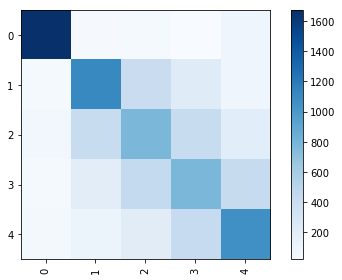

In [88]:
###################         Fig. 1              #######################
###  Overall Confusion Matrix for our model  ####
print("The Confusion matrix (true order vs predicted order) is as follows:")
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    
    # CREATE THE CONFUSION MATRIX
    cm_dev = create_confusion_matrix(dev_predicted, dev_orders)
    util.plot_confusion_matrix_dict(cm_dev,90, outside_label="None")
########################################################################  

In [89]:
#Setup Cell aggregating the errors our model did
Number_of_missclassified_exaples_to_display = 5

with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
    
    #GET THE ERROR EXAMPLES
    errors  = getErrors(data_dev,dev_orders,dev_predicted)

In [90]:
### Setup cells for Figures 2-5
# Get the number of OOV and PAD tokens in each missclassified phrase and display them as histograms
stats = getPADandOOVHistogramsOnErrors(errors,dev_stories)
## Get the histogram of number of OOV and PAD tokens in each phrase for the full dev set
full_devset_stats = getFullPadandOOVHistorgrams(dev_stories)

The histogram of the number of OOV tokens in missclassified phrases:


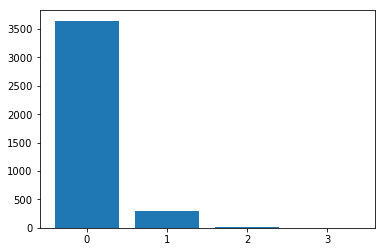

In [91]:
###################         Fig. 2              #######################
print("The histogram of the number of OOV tokens in missclassified phrases:")
plot_histogram(stats,'OOV_hist')
########################################################################

The histogram of the number of OOV tokens in all phrases:


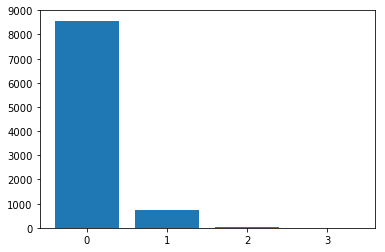

In [92]:
###################         Fig. 3              #######################
print("The histogram of the number of OOV tokens in all phrases:")
plot_histogram(full_devset_stats,'OOV_hist')
#######################################################################


The histogram of the number of padding tokens in missclassified phrases:


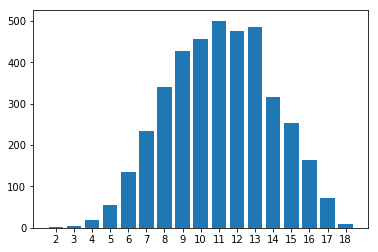

In [93]:
###################         Fig. 4              #######################
print("The histogram of the number of padding tokens in missclassified phrases:")
plot_histogram(stats,'PAD_hist')
#######################################################################

The histogram of the number of padding tokens in all phrases:


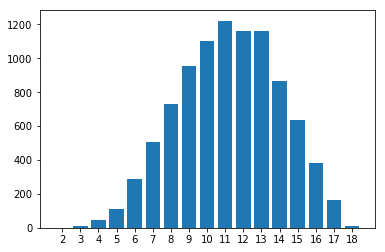

In [94]:
###################         Fig. 5              #######################
print("The histogram of the number of padding tokens in all phrases:")
plot_histogram(full_devset_stats,'PAD_hist')
#######################################################################

Frequency of words in the missclassified phrases


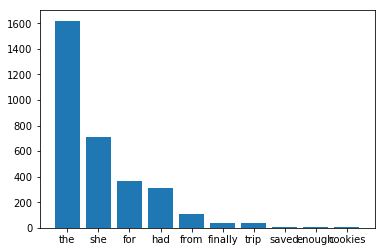

In [95]:
###################         Fig. 6              #######################
#Get the frequency of the words in the missclassified phrases and plot it
word_freq = getErrorWordFrequency(errors,dev_stories,vocab)
print("Frequency of words in the missclassified phrases")
plot_word_histogram(word_freq,10,['<PAD>','.'])
########################################################################

frequency of words in all phrases


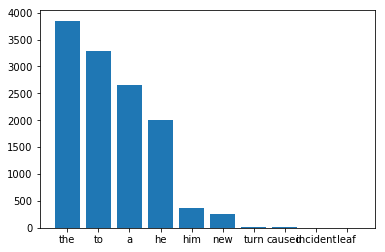

In [96]:
###################         Fig. 7              #######################
#Get the full frequency of words in the dev set and plot it 
norma_freq=getWordFrequency(dev_stories,vocab)
print("frequency of words in all phrases")
plot_word_histogram(norma_freq,10,['<PAD>','.'])
#######################################################################

Ratio of word frequencies missclassified/total


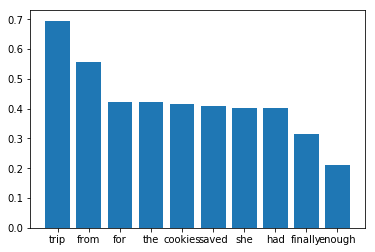

In [97]:
###################         Fig. 8              #######################
#Get the ratio of the number of times a word occurs in missclassified exampled
#vs the total number of times the word appears and plot it
freq_hist = freq_ratios(norma_freq,word_freq)
print("Ratio of word frequencies missclassified/total")
plot_word_histogram(freq_hist,10,['<PAD>','.'])
#######################################################################

In [98]:
# Setup cell for Figs. 9-13
#### GET THE CONFUSION MATRIX FOR EACH SENTENCE SEPARATELY ########
with tf.Session() as sess:
    # LOAD EARLY STOPPED MODEL
    saver = tf.train.Saver()
    saver.restore(sess, './model/model.checkpoint')

    # MAKE SURE IT GIVES THE SAME PREDICTIONS AS BEFORE
    dev_feed_dict = {story: dev_stories, order: dev_orders, dropout_prob: 0.0, phase: False}
    dev_predicted = sess.run(predict, feed_dict=dev_feed_dict)
   
    # CREATE THE CONFUSION MATRIX PER SENTENCE
    confusion_per_sentence = []
    for sentence in range(5):
        confusion_per_sentence.append(create_confusion_matrix_for_sentence(dev_predicted, dev_orders,sentence))

The Confusion matrix (true order vs predicted order) for sentence 0 is as follows:


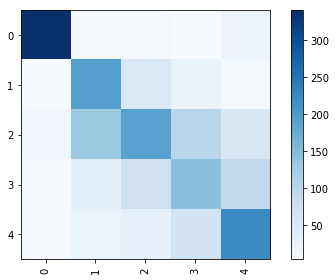

In [99]:
###################         Fig. 9              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 0 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[0],90, outside_label="None")
#######################################################################

The Confusion matrix (true order vs predicted order) for sentence 1 is as follows:


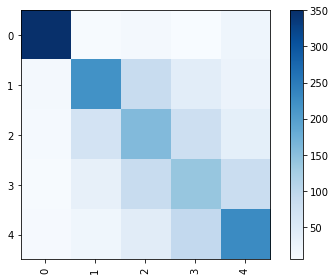

In [100]:
###################         Fig. 10              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 1 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[1],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 2 is as follows:


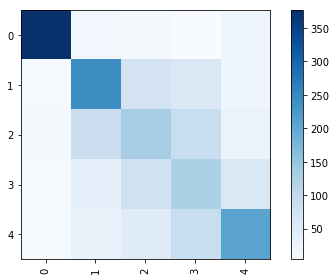

In [101]:
###################         Fig. 11              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 2 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[2],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 3 is as follows:


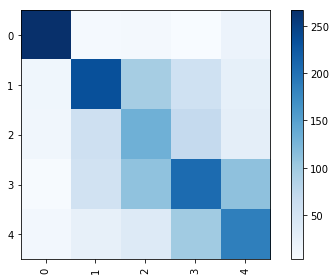

In [102]:
###################         Fig. 12              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 3 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[3],90, outside_label="None")
########################################################################

The Confusion matrix (true order vs predicted order) for sentence 4 is as follows:


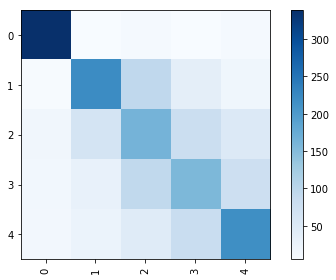

In [103]:
###################         Fig. 13              #######################
print("The Confusion matrix (true order vs predicted order) for sentence 4 is as follows:")
util.plot_confusion_matrix_dict(confusion_per_sentence[4],90, outside_label="None")
########################################################################

## <font color='red'>Assessment 2</font>: Assess Description (60 pts) 

We will mark the description along the following dimensions: 

* Clarity (10pts: very clear, 0pts: we can't figure out what you did, or you did nothing)
* Creativity (25pts: we could not have come up with this, 0pts: Use only the provided model)
* Substance (25pts: implemented complex state-of-the-art classifier, compared it to a simpler model, 0pts: Only use what is already there)

## <font color='orange'>Mark</font>:  Your solution to Task 2 is marked with ** __ points**.
---

## <font color='orange'>Final mark</font>: Your solution to Assignment 3 is marked with ** __points**. 